# 读取全球站点观测日值观测数据

#### —— nmc_met_io程序库使用说明

国家气象中心天气预报技术研发室    
June, 2020    
Kan Dai 

[GHCH (Global Historical Climate Network)-Daily](https://www.ncdc.noaa.gov/ghcn-daily-description)是由美国NOAA的环境信息中心提供的  
一套完整的全球地面气象站观测日值资料. GHCN-Daily由不同数据来源的站点观测整合形成，并经过一系列的质量控制。  

### GHCN-Daily数据特征
* 包含了来自180个国家或地区的10万多个站点观测;
* 提供不同的日值数据，如最高/低温度，日降水量，降雪及雪深（注意约有一半的站点不提供降雪观测）;
* 数据的时长从小于1年到超过175年不等;
* 数据已经经过一系列的质量控制，此外在每个周末，还有25个额外的数据源加入进来;
* GHCN-Daily数据每升级一次，就会拥有不同的版本号;
* 通常实时更新的数据, 会在当月结束后的45-60天，替换为质量更好的归档数据；
* 数据升级或处理系统的变化会在https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/status.txt中找到;
* 数据源可以概况为4类:
  * the U.S. Collection
  * the International Collection
  * Government Exchange Data
  * the Global Summary of the Day

### retrieve_ghcn模块主要功能:
* get_ghcnd_stn_metadata 函数从[网站](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt)上下载站点信息，默认下载后会缓存该文件.
* get_ghcnd_data 函数, 给定站点的站号, 然后下载改站点的观测信息, 目前支持多个站点的查询.
* nearest_stn, 是一个辅助函数, 用于给出离指定经纬度点最近的n个站点信息.

### 参考网站
* https://www.ncdc.noaa.gov/ghcn-daily-description
* https://nbviewer.jupyter.org/github/scott-hosking/get-station-data/blob/master/Examples/ghcn_daily_data.ipynb
---

## Prepare

In [2]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as plot
from ipyleaflet import Map, Marker, MarkerCluster
from nmc_met_io.retrieve_ghcn import get_ghcnd_stn_metadata, get_ghcnd_data, nearest_stn

import warnings
warnings.filterwarnings('ignore')

## 读取站点信息

如果没有缓存站点信息文件, 则会下载该文件, 需要等待一段时间.

In [4]:
stn_md = get_ghcnd_stn_metadata()

In [5]:
stn_md

,station,lat,lon,elev,name
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL
...,...,...,...,...,...
115077,ZI000067969,-21.0500,29.3670,861.0,WEST NICHOLSON
115078,ZI000067975,-20.0670,30.8670,1095.0,MASVINGO
115079,ZI000067977,-21.0170,31.5830,430.0,BUFFALO RANGE
115080,ZI000067983,-20.2000,32.6160,1132.0,CHIPINGE


In [6]:
# 获得所有中国区域的站点观测
stn_md_china = stn_md[stn_md.station.str.startswith("CHM")]

In [7]:
# 显示中国区域的站点信息
longitudes = stn_md_china['lon'].values.tolist()
latitudes = stn_md_china['lat'].values.tolist()
stations = stn_md_china['station'].values.tolist()

markers = []
for lon,lat,id in zip(longitudes, latitudes,stations):
    markers.append(Marker(location=(lat, lon), title=id, draggable=False))
marker_cluster = MarkerCluster(markers=markers)
    
m = Map(center=(30, 110), zoom=4)
m.add_layer(marker_cluster)
m

Map(center=[30, 110], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

# 读取观测数据

In [7]:
my_stns =  pd.DataFrame({"station": ["CHM00054511", "CHM00054527", "CHM00054616"]})
obs_data = get_ghcnd_data(my_stns)

In [8]:
obs_data = obs_data.drop(columns=['mflag', 'qflag', 'sflag'])
obs_data.info

<bound method DataFrame.info of            station  year  month  day element  value       date      lon  \
0      CHM00054511  1945     10    1    TAVG    NaN 1945-10-01  116.283   
1      CHM00054511  1945     10    2    TAVG    NaN 1945-10-02  116.283   
2      CHM00054511  1945     10    3    TAVG    NaN 1945-10-03  116.283   
3      CHM00054511  1945     10    4    TAVG    NaN 1945-10-04  116.283   
4      CHM00054511  1945     10    5    TAVG    NaN 1945-10-05  116.283   
...            ...   ...    ...  ...     ...    ...        ...      ...   
58554  CHM00054616  1995     12   27    TAVG  -10.0 1995-12-27  116.833   
58555  CHM00054616  1995     12   28    TAVG  -28.0 1995-12-28  116.833   
58556  CHM00054616  1995     12   29    TAVG   -9.0 1995-12-29  116.833   
58557  CHM00054616  1995     12   30    TAVG   26.0 1995-12-30  116.833   
58558  CHM00054616  1995     12   31    TAVG   31.0 1995-12-31  116.833   

          lat  elev      name  
0      39.933  55.0   BEIJING  
1  

In [9]:
# 提取北京站观测数据
obs_data_bj = obs_data[obs_data['station'] == "CHM00054511"]
obs_data_bj = obs_data_bj.pivot(index='date', columns='element', values='value')
obs_data_bj

element,PRCP,SNWD,TAVG,TMAX,TMIN
date,,,,,
1945-10-01,NaN,NaN,NaN,NaN,NaN
1945-10-02,NaN,NaN,NaN,NaN,NaN
1945-10-03,NaN,NaN,NaN,NaN,NaN
1945-10-04,NaN,NaN,NaN,NaN,NaN
1945-10-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-03-27,NaN,NaN,NaN,NaN,NaN
2020-03-28,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN


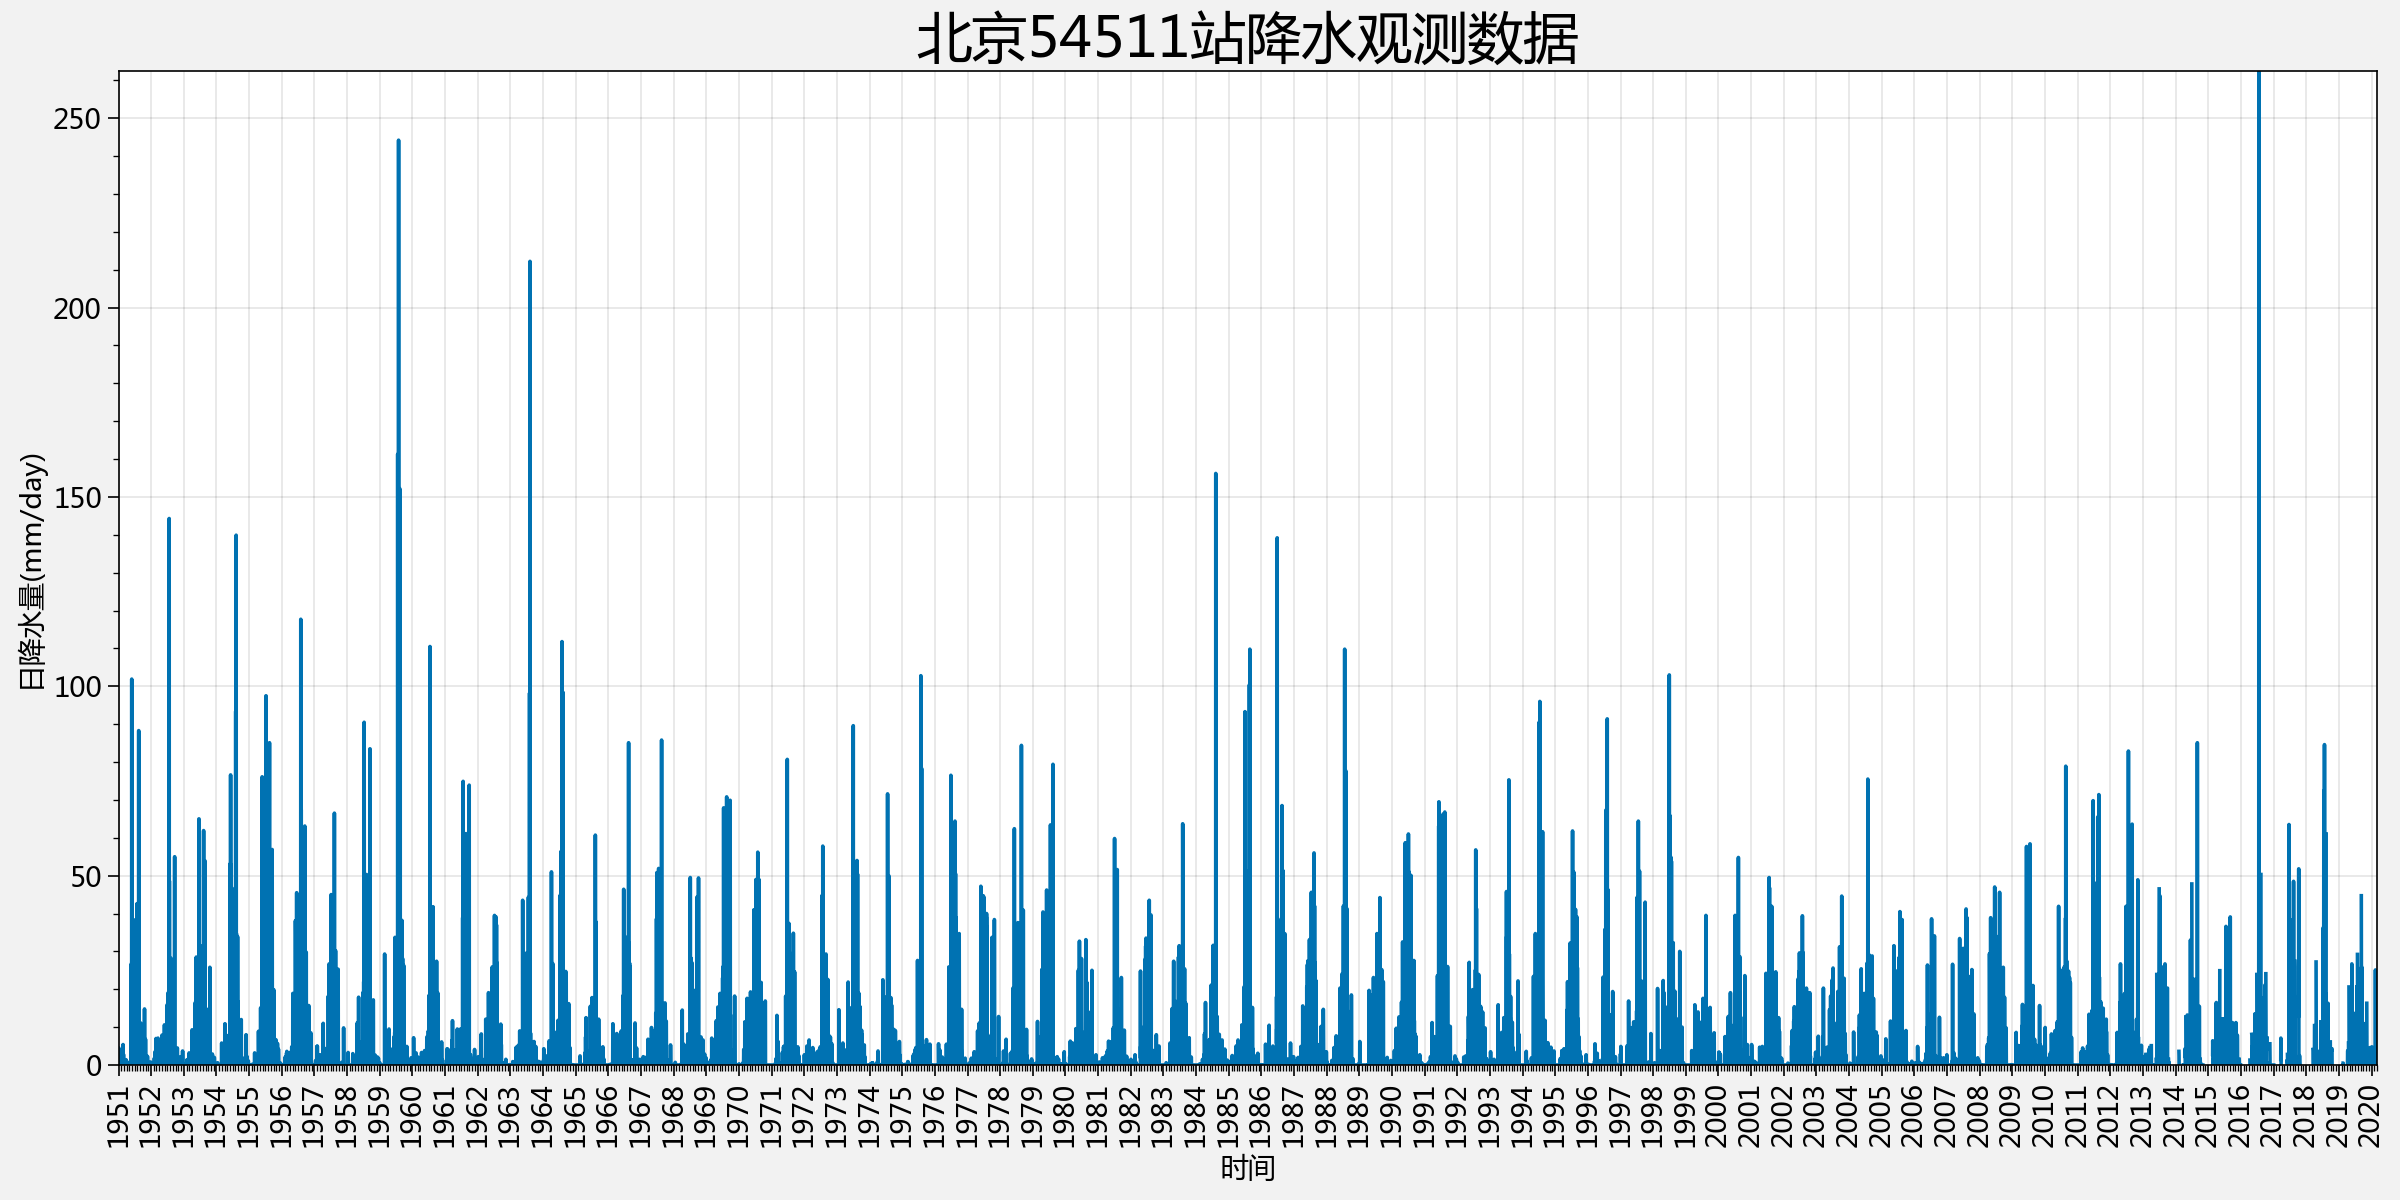

In [10]:
f, axs = plot.subplots(ncols=1, figsize=(12, 6))
axs[0].plot(obs_data_bj['PRCP'])
axs.format(title="北京54511站降水观测数据", xlabel='时间', ylabel='日降水量(mm/day)',
           fontname='Microsoft YaHei', large=20, small=10,
           xlocator='year', xminorlocator='month', xformatter='%Y')

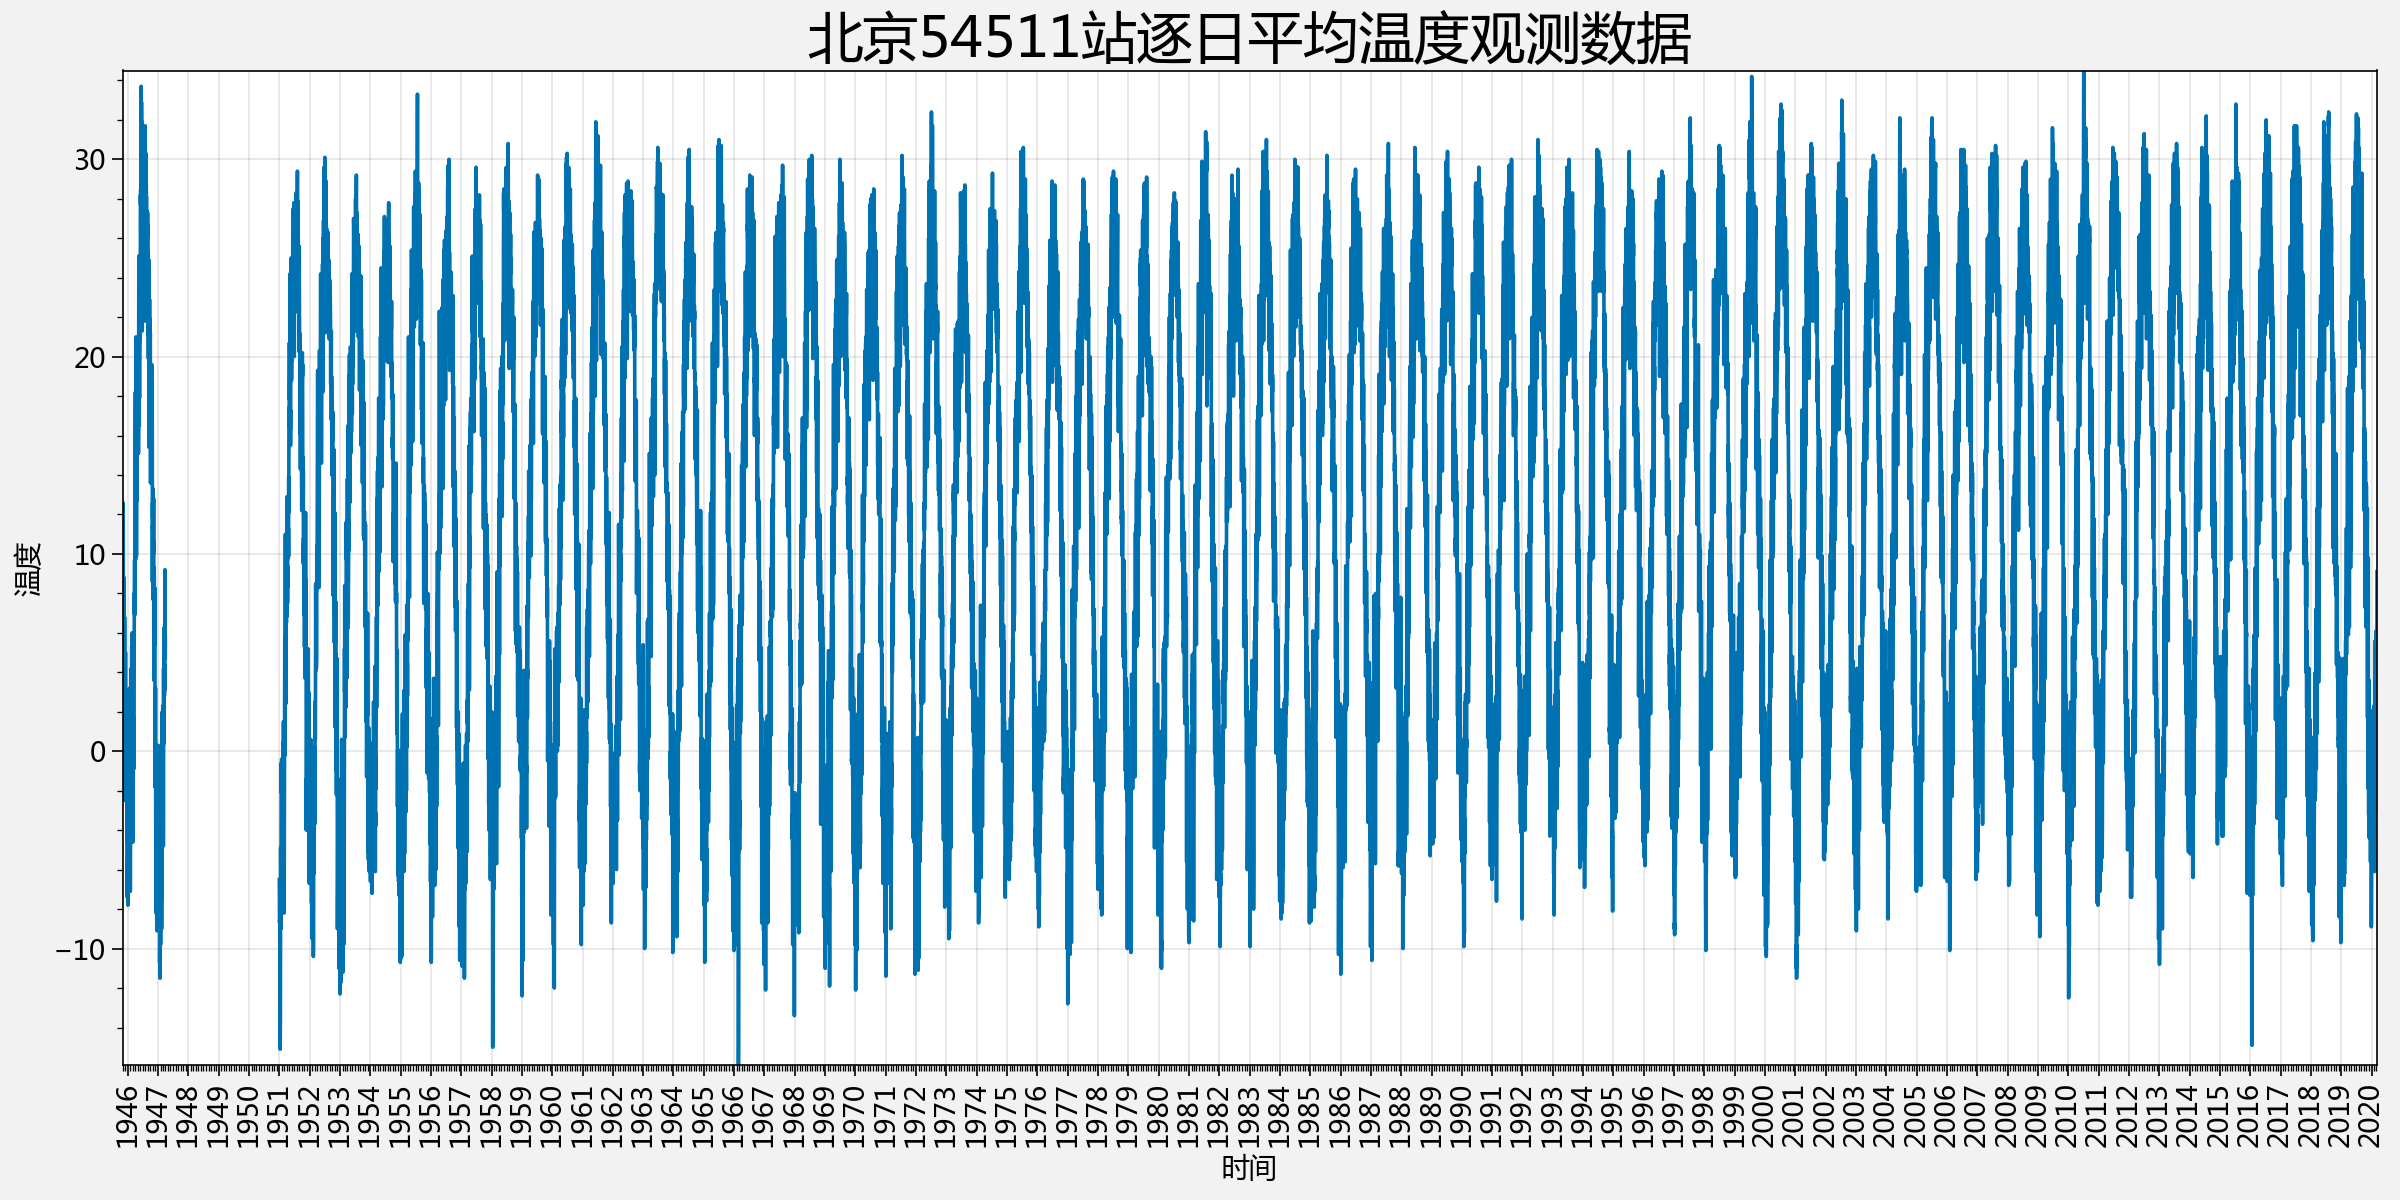

In [11]:
f, axs = plot.subplots(ncols=1, figsize=(12, 6))
axs[0].plot(obs_data_bj['TAVG']/10.)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACWAAAASwCAYAAAB/pHGBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAewgAAHsIBbtB1PgAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8GearUAAAgAElEQVR4nOzdd1QU2fo14E0SUETMGRPmNJhRUEygmBATZkW5YsYxYUYxoSIyBoyYMCBmTGBGR8w6YsDBLKijg4qiZPr7w4/+UVQD3U1DA7OftWYtz+mqcw7Bhntr+74a3759k4CIiIiIiIiIiIiIiIiIiIiIiIgUpqnuAxAREREREREREREREREREREREeVXDGAREREREREREREREREREREREREpiQEsIiIiIiIiIiIiIiIiIiIiIiIiJTGARUREREREREREREREREREREREpCQGsIiIiIiIiIiIiIiIiIiIiIiIiJTEABYREREREREREREREREREREREZGSGMAiIiIiIiIiIiIiIiIiIiIiIiJSEgNYRERERERERERERERERERERERESmIAi4iIiIiIiIiIiIhyhUQiUfcRiIiIiIiIiFSOASwiIiIiIqIC4uLFizh27Ji6j0GU5924cQNLly7N0T2ioqLw+PFj6X/h4eE5uh/Rf8nZs2cRGxur7mOQgkJDQzFixAiMGDFC3UchkltKSgqSk5PVfQwiIiIiIsoHtNV9ACIiIiIiIlX6/Pkzvnz5Ih3r6OjA2NhYrnv/+ecf/P3334I5c3NzaGhoqPSMqnb27Fm4u7vj5s2bMDQ0RIsWLVC+fHl1H4soT0lMTMThw4exYcMG3Lt3DwDQsmVLdOzYMUf227lzJ1xdXaVjY2NjPHz4MEf2IsrL/vnnH8Hfs5IlS+Ly5ctKr/fXX3+hT58+0NfXh6WlJbp27YoePXqgZMmSqjhulkJDQxESEoL//e9/ubJfQRAaGgo3NzecOXNGOjds2LAce/+lvO/Ro0e4ffu2dNy4cWP89ttv2V7XxcUFiYmJ0vGyZctQqFChbK15+/Zt2NjYoHr16qhZsyZMTEwwadKkHHvPcXd3h7e3t3Q8bdo0TJgwIUf2IiIiIiIi1WIAi4iIiIiICpR169Zh1apV0rEioYdz585h7NixgrnPnz9DWzvv/k+n7du3Y/LkydLxt2/fMH36dPj6+qrxVER5T1JSEubMmYOPHz9K5xYuXIgOHTrk+ZBlZhITE7F8+XLUqFEDgwYNUvdxiESSkpLw5s0b6TguLi5b66VWeoyNjcXp06dx+vRp1K1bN1cCWM+fP0fv3r3x8eNH3L9/H56entDV1c3xffO7Hz9+CMJXADB9+nRcv3492+EY+j8vXrxAtWrV8sXPtPPnz2Pu3LnSsYuLi0oCWNu2bUN8fLx0vHDhwgy/x1JSUhAXF4fChQtnuubDhw+RkJCAsLAwhIWFoVChQnBxccn2WTPy8+dPfP78WTAmIiIiIqL8Ie8+RSAiIiIiIqIsDRo0CF5eXnjx4oV07vjx4zh16hRsbGzUeDLKzxISEtT6UFwikSApKQk6OjoqW1NfXx/Ozs6YPXu2dO7+/fsICAhAz549VbZPbnrw4AGcnJzw8OFD6OnpoXbt2mjatKm6j0VZWL16taA6Wn4zd+5czJgxQ237Hz9+XDCuUaMGWrZsmeP7vn//Hra2ttIQp6+vL8LDw7Fv3z6UKlUqy/uPHDmCAwcO5PQxRebNm4d69erl+r5ptWrVCnZ2djh8+LB07tmzZ9i8eXO+reyzefNmXLlyJcf3KVWqFDw9PbO8Ljg4GPb29rC2tsbGjRsLXDAwNjYWCxYsgImJicqqzy1fvhz79+/H+vXrYWFhkeF1oaGhgnGTJk2gr6+vkjMQEREREVHBwgAWERERERFRPqarqwtPT0/06tVLMD9t2jS0bdsWBgYGajoZ5ScSiQT37t1DYGAgAgMDUa9ePWzYsCFXzxATE4NLly5Jz7Bt27ZMH4gqY9SoUfDy8sI///wjnVu6dCl69OiRLyqGpBUWFob27dtLWy3FxcVh2LBhCA4OzrQSUIcOHQRtn9TJ3Nwcp06dkuvaPXv2iCoU5hWbN2+Gvb29uo/xn/DkyRNRq+Dcqvx28+ZNRERECOZu3LiB9u3b48CBA6hbt26m94eHh+PkyZM5eUSZxo0bl+t7yrJo0SKcOnVKUAFt1apVGDp0KIoVK6bGkynn7t270mpsOUmeNtpnz57FkCFDEBsbi0OHDiEyMhL79+9HiRIlRNcmJydjx44dKj1jmzZtUKdOHZWumdatW7cwZswYPHv2DNra2qhfvz7atGmTrTWvXLmCFStWICUlBd27d4eDgwPc3Nxk/t6c2rY4VXb3VqW4uDiUKVNGbfvr6uri06dPatufiIiIiCivYQCLiIiIiIgon2vfvr2oskRERATc3Nzg7u6utnM1aNBA0HYqu1q1aoWgoCCVrSeLs7MzfHx8RPOKtLJMy8nJCXv37lXF0aRU1Rbz+/fvuHjxIgIDAxEUFCQIJeXkg9S0Xrx4IQ1cXb16FQkJCTm6n76+PqZMmSJoHfT48WMcO3YMtra2Obq3qtWpUwf9+/fHnj17pHNv376Fo6MjDh06lO8CZUTySB940dDQyLXwW69evbB3716MGDECsbGx0vnXr1/DysoKvr6+aNeuXa6cJT8yNjbG+PHj4eHhIZ37/Pkz1qxZgwULFuTYvvHx8fjw4UO21ylWrBiMjIxUcCLVSk5Oxty5cwXfk9evX4e1tTUOHTokCnAlJiZiypQpKj2Dp6dnjv7esGDBAjx79gzAr5amw4YNw+XLl1GpUiWl1vv3338xevRopKSkAPgVQj916hRcXFxEAawfP37gwYMHgrnWrVsrtS8RERERERV8DGAREREREREVALIqS6RWZTE1NVXjyfKP8+fPywxfFSTPnj2TBq7+/PPPHA88pZeYmIiQkBAEBgbizJkzCA8Pz9X9AcDBwQGrV6+WthEDgJUrV6JXr175LrTk4eGBW7duCSoCnTt3Dh4eHpg2bZoaT0aUM44ePSoYt23bFpUrV861/bt27YpDhw5hwIAB+P79u3Q+OjoadnZ2WLt2ba5V5MpJISEhuHjxosrXlfUzx9vbW6XtZoFfVUBT2+jevXsX1tbW2V7TxcVF0MI2r9DS0sKRI0fQvXt3aUgJAJ4+fQorKyscPXo010LVaZmYmEh/zlaoUAFhYWFKr7Vp0ya0adMGX79+BQB8+vQJQ4YMQWBgoMKtFlNSUuDo6Ij3799L5woVKoRdu3ahbNmyoutv3ryJpKQk6VhbWxutWrVS8iMhIiIiIqKCjgEsIiIiIiKiAiB9ZQktLS0MGjRIrW1J8pPo6GhMmDBB3cdQuYSEBFy7dk1aZSrtw9nc8unTJwQFBSEoKAjnz5/Ht2/fcv0Maenp6cHBwQHLly+XzoWGhuLMmTPo2rWrGk+muMKFC2PLli3o1KmTtBUhACxZsgTm5uYyHxKXKFFCqfeFz58/Cx5CA4ChoSH09PQUP/j/V7x4caXvzc+GDh2KTp06qXzdvn37Cir9WFhYYNmyZSrfp1y5cipfUx63b9/G48ePBXMDBw7M9XOYm5vj2LFj6NOnD758+SKdT0xMhJOTE96/f4+pU6dmuc6UKVOwcOFClZ/PysoK169fz9YaISEhgvfInPTz50+V7zVp0iRpACu39OrVS9QOWhlhYWFYsWKFQvdUqFABp06dQrdu3QTB5nfv3sHa2hoHDx5E8+bNs302dalcuTLWr1+PwYMHS+fu3r2LmTNnYs2aNQqt5erqivPnzwvmVqxYgZYtW8q8/sqVK4KxmZkZihYtqtCeucnAwAD9+/fP0T18fX1zPcBPRERERJRfMIBFRERERESUC8LDwzF69Ogc3SNt+5kSJUrg4cOHOVqJo1y5cvDz88ux9XPT9OnTERkZqe5jqNT9+/fRrVs3QZWW3LZw4UKsXr0aEolEbWeQZfTo0fD09ER8fLx0zsPDI98FsADA1NQUc+bMgaurq3QuOTkZDg4OuHr1KkqUKCG4/uDBgwrvsXr1alFQpEGDBjh58qRaQ1QHDhzI9VDB9evXsx36KV26NEqXLq2iE/2f9IETQ0NDNGrUSOX7qMvOnTsF4yJFiqgk8KKMZs2a4cSJE+jZsyeioqIEry1cuBDv37/HihUroKmpqZbzUe6rW7cu+vbtm+11rly5onAAC/j1O9mpU6fQvXt3PH36VDr/5csX9OrVC/v27ZPZIrNEiRIKBwFPnTqF06dPK3zG7OjRowdGjRqFbdu2Sed8fHzQokULuX/X9ff3FwW2hg8fDgcHhwzvSd/6Oq//nlCiRAmFQ2mKOnToEANYREREREQZYACLiIiIiIgoF8TGxuLevXu5tt+nT5/w6dOnHN3D2NhY4XtmzJihdGCjQoUKSt2XlRMnTmD//v3SsaamJlJSUnJkL+BXlZqmTZsqfb+WlpZc133//l2t4SsAeP/+fZ4LXwFAmTJl0KdPH+zduxfAr0pMbdu2RWJiospbYeUGZ2dnnD59Gjdu3JDORUREYMKECdKPURmJiYmYPHkyfH19BfMmJiY4duyY2itYFStWDCVLlszVPQ0NDXN1P/olJiYGhw4dEszFxsbCxMRE5Xt5e3vD1tY2y+saNmyIU6dOoUePHoKWpgCwfft2DBkyBL/99pvKz0fqkR9a1JYtWxYnT56ElZUVXrx4IZ2PiYlB3759sXPnTnTo0EFwj4GBAYYPH67QPpGRkbkewAJ+VXe8fPmyoJqnt7c3BgwYkOXvRn/99Zeo0mnbtm2xevXqDO/58OEDQkNDBXOqaGdJREREREQFFwNYRERERERElGuGDh2KKlWqqPsYUlFRUZg8ebJgrm/fvjhw4ECO7dmxY0dBGx11KVu2LDp37oynT5/i1q1bub6/hoYGGjduDCsrK6WqfWTX2LFjce3aNYwbNw5Dhw5FkSJFcv0MqqKpqQlvb2+Ym5vj58+f0vkTJ05g27ZtGDVqlMJrfv78GUOGDMHVq1cF8/Xr18fhw4dzpILTf92PHz/yzPdhWFgYqlWrBl1dXXUfBcCviisxMTGCuZSUFPz48UPle8kbcgV+VT1Kbf32zz//APj193HTpk0FKnxVp06dHGmXmFP09fWlfzYzM1Oq9a2lpSXu3r0rHas7cCqvMmXK4Pjx47C2thZU9oyPj8e1a9dEAaz8pHDhwti8eTOsrKyQlJQEBwcHLF26VK6/s8bGxujYsSNOnDgBAKhduzZ8fX0zDV2fPHlSECI3MTFBzZo1s/+BEBERERFRgcUAFhERERERkYr9888/KFu2rLqPQXJwdnYWVAqrVKkS7O3tczSApS4aGhr47bffYG1tjS5dusDU1BQaGhpwcnLKtQCWgYEBLC0t0aVLF1hZWaFcuXIAoJYAVuPGjXH//v0C0yLMxMQECxYswMyZMwXzs2fPhrm5OWrXri33WkFBQXB2dkZERIRgvlWrVvDz81MqiPD06VOEh4eje/fuCt/7X3Dw4EFMnToV3t7esLGxUetZoqOjYWtri8KFC2Pt2rVo06aNWs8DADt27Mi1vdK3csxKrVq1pCGsDx8+wN3dXSWt6PISIyMjuVqvzZ07F4mJidLxtGnTlA5rnjlzRhqWAYAWLVpg2LBhSq2ljA8fPgjG2anCeejQIcF7c8uWLbFnzx6l18uKsbExjh49ii5dukhbZE6YMAGLFy9GXFxcju2bG5o1a4ZFixahRo0aCrUDLF68OPbu3Ys1a9Zg/fr18Pf3h5GRUab3+Pv7C8YSiQTOzs5KnTvV9OnTUbFiRdy4cQP79u2Tec3t27cF41OnTuHdu3ei6+zt7QtU0JOIiIiIqCBgAIuIiIiIiEhFJBIJtm7dCldXV7i6usLR0VH6WqNGjZSqwEA5x8/PD8eOHRPMzZ49O89UfFEFQ0NDtG/fHtbW1rCyskKZMmVy/QzVq1eHtbU1rK2tYW5urnC4QVFPnjzB0qVLc2RtLy8vlChRQql737x5o3T7ujJlyghaLmXEyckJx44dw7Vr16Rzenp6ePv2rVwBrM+fP8PFxUXQkjMtS0tLpcJXf/75JwYOHIjv37/jjz/+wNChQxVeo6CKjo7G1KlTpaHP0aNH4+zZs6hfv77azjR79mzpw34bGxuMHDkSixYtUlv7xTt37uDOnTu5tp+enp7C99SsWRMnT57E6dOnMWbMGLnuuXjxoqiqlyq8evVK5WvKa9OmTYiPj5eOR40apXQA68GDB9i1a5d0HBcXl2sBrJSUFGlFs1Tly5dXer24uDhBm8ovX74ovZa8ateujcOHD6NHjx4YMmRIjv1cVIf0rQQV4ezsjNGjR8PAwCDT6yIjIxESEiKYe/78OZ4/f6703gDg4OCAihUr4tmzZ/Dx8ZHrnrt37wqqsaUyNTVlAIuIiIiIKI9hAIuIiIiIiEgFwsPDMXHiRGnwYd68ebC0tGSrkjzq/fv3mD59umCuZcuWGDRoEP788081nUq1mjVrhpcvX2baXienubu7o1ixYrm657///isK1qnK8uXLc2RdVdHQ0MC6devQpk0bxMbGwsrKCuvWrZNWGsuIRCKBv78/Zs2aJagIl97y5ctRpUoVhVpoHjx4EGPHjpWGMiZMmIDo6OhsPUAvSPbu3SuouBcTEwN7e3tcunQJJUuWzPXznD9/Hrt375aOJRIJfHx8YGJiorav2Zo1awTj8uXL4+HDhyp7b0sfLFM2JFqzZk2Ffubfv38f9+/fV2ovylkfP35EcnKyYC47FbDUxdTUFJcvX0aNGjUUum/evHmCqnMeHh7o37+/ik+XtdDQUEGgWB7pv247duyQ672iZcuWgjCTr6+voP0gERERERGRPBjAIiIiIiIiyoakpCT88ccfWL58uaCty8+fP+Ho6Ihz585BW5v/0yuvGT9+PL5+/Sod6+vrw9vbu8C0owN+fUzqltvhK/rVinDx4sXQ0dHBiBEjMr02JSUFhw8fxsqVK/HkyRPR6xUqVICenh5evHghnZs8eTJq1aqF5s2bZ3kWLy8vzJ8/X/AQWyKRwNPTE3369MlWRZmCwsnJCefPn0dQUJB07vXr1xgyZAgCAgJy9efHly9fMHHiRNG8paUlxo0bl2vnSOvZs2cICAgQzDk6OqosfJWQkCCay+kqfZT3RUZGCsaamppZBlnzKkXDV8Cv32Gjo6Ol47RtJXNTcHAwZs2ala01Zs+eLdd1rq6u0gBWcnJyrrY9VaUvX75g6tSpObpHbGxsjq5PRERERJSf8SkAERERERGRkh48eIDx48fjr7/+kvn6vXv3EBQUBBsbm1w+GWVm+/btOHfunGBuwYIFMDExUdOJiFQrbftTWZKTk+Hv749Vq1bh77//lnnNwIED4e7ujqioKLRv314aWExISMCIESNw5cqVDNsxJiUlYcaMGdi6davoNVNTU+zdu5fhq/9PQ0MDmzdvRtu2bfHmzRvp/J9//ol58+Zh2bJluXaWiRMnIiIiQjBXpkwZbN26Nctw6p49ezB27Fi59vn48WOG7Qx1dXUFVdi8vLyQkpIiHevr62PkyJFy7SMPWQGsjNrQfvz4EREREWjSpInK9qfcJZFIcOzYMbx58waTJk3K8Lr0LV/Lli0LLS2tnD4e5RGnTp0ShPC0tLQQHBwsVxvnmTNn4vDhw9Jx27ZtsW3bNuk4tbKhpaUl/Pz8ZK6xb98+HD16VDoeMGAA7OzsRNc1bNhQNPf9+3ds2bIly3MSEREREVHOYACLiIiIiIjynKSkJHUfIVOfPn3C0qVLsXPnzgzP2rBhQ3h4eKBVq1a5fDrKzKtXrzBnzhzBnLm5udzBAcr7mjdvjtDQ0BxZOzsVUCpUqIDAwECl7lXVg/979+7Bz88PBw8exMePH2VeY2xsjJUrV6Jr164AACMjI+zatQt2dnbS97u3b99i2rRp8PHxEd3/8eNHjBgxAlevXhW9NnDgQHh5eUFPT08lH09BUaJECezcuRPW1taCQND69evRvHlzmQ/eVW3Lli04fvy4YE5TUxNbtmyRK3SQEz58+ID9+/cL5gYPHqzS1ozyBrBiY2MxYMAAPHjwAPPmzcPkyZOhoaGRrb2nTJmChQsXZmsNWaysrHD9+nWVrxsTE6NwG75mzZqpbP8DBw4I2nVmZNq0aZg/f75o/sSJE1i2bBlCQ0NRqFAh9O7dG5UrV5a5RvoAljJVpHKLRCLB06dPUadOHXUfpcBYvXq1YGxmZiYz7CRLTEyMYFylShWULVtWdF3FihVRsWJFmWuk//tbs2ZN6c/k9NJW3yUiIiIiIvVjAIuIiIiIiPKU58+fw9TUVN3HkCk2Nhbr1q3DmjVr8P37d5nXlChRAnPmzIGDg4PcoYnXr1/L/WAnt9nZ2eXbNizpSSQSjBs3TvBwrEiRIli/fn22H6RT3qGnp4cqVaqo+xgi2traajlXasu/ffv24enTpxlep6+vD2dnZzg7O4vaV+rr60NHR0cQOD148CD69esneCgcEhKC4cOH48OHD4L7tbW14ebmhvHjx6vooyp4mjZtCldXV1G7rAkTJqBevXo5Gq549OiRKJgKANOnT0f79u1zbN+srFu3DvHx8dKxtrY2Jk+erNI9ZLVWSx/ASklJgaOjI+7cuQMAmD9/Pi5duoStW7eiVKlSKj0P5QyJRILFixfj8ePHAH4F79zd3bFu3TqZ16cPYOXlcNPs2bOxdetWeHl5YdCgQeo+jkoNGjQInTt3zvK6xMRE/P777wgJCRG9FhwcjMKFC2e5Rurf5fPnz0v/rqdK27I6K+nDzfm1dSURERERESmHASwiIiIiIqIspKSkYN++fVi8eLGgJUlahQoVgqOjI2bMmIHixYvn8glJHuvXrxdV5XFzc0O1atXUdCKinKehoYHo6OgMw1fa2toYOHAgZs2ahUqVKolef/ToEfr164fY2FjRazNnzkSnTp2go6ODDRs2YO7cuaKqgCVLlsTOnTvRtm1b1XxABdj48eNx4cIFQYvUmJgYDBs2DJcvXxYF41Thy5cvGDx4sKiKSqdOnTBr1iy51zE0NETNmjVlvpaUlISXL19Kx1paWqhevbrMa1PDTxEREdi8ebPgtb59+6o8xChPBaydO3eKqoNduHABbdq0gY+PD9q0aaPSM5HqaWhoYNasWRg6dKh0bu/evZgyZYrM6lb5JYC1du1arF+/HgDg5OSEJ0+eYOHChVm2DM0vihcvnuXv1NHR0RgyZIjM8BUAmJiY4MOHD6hevbpcnxdZbV/fvn0r34EBUQBZ0apx2WVsbIyHDx/m6B6VK1dGdHR0ju5BRERERJRfMYBFRERERESUiYsXL8LV1TXDlmYaGhro3bs3FixYwCBPHvb333/Dzc1NMGdpaYlRo0ap6USUm+Lj4xEbGwsjI6Msr/3+/TtsbGzQsmVLmJmZwczMLNcfoKravHnzcOnSJdy7d086p62tjQEDBmDGjBkZvnfdvn0bffv2zbD6x6tXr+Dl5YWHDx/i8OHDotfNzc2xZcuWDNsskZCGhgY2bdoEMzMzQRWVsLAwzJgxA2vXrlXpfsnJyRg5ciRevHghmK9atSq2bt2qUIijR48e6NGjh8zXIiMjUbduXem4ZMmSogoz6bm5uQlCYZqampg2bZp0/OzZM2zcuBFLliyR2TJQXmkrbKUqVKiQYDxs2DC8ePECXl5egvn379+jR48eWLhwISZOnKj0GfKL1KB5Znx8fJCcnCwd9+/fH8WKFVNqv3v37uH27dvSsYmJiVwV2Zo3by5zvmfPnmjUqBEePHgA4FcwcOnSpdi2bZvgusTERISFhQnm0n7/5hVPnjzB3LlzBXNeXl54+vQptm3bhqJFi6rpZLnnzZs36N+/v7SymSxhYWGws7NDw4YNsXXrVpQvXz7Daw8dOoSbN2+K5qOjo/Hly5csw2BxcXH4559/BHPGxsZZfBTq5+7uDm9vb+l41apV6Nu3b4bXt2rVCj9+/AAA6Ojo5Pj5iIiIiIjyEwawiIiIiIiIMtGnT58MX7O0tISrqyuaNGmi8n3NzMyy9VBZWeHh4RlW+cqvkpOTMWbMGEEFH0NDQ7YeLOAiIyPh5+eHy5cvIyQkBE5OTli0aFGW9z1+/Bh//fUX/vrrL2kFHj8/P0GrPXUJCQmBtbW1XNeGhoZKqwVpa2tj3rx5sLOzQ/HixTF8+HA4OjqicuXKGd4fGBiIkSNHClp2AkDNmjURHh4uHcv6nGppaWHmzJmYMWNGganEkltKly6NjRs3ws7OTjC/c+dOtG/fXjSfHfPnz8eFCxcEc3p6eti9ezdKlCihsn0UFRoaCj8/P8Fc//79UatWLQC/goH9+vVDVFQUwsPDsXfvXhQpUkSpveRpQailpQU3Nzc0atQI48ePFwTDkpKSMGfOHNy8eRPe3t4wMDBQ6hz5QaFCheDh4ZHpNbt27RIEsGbMmCH9uilqxYoVggBWkyZNstw/MxoaGpg9ezbs7e2lc4cOHcLUqVNRr1496dzDhw9FwTxVB7BU8btH3bp14eHhgWnTpiElJUU6f+bMGXTq1AkHDx7M9D0+vwsKCoKjoyO+fPkinatduzaeP38uqMQ4cOBAfP36FVeuXEHr1q2xefNmmW0N4+Li4OrqmuF+b968yTKA9fr1a0gkEsGcrAprec3Pnz/x+fNn6VhWMDUtf3//nD4SEREREVG+xQAWERERERHlKTVq1MC3b9+Uvn/RokVYtWqVCk8k1qxZM8yfPx+WlpY5toePj49aqsZMnToVW7ZsybH1GzZsKP2zhoYGDA0NYWRkhBIlSqB+/fpo2bIlzM3NVfrAysPDQ1RtZenSpWp7MDl27FiMHTtWOi5cuDCKFy8OIyMj1KhRA61atUKrVq3QtGlTBsSyITIyUvAw9dKlS3Ldl77anYaGBlq0aKHCk6lHp06dsHPnTlhbW6Nw4cIZXieRSLBq1SosWbJE8FBfU1MTa9asgYWFBZo1ayYIWaRVuXJlbN26FWZmZir/GP4rOnXqBAcHB/j4+AjmJ0+ejObNm6vkvcvX11dmRa3169ejcePG2V4/O+bOnSv43tPW1oaLi+KCi1kAACAASURBVAuAX1UpBw4ciJ8/f0rHPXv2xMGDB5Vq/ysraKCnpyfz2n79+qFatWoYOHCgqMrNsWPH8PTpU+zduxcmJiZy7e3p6QlPT0+Fz0zKs7GxgampqbQaYEpKCpYsWYI9e/ZIr0lbKRD4FYosVapUtvZNH8rR0tLK1nqpRo8eDSMjI4wZM0YQJnzy5Ak6duwIf39/tf99VrXUr9mqVasEn9d69eohICAA9erVEwSw0gaLoqKi0LdvX0ydOhVz5swRfB2WLl2K169fZ7jvmzdvsvxcpq8mqKOjky8qYBERERERkerwnyESERERERHJqVGjRti/fz8uXLiQo+Gr/wqJRILo6Gi8fv0a9+7dg6+vLyZOnAhTU1P06tULZ8+ezfYeoaGhcHd3F8x16tQJw4YNy/baqvLz509ERkbi0aNHOH78OGbPno0OHTqgZcuW2LFjR5aVCEi2Jk2aCFow/fXXX4iKisryvkePHgnGdevWRcmSJVV+PnXo3bt3puGriIgI9OrVC25uboIAjI6ODnx8fDBixAjUqFEDtra2Mu/v2bMnrl69yvCVCixevBhVq1YVzEVHR2Ps2LGiMIeiAgMDMWnSJNH8tGnT0K9fv2ytnV2PHj0ShSWHDx+O6tWrA/hV4aZs2bKC12/dugUbGxtRKEoeCQkJgrG2tnamVduaNWuGCxcuCCompQoLC0P79u1x5coVhc9BuWfWrFmCcUBAgCB0df/+fcHrqgjgyvo+U5W+fftiz549ouDghw8f0LVrVwQGBqpsL3V78eIFunbtipUrVwreBxs1aoSTJ0+idOnSonuOHDki+AcNqSHjXr164dOnTwB+fc3XrVsnuC99Jbz0bSllefLkiWBcpUoVlX6tiYiIiIgo72MAi4iIiIiIKAv16tXDrl27cOXKFdjY2Kj7OP8JFy9eRJ8+fTBkyBBBexlFJCQkiKpCGBkZiR6y5VVhYWGYNGkS2rVrJ3qoR1nT1tZGq1atpGOJRILLly9neV/6Clht2rRR+dnymuTkZGzevBlmZmai8EvhwoWxb98+Qes7BwcH0Ro9e/aEr6+vUlWISMzAwAAbN24UhYGCg4Ph7e2t9Lq3b9/GiBEjBBViAKBHjx6YN2+e0uuqSv369fHnn3+iW7duAICiRYti9uzZ0tcrVKiAEydOSNtrpnr06BGsrKwyrWAjS/pgTEbVr9KqXLkygoKC0KFDB9FrRYsWzRctx/7LunTpgqZNmwrm3NzcpH++evWq4DVVBErTt7rU0dHJ9pppdenSBQcPHhS14oyJiYG9vT22b9+u0v1ym0QiwcaNG9G6dWuEhIQIXuvQoQNOnTqVYVC6SZMmCA4OFn0dg4ODYWFhgZs3b0JXVxf6+vrS13R0dATfEwBw8+bNLM+ZPsDdoEGDLO8hIiIiIqKChf8Eg4iIiIiIKBPbt2+HnZ0dW8GpyfHjx3Hv3j0cP35c4YfaS5cuxcOHDwVzy5cvR4UKFVR5xBz3+PFjWFpawsfHRxpKIPm0bdtWUEnt4sWLgiBReikpKXj8+LFgzsLCIsfOpygzMzNBO6VUP378ULot3blz5zBv3jzRg2MAqFOnDnbs2CGq9mNubo5y5crhw4cP0rnjx49j1KhR8PDwgJGRkVJnUVRMTAy+fv2aK3ul3TO3tG7dGo6Ojti0aZNgftWqVRg5cqQgMCCPlJQUjB8/Hj9+/BDMm5qaYvPmzXnm51yDBg2wb98+XL58GREREaKqNpUrV0ZAQABsbGwQEREhnX/58iW6du2KgIAAuX9exMXFCcbpq95kxNDQEAcPHsTEiROl7euMjIxw8OBBuX/G1KhRA3Xq1JHrWkVcu3ZN6eCyqgUEBKBcuXJK3fvgwQMVn+b/zJ49G3369JGOz507h5CQEFStWhXPnj0TXJs2yKus9JUs5Qn6Kapt27Y4evQo+vTpI2jlLZFIYGhoqPL9csuDBw8wffp0UfAKAEaNGoWVK1dmWWWqdOnSCAgIwJQpU7B7927p/Lt372BjY4PVq1dj69atsLe3h0QiwcSJE9GnTx/MmDFDeu3t27ezPGv63zkbNWqU5T1ERERERFSwMIBFRERERESUiV69euWZh9L5TYMGDVC7dm2UKlUKxYsXh4GBAYoUKQIdHR38/PkT3759Q2RkJO7fv48XL15k2Fbr7du36NOnD86fPy93K7ibN2/Cy8tLMGdjY4NBgwZl++NShLGxMSwtLVGqVCkYGRnByMgIRYoUQaFChZCYmIhv377h33//xYMHD/D48WNRNZZUsbGxcHBwQEBAgEraIf1XtG3bVjC+ePFipteHhYWJAjZ5rQKWrAfNWlpaCq0hkUhw5swZrFy5MsOHykOHDsXKlStltix0d3cXhK9S+fv7IyQkBBs3bhR97nNC2gBFQbVgwQKcPHlSGjSqX78+du3apXD4CgA0NTXh7++PAQMGSAN3VatWlVk5Jy9o165dhq9VrVpVGsJ6//69dD4iIkIawqpdu3aWeyhTASuVtrY2vL29UalSJXh5eWHfvn0yWxNmpGfPnli4cKHc18vLysoK169fV/m6ysiJj08VOnfujObNm+PWrVvSOTc3NwwdOlRwnb6+PkxNTbO9X/qgaLFixbK9piwtW7bE8ePHYWtrK93T09MzX75XRkVFwc3NDTt27BC0xAV+BSWXLl0KR0dHudcrVKgQ1q9fj1q1amH+/PnS3zkTEhKwY8cOBAYGYsqUKTh58iRcXFygp6eHsmXLSlubRkVF4dmzZzAxMZG5fnR0NJ4+fSqYU3UAKykpCZcvX8bRo0dRqVIlzJw5U/S5efPmTbYDd2PHjsXYsWMVvq9bt27Yt29ftvYmIiIiIsrvGMAiIiIiIiKiHLF//365r42MjMTu3buxadMmREVFiV5/8eIF/ve//+HQoUNZrhUbGwsnJyckJydL54oXLy4KZOWGtK2zshITE4ODBw/C29tbZsvB2NhYDBo0CPfu3UPRokVVecwCq3HjxjAyMpI+iH7z5g2eP3+eYXWc9GGkOnXqiKrv5GefPn3C/v37sXXrVrx8+VLmNYaGhli9ejX69+8v83UvLy8sXbo0wz0iIiLQs2dPTJgwAfPnz0ehQoVUcvb/KgMDA3h4eGDAgAEYNmwYVq5cqVT4KpWxsTGCgoLg4OCAO3fu4MiRI/n2e7xGjRoICAiAlZWVoDLchw8fYGNjg2PHjmXZAix9BSxlvl/nzJmDYcOGKV2FLj8oiEF0FxcXQTDp6tWr+Pjxo+CaZs2aqaRdYNqKVABytCJVkyZNEBAQgF69emHcuHEYOXJkju2Vk9atWwcfHx/RvImJCXbs2KF0uGny5MmoXLkyxowZg/j4eFSpUgV+fn7Q0dHB3LlzMXjwYGkQs379+tIAFgDcunUrwwDW7du3RWGoJk2aKHXG9EJDQzF+/HicOHFCWt1u2LBhAMTV1YiIiIiISL001X0AIiIiIiIioooVK8LFxQW3bt1C9+7dZV5z9uxZBAcHZ7nW/PnzRS2EPDw8ULZsWZWcNacYGBhgxIgRuHr1KmbOnCnzgffHjx/xxx9/qOF0+ZOmpiZat24tmMusClb6AFZeq36lrNu3b8PW1ha1atXCnDlzZIavNDQ0MGTIENy9ezfD8NWaNWswb968LPdLSUnBH3/8gU6dOiE8PDzb5/+v69q1K4KCgrBu3bpsha9SFS1aFH5+fjh//rzCrV3zmlq1asHf319UwevTp0/o1q2bqKVoeqpqDSdP+MrBwQHXr1+X/jd+/Hil9srK3r178eTJE+l/ylRNTP95yarFW36UWgUrrb///lsw7tixo0r2+vTpk2BcqlQplaybkcaNGyMkJETQQk8RaQPsgHLBxOxycXFBw4YNBXNDhgxBcHBwtitL2dnZ4eDBg6hUqRL8/f2lIVRtbW3UrFlTel3jxo0F9125ciXDNa9evSoYp1aAVYVjx45h9+7dgtaiqaG+jCqnEhERERGRehS8//VMRERERERE+VapUqWwe/duDB8+HMePHxe97u7unmlrs+DgYGzevFkw16tXL/Tt21flZ80pOjo6mDNnDoyMjDBr1izR6+vXr4ezs3OebBmWF1lYWODUqVPS8eXLlzF69GiZ16YPYFlYWIiumTx5Mu7fv5/lvmmrZgC/qvJk1lItvXLlysHPz0/u6zNTvXp1PHnyRPRQPVWLFi2wYsWKTKt1zJs3T+Eqcvfv34eFhQWWL1+OESNGKHQvCbVq1Uql62lqaqJatWoqXVNdmjdvjl27dsHe3h6JiYnSeTMzM1StWjXTe1UVwJJHqVKlcjx4k7pPdqX/vCgbwAkMDET16tWVunfDhg3w9PRU6l55pa+ClV63bt1Usk9kZKRgXL58eZWsm5ns7JH27xGgngCWrq4uNm3ahHbt2qFixYr4448/YGlpKfPaAQMGQEdHB7a2tnj58iUMDAyyXL9du3a4d+8edHV1M7ymbdu2gu/BkydPIikpSWYg8dy5c4KxIgFuiUSC+/fv49y5czh//jxu3ryZ5T3v3r0DIA5gGRoawszMTO69gV/Bw7TB7IYNG6JChQoKrQGoruIXEREREVF+xgAWERERERFRHjRs2LBMHwrllOfPn+f6nulpaWlh48aNuHHjhijEEhISgujoaBQrVkx03/fv3zFu3DhIJBLpXKlSpXL8AW5OGT9+PC5duoTAwEDBfExMDK5cuYIuXbqo6WT5S/rA3rVr12Re9+PHD1HrR1kPUMPDw3Hv3j2Fz5GQkKDQfcbGxgrvkZESJUrAy8tLVNmqcePGcHZ2hp2dXYYtxhISEjB58mTs2bNHMK+rq4saNWoIKgw1atQIb9++FVTp+PnzJyZNmoTz589j7dq1MDIyUtnHFRgYqPCD5uy6cuWKykIZpDqdO3fG+vXrMWbMGEgkEjg6OmLFihXQ0tLK9L70LQhzMoCVn6gqgFWyZEmlq0/mRsi4c+fOaNq0Ke7cuSN6zcTEBLVr11bJPhEREYJxpUqVVLJuTomNjRWM1dVKtkGDBvD390erVq1QuHBhmddcvnwZp0+fBgAcP34cenp6CAwMhKmpaZbrZ/V7dps2baCvry/9fHz58gWXL18WVUb7559/8ODBA8Gcubl5pmt//PgR58+fx/nz53HhwgX8+++/WZ4X+PW1sLCwgL29PQDxe1j9+vXh7+8v11qpFixYIPhdedy4cRg8eLBCaxARERER0S8MYBEREREREeVBt27dUvcR1MrAwABTp04Vtc9JSkrC5cuX0bNnT9E9s2bNwps3bwRznp6euVJxJKe4urqKAlgAcP78eQaw5FSvXj0YGBggJiYGwK9WUOHh4YI2Q8Cv6ldpK0TVqlUrz7etVESXLl3QunVrhISEwNraGhMmTMi0mhzw6wHxkCFDcP36dcF84cKFsXfvXly/fl0QwCpTpgx2796NQYMG4dGjR4J7jh07hvv378PHx0fU9uu/wsTEBB8/fsy1/U6ePAlDQ8McW9/Y2BgPHz7MsfUVZW9vj3///RdJSUlwdnaWeU1wcDDevHmDIUOGAMidClgbNmxQWTW77JgzZw6srKzkujZ9qEPeAM6rV68EIejshKhmzJihdAs9Rbi4uKBfv36i+YzaISvq+/fv0mpFqfJ69bnU9nap1BlM7NChQ6avL1y4UDD+7bff5ApfyUNPTw9mZma4cOGCdO7o0aOiANaxY8cE3/fa2tro1KlThutKJBI0aNBA9PcsI4ULF0anTp3Qo0cPdOnSRfCPEKKiogTXyvoHCkRERERElHsYwCIiIiIiIqI8qWfPnjIfvoaFhYkCWIGBgdi1a5dgrmLFioiIiMD69esV2vfFixeiuW/fvslcx9bWFhUrVlRofUXUr18f1atXF53p6dOnObZnQaOlpQVTU1NcuXJFOhcSEiIKYF29elUwziqclB+tXr0aOjo6oo9dltu3b2Po0KGi1lmGhobw8/NDmzZt8OHDB8FrERERqFatGs6ePQsnJydRG9HXr1+jS5cumDdvHiZPnpxh1S0iZU2YMEE0FxMTg/3792PLli148uQJLC0tpQGs9AEIRStPTp8+HdbW1mjfvn2G1bYiIyOVqpqnap8/f5b72rRV7ABAX19frvvyY2tca2trNGnSBHfv3hXMq6rSXVhYmGBcrFgxpdq75aavX78KxiVKlFDTSTJ34sQJUevgxYsXq3SPTp06CQJYJ06cwJo1awR/3w8fPiy4p3Xr1plWe9TQ0ED58uUFbf8y8/vvv2cYRkxfOYsBLCIiIiIi9WIAi4iIiIiIiPKkChUqoGLFiqIAiKw2LfPnzxfNRUZGYtasWSo5y9evX2Wu1ahRoxwNYAFA8+bNRQEseVvV0C/NmjUTBbCGDRsmuObPP/8UjNu3by/X2t7e3ipp1ZMbre3q1auX5TUpKSnw8PDAsmXLkJSUJHitUqVKOHjwoHSd8uXLC15PbRlqYGCA3bt3Y8WKFVi6dKmgMkhiYiLmz5+Pq1evYtOmTShZsmR2PywimcLDw7Flyxbs3btXUNHn9evX0j+nD2DJGzQCfn2/b9q0CZs2bUK5cuXQr18/jBgxQq6AY16XPqxV0P+eFi1aVDQXERGBli1bZnvt9BVNixQpgk2bNknH//vf/1QeRr158ybevHkDOzs7aGpqKnx/+nCtOiqJJiQkZPk73NmzZwXjEiVKwM/PT+GKcx4eHhm+ZmNjgzlz5kh/jkVFReH48ePo3bs3gF+tu0NCQkT3ZMXY2FgUwCpevDi6deuGjx8/IigoSK6zM4BFRERERJS3MIBFRERERESUBz158kThYM/OnTsxceJE6bhIkSJ4//69QmtMnToVW7ZsUeienFS6dGlRACt9uxUA+PHjR24dKdeVLl1aNCfrc0AZS9/y7tq1a4JxfHy8oIqGpqYmzM3Nc+Vsecnz588xfvx40ecH+NXWyc/PTxC6MjAwEFwTGxsr/bOGhgZmzpyJhg0bwtHREd+/fxdcGxQUBAsLC+zYsQMtWrRQ8UdC/1UpKSkIDAzEpk2bcPHiRUH4L9WbN2+QkJCAQoUK4efPn4LXFGm1dufOHemfP3z4gLVr16JkyZL4/ffflf8A8oj0oY60AZxNmzZh+vTpuX0kEQcHB6xZsybb6zx48ACXL18WzS9fvhy9e/dWKsCUVvoWru/evRN8/kaNGgVtbdX+X/RnzpzBqlWrsHz5cjg7O6Nv375yf28nJyeLAljqCOAlJCQo/Pvo58+flfodNrMAVvXq1dG6dWtBSHvNmjXSANa2bdsE7zNaWlro27dvlntWqlQJAGBkZIQePXrA1tYWlpaW0NHRwYIFC+QOYKUGn1OlD0YTEREREVHuYgCLiIiIiIiI8ixZLZ0KFy6shpOoj6wHs4pUaSFxAOvly5f48OEDypUrB+BXu720lXB+++03FC9ePFfPqE4JCQnw9PSEh4eHqCIQAAwePBienp6iB/jpq8bExcVBIpEIqrnY2NggKCgI/fv3x9u3bwXXR0REoGvXrvD19UXXrl1V+BHlTQEBAUhMTMyx9fv27SsITlhYWGDZsmU5tl+hQoVybG1Fff78Gbt378a2bdvw6tWrTK8tU6YMvn79ijJlyoi+3xX5+ZI2gJWqdevWWd7n6OgoM/Axc+ZMeHt7S8eLFy/GpEmTRNcNHDgQJ0+elI537doFW1tb0XVWVlai8I+80gewCnIFrLVr18qcf/r0Kfz9/TFgwACl105MTMSlS5eUvl9ZqVW3/v77b4wbNw7Lli3Dw4cP5aq09fr1ayQkJEjHpUuXViiYWBANGTJEEMC6d+8eLl++jCZNmsDX11dwbadOnVCmTJks1+zduzd69eqFjh07QkdHR+mzPX/+XDBODXYREREREZF6MIBFRERERESkYmfPnoW5ubncIRlDQ0NB5SpAXFkmtzg5OaF79+7ScdmyZdVyjlSfPn0SzcmqCFWQffz4UTT3X/scZFfZsmVRuXJlQQAoJCREWsFC2faDBcHx48fh6uqKZ8+eiV7T19fH8uXLMXLkSJn3pqSkyJxLH5ysX78+Lly4gAEDBuDu3buC14yNjeUKrRQEdevWzdH10weiDA0N0ahRoxzdU9UkEgm+fv0qdwDy1q1b8PHxweHDhwUV2GRp1aoV/ve//6FXr17SwEP6e5StgJV6b5MmTeS+P6+KjY0VVdUpqD9z3r9/j8OHD2f4+vLly9G3b1+ZYXB5BAcH4+vXr9KxhoaGzKpsqpSSkiJ6n61du7bcbQ7DwsIE44LQUjO7bG1tMWPGDEElR09PT7Rp00bw9QV+hbXkYWVlpZKzpf/ZbWxsDADYsGGDKJyVkfRtMv38/ETfQxlp2rQpBg0aJNe1RERERET/BQxgERERERERqZijoyOSk5PRu3dvDB48GC1btsz0+uLFi2PJkiW5dLrM1axZM888bPv8+TMiIiJE87JCYQ8fPlTZvleuXEG3bt0Ec8bGxirdQxGhoaGiudTKTSS/Zs2aCQJY165dkwawgoODBddaWlrm5tHU4tKlS1i4cKHMKj4AYGpqii1btqBWrVoZrvHt2zfB2MDAIMOgQtmyZXH69GmMGTMGR48eBfCr2pCvry+KFSum5EdBBcXXr1+xZ88ebN26FSNGjMDkyZMzvPb79+84cOAAfHx8ZL4/pqWnp4d+/fphzJgxMsNo6VsQKlJd8N69e4Jxs2bN8lRVMGW9fPlSFBKqVq2a9M/16tWDg4OD4PWAgABBYLp06dLo0aOHSs4TGRmJwMBA0bwqWq1t2LAh06p0z58/x/79+zF48GDRayYmJmjVqpV0XLlyZdE1u3btEozbtGmDkJAQJCcnZ7inhYWF6L1VEU+ePBG1fFUkVJy2HS+gvgCWgYGBzM/DvXv30KFDB8Hn8MiRI+jYsaNc6/r4+MDZ2Vk6lqfdcJEiRdC/f39s27ZNOnfhwgXcvHlTcF2VKlUE/4ghN6QPWaUGsE6cOIGrV68qtealS5fkrtwWHR3NABYRERERURoMYBEREREREalQSkoKvn79ipSUFOzYsQM7duxA37594ePjo/R6mpqaKj5l/nD27FmZFXb+K9VygF8PnmUFDMzMzNRwmvytefPmOHLkCPT19dGqVSs0bdoUwK8Axo0bN6TX6enpZRmazK+SkpJw5MgRrFu3ThQeSaWrq4vff/8d06ZNy7ItUvpKKVkFqfT19bFz504sXLgQq1evxpo1a1C/fn3FPggqUO7du4ft27fD398fP378AADExMTIvPavv/7C9u3bceDAgQyvSVWpUiWMGjUKI0aMyLR9nrIBrL///htfvnwRzBWU9+WXL18KxhoaGoIAloWFBSwsLATX9OnTBz179pSGYj59+oSKFSti+vTp2TpLWFiYNCib1sCBA7O99tu3b7Fp0ybBXL169RAbGyv4HLi7u6N///6i98Np06Zh2rRpma4fEBAgmOvXrx9CQkKyde6spA8FAYoFsK5cuSIYN27cONtnUpXExERMmDBBEL6yt7eXO3wVExMjasuavgJtRqZMmYJdu3YJAnvp34ecnJyUrpamjLdv3wreh4oVK4aKFSvm2v5ERERERCT23/x/8YmIiIiIqECRSCS4ePEihg8fDi8vL7We5fPnz6LQkK6urlJrPXnyBGZmZqIHeKry/ft3ODk5ITw8PEfWz46UlBSsWbNGNF+uXDk0bNhQDSdSDw8PD5nznTt3zuWT5H89evTA0aNH8fr1axw7dgz29vYAfj1sjo+Pl15nZmamUBuy/ODZs2dYtGgRGjZsiFGjRmUYvrKwsMC1a9cwa9asLMNXAEQVMmrXrp3lPRoaGnB1dcX58+elXwP6b0lKSsLOnTvRrl07tGvXDjt27JCGrwBhZbWfP3/C19cX7du3h4WFBXx8fDINX5mZmWHnzp0IDQ3F1KlTMw1fAeIWhPIGsK5duyaaKyjh4EePHgnGFSpUyPLzYmFhgQULFgjm3NzcsHz5cqXPcfXqVVhZWSEyMlIwP3DgQHh7e2c7nL5gwQLExcUJ5lxcXATVkQDg1atX2LNnj8Lru7m5ISkpSTrW1dVFr169lDprdHS03Nemr3pUunRpQdBVQ0MDFSpUkP6XtqpoVFSUqAJWmzZtRHsYGhoK1ihSpIjc58uO1atXC0LppUqVEgWqMuPm5iZor1m3bl106dJFrnuNjY0zbS9YunRpDB8+XO6zqEL61oEMNBMRERERqR8rYBERERERUb718eNH7NmzBzt27BBVbFCXjx8/iuYqVaqk8Dp79+7F77//jp8/f8LBwQGHDx8WVZzIrkmTJuHQoUM4dOgQZsyYAWdnZ7lCF7nBy8tL9BAYAOzs7NRwGvW4fv06duzYIZpv1KhRnmkTmZ9UqVIFVapUEc1fvHhRMC5o7QePHj2KYcOGZXpNtWrV4OrqKrPSTEZev36NU6dOCeaaNGki9/3NmzeX+1oqWD5//pxp1ZkvX75AIpHAxcUF+/btw9evXzNdT1dXF3369MHYsWMVrtaTNvgF/GqLKY/0VYy0tLTQokULhfbOq+7evSsYy/vzxtnZGX///Td8fX2lc0uXLsXr16/h5eUld3tGiUSCP/74A66urqJWfWPHjsWyZcuyHb66efMmDh06JJirX78+evXqhcTERCxfvhzv37+XvrZy5UoMGjRI7o8hJCQEfn5+grkhQ4agRIkSSp33t99+Q6dOnTBixAiZgai00gew2rVrBw0NDelYV1dXVL0w1aFDhwSfcwMDA5ltaCdMmIAJEyYo8iFkW1hYGFauXCmYW7JkSZYhy1SXLl3Cxo0bBXPu7u6Cz01Wpk+fjj179iAhIUH02syZM2FgYCD3WqqQvtpZgwYNMrz29u3bmbYUltfFixeVDhISEREREf0XsAIWERERERHlK8nJyThz5gwGDx6MOnXqYMGCBXkmfAVA8C/rU8kKfWQkLi4OEydOhJOTk7Q1ugrjbAAAIABJREFUUnx8PAYOHIgHDx6o7Jxbt26VPnyMj4+Hm5sbLCwsZLauUdSrV69w4MABpe/fu3cvXF1dRfMGBgaYOnVqNk6Wu9atWyeqriKv0NBQ2NvbC6pnpJo3b152j0ZpXLhwQTBu166d9M/fvn3DlStX8McffyA4ODi3j6YSPXr0gKmpqczXypYti+XLl+PWrVsKha++ffsGBwcHUfWYbt26ZeusVPB8+PABO3fulOtaTU1NdO7cGYMGDYKGhgbCwsIyDV+VLVsWs2fPxuPHj7Fx40alWqWlr6YlbyWf9AGsRo0aoWjRogrvnxelD2CltmuVx9q1a0XvJXv27EHPnj0FgaaMfPz4Efb29pg3b54gCKSlpYUVK1bA3d092+EriUSCWbNmQSKRCOZnzZoFDQ0NFCpUSBQQfPv2rdzfxz9//sSECRME62tra2PKlClKn/fz58/w8/ND165d8dtvv4mqVKUKDw8XfZ7lbT8okUiwbds2wVxMTAz69OmDqKgopc6uKikpKRg/frwo+OTm5oZ169Zl2ZL0zZs3cHR0FHxNbG1tFQ5cV6pUCY0aNRLNFy1aNNerXwHiSnyKhKCJiIiIiChnMIBFRERERET5Qnh4OBYuXIh69eqhf//+CAgIkBlOUbd3796J5uQNYD1//hwdO3aU+ZAvJSVFZUGzuLg4eHp6iuYfP34MKysrTJ06Fd+/f1d6/W/fvmH06NHo3LkzAgMDRS0ZM/L161f8/vvvcHJyEj0YBYDJkyejdOnSSp8rt7m7u6NZs2ai9lqZSUpKwpYtW9CpUyd8/vxZ9Hq7du1gbW2t6qP+Z717905QCURHRwfXrl2Do6MjmjZtisqVK6Nbt26YO3euSsKJ6pAaXEirYsWKcHd3R2hoKMaNGyet6vLu3TusWbMGR48exY0bN/Dy5Ut8/foV8fHxiI2NxYsXL7Bt2za0bt1a1PrI1NRUoaAGFVxxcXE4dOgQ7OzsULdu3Szb0FWtWhVz5szBo0ePcOjQIWkoIqNAg6mpKTZv3oxHjx7BxcUlWz8X0r83yxPA+vDhA169eiWYMzMzU/oMecmrV6/w4cMHwVyzZs3kvl9LSwtbt25Fjx49BPPXrl1Dq1atcPz48Qzv3bdvH5o3b47Tp08L5o2MjLBv3z44OTnJfY7MrFu3TvT+1aRJE8GZR44cKapW5eHhIQqdyjJ+/HhRa+cRI0bA2NhYqfN++/ZN8DvRixcvMgwmXrlyRTSXNlScmaNHj+LJkyei+QsXLqBt27a4c+eOnCf+RVtbG1paWtDS0oK2dvaacMTHx8PS0hKGhoaC+YiICMyePRv16tWDq6urzH8EER0djX79+gleK1euXIYtnjPj4eEhM/z2/ft3LF26VOH1siMiIgL3798XzMn7tSYiIiIiopzDFoRERERERJRnffnyBYcPH8bevXtFD8tkqV27NooVK6bWoERkZKRorlq1alned+zYMYwfPx7fvn0TvVa/fn3s2rVLZW3n9PT0EBwcjOnTp+PgwYOC11JSUrBlyxacOnUKHh4esLGxUXqfGzduoF+/fqhcuTJsbW3RunVrmJqaolSpUihUqBBSUlIQFRWF27dv48KFC9i7d2+Gwa+uXbti+vTpSp9FXd6+fYtJkyZh7ty56NmzJ8zNzdGiRQtUqFBB2urq27dvePToEYKDg7F79268efNG5lpVqlSBj4+PQvuvX78+y2tktSIKCwuT696hQ4eKHoimX+f8+fNZriPL0aNHs6z6VrFiRdja2iq8dkREBEJDQxEQECCYT0xMxOzZs2Xe8+XLF4X3yS3x8fGZvt6yZUtYWFggLi4OTk5OsLW1ldlutEiRIpg/f77C+8sKedF/i0QiwZ9//on9+/fj2LFjiI6OzvR6XV1ddO/eHcOHDxe1SEvVvXt3lCxZElFRUdDS0oKNjQ3Gjx+P1q1bq+zc6X/myNNCLH2LNwAqPZM6nTlzRjSnSAAL+BVk3b17N1xcXAQt3758+YIhQ4agb9++WLJkCcqXLw8AePToEWbPni1qB5u69/bt2xWqJJqZhw8fYtGiRYI5TU1NrF69WvA9WKRIETg5OQlCNe/evYOPjw/GjRuX4fpLliwRtTYsW7YsFixYoPSZZYWtypUrJ/Pa9JUaq1evLlfw6+fPn5lW13z79i26dOmCFStWYOTIkVmuB8j+3UJZ+vr6mDdvHiZMmIANGzZg48aNgveYr1+/YvXq1Vi/fj3s7e0xadIk1KxZE1FRUbCzsxMEy7S0tLBt2zaFg5unT5+Gm5tbhq97enqiXr16GDBggOIfoBJOnjwpGFevXh0VK1bMlb2JiIiIiChjDGAREREREVGeEhcXhzNnzsDf3x9BQUFZBgsKFSqEnj17wsHBAebm5li0aJFaA1jpwzP6+vqZPhCJjo7G3LlzM2xtM3z4cKxYsQL6+voqPWfJkiXh4+MDOzs7TJkyRVQ1IDIyEvb29ujfvz9WrlyJ4sWLK73X27dvsXbtWqxdu1Y6V7hwYcTFxclVHatJkybYtm1bttsOqdO3b9/g6+sLX19f6Zyenh6SkpLkquRWsmRJHDhwQOEHhrNmzVL4rMCvFlTp21DJ0r1790wDWHfu3FH6DFu2bMnyGnNz80wDWD9+/MDjx4/x6NEjPHz4EI8ePcKjR48ybWuWkbdv3yp8T274/v07Bg8eLJo/cuQInJ2dpWN/f39p6C8jxYoVg7GxcYYhQFk0NDSwePFitGzZUv5DU4ESFxeHFi1aiKpCydKgQQMMHToU9vb2Wf5cKVSoEMaMGYPo6Gg4OTmpLISTKiUlRVQBS542gpcvXxbNFZQKWIGBgYJxzZo1UbZsWYXX0dTUxIoVK1C1alXMnTtX8HPu4MGDOHPmDKZOnYpXr15h9+7dot8FNDU1MWHCBCxYsEBmWFQZcXFxGD16tOj3SgcHB5mt2/73v//By8tL8D2yevVqjBgxQuZ76dq1a+Hu7i6Y09DQgLe3N4oVK6b0uf/991/RXGp4La3k5GRRiE3e9oOzZ88Wve936dIFQUFB0q9NfHw8Jk+ejDt37sDDwwO6urryfggqU7x4ccyZMwfjx4+Ht7c3vL29BT/P4+PjsXPnTuzatQs2NjZ4/vy5KAi2dOlSWFhYKLRvaGgoRo8eneXvrBMnTkTlypVzJZB59OhRwVjerzUREREREeUsBrCIiIiIiCjPiIyMRMuWLWVWgUqvWrVqGDlyJIYM+X/s3Xl4U2Xax/FfWyiURYoKIgojKiqIIrK4jIoLOiKg4wKouILgqLyKis6IG4qjgrK4IQgqAgKigIhsslOgArJD2csiFGiB0tJ9Sd4/mFbSpG3aJudJcr6f6/KSniTnvpOcLefc534e0dlnn+23nPLz88s0dMr27dtd/m7cuLHHzh7Sqbvp+/Tpo0OHDrk9VqNGDQ0bNkxdunQpW8Jl1LFjR11//fV66aWXNHXqVLfHJ0+erKVLl+qTTz5R+/btfRY3IyPDq+c99thj+vjjj1W1alWfxQ4U3gxlJElt2rTRmDFjdP755/s5o9Dw8ccfa/369dq8ebP27t3r9RCYnkRGRuryyy/X1VdfrXbt2vkwS99ISUnRvffe63FIpA8++EDt2rVTs2bNJKnU4qsCzZo187oAq27duho0aJDuu+8+75NGyKlataouuOCCYguwoqKidO+99+rJJ58sc6Hef/7zHx9k6FlCQoLbcLfR0dGlvq5oAdbFF18cVMPjFufYsWNuQ9hVpAumJD377LNq3bq1nnrqKZdhlNPS0vTOO+94fE3Tpk316aefqk2bNhWKXdTrr7+uuLg4l2l169YttuvfmWeeqccee0xffvll4bTExER988036t27t8tzBwwYoI8++shtHq+++mqF9x1JSUkuf1epUsVteERJWr16tVunxoLhPEsyceJEt+6aTZs21cSJE/Xbb7+pR48eSktLK3xs7Nix2rRpk8aPH68GDRqU4Z34TnR0tF577TU988wz+vzzzzVixAiX3w5Op9OtQ5SkwteUxZYtW3T33Xe7dcurV6+eoqKiXJbrrKws3X///Zo0aZJfhwPcunWrli9f7jKtPN1AAQAAAPhe8N4+DAAAACDknHfeebrooouKfbxSpUrq1KmTpk6dqvXr16tPnz4+Lb7yVKCwb98+r19/4sQJt0KIyy67zO15x44dU48ePdS1a1ePxVfNmjXTkiVL/F58VeDMM8/UmDFj9O2333rsSHL48GF17dpVTz/9tFedg6KioircGaFp06b67rvv9Pnnnwdt8VVFuoZJUp06dfTWW29p9uzZFF+VwcyZM/XLL78oPj6+TMVXERERatasmR577DENGzZMixcvVkJCgpYsWaKhQ4eqQ4cOfsy67I4fP667777bY/GVJGVmZuqBBx5wuTjsjWuuuUZnnHFGsR3noqOjdccdd+ijjz7Sxo0bKb6CJKlz585u0y677DINHDhQ27dv14gRIwKuS9rKlSvdptWvX7/E18THx7sVmoVK96sJEyYoJyfHZVpFC7AkqXXr1oqJiVGLFi1KfW63bt0UExPj8+Krr776ymNXxcGDB5dYdNe7d+/CIvwqVaqoT58+evTRRwsfz8rKUq9evTwWX3Xt2rXYIW1PV9p+quhx4nnnneexsP+3335z+Ts8PLzUTk9Lly7V//3f/7m9btiwYYqIiFD79u01d+5ct2OQdevWqW3btm5FQFaLjo7WG2+8oU2bNqlv374ldrCrVq2aGjZsqNzcXK/nHxcXp06dOunYsWMu02vUqKEff/xRP/zwg1vM9PR0denSRfPnzy/bmymDr776yuXvunXrlrmrFwAAAAD/oAMWAAAAgIDy1FNP6bnnnnOZdt555+mxxx7T448/XurF0Yrw1MFi5MiRGjx4sFevf/PNN5Wfn+8yregFxylTpuiVV17xOKSMJPXo0UMffPBBuYqOMjMzy/ya091///26/vrr9dxzz3m8cDRx4kQtWbJEn376qe64445i59O4cWNt3rxZ33zzjebOnav169d7VQhTr149XX/99eratavuvPPOYjuHBYuVK1dq0qRJmj59umJjY736fmrWrKnWrVurU6dO6tatW9AWn5l03XXXac2aNaU+74ILLlCrVq109dVXq2XLlmrevLnXXaJMO3bsmO6++25t2rTJZXrTpk2VkZFRWCCSkJCg2267Td98841XnVAk6cUXX9SLL74op9OpjIwMZWVlKS8vT2FhYYqOjlZkZKSP3035/eMf/zCdAv7n7rvv1ksvvSRJuueee9S9e3dLhuGqiKJdf84999xSh/sN1eEHnU6nxowZ4zKtbt26FS6ai4+P14QJEzRp0iSvOut9//332r59uzp37qz7779fdevWrVB8SZo1a5ZeffVVt+k9evTQPffcU+JrGzRooM6dOysnJ0f9+/d3GQYzPj5eTzzxhNavX+/2uvbt22v48OEej2PCw8NdjhUPHTpU4vCaW7Zscfm7uOcWHT7yyiuv9Ngpq0BMTIy6dOniVnT3wgsv6Nprry38+4orrtDChQvVpUsXl/d69OhRderUSR9++KF69epVbBwr1KpVSxdeeKFq1qzp1qmqQEZGhp555hm99957eu655/TEE0+oRo0axc5z/fr1uu+++9yO1yMiIjRmzBg1b95ckjR69Gg99NBDLse5mZmZevDBBzVw4ED16NHDB+/wL0eOHNGkSZNcpt17771BPUw3AAAAEEoowAIAAAAQUO6//369/vrrSk1N1a233qoePXrozjvvVEREhN9jN2/eXBERES4XxkaNGqXs7Gw99dRTuuyyy9wKYo4dO6YdO3bo888/14wZM9zmeeuttxY+77nnntOsWbM8xj733HP12WeflVjYVJqiFzcrV65c5nmce+65mjJlioYPH67+/fsrOzvb5fGEhAQ98MADGjVqlLp27VrsfM455xy99tpreu2113Ty5Ent3r1be/bs0dGjR5WZmanMzExVr15dtWvXVu3atXXJJZfo4osvLnO+/nDjjTd6NQxmaaKiovTkk0/qySefVE5Ojvbs2aP4+HgdOnRIGRkZyszMVOXKlQs/gwYNGujKK6/06bLui/dREd26dVO3bt0sjXn99dfr888/d5l21llnqWXLli7/nXXWWT6J9+GHH7p1oyiP4i4aF5WUlKSOHTtq69atLtMvu+wy/frrr9qxY4fuuuuuwovBR48e1d13360HHnhAffv2VdOmTb2KExYWpurVq6t69epleyOwpVq1amns2LFq06aNz9Ytf3r//ffdhtvzZsiwxYsXu00LhQKsKVOmaOfOnS7THnvssXIVdezcuVNz5szRr7/+qtjY2DK//o8//tAff/yhfv366dprr1Xbtm11yy23qGXLlmUaElqS1qxZo+7du7sVgV9++eX64IMPvJrHF1984RZ3/PjxevXVV12G5itwzz336Jtvvin2GKx69eou3UTnzZunp556yuNz09PT3Y4bPXWKTUhIcCvILanodurUqXr66afdjvFuueUWj0My1qtXT7Nnz9aTTz6pOXPmFE7Py8tT3759tXHjRg0ZMqRMBboJCQkuf5en6N7hcGj27Nl677333ArVinPw4EH169dPgwYNUs+ePfXMM8+4ddOdMWOGevbs6TZcdlhYmNtNCO3bt9f777/vNlxqTk6OXnzxRa1evVrDhg0rU0F90W6zp382//3vf5Wenu7yWM+ePUudZ6tWrbyODwAAAKD8KMACAAAAEFCqVaumkSNHqkmTJrrgggssjV2zZk394x//cLvYNXbsWI0dO7bM87vhhhvUpEkTSaeKceLj4z0+r3Pnzvr4448rNGRdZmampk2b5jKtVq1a5ZpXWFiYnnvuOd10003q3r27tm/f7vJ4s2bNSu0acbqaNWvqqquu0lVXXVWufEJBZGSkLr30Ul166aWmUwl51113nVq2bKlWrVqpVatWat26tS688EK/xdu3b1+ZhiqtiMOHD6tTp05u62SDBg00bdo0nX322Tr77LM1ZMgQ9enTx+U5P/30k3766Se1atVKt99+u9q0aaNLL71U55xzTrmKNb3ldDqVlZWl7Oxst/+ysrKUk5Ojyy67rMROLQgO7du3tzzmtGnTNHPmTNWpU6fwv7PPPls1atRQlSpVVLVqVVWtWlWVK1dWWlqaNm3apHHjxnkcOu2BBx4oMVZeXp4WLlzoMu2cc85xKYhp3rx5qcN+jho1yuNweEW98cYbeuONN0p93mOPPVbqcySpV69eLp2KvvzyS3Xr1k15eXn673//6/Lc8PBwPfHEE17NNy0tTStXrtSCBQs0e/Zs7d69u8TnV65cWf/85z/Vs2dPrV+/Xl9++aXHzyw/P1/Lly/X8uXL9f7776tGjRq67rrr1KJFC1155ZVq1qyZGjVqVGLhzpo1a9yKaKpXr64xY8Z4XRBzevHVvn379NJLL2nevHken9urVy8NHDiwxELqRo0aad26dYV/v/vuu4qOjtYtt9xSeNyWk5Ojbdu2qX///jpw4IDL6ws6L53ul19+cZt20003uU1zOBx6//339dFHH8npdLo81qxZM40ZM6bY3KtXr66JEyeqb9+++vrrr10eGzt2rHbu3Knx48d77CZbVG5urttnWFI3qqJSU1M1fvx4jRw5stj17b777tOLL76o0aNHa/z48W4dak+cOKGPPvpIKSkp+vjjjwunDxs2TG+//bbb5xMeHq7PP/9cjzzyiFusZ599Vrm5uXrzzTfdHpswYYI2b96s4cOH68orryz1vTkcDq1YscJlWkEh9JYtWzRu3DiXx26//XZdcsklpc4XAAAAgDUowAIAAAAQcExcxC3wxhtvaNGiRRUezi8qKsrlgk61atU0ZswYtW3btrDjwNlnn61hw4bp7rvvLnFeubm5mjlzpmrXrq0zzzxTtWrVUtWqVRUZGanc3Fzt2rVLAwYM0MGDB11eV9ELMldccYWWLl2ql19+WePHj5d06gLZd999x9B4CFhnnXWWFi1aZDoNv/j000/diq+io6M1depUnXfeeYXTunfvLqfTqVdeeUV5eXkuzy/oLnO6qKiowiKVSpUqufxXMC0iIqLw35UrV1Z4eLjy8vI8FlSd/v/c3NwS31OlSpXcOu94KzIy0vKhSh0OR6nvCdapWrWqJk+eXOH5XHvttaV2oFyxYoVSUlLcXhfshgwZ4lY0deedd6phw4Yen3/w4EGtWbNGK1asUGxsrDZu3OhW3OJJ7dq19eSTT6pXr16Fw0lfe+216tWrl2bPnq0vvvhCy5YtK/b1aWlpmjdvnkvhzhlnnKHLLrtMDRs2VMOGDdWgQQM1aNBALVq0UJ06ddSzZ0/NnDmzcJ8QERGhb775pszF0FlZWRo+fLgGDRrkVtAlnSoq++CDD7waiq9t27YuBVgnTpxQ9+7dvcojIiJC7dq1c5v+888/u/wdGRnpNgTowYMH9cwzz3js4nbJJZdo+vTppd4IEBERoaFDh6p+/foaMGCAy2OxsbG666679Pvvv2vz5s1as2aN6tatq7POOks1a9ZUVFSUnE6n9u7dq08++cRtu3/uueeWGDsrK0vz5s3TlClTNGfOHI/fgySdf/75GjJkiO68805J0meffabnn39e7777rqZPn+4Ws6BoKjU1VX369NFPP/3k8X0PHz5cDz30ULH5vfDCC8rPz1f//v3dHtu4caNuvvlmPfPMM+rXr5+qV6+u+fPna8OGDapfv77q1q2rM844QykpKRo3bpzbfv68885Tdna2evXq5bauPf/888XmBAAAAMB6FGABAAAAwGkKOgD07Nmz3MO3nXXWWRozZozbUF9NmzZVnz59NHDgQHXq1EnDhg3zqlNA5cqV1adPHx0/frxMedx2221ler4nUVFRGj58uP7+97/r5Zdf1tChQ9W4ceMKzxdA2fXq1UsjRowoLKqqXLmyxo8f77GYoEePHmrWrJleeOEFxcXFlTjfgmFBTWjbtm25h6ybMWOG5cO/xcTEqEOHDpbGRPFatGhR4XnUq1dP3377banPO33otQLBXoC1du1aDRw40GVaWFiYXn/9dUmnip6mTZumTZs2acuWLdq8ebOSk5O9nn+lSpV08803q0uXLrr77rtVrVo1t+eEh4erQ4cO6tChg7Zv364pU6bo559/1rZt20qdf2pqqlatWqVVq1a5zG/VqlWqU6eOwsLCNGLECF1zzTU6ceKEBg8eXOYi//nz5+vFF18sttNhgwYN9O2336pNmzZeze+pp57SqFGjXIaR81a3bt1cim0l6ciRI/r9999dprVq1arws3Y6nfr+++/Vr18/t6HtJKlly5b66aefyrQdfuWVV3Tuuefq+eefL9wfRUREaMCAAYqIiFBKSopbF8aShIWFeVyXdu7cqSVLlmjJkiVauHBhiUP1RkdHq3fv3nr22Wfdumk1btxY48aN0+rVq/X6668Xfl6DBw9WrVq19Pvvv6tnz54ev+Nq1arpq6++KvVmCUl66aWXFB0drb59+7oVP+fl5emzzz7Thg0b9Ouvv+rw4cN65513Sp1neHi4Wrdurffee89tmMnbb7/dY6czT5544okKddotsH//fk2ZMqXC8wEAAABCFQVYAAAAAFBE+/bttWrVKo0cOVJz5szRtm3b3IYiKSoiIkJNmjRRx44d9fTTTxd7Ievll19W06ZNde+995Ypp+bNm5epq0+9evXUrVu3MsUoSbdu3XTbbbepXr16PpsnEAoKhvGqKG8Key644AJ17dpV33//vaRTQyWVdPH1mmuu0bJlyzR58mSNHDnSpetKoOjatavpFBDE6tWrpzPPPLPMBcoFrrvuOo0ePdqtqMUTTwVYRQsAzz777HIV1phQ0EkzKirKpatb586ddcUVV0g6VXwyevToMm07wsLC1KpVK3Xp0kX333+/zj77bK9fe+mll6pfv37q16+f4uLiNG3aNM2ePVubN2+Ww+Hwah733XefSwfQc889Vx988IF2797tdaep0/3tb38rtvDnvvvu09ChQ8tU2NKwYUONGjVKPXr0KFPh60033eRWLCdJ06dPd/tsCvYLx44d08MPP6zY2Nhi8x8+fLjHwrjSPPLII4VdzbKysjR06NDCrlPNmzdXWFhYqcfOBTp16qTzzz/fZdq//vUvTZgwodTXRkdH65lnntFzzz2nM844o8Tntm7dWr/99ptmzJih2NhYdezYUUOGDNGAAQM8dnGrX7++Jk2aVKYhtLt3765GjRrp8ccfdyt4i4iIKOy45e3QyO3bt1f9+vV1ww036PPPPy/MMyIiQu+9957XefXu3dsnQxUuWrSIAiwAAACgBBRgAQAAAIAH9evX1zvvvKN33nlHOTk5OnHihLKystwuJoWFhalq1aqKjo5WZGRkqfOtWrVqmYuvJOnyyy/3ugArOjpa48aNU61atcocpyQUXwHmvfzyy5o0aZKeeeYZPfroo6U+v1KlSnr44Yf18MMP68CBA1q0aJE2bdqkXbt26dixYzp58qSysrKUnZ2t3Nxc5eTkKDs726shxSqqevXq6tSpk9/jILRdd911Wrp0qTIyMkpdbsPCwtSoUSNde+21evDBB3XzzTd7FSMzM1OXXnqpDh06VFhgVb16dV155ZUuz1uwYEG53oNJY8eOVefOnZWbm6szzjhDb7/9duFj4eHhGjx4sG677bYSi2nOPPNM3XLLLWrXrp3atWunc845p8J5NW3aVE2bNtXrr7+u5ORkxcbGKiYmRsuXL9fGjRs9FmSFh4fr3//+t9v0ihTJNm7cWD/88IM6duzoMoT0kCFD9M9//rNc8+zYsaNWrFih4cOHa8mSJTpw4IDbkHoRERGKjo7WlVdeqS5duuihhx5SeHi427wuvvhiNW/eXBs2bCic1rZtW0mnOrJ6OnaLjIzU22+/rf/8Y55wAAAgAElEQVT7v/8rV/4FOnTooClTpmj16tV64oknCqfXqlVL9erV06FDh0qdx2WXXaahQ4e6TX/88cdLLMBq0aKFnnjiCXXu3Nmt41VpOnXqVLjvueqqq1SpUiW3bUeLFi00adKkUodG9OSWW27R/Pnz9dhjj7l0oOzbt6+uueYaSd4VYP3tb38rHM78H//4hwYMGKB+/fpJkp599lk1adKkzLkBAAAA8C8KsAAAAACgFJGRkapbt67RHC6//PISH69SpYoaNWqkO+64Q71796ZYCghRF198sT755JNyFRScf/75XhVtSZLD4VB2drZycnIK/yso0irolhMeHq6IiAiFh4e7/FcwrbTHIiIiVKkSp6ZQMRMnTiz8d25ubuFympeXp/z8fDmdTjmdzsJiaU9FLKWJiorSxIkTlZ2drZiYGM2dO1cZGRkhsfzeeuut+uCDD9S3b18NHDhQDRo0cHm8VatWuv/++/XTTz8VTjvnnHPUsmVLtW7dWm3bttXVV19drs/VW7Vr19Zdd92lu+66S5J08uRJxcXFFf63detWxcXFqW3bth6HZK2oa665RgMHDtRLL72kxx9/XP3796/wcG4XXXSRBg8eXOHcbr31Vt16661asGCBPvnkE61cuVKtWrUqfHz48OHatm2btm7dKklq0qSJRo0a5VY8WF433nijbrzxRrfpTZo0UVJSkttQfNKp4XObNGmie++9V08//bTHAqrrrrtON9xwg5YtW1Y4rV69eurQoYMef/zxMnWlKsmtt96qcePG6aGHHlJ+fr7CwsL03HPPqX///l7dWFGcSy65RIsXL9Zbb72lkSNHqlmzZnr11VcLH69Xr55q1aqllJQUl9dFRkaqYcOG6tixo1544QWXjrq9e/fW6tWrtX37dr311lvlzg0AAACA/4SlpqZ61wsYAAAAAGCMw+FQTk6Ox8fCwsJUpUoVizMCAAChYsKECXr44Yc9PrZnzx59/fXXatmypVq1auVWpBUo8vPzFRER4bf579y5U40bN/bb/H1h7969uuCCC1ymxcXF6c4771Tv3r3Vp0+fChUWlUdubq7y8/PlcDgUFhamqKgor163ZMkSvfzyy+rQoYM6dOig1q1bKywszC85jhgxQoMHD9aIESN02223+XTe8+fPV926dT0WvTkcDuXm5srhcCg8PLzU4/nU1FQdOnTIL4WGAAAAACqOAiwAAAAAAAAAAEJURkaGqlWrZjqNgHby5EnVrFnTdBoAAAAAghgFWAAAAAAAAAAAAAAAAABQTuGmEwAAAAAAAAAAAAAAAACAYEUBFgAAAAAAAAAAAAAAAACUEwVYNtG1a1d17drVdBoAAAAAAAAAAAAAAACApfxdNxOWmprq9NvcETDq16+vnJwcXXjhhaZTAQAAAAAAAAAAAAAAACwTHx+vyMhIJSQk+GX+lfwyVwSksLAwhYf/1fQsPz9fkhQREWFpHnaLazK23eKajG23uCZj2y2uydh2i2syNnFDP7bd4pqMbbe4JmPbLa7J2HaLazK23eKajG23uCZj2y2uydh2i2syNnFDP7bd4pqMbbe4JmPbLa7J2HaLazK23eKajB1scfMcTu1ISnOZ1vScmpbErii7xTUZ225xTca2W9ziYoeFhfk1JgVYNnH++ecrPDxcW7ZsKZyWmJgoSapbt66ludgtrsnYdotrMrbd4pqMbbe4JmPbLa7J2MQN/dh2i2sytt3imoxtt7gmY9strsnYdotrMrbd4pqMbbe4JmPbLa7J2MQN/dh2i2sytt3imoxtt7gmY9strsnYdotrMnawxT1wIlMNBsx3mbZlcCdLYleU3eKajG23uCZj2y1ucbEvv/xyORwOv8UML/0pAAAAAAAAAAAAAAAApXM6TWcAANajAAsAAAAAAAAAAADwQmZuvmbGHVH8sXTTqQAAACCAMAQhAAAAAAAAAAAA4IXbR8Rq+d5kVYuM0B99blSTc2qaTgkAAo5TtMACYD90wAIAAAAAAAAAAABKsTEhVcv3JkuSMnLy9fy0zYYzAoDAxBCEAOyIAiwAAAAAAAAAAACgFElp2S5/L9973FAmAAAACDQUYAEAAAAAAAAAAAClCAsLc/mbDi8AAAAoUMl0AvC9pKQkHT161GVadna2IiMjDWUEAAAAAAAAAAAAALAD6lMB2BEFWCFo1KhR+vDDD92m16lTx0A2AAAAAAAAAAAAAAC7oEMgADuiACsE9ezZU/fee6/LtAcffJAOWAAAAAAAAAAAAOVUZARCOrwAAACgEAVYIahOnTpu3a6qVKmi8PBwQxkBAAAAAAAAAAAEt7DSnwIAkOSkRBWADVGRAwAAAAAAAAAAAJQRQ2wBgGdsHwHYEQVYKJOZcUf05Yq9Ss/OM50KAAAAAAAAAAAAAAAAYBxDEMJrE9ce1MPfr5Uk/Rp3RDOfusZwRgAAAAAAAAAAAAAAAIBZdMCC1wqKryRp1tZEg5kAAAAAAAAAAABYKyzM9W+nGGMLADxh6wjAjijAAgAAAAAAAAAAAEoRJtcKLCcVBgDgkZMNJAAbogALAAAAAAAAAAAAAAAAAMqJAiwAAAAAAAAAAAAAAOAT9L8CYEcUYAEAAAAAAAAAAAClCAsr/TkAAIZoBWBPFGABAAAAAAAAAAAAZUR9AQAAAApQgAUAMGLxrqN6dUacVu5LNp0KAAAAAAAAAJSqaAMsJy1eAAAA8D+VTCcAALCffcczdOuIWDmd0rCYeB16+w6dVT3SdFoAAAAAAAAAAACoIApUAdgRHbAAAJYbMG9n4fjfuflOfbF8r9F8AAAAAAAAAAAA4BuUXwGwIwqwAACWS87Mcfn7ZHaeoUwAAAAAAAAAwDthYa6DEFJgAAAAgAIUYAEALMeJCQAAAAAAAADBJqz0pwAAJDECIQA7ogALAGAcJy4AAAAAAAAABBsKDAAAAFCAAiyUm5NfFgDKic0HAAAAAAAAgGATxp2kltl7PEP/+mmjBszboZw8h+l0AAAASlXJdAIAAHDiAgAAAAAAAABQ4KHxa/X7vmRJUrXKEXr55osMZwSgLLgPH4Ad0QELAGA5OugBAAAAAAAAAIpTUHwlSX1nxBnMBEB5cB0IgB1RgIVy230sw3QKAEJEmGiBBQAAAAAAACCwhdHKHwAAAMWgAAvl9v78naZTAAAAAAAAAAAAsISp8qvkjBw9N2WTnpy0Xn8mZxrKAgC8R/8r+NufyZl6YuI69Z66SckZOabTASRJlUwngOCVk+8wnQKAIMWBNwAAAAAAAAB4p/9vOzR8xV5J0vGMHE3v3sZsQgBQCkYghL89M2WjZm5NlCRVjgjT0HuaGc4IoAMWKoAdJwBfoXM3AAAAAAAAAHj2acyewn//suWIwUwAAAgMBcVXkjRs6Z4SnglYhwIsAIDlKOAEAAAAAAAAAAAAAIQKCrAAAMbRAQsAAAAAAABAoOM8JgB4xynuxAdgPxRgodzYbQIAAAAAAAAAAAAATsdIKADsiAIsAIDlOO4GAAAAAAAAgPLZn5xhOgUAAAAUQQEWys1J6TIAH6FzNwAAAAAAAIBAFxYgZzJfmbHVdAoAUCIuIwOwIwqwAACWo4ATAAD7cjicemfudl37SYyGL99rOh0AAAAA8FpYYNRfafKGBNMpAECJnIyFAoScOdsSdf2ny9Rz8galZeeZTicgVTKdAAAAAADAPmL2HFP/33ZIklbuP6H2l9VVo7OqGc4KAAAAAAAAAOBJXr5D//x2tbLzHIrdl6xm9WrqhZsuNJ1WwKEDFsqNumUAAAAAZfXevJ0uf4/9409DmQAAAABA2QRIAywAAABL/XkiS9l5jsK/+0zf4td4TqdTb8/ZrhaDl2jQwl1+jeVLdMACABgXFii9uwEAAAAAAAAAAFAhTjp5ACEl3+KVOnZvst6dd2oUhfUJqbqrSV01O/cMS3MoDzpgodzYcQIAAAAoK35GAAAAAABK4uQCFBD0WIvt41h6ju4bs1pXDV6iWVuPmE4HfpLvsHatHro03uXvr1fttzR+eVGABQCwHAfeAAAAAAAAAIINjfwBAHD14cJdmrbpsDYkpKrD6FUU0Yao2L3JplMIChRgodyclFAA8BHOWwAAYB/s9wEAAIDQcDwjR/d8s0qXfrhQP25IMJ2OJcIM/KI5lp5jeUzT7HTtftqmQ7rsw4XqOHqlktKyLY+/62i6bvhsmZp/vEQr9hy3PD5Cl53WY7v7ePFul79z8h2GMoE/fbFij9H4w5bu0b7jGUZz8AYFWAAAy3HgDQCAfRU9DAjjFnIAAAAgKH20aLd+2XJEO5LS1WXsGuVywdUvBi3aZToF+Em+w6n7xvyh7Unpmrk1UR8ssP67fuHnzVq+N1kbD6Wq67g1lsdH6KKRBxBaLB6B0OMW5OUZcdYmUQ4UYKHcKKAA4CtcdwUAAAAAAACCy4cLXYtFjmfkGsoktA1atLv0J4UYu1x+ysjJd/l76NJ4y3OYtTWx8N8HUrIsjw8AwWZ/coZu/Hy5Ln5/gWZvPWI6HcvkW12B5cGUjYdMp1CqSqYTgO8lJSXp6NGjLtOys7MVGRnp0zjmVzEAAAAAAAAAABAIuMcSvuK0SQcAOgQBQPB59detWva/IVvvGr1KzsGdDGdkjTyLC7CC9biSAqwQNGrUKH344Ydu0+vUqePTOHuDYIxNAIGJH5YIFZPWHdTLv8Sp0ZlRmvxYK9WvVdV0SgAAAAAAAPCD6ZsP65/frjadBgAEBZvUUcKDUP/uf1ifYDoFS4z940/9+9eturRuDf3waEs5LP5ig3UxogArBPXs2VP33nuvy7QHH3zQ5x2w1hxI8en8ANhXWNDWMcPOHA6nHhq/VpKUkJqlN+ds09ddrzKcFQAAAAAAAPyB4ivrBOtFVwB/YT0GgldOnkOPT1wvSTp8MlsD5u0IiCEIgwEFWCGoTp06bt2uqlSpovDwcEMZAYCrUK9+hz3kOhwuf3+z6k8KsADACxwHAAAAAKEpjHssAQAAgl5yZq7L318s36uLzqpmKJvgQkUOAMA4Ts4AAAAAAAAAACRu3AFCgZMVGQgpVjfACtZLx3TAQoU0+u98nczK03cPtVCHpueYTgdAkOC4GwAAFHh77na9dcclptMAAAAAUEHBeqEMAAD4DpcAfSstO0/3jVmtpfHHlZ3nUJVK4erU9BxNfORqVYqwrt9SvsUXd4N1OaIDFipk7/FMHcvIVcevV5lOBUAQ4+QMAAD2tnJfsukUAAAAAFRQGG3u4SPOoL3sGlwycvJMpwAgBNH9zLdGxu7TvB1HlZ3nkCRl5zn008ZDmrb5sKV5RFetbGm8YEUBFgAAAADAqN92JJlOAQAAAAAAW0lKyzGdAvwsJ8+hjqNXKuzlGXp0wlpLC2M8hbru02VKzmC5A8rii+V7PU6ftO6gpXk82KK+y99nVaMgyxMKsAAAluMOJoQCbuIAAAAAAAAAfI/zbtbgYw59kzckaObWREnS+DUHtWT3Mctie1q+ft+XrKFL4y3LAWawDfet4q6pWv0xV63kWlrUuE4NizM4ZeuRk0bieosCLACAcbQnBwAAAAAAAABIFAYBvjJ5fYLL31Z2IC+u21Zx3XwAeBYoBW2OInmYurK7av8JQ5G9QwEWAMBygXKwAFQEdYMAAABmpWXnKb/oGUAAAGBMKJ8rsXLYLgDwlfAi22WHw0wep4somhRCDntM3wrUz9PUcV+gH29SgAUAMC7Qd5aAJ5x3AwAAMKf31E2q2W+2Wg5dqqNp2abTAQAAMtcJwQrUfFvLLgVvNnmbMKjo6CMOCxe64iKFc0Eo5LFt8y1HgByEFP1eTa3Jgb4FoQALAAAAAAAAQWP30fTCYSs2JKRq0KLdZhMCAAAhzy4FQYFiX3Km6RSAkODWASsAtmWh3gArMzdfJzJzTaeBEFLcWmv16lx0+1G0wBOnUIAFALCc+UN8AABgipMjAQAVFHfkpMvf367+01AmAADgdKF8pB8gzSdsY3timtu0Z6dsNJAJENyKDvcXCNuyiBAu2thy+KQuen+Bar8xRx8t2mU6HWM49+dbAVA36ZG5IQgDextCARYAAICPpGfnmU4BAAAAAAAAPsbFZGt5GqLsyxX7tOdYhoFsgOAVJoNDEBYTqmhRWCjp9eMGHUrNliS9+utWw9nAKodTs5SR479rQ4FyDJJftAOWoTwCfQtCARYAAICPXPTBQsUdPln6EwEAAFBugXr3JwAACF2B0DXGToprbrE9yb0zFoDiFa11CoRNmacCy1CxYm+y6RQCgt1+s5/7zjw1GbTYb0XCgfJ59pu1zeVvf3eiCtbhnynAAgAYF7qH2whlng79jpzM1r9ohw4AAGCpED5/DwBAUAnS62ReCdaLgMGquIu6+VTCAWVSdF1yBMA6FMINsNzYdd9hx3e9PzlTr/4a55d5F/d5ml6+jHXACvBtCAVYAADL2fSYEzYRE3/cdAoAAAAAAADwoQCoWbCV4go0rBw+zQqm383I2H2GM4C/FV2XrNyWFTdsWigPQQh7+2njIdMp+Iw3a6m/C6H83WHLXyjAAgAYF6T7UAA2s+94hg6nZplOAwh6IXa+HAAsk5GTp21HTiov32E6FQBB5sCJTCWk8FsGqAh+x1iruNPFdMDyrQ8X7nKbxrFmaCk63F8gFDHuS840nQL8zHRnplBjombRm28wzM89sIJ1OaIACwAAoByC9eAP5fNZzB5d8N8FavTfBZqzLdF0OgAAwGZSMnPVYshSNRm0WLeNiOVYFIDXxv3xpy747wL97b35mrw+wXQ6CHGhvH86kELBgJWKFo0UyAuxAqxAXGfuHLUyIPNC+RRdlQLhm83Os0+RH6sSfKG4QifTi5ep5hr+LvyqKAqwAACWK671LAAEqud/3ixJyspzqNPXqwxnAwQ3Ol8C8LUTmbmmU/C7YUvjtSMpXZK0NP645m5PMpwRgGDx2MT1ync4ledwquu4NabTAYLW23O3m07BVmpWqeRxeojVXwWkBTuPavHuY6bTABDE2FT7VqCeS/V3WsV1vQzUz6MABVgAAOMCvVoZAE4XandbAlbj7j8Avpab79SBE6HdlWLeDteCq02HUg1lAgBA8UL5UP/nzYdNp2ArtatV9jg91DozBeq7iTt80nQKCAHFra5VKtmnPCFQ13F/C7FNtS15c9XW34VQ07cc8RzXv2ErzD5bOABAwODgy1oHUzK17kBKyJ2gMI2PEwAAwAxPh2FvzbFXVwpuYgldxzNytGp/snLz7TM0CwAEAzufBzpyMlt//HlCDgtvSLPz5x0IwgK9vQi8VvSb5BpB6MvOy9fq/SeUYoNO0XZhYovszZbCn+cl1h1I8du8/Y0CLACAcfye85+V+5J1yYeLdPXQpeo9dbPpdAAAAAC/mLUt0XQKfsVlEns4lJqlZh8t1jWfLNNtI2K5QAYAAcSuW+S4wyd12cBFaj0sRg9/v9Z0OiGHXT2s9tXv+y2LVdzinZ1nnxsNrD6edzic+vtny9XmkxhdOXiJjmfkWBq/AL9jfKu4a6imP2Z/XtuNP55eQtzAvqhMARYAwHIcelnn0QnrlJGTL0kavmKv8riL2mdYju0tdu9xS+/8BAAAJQvs028VV/TEaoCfb0Q5vfvbDh1KzZYkxcQf17I9xw1nBABlY9WFwH3HM/T7vmQu8FrgxelbdOJ/XVR+WJ+ggynWDPvMN2uWnY41M3PztSz+mI6lmylU8TdPhQqc0wxdM+KOaM3/OgftT87UkCXxhjOCL5goOAqEIQgDLa63KMACACCE7TzqWiWez4kpoMzWHjjhNu36z5briUnrDWQDAAA8CfQTcL5mt/drFwt2HnX5O/5YhqFMAKB8Bi7a5fcYv+9LVpNBi3Tdp8vUc/JGv8crYNdir992JLn8nZQWmkUqpth1uQoUDodTN3y+XDd+sUJXfLxYiSezTadkCauWOhZv68UdOeny93JDN3Tw1fuWHYcgDGYUYAEAjGMXbR0OiOALDodTS3cf086kNNOpWKLHDxs8Th+35oDSsvMszgYAyu5gSqYW7EhSdl6+6VQAvwkP8YokTmDbQ9Hv2Z+LtdPp1PI9x7W1yEUaAKgIKzptPPL9WmXmnurw/vWq/cqxaCirQNwXZ+Zaf3yfb1HnnOIKkwLxewhFoX1k/ZdZ2xK19n/dgg6lZuuDhTsNZwRfMHXu2tN2K1S3WU6nU7F7j2vLYc+/JSi+s8b8nUnKMnAsUMBYBywzYb1GARZ8hmGtAHiLO3vMCfHrUpay82L89E8b1Xb4Cl3+0WIt3nW09BcEufUJqcU+VjDEJwAEqt1H03X5oMVqN/J3tRvxO8dhCFl2O8y12/uF7/WdEacbPl+uKz5eol/jjphOBwC8trtId8DRK/dbEjcQD6OtKj47XYxF3VQC8OP2i0B9n3Y5h1y0QGfF3mRDmfiPp6/SqvMCppYjU+eu+86IsyyWt/z1TfebtU3Xf7ZcV368WD+sO+inKChQ3LqUmevQLV/GGjvXZ2pXselQYN9ERAEWfKbgrhMAKCsT4xcDKL+Ck5u5+U51HrvG8vhxh09q3vYky+66BIBg9sqvcUrJOtWtb9me41rzv7t7gVAT6j8pKJ6ErxV0qcl3ONXp61WGswF8Z92BFC3ZfZTtpo08N3WT6RSMMXH88+L0LdYHPU2IH/LZyvI9x7Vqf7Jy8hyasy1Ru4+mm04pJOUZPH9qalds6ty1py6Qs7YmWtqt0Kpt5IcLTw057HBKD45f6/Y4R2HW+X1fsmL9UDzqzbJk6truu/N2GInrrUqmE0DocLI5BeAlthZA6DianmNpvPk7ktR+1ErlOZx6vNX5GvNQC0vjF8X2DCg71htrLdl9zOXvhJQsqYGhZAAf8Ti0g802LtzEYg98y0DZTFh7QN2+XydJ+s+tF+uDDk0MZwS7cDqd7Jt9rLhju1A75LPbMWyBDxfs1GuztrlMi6ocrtjnb1Dz+rUMZRWaHDYaFs8Tq89dF/XPb1erTcNo/f78DewnUG6l7Sv2JWfq+kY+junFc1iiPaMDVjmsX79e//nPf3TTTTepQYMGql27tho2bKh//OMfGj58uLKyskqdx6pVq9SrVy9dccUVqlOnji666CLdc889+vHHHy14BwAQWNhJW8euP+r9wa6Fx6bvIn7guz8K79z67o8DRnORzH8eAFCSpbuP6XhGruk0AEscSCn9XEwwWn8wRb/GHTF65zqsY7djyyMnszVt0yElnsw2nQpCREHxlXSqM8MRA8vWpkOpmrHlsHLzGS3CTvy5+U7PzvPfzIFihPn5jH3R4ivp1Cg7T/+40a9x7chkzY+JY9tAPJ5etf+EVu0/YToNSwXi9xDKch1mjjv9uX3x937In+iAVUYrV67U7bff7jb9xIkTio2NVWxsrL7++mtNmzZNDRs29DiP999/X4MGDZLjtJUhKSlJixYt0qJFizR9+nSNGTNGlSrx9QAAAJyuYBitQMFPSQCB6pOl8epjeHgQABUzd1ui7hq9Up5qr4L3VCRKUvSrDuW75FOzcnXlx4uVmJajejWraNdrt6p6Fc6Fwreu/Hixdr12m2pWtWbZWrzrqNqN/F35Dqfuu6KepjzR2pK4MM9f5wacTqdq9Jtd7OM7k9LVskG0n6KbVdyNj6F2TT9Q346pQ5CVNitSMSXU1qNgcNhmNxxYsYjZqcirtG1ybr7vPwuvhiD0edTQQAesMsrJyVHVqlX1yCOPaMKECYqNjdWCBQv05Zdf6oorrpAk7dy5Uw8//LDy893HdB05cqQ+/PBDORwOXXXVVRo3bpxiY2P1/fffF77+l19+0RtvvGHp+wIAK9nouCjghHrXpti9xzVt0yHlWXCnKcsxACCQUXwFBL97x6z2WHwlmb2THdYJ5a/582V7lZh2akiYwyezNSJ2n+GMEIoS03L0+fI9lsV7cPxa5f9vwz1102Fl5rpfHwDKYvWfJRejvPrrVosysR7n3eAvTqdTM+OOaNGuox4eM5CQAaF8jcDTdxgInQStOK4/mJKpSesTXKaFcpGSqbfmCMDu1KY6r4byDUMVwW1FZfS3v/1Nq1at0gUXXOAyvXXr1urcubNuueUWbdq0SRs3blRMTIxuvvnmwuckJSWpf//+kqQWLVpo9uzZqlatmiTp8ssv180336y2bdtq165d+uqrr/T000+rUSMfD9jpR9M3H9ajrRqYTgNAEGIfDV/4aUOCOo9dI0l6vNX5GvNQC8MZhaYQ/s1WLnweAADAXzJzGb7Kbux0bLk9Kc3l711H0w1lglC3I8m6ZavokId5+U6psmXhYdCpC9y+P8F5ND2nxMdj9hzzeUxYK1CLI0L5dP1/Zm7VoEW7JUmX1KluOBtYoUa/2XIO7mQ6Db9KycxV84+X6FhGrulUJIX275oXf7HHDY/efIVc2/WMDlhl1LBhQ7fiqwKRkZHq3r174d9bt7refTBixAilp5/6wTdo0KDC4qsCNWvWLCzQysvL09ixY32XuAUem7jedAoAgkSg/rBEcCsovpKk7/44YDAT2Eko3zFmWnp2nsavOaA1pdzxi4pxOp2asy1R0zYdCsg7uAAAnoWF9GWxUxwOp6ZtOqTZW4/Y5jdk0WPLUD6hbZOvNCDZZX0qYPL9hvI6LNlvWSqJvz6JiFIWIn8MORQoAmHx2nrkpL5b/aeOlVIIh+BSUHwluRfp7rRJQbhV65eJ1bi4mNuOnLQ0D6t9umyPx+Kr4wFSkOUPpnYTn8ZY11010IX4oW65UYDlYw0bNiz8d6VKrg3GZsyYIUm6+OKLdc0113h8ffv27VWrVi1J0ty5c/2UJQAEFjtcPAgUgXDyIlTwUUJinfKnO0et1KMT1qnNJzFaFs9dvf7yScwetR+1UveN+UP/nhm6w1fgL2y2AASLf8/cqvvG/KG7Rq/SJ5zkBnxm4MJdplNAiOD3sP9FhHPO1Oc9dA8AACAASURBVJSdSWm6eshSPTFpvdp8ElM4vKivBepqZNdhpU5k5mp/cobpNFABxRUHn8gyPwyhPxXXTfZEppkCrHFr/H+DPIXg/uXNXsCu+4rSUIDlY3v37i38d/PmzQv/nZSUpG3btkmSbrjhhmJfX7lyZbVs2VKSFBcXp+zs7GKfC8B3snLz9d3qP7Vwp/u43wCAv5j8WZOT5z4MDz+0QtOfyZlatue4JMnhpNOqP704/a+22R8v3l3CM32H9RZARbEVCf2uKpLrfun0/RWAinlt1jbTKVjK5IUhG2yq8T/++olj5wIs0x3H/z1zq7L+dx4q/liG5m5PNJoPrPPWnO2mU/A7q9YuTv+Yl+XhfLoV/sNNnrZg36OUklGA5UPJycn64osvJEmtWrVSmzZtCh8rKL6SpCZNmpQ4n8aNG0uSHA6H9uzhDj/ACg+OW6MnJq3XbSNiNWVjgul0AJRRdl6+6RRggScnBV4RDicS/CMj13Wd3nOcuw8BAID92KlbtB2KCmEGxf/+wyf7F38VC1WycQFWcawqzNpy2HW4sqQ0/wxDGKibKDsvedsS00yngAoobpUyfTzAsa7vBejm01ZYrj2jAKuCMjMztXPnTo0ePVo33XST4uPj1bhxY3333Xcuzzu9M1aDBg1KnOd5551X+O8jR474NF8Ank3f8te69sB3awxmAis4HE5NXHtQ49cc8Fv76EAVqu92wtqDlsc0/aPNFJPve8I6679nWC9273ENX7HX8rjZefn6euV+Td982LbrNwAgeFhxnjMnz6FvV+3X1I2H2DdahI/ZXrYnpumzmD3amRS6F3rz8h0a+8efmrw+wdh2ZPFuc8OZh/pFKfYNf/FbB6xQX4hKYHrxMh0f8Certt+mO9khtLGdNs+fNwwF8yFQJdMJBKtzzz1X6emu46ledNFFevfdd9WrVy9Vq1bN5bHU1NTCf9esWbPEeVevXr3w3xkZJd/tf3qXrZLEx8erUaNGSkz8q01qUlKSV68ti9PnXxx/xPWGqbgmY9stri9je7Ms+yNuWQXrZ52T6zrudFpamtefuS/e88CYAxqy4lQhx8rdh/XmzQ0tiVtevoydmJikqMre1V8H03K965D7CdWyrsdljV3SuPGhvA3J81C0aPL9HklMVHgZjsZ9/VknHTuqKrlVLI/rrWDbdq1NSNNd47Z4PD3j7/3Ev37ZpWlbT21LBt/ZSI80r1um1wfbZ12csqzP5Y2bW+Q4QJLS09ItPRYor1BYl0+knFBiYmAfC5iMbbe4JmNXJG5KSorH6YF8TsLXsa34DfXCrHhN2nTqte+3+5t6tKxXptf7+rO2Yh9VURWNm5/v2gU0NTVViYmV/R5XKt/vp4rEzsrKcvk7MzPTFt9xgeTMPF395Tpl5DpUrXK41j7TQrWjij9VH6zrU7/5e/X1mlM3PW7c30DPX1vfkrin25ecqckrd+jmRtGWxpWkxKQkVasc4fXzg225zs33PKyRieN60+dhEpOSVLVS6cfYZY2bklJ6gaaJ4x8rtiHHjnt+76f2jf5/z0X3ySdP+idu0kn3zlpW75M9SfXy/fo6rmRmG3K63NzcUnMIpu110WMuSTqSmKTqkf7fP504ccLj9Fb1a/jte84pZt90/HiyEqsVfz6/onFLcyIlxatzMb46ti7gcDhCdl329F0Hwu8Jf+wr8otZrgucPHnS53GT0t3P3xaVnZ3lt31yced9ClRk+crPz/frMOV0wPKhffv2adq0aRo3bpzbRYXTC6mqVq1a4nxOfzw7O9u3SQJAALK6krmg+EqSPl95yNrg8AtudoAp3GnjW33n7jG2PhcUX0nSy3MYBhwAAk12nkPfrTuiKXFH2f9apKD4SpL6zd9nMBP7Cua7fkuzcI/nC3J2MWbdEWXknrqQkpHr0JerQ/PcREHxlST9d8mfxvJ4dMoOI3FDfX8V4m+vTPzXAcs/8w1mppa7L1cd1sFU+1yvs9MwyKbkOZz6fkOiftiUFLKjdBS3HJ13RqTFmUhL95VczOFvrFG+F+rHWcHAn0VMwYwOWOW0YsUKORwOZWVlKSkpSRs2bNDkyZO1bt06rVu3TlOnTtXUqVMLu1mFh/9V61a0cr6onJy/Kt6joqJKfO6qVau8yrdNmzYKDw9X3brud/J7mlZeZZmXL+OWham4JmPbLa4vYpf39XzW3qlUyfXEV40aNco8H7ttu3wVu06ds1Utsmy7/2BYrmtUd/8BVZG8vXltpQz3O9QqGjsYPuuUTPc7H0y+37p16io8vOwH+r76rM866yzVPbNa6U/0cdyyCpZt185jnu/WKut8yvN8X70+WD5rX86jrK+pXHmn27TqNaobPRYoq2Bel6NrRfNZEzegYnsbt/uk9fp29amL99f9rXaF5lXW5/qaL2KfcUZN2+0brdhH+Up544aFu94rW+uMMyxbrq1cPmZtPaJjGa4dCKKiomzxHRdId7resX0407t5Bvv6ZCpuTr7TyPFP3Tp1VL1K2S/BBMtynZ3n+TqHkc/a8D6qrOfbvI1bJ6f0jtsmjn+sWJdrZ3ku0LBq3xgR4dodKC4pQx2/36Z9b9ymShGl97bwNm5OZGa5X1vR2CUp6+fsq7jlmY+vt5mVKlf2ep4Vif3Cz5v1acypGwCTciP07p2Xef3assStWvWA27Q6deqohgX7p1rJxeVU1W/fc3H7pkHLDurOKxrqlovP9kvc0kRHl+1cTFnjVqly0PMDYWEhuy5n5bp/14Hwe8If33NEKfudmjXLdn7Aq+eeLL3oOKqM63JZnpu5q+RR4iqyfEVERMjhKLmrWEXQAaucGjVqpIsuukiXX365br75Zr3wwgtatmyZ+vbtK0mKjY1Vv379Cp9flmEFMzP/OuAqbbhCABVn1XjXAPyHQnvrTFjn/mPuxw0JxralbMEBoGw49kWwKii+kqTYfcWcyQeCnF020Z3HrjGdgnFVigxV5ukCEoKfTVZpyI8dsMpxw1mwO5qWrUELd+nnzZ47A1q1r8zz0JEoITVLs7eVb3jAYPPkD+s1xybv1YQTmbmFxVeSNGCe+41q/mT6u/1hfUKxw9j60yPfr7M8plXGrXEvtAP8zZ9HKQMX7vLj3P2LAiwfCgsL05tvvqkrrrhCkvT9998rPT1d0qlq4gKHDx8ucT4JCQmF/27YsKEfMgWAwELxDCpq2Z7jlse0y8WRopIz3DtgdRm7RhM9FGbZgV2XA39xcokCAACv8BPKHkJ1SIeMHPdiI7sNdWSvd4tQxe9h/yut/qpVg1rWJGKhu0av0r9nbtX7C8xeeC3u/ERKVp7H6eWOE8DrUftRK3UsvfgRAEKVFd/J/WP+8H+QEnQeu0aLdx31e5ySPst+s7ZZHjMhtfjO+/7mz2O/2L3FXxsJ5WPOAN582oY/f64eCuJhfynA8rGwsDC1bdtW0qmhBOPj4yVJl1xySeFzdu0q+cCx4PGaNWvq/PPP91OmAAoE8o+cUMVHbk6oLu+ztgbWHVlvz9muTYdSTafhF5HFtLvtFsJ3EJXELgVDcYdP6u052y05OYPQ5+sT1gAAAMHC6XTqu9V/6qPFu02nAguE6jmYAiH+9srEX59FafOt4sVQeMHkeEaOVv95osTnWFWbXNz6a7eOwj1+WG95zJKKSUKB0+nUQgvPrxW3yD4xyfrv9nQfcyzkM71+3FjsY6G8xbLb9rgkpj6JxDT/FUkF871IoXV0FiBOvzutatWqkqRLL71UNWrUkCStWLGi2Nfm5+dr5cqVkqQbbrjBj1kCKMAu2l5+jTtiOgXYwLvzdujaT5fpZAgWGQRawZHpH1p2uFM/Mzdf1322TO/O26FbR8Rq65GTfotlh88T0oaE0CxQBQArBfPJSBSv6JEt33Po+WbVn8YveAK+Yvr3+OnWHii5aMffAuijCGo5eaUPSWbVZ23VVxpo59mK2n8i0/KYN36xQn8mWx/XKoGyvdhnwWds4q0GyMdrqb3JGaZTMCJQ1iUrlHbOfKMfzrV68/HO2+G/YtJg/ilMAZYfxMTESDrVwapgCMHIyEjdfvvtkqSVK1cW2wXrt99+U3JysiTpnnvusSBbAClZ7sNpIXQ9OG6NpfFy8x36ZGm83pu3w/JinB83JJT+pBD2y+aSh/ytqNJONGbk5OvrVfv9moMJ+Q4b/bKBJGnC2oNK/d/2y+mU/v3rVsMZAagItuJAaDBRtBz28gzdN2a18vJLvzgKBLrDqVl6c/Y2fbtqv6VFJE9N3mBZLJOSM3L0ztztptMwLtALKyoqkC58Pj9ts9H4/vquA+kztkIgvV1HMee/AilHK5gYDjnf4dR783f4fL5Op1MT1x70+XzLIjUrV2+xf7QlUzdWHM+w1/XPzFz3oc5DQWnHGSNi91mUibvEk8E7VKC/UIBVBunp6frmm29K/FE+dOhQrV9/6i6mzp07q0qVKoWPPf3005JO7eRfeeUV5ee7bgTS0tL05ptvSpIuuOACPfDAA75+CwA86M6dh8ZZeeyZnmPtAdj783eqz/QtenPOdvX80boTrXO3JarLWPdiMzudJLjn29XGW1anZIbeDxzqr1zZoStBapFC5cN+/FEV6hcoAAAIdtM2HdYzUzaZTiNkFT3laINDzUJWH1ff8+1qvTd/p7r/sEHj1hywNrgNPDphnfr/5vuL5xVxODXLdAohJ5B+vR2y6cU/E8Ux/hRIBWfFpeLrHAPpPQeSo+k5Pp/nr3FH9PD3a0t9nj/PTT05ab3+O3+n3+YfaEx0Sgyk7oyBYkdSmukU/MLTN/3yL1ssz8Pu8rhg5IYCrDLIzc1Vnz59dPXVV2vQoEFasmSJtm3bpk2bNmny5Mm655579Pbbb0uSLrzwwsJiqgLXX3+97r//fknSggULdPfdd2vu3LnaunWrpk+frjvuuEM7duxQRESEhgwZosjISMvfI2BH07cwJB385/QTjj+st64j1SMT1lkWK5Bxccj3HAH2I9Z0NgH2cQAAAItk5ubr/fk71X/udiPDTpu83jp6Zeh1eS2wZPdRvTh9sxbv8t9QCoHA7hemsnLztWr/X8OVPT6RG/N8bebWRNMpuPlo8W7LY9p8VbMVf33XdrtJKVDe7/TNh3UwxWzR5toDJ/Ti9M2ascW/Hf5L067x2Ubi+qO48MHxpRdf+dvUTWa/T4Sm0vZBr8/aZk0iFvP0vr9cYa4TFHwrmGvMK5lOIJgU7PB3796t9957r9jn/f3vf9fo0aN11llnuT02fPhwHT9+XIsWLVJMTEzhcIUFoqKiNHToULVr1863yQMAbKW4u4TsdvLviF879dgTNzQgmH/8IHDZbf8EIPi9Pmubhi6NlyTtS87Utw9eZTgjVNSh1Czd+mWsHE7pk5g92v9GO50fHWVpDlZdeLb7fjfQbiqR7Pv70krJNhuCxwoBuCoZw0fhG4GwTK3584T++e3qYh/3eQcsD9PSs/N00xcrlJ6Tr2FL92jdSzfpqvNq+Tawly4+u7qRuP449ZRh8cgYgc6K83smVulA2I4EmsQ0e3aJDCVhBnojm75pJ5i7fNIBqwxq1aqlmJgY/etf/9JVV12l6OhoRUREqHr16rrwwgvVpUsX/fjjj5o1a5bOO+88j/OIiorSzz//rOHDh+vvf/+7ateurapVq6pRo0bq2bOnli1bpocfftjidwYEpmmbDunZKRu1Yo/ZIcTgWz9uSNDv+5JdpnFMDH8xvWwF80FicUwfeCO05eazfAH+xmbcf+bvSNJzUzbpt+2B1/UDvldQfCVJY1b/aXn87DyH5TFD3eDFuwtvNnA6pUGLzHfL8dfPCbvvCtgX2pORi8AGYh7PyNG/f43TgHk7lJnr32KDQOlWJJlfr/11rsT0+7KjPtNLHr7KiuV+8oYEpZ9WLNR3RpzfYxbH1JnNEDylGnCcTmmyhSN22J0/F+nS1pdjIVqEHkjHIf60PzlDe45nmE7DcsG8G6ADVhk1b95czZs3r9A8wsLC9Mgjj+iRRx7xUVZA6NmYkKr7xvwhSfpm1Z9KfOcOnVG1suGsUFGr959Ql7FrTKcBoAICrQMWJyOB0MDJVQS7gymZuuOr3+V0SsNX7NX+N9qpQW1rO+fAXgbM26HeNzQynUZISSkylGRatvVDSxZl4k5nmMHvGv8LxM5n/vD0jxv108ZDkqT07Hx92LGJ32LZ5CMNaKH2O8qbZcrfi92xDM+jCviLp/dctFPTcYtzOp2pm0tNHgPZadvWddwaNTqzmlo3jDadis/Y6OsrVNoyu+XwSWsSKcLhcCo83H/rsl3W1Xv/d60cwYMOWAAC0r9n/nVXR3aeQ+P+OGAwG/jKCz9v9jjdLgdKgcAudwVYwa7LrV1OWqN4LAJA+UzbdEhP/bBB87YnmU4FfvDRot0u28ePFlvfOcfu7rikjukULJWYZu5CnF2E2kXt09m9q6293719mVjsTaxrBcVXkjRw0S6/xiru3dlxG2O/d+wfgXDesrTF14rFu2jRkw1XKVio36ytfpu3mX2v9THh2cZDqUbiLtl91G/z9uYYJ3av70Z1yst3aO2BFJ/NryxMr0ql/R5/afoW9Zu1NSBunCqKAiwAASkl03WDmZ3P8AqhICUrNFudInCF8DUTYyjAchUIJwf9LRSH0gSstiMpTfeN+UNfr9qvO0f9rsST2aZTgo+lZbvepZ6eE3gngEJdmxC6axtmBMJhbtEUGIIQ8B07/HaDOf7ahwTCvslKgfB+S7u47usUPW2bOA0DKx3PtNc1G1NFwnY8v3rSz4UxxX2Td4xcqRQ/LdeztyWW+px2I39Xho/OCQXAbtGY0johDl0arw8W7NIbs7dZlJH3KMACEJDstFNxOp0aGbtXj05Yq5j4Y6bTMSIQflzDtxbuPKpHvl+rb1buN3rnoz8jezPvUPxdFXBDENpgj7E9MU3dJ63XgHk7lEtBMhCU3p6zvfDfDqf0+fI9BrOBFRg2zHr+Ou5KSstW76mb9OL0zTphs4sTdlP0uNLq9Xj9wRQdsahA19NPtLCXZ+jWL1coKzff/UH4Xej/qjHPYeCn1P+zd95heh/VvT/WqrmDwdgEboiBFIeQSmJuCik3uSSXAHEChFBCAjEEEgyJIRAIpvdm02xjXLEl27Itd0uWZfW+0kqrstpVWW3X9t733b1/GFlaad/3nfn9zsx3zsz5PA/Pk1jvzsxv5szMmTNnzglhXF3O6WL2HoQZqL5nhD79RA2NgtYw2IW+o3JHJwv0VzdvpbOuedRRDXMTwpwJoQ2ff6pu1v+PbBPqVBOjTRVF+ahu7iQMIbvlbMVTIOP2Bx+opo8/eoAGx9J5rDUx5Vb5Kia7E4Vpun1Hk5M637N0d9nfjEwU6KF9x53Ur5zJ9RvCs7HORzdAURRlLk7fOGPWt9ce6aZ/vX8vEREt33ucOr/wejp7QQW4VX5JwYEiFHzYgwbGJumvbt5GE4VpuntXC73q0vPpipc9333Fihc0ApZ/3nJHJe07PkhERC84ZyF96A9+AdsgRVGsGTntImjcsRFK8Y/qs3hcOct85KH9tLSqhYiIxian6Ya3/LqTehQ8SDV3enqG/vqW7d7qmyriibLmcDd97ZnD9LnX/7K3tiDQI02apHqWvX5DPX3iz17ppOzQevQrqw/T4gUV9Jm/+CV0U9hA6Zhff+YwrTjoP3W6hGnK7awyV3G+HLJNQDlCIe+DBIghKxOFtL4Ytc4c6xmlb609QkRE33zjr7KWHarDIjLq15gju9uAoQPdZGLzygWhyrUJGgFLURQRxBye80MP7H3u/x6eKNDjB9qBrXFLzOOonGTZnjaaOCVKz0ce2gdsjcJNaBGwYmeyMP2c8xUR0b89uJfes7SK6rtHgK1SYqa1fwzdBMUx6ijEz/T0DN26ffbrSpTau7quk952ZyV9f0M9NAopAld9fsL5iojoxi0NbipRgsTnPK7tHKKWOfZgV03oGSkeze30qBu+8Lls6l4YJ+X2vUnAYTaErfiTj9c4K7vY9yE/+9pTIs/6JIChZqXcXvAIMLKHax23bLQgp7UXqTM2ATNA7xH4KNeVLqMUIc6k5aqs78HaVE84YXES6hrhehqX+uxCJJcYNmPLlfYwS90ukLwLqAOWoihBEsfWaMbQaXmQI9ELrEBv5Aovpx+sXOf6LoXTEMqJCm5or4bRzXFd/1zl31nZTO+9t3y4Y0XJwr8v31v+R4qizGJFbQe6CURENDw+RW+8dTst29NGVz+0j9YeSSu9uWTjnBIGp6tdPu/9fOu0aB0aTerfHyvlxvWB6jY/DUmIVO0ic+GqK0Lt4itv30EdDqI0pegga/LFKfYLNAJWqBPPEac+pE6BX/n6GnQTksH1PC41VUO7w/DBdesxqfhS3KPKoQ5YiqKIIGZjOtLIq6SHD1VoQcVs9eJA+xBNJXaQO0GM0znFw0uIIC/VXR2qnq7zn95AOZPle3EvmWMmpKXzLXfspNURz7fJwjR9bmUtXXnbDtpU3+Olzvfeu+eM//aTbY30r/dXU+/IhJc2EBE9eqCdRidP6lwfvL/aW90hoK/klTysOdxFt+84LZKdx/qLiW9Kcv2DTceosqkP3QxFYcXXJf7B9kH6+zt30tXL/UYgL/Z1qTkvEOEeE68/2kN9o8WjGrpieobopq38kUFDEJ0AmhAUrtJ8K364t6qF7t7VUvI3Uw4jAiDmtM7hcHAeAauEgMUSAatz2NzZ+dNPHnTYEsUGdcBSFCVIQjhs+eL0b03xSJPQcCfBgoozpfgxUGpNzbXNTyRnF8UCH/vS2GSBrrx9h4eaFEUhIrry9koamyygm+GEZXta6fNP1dFD+47T396+w4vRbbxIyoabtjTQl58+5Lz+E5xuOEekWkKSkJ+KwszE1DRdeRtWD/EtvqG+Un7rnZVeHDfC/HolLymP6z/fu4fu29NK39+IiXxwOimPBTcmffn1Zw47b8dcuNCzQ5CdcvsQ9zZlsu+ldFei8NHaP0b/cPeusr/TY1QaIJyjkQ6cLh0LTeCyT6BSK4eA5MdI6oClKEqQnG4M9L3O7msb8FYX+lt9EvGnKadQMYcQv2tJFaAlRL0OXwGGYPto6R+ld9y1i95x1y5q6h31Uud0YJe5YbUmDVwcnp853EVD43E6gygnKUzP0JdW1c35b2pQ9svg+BStOdzlrPzOoXH6p6VV9JY7KulI17CzeubinXef1Dk6hibomUPuvtOEb687Cqs7Nd07te9V+NjS0EP9Y2emTQ/B4OuqBaHuu8d6RqlzyF/kwJBIMWJQCvga1a0NvZ5qOsn09Ax9a+0R7/UieetvvLjovyHn8NdADlguQK+FMzMzdKR7BNqG0ECpQ0g1LJYt+YbNx4y+xWVfI7pyZELti3OBiJboQrZO2Bb/8sdb6dESj/4PebZFnQ7XOnLr9qbyP3IE+tEO/jSeHXXAUhRFBL49pf/53t3e6jozApbkbSUb6MN1SqD6Gv3iIFY+8VgNLa1qoaVVLfRfjx3wUqcOpeIC3QbSYFVdJ30m4ZdbKfH5p+rojspmeqC6jf59+V5oW65d6V7mQtFlQ2mHokgjhKkTgrNXKAQwHBBUBvKj+6BftjT00jfWzO2AFetQvPKF5xb9N1efHHJfumibSZEuu2T/8UGD+nlbgP7mcqTogBUL0yEvIA65bUcjuglBMg8wqVzU+FRtB31mRS2trO2k9967p+jv7t3d6qB2xSeS9wF1wFIUJUjQumFlU7+3uk7/VMmbSlY+s6KWpgpzp25RFMm4nM+PHWinu3e1PPf/3+PpUJHq4b0Y2hs8hLj3/d+btkBeksfMB+6vLvpvemEWFz/cdOy5/3vFwU5cQ8hPRIi5Iuf4ZGZmhr677gj949LZj0hSu8xP7HMVRgbH557DPkXKt/ymuuvubRugN/xkG70bFKFZwdPY6zeyTcwq7v/7yTZ0E4Ii5rEuBjoyhgu+uKp8+vAUxxoB8pF6LENseh6M7dz4P0/qw7+5iGWYr1pW3LaoKKGgDliKooggFuVgLk6/cIz4U4uO49T0DK2sxV7OpUIsB8gQMArh7GhGj04W6O9ur3RStjRid9oI0aAZYptcsKqui97+053Ry5hPSvVl7L18hsN91Bqf4pvdLQP0n4+cGQlTpUxRzPj+xvo5/7tPO0Sxqly1IWT1xqXu9d57d9MTNR30WIl0JYpcTCTnY4/6iRydAgMlHNBTOTP6ILW+RO9PiDsIk29Wu4QiFZXdcOC0Qw0aPkJz4dwnRaRiuNM+1IlN4ygZdcBSFCVIhOyhLJwZASuCnTkD6PQ0Ch+pyrBPNtX30AQoalxK67PyLPU97l+Jh7pqNPSOopugOGRTfQ/9yY820z8uqaK+0Ul0c6LmL27cQm+7s5LaB8fRTYmSLz1dh26CoohmVV3XnP89BGdZPVvx4jPauS2+R3oy0Sjky/a0ea0v1fOzlMtRW0p9V2qOUkSOUhCChcdkLUa0EJqCEFSvRuBXlHBZUdth9DsX64cej/zx3fVHofUj0mZyMR/dACUuCtMzVDFP7oRQwiGlqFCnnyVi/lY009N6cEMR45kZaVxTI0Q6hDDU12+YOyoEJyFfLs7M6OHeBwhZf9udO6l1YIyIiF75wnPp2v/7S/4bkQhPH3rWueEF5yykG97y6+DWKIqihIdvXShkRwFXLVNn69k8vO84veU3fg7dDFZCODsp6eJK/kKWaxdNC/hznyPkMXEByl6jdpj8hNCFiU2XoEHo/y7mcQhynQqm+52rfVHyPqARsBRWOob0RbPihpAvZvNyhrNZvJ8Kp2t4At0EOD6MBHO9VgvZwO+S2FKGzMzM0E1bGjCVBwr6daaixILvfWJmZuY55ysios+urPVaf6r63o26hzihsnnuiC5jUwXPLcGiW7LCTRApCB3VF/J8cdW2lQfNXuq7pBDQo7CrH9qHbgI7IdodUj0vqIG2GgAAIABJREFUxvrVJSNgxfrRnkH3I+IOwmSdQPcLgjWHu2F1p9bfiZonkgMh1y7WVCn2tBjWEdNPGJ/ijazbOTROb7mjkjqH5N7nqgOWwkoMC4oSBinJkqYg9MfkdJoh9pX4QEXAWn1o7vQsSGLfLyL/vOcIeedLZQzQ+J7LkwUdWSUeGoukSw3onl9RlDKoGeAkITrRcPFMQOep2M9RihILIU9VFw6GJiW6XL+MUhDqAuqFlv4x7eucmOqXLvXQckOoY8yD0drJWJ+pyOgRRzam8/O+Pa2s9X5x1SF6oNpv2nBu1AFLURQRxGyM1BSE/phK4LL1qdoO+u3vrIO2ITQnwiW7mp2Uizwfoqp+w0+2g2pOj5mZGfrUEzX06m+uRTfFC4EtG7PwbQxavreNfvPb6+gdd+2igTFMqpwbNx9zUm5T31j5H3lioqBO2YqiKEppQlBPekbcvPqN/2RsT2u/ez3li0/XOa/jdFK62AzxUwNskhfu2unGDkPkZ65mISbn0erWAaPfufhi1IPDE5jYJrhbaOZ0huuXEPQh3zT0jjgpd3tjr5NyJRPi3h0rseiEod09FUNIM0tiKjGfeuIga73f31jPWh4CdcBSjDC9/InpoKFgSUmSzoyABWmGF84CH9kmEwgD8Ne3bKeqluKGklgUbRveeXcVDY1PoZvBCkqUz1tUgak4QdYf7aavrj5MR7rdGH2UMJmYmqa/vb2S9rQO0NKqFtiB84MP7KX2Qb+pxX0va5PqgKUoiqIERLGz8tfXHHFSX8jnQlTTPrOC9+JgLhDfVqzOcCVALtMJ2JxMef+yahocc2OHuXaF39Thp1Lq7sPV/Eas1++7b7f3Ok8gwQErNVLsk35H69c/3LXLSbl5cXlnU+7OWHdOHoyi9zlvxZmkuH7ERMBHxuBRByzFiMqmfnQTlMRIKSrU6QfpmL+1lMJ1rGfu1CmcxH7ZOjMzE2xKJbSytrfN7PUeN67mczED3BXXb6DXXr+B9jn63n98zUudlJuHMCU+P9/bIP+lhw1oB91S+JSxltNec//Pk7jLhadqO7zW9+WnD9G/3l/tba++YXODl3pCJtb1UzkJWv9S8rGjsa/sb5Yxh/pXcBQ7K+8/Pui3IQGAWrtu3d6EqdgxKW0F6G8tzCG8v/y1NfT3d+505owUMlUtbu4Tbtne6KRc5SSmd0Eu1ut6g0doLveJ08/kPuo3KQ+9vqGI7Txz1PMjy5BtbScI+VGALchvQadvLYYLGQxfquNBg+5kRx2wFCNi2gQVmcTsKX1mBKyIPxbMVOSvEXWpLo6LeYXs72KivL2xj7Y19tH77tvjpN4XnLPQSbmS0WnHQ8hbn8+5HtLBFqGP3LSlgZbvPe68nq6hcfr0k+6jXJyKnqcUBCGtKYo971pS/oX82+7cSRNTbhxXdd3yi+9dN+TRncuJJRYQ86pYnTrH+SnMcVAfHJ+i+/a00g83pfXAhggfycgFpT7J1ddG2I0l+ejD+8v+xqWOu+ZwN7T+onUmJgeKX1yaf8rJroq2PxC6X8j23qzE+E3F0L0nO+qApRhhOsd0MiocHO4apmpQtJoQiHn/7hyagNY/FWh0KC6MXjo4b0WYxDavyhkytxtETHBB/6hZymJFUZRifH3NYWdlf3FVHb3sS0/Tr3x9jbM6JBHb3qj4Z3SyQO+4axe97EtP03Xrj6Kb403PHZ0seKmnrnPY6HeuUsaqfccvvg35IY9vrJGrZ2ZmaNOx3qL/7koGQhvq9y/bQy/70tP0WQdp5NBOZXM5YJ3gv5/w6/wfAn99y3bqHcHaATlpGxijb64tnhb2vffujnb9KoaLKdfQWz5DQsh7WBZC/xwJUZQUucQ0n0P/FkgKQhdl6pLkjdBlOmTUAUsxwnSS6WRUOLh6+b4z/lvMin5K86Z1oHwYZ5dMTsdtCGkD928pEhLzWbiKIBPqS9LvbfT/qjfQrlAsCXmXTzWCTMhjkoW6ziG6dkUtNfaOUveIOosSpbs3p4TrPfKOHU20tKqFGntH6T8e3k/HA9ZFOflpZTO6CV7QNcIvMds8bHlkfzu6CU7YUsL5yiXF9gLUHL95ayM19o7SF1bVRZdiM+bobVkYnijQdevjifz12ZWlnQbXHO6mh/bxR/MNWapQZ2V0nyCmOvKbkc4O6LGWjunYIbXQVG1uCDjXLmPZciBcem7yh87P7KgDlmKETjLFJ08e7Djjv8Xs1Xy6I8W8mD8WTAgZCN9x1y669HNP0efKGG6ysLG+h71MLkq9BPWBi2mF2hub+0bpLXfshNRdjmtX1NKrv7mWqlvTjWLIRSjpaNcd6Trjv7kwNobyvUge2ttGr/jKM+hmwHElCY8dCOsyV0VeiYHPP1U36//fdCxcXZSTL68+hG6CF5CRZFr7x+h1P9wEq/8EPnvAfwSs0l/3xlu208AYxmH5+g34iHouuHtXC6TeYufWEHyFHtrXxloe+pumQjA6BcYXVtWV/5EQbt7aWPY3IUQEVdzDPdPR0fuUcFgK0hVc2eQmC9P07iVVJX+jWycPJiOIiYDFL1tqT1MkoA5YihEhX+orinTOdMACNSQBQujapVUt1D44Tp9/qo4OdQ6xlm1yXtczvXw+/WTYqQv2HR+k9967G90Mb8Q+p9586w50E7xQyuDpa4yvvL3ST0WGxGbQiOxzWNA+iZ/ItygYoc2d2NZromed+jccTcsO5d0Bq8y/P3agnX646ZiPppxBrPo16gFPdWtcUaZKgRYd9MMzBU+FA6OuOuecSYp9gvzmCFXNYHnH3bui2kseqG6jsanSGUlims/ILzGpO6a+VvygIpMddcBSjFha1YpugpI4MSv6p7+Q0ygg6bCq7szIMnnQaIXFcfHaAqWA3ikg7c3O5n72MosdElXu3dI/NnXGf9vZ3E83b21grSfkrU8lLA40wuiZqGzHj2sDq8pQ3CDH95bt5aOM+CD1neNzKzGRa5Cy99GH9sHq5pa3Lcd66OVfXk2/d/2GOf9dL+H40S5VKhycOfZGlqqTA/RU414/jRwnWGuUQ4p71dhkga0stC5r4syf4BDD4OzqscnSjnUnSNkUF8OnR+QP6h11wFKMMF0oDrTrgUBRbDndASvFg0Wq6FjHTwyK9qmkfGhSZvP+ZdWsRiE0uhzHj65f6aBjfRLfS5sLh/cQSUXGdG+Mm5DHF9m26zfU047GPlwDGHnn3VVU3zNS9N+7RzApJl0SslwraeAiAtaHHtjLXiYXKN0PPdd1qVEUPnQ++YNz7byjsomvMEsSOY4HgT58z446YCmsPH2IN5qLopwg5qhQ6EOjkhY+xC3E6RpimxQ7dK0Mj+6RCbayQp6iPpxlb9h8zHkdtsTmSKERsM4k1h6J9btC5PS+TsU4d6xnlM665lF0M57D1fKWyniW4gebjtGXVmGiQLnGZHSdyVYZ3Qote48daIfWz0Up5yvXLN/bBqvbBFf6fblSV9d1OqlXCQcXEbBCpq5rCFLvB+6vpl/86jO0t20AUj83JkuSK7OEycM65L2MaqN+QK5cMdl7Q39sz6ljc2d2sUHKXXHY0sDP+FQ8D7U5UAesCOns7KSamppZ/xsfH6dCwb3wy1j2FInEKlsH54gal9rG7JPQ+pa7PYHr+NGh3R0GKvdxYHJ2rut0Z9wtJUauZWxsshD0q+ZYiFWXzEOsy6cUY5wPXK9focmQ6gS8aH8+y2dW1FLbwJjzekLsb1er6elRwE8H3ReobYRz/xoFR6r929srIfWaXiyi0qm8+bYdmIoVb7iIgBUyy/ceh9V9uGuY/uW+PZC6EfvU8MSUk3Lv2tlc9jd6vJKLhLMx2vE+JdA6diyk1I8237p0V6u7hghEHbAi5Oabb6Yrrrhi1v/q6+upp6cnc5mmZwcB+7kilBYPBk8EGjUubbiVNZPifLyCDVEJTXF7+t6Go+gmJEHor5tc4vvTN9Vn12VDhjOSGCe4y0dX5aa4EyiKW07fA997756k98XYCHEkP/HYAUi91a1xRNg4FeRcLeuA5akdxYhBY+gYHEc3IWimXUXAKlPu8ASvY9zMzAy9/qatQUVlTJ3E/K/gbI8kZayJA0rHkBu7wS3bcWnEFPeYmkGQ5hLuLbmpd5S3wIiI5ah+uGsY3YRksNGZb9vR6LAl8lAHrAi56qqraNu2bbP+d9lll9FFF13kvO7YUpUo/pkuYoi7dkWt55bgQClChemZ6C9MQvs+xAuPjz+KubRAE5sjgQkfeWi/UShxKYQ1e9Og4PFpuIkOuaDC3dGl1P7guhdUf/YD+jJE1zB/oMc6JU6/CBoYm6KtDb2g1igp8I01R+hotxrcOUDuS5OF6ZL/Htq5XSKp+p2bio4rByzfrDncTU9pWkNFUXIQ+nYRyXKtlIB7iD/1ZA1zieaELq6Iu6iU53Do66sJNsOnD19now5YEXLxxRfT5ZdfPut/ixYtooqKisxl6sRRfPDQ3jY6/9NPopvhlVAUkI8/eoDmf/wxuuL6jdQTaCQODkLp7xMg2rPRQwSZYlsG0pDuomoffZmX/jE3IcoR9I1OzvnfA5vWbKA1r++sO0IL/+sxcCtm4/KiZKLMRWCKoGWQm3mBnWfCak1cqFOjH4rty2+9c6fnliiuuG93mCkEqlr60U1IBldbJyr9G5rQ7BEp40oGfQ/x4zXtnmtUFIXIQUYD4P5gstfr6covCHFAjjH3fcFdO1tYy7Php5XlU3oiUV2UB02bOTe6V8xGHbAUIySEqlTkc+XtlTTCHI47dOaaM7438IaeEfrW2iNERLSjqY++/bP/W3EP90iH/lI48OZZ8+4lVegmJMX1gaZUjEysiYhofKpA1zxyILjLscmCuwYtrSp+yRzb2mUK6gGGK+cZPacoCi/XrZ97X27pjzN1fIr80z270U2Yk1j3Zd/fhezHcudW9BDDdCDGalN1RjaVHZ+Rfl0SSySvmNBH7GkQ0+W7icSqWMvFdOiQaxdqNrm4R3nffXvYyzTF5F4V0dflUo9LJCX1K6Vv5UYdsBQjTCeZKmOKIo99xwdn/f83bmkAtcQ9sesLoX8fsn1nL8geBVIJg5u3hplH/E237iiaPlcqA4DIaSY6pEsn0/urSzhgOV69VgHThjx2IJ1X83pMSQc9k/oh1H1ZiR9IVIAI1xXk5XG5mmPTrU3hVHVjlFkThifMzjGujhW+L6kSnSqKEh3YCFjlNwyo03bw1m4lLyj5ismx5D8f3m/0O8Q3/971G+hwV1wp5CMSnbKEHvAhZNQBSzHikvMXGf0u0fO9IpgQNxDvL1991RNAX4fQhlMJrT0xg+rpVF8eu6DYGPaMTNAUMH3c4a5hetSBEwvy0gTxIhy9HCLnKjLCyBtv2V7032K7uAstBaHijrlGWnWuNEh1nBP9bMUDrqIhlJNZtEi7UhlcRnM9nVTVnlu2NRn9LpYL/VSdFUOmb3RSxyUBYorokup+ocwGKQeoM1wss7ixd4S+WyQ69emg9J//MHQQk0IskVRNsPlS3U9mow5YihFX/tql6CYoihPUWH0mrvbJ9y+rdlSyXBLS1YgIeymW6oVcTBQbw1d85Rl67fc20sDYpOcWneRpYAQjF4S6NvWMuBvjUodEXT7iQB2wlFjBGax1cQyF1PapWL/X95wKOQUhGhcaQ9fQON2yPY3IgastzkbcjyCW7Ske1fZUXIngoa4hNwUXAXluC30eo9hY30Ov//HWpC5nU4TboRapV+spOW4kmEFiSkGIoLbDPLrUlmO9DltSnJSi78dGJNMEgjpgKUbMn2e2U2uec0XJj+89zYeyeaRrmH6yDW9sjF1fCF0hQjYv8K5RcrKzuZ9+sPEYuhnRgDAWm6iQX19z2H1D5iDV9QOl1bs6TswDnnzHJgvUPjiOa0BizCVDoetIeUDd78Xcp9JQZzglCyZz2JUuUDYFoSORRtosv77mSNnfcDbP1LGpd2SCr9Kf8ebbdrCXyY2r6DVXL/cb4WEauBmjLnEl8PShLnqgug3dDMUhsThumAK156bV1UkCS0GIqRbKu5ZUwequaR+E1c2Jrv+KKeqApRhhOsnU/UrJSnXrAKTeUrKd2mbqktpOv68Ai+F7SNsGxkr+O3d7QhdZ7CtrXN0KD+WG0PS1swtic0AvGE4Y3/PKaQQsZyUroVABmqfNfaP0qm+upZ3N/ZD6UyS2NbkcIZ5ZQmxTzKTW3UiHg9RwtZyWTUHoaIxNy3Xx3XdUmqXG883Fn32KluxqZi1zeKLAWp4NppLzZzdscfLopLrNr20TuR5ub+qD1S0B7nmlhAX3zEOqNqGfnbY1pufsySkP3JEmXYCLgAWqmJnAp/Bz7DsehwPWv9y3B90Er9icyySsNz5RByxFUYLgqmWYjSvEy4EQ25SXcxZUoJsA4Yur6kr+e6yv1YupWsjvRdUt5RAkgekyBnLtaz5SvNgsZXSMcV82IbY5hUpB+D9PHqSj3SNn/PeG3lGn0ea2NaRnqC5FzLM4xG9LdNlUPIHQU2I0JmPPZmETw3ibqj2F6Rl65924aAjccmiqt1e3DUQRoagwjasb9bhBCg/v13RLMROTrhv6TH4XcI9CgdDRkHKAsrnFei8TKqGvNSYc6hyiW7ebP6oI3cHVBJ0l2VEHLIWVw13m+WYV5VS2N2JeTpWOgOWtGUHhQjGoMExj6hrfivVdO1u81hcKxXpZI2ApigxQ6ayQhLFLKS5B6SJ3VM79+v3uXS305zduKetcmpXdrelG3JprpJ882OG9Hb4IUccJsElRk1p/N/SOeq/TxznS91zGns1KV94/NuWpJfGium151h3pRjchN8iHM4GY+RQFArvzKGtpdoTuH9DcXzq7hMID0lEEZYMM8RwdM6GvNSbUdqbn/2AzT2IYY07UAUth5Z7duPQ/iqJkIyVl0/e3ljNIcbfn/MVhRxpLSNQUAEhjgYuqkS/v04yAVfzfYu2NKeSTeQAhXhKtPdJNjx1w8zo+wWn8HHPN5zfest1/QzyBerkbYir3VMU+tfn+qScOeq+zuS/Nyz8X+mhheobqAr+8cKPb8/zGuD4hNyDcMmazHArpopJAHbBCVK4VxRMx6V4m63BM32vKL118Lqxu1hSEApZq1Hl2IBKHfwFDTERxRJi1JYaMCjbzM70RLo06YCns9I9OopugKMaU2gN9bI9z1f/d9Uc91Kz4oFy6I25j2c9dsNjod0e7wzZ4Z+EXX1j6YByBvktEeIcJ5GEp5CFE9Urn0LiTcl1F5AmZUmMYy/pxKtPTM/R/btxS8jeo+e6qVlQKwnJsb8JEgY2Z1Ax7pZZslNhHuGwGjabPcM/77ttDN2w+hm4GKwipmZmZodf/eCv98Y82A2rHorPUDzXtQ8a/jUFbOATMRKEpCJWU4bbnIm0OqKl8Z6V5Gi9OLrvoHKPfpbbCYVMQYur9la+vifKORHFHDA5Vij/UAUth5web6tFNUBRjQjRWr6rrQjchWnyP9uB46ZcUKOn75OM1TssvdmhzqaSev3h+yX9HzXVuQ8a9lpEmYzoYlPuU1IwjRERfXX3YSbkJ+l+JiRLAxRMHO2j90R50M7wS6iP9UNslmRCn81AZnTAPpfZ6lBqAqrcRkJouBCJS94LmQw/sRTeBFYTcrDncTasPhW/vCHAbUZQ52XysF1a3jQ47Nllw1xBFARCTzQS1571n6W5IveUe8J4AaSOKSLyMQJ1lekcn6eOPHsBUniAh2mlsSfHcneI3c6EOWIoRNpNMnUeUWIjJcUEKX119yGn5vod0qsyJnFvvNP2+ZXvamGs2AzmlYpnOWxpwBlY0kQwhK65Sl2kKwtnEqA9UtfSX/U0MxpFTCdXJDhmtaVN9nE54vnu0zyAC9G99Z73R77KAWqLaB91EYczDbTua6J6qFnQzvONCBO7YgYlKkDIhahvcW+fetgHeAh0Rqs6g8KLjnA+b6LLjU2mlPk+NPa3lz5axwa1/Ix+Im0zlGG0iIcPZ36Yrtast0Ui+gPL/4N7jsLpTI0WtKwZdM7X03pyoA5bCjr7iViSBPj/gclxP0s6mPhqfKpzRAuRG+aknDuIqj4DQj8PI9oXeN67gVvRDjBqYMq4cpfa2DRr9jlMe0OpjyRSE3loRFugx4SbU73Gld5nI7VccRdFLjesM0ocf7ho2+l0WdpVwqMSlIMStnP9w1y5Y3ShcXIr90z2YqASKPxDzVI3ypYnhkkYS2t35CDW9t+Kfq+6rRjfBOzE9WjN5ENTj6CFJyOgSx4PJVIloOkGQoj9KaacyG3XAzY46YCns6AFMkUSp7cPH1oLYv3pGJujXv7WOXnPdBnrdDzdHdWgsx+ZjcUZ6OIGpQgS7jHMoauW+PSExj5ZyY7yzGffqEnfBzc+1Kw7SO+72f3k9Oqmvon1isiaijCOxGWXKfY6enfjxLUNrDptFgDb9nS2Hu4adlJsH1bv8ot2tZMFIF3DfjCBx8d2+10W9LClPqvLNhY26pequH2razR5ScbOjqQ9SrwserDbLGMBtS0cu2U/VdZb9zYce2EvNfXypvgvAHI4SHpYiWoiMzB3+iCgcxKAKpCirMaXc9Y06YCnsaAQsRRJIo9TE1DRtPuY/ndi31x6hht5nD03bG/voiZoO721A8ZkVtV7rC3U9RDXL5SG33FRGHbDRIsC9xumBfG6Q/cLNF1e5TQVbjFu2N0LqPUEphw29v1Jcgr6QGp0sYBvgAN9darpEuHK2C9GJT5dNv+g+pbiC26E1Jp1ZURQlNP71/vQiUXHzd3dUGv0uxQvpz62sYytr+V4zRzcksWgsproc8kipZxlFCvrAoTTaPbNRByyFnYpQPQ4UxRLX0Xr+7IbNdN+eVneVFGH90dlRoFAvpFJg/jy/2yz6ArAc0BdOkSiAsXxHFlL+9mLE1CcxvZpVwiRAHxUiwht2J6biiz4X7Fg7aleI36uGSb9w93eMjpkSGByf8lpfirM09CibnHPZtqTN9XFHC5+LwMVBUaxZf7RHdTBPsEfAYi3NDStq+R5wV7cNsJXlCqTOENM03migX4xN6dkjD1L0GSntVGZjsx49fchN1HepqAOWYoRN5BB90aZIAqXQbj7WS5sA0a+IzjTqnd4OncF8VHjeZU3lGeWA9cj+dki9RDKMGS5I9btjwGSa1veMRGNgRe89peqPo4ftQY2Jq3pDvXSt63STPi6SpUExYLIQ3mC7kD+kI3/ocPfMj7c0MJdoR2PvCLR+FD/cdMxrfSY6JFLPdOEIaPo9KJUBucz9AyAFORq1X+cjUNU6edYf7UY3IQlSVEtTi7mQ2OdCuW17E7oJiqIUwTarzJDnR0Uhow5YihE2NpfUlDFFNlMlTkwuU5Y1JGpUVmbzldWHIfWiDGV1nUPOyi43W7kvDyYLMiKGxHQBj0ojaQLS+PzpJw/iKo+IUmMYi5Nb6oR6RPnpzmZ6/AC/g7Kp3MYo3aGOtYuL3pmZGfqX+/awl5sXF3L17iVVDkotT2v/GKReG7i3qV0t/WV/41L36RyacFd4wFQGGA2U++GOTXEunC5bBszmM8oxhzOiim1Rjb2jbHVLIQYHokvPXwSr26b71NnNH0e61N7sA24bgQSbA6dOgPxcAV3NKg8SVt89reFHRAsZCWNMFO6jSBsELB/s2C5HGk37JOqApRhhM8diWEiVdHh4/3FIvRU6T5Kg3HrInWbC1EHFpfS1D47TkwfnDksdk5J6T1WL0e/Qe2LITku2mCj8KKMVMoXXV0GOnES8hiv0XFHORIeEB5NuvPL2Hc7bkRKhricumrW9MTyHDSL+i43+0Ulaaqh7ERENjvHp2J97qpatLFfEo+09S6BT2Dm+ncFNioxtLD67Muz5LOFSWAmLn7twMboJSmAUdCHxQooRsFIDqQNxitfxwXGzOoEyPS7kkbOipLjF2n5yin1UDHXAUoyQ4IWvKFkolfbFpdjPA4aK09kcL6Yy6+oQ2Tk0Tq/+1lq6tUjo4GngeYp7Ph/scBfNqxQxOVS5YBzkCPUDByljJNx3cUpjyN/bNzqJboLCAMqAauIMFGIKOcmE6jDgolnN/ZiIJWOeXzWOWNbXP8a3bm+q72EryxWx2Ws0UsqZXPPIAUi9yJFwIdZD42ZrCWof4fxkPTeWJ4aVZhroBRKqw3vqaMpmP3CvsRJUOd49Knxi0Ef7Rifpu+uPGv22ug0XhWrdEU2dmgJcM0rS2Vf+KkK0//ggugliUQcsxQg5S5qiyCDkCFhqRJGL6Vrtaoyv31BfMmUIZ0qF0ylXNHfNUvZF7i53OYYc2F7QcnKwXQ8kkillXLtuQ73HliiKkpdQNVkX6hdqW76nqrXkv6Mv/sdADtkoYzC7nmsSGYm5zlllhzqJgZhentlgIjfc50ab0pDriJv1uvz3SLpQigG1fflDu9of0h2wDgi56E1xuZYuWycwt507bUZJuOTr+xtxtqzp6RlaWSRDxlyg5r7uT/7g6mtJ6y+qqcPMWXeUbKgDlsLOtsZedBMUhQWXG2QFMAKWEhYdhqGAOXElfdVlcra7nFPlXurEYsy2/Qx+Byze8mwwqRo5zF3DxZ0PsyBBYnlTEPKVxU25tS1W9FJKNqbTM5b98VQ6SjiDI4nhFfUJjnQXjyJMJMsoWg4JnxJTfxOFrRO4pLKp32t9Jus/91hI0S1QkRg4z1pS1gWkSMiQxtIIGWbFI9JTEHYM+beRZoH7caKEUeN0wIrxDBoi+9rsnJo4oyp+8IFq+subtxn/vnMYM/dj0AWkgOjr1//yxazloR+amfLHP9oczeMwyagDlmKEzVwtFf1EUZRnQTpghX7GSe0Q9rVnDrOVhU5BePaCipL/jhxbRGQAIvxBjvtggIyAZWIIiEnG1h8NPwQ3p3yh50qpdTHGXal1YAzdhKK42qNQMoaWbSUchPgdGFFW5/PUjqL1o4yN6A/3iEun/JicFaUTWwpIP9R7AAAgAElEQVRCUx7Z385e5vBE+Ui9Ui51lHBAzhNdqcOEw0kmNbtsFi45fxG6Cd7htAdKkDCoDsRUzoIKu6/gdOD88dZGq9839WFsVFIeB5Qigk+wwkZKn3f2At66JSxeRLSzuZ+2NmigHDTqgKUYEXrKIUXJSqlDpcsDp6X+mxQxLTcmw7yXMce6qcy6utQop/C7GlqTPoxJrpCE3o/I5nH3TduAjJefKRCjAfqWbeWNYbGpKjEY1pR8LNtTOm2eRMqtTq6kvrK5r+S/x7huhgzKaYPzlfypjE3hUkqnBCIFoQ2xrSImqVE5l05dhsujqqE/VB6z85OtDVa/51i3keMlRVQuOY/XAUuC7hxLlEYBXc3GfMsAAFPAtAfvXlJFxwN+KKjkh+tcIWG9PME9VS2wutsBWXeI4klXy4E6YClGCFrTFMUKlGjPC9jS46JlNmtITA6fvoc59J5zNbb//uDesr9J9TUxd5cj+zH0FIQpyhiivw+224VQV+YGaVhTwiIlSXjbnTuh9Qes/luzfO/xkv+OlivO+qcK5qWhvhul/6yo7XBS7h07mp2Uy0GXg9RIfaOTdNdO/99sIjfcy5bNOsid3hvJ/uNm+uuFi3lf6Sul4X6YtqOxtHOyC5Bn0ND1miW7mml4fArdjNxctaza6vccw4LW4ySQYh/FZK83gXuN6xgcN9b3uBxM5s+zu/63Ofe44Cur+bKEmBL4VmaElOjBiFail63Ha9ycl0Pm0QOlbUUpoQ5YiqIoRXAZfQTpgJXWcUmZC5T4uVJ6txsYOtEKNxe2n8H92UifDZMxRA7z0Hh60Ro4+9v0JdTl31jr5BVPqdpT9VVC7RWuqpVhkuIjln0vJqQYRjmISf4OdQ2jm1AWVH+7Oi839I44KZeD11y3gaYK5SMZmTIzM0N/8P2N9O4lVWxlcoJ0sHjNd9dH84K6b3TS6HfnLSqd3tWGFB+H2MIp36vrOumK723gK9CQmPZbbt55dxX91U+2oZshEmR0EaRMj1tE4OR/7Bg+nHuyhLWrwjJ6VCkmC9P0O99db6zvcXWP7T43Nc2n42ahBvDgMnRn4pjg6mub+cGtDwtYup4DFclYM3qcRB2wFCMkLSyKwsUXVtU5K5tRhxeBKrN+MD3Aoi63xw3SLriCex+TYCxwQegv3pCGwpstUwPEAGd/2+wTn11Zy1bvyfqLNyDVC6zYtm6YQ1lsHRk4dZ1D6CYUJSVZQKcFCFxdYQe1Tzk7U5SZLJecz5v2x4aG3lF6aB/fq96N9T10oB2zbpnIDdJxtH9sih4/0A6rn5PU7D829IyYOaeFzj/cvSu5vcdmfUDtUxuO9lBjwE69oZKYKD/H0l3m6cq5bWOh29qIiAoC2shJBePh7b7drdTc7z+9nu2QoR3fEefllB5JxYKmMDWDwyaDXhOkow5YihFoA6qiuKKUaNd2uDOEzlMLXFFcrTYbjnY7KjkcTI1aKA/4G7fgHFRQ2xh69+T+buRjKBP5Rp4LmgDGlFTx/SpO1WC/xKYjqUHPL/2j4aaaQaf5TgnUJRbKbpKaHLzrt18Crf84YyROZJo9k9fJ3MdG2+LaHaR8RGAaAZ1zLktZF7619ghNgw5xnPLdOYSZy0KGGcrwBE+kail3IxxyLeRT2WkZGDX+LXcXffzRGuYS+eFcqiU8cuOMgNU6YGcv5JqDEvr5VNR2kg0pD70Q45vqfsbFNY/st/4b7fOTqAOWYoTOGSVWShnntzX2WYUftiHku0UpSpstV923B90E5yAVnKHxKbpnt/lrMemYHmK/svoQNnw7e6jdsEPRu2jfyoNm+do5X8cREb36xeezlucCzt6uAUV/OEGp0dvZ3O/UKTtUUM66yDTNKRKbcWSCMTUYN6g5hQAtVjE81LTRH9kjvRo/6mCu+GeUOysvqIjHlIlcg7/89KGyv+Ee4oSWwVkYO2A5bkeorEvgsZwrpDgFIWFzZEioq7F2Hxkdze3sv6Opj7U8F4wwOTOiMZVvTruEFMci9OybB1DxU9VNEfClIDSX1JR1TA770/Ub6hlaki7xWC0UpwjRfRXFmnKy/Z6lu53Uy31Rb4OUwyw3tZ3D3usM9YDlolXnf+pJB6XygZL7zqEJ+uTjfC/ZbL+DPQIWMsyvyW+Y27d0Vwv95c3bjH47n9mz9k9f+ULW8lzA1d87BRgbf/u766kTFIXh3qoWSL0oXDmph7onu0Laa1cu3nuvG929FMgU0KHq9ehmwSJRQWrF9berdTX01Rot31wc6S5/PtZLKR5MdRvOtUuSmLZZRgbhQsU7Hza6ZizrZiroeJUHFR2+Gxg5k4ho3ZEulnIkyBinXcJWn+I6y0vo51NB2GxUF/AHV1/byHXn0AStqu1kqjlc+8tcSGprrKgDlmKEhDzUipKFcpJ9r6OIPuU8kIfGw02f4hpdbrJj2nW9o5Os9Y5MhC+v7JEBLAr8xpojzLXjeOG5C9FNKAn3+vGOu3cZ//b3f+H5vJULgOsw98EH9rKUk4dyBrGRiQJsLr/9LnM5jAFXRrdUHZJSow7gcG9KSo4M6NkWRwQsi9/Ce5yXcqlo0efFWPrb5FV0SpH7XKLRPUszPoXxZIhBvpGrEXotNoWrmUI+l+UsBZUrYN02fVcATYDvrMPaF/+R6aE6cpy3HOs1+h3nHhHBduMFRD9x1lndOsBXmAVSxAuld739rp2QehVFHbAURUmaUD2B/+a2HbC6XRi/Au3m6LCR5wPHB9nqDTjbz3OsPsTzSguN7VTinnomqUpcYSLfyAux33zJhazlpbRu1nTwrUcuOdYzgm5CEoScpjkLoRtbQ9WFYyRwUWAFLVcofQD12bAIWI6EGhkt2oRYlk2T/ZY9BWFSK+FJTFPqcIqWJDlVB7XsIMfZpmpB4lgUtG7jE+S3SulmzmAFaw+b2yub+3kjBu5otItG3tg7ylq/b/a09tMYwOnXdpdL7UxxAsn6QEv/KP3udRvQzUgCWzHtGeELRCBkixJPXecQugksqAOWYsSFixegm6AoTgh100Q6i3AqJVlwdWHCnR5MOh9/7ABbWRK69mvPHEY3AQK34WwQGJ0PkYLQBu5p4NvoOTMzQw9Wt9n9jaO2IGgfLJ9eMLWIsCjDu2SjW0gkJq4iiCHShilo8UOlhUGB7m/fxLQfIx8PmDhDJbRsOcXU8Swi0bYCZU+IQbyxjjKJCmwCYB37ZMgVpy7ynnv8p1A/wcce3Q+pF7V+XL18H6ReW1JdXhH7MtcZ/Xe+u4EmJLxQB8J1rlAn4bDhGOf/frwmfyEBoA5YihEL58dwLFWUM4nJeGtKel8cNqyvXC1+yxnJBW2YR9fvk5WWectTm++pfS8n91S10t/dUWn1N6gtlDu11MzMDD1t4PhciCGnlQWorzWNEmELLEIMplpFgYI+YqHOeJyXhlaRRUDf60oHL/c131wbT3pvG5btaWUtz2T80BGrYtlDTecK7xoiR29FOd/HYEdINVWcDVx7pJTv5ZBrKd/KjU3fcZoGbKJKcS9bR7rTivKN+l7UQxxpcxnhkM1R5X27W40edaZOBGqXYgCH2nVMeLTFE6gDlqIoSRPyXaq+JuNFeh5xE2xEhtPIaXOQ7BvFRljjAjU7pYf7zoOJfEMjYDHPd9+f8o67d3muMTvc+2Nth1lo44Juy17QCFhKrLgQ7XLLEs7Yj05BmBYo/SeWFN+2oOTrbXfuZC3PZL/lXkJS3eLVtFMaVEQEtIMhB9BIRRZ1q31TFlLkCsl0yBcKFiyej7keRvTeYwfaqcUiheO6I93UweRUY52CEJVOHVLrSeZJSLExB3//U14d3RYpkbb59D2echTFNeqAFSGdnZ1UU1Mz63/j4+NUKBQyl2mzqF24eH7mehTFNzdtaUA3IQlsFCxXSlSoxjXOVtl0HeqC+62WEXaUfKR2KEFf+HIiYey4moj+1pFJMx05uQhYzJ87MWUWjl0dsPySllRjUclWbLC5rEbN4zsrm2lnUx+odhyxOBKYrEnc65ZteUcZozZLgFO0JIkpl61G0jfHQGr9LeV7OWZTTHYVVxSkCEQZpDhu5OVYzwi98Zbt1n/3muvWs9SfSDfnJpJppTgGG/1ThVQxRx2wIuTmm2+mK664Ytb/6uvrqaenJ3OZNsvK885ekLkeJU0GxnARccYNLwNjIkVldmdTX7B5uGEpnkCHP5M0XzYMjk3R6KT/sZVy8SKlnVzE9FLzZc8/m7dAB6DkC+UHlWLaYk6eqGk3+p2r7Qk1eihjK+p7u4cn6PMra0G1h42LC45QlyV0u4YnpiD1or6bez+2Ke7Dy/ex1v1s/YEK9s8Iu3VmrD/STb0GkYnRF7NfXX2YtbzfeskFrOWZYpyCMAbhygDKNhHDhbheQpaH7dGQkO+VjpReRtkktjT0spaHWgZ973f/9diBTH/X1DdGXUP5o2DZOhrHcqawpRLwsCMGXUAKMTjcp6qrK9lQB6wIueqqq2jbtm2z/nfZZZfRRRdd5KV+fbWu2BJ6RAkXyqdJmbqh89AzMkG///1N6GZ4wUZWOcP6Ig9oVy3bA6tbAqktI8jv5VZ/zhcQUZSrv237Th2h/MDdy8MTZpHG9Cghm7fcUUmfe6qu5G+2N/JeHEghJdFGL9MffGAvtgEM2HQhsrtbBsxTucSC9ChFx3pG6E9v2Gz029jWrb/+1Usg9SLGWZK2zOXoZ/vNMcg30hZjlYLQXTPK1w2q/Iqffx6mYgbQepwEUDaJus5hamPUvVI5e7dapB48nYLg+YB2qLLF1GbESagZU2yQ8gWprDehIGv2x4k6YEXIxRdfTJdffvms/y1atIgqKioyl2mzV+tCqsRG4P5hIkAaZn646Rgs+pXvtA42/YxMq855ALx3dytbWUq4dA9PGP0OaVyI4dCOwnbYUKMszHYVHBWGG8+Go9mj9ir2cMv12iPdZX/zbw+6cY7hvIywoXvEbI9ycU4O9ex97cpa6jOIruOKmvYhSL0p7k8udK+j3WmlnfPN55+qM7ZxcK8x6IhaiAejW4710DWP7Df6baqqJi4CVqCbqAU2MjPCHB3y4vMWspbnCq7IVbbb3cL5mGs3DrnGOszJWAmngUkWvrGGLzokLAKWoB2PY4+ynZZyeocXRGpPpCogZb3jgqurs6wfHYP5I9kpii3qgKUYkdpmoPgldKOHi1ctJiW6mnWSDjkc9I7gLn9M4BwNm7KQ0QrVqdEfsWzf71qyy+h3nJ97HBzRQcLY4cKih12eXd3hDjR320wdsHpHJ6mlf5S1biSh67kIjg+4MX69+dYdTsotx5Ths2gXjrqhLiG372ii9927G92MZLhvD++DBPS+uLt1oOzvJgNNLy+BLsOHDURyXtSb4lu2u4bG6XU/3ExPH+oy+j2n7oXSMSem7Ocml6oUsl59Kqh2XvNIthRcxVhYYX6tJGRoShLBJxgjZS5xY7MUIaNyc9q5UWdVSSJmascohW0JXP1jWwx6WELPksMN1zinZnLK0m9czn1pSWg2Urt7LoU6YCnsJLbeKwyEfrBz4oAV9icrCcDpgGUrz6gD1cH2QbaypExhKe0sx4qDnUa/41xbv73uqNXvUzvwEvEdqmzDjHMf5lJMiWECd9sqLCbJ11bzveo9AUrfhL0qDli4XLRsYmqadjT1lf3dJx47YBxV0RRT0U5tn3hw73F0E7zD6zxh/tsfbjrGVq8t3KlC9h8309dX1Znphi4IeHk1wmYpqu0cpiNdw87a4hvfFwI/3HSMpizOvsJFi4iInqhpt/4b1OMw1L5sus6ZYLMe3bilganOGfrxlgb66MNmkd1SRbLaBz0fA+u2AemAJaWPSiHpGzjmMsrRbVO9rOjif/6LL/ReJ3KtljQPOIjhcWLIdrZQ0AwhJ1EHLMUIXVaUlNF91S+pKTK8KQjN+w6ZghARUpiI6M9v2krTyb2m0e/NysBY2NHzUgYWecuBRpzSDJ1vsfH0j/GmSDEF+eIytf2JG9P5+Y01R+if7+GNzGQq2S5Ur1ReFyamzsCx6W7usRk3jJ5j+jsXcM47CaL9lzdvY9Ox0eZ432vJ4DhGnyHCydboZIYIWEx1234zSh7bGdPgIPSAZXva6AP3V9PBDky6X1vYIskIUUY47reFfCoUlF2TG6RtWAocTiP2KQjzy1fvyAQdEZbW+7IXnOO9zhicgqSA0vcUBYU6YClGRKJTKoFiqujUdco43Jtgokj3jvC+zn+uboP5PDrJ+5JZKU6KKQhNU/Vw09I/RnsMUpqYoPtimMQ0LBIMvDhHKAyHHESAQL6cLQd3y+YJsO5ub+yF1b2fMUojERlH3AhXAu2wmUqPHrCPzlEK07OMGnfjZ2ic7wyFdK6z0UG4I2CZ+qJCX6sLXzhtl6LDXcPU3MeTmhu9DIY+dNJlKyupRcC6aStPJCoUf//TndZ/I+FsW44IPsEY5Hgh+9lGV4/l7UwqKQjzfCfHfEDI9Y+3Nlr/Ddo+hagee6aIZCExJLWU0xzMzMzQ3Tub0c1QMqIOWIoRqbysVcLmDT/ZDtlgUdL/kYdw4bzfnsGgEirI9cv3QdZmeqQYAYvI/EI6FtL6WsU3qKnMHSnI9DtcREdC9OGxnvBfQaKijSH3iCHmKBk3MaWZcUGqbkhOImAlstFLsUd8ZsVBWN1Vzf2QeicKvJGopIx1aqAv5LjwbU+ytQewRlcTNGRcTvpSvjlLlLBiIKO3KqWRPDJbGnCPUqQQS/TiVM9lNiBGmiPC4PCEvX3hiZqO3PUq5sSxishAavStbY199K4lVZ5rVbhQByxFUeCYboCHu4apbYAvVDcSE8PQkqoW9w0pwiP7uSMDmP9WitFMOpyvTG2HbIr5okYpTmrzifN7bYtKra+JcJekqK524VSL6MMvP33I6HcpvSo7AfKTuZ0YTNMNIMaZ+1uJZBgv0ZFfFPdkeWleDNup+Z+P8D3eQc4n30tS3+gkXcPYdxJIeSnyLdu2fR2D6pVFt+W7FLOr+yzQbOB8DNfEFJ0uZthSEPIU4xwO8br6oX0MpcQN0v8qir3C80egbRu258DPrKjNXWeWT37/surc9eYBMUoxnNGlRNrmamdKZ9Wrl+t+LBl1wFKMiEGxU8LFRrwQF5UulHSoooCoU9cQL9jMD2QKwicO4l7USH9V/7+et9jq99K/1xbs2soclYm1tLhA7SmxRK8ZYU4X5YKY9IbQbWG7WvxHzekYcpNmGwVyjMvVHbj4GRPTmuCKzmG+eYXsb99V//fjNfSddUet/oY1hbwQ2eZa51AOLyfwn/LIb32ngr5stiF0XYmbxD6XiPRsK42BMd7IvDZIkZVYIkOmtv5mATHUHNGxJUpoeikIgZUDYHO4T8gBtm900m+FDKR2F1UKdcBSjNApo6RMasoQN/dWtdDb7zJPacjd3fWGESBiQEoKwn+6ZzeucgZGJqbou+vtLmq4WDy/AlJviqT4Yt0W1DfHdJjrMrwwR0QOjKeXnwUhr+uOdNHQeNgObx979AC6CeIxNZBzX3Dsau6jd95dOhz9X/7Ki3grVbxhu2RNTPHsE8v2tNJ9e1pZysqCaUofrhfUN2ZI1yrJsSU00Be93h2wLE8UqUoW1+Mw2/FFySNXykXFDK6zo5Sl/6c7m3PvU9jLbVzlNjMT6YDFWTfKMVrIdCIijEz2jMhzupAKMnoU1/6kWkW8FKQoH8qcqAOWoigKgFT2ziNdw/T2u3ZBU0c+zJxO0YaQFWDWFISW8ixd/r9t+UoeifS+toXTMGKdgpCt5p+VJ2DsUE3k7hukQ9fHDZ1f7tnNdxluuvyn9KrMBaOTBXrDT7ajm1GW0cmwHcQkYJr+h/OCY3p6ht58646yv3vReQvZ6jxBa7//dEcxrAkSqO8eobfdaf5wxgUShlpCG0shJU2JC3zrfLZdjTzLIEH5I6FmApctpoDMgWZJDPu4fYpLDJuP9dKB9iFQ7fnZ3TqAbkLwPF7Dl1UgFZVAmu5j+lAvNlJ75JDY57KRkpzk0fVw2SNkrbcuUQcsxQibRa19COdoocgk9E0z7NbZ0z7ob45+dfVhb3XlIXQZNMXmK+apBpCZa1fUoptgTGovF+OYyUo5Yhnn6ekZY8eqdy8pHeUmNmDOfYw1P1nTQcMC0j3GggRdjtPuf7RnhJoBjlBERD/YVO+9zpgiH4bM19fgz26xpPSJjVgM6aGLV+DNcwaXQ1JD7yhLOa7hcjirVkcVpQifWXEw199nWYu4dHFJ9jYUnCmpULu7/UPevFHdcjgx5KoZh4TzcQgI880TzXGmO0mkZPu2S0wJcrZXzkSvXxUjbKZ56Gk2FCUEkEpwi8fLmslp+1QYiK6p6xz2XykYzghYSrjohaU/UjRuwFIQRtLXK2v5Xq66QNePfEgJFS6kmVHAqXmZvoR0Mb6TBRUaHyD2Oq40hnkw/exYTjKIcUYeA9FHUN+9jfxeSfs7Vzd96IG9dvWCBigWh0YpcM0FSXMKoattrO/xXqeSH/S+bIpG504DRFcjpwDX90qZx//x8H50E8SRJwIWSi7UlnwSdcBSFAVO6EuyC0U79G/mQoj+R19ZfQjdBBZsZFUdsGQiadgQRoqPP3qAxkDptNhTEArYKVBt5H4AhDKovffePZB6JawjLi6kTUpEXojFcBkXi3OkKzgvepF9DYlwqaJVlli6SIT+E34TlSL4Xr9sV/3le487aUcqPHO4y+r3Cypk614VqNyNGYhh2bT9BsnfnGWt/NQT+aJuhYCNqv7jrY20q7nPXWM8gXJEtdX38s4naSkIOZC4BiF0bKRspGY/qe8ZYSknS7dJXQPyRIdGidfv/fzzMRUHiDpgKUYkthcongldviQYgZV85PEmlwqnrU7nSLhAX4kB6lxZ20l3VjYDag5/L3NBLN+M+ozJAj7SSCliGV8bdD/zR2Mvj/FNEpwmP1NJVYnOx4Hjg7C6U1yDifidrF0gfa+Qef3Ag/8IWPa9fbiLJzq3JClFXYotmIe5FuH6XEH+V4pn8opGlvUj9LOtC95x167kHChQIFNUSx1hiaLJoWPrnIwfaApCFa+yLJ6vbkcn0J5QyrK7pZ8+9ugBdDMUJSp0sy4OwqDNae8bnSzQfzy8j15/01bqHZ3kK5iZVG110ueebfuFf24mPnB/NaRe6bIlCZRBReiDqVlMFqbprp0t6GZAGAVFxwudxr5RtrJspub3NtSz1WtbNwrONcT0e7c29PJVCgQ1vF9YVQeq2Z5YLhskfIaENnLDtX6hVSnfY5flez/60D72dihzg3Km5Iq8JSkCFhKuUY5ln3WF1OgieajtHIY86F1YwXelixo1a9smNAVh/spfeuFihpbYgeqzqcI0fXZFLabyDEBTEDKNUQzR1KWgmoBiw3x0A5Tw+ad7dqOboERO6IfYwJunMMCpqP60spmuW897qWiKzVyap8Y6kdjatPBGinTkjNuAL2HvQTURFR2De0wQn2GT2kaACFpxx46msr+RMO+44fxmm6JSvKTh1DdN+3pjfQ/NzMwk2d8cpBZJNARMIxyoSGdnChhmDL0W+Xa4QX4uys6WpVpJbeWASx+Q5IAVut3XBNsvkDM6PKSYWQDFH152EVtZqH3KPqWn7AhY8xJSXJ882JH5EQsmBaH/Ok+gq2Y2YtApfABb33V4nkMjYCll2dM6gG6CEjGNvSN05e2V6GZ4R3ragtjgtFvZRt9B6fnD43yRQFSxUpQ05wHssoS5vDFQZCRE9717SZXxb2NzPHi8psNBqUpW0jFBn4TTAGaThmN8Sn5KmBT32FQxHWuVieykbOPzHwHLfuFX0Y6fN73qEpZyUtSlsqD7hR/Uzu0PQb6XRbG1JUn37xPefCvevyx7VgJEPyGjR+n+lI0s3cY1yrdtb2QqKV5UHziJOmApigLlmkcO0Mb6HnQzSuJiy1AFqzip9Q3KG/2puk5MxYpXpL8SIyIan5KRNiyxpQsKt+OXaUq+hB4tKgykKC5WkTh1QuWi2SJ1pO5PiiQkGGzDb2FpMl1aRLJkSx87G1L61qyg+ui8RTwJSSSNsaS2FsM6ZZqbZnghy3E7hhRYUr4hlj3Zhrw2oDx9xmF+QjxelKBTu8C2q1OcT0o22gbGaNOxXq915okerKKNRx2wFCe0DYyhm6AI4f7qNnQTyqLynB10igFTkO1EpKNR0gGbgpCnnL1tgzwFCUPCfEbJF2e1j+w7TrfoC6Y54TYS2pSXmjN2inCrXhJEhvOb76xs5ivMkv3t/vflFC8QUrroPZXjg+NGv3vzbTuoqdfcEZETVOpWtjqBmyzaOuA9AlaGD1YdyB+41IfpDXKKdlXkeifEFKtkpKWfbz6hnM6sUxDmXDbz/L3UcwgszW4uZzeZfZ0VLtlKbc1HicmSXWaPd1MnsWlcEnXAUpzwP08eRDdBUdi4dkUte5m6D4UFUk+dpzux4pAY1hop58jUDAVEPPKVpd+4unp8qkBvvm0HT2EKK1KNnKljM2oxpM6whfOTbSKIce9PKw76j6Ka4BYLIYRu/vxTdca//eTjNQ5bUpwUdb5Y8D12yK1Okpiimiqoi+ZE0hi7sKuawnWuSGnt17OYOYieOtA+BKgVi/gUhMLbHzOqq8kDtUel5uim5EevfRUn3Lq9Cd0EJVIQLzNcROlK6eBuCyTfN1CBkhLiuhQqzeGy/kg3rG6uA5GUNFXc80DCPgF7Nc7U2wc7sIbL0Pc77vZJiIo5PjWNbkIycMuDgCWT9Zut5rKAvokJrr0x1cvPo90jxr9dUiX/FXJq8xOtCvju7izrfqpzX7FHwnnxBI/XdKCbkBvb3pZw9lHyI2gaBoV9pFfZKQgRSGx26DYyJW2kiQpKD5G49rhCHbAURRGFGqOU2ODUhaQeChV3fAIUGYCITx6lHIZ1/mUjS79Jf/14AkmXJr5Bdc29u1sxFUeCzbgJWdpZ4fxmKUY2PnYAACAASURBVHsjF5JWS1h6XkmdpEDJIiuxyJeEFIRcqO2sPDGkU1fKgxrn1KK9xqCbxvANsQJNQciwhui6bwair5HOslxyIWnp4rCD4tJrSuppJQTUAUtRFAVAKoq3FLUEGYVKSnSfWJA+91KUFilTJMVLDli6kFhuAQHYTCfubpYwbrft0Ci+vuDWfySswZyfXLAI1tbUN8pXsVIWLkm0XTLre8wjRyn5CH+1KQ2y/QNjU8DaZewVXOpS28A4T0ERw9XXIxMYuQ5fmsMAtS9LjnYv4Ng2iwLwhZaEfaUUCHtbz8gE/WRbo9XfTOcUSrQtAlE/+puV8qQ4RixOdsK6bXyqAKkXpYWkKNfFUAcsRVFEwXmAPdw1zFaWwgdik0Y6eMTwKk4VK2Uu+F7yyJgk7M4qvMU5QfrUlyJbKJDGZOGiRURynEc5sZGZFPuHc81ZWWueyueTwGiYXEjSNSW1VclGikPM9c3Xb6jnKSgj3iNg+a1uFp9dWQus3Q5cJCqeim/f0WxXb4JrCBK+1MB2IHXdvFVLE9EnD8pPcZkS31xzxPpvkDIp3clOKQ1SV1PJ8gfHnpy1iPsSi7Svcn0SdcBSFCVZHqxug9WtBpewkGwYORU9FJYH+TIuNVK7gOT+2sbeNCKWZOk31DRO0cmOEw3XrZwKewSsxCZUz8ik8W8f3t/usCXK6bBF2mAqx6rO1CZSAEg5v3G182DHEEs5WfHd21m2Oq5puL2xj6cgS2RINC//+ch+SL26ZJsBS1WEqZaFLPoAVz//x+tebv03315r79AzF1Ut/dZ/o/PQnq89c9j6b/75nt00MWURApgRqSkIUaKZ59ERwmQUg5mqd9TcNoCGQy5R56essvLZlXW8DVHEoA5YiqIkC/b1hFIMRN8gdW29kPaLTcQIJQxQU8TWyMJteENHCDABdejFvZKXj818QqYgVCcAmdgMG1r9QchYDFFPUUhaEXT5ih/pc1l483Phe+3XaKthwyUOFaBFQbcbM/hSEGqPl4JLt3/xBYt4CsrA3btarP9GulRI2aUe2d9Oy/akFUUmL6kuWbZrNVJX4xqjb6/jcUL1AcdeinOs9i8reWqUcp8SM+qApSiKKDgve1M6PB/qHKLfu24DvfIrq9FNCRKkExT6AjI1frDxGLoJycC1xOoUCReWl4BZXtfCHL946w1dDXnXkio62q3pmn2Rmj6wqILXFGE7nRCR9FJ0umdL+xP4enkq05Iaq2RC+lzO0vzKJvuoIBy8/pcvZi1PRAQs8df59sB0e6ZyKiwHOr0RxoKy/SLHOe8+laXLatqxEQ4Vc4bHp+gtd1TSSz6/iraBoiVm4etr7CNnccAxlwfHpxhKsUOiPiFbw7aHa39acbCTpRwpSJPsPHNR2rcSET1eoxHYT6AOWIqiiILz3AyNgOXZAPDh5ftoR1MfHeke8Vqv4heNClMevRTzB5tBG/Si2NZmmZJT7wlQX8zlOGE/xjz1SuI/H8akVFFkYjNFzllY4awdJqS4ZiNIsZs10kb8CPe/ynQx/4H7qx20pDwvOo83EopOK+VUuNZZWAQsFWgjJKcGlgTCwSQEJM7DW7Y30gPVbdQ6MGb9ty9/wTkOWmRGnq7OM0ocQ3zj5ob8hShKBOBSYzKUIfwM6IsbdL17DnXAUhQlWQSekTKzshbjCZ9FMXn8gH8vadWfFIWfApOXzOL52Et6UxLaUljJ0m+xvGJGvEi0vXR9eD/m5ZLOp/hZUIHVviAprxNUOFN0RpLUVgUPQlyy+Ip0DU/wN8QAbl3Jd39nWfZ1CZGHrUrDFh2SpRRZrDjYQT//xVVWf8P1CM+2GJ3L2WjsHbX+mxR17Dx8cdWhzH+rXZ2NLQ296CZ4Q9p8rO/BBStIcZvgyaSQ4W9y1tk5NE4fXr4vZyn25EtBKGwyRog6YCmKIgreCFg4NUcP4sX5x6W7vdcZiz6iYlUe7SN/PApwpkSS4rquUfcURTkVpOOJbd2IpkaiblqRojMS1ycjei690cqG9Lk8L5bDbwZ8R0PWi4+wkR6xOcEtlv7q5m3U1GcXtSfFfsoLsst+sOkYsHZ7JMpXHv0cua+hulpiKj8imbLJIV+lPvuNv3rJnP99mivMviUSxygEEHPyy09nd1zVcU4XdcBSFEUUnBsscvPTfTcsbtjcQEe6htHNEIskRVJ6CkJJRvzbtjexlIMydli/cGVq5+hkgd50y3aWslzDcbGe6eUSyvFL9vIhCu6+RhnUUNy6rRHdhLL86/17qbEX+doUEYHOe5VwUkz7I6mtSja4HJimp2foH5dWsZRlQ4JL0XP4np8p97UNKB2bK+qF7Rmdz1FXdxwT+HQRS2f/BMdnT2s/ugneSW2UkfsaLBK60EEW2mynPPze353zv49OFjy35FlSHCOpe+P1G+rRTbBG7zrxqAOWoijJkthdnFKGjz68H1Kv1IOcVHTe+0PqoSorXHP59h1NYqKHwV4gMnW2rfFQehoconQvAlfV+U/FfBaot6cK0/S++/ZA6raV6U89cZCvbsvfI/QBlEwgSVHPZbtYT7DvpMDlTPnEwQ7IWnTB4vn+K80I9zzwfXmbouOtJG7eGr7Deil0nzADtS/PB0VGI8KtPf8EyGig2CN16cjTbl0vFaLiDtPDExgHrBSBpSAErgEF0GXUxx49AKlXOYk6YCmKAmPLsR7rv+HaLD+7opY+u7KWpzBLnq7rpL+5bQekbt9Iumh6TIjDQylSTPNii/Q+ktT+1C4guZr5I2Eh9/OSxakJ5UjZNjDOWp4Q0YbAvdY9sLeNtbyQkWQ8vHtXC6xuxH6a4kU8l+OqFF2ASH60VcUf9+62XwP/4sYtNDQ+laveN1w+d/qVWClMz9Bb76ikeR97lO6obEY3R5mD23fwRE5GoVFZwgY1PhefuwhSLwdZu2x36wBvQwxB2p5Tm4dpnmdkkppsnqDcd5+94EyXCNT5TZKNPySk9doUyIg9NT1DPSMTkLqVZ1EHLEVRYKBe57f2j9EXVtVB6iYieqNFailVxBSFF9SUGhzLd1FyAkkpCOs60wp1m+J6neAnK0KRs3LmB7lNIJcE67SxGoHOCynuEwl+cnIg5/LTh7ro5q0NucpYUJGWKfjhfcfp/uo20LpvLy3S15AsZ6J7drc6aEm4oFLipQpbf9vqmkz1IkhRtoZzOjenAjYFYfa/zXNGRtn68jpOSLRRpnZeljdC+Unxm/OQ1773rbVHeBoigF984bnoJpxBWqduRVGCoqZ9yPpvODbp6jbMi5wTjE1NG//2V7+xlhp7Rxy2RkkVztQTkg51qJY294+CasbROjDGUo4U6eJqpyAfO5hhFiUT3GOjEXiKw90zkpxXFT9I2Vukw3fJLAeutT1LOQ8lFO0PCeoy/wQ/Fp42zTfL9mRz7pkqmNttipFF/dicIVJ8SLQPpvfSHqVnCjLDQGGLzC1KG1FsaRvMFu1aolzkc2RCRhvL3nCJ6+XqQ12Qeu/PqDedII+EoMRLoHiIheOsLOkeigibPvU7647mK0DJhTpgKYoiCmH7a24OdgzRJx8/iG5GMkh/8WQzPf7osouctSNkUGGFUeFmieQdTJS0yCKeuPDgvOWNTua/2IsV7r6el5D/VaopOGz3OkRb5yXoCIh0RkKBbOmVt1cCa1d8kXcpETWfgE29vzq/Q2OWsZKuH3559SF0E7xjr4Mw7Y0spcSPRAcZNIK2CTay2hhS7CuJ5HKAYGuFHdc8sh9S71vv3Amp1xchPc5DrB+Xno9Nj8vxzVmKSHWpTmmPCvFT1QFLURQlcJZWtaCbkAydw+m91lT8MMnwgjor0pVtKZdEQprJCuqbueoNyfCiuCVFxxelNChHztRIsZv5Im0osZN1a9IdzY6s+t7yvcfz1527BHn0jU6im5AMKe6xWWDbl63TXeMGSPLac/kl50Hq1flkBvJhU54hytNslGw09eXLKpCqSH/koX3oJhijDsJpkEcfUFOmbPjyDynB0NnZSV1ds0NUjo+P08KFC0EtUhQ+VDFRFB44HQ8kzUrUwXmywFNxlmGTND6SYXMKEmQu5fjkbC+XVKqzIkW+uEcY4YCFMpQgDTTIuWlbM6KlhQRvdjQFoaIUJ6uoqAO5HdpbSqykdCaamZmhgbFsEevT6aU4+M2fu5Bq2oe815s5AhZzO0JHqg6S2jgRpelUWN89QjduabD+O+mPS63q9F8le/3SZBuZgjAlhgLMbKQOWBFy880309e+9rUz/vvFF18MaI2i8ILadHpGJuiic9SJ0Rb0uWx1XSe2AZ6RpJTNzMxADu6oiBeDTEpglubfU9VC7/ydlzLUjem7gx3+jW9Z4DKAo9dNG1AyIWmtC42ULmpORcK8EtDEqECsXylG3Urzm3nKgRjk0xuuTGg/+QPZ1Ry6g9SLagR57QOSnF/ZnJPlfHIuZmZm6K137qQHMqYF1ZSP9qT0rSeQNp/yrJnCPvU58oxRnnVA0v5yKijbTx7VJ++DwX3HB8r+ZprrsCaU9sFxaP0c02lbY2+GeoGPBYEil5IN+PjgOH177RG65k9egW7Kc2gKwgi56qqraNu2bbP+d9lll9FFF11kXZZUBUNRSpFFrr+z7qiDlsRPVqV7//FBlvqvvL2SpZwYQa/vqOpR56wfbjqGqZiI3rWkiqUc1Jh9eLmM8NGqMmUjy1o0PFFw0BIlJLj3KL3+9APUsGSbFsZNM0oyf1565hdU2h8kgpqqCEX3NDnoWJmTd51P/D41atYf7c7sfEWEc3hTkfQHh69r1vFK7VEacl9DzSmdy3ER0nii5vHE1DSmYibes3Q3uglWIFMQSrKjcPCxRw/A7zxPJT0LYAJcfPHFdPnll8/636JFi6iiogLdNEXJDWr5vHtXM6jmNKluLf9iwQSuqEMueaKmA92E3ASk1wTLQ/uOo5uQG9QwN/SOgmq2g6t/JF3UIKf+1gb7F0+nI6mvuUh1vUakIESR6hjbguin552dXgDyFMVRI20orsltiOdphhiQKkBC6kdu8shlYXqG/uKmLWxtcU0j0/l2dDKNRymbj+U793HpfF3DEzwFCSCky0tfSIvaikptDk13n8uJQTdk5VnmmuuoKEGoepH6Q0oRmRQMIW3n6oCllCQkYVUUojQPgUrcTBT4Xh1Imh6Cmqr8DF1/S5Ni/3B8ctYy3nHXrvyVJwhKSicL09TcPwaqXS9AfYFcBW3rRlyyxLBNTFnqrRz9PFWYpqY+jDN2FgNxBMOsRE7HEDb1iA0c+nVWHYBjzc6bSicl8oz1w/uO05rD3YytccunnzzIUs5tO5pYygmdvHORa1/++prDTCW5J6+zSYq6TO/IZKa/Q/VVHh07lyOT0H0tXwpCxoZY0pEjXVwMZ08XaMRMtCMlrm4UkuxkMRCSQ7U6YCmKohigylkaBLQ/OyehT40KpJPPfz5yAFa3DRXzMCfJOyo1UqJP6ntG0E1QDBmdLND//t5G+tADe9FNCZqlVa0s5eiLQjNS0vk4mbQ8FE0V8nX0VGGa/vSGLfTXt2zPVY5PuGSrkOABdMVBGZGBudZZxDr0g431dMPmBv8VJ4o6gJuTZzqsOyrH+YqIL5364wfaWcqJHS4bim0aRMm6JjatuP/Kn67rpD/+0eZMf4vqqwTVxCRTELbkeMQmUUR86E1zrTGoeSx7n5DVeKgTVGJ7KpqQ9kd1wFJKEpCsKgoR8chkljK4QoQrivIsKSqAkukbnaTvb6yf899eeO5Cz60pzc8/72xIvQc7hljKkXRRg9qTFVncsq2Rdjb3W/0N13ySxI82H0M3ITfIvX1vm136akRLY1jvbH2cJ6fzRXq9v7qNNtb35CrDN1zOOfdX8zhlSkKSox2SPNEnPrx8H2NL3BPDuqmYoeYBezSllhkqW0o5/ua2HegmWINy1E8xcs4kY+YKpTR5xctkXwzJOQPVFI5IditrOzP9XUDd740UvxlJSI9S1QFLURRR6MFZUYqDy1nu528UnJG1e3ii6L+p3TddpDtSpii7iDFbVWdvmDnSrRHOsoKcljXtOMe5WkunPenrFwpbY+1kzghYG45md74aHJvKVTdRtvmU0+fsOVYf6uIpyAK0sTLFqF9ZSEl/4UghkfWSiaOfU0kRx0Ge9SehKTGLLLpMTfugg5aETYo7y55Wu4cJIZFlvPKuAXmi0qHOFLlSEOaoF7ne5tkn8nzzH/xgk0gnLJRsqnOwOSiTBMcQ7Wjqy/R3aoexQ2raVyQhmRTUAUspiS6IiqLkQZqKgL508Im0sVGeJcR9OTRZkn7Wl2SsCFAcFUUB8qEHcWkmL71gkdXvpS9fFy6eD6nXdouaAF5W3LQFk2aN6zwxwpSiSuFH9R9/cBjQkar1LssIoCkjeV5Javq/PygrCh4HIdpQXHO4axjdBMUxqAtmQeYqNkYmCrS0qgVSd57+Tm/ly06C20RySB3jvLYFoZ+di+mAPLDUAUtRFFFwHJylbriKwsnjNR3Q+nUeKqGjMuoHZD8naDuE9LfOJb8guxv52v7lF51r9XuOqCpERPdaGOM558KH//AyvsIckveb8xgcVx/OlhZhdv0Z/oZpnAOyGyqBkZL+kqLjRKpIHunOoeLRokPjmcP+oyvmRerlY0oPPDmRtuyjmpti1FCkbGw51gupN0WHt5Tg2Cea+0at/wYbyU5R3BLS9qgOWEpJApJVRSEilUlFKYXtYXR8iudlfRbDuBqjsjE6hYkkUWq05kVqEegdlWNIR6GzODuoFzmpjpk0Q34eUr2sttUruLrp7Xft4inIkgtAEbBs+w0pjxUg/STNGaj4JFLVe0445lNC3SUaqfpLzwjuzCgpcjISoaKlWNA1jJuHKPnKlYIwR5uR9r88XZ13nHS59UNq+xrH+nHtitr8hXhE92Q78qYgTLG/uR5bcqAOWIqiKIozHt7fjm6CUoLf//6mJF9NSWViapoae+1ftrgmtPMxR3Oaekfpwb3HGUqyJ7DuLAlLVMpEr6rfemclugmKYyTN5Riwdwxy047Sdaa33iGjolXMAzlgMQ2zpP0xRdlW/BBSCokU2N6IifBBlG/tRJ5He0cmYXUjnU4kIWk/VbKN1+7WAappH3TQmvIUQDpQiikIVd+0A9VdEu0gkveJ23Y0Wf8Nx9dKm45Ih3nFLyGJpjpgKSWRtpAq8aMyKYv2wXF0E5LCdnrsau6n5XvbnLSlHDqX7VlqkeaIG4kH6Dx86skadBOUALnk/EUs5RztHoY5+I2DoujZ8vyzF6CbIJZUt1fb75ZsZJXEVcuqYXVzvNBPLcprVv08NR8Z9OemFB2gQ1Bqtxh4z9LdsLrzzKu80QHykNB0FAvK9uS63rf8+ovptS97vttKBPFvD+6F1PtANcaminpMi1xv84Bcq7myT9iidvfwSXGI8jpSZv37b687mqteRQ4aAUtRFAVIOEuwUgw1YvljZ3M/ugmKIbtawhur//nzXxRrgCnFEzUd6CaIILVXU6956YUs5bQNYJyTRyamIPVm4U2vuoS1PMkOET7Y0xre/mKLhAhYKTI4jlt3OAJgZRGT1JyRiMIycqZAfJp3cbY09NLm+p5cZWR1WEupn09wsGMIVrfUZSTGs3BWfu3S84no2YcU7/6dl4JbcxKholWWb/z1r9LLnn82uhnsZF0L1hzu5m2IIdVtmGivKepeeT4Zlipyeob+6AebM/+97jF2SOutB0EOnBOF/A8zs97dDU3kc0j84APZnG3XHunKVa8ih5AiKKsDllISvaxQQkMlMg1ifaEWImMML3GydFuCXS2aYuP1vit+Xh0mmZHUn9LXTNsLuXVHu6l/NH+aEVRarJ9sa4TUm0VMUH0UA1nm5b/ej3kxfs7CCki9RBgnGeFLpjh2NPXlfmGbZSXiSo8iaY/liMJQ14lz/LCFL81kNiTpihy8a0lVrr9PrLvEItX+nNp8LMVTH3gtrfvQ79OB//oTuuyic9DNeQ6ONbsW6Jw4F3e/87foshecI0pXUHjJ44Aldb1FtjqrI9SK2g7a0dTH3BozJI6zjz31T17xgjP+G2ot/cTjmOwLd+1shtRLRHTD5mOZ/3Ziappu2tLA1xglSgLyv1IHLKU0qsgroaH5vhWlOFnmB+o1jc5le5C23ZEiL1TOovAuNTjSsoT2TaHCYdCRtBIMjRfoN769joZzRnSpAN3UaMRDpRhbG3rRTciN7Xok0SAdAk19o+gmGNPUN0afzGnU1kcGZuSNwvBkTTu96htreRrjgc+urEU3ISnqe0bQTVA84NI88H9/6WJ652+/5Iz//gsX5Y8epOfGkyysmEeve8UL6NILFrPqWXllI6/t6dH9x+lV31xrX2+uWktzyXmLflZHfFpHfF/khjwBbPJMiSFgVG2kGTmrCQfpvIk64+cxd/nYU6/7m1d5qCVs9rRiIvcREVU2ZbdL5oncpddQssizFoQ01OqApSiKYsjEVP7wnJJAOsigXhHWBPaqzQcpvthU5y97flTihUpqMsSdGk2RRUPvKN2Y88VVRYYTGMc8Q03VENZcmyYcEhSFZS5C6G8EElIQxjA0n3tKluPJN9YcyfX3WcLXc4zztoZeqgow9XQx8r4yfdOtO2gqpKeqnsi6L0tNRzMwlj+KqBIuk4VpWl3Xmfnv86wAxfTk3/1fz6OtV/8hPf4vv0d3/sNv0faP/NGsf/+1Sy/IUWu6LKgovwaFpPM09OZzHn/TrTtYIj1K4lcvOQ/dBDHAUtuBKr5w8QJIvT7YcvUfoptwBnnsQAfa5dk1fEj15S86H1KvCwbHsjlESnRmtOGCxfPP+G9S07a2DozB6kbehTfmePgXkk1UHbCUkoQjqoryLEiZLAS0ePsgsc8lIqI33rKdVh7sQDdDHFlkBSlfH3/0AK5yoexsnjtkdoppwlx/saRLNY55HNLByJTqtnyvxVKcN5LoGJpgKYcjGl8WJM0ozvlvW5KkfgqJdUe60U3wysP7263/Jq9cf231IXrt9zZSf0aDOoK8F9Mmzleve/lFueoIkdRSEBaLqOsaqf0ljb+9vZL+/Katmf/exZng4vMW0hUvez7Nr5hH8+adRb/788+ji89byFqnytdJQu2LTzxeQzXtg+hmiOLKV78YVrdE+wAClDPBSy9cDKk3LybR4p43h9PGCQJd3pQMhLpXZWE4Y0Q6juiyIT9om2uIJW4tm+t7oPW/4SfbIPXWdgxRZw67bEhDrQ5YiqKIAnnZm9ohMK2vPcmbbt2BbkJmsowZ6tCOlK9vrzvqrOzf/Lk4X9FOTM09YvPOOovmxXR6NQDlVBEi0veJrEOZVwJQKQhRZJkzkhwRiyH/C9wzOsn3os5WT0fo9SGl48nKgiwh/HIg8fiVt8n//cRBlnb4xMd5QiPVyAelQ8egU4RO28AYPXbA3mH1VFysInON/Kn/jaPOFOXL5JsR2/eqD7y26L9dvXyfx5bIJ7XzKpLxqWzOyalFZSOKM+Wm4h+J58s8HPzEn57x39YCH1XleY+aZw1ADntW29O7llQxt8Scus4hevpQF6TujzyUT2cLaY6rA5ZSktQcThSlFHnyqytyyJNPWlF+8yUXopvghGLzYt5Z4b0ech6hKrDvVfyT9wIxi3YtWSVP9Txx9oIKSL2Jdrf1d0u/s9h0DPMackERi+mrLj0zlUOqSJetLPhIH3jZRec4r0MKUlVRaQFA79ndim6CGPpG86eXdKG/zFXkqXp8qjpTXkyOQogop6Ui8yAum32cgVxVgXR0SW1avuobazP9HUrfxDoxACvPiNQHnDHbcOZ6OCL1c02a/csvcpNSNvuD1uxzIs84SRxjjkhlWekYHIfVveZwPp0tJGdddcBSFEUUHAto1g03vRSEaX1vqqCGOVbxcnm0Rp7bi12sxRr9qpSRRB28TsISlTJ/Ed7Je4EY6/oXC1xTcPECPWr7pGvYLkS5dD33kQyp8TiYXyQC1o6P/pHnloSLD9m66x2/5aTcrE3PayRV7JB6mSez1YoJHGObZ+20qX92BCxNQcgJuiukro3KbKSp6Hnae6xnhI50Z7tgzxN9VFgXP4frdoe4hqBadPeuFlDN7pkv7UVAZKCmGdIpJ8S1JWTyRtcOSY9Qq7BSkjzC2g70klTiBbmAolK1oUjra+Mgi4hyjHNInuVoUtOp553lNu1C15DqEiGDdmDIW/8zGcMpp5hqJA8h7BCINqCkJIT+9s34VIHefJtdCmlEP8VwlCgm16iIbyHiwxnpvEXznddhw/HBMed1pKZjl0JqV8BSEErtsMTwloLwlP/IsS+nKF8mnxyBypM0MeisEugdyR490GUErD975QvdFQ4ir0yn5kDx7iVVtK9tINPfoiIcmTLXg6IbNh9zX7EDJK7VMAcsYF+hbefSyNtbIXW3OmApzvjy04fQTVAUVlLLr3404yscRRYsEWwyOX6lNZ+kU+ywMG/eWU4PT99ce8Rd4Q7Y1tCbuwxJZh0WB05gCOkPPrA309/N0xOUogTFTyubrf8mJKOMEhdXP7TPeR2/dPG5zuuwIcX0gFkvpU4lNWM8KuBAYnemEDgupn1Nh1MvhlkcsECntwZgWppiw412UChVPeJBrY8aY9xFQt0b3/SqS9BNmEWeO4pyffzUB15LP/q7V2cu3xV5ZOPVL76AsSX+QK6rH17u/kzDjWl3femvfnnW/y/N9nwCaLrYjFXnctDL/Jdx7pexkjsCVkCjrdcHSknyiOq+4/kNUopyOshzWGoOWL/+rXXUNuD+NbMin++sO2r9N4HaVJQiFBuus8itw9CB9iHrv+GwT5Qqo5QB5H9/fyM9UYNJC5UiqGUkb+rNkA6DPkj13hM1yqFeWrikPsMlJCQCFqBObnx/Qwx95oLLLzkf3YRZ/NwFi9FN8E5PjqgVeUHdxU0WpjEVK0mQZ723uaCeFQFLaArCrqFxevW31vmvj4H8DwAAIABJREFU2ILQ1NHEzLmKA55/9gJ0E2bh0qmwYt5Z9IoXzO1cjzxr5qn5NS+9MFfdKTpzb2/qQzdBCZisawHKHppaZiPJlBuqX7r4XLpgcfGI4NeuqGVuUXbUAUtRFFEgLy0LiW3UE4VpjWQnjCzzg+Pw/N319g5YSjy8/bde4qzsEG0cpdo0M0P0t7dX5itfkGWHJ4Keu5ebrpAzQrOBOQSB6pVIY69GH/WFGuAUqVx+yXnoJpyBj9kUmnrEEc1pZLKQ6e9QXfHI/uOgmpXQ4ZifvvT6U5sqVRX45tojNDg+Bau/2HkV3beBbROiQU6NUKdl3kdY3KToVNg5NCHOBhSW1NiRta+HJ3D7k2KOxIcVUh8b9o/JmxP50wC6G6s91/wxvei8RUX//Y4MEfJdoQ5YSknyzBNUGGZFKUdWsZ6Wp5fkprbDPvqMguPuXS3Wf6MX8rzEuvcV0wdmiOiaP345vfrFbiIxoOSk1CiWs7uNT+XbLCRJUGqRnE4QmvHVFEm2CqRsbTrWA6t7cDzbZfypCBpmKJLmQ0j4Xv1krrZy0WlhTlbnqVN5ZL+sqKmdQxO5/j5EvV7hgaOPc0XAKvbf59DZZ0fAyg9Cvuo6h3P9/bI9rbn+XueUGapruuHi8xZC6i1mAkCdW48PZs9YYSKbocrv9zfWZ/q7QD+nLHWd2e9lLjm/uIOCSyYL4T+yjMV2n6e73nfvnlx1Z308nKfNpn86V9tCXdMUexYvqEA3wRh1wFJKkurFmhIu0BSECe7UQu+Yk2XDUftLY5RYS321oMzm3IUV9PxzFlLlR19HH/jfL0M3h4iIuofzXQ6hGc1woSd5Pklsue6NdoQgnjZt+K/HarzXefJv8ndWCP0tAcQ5V/JajUJ7TAY+RDu0rTfLw5dTaRvIfnGKipa6eL4cY/epSIouKxWOPva1Rao8EL3tzp3O6+DUs0xlI7Sx5Yi22jE4XvLfXemW0DRzZao+9un/46chpxGaw8YQw8OdUoSqg3/kof3Oyg5sCSEioo8/eiDz377kwvRShKN4HihFaZ6l+qc780UJypyC0MPiMlfb1BajIFAHLEVRkiPrhltIML6v1CgfoXLuQplGayUMkAafuQyof/Tyi2jRzy5iFs6fRx//k1ew15vli7tHJp0erFyvi5KMJOjzK6r6vDIAc3wN1ox6JnkvtqXieoRe+7LnO64BQ5YLN/T6pSgxIWl/4aK9zKV4OUYmsl+coo7oeevVdVcpBcYx2nuVUVBsLZgVXUz7liXK4diUWycbiZyzcD66CbNAyfr8CowyIHVq37y1sexvQly3jnSPZP7bvHZRl/3xOy+90F3hAH7tUjdZIUImwOlSEnR7pd0r553/Ia6nCNQBSymJThQlNJAiyfF6SRrqf8VL5xdej27CGVx6gduQxG+4/EVz/vf0ZpNs5lr+/t+vzB7bswMKAbv5WK+zsueddRb97asvdVZ+aC93S8ExjyVurfOEXkCi6s0i0nlTeUqFQ9csdYG58d//gA7/95/lriMGOObDZMFOTgUud2cgaIvKTaivZEMcgkC7Kmgkdll+ByzMV4c4Z5Qz8RYB69Q6GWbi04e6cpeh8BDjXC/3CO/Nv+bGLoHco0LdH+cFdos64fi8XGzPHhybclqvK6rbBtBN8E6o9p/G//lzeudvv8RPY4qQ0pk2NPLoXnkiYqLPqysOdmAboEAITHVQFEUpDcdmmfVyW5qnMgeSI2A9WN2GbsIZhOSgcoILFoX1ekyRw+D4bMNLSMtF3+iks7LPIqJvvfFVzsoP9cJ3LtBtDdWgpMwmBJFGyGoWw5LrZlbMO4suXKz7PhFRbedQ7jKuXr6PoSWyCGE+S2BzvX1acMn4EAtJDuom5NmXsqSd5yCuEVA44ZCNPPuLzfLAGaXpyZp2eveSqnyFRMSpzkK+1YX//j+v9FyjH8rJ9tt/8yV0jkba90Joe+BkIYcTQ47fxOx0Wmq+JXgllJlyc+WchRXO9ojQ5qlrkFGIs+pQeXSvPOcn9BTuGp4At0BBoA5YSknQC5OiuCBzCsIEJ4QPB6wXnOMmT/bf3VHppNzYQEV2m4p0QrmcMqHfO4XUvLzSVeqSb948ostecE7OGoqTpe16Ie4Xqc7JKifhwzFG5cqIzYmBKNv+84nHa3LXe+OWhtxlSEOXETPef381ugmZyHpORjtkI0jwk3PT4/CBhCIfF5eIc+kHnE5Cb71zZ84SZFIuKhM3JnvML77w3ODtJS5YOH8erbzqCnQzWKnvyZ5yzSWhnaGmpl1HwCr+byMTMqNg5SFrfwcmNsGj6rUdqZ1H8nyuy4faJkgL7JFXL3f9tVLsD+qApTgD6YGrxAtSrlJMQZg3zZIJFXNUoucTf6D0v089cRBTsWNiPVzPJSanG6BcGKSyFulSEXftfCNpq2FJQchQhm/ySgBKl0H1tZ4JzHlwb3jRO2OlsXfUe52S1vdiRKrmsFPTPohugld8yLbKHp68uv5f3byNqSV2xHo+C4n/z955h3tRXA//3N4bt9B7lyYgoKJiwYK9xkRRY4waY5olvZkYk6hvYozGqEl+MdEQjRoVTUTR2BFQQJGiIL1fbm/czvsH3su3zO5OPzO783keHy/f3Z0zvZ45R0Yea3NBGGcBS0xoc3uXYGzCiy0HY6ZDs/egYn8Cq/jaO7th7V4z51BuKDkMoxf2UNBpmfKEyaSk4K+LXXsON15zkNYOvHlbF3ald6DgFLAcvrgFk8M0pFgG4PzONk1lGeiw8kHKVZGcfmNTFfxi8QaBEKIFlmLhX5ZvVxr+9ccMVRp+1CDNBxJ/06GwSYvKaq1cAcsiZRXsaSJWXtlrAQsnv2pb+G6avb25WnJM9MKT3b94ZaOw3CB3FJZWX0dEwdyPwB7jbCKKWWXTfE0WIsNHTUs7bK7GsWqi21qPgw9dLSq2NkSvFaslTrkNQ34I23rU5u3Prtnr+3xoSY6mmCTjtQcgUtdFyldErpvjsmOjFwfRGNuX4uiBeVTJuxbCrFePr9qNJjtqhj1U7+OYZpXSC6eA5VBGGBc+jmgTRQUsHWNZt8R8/WhPA5z0x3fhx4s+kRZm2BGdD5naLn562hjsKEQOk0b9fU1tQt/7pUW1ohlPm0SzbCRBcIuFN8ctWecZw7LtdVzfzXlgCXxS2SQ5NuHnJy/5W5g0qfpO6FeAHQWtRGzPLdJEraixFOUwD2IdbLR1RtBcRoSQsf/7jIAVUBb5sQc2blzmw62F9IGV1Vhto77V/+LOLXNGaopJMmGq9+0UJqyi2D36FXEHrwtCwVZs0kXXMGGL8kYQv3ljE3YUmBEZX2i/9SrfR97fwS9cENssB7o5shycApbDF9fOHKYhQ1uYd4plqJ6JUnRMR0n5yiv35ufWugkCI6JtqpNzEaqSISU50L8wGzsaoaKpLVlJRocLQl5+87q6RahTMJfLP1ftIv6ekZYCDXfM0xwbOkTHmSiNUyJKut0HAX7w3/VS4mFalh/8zTnKwn5sBblNmYjrTR0Odkyab+mElOzczDT9EZGEaeMSDSJVL2q3vh3s3LxwnfQwSXU29qe3t9RIlxll4qyLSWzyNEEdN7xPqBRkeqBxxxemdAclpSQ3Q0s8dPHMR/4Wvxx6GeCzj4w1jbFx3h8U5xSI1p6YSv7wzlY02bxlKGJFWLTavLEJz8q+WwtFE6eA5XA4rALVBWEEB8o0DVctZObqzvpWiaFFgygqFqpEZYvBXHbXHgh2IWbSvkBVc7uysFMVz55tGmpkuN+p86hbz39pZrB8AfEdAtePbJ0P8MYa0wXYngYxa3aYmFpLbNzEdZiDqfXaNFS2Msw+2QubLXHaKNtGMPPLDXvqsSmPE+fxS7fVIsWEHxvyW7eb1tHl+Vrl6aClvRPmPrQURTaWm10vN389YFZ92bIXf7Iffr54A/f3qsdVE+ebqijMTof7LpgIeVnpnu9kpuEco4uUA57SWPA7Xn2MrdXOhnHZFF77FE8JyqEP1U3ZljHKKWA5fLGkHjtCyo2zhyX9hqktbKqrNZUELX5lILNM3YSXHdH8N3mc6F+YhR0Frbz/rePhl2eOQ5OvovnxhimqYOD3uep+EWuzkweV7f/0cRVK+/SXPtmvLvCQIeIGUHRRbPO4vq/RTOUxi7PUE1vqyZ2vfQqrdzdgR8OhAXtGcjnoWA+YZoFUNMkmr6G8ECkDVAUsn2dleZna4uEwg83VLXH/vuGp1UgxsRezeuPDmBovXhastMeqrSx07EHzkir5gvIXH/9Aaniy8Ru3bdqzoqH+jnnwteOG+74zdWCRptjII2zlJBOTepoDHckeJxxkbFG6IWFSnaOhqd3VSxk4BSyHLzZ3ag77+fyRA5J+k6EDxVuto2gqUsfiN4LZahRhzP6eWvvklUehxsMk3tHgXoHUX4RxHtGTymevnqEkfJ4sC2M+q6a5rZP7W9Hbj7ZZCulAVEC3bZMili88thI7Cg4fsM53jrv/He2brAOL5LllNq1N/v78icrCNnVkNdGKHdYBj5v/6CWMLgj//cWjYHifXOxoWI95vRI9zoq6PGL7CEObvFU0Uq5XVcwLsMovyNo45hTISzTvXGR3g1jfo3ru5ZpwPFgK25jzfm4XcwHfmbiWwWTYL15RFvaQkhxlYWP0EbQy3RpRnK8+LXZBQaQIwtRFOAUsh8NhLFnpaUm/OQtYetHggVCuBSxpIUWHB97ZCt0CddvkVjF7eB/tMlUuJIPCTkkBOHdCP+KzGwQnzjSQoidiOcdUetJ5+thyJeGb3KYSkeGKTyQErLwaqnATQyW8m7QiytiiZeQ25+RjUpZixgVrSdHY1glPfbhbq8zinAxpYa3Z2ygtLBnMHVOGHQUiUdvzjVp6AaKZZhFMza7jR5TC5h+eAlt+eAp2VKTR1X0Q7n1zM3Y0jIBmmtEZwX0+HcjMVdr+1qQ5rgyiuA4y2QKWwVGzipqWduwo+DKuQr870++dPEq7TExUNiXT+s0rjxoEPzt9rO87lU3q2oSte5dhpKrZ7L4vkR117oKCDJwCVgjZv38/rF+/Pu6/trY26Opiv2krdijmFrEOMUjKP5i1KpoKWHa5IHSws7exDf6xcid2NBySmNCvAMaU5yX9vl/hgq4HklsSrA1t0a6LxsWKqu7Rpi6xo8uiyEokJyNZQZwFrDLmlSuijC2aVlntzKZ2pRrT3HjJwLY0tVjqZmDZtlrsKCRhasmX5spTetMJb1eJZtkRSa4MonYzWyS5aYK3wmgO44aFyArWg0u2wreeW6tVJnZtFtl/juI+nyhebcq0g2+HfQR195hzftvWG6Komqdcbbjrxccum0r8nXecoekWbz1xpOczkTHK1KlmSop33FSeJ79147FxcXCEF8yqf8Y48mXt217eoDkm9kLTPG2ZczoFrBDypz/9CWbNmhX335YtW6CmRr37oVhMHeQd9kDqR0Us9Ygiw9KHbegYy2Rmqy2Dr2lc+U91C2BVrebgwYPwyPIdikK3m9vPGJf0m4qmMW9cRaAMUSVO3jZtc09gkwL71poWpeEHlSPW4WXUpgOY7cnmtuzQxxubqz2feQ0jlxJcnYcVWX3l1575yPf5hZPIVjhFkBFzjLEiN1NMUdc2dGSxW+bhs0vAVZvIpatcQcX3qNWdrz2zBjsK2vGqXtfMGhL4bRT3+XQgd59PXlhhREX2tHd1Kwg1mCAlJ8y6cNm0gXjCCajuulQFv3DtPkUhy2H64GJPJSxVlCK5N1QFzdpL98h78DfnwHEjSjVLDTf/Xa+/LdswZRtdpt+KnomInG3QnAXZcpnJKWCFkGuvvRaWLVsW99/w4cOhTx92V0wi9fj1Td4b4Q4HL5iX09zFODWQstUpUtlD0IRH1Y3SVzdWwdVPmH1zCgtdzWd4wk1xklgdbkyxMOkGJNbwdPfrm5Ak42KTklwsvLFOFWjIonkV5vnAxH4FKHLDlqXVze3whs+600sR+NhhJaqihOK6wg9ZPVZNS4fv87vOPkKSJHpM7SNELfbYho4NUFKOWrLvGhpufX4d97ciRWVoM3fEYGpbPHFksJtaZwFLDVskXtShdkFo0PpcBpipufetLShyTZ0+ff+UUXDU4GLsaDgQMXWcU4mqfS8T+mqdccBUFFElemtNC6za1aAmcB9o62QU22uYCNPc3ClghZDy8nIYP3583H9ZWVmQlhatW5gO+yFNhmS4q+OdQIap86dFx4Tl1DHJpjl5J6f4U3hHIqpcTF7zrw+VhCuKyoVVB9ItRFpIShqiB6PVLXyuEy+Y1F9Irh89Y5NzQSgHrM0IzEN7nnnIWIJrUV3YbgGrq/sgPLBkq4SQ5BImd0e8yNj4fOjdbQEy9LPipuN9n5uw6ayCkWV58N2TRmFHIwneYUZkfEoLucbIgsunxf07YlMXALBXGRsLkTVhuFuTQyU0XXEU9/lE8crW2N9fWGe2lRsboO03wzTlCFqjYyT1/gsmwi/PHO/5PKxumI8fzm7IISyEpU2ZOrqlpABcNFnunm17ZzfcvngDzPvTMqnh0vDyJ5Xw1ma9nqew+eWrG32fTxlQqCkmZNw6zV7qDvhf+rMNp4Dl8MV1VQ7TUKXMQYPbmJHP78+fCAMKs7Cj4RAgqEmqajZ+EzLMxbJKpY6Hl/ofMvfGQVkMEuQkCCLJFc0O3kXsCEHFBpp4q8pnN9IcJqgcsKYEGHKnD8K7cSvSr4nmlYwu9fFVu8QDCREh2U/upaWjy/e5qCvcMKCzzzJxsxMjRirrnQk12pRmJVq2TW2d/LIFhcu0DkOLrTfwRddXhlTXUIPd94tIN2/UcvBiytgki3+u2o0dBe2ErQxtpiw/Cx66eLJxln2xcGMFPUF5lQIAo8ry4M6zxid5VuDl/ne2wE8WfSIlLBb2N7XBmX9e7vk8rBdsm9r892BOGR1sgZSHsOan7dx5VrKSMm9Z3fzcWsHYmIVTwHI4HMZCWnjJUObgHQAwlb+wULmR9toNx8DXjx9OLFNT3Yk42FGluOjXHDGbqsqDjQMdZlvAIjXbMB589yRJVT9lix9zWUQrtbjw1i1MSy6iloIOHjwI8xeskhSbcBC2bjmoXnulV2VXa9o8NmrjigmodEEYVJrdCJeGbK1iT6/ew/3tuRP6Csn+1f8+FfreNmj2Uo4fQba20SigKAcQvnHPQQ9N0ds4RppqHcC1Nbm8t6MOOwrGgTHHNm1e38Otz6+Dxlax8TGI644ZCuu/e5JSGWEHs/aIjm+qh8fvnDwKPk6oX7wyb1nI5iZbVrN+6N1tzmADAeyzgHvOnYAm29AhQynHDCuRFtZf39shLSwTcApYDl+CBuq5o8vQTQo6wgtZAQvRApaFGzOiqD2cOvR/mWUaxUkONoGHQBFsN1j4ucYLup0iU378b2r50dzRiiUkk5Lwf9nwtBjXzPQimt1olrsslCk6rq/aVS8YA4ftuKkhvqKrysNtmj4C43BdpQJWEIs37Of+ljarElOnw/oNydW1KJ0CByYDCrOFZDe3q5+bJ4I5XwzK6gsm9YMfnEKe17t+3HxsXovYGPXXPq1Gla973412jInqfqBu19YnjSqFo4eWCCsik4hoEXLR0t4Fty/egB0Nh4OZMPXVbZ1mX5TGIqiIWwOsmHtBq9g1f/ogz2c2Kt7biMvlQzgFLIcQD18yBT64ZQ52NBwhhbSIxBwjuyI4p1KqgPVZ+cqUoXvjwRFM1G6CZKaZObUSvTlOIrG1kdZBKhfWZ4wrh9vnjSM+E1b6oHlHUdqithYUSS9WVgnfJNT0TVIYnIFgupURbWbf+896KfFQAdaMxaRb3DKiEujiwMsClrhoX26eM0KxBDMh9TPbaw9IDY/lOUD4Nv+Cms21T36oPg4JDUvHdJ+UbtHxWKQLEk0yhqUyTIIu5fz7izOgPC+T+Ex0rHB7BNGFTklXfTzChle2urYWDf7z5Vnw7jeOg+e+NBO+NHOwVtkYyxiDlk5J3P36JhS5Uew3ndIGPUFZZdJ+hA6iWHOC0vzix5Vc4Q4oorsAk52R5vmsqrmdSzYt1x09VGn4Drsw85TQYQy8G9oOhyowJy3Oko8aXL6Gm4idLSi5nW8Luk0MY2/whmnTwNTNJJV5HKLiU46Qkpxg3WoVvFFouutWDMJW9YOqGIb5+xQA+P7Jo2B4n1ztsknI6uLDVneCEMk2zHFVtN+koSXBetP/NlYpl6miKWPOBTDWSJizPZFLOdhzfkcw2CsJU9cyDr1g9RXD+uSgyDUB2XmOMS5XCx7Gu+7HYSpBVXPG4GJ49LKpWuISiwmzuqjsB6qaH4mGG1bLYXeffQRM6FeAHY0k3DwZD6eA5XA4jIU0GcIcMKKoKKQjxVFT0AkbQc3ijjPJFopUonIh1dDaoS5wQXrSrWvjMVE5hmyZQEtUCHLt7Vh44i5qoai+Vb6FtDAj7oKQPYR/rtoF7YKbFLztYnsdv/UaUT6ubBL6HmtjjSav7e2l7MLTApbicaIsPwtW3nwC8Zl+1z32EpRXplo3sTnPaUi8tYxmgUHwe5E5s2i9wrAuaeteSlQOyRzyMfnCzA4B65CYrNvbCNUt5u6JYLDlh3NR5cus5p1d3fCzlz7xlydPHCFs/9BVyH7ig91CMk8fWy4vMpYQ9nkuCdVpPnVMmWIJySz/1vG+rtp0kNh/2Va3aOJr8fa0J6v3NAh934HoZkjlGHbrSSMVhs6PiEXyIH533gTi7zafy8jEKWA5fHHtxBFGeKu1aw9qkHmwa/D+WmSZM6IUbjttDHY0pPHbNzZjR8FYSO1PpeKqX3sXPpDzCdvkjXxeEi1Z6ETkANLWcZk33v9ctUtuRCi59NEV3N9il1H4Wqs4YevCAl0cINSCwwrRZmDz5petUQ+7ezkUF0AKWlSqwI6oqAJV1Ny0iyRXtOTDNu6ZCPY4Y2NrumnhWuwocHHV46s8n6lqa7TVy7V1cZ5Zsxdue3kD9fu681yFvLSAuUBHl38FLM7JkBgbR1T5w4WTsKMgDedRKfys2yd2UTKoX3XYwVeOGQpfnjUERbYtNcgpYDl8wbiV53D4gVkjo9gaVG6kzRpaDAAAGRJdtrk5vH6CxonU1BT46elj4ednjNUUIzp46/bPGDajsNC1mE0UQ1JMUtlvhrW9Y4w1mLeP/FBZxiLWpMStXvDxxcc/UCr3/gsmEn/f3yTmlkEEkSnCkx/uhjc318iLjGSw+jCTXDnJiEngPMTLApYE2Q6HF7bq1tDs/9wxbxxkBp1WKoDUlkXHYxoXpVcepcYyAMbBA2a1pLmU4VUcomsbc0a98GJpl4fK06v3SA/zdg17Lu/vqKd675TR+q25RInZw/soCffzFBdvYvtk2XtPGIoZQXOaZdtrNcXEHrCVbjHgTTLtBc7R5fmw/Udyrelh7VsFYcJ+hM4YOIWzZKLoZShs/Pqs8fDHiydDXlY68bkr4kM4BSyHw2EsJrmzwmZfYxuKXFXZ/dhlUyErPQ0A7D2gcLAhe71hqoKwW1fFg+eCUF3YqhfPGHlm64aASD/w74/4Dz1M7X+CsNENF6/FuZqWdqoDBEf48apDSscJw2YDOpu+nb0jGZE6gpkPKmvf9ccMha8dNwwy0jAsy8mXSRPit44fQfxdtA/ZWNUsFgASvIeuUd3HceBCauO2rntowN5bi83aOSNLUeWHneyMtN6/ZabbpDpEfm5eKUdxeItimnUwuCQHOwpxqFKSCfM4TMLNgR2qmRug9B61NmcSTgHL4UuwSweHQx2muXl6cX0lmuy/Lt+OInfWkGIl4Z4xrqL3b5kTesOqTCSwdSGhKt4m1EEDotCLyptxpo0RsuDJMVvbISb//mgvmmysG6PBpuDNa1O8FrCe+GA3+gGCqRhYzEK0BVizk2holRlT8hp7jFCZDzRB8yrNNrd3cn0HoHr+oyzoQB68eDIUZmdAdnpa8MuSIV7OEjwCpMnLwmyPW71CkoNdFn312GGCEpKRUS2x+xOHmWDXiwUrcdx0m4ZJVmkw519hZ1BRNqr8WCUo2cXc6RZwDgMgKfoZ1L1aT4rH31rjYMpCXTE91faus8ejxsMkwlj2i79yjLIzXBowLDvbUopOAcvhcFiFDKsTvJPmBat2CbksEgFrDZqhyL1E7FzHmR2NBtJNk1sz1dJHTx6nadrtpClTLBeE4gdyePXLpI1zBxlTTbkHykWoW1GtzianO2yj578+3O373Cu9NltKZMVWq300qEzZw0v5L8B0IXYCOuYwuZn6FbBUYPJ6wtR2yxsrkdSI1mnbDloKPFx5OMhUN7fDXg+L8aSiN2mO1tDagR0FK6AtMtPa+kBkRSkdyM7zF9btC5AnVRwVhlUrIzCpH1WBqXMwVkT3f1AsqIewcplQny6Y1B87Cg5EVK9527uSz8v3N7crlWkLTgHL4YvfmDeoKBsGF5tlGtMRLkhDQ9Atd9V8tKcBRa4JkzVVyFQuM23DJQpg1czGNm+rBLETS6/b4+FtUQBzx5RjR6EXLOVRm9fsPFFvRR4bRfArq6Au3eZydtDhyjjcfLBbfF69p8HfTTfm3NBk5Q5VkDbNm9q6EGIizvf+s57727CXPY4LwuTfRMcImjsLXl3Ib9/YJCY8SK6COiTnMhuvC8Lg71S1G9tao47LNLedNkZqeJgHps8IuBXHZtHH+6WGhz1tjp1zuTk8QEmApUNZ6J7qqpT3t/d3qgvcA9GxJ4wKI45kwnwuI5ugNhG1sxvMLqInpzOcWcrQg9lDkdxOP71a7fzclh7ZKWA5uLhocn/49xdnQGpA532gw87NVoe5/OsD/1vuqlE1RzxyQCFkpXt3yViTNR1ynQWsaIB1EPXzM8YSfw/zJklOhh6rBFRuf0Logke1WJ4s+8cKsY1KzOZgY0sUjbOp3Y+K9iq6UZka4s05DAUGAPKGZ7bPHFQ1rYrXi15VSOUmelBXa2utAAAgAElEQVTJ6i557D7noaXbuL8NirupPQRm16VDNEbyVIwHQftZAN51cNWuBli/r1FyjMzH0CmMg5FbThwJ3zphOHY0pOB3kGu6Mqxsg/PY430sMqNCW4pml3Y48dvHVoErYzMI834qgNyxA3NNYGopmdCOdcXhIBxEPfcytQ5gEuItRjR0nUPZiFPAcvjitTH91FVHwQwKv6KrdtbLjpIjQpAGxOfW+psjpiFooXDM0BLPZ6o2cB66ZDKU5mZ6PseyIqOK2FwkpY1XMd+EOdSJBK1vB94EtzTPu12pwPRNXt3guSBUKFdxEfMoBXztmTWCMh06cbcn6bli+iAUuX8SUBih5RvH4xx8krowzA2TtXvVKjBgKvGZsrmH3eP8/q0tqPIx9rw3V7foF/oZOpKLcXOdaAFLNEzB7/+4hH+sqDug3/WYjLbAG4aI7LAf9CZSd6AD/rhkq1IZ+VnpcM95E6WFh1lCNht1SDNloiAJVamxtQdYs7cR/rtefA/bNGLL+ZY5I/TKNrDNvLqxCjsK2vkUcZ6rA537NVMHFsb9+6cJFio/N2WAtrjowsBmDAAAextamb+hmaMSvLM5HNKJ2HLJGpwClkMpNDcKHQ4vMGrPVUcNgkcvm6pdbpDSRpg3HUlpM3UyTsPQkmi5ZrW1btoZa/tQWT1Ubr7tqmdfeDvkEzg2aopHklxBwWhWLTFkCgotykmXExFGrntyNexr9HdtJ8rAInPmC2EeE716EVvHJ4c91LS0Y0eBGdp24Wq4GB0Wn8TwHkpijjM2dslfffoj2FV/ADsaVuC3XjC97GUriZt0yQNjvWNieZ/zl+XQJflGbWI6MS8BDinJjfv3gMJspJjgce9bW6zdF+Xl1oVrsaOgHVVFnJFgCvHSI+MVrmYMDjaAYRosWZW4bsZsST97eYOScDEtYPVctDNtfBTZLzEtLQ4yERsWPXEKWA4iK3fWwTG/fxtO+uO7QuGE7TaPI/w88oWpMLIsz/M5VpVGO2TmkHzw4EH4yaKPYcJdr3m+EzvR6iKMyGF2ORRVXImGD5oFk60uRmVvkrLw/g791kMtLSY0RDdY39hULSkmbARFW0U1sNldo8iNdZOblJtiyUFknNCtoLW99gA0tXUKh+MUy9hQ1ddH1doqKdWi4zFWld5Rh6NYY/LYBKCuPGxtM8+tscdyDuZ8LdXik400yZeWTVrTRU0hxYvug/IVsrHnY4nyzxhXrk+2NkmxMu0cQ1TyztZa7Cgw0dap1uW9H/e+uZnpfZm1zdRuWHcfdudZ4wlxSH7vwXfVWEEnnXvp4q6zk9MuytOrd0sPUyZ/+dwUFLnnT+yHIpeGMG7j2JIki5cpDpVc+c8PYOm2WmrT+aM9FFacASyHCKomZIbOP6Ew29vKg8hc7YNdeg/zl2+vg9sXb4R1+5qo3iedX/GWfBgnFKZDWzWxN4kSMXUhKoKJG0NqLYzgyI1F9g3P6mb7rGWIkh7ByeJtim7WBRGkVG1iWWDe5Ffdp2IdTJHG4zAfknkp9YumePGG/Z7PUhL+bwIPa3CrCaB/nWXa/FIHJlk40YmKssaaO9N0uaaWc90BPmXOMI8zXoimOc3t2FNh8+U92VNv7FYWWxQY7q3trQlsmNyfmjp2iRDGNEWNJz/cw/Q+qYnx1IKtNS3wyf5m33eC+i1X/8SZO6YMVT7WBd9BRdkwbZBcC2rtnd1w8d9WSA1TNlceNQhF7oMXT0aR20PU+gpbUuuWcw4ia/c2Mr3vdWvH5oWwI7yIrFVVVukHL57k+UzEisxf39vB/S2PWJoDnths7CZMRG0+TAnKsr9eemTSbxPvfh1e9TnIs5XPH4njqx6z+kRJNo08lQuAHvELLp+mTAZZrrqMfnOzv7WM1BSA6YOKiM92ClhTaEW8EXjCiFLub7E2n21Z6CUSlF0T+xUokCmWW5jnC6r7VJPqUX1rJ3Ra7BLLD1Xl+JvXN3F/++V/fQgHOvT2u7csXKdFjsFngpFBtftUAJz+i2wBS3s0pIDnQllc8rJtfFYvRCSL7g1UI7kDFT1ws8mjAGZT9FNiMj0H5VvAMqdT/PLRQ+L+nZXOfwRlUrp4kF0PsfdLE6XH7o+oLioVSZcRpuVVNPT8eNHHKHKf+ShY8SuxPcts3xur/JW/VGFaeyCdT+u8hIHlYOGKGEUkWenFsuLLQnrADQZVJd+3IEtRyOJYtKQIHU4ByyEFr0YsezHpiBaqBgcRhQCVE7QTRpTCyNJc4jOhDUuBb3VAmoiGueu4gqCJv3ZvI1zwyPsIsRHHb2F17/kTe/82rUijdjMACx0L70sJin62btIGtZOXrjsayvMzic9+8F/+TaUFK3dxfyuK31zRLRL1gr2ZTwKzJRuYHUp5fp09ro5YKMnJIP6ucpzoqTt+deifiP1u1MDqR1R1ISZaPNVBdoZ525e8/QjNd6aWs41j45+XbUeRK3rg5vZT6TC1rdAgW8kOewUcu5bokxu/Zj2ib75W+VECe28r7Nlucx/jkAfPnC+k95ukoqN1YfdReZn6LUKqgrYV5CJYwTSJTAQztqYdg2DPTUzBvB0Mh5V4jWNuw8AhgqraQzMgkfxDA6ibtKWkHNosuPKowcTnIodEInHWMVSSrHvxWs+zYWHs1S82tvG5czCZYo9DT4cadNd+Gnkq+5CeDdZUzXMNlYv3oE3juWPKPZ89umInt9xfvLKR+1tRRMY3PAsSSIIFwYi3pVkFAOr71PbO5B3ZaR4W7nTw2zc2o8lWyS/PHIcdBSI/eekT7ChIA8vMvyM6FGWnw9lH9E36XXSMwTqQoYl30KY1yYp0YJgSBmVeBQdb504i0B48ZKWnwrxxFUm/69hP/dJM8v4TK5iXX172cwmMfeoagHwLWFKDE2bqwMLev02LW5jo1Gxexa9ZqY6JqW3aVW8HiS4qhXtHLCrGCmwPTd88fjiKoYHOruDMVDV/+9pxw5SEi0UHozblgvlTFcWEDxvOS8OKU8ByMFOUnU79rtO/ctjKTXNGwIWT+mmTF9RUsMyV8kAzd4ud+5IUsHjnxoauxVHJMeS2uGll4zYA9SDiPjWI4mxvBT9bi9ewZuLwwNabPCZaDwEAePiSyfCN44dDOmHhgOuCUG2LJM3thvchW0LVgWnjtCzGVeTD89fMhNPHxiuwYrfiMF1UunnOCGVh29rfAqjrQ/rkqrvgYGpuv/7VYyErXf5NapoxhjQ26ZAbhJ/SCS/HDe8DT1013fcd3tygacthG4doyvlrs4fB6189FgoJ+6w6XBAePbREuQzVPPLeDuwocCN7LqCivxLBVGWZsNFBcciukthSttUSucMRC6kW89RsGlfEQd2kjU3KtPUbKYt1Dk/9CrPhla8cA1+bPQzOnZB8oUQVT1O4wFRFeb46d3yiRcczN3nmo71M75MuDqnGrFannrI8sncQ0zBzF95hNKUMlTsn4uYGHd60tONZ+6EZkDLSUuE7J41K+h1r+0ClEoMfOhbPpPXIWX9eDos+rmQOy4TtHdMWR4/P999EF8WvjsTOaU3TtldVTH6pPPXBd6GhtUORZDNR2R5+fOpo6WF2dHXDFQtWSg+XlijuUftZ3YlgdijlxJGl2mXS9AHXHj0U7j1/IowqyyN8jzeoitQ/mnhP7FfA9Z0qqprb0WSrJCUlBc4+oi/cf+EkrTJj/0/CtENSGrxinJF6eFtJ94a7Cbk4rE+OVnn3nDdBqzwSuvuqIweSrQOKRoNm3jWkJAfGlCePTyLIyL/fvL6JXW7A8/sumAgXTU527R1LFOeqKrnvwkmeSlDYFhtYMGwLpBfTc1B2GU8gzC3DgKn1K5Y5Puss2YpoiaF1duv1c5aYHp2Kdqa36TBw/wUTsaMQGmgsYEWN44b30S7TBGXgk0aVwX0XToJTfbwayGZzdUvv315Z4KooHfe+xWYt3rQzsDBynyVjlVPAcjgcKPx1Od4tNdoNT9LkRNWkLTPdvzsWmRDpHvRpsig2Tl7KZWf9eRmzbDdvjOeHc0fDORpvVzj8eWVjFfzhna3Kwte9qCTJ+1WCqyeVbXKoj6UY3j7z36v3wGMrdnHGSBwTNgZ0sr+pDV7fVM39PdZmgYjc2hY8JZf0VLOXfqTqjzmuq26Out2nBrF+XxN2FJSQkvD/HrA3G3VYNtGF6UlRpSyUmZYK3z5xJLz6lWOIz1Vky/PXzPRURnKoISUlBV6+7mgYUiJP0U5GjXxlY5WEUNjJ4JxLYPe5GLAkmdRfhMlSooOMzDK+Yrp6d8Cmu44PtiSjLhb/umI6/OCU5Eu8OsC2gBWLeheEigVworJuffvEkfDT08bA1TPkuIwN4ivHDtMixzZ4ipjKAlbivw2t47J4+qqjtMsMeZY6GNFxkSjs7dgEZg4pgWevnoEdjUDM3oV3GAnZbCO5V4niJouDjrs4bmzKQqRaqho/e6wgeE0ChOJs+KDvtR6xye1iLI+u2IkdhV7mTxuoXKHDr5hiJZtWD7GsjPz85Q0ocnWRaAIWK595LXA8vHR74Dsqq7Jo2LvrW6XEQxcf7GrAjoJ21iEquWCYgmfpA0j1H3MtYZPlCYc3mMXoJ9odrNvPZdMGwl3nHAEjSuVaR/IDw52Byega14b2yYUnrpBnVZhmbFNxiSpILk1/2beAz6WISElF1aVVGtKOfXMbu7X6iBaRMDKVsUeU4rmx9iI2dc3tXXDOX5ZD0Q9fhJ8s+hgtTqqoKMiCO84cj+LWs6W9S7vMWOJdEKJFgxvTl3wF2elw2+lj4dYTRyqXNaAw261RgDzveGr1bo5wZMTGPvzSXZEwj0xsfyryjGhgQb4YK2HN7qjOyR3s6Kgq503sp16IIE4By8FMBtYugCNUYE50aAcAnZajgpRk0FwQ8nxDs6Eck9yBRdkcUsyko0uv6e8gTLKmY1BUQovuLKZRyA7j2iw2jbIP/kRDu+3lT6TEQxe29gsmKnLLIlGJUiekMQtDaawH08vKwUbS5i6y3VSsub1qwpKsnXUHsKOQxIBCc9ZMJTnJY8Xm6maEmIjB0s8TlYQ55dK0f+w+yguV8fLaf8lOT1MmUyVMSuiEORCWIvj/IVqrl43paw2Zeg46kioyxn9a1QwvrNsHDa2dcPvijShjho45CkaVC/KooBqd7czUJs1atRpb2RVddYDp0mnRtbPQZNOweAO75VFT53JRw9R+Qyc6++lTRpfpE+boxW/dYfp8OMw4TRoHM8P6yDO97ogumB0/tQIW0QUhv9zOrm645G/vc30r5oLQbO45d4K0sLDT2sRxW9R2/OqmSQpgiajafFOV5pc+rqSQrUQ0E4lRQFMetXSfQ/Q20Z8oLHjZRFB7Wrxhv6aYxGPrrS+aaC+4fJpcmaLfI2a1yWOYgx5VFypE3X81teFaK5BJnOUDyWFvrm7xl62omb63oy7wHd09xD3nyVszeUE7vl13zJCk35ZsrZUdnUBUjxEPXTxZrQDNyDgI7Oa8byRSVkcOLOT/GBGWNJPuuWK5qv3921uYv3GHzHzILmLVfSJr8H7pe2dLDb1cSenCqqWyyzkxPK/D7qqmNrmCKbB1neyHiq54S43//DZOvsJ4JMlCXP7OGVmqLGydF+xZCdpz0NGipg8Kt3tzt6/jiEWLS2QNMhx24BSwHA4HCiZPfnsgrRtFYv3c2r3w1Oo9fHERmB6ITDR1rJ2nDiqCL82U48see6nvTDV7IzNnVu/2d1tmcinwNsez/7JcbkQUkWxhJHzEJrEfpxsWL7D2K7H2I0TFfuGxlVLioRNUBXSKd04dWw7XHZ18sK4DmdZFZGSzSFnxxtvmPvNAh5kKRT3lmLj2EOlvOyktnvrVoXEV+dzyw3i45cXrm6p9n6vKChkK5LL7+0n9C+QGyEh6zDqnMDsj6bnJ829ero0ZD2WWJ03twlC+odmj4d2XEOm3bNg7EoVU3jr2FogWjZVL1UeUDl2jlFYvopoDXp5Kfv2/T7XIV6mInyQrgvU8OrN+c5CV57Ys2X555jip4ZmWbLKBBT19iel1wMZ9BYxxwIaRx9dAgr5oOBJwClgcHDx4EP73v//BV7/6VZgxYwYMGjQISktLYdy4cTB//nx45ZVXAsNYvnw5XHfddTBp0iQoLy+HkSNHwnnnnQdPPvmkhhTIx6sRu1tQDi9wDyDp6mUXYeQSGeQfX8XuL7wHC+dDviTmYljMk5pWTth7E6rEv/apmNUJAPMWhEF0dgfH2C+/jx5aIi8yPfJIi1iJB9wi6BL7vZNHSw3PtnoZVcJeTudO6CctLJY+gNSn8G4Ihb2MRJk3rkJ6mH9/30yXRSrmIk3tuMpm5s03Y1zzGhY3AL440ejY6Z5nY2+cFmWn+z7HWHeIVregtX3sc5lKQEEKfscMLYHCgPzmQUb7pFiScOO1T2PrviJLrNNTk7fnsS538bRlE/v+KKK6rdh4UBuL7fFn5TdvbNYiJ4pKUYmwVi2eLNORy5glGdVqlJhujGzwUuLUgY7+w6SqFYVhSHV+d6lcjDik4UrpEE4Bi5G1a9fCiSeeCOeffz489thj8Mknn0BDQwN0dHTA7t27YeHChXDhhRfCjTfeCN0etrl/+ctfwmmnnQaPP/44bNu2Ddra2mD//v3w2muvwTXXXAPz58+Hzk5z3ViRNp6iOkly8INZZahdEKqNBhGvqInMLUTSoWtiKGtDG7sros2uk0eFQ+EMgD7NMhdVQTLdJC+Z4X1ytchJtoCF5YKQTy5rNR1QmGwBS+SwhMbixuDi8LiCDjz41BSPqEDbLqqa2xXHhAxpLoDZn4e5/j1xxXTpYX7lqY+khymDXgtYEi000ralKFhtwUbVPoSMjd2wHUgG5YiN9T0dScElqAt54csz9USEA979AZrPvNwbYh5W6TrkIZ19YhnX5hEbhQNFFcjMt5QUA10QWjguiKLFTZzB+aq6DpqbcjZcn+noYYgB+3smtSsVe8ikNZmsvtqWpuzV59gSf5no6H/Dtg/g4McpYDGyYMECWLVqFeTl5cGXvvQleOKJJ2DJkiWwaNEiuPPOO6Fv374AAPDoo4/CnXfemfT9Qw89BL/+9a+hu7sbjjzySHj00Ufh3XffhX/84x8wadIkAABYuHAh/OhHP9KaLhZc/+Gwma7ug3DNvz6kepdsolRyhCgRMtlvYJs1MU4yoC2n3Mw0xTExg9hy1lnkNEosqibcuDfGvKVnpcuf8pE2/hIPCmzbWGKNL+l11UqvP547RkACGbE4W1bIEhBJ8qdVzfIioohP9jdJC4slq0ybG4jE549LtnJ9p6s5FSiwrILBN59dgx0FbjBcXKoiNi1hGRNkuCCUjekbuZtr1I9vP5obb3lUtL4VZNH3hWQrjXxyg77rk5uppJ3LCJO3bdB8ZmK7y/v+f2HNngaub1mSQ7SApcMqhOH9ioMe20oSo+6Z18OEg7h5IF40uJFRE2211OhQC02tuP0Mue7/HMnYYARi+fZaI+IRGI6cYBwKiGrZ3H7GWOwo+OIUsDg455xzYOXKlfC73/0O5s2bBxMnToRjjz0WbrjhBli6dCkMHjwYAADuvfdeaGlp6f1u//79cNtttwEAwNSpU2HRokVw3nnnwYQJE+Ccc86BRYsWwahRowAA4OGHH4YtW7ZoT5tsDNw/cRiCyGK7uY3fQtzCtXup3yVae+OWLIZIUxK5HeUWkWxg5hbpAEJHfTXxoI3mpjJW3Va50egXNMsBUyIsZZyYvjBaBg4qQrFDdQoLWCU5kCnZRLg7fGFDpNv7+jN4CiO00W7rpPC9pQBSLcQcYkTmT998dq3EmDhIbKpqht+/Fbxe7inHxNIUqVu2Dm2fVMpTrgw7MhRBwjayBqXnRy9+ojwOt50ud4OVZT3QKLAHISJXJ3kUl4RUxrzLo91h5lZbZzdc9+Rq5XJIFnTxXBCyyzW1TpuObbkm1WKXvKCoMXDrigtd1s1p0VmWKO6ODak3bs/mMKz70J1eJjaROfuIvjC81L89m7jnHoRpcU41qO14ReXyf6xSKtfTzbeCojIoux2fEebx44Zjh2FHwRengMXIlVdeCf/4xz+gf//+xOelpaXwla98BQAAWlpa4L333ut99uCDD0Jz86FbgXfddRfk5sYPsAUFBb0KWp2dnfD3v/9dQQocDjMQ6fbzf/Ai3Pwc38HWf9dXCkjGG7BMvA0qQmI+hmUeYLJ7Swxiy1lnGYdR6YeVhy6eHPfvPrkZ0mUQrQQm/Pv1TVXS5ZqOkNKrT92NvdVx5MBCbhkmEZa+n4X6VnPdjPfQ0SWvE2VT4CR9zye3WoIbxSjWT5v4cDedRRLMcvSTjWF5cOXOegGp3pjeVHhyi+YbbBdACy6fhiofg7TUFDj7iL69/9Y55a9sbNMoTQ1BfcfIsjwAALjh2KGe73RzLrRoFHS8gsY+yHt3G59VAhalJJKuFdb4ZdP85y/LtmNHwRh0lBurop3uumTqAaPsLuznBlt7UN1fq5h7/XzxRulhBuGUVpNROa/GumAW1B6mhmRfz3Qwh4bEGuBVJVRbytc5lTb9CJNnnGKdXzglc4DttQe0yDF06teLU8BiZOzY4Enu+PHje//et29f79/PP/88AACMGjUKZs2aRfx23rx5UFRUBAAAL730kkhUtYK9+eiwD9rO8ffnTyT+fs+bm2FnnZ6OPBaRmu51o5MGEYUS0weiMIG5OYwlmlasznGCygKWYRNTGcTm8JnjK+KeCVn6EPj2doTNLAD+Azma/jKoLotcVvdzT/rDGLc7sluTSN+lsi2ZOn7ZumFKW1ZYN0RJmxq8eX3365tEoxPJ1c0OTZskMqC1DNJTrRKrF/aBvggqxzjR73XnapT2IRLz/wvTBkqXYW+r4KO9kz7FWNaIZEKb2t+fPxH+9oUjhcJI+o7GBaG7RRMH1jDFU9Ox4vrlf32II1gSsvMtrC1Inusk9TmkY6QgWcCSbSGbhdg1nG11sKmtM1DxIXb+dcroMuI7OvpAWXsjstZA+xAV01Xnty53bUTPK6ZuglmMaZbWMYhYcqXT3G7+RVrTeGDJVuwoGIFTwFJAXV1d798FBQUAcMj94McffwwAAMcdd5zntxkZGTB9+nQAAFi3bh20tZl3y85NAxwyoK1HV80Y5PlsU7Va7XCZtHd2wzMf0bs/TERkgSTkDsvN0JigVkZS0JGSZId14RbUHkSUHUXBtbShRjhLbppS5VDdlgnkwaCiHJ9w1WUuVnYZUl0cCcg8/wwK6nsnj/L/njMuDZSWxr4wdSBU5GcSn+kYQ5+9ekbcv7GVgjYqvnkpExuUIfxiaMp4KYO4g7eQrB1sKR6v/ivMxJaNSH2rbm6H0x5e6vn8wkn94v5N6nNsVcgOIj0tFa48ajAMKMxOeqbSMreJLghFYMkqk8aEsO4hhJ0USFE+jwzLGK8bHfP7f3/xKOUyvLDZBSGr1eSsdPuPUi97bKXnM5b+f7NFZzKs45rr68TAugDsBaoFLEMqk6xoPPLejsB3wjiNrD3QgR2FQPzWpSEsEl+KstOxo9CL/bMGA/nww8M3cKZMmQIA0Kt8BRBvIYvE6NGHLBx0d3fDli1bFMRQH2YMMQ6b8VvcYMxheCcRj63YSfWeV5psakt0LjvCiSHzaq1Qu13UWOhT+gebcVZZVH5nwrqyQUd+h7UdBxGUtyLKK1gHeVHsu0TAzK+2zi7ub2njPaTYWxFQJjccOxTumDeu99/Em4mK45Cdngqrbp5DfKZDv+e8ifEH/NhN0ZQNQhpoy6fnZnHiDePGNv5bjDKySZW7Wj9E0uxgh8Yiq0OM+lb+zfC7XvvU89nfv3AkLJgf7+IxTfNpgorumDVM0ry0pZ1vHkIjWqVyFwZMl1gIY4JNFyTCVXJ2oscFIRumKaKHrIuJ46wY97yYYOcx61qZNbpjyvOkhMOSTzLz9L3tdfD4B7ulhNXRJbewWfoEW5qyjLLjDaKR8kIaQDgVZmKJksVkL2TtNf/qVe/1k2lM6l9A/F1H/xH2NmUSpKwuz8/SHg8vnAKWZA4cOACPPfYYAADMnj0bBgwYAAAAW7du7X1n8ODBvmEMHHjYlHysC0OHI0xg3aoTdr3BOWl76ZP9QnJFvAGJJFnXoiYs8xJ6d3zyueTv72uRYwP3nDcBTXYKpMBzX5qJJNsbkcUWy4G8KQtbXRt/JDltnd2RcqEiklK3KGXnQAf/hIC2H7h6pv9ahUmmj8iLJw+A1BgtGlJ9UK0QlJICMKAo2cLHoWd8FZQ1zqW5GVxyVGBTz0WrDOH12m/e2Azv76gjPwxARr3E6P+ue3I1LN1WKz3cOItEVtUib2jaf9Ar5/31PWjvlOfSFXvINMUqzuaalt6/O7oOwqsb+NbZC1bu8nx2xVGDISs93i000QIWZ3XHPqCmhRTPM/60DPY2tHKEFZzoLo/mYkt+iUCeA2mQq16EwwfZY2YEmgqRH849dJE9qD7rOXTFa1XjKvJR5OpMcpCoZkYlYdZ+9vsnj2b7QCIysnnlLr61z0WT+yf91hmhPa8ebLmstHx7LQz9xSto8k3LJUOWMKiY1lx1XFSSeT5hylkHL64N4GGOLa6QcMcdd0B1dTUAAHzve9/r/b2hoaH37x63hF7k5R3Wpm9pafF5E2DmTLpD3s2bN8Pw4cOhsrKy97f9+/k2qtrb2+PCAQDo6iJrVVdXV0Nhd7xJUl65omDJxZRtstxujzoTy4GGOqjsaPJ8XldXB5WV8bt0QbIPHDjg+zy2btfUJsuurqmGvK7k34Pktrb6b1L2yG1uJpvwbTlwIKnd0cgFCO5H/GhqaiLK9ZPdGpDHPd/GWjerj+kjY2FNc0cH3S3oPjnpUHPAuw7y5vX+Jn/z1T3htrWT32PN61hILi6rq6uhoJvOLDRvmqsayWmZ0i8vLszGxkYqmTRyG5u8+wUAgIq0VqisDGhz+/dDO8EkqWi/2aW4sxAAACAASURBVNzSDDPLSuGF+UfA2Y+tS3p+8OBB7rwOIra8qxPKpbm5hVtuh8dpyP6q/dCcEX84Vd9Qn/SeqvR61R+AQ+XAU7/aPdqmV9i1deS+6+9LPoEzx/ShlttDTY13e41NT2cnff+lei5QWVnp6QosSHadR/71hEsrn1WuKI0eY6OOeVdV1X5oz+Lru5oC+s7a2lqozOuEA23JG9e8/fV+jzECAKC2rjZuHkeq180t/H0XDQcOtHqmrb6+Diork+t2kGwaCx5xMmPeb21rE5oLMMklUFNbC5WV8fFXXa9ramuhMotcT/xkN9QnjzckqquqIK01E6ob2pKenfPnpfDhjdOSfg9Kc3WL/3yzJ5/9NhZJa2ravG4TUOr5/N/fg+XXH5n0O43sri7yoVbs/KOlhbwOUFWvq6qrAt+prNwPLVnx85UguQ0ea5NYDnisz2L5w2vr4PIpFUyyvaiuroGig/Hrui6PWzq8/WZbW3I76WFSRU5genXM+dbujV9TzH1oKez77izid36yu31uOJHSUVeffGjpVQeC0lxT678+q6yshNKM4P0S1j6Etu/qYWhRJuxtTK4T31/4Idx52nAm2XV1/n12ZWUlVNeS3yH1l7Ryg+Cdb9LIraOwPtETLmnPJnGeRCuXhh65DY3JfV1XVydzva6u8Z9jssaLVi5PeDrk0lJTUwuV2cntkkd2c3MzNKTQu1Pbt29fkrJQkNyWDn/llsR89Fuz1jc09L4fJLe5xb/PPHt4LlRWVkJDgKXPysr9kJMRb4tA9hhF2pOsrKqC7pb4CxcicquqqiC9LdkFcRchv1XsDSSG2dZ6eJxo7+xSupapratLWqvEy6iCzpz0hN+85VbVBSsUt7bGrxd/depQ+P7ibXHvsNat2oB5QCwtzYf2n6pryHFl6b9I+7Kx1NfXQ2Vlsr2Os0bkw9OrE2RU10Blkbwxira/7nk3dg8qcH0ecKs9UTZpbAQA2FdZCakM/WaTxxlPD83NyfuW1bXx5ex1LuMn9/N//yDQZVpBZtrhfc1a+n05qjL22Q8hpSUFDittHWj13p/hX0NVQ2Z7fJ/p1RZY8zqojBP3dxqbvNugyv66yqv/2F8JmWnJbV5Edkd7R/C+U3298nWj1xxkf1UVHGQck732QUhyAbyVNVWm2W/OxZPmIPzOjGPjlRQXyfMQ0nqLZS3T1dWlVHneWcCSyHPPPQf33XcfAABcddVVMGfOYXcWsYvp7GzyLWvSc78NMJPwqqKWKIY7EAjSHD5+aCH0K8h0GrqfgdWUuORaUGiqYkirwG9+DtHjleTfnjHc44lacnzclupkxkB/ZWsl+FQskZtaou4zwgZNGpfv9N/Y8iJq8ybTa8tD544i/r6hOljRWBU6rFrqGsYTxRBdECK2iSj0Z4lg5Dfv+CSjnu5t4nNfJiObRPLa79NbZw/0eQqwrU7B/gJiU8G0NEEj+s1twYpcMuWpIic9FX5+8lC8CESQz00sh/75uBYSr5paQfz9mXXVzGFRdXkRmwfHYtIcSPX8JzMtBb4yo1/wixEAs8rzyJZZJ2XWMtrxUYWVzrtPHyY9TF6w5gldMRWjresgtHuZM5RAUBp1WGIdQrCezCqXyQXhZ2FjzgNlyfZb97HM6WW6Q2VB9rhMSrKMuG6pDV7v/eV8ddbchLJJweSHOMfSNAJjWk0bVHhY6cwrvVjRk+3ClIRXmh/7kF7ZkxeMPQqZZblmH72SsB+sVil5MH3X1lnAksS7774L1157LRw8eBCmTp0Kd999d9zz1NTDB8JBGpOx1hdycnJ8312+fDlV/GbOnAmpqalQUZG8gUL6zY+srKykb2YOK4U1lck3tkpL+0BFOdkELqtcWWDJxZRtoty0BJP+sTx11XQ4a3xfyM5I83XbUFJSDBUVZUyyc3P2eIaX+F0p4UZRWWkpVPTJpfo+lqzs7VRy8/LIbkGq2w765qffs/y8Gl/ZfuTn5QXWn8Tn2dnB/uT7VlRAZoyiTMvH5BuTrGnOzMwEgOBJQkqqv5IOb153ZPkfyvd8m5W1zfc5j2wSZWWlUFGaF/xiQNisab5lzgg4eVK8AlZBQXK58Ka3IN9buSUlNYUqn8rKyqBPbnIbp42bF3m5h9vM6LI82FgVn+6UFP/4ifTXw/r3hYqCQ36uO7Pib7fkBbRlv2de/XBFeTnkZsZPJTcsTb5NoCq9/v0ee98FAJCZuSlQbl5ebu+3JY3ksSw3N9dTvl+8+nR4WweI/S4jYwPVe7RyafjJqWNgyoBCuOu1T2HZ9sNWICoqKjwtYAXJLmnyngvQxldV/Xr3G8fB0UNL4PqFnyY9+9eaKnji6mOUyA2iorwCCgjW+2hk5+f5KwKUlJRARUUfaCbcHuftr9szvcfFQ/IOz+MyM5IPmnNyc5SVMQBATk62ZxjFxUVcsmnMqcd+mxpz4zAzM3mdRSuXhqBvi4qLlfUhXpSU9IGKimLfd0iyyxroFK7Ly8uhoiDLc47GU8YpTf6b2j3f+bmjzcjM4M7rVh8LFCePHwj/7x1v12pB4fuu39LIfXZZ6eH5Zk5OskXWoHBpnntRVloa+E55eblnv+nZ/ncGWxHJyfHvnwD82zRrmktLS6GiLH5en+qxpuEtY681yge3zoExHvs6MuSKhMv7PI1w29vv/aKq5PYcVAe8nvVp83cB1PPdh98+CQb8bLGnmx/WukXbd/UwaH83ACTPjb32Fv1kk/Iv8btCj22L9Azv/jJIbhCx3xVlp0O9h9Uqnnac3hLcjxzeB0q25ldSXAwVFeXMcmno+b6oMNkiQkZGOnO9LmmlVxZcdfMcWLmrHh58L3m8kN2HYK8nguhTUgIVFSVSZBfk50PBZ3sBNDSk5nn2615ymwIsTCV+57dmLSpMnmd77uPm+lu7LPtsfMwKsPhC2r8Iku3HG189Fk4YGT8PycjYSIhfWe8+jQy5ZWVlUEFQAkpNS06binl94rf/2bAs7t+LtrXBl4/2VtoWkd0nYf2YSHlZOZTmkff5SHKb05LPshLJzo5fLxZXJ49nrHXLb98nkby8fKioqICGVPJeN0v/VVDgn97iIvL6t2hf8tqjmGPd6KeMUlFOHu+83k0nzOO85HrNl72+Kywgz5fKPeR6yc7L9VdYJ+1bNiaUc35+vpIx6pJZhxWwShrZ5sTBcmNtWlF8F/N6NsX6ijXN5eVlUFEY32cW5Iu3J4DgMk7sP/LzvS2Gyu6vJw883EZrwevcrTzJ7bqo7MzMzOAy7MO310ZDz7fp6eQ++Vdv7oRfnjeVSa7XPgjNt7TviKbZK70AAOVlZVCeTz8PufWxNwJlBvVNAABPbmiG75xMvtgsax6SSZj7paXRr2XS0tICrSSKYIaZCMtZsWIFXHLJJdDa2grDhg2DJ598MsnKFYtbwVgXaUHuCk3httPGYkfBESIumjwAsj9za+WnMGyTpRDauHppZy/eUAX/WLFTYozo0JXFu+qDzT7LRNUNBNpgTTMSVpHvrYgUBCnNR/Q1f+xS1X/Elu1vzj3C97lMzhxfEbepJ1OOV79EutGxbl+yctz+gMMeFahsY2kUgavuOzG6kKz0VLhwcn+YMqAw7nfVN7oun3bImktaagrMHOKvpCGTo4d6H4ZgIlK3RUrqzU3s1i6CSLKAZdjgyBsb1jYRKwfzhiSWfBqXjSRoq4uKWuUX5RuOVW8lyLQlUBitxclKE2/9pkVXk6VRvrIN1rzD6B/L87Pg4sn9tcvtQfe4rLq9BPHklUehySZbZwgfY8rz4Ih+BejznTCSAmz92pbqYMUTUXT1ID1dVaB1JMnVLlH5iiYOUeDNzfyXgEXR0beYZLFQF6ZZkFKd3Z7WgiSFwxRGiOrW/106BUUu5hwL16L7YUybd/Ur8PcQJoMw7lH44VfCrDmxapccK96LN6h35206TgFLkBUrVsAFF1wADQ0NMGjQIFi4cCFRu648Rot7717yrdAedu8+bD1myJAh8iIrCVKDHVzib6nL4QgLvPMVGdOc+QtWSQjFTMIyJTJsPkvNEA19uK15w8roGMsEYyv0HFY9f81MeOaLM3zfEcl+lrIjLXB+/b9kC0KqUdmnpNIoYPGOFRFpJz3QlNPfvjAV/vvlmbDyphPg1DH0tyId/KSnJZfMJX9/nyssJvcKhJdRN6zcCYoWeIuYVeld1wbcuRPo3CqFtb83MVm6XEyQkKlQoqMGh7VeqkJHdsmUgVm+NKK9jAbqivepY+XOM5nWUAZNOXiiQpvWWUMOXXAIe1ez8Ev+a/MeMPOBp85h9SG2KG1gyzWlH1GpTCs7iTRzRN2XObzQUbxedUjWutj2vt/Nk8W4eib5nFt13abZw9WFTqWg2HSbVnVNUwhzqEFHKZvTusk4BSwB3n//fTj//POhrq4OBg8eDC+88AIMGzaM+O6YMWN6//70U/+DyJ7nBQUFMGjQIGnxlQXLmOW6UocXtJN32Z2oO0xjY8FKfxcmvCQWQ1iKhfaAR9tNQEpJIgsA0+bMtCnhmey3tPub3C/KTof50/WP22cf0TfOpacuSHlNasuLPlbvXz05Hnx1muarAG97AIB72Kube9/aojT8tNQUmDe+L0weUGj8wsp0aPs9kgnyyqZgNzqsJDbTtQQLeqgHU5zfscY5xaCNMQz5qjfflByaUMpTNb/1yzOVax2vkGNF6t5MVZVammykkU3hkdRaMgjKujbB2lRMW/PIJjcz2LVGD3yKG8EZ6HVorzPrJ/U3x5IzVp1TNYzkZKTCL+Yd8p4Q5vZUkpMB51AqY8skJYVtDcqzB2TqGpc2LVtq1Fv9wsSUUfnD3XIsZ5iKma1ALaS6JduyCcsaBk0ZlLH0g+JJSjPG+YhspSBSPhV6uIPXgco8fe1Tfxe5iXmhcxxNjVujaxNLhWHRcYQMkxT8nAIWJ8uXL4fzzz8f6uvrYdiwYfDiiy/CiBEjPN8fO3Ys5OcfsoSxZMkSz/e6urpg2bJDvrOPO+44uZFGYF+jfrdDDrs5kWDC2SGG30TzR3NHez8EgDV7kw9DVRAWs6AGje+oqF4w+h58KpT98NLtvs9X3nxCnCIUZq2WKZulWpNuFmE0C5WKE2kUGliq+wJMpdXETaJbn18nLSxdtHZ0ociVga5x5oxxcqxAsGwwNbUll4vytuTTW/BWT5E4Y88jMOTzymQtH6mueX0VoCjDEJIv8LFiJvUvDH4pQki1gEWoW5ibi3efnexqO8xItUTF8q5EwcwKwoy/i2KCwqLMfQmW9kmSq+OQjiSXZ35OE9M13z4RhpTkej6PtSRtM7edPib4pc/A7MN1LMP8ZMiUTxvWd19YL08oA7rK2YAuFADU7iMHuplkDI+naJZsrRWWywPuHlDyb795YzNzOFh9nqx6wey+mlGuQ00dUek2dNn2OjkBKSB2Pleck4EYE4cjujgFLA6WLVsGF154ITQ0NMDIkSPhxRdfDHQVmJmZCaeeemrv915WsF5++WWorT00kTvvvPPkRhyBE/6wBNZqUuBwhAOWBUXtgQ51EZGMSZq3sQzrkwuPz5+mfSGXKE63fFWlQRuuaZbYZEfH0OoeB08U3yVstMSSuKAh3mZCUssS6YO8viXVG5mp6+zq5v5WZROjUsDiDNvUW8VBbLPoNnFX90E49r63saOBAkvtStMwTtH0h6gHU5r6a7NmBPpRXcK651yx9QZjvodRn2JlXjPLf1/EFmjykaZ8VSuU2Oa+yiRMW495YevcMBGa4dzTApaiucDPzxib9BuNpVtaWGJtUnVUFZVBRTm+z8NR0/HW+zrkmrrPk9L7f/88eJHDMncH456EQU3ZoYhPKpuSfutinPB1Imkcm9qGe/jrpUf2/n3bafTKrLqQnX2mjP1ec81LpvSXJgP1gjJiRmO2udhkDyjKhvMnJlvnVBE/muw2vS9KxJS26oeJZ886omR62TgFLEZila/GjRsHixYtgoEDB1J9e/311wPAocbw7W9/G7q64m95NzU1wY9//GMAABg2bBhcfPHFciOPxLeeXYMdBYdFJC6Y/SZJ97zJfttCFNUboLrHyhQAuHTqQPjo1hNhyddn6xUeGw/DB0taaMuvskmPdUDafBXJfhsOBWYOKUaRG5JqzYTMQ4unVu/h/lblBrQOxRTb+MF/P+b6jjUnZWT9s2v2wKpd4m4Rqpvlu+SjQaTPtcm6Ue/3cqLBBbcFLMZYx7lvQx5TMbo35S4IP0uTLsuQOvLQT77K3NxR3xr4Tk4GvRszk5G1Uc96IGcTJu3xHuCwbMna98jsq1hql1QLWH7W+0i/eURUlYWkwcX+CjqyIR1EpcpczDBAtnDHHk5ja6dwXHj6Lfb2xCzCEUBKClu+8tR004stM11++33ig93CYejKN5t3KXbVH4AlW2oC3wva51HRt2QnzG1JysKse1fPrOHf61KJ1/gua14c5Mb9izMHw+pb58CKm46HW04c6RMOlgKb/rmjjrR6RZN3XUcKD1MJyqQtXJ1K2okeKp68cjpM7GeOq22bsH3eann0rcYpYDGwdOlSuOCCC6CxsREGDBgA9913HzQ1NcGmTZs8/+vsPLz4PfbYY+Giiy4CAIBXX30Vzj33XHjppZdg/fr18Nxzz8Fpp50GGzZsgLS0NPjtb38LmZmZWEn1hXWYeGWjvy9cRzRhsajiBcnsr0wMmp8pZ0K/Apg5pERKWDQLDOwbx6omTrQLo7c2B28s6AS7PDBQcssj8d+EbG1sE98Up4qLxDJl2sgluSDkzOuP9ogrybBCk2skN4uJqHebhgdJ9uKN+7XHg5d1+5JvrPKgqy1joWNcMP1mHLcrU7e7wcQPXuRT4KRFRU32K2Md/bNoHeM9oG9pJyu5mD6NDEub1GPdxM7MOvb3b0O3YmU3LBeEMrn3rS2ez0xox9MHFcGJI0uTfleVX6QkS7WAhVDQze3i81Md0Sbtm9ja/4iAaxlDh7VbvmfMcj4LLCs9Da6ZKdcSJ8aeRBBeRWdrC1qzpwHG3/k6zL7/HeGwmF3NUbyTlxmvhEL6htX7y3qOPQkZ80DeZi+rvdL0eZP6F8K0QTiXaIOI4DClhdgp/N/e3yk9fKILQk09ZqIUncqDielOT0uFOYR5Ngaq8uHx+dOUhGsDrnsyk3TsCNjEI488Ak1NhyZIu3fv7nUp6MdHH30EQ4cO7f33Aw88ADU1NfDaa6/BW2+9BW+99Vbc+zk5OXDPPffA3Llz5Ube4TAMr/3RxA0vv0k+jxUSrH1FNwhGA6zFWFsn+61vWZBvtuiX2SubspXzFBVrurDcD5AQqZpe35LSJ/PQgkbRyQuVi9oj+uUHyuE9QLB1Q4e3pHCs7cgJx5zWTUdX90F47VP/SxH9C7OkyxXNbkyLULwHU6wxju1Lbe0DRNCllC5VMdmnlGnlqCprGukPLNkK3z15lJoIhASaYqTJ67BZTzaVD3Y3wMK1e+H8SfSuUlj7hGEluUm/2aYw8uv/fSolHJ7udD+FBeiUlBR4+fqj4f0ddXDBI+/DvsZD3+jMZpH1hwjkw0GOcCTEn8sykl1NQSlYyoxvba6GcyYkW3XzoiCL/UjI1D4vdi79p89NhuuOGQKz7pXjcl5GnyA727zCs2192sON//5I2uUmHXWUpPDNOt/LSLOrtExQ0o4FqyuSreBHtD6K0JK94omWzwcPSl27R/HSOQBeu8XM7kun0nkqY8WGKmTiFE3Hfq5JZ28knAUszeTk5MCzzz4LDzzwAMyePRtKSkogOzsbhg8fDtdeey28/fbbcNlll2FH0+FQjteiiGVxm+Z6MGFis1vWcMUzsdU9VNowcaLl4MGDMPfBpUJhhCg7lBKUT4l1P0z1jBZTFraqFh6zhhTDGWMr1ATOAEY+m1C0Ji2ssA7oeOv2pY+u8LVKe+GkfjCiNK/33zpSR6W8YOAmgmziXBAip1dlud/q40ZCJSr6S19FcEpxQu5EA74Nuvm5cmc9t2wSJvXNsghfisLPxqpmpeFPHVSkNHwvUF3xSgqnqqkNrn1yNdW7GWmpcMywPlCRj+MRQJe72iS5ksYqk/uuoCTqqusk6w94rsXlsbX2AJPySVEOhwIW4/s63JYdkhMvU5Z1fwD2C2a4brZM7gG8edMwDwGJJDYrGe02PZX9QAOzeKVZwGLIPanjMavrQM9wxOPiCOaWheukhofZM2IqLmPtWdLAYwUwCJXJdW3fDFJTAB69bCp2NJhwFrAYePDBB+HBBx8UDiclJQXmz58P8+fPlxAr/dg6oXeYhadFlUQLWD7VLY1xJdza0QUvflzJ9I0OpgwoRJMde2Cis2mrEkUbrjoXhPpZsbMe3t7iv2Fx1vgK+M9677ovYrWINs2YVkxI6FgEmeYmjhfPG5YEIVhpzk5PhdbO7t5/qyjd9791PEzqXwipFA3GrNouB3+Fg+jNDW1Kck1LOzy9eo/vO09eeZQS2aJdLWZb4rdkhxfr1g48i5hBDCnOQZGbkvB/GWC7IPQjJeXQzc/PP7YSOSZ6QD2MopDdY8FHlbwwzjcc8ZhqcYaFO1/bJPS9qnUkaf5qlAUsjrKXEX2eMGyqpSePKoM3NlXH/Xb3a5vg12ePVyYzNzPN042vLFirC3bXYsuFItZ9ZxKy+zCb1qG60VGtZXg8HleRH/zSZ5gwD9DispRBBFaOsLZlGUWHWfy8fRfpK5au9J43N8Nvz5vAJZsEcQ2lKV9nD++jRxABrKHi+OHBbg5/vOgT+NGpYzTExhEmNnzvZBhZlhf8okE4+zEO5ch0R+QID14LFpYb1KwuCE97eClsqz3A9E0ivBM02u9UzP90T9YxF4fYy1LatJdLvNG7q7418J17zpvQK/OK6YOSnsteTIfREgKA3UomIs2SZdEt89DCK6iMtBR4+qp4ZZEFCdY+VPRD0wcXQ2a62qkzdh9Gg0zFO5vbFJoFLI5vaA58EhULdSTPhPJXEQXW7ic2CqIHNB1dNvQicqCda/SUscyylnGQJjQuG1bMBjRlX3S4nfaivlWOSx0TkVUN395cHfxSyDCtDQOQ+1SvcZq1eby/o04oPnpdEMoLS3Q9wtV3sb4vKb00aY19hfS6rnImpXnlLvY66hn+Z/+/86xDCl3Z6anw3NUziO/KXLPquPBmYt8FwGB9lCP+JlsQScQERR3b4MmzbsI3rMEcNRjHqmYQqms7Sz5hNj2vesFazsu31/o+N6V7CXvXgXVGMa4iH64/eiiKbAC6/TbZRT+mPA++dtwwyaHiY0pbJfHUVdOxo+CJzL6lOCfDOuUrAGcBy8EBa4cj47aII3x4TWZZ6hdL3VqzpwHeMtSsseqJrl/wiaa6dZFs6UxvPzG0JAdqD3RID5e2KOeOLod/rtolRaZfzvU8G12eDx9/9yTY29AG4/vmw6MrdkqRDQDQ0dWd9BumtSt61z/qMXmCzoLoJgnvRqDXInnzD06BQQmWVI4dFn+rCHv/QHW/jlG3/GTqio8MOaz10evGuk3tm2cuLqsOi44HUVbqxsAEpTjb0ZGFUaybugnrZQI/Khvb4Lm1+7TLvXzBKu0ybcLE9m6aJQyZ0Fi6pYXNBaEcmW4c50NFn/+dk0fBRZP7Q25mGvQvzCa+I8OSDi88c2zWb7StERWO2TIUsGQvZwqy3HGeFzqWjrOGlMB/EzwMaNlf1CBjRGmuUtl4lqu8mTWkWEo4JN7Z6q+AZQqyFM6CwsMCy4rwipuOh9xMvP4a40h+5U0nQN5nY9SUAYXw4e4G/ZGIEIOLs+GiyQMAQH+70+3Ryas6m770cRawHMqJ4ualIxivISFxceu3gcRyoLi/uZ36XYd+ZE0SaGvEiNJcuGzqQCkyY6FNRkYaOab3v71FYmzi21mf3Ew4ol8BsU2JTFa+gODixrC1nCeY458W6zWE32TeEPVS3EhUviLF5XmEA8RYeJVO3rTUCgRvXbdhhvjsF8k31rHizuO+JJ1HAYv5C3ZoYoXrgpDzO8b3Y7tNW8Y3m+jpn/S5IKSTFKaiNn3TSxU0Za263slaQzW3dcKU37whJSxWtgtaqOZFRtnw5j6Tm50wdRacqMoCUjFgdWek/oSn7OW4IMSZN+q6xKW6jGPzb2RZnqfyFQDATQvXSpN78GC45haxBI11KuchrMsoHX1IvocCVhQUMIOSqKMfuWhyf+EwTC2p8X0L0GQn1l+/+ixT0eBPn5tC/a5sBQey9VGpIoSQmVzMZLH04w+/u02aXEzlKwA67wVPrNotVWZezPj010uPhJKcDKnhO+IZVJR8PqKDE0eWwuljy7XKtMFNLQmngOVwOFDwmsSxTMhYXBBibV4dlm9S138YrIm9CRsDj10+FTZ+/2RYcPm04JcpoS3nzDTy8Pv1Z9Ywy5Syycr5XVtnF6zYWU8ID798g1DRJBNTbUA170XMBSE9aIcWCYLX7G3UIld2Pbpl4Tqq9zDyedrAos9ky9skYv0OI91zx5QRf8cax/68bDvzNzyKkbLmLaLBGDp98iUozjMGx9+yja1LKpM7Z2Rp4DsqazXenFN+mLTWZX3DEKjcou3TpPmJqUQtj/64ZBvsbWzDjkYk6O4+iH5RgASpzo+S5OYhqD0dPbQk+ZuYv1cS1puqkDm/s8HVkk65sYoRmNO7xHkYAEBLB/sFBxnIrNsHAde6Piu2jLOmWcAa3odsoSgqBJUHa17zFA3pcpOONStmm9HprlYFfmIn9ae34oIR+8om9QYF9HiIwLygTC/7+qdWK4yJbrfawem++okPlMmfOqgINv3gZNjyw1OUyYjFkmmFMvyqlsx6N3VgISy+/mgUF5c24hSwHMywdma2LKocevG6lcKilY7h3pJ34PAdBBUPR6Yqf8UiayLOZuY/BUaV5UFhtrwbCbTyvRSwZEObq7z539FlXt1SenjM+n5Ixj9vl7FqE8iiyGdaVtu0+U3D3NFlcJrP7Rbeo6gRxAAAIABJREFU/LdBWdMLrJh/WtXM/A1PUzXFTSvmFEbV/OxPn5usJNwgHrhwUuA7YRm3YulJkswxq9nHEh2tFHUWXSg2wiQLR7X4qUg2Tai62wtLn9TU1skU9saqJtboODi59fl18PPFG6jfx1zLjyrLg8unybcazcPv3tysRQ7LJT/VYJU8Tw7IqKa6qjppTfP2lho9wg2CJ7tZy0hXawrjBQIv/OJjWFSVEJRGFf0IzfzLhn13EUzbt3lQopUiFjCK+b63t0ArkpKwijMwDEi1N+xtFkCuhwpeSnIzYZgmxeHwl6gZjCrLg3RN55o04Ndyf8zJKYfDESk8LWAxTA5YXOpgzzne3Oy9oRObF7ongKYMUlnp0RqOvFwQyga73gfxwrp9Wuo80WULx9Q8KD8Tn+MeSMajzaWDTMuBDHGWdbDObJHJ433Vua2zZs0bVwGLrvO/3WJ6XxMLu3s4cuIQdMABgFOZiqNCyuqaRYPR1XfJxC/OJTkZMGVAUdxvsUWqakj8+LsnwRH98FxKAJhjIVEGf1rqvemv43bvNiSXbSZSTOHWQMdcc2CRt4splXil7MEl6g+monBwEQRPFtzDqEiEncuPXjY16TfZvdy5E/omy0gQctNz8ly1+SFzfse0lpElE7vC+JCeasaej/JLRBati1gxtXqpLFNmpTPF5R/i6kVFakAnbcvakaXOziJYidSNPAtYDDJ9ntFajufFK5rSXRBS5usj7+2QKheDMFhwk4HOuBiUbOsxNS9j65PJawBaurpDkIgEzFj9OEKNqR2UA5duT4sq9GFgWMCq5HTNUHegQ3JM6LFh6GJRpvMDu7+hnexkSNQUlzHB4s03Udnn/GU5/OrVT8UCoaCzuzvpt7CbCJeJV1aptvKBocDGbLLe4/0wHUoOKcmJG29J9VqXOfH9zerNr9NigitdlcjavPZrC1QmqzEtYHHK9vuuQKLVTRYKsujkYikOb9iv3vqOzCa7pabFW448MUTqDnTA1N++KRSG7O4rMTxda7TvnTxKWZui6Z9i33jiiunEd1R3YV79jV8ddchDxxilaxz0qvGktiCzDzlyQCHcOHsYlVzZmDSVI6WXZz2B5t4poLf72eljA8eG8KyecEgBtvk79nKVpfkFRdWgpkxEl1LQmr2NWuRgItsCFnY7COKMceVw+mdW+0y64MkLVnazjo1eZ1ZY8Zd5+SY1BeD+CybG/Rb2fU2TLLjpzFKT5rkYyL0gbiZhK+JvPbsGOwrScQpYDmbCfuDk0IOnBSyGMGYMLhaWx8qv/ydfWQRrY94kbIgjDfQuCOX1o34yaRcZmGZpf/jix8plYLlKDMtoyXRLTWKiWcLy2iDBQnm/rjj8WKjcMHGGzboZ/Yd3tnJKCg98bmF4DvA4BClAuTU53S7ECBkbd2tNUYpNX75994X1ysLWvXZVLU6XG65EWNyf3nzCiKTf1kk+FHzl+qPhV2eNlxqmCLOH9yH+LnN+gjUf85ZheMeigS5TBksJYJXnsm8eD4XZwZbsbES0zWq5MET6TXJVqPzZafCT08bE/RaWQ10SmD3j9EH0e6Q8sJZbGMaJD3c3YEchjjDkqQhBydfRs5DagUy5pbkZsOenp8Ken54K/7lmltQy5+16h2pyIRYLZlXvSr7DCwB447JMqzCVPzsdbjxueNxvOpREMXsu4hxLfzS0Y5LimcNBw/0ce/6mT4ucApZDOaY3AgcOnhZVGCrMzCFqNxdIqLihj7n5lJjfNxEOTHSg20x0bLqlasRTlqVMC1gy4M0DE817k/qQDsLqOcR7vgCQnA8i6f39W1sEY8MHS5xNs1Krun6tNex2q01zPdvbvq5Ndx0uCGlSgjlH4pXM7OYyJidsr5+8vLejTlnYKQn/Vw1tG+Ut683V/paNVHURja2d3jIpvp9+z5uwTaJVpoqCLGlhkZCVjabNT7ywJJpSkdFWdLhJMLFsWA90/N7PTCeviy2aWnqybp/++TqedRHvZ+X5yf016fUwK2Xp4CAAHDW4GC6bOhAAAKYNKvL/gFOGiaia+3y8rxH+9eFu4XBkVm0ERxBGETT+qOhGaMJkdlXp8ywvKx36FWZDv8LsOJeLmHsuo8rypIRjSzevywIWbZHKvNBRmpdJ/S73fgjhQ0zl0ah2myae2agkquWsG5buyM3tnQKWQwMHOjzUxh2RRoYFLBZkzfNU7LEe9PhbB4nZcvMcHAUsTGTWOXoLWDJdENoxmZEZTb9FxJdnDUn67cqjBkuRy9qP6Fhg9lN8AAkA8PPFG4i/m6R0I6sdmJQmP2pa8NzaEm/Kc/aklnRf1sOTzaZs1pgRCzZsGZdJqOwD/cbEXfWtCuX6P9/ToE62H7bVE5a6QUpZa2c3/PSlT6TFhwWenKZJL808T6aCDlFhwSN1q3bVS5PrhW11WAWdOhSwDMxnW+bLQahOxk3PraV+lxQXrvkbxUejJR2ky2ZHXSvx4hQvGBc2TeCxy6dCze2nw7JvHOf7no6exa+NSbWcLS+oOG55fh3zN6otjoSk++UmSAFNxxpWuYVmxeHbgsy2xFpmngpYaG5+FYfv6YJQsWBNkN08I0TEAKJkRVFmGQfl2ohS/VYCE4lolTYep4DlcDhQ8FoUscwDMKYMKgaz2AkB1m0dhxz88npWzAagVAUsn2e07YnbfZiXIqXixrlyp/eh0ndPGpn0242zhyX9pmJjJnGDQEcf9dRVR2mQIgZvH8TmgpBPhipk97uzh5XIDVAymGv4tzdX4wlHQFdWN/hYu2HBry2Yvveja4M13gWhvLDifhcM10RkKUW3Sr4spDqvsZQj/fI7MW+9DtBZ3BiGBdUWkry6KVl9uMOfxz/YpVyGYVNcbeiYI6jO23X76K2n65wTPXrZVOlhysrLG576SFJI5D0AHWDPb1NSUqAkNxPSFVhdN3VvUdWBsiyr0zKzDevwvG9BFmSkpcAjnz8y8N0yBgs7rAS6IGTMbJ71HmluJ3N+bmgzkwLaOobxfa/pO1bZKF9PKA0dnzDuhcikqc2tG0Uoy8uEBZdPw46GNHbVH8COAhOmKxU6BSwHMzxVuqXddeSOeLzmjhdM7K83IozINPvaQ+yCT4kCFsNUWsaYpeqmpkxi81zXQP2dk0b1/p2RJvEmj4TDbcPnKkk8/oG3GfgygouDopwM+MmpY4TlMrvb0JCvs4f3oZKtoomR2g6Wj/mS3AwUuboYV1GAHQVfuJU4Jci++okPJYRiDzz9Cs8Yu2y7OpdwLKieH6josV7f5K0USDTHH/dcLMEyLUdEBZ6DABlzrzBvdHtZBWKdcze0elt79Avpm8cPZ5JDDJ8irjTJ6TL1tDqEYMxBdRTvJZMHqBcC5h1OYa0psCCll2dOEPTFd04aCbOG+l/swMz7vyzfLi2sgqx0aWGFEb76Fa0xbVuteYeQWHt3O348FxrumAdXzQi2Ll+er1ABK8gFoTLJhyFNc5kVvzjkyih77L1frGkxq1gvhSfZ8addG2FdOJXZ52NWPex6H8txHnv4mDy8dBt2FJSgq9x3//TUwLm1DvzmdSwt+fbFG8UjwyE3rDgFLIcW3FmAg5aLp9ArYLFs4suaJCtRwIr7W+/QZNIkVAbY6fErv/Mm9uv9Oy3IbrZmuN2HSY6HShKzXMfC36xSDjc5GWlx/57cv1CLXK9qJLsvx+zbZLlhUgWrRRVZZaPKOtJvzz0CKvIzITczDf515XQlMnTil080Yw/mQQ+P5He31sCFj7wvPS60fPNZsrsj2jYaxnFL90FyWJUG/NKV+MRbAYtNJq97NxmWZmWVolQXhAzjjk1zdFmEVTHgC9MGwGljyrGjIQT2Gt0LldH6aE8D0/ukfSYVNTo9YVEsaw7PbnVGiliH4extbNMix9Q+pgeZ9T0VKbEZaamQnbDngkFQ8lXv2QOot0bkOARmu/ZUwJK9z0f6jfCjie6oWcHd0zTHBeH0wcVwzcwhOMI92NugZ6wOKxkKLI7SomIvfmtNC9d3Vx41SHJM4mFJqUldplPAcjBj+sLGYQekyeO3TxyJOmglQjpoULHOwnRBmOwyTbyB84QgK9nYA6yf/FilK9MUsGRj4jiBoSBiuhlUFRA3C3jDYny/X8Fh62cDi7I5pcpB/s04ueGJQLZ8xkcYNpJYoEnvjMHFsOenp0HjHfPgkinJVi94xmmbc1l1FTlnQr/glxi49snVvs9vOHZY0m+xbUo0uY+u2CkYgjqOH4Fz21NF/+nvjo8uDN66HfSdquGCJR/PndCXHAarTMb3vcAcapzLEHEGF6uZ09miLJmVngaLrpuFHY04dOScSXNfHr757JrAd2LT+PaWGilyoza3NhFb+hYeWKvXx5XebjhZ8glr7sOD6r7Lhq1Eld2QdBeEHHFQoeQVi1cSvdpMt0UKYVgxZS2yk0eXSQlHFst3qLVO7jV34E3v7GH41oBM5s+XTsGOQii5ec5IZWFXt3hb5g4bbZ18lnRUuh/2w/RpkTmaDg6HI1KQ1gcqF6qywlaxsIkNUfVCTgc2uCBUBW06ZG6a+N3Aod3U4m0fshdpOtFh8hv1hk/Cv6OwGR97GxS7L5Vd9onB6dzQoOlH+PsQvu9s5d63tlC9l5qaAqk27K5T4FfE2Iern5syAM4cV+H5nKd+btzvb5Hta8cNYw/UYk4dUwZpqSnw9eOGwyRNlgm90DUO2tByeeLo901iWz5jLLldsVpt8FNkN0HJnSYG9a2d0uSx1GAd9V3XEP7EFWZbg9xSzXdLmAUd9Z1FhKzosLoLtWk9s5miXsRmY2Nbcl/Bk9ygT2S5V02Sa1HZOA4Rpn07E+YEfsi0moNlAcsPnVEKSr+OvojkXppVqixXUQAA/+/1TYxf8PGLeWO1yOkBs6YfNbgY5k8fmPQ7a/WaM7JUSnyWb6+DnXX6XaLytqYj+hUk/RZm5WQHPrOGFMN3T1KngFV3wEwFrNghUdbo9/qmar64SJIfNpwClsPhQMGGDZrhpblJv6m4WHL5tMOTehW5Yn5O668PsRs0UwbIOxCk3ViRuWkiI+u4lSfERWsjMY0qqlyiDDf51Ets/r/2Kd+CQRayNxcSN5X7xlj7Ug1Nv+bqOh03PUd2DxdL0AFC1A7FVEb9iSun+yq6qRBdmJ2R9FtsDN7aXKNE2Z+Uyi/PSjZ9L1vyy9cfA513nw2/v2Ci5JDpSVNwKuRrXZZS3JjyPDmR8eDmOSOkhsdyuJmamgJF2enJv7MqYDG9LRcDzzeJ9e7bJ5I3mu3t9eMZ3icXjhlGZz1vD5L7jNte/gRFrmwwqvxRg4s9n5His3ZvI1P4bZ1d8Ls3NzPGCgdZ+f/06j2SQlJLWF2GApg5fjjkc8xQHAsvJlavxPlJrcKD6p70TyQoeADomf+MLlM7h2flu/9Zr0XO0JLkMxJWsPYleKQ+dPFkQjhsIRUT1kO83PHKRqr3Xli3jzns8I7I3oR5HsJKGHJi6TePh7J8NfvkVU3ORWMsXvWF9LvFW9HScApYDmacxrJDBjL6X9W+X4tzkg/JVFhVuXBS/96/dQ9MSQojljdvnvj3L0x2a1HZyDe5oi0/mYeBMqyL8PbrXuk1sR7JiJKByTIOzDw60NHV+3d7Vzd8vI/tkMYmMNcwMtu3W4slY7OyFAl/N8gU30uLiR542kfiN39cslVKXIL4+RnJt5ixqt88H0tkXgRldVF2OvzfpVN6lex0JY12TqXaRPv3Tx6lNPxYaKt97DhNFS7neKNrHmrCfPdbJ4yAk0Yl364Py1CyrZbeulSnJOXVO+aNY3p/L5LiFyayrM34W9ZLftrexeYS49aF66iU37GITSMpvayHg8+v3Qtff8bf9WGiFFIZ8JRuSLqcSMFnYc3MksYYjh+4aBL1uzLHZBPmHkHs49xPpaGnr7zP43IHswtCjrIpyU2ew8tcw3u6IEQuexnizexB6JE9vyaVqddack9Da2B4b2yqgnP+spw5Hl7pklqvGSuQTa41ZaEjzdj9iE5kVd8Og+tibBqx1/+1EXLTyIJTwHI4HCiQBgUTlftKEpSwVChgpcdYX9C9oaEixzFLUVbx3MN5U5ZWfJqPxY1mgvsB1ch2QUh8l08EE5P6k2/BkdDR1jBN4SfKNne5II+ahMm+rpuAJFS7INQJnQtC88ZvEU4dU4YdBalEof2rAEsZ7msBh6c8kJooSQEdi3QOl5tBpVN3xzy4euZhK1+6ipO2O+SNTlA6evpj2TdAWUuorTNZUeLdbbWMMn1cEDLGhxVbRrXinAz43w3HJv0eFmVelv1u1qkIqY4CAEwdyGYdOWRTICXIyiJWK3r3v7OVWYaslkMTzo/nju79W0Y9+tzfVzB/M3s4nYU5G5nhY2HNwQfW0BK0d4PRD4+tyCf+LjMqmWnJx3YmuiDUSU/qR3tYklVRRS+c1E96mOGYpakFe4+JrBiNB82c+JonPlQfEU5YS/O9HXVK4mEyyyOYZpVEfLjUTqvH2pqW1bsbuL5TcVYvE6eA5XA4UDC7a8RDxZjhNxAlLiiwbrSYVh9qWtqVhu93zsh68CrFBSHnd6aV242zh3k+0zHxprlRHEWwDgF5XNGwKgKbdqCPhQ4lTlnQiLz/wuAbzapirsIFISaiVhptUyLgKR6TihTLssHzHK4SWPGqS2iHiXZVbd/2Suq3RDfggmSywNOPmFg8tvWHumGtLrspLAlQyUXsxNs62azKmYZvv0L4LUyKB6eOKYNvnnDYVSwpZaxNnqffHdYn2aUUz6G3DqszLJw5vgIGFeeoFeJBeGppMjKLTWZzNvEybyy8+Ua0jmN2UpUTlH7WuZLf27mZaXD9MUPhhBHJlkZZwpEFdtHLqHu2T2Ux499FIXxHnZy5bQ+qLgzRUKfQlSmAmXWxk9HSq0MP2H2vH7H9MraVUtKlStoxuaW9E2bf/zaXXIMNlAGAU8BycBD1yb5DDro3kE12YXHQ428HO7LKi3dzl7Za+21qPvLeDiaZ/Qu9LRzQpoL3ZhHWgiUrnTx9KcxKdhvqBU/cWfMpiuMl9i21WDBvQci3gIVpTS3h36R3tMREH2PKyTeaTYDLLYybXCThp7Dbgz4Fy7C1oGjjitObYX3YDsNNz0qTD3xZuy8uV1QhHVuY5/uI9WDlznppYbGkW0eKSdHhMJYYICM5QFki/Pa7/vy5KfDy9cdAcY7/2rWySf6lMJpi3lV/QLpc3fzglNHBL0Uc7IM61XxxxmCl4WP1/CbPPXQQlHqZtbr29jPgwYsnU42PYZ0TxaK77smUxnMGRVSMltxvsuSpyv1NE6vv/ma1F+NNJNPjrMPh8IK2B9FxDi/SP/5z1W5oauO7WJSTkcYtVweuVTscDhRIXbLKAwvecSbxO9WHZNiLNqxDQOx0J8KtgEU52ZCZy8+u2esthzIdsi1gqa5FF0wkmwD3v0Wtv26jKs0k/Nu0NkaDaH/Es0HBumDAOmjHLE/y+M3bZzrCjt9Cn6aPVFVHwngw1+1z9Yt+Y0ZOXHTA2uvoShrt2M+7QSUjHTx9tt8XtMGxWqbktaAnY/5lYltgiRJW/JdvZ3MzKROsORmm0mVHl4EVlYBXHrG21TBZwKLhxn9/hCKXx4IG65hmR83lI8yK9SaOjQDkPuYX88bChH4F+iNDgPfgk/SZnyLqkQPYXOjaSFD7kllHTTyjwESG8pHt1lxlR5+ljnVTGEeSrSCG2Z5ueHq1POEETKyJJLezOrC9XTr0oqK+NLV1cn+blpoCCy6fJjE2cnEKWA6HAwUpbtN0uBRLkKFikIkN8/JpAxWE7/3MlL0hr0UC1iSQ352W3HjQ8Ns3NusX+hme7nwUy82QsCjRYiLckPYVVTo12KHt0mTrlrYuFWanq40IAOyqTz6UcVVdH1xuYYzcXsKlPD8z8B2eXOPp92WNFR/tbRAOI8w1pSTA0ogsbBj7uW6BS0hYmwS3hA46sNryNxhdqctE1sUHC5pwL7YrnbG7IJQj1w8dbYeUDl3KZbTtpMO5wbGOrxwzlOl9LsuHElsIS40PiisprIFFOfDu149jiZIUSE2Zd/7TTmiHfvOxAUXZXHJsoif5Xn0ZszKo72UhlnCYxHKBrdy5fl+TcBgs2SQzubLW9Zj7yEotYHnt7UtUHmWtv7zWcGwGSwErrNwyZ0TwSxRg9722QBqXaXsQ0d7tC9MGwokjg90FY+BatSOJd7bUYEfBEQFsOQxMsiKjWN7MIcXw7RNHKpbCRhQ14fktYNkJt8KZ3GgoRYcyZZJM5RJ8ZCemV1NpmbQs+WhPo3IZXkpesvOBNry5o8skS06GpHRmk9KqTf1WGBDNb1V1xKS+ShZ+llDcphFAuqYNTWxrY66ok4liv4+1fttY1axcxhF9zXUTbDMsyk1YVn5TJWtgmWTdxPa+O4JbRsZx+thy7CiggdF+WGT+8tVP5cmVFpKdBLoglGqxR11uY3WZIvlji9VNlWCej9Dc/eSdn4V5DP/rpUdiR4Ga9DT1PXyUxpCLJvfHjoJWdLVjr7FR9bkTy5hskt6BU8ByJPHVp/3NXEepo3aogzRxZF3bsAwsNGH/9LQxbBFQQEpKCtx1zhFSw/QbdBKzhZRNLe3Ru3XAu7drmrIabTK4XRB6JNfEcUJGnILCSOxnbN9Il4VZrcIf1g0Lr9vhm6pbZESnF9qFho7b8yQR3Bs9VtUOM+DJacOGpl5U3uIMgqZNNQqYwWZBVquVcS5t2jzGVM4YV+H5TL27cvoykqmowmqpRjWqZdLksu55HkvzPOuIvuoi4kNNS4dyGX0Lsoi/67CORAL1woXMsBRV6KqmNli8oYoskzE+sue5RAsNHu+qtnqL6bqehGo3v6qnG2FplyykaegEbZsmmrLW/OeqXdLCivoeU9A4IFUBS15QUjAtPjzY1IeIWHPpDSOgvjK5IKTIPOkuCCWGhVV/540nr9vdvkf4cRbF8GmVaAH9jnnjfJ+bOj9ytdCRRO2BdulhmrLocUQXmnnVt06QY5qSFdWtQ3RO+ctXN8qJiA9eccSaD5s6aKuCd8PdtL6dxVWCLtdSUSNqeURyCwAA8OpG8kGTalTkP42ibtTKHcCuzUNMRN0gY44z3//Pei1yZB16yziYjmK13lrDrjC7qdrbyg+1BSxmqXTEyv//7J13uN5FlfiH3Jqb3nvvgZCEQEKVpiBVEZUqiMAq7Mqq2HfVtaHu2n9iWRYUQcCCoCI2ekQgQChJSID0Xm96cmv4/YGBe993Zr5TzplzZt75PE+eJ/d93++c+U45086c8/OLZqKkGwruepbz0DeqT1d0GVT1o7KDgdKltsnE4mGw6KDJ5i1sXvkazQVPXdnJDf7xUZXSNXe/CJKOEPyMrTJpYNuu3EIQwgGpO1VpYXrsUZU3dv8OFa6UK0WvDxom06Koue2NYhD6HSF1hIu+k4YgtEwH0sgnphbGqT9UtsY0g09tZTqyXLPnJINjPc5fuxMsrfcdORwsrZBkA6xMJkMCxCQUcmD51MnjRe+uNcUyOY5mHph47LF1lx1DGWFNwLm9u+l6NUT4sBC3Sx5brg6hG+JwpFQG5YFM6cZfqLZ5+ZEjwghiwknj1CH/9rfCeQ80DaEZop6pN8JSx9bTngmU5cxp860jJsW4dmeTfbqEel93IJPiWc3WvTCXhr7+kH1YmG8/ulz5HaeynjWit/Rz6HbKzQCFWXbA4KlNw0PpPVFGLM2tqNiwDvV/8+IGlHRDc9OTq8HSkhqXKYofeg1tWs32Hq149ctMZaFq1iZ7vLGhc3RWCd2wyMDN2kDGIy9eciuhsiTE/tap1pvqrX6/aJM4AOQBlGp9FtO6MNHmFT1UTeirD+A7xHCBqjy61lQRSfYjG2AlyJYtW8TixYs7/Wtubhbt7WYHgUXK3mWDNd/wypQiDUEYPhtvylYI53aggA2yZ30lKrFUc0/3cFqG6TNrVuAhCIleUOWNSIbTDSjLkmJWzUGYNqQHdRaC0q9brbjpPYejy8FsS7YhVWJv17FvmlXanDry6jICqkZdht5PnTy+098xlfdHf78IJB1It+hCWHjAcixr28fG9WtwE1QCtzURh1CP3MqkIzH1ZVvwQ5fxrddSbNpge5EHLILXtg1tCl31nLqwKisvrN8VNB8Zf0K0qxG9673lulyS4LqOUr17aVjGfg1wBlnW5Q1UdpznHiEI+frcypo6OxBNmKsOkQExD3E6Qw1kkG3Kn1/eTCIXG44tMab+kcFnX0uxLQenccqn+abc9rMBVoLcdNNNYs6cOZ3+rVixQjQ2qj2DYMP19nuGDpletR00UlHOmK/x5Krt4ntzVyi/L91gbgE4hHLzzsGrLl111tod+83S5/W64CEIqepTdyO+9A1/8PcVoPnsWtNF1Fd3nlYxmgeT4lrMUwd1h82IB7q6vOroUejyrzaU4VLUL6y3cwkM2a6ZqcJkoZyH+6pZtDBtSPrZJVmovLh4L5k9srOHpJj65MpGszlXpTNhQDeQdHQeF7hPd7CmpR+YHdbr5/j+MMZ0ULQdkK8b9za3ocpVzfep1h+xzPeLPIdZhSD0y4ozIeoY6t1sQzCr2tFn7ocNh4zmCdz298h1GUu/dKWByAsAaAhC0LTUqZ04rt8b/+9F6BGrcV+r1e9bFZcLdeWWersXQohhvcqNDzsS01omEx/Qns5suixm29bl8/13PQ8ig+qCQwWoRW+4nVHJaG5rF5/70xJx8e3zg8t+fCWdTUURHdu3rh+bVvG+Ftx1fCVSTZ2BDDxXX321OO+88zp9duGFF4ra2lqQ9PPAlYEgVqM8jI0irLJoaz8gzrl5nvY3pQv0ZgsPQiF4vbzj0TofunsBdRY6YVpy0B6wqLDJzw8eXynePX2IOFETQs6G339gdnkIQsK2WxayzjGdxn0wIZ5cqKvmc0+AWgsdOhjPs1iRAyxO7TpTGRvrIeB0Uwx0IlmJAAAgAElEQVQK7YGM6vP0ioEc07bluqagmntR6H6O68UPHTNKPL1mh7ho5jAxZVDx2DxjaE8w2XXVvNzu72+Vrxu/9ehy8fnTJqLJpfLYrILUi7fFb4vnexZygQYPvSFB+bchqj6EDJvSawb20mgKt3V+THBaK9VXdwH39ElBUXOs1liJh64NKO81d8xfJ/281KtXpVFTBbtHBKXr7I1Q1d9hrs+oVTu1fBtCzENs5lOY47Iu6b0GXnjK0mNU0aoy5pTHgzDMEhv+78nV4iuWIfkg1iut7QfEu372jPL7Uo/yscOxX8QOn5OtDBgDBgwQU6ZM6fSvrq5OVFXBbNhdf9JY62c4LUAzPABxXeufRCGlY/U2y1tLlDy3bpfYutfOeGJ0n67ecikHa2pNs2O/WfsIdeCJfcD83Dq55xyqg23bTYyrfvUiiNx/fPg48daJA4xkUvH9uSvEs2t2WD9369NrrH6folGDK5glQbkmAvWARfAiLiJlIbxiWpdSjsveHrAqYAcAap20x+G2Wqnk5jb7DVYhhHhp426n51LEVEfG5t0tJpkQ+VGpni+cNlE889G3iOtPGmeUTo96mjuP9jf07WVcofAA9oW/vGyfmAWqEFJQhlmpTmUPFBSQixdFX2xDEKaMai7Qxs3iUIGtDnn39KE4GQkItzmqrAX1bVBfxHbJPtUr/6xgT6KLoVESZP6xdZTK60yl6caOzBre643/q73xh8pNqVw4wcxUyxtAZIvMqBho5UWp901kY2QPLnwqSDKZCuXf7llIIvcfBd6vpgNetvKF69hhQsRZLyQbYGWsmTmsV/GPSuB4ezVDi8wFPuphdZHbV4Vwacxv5hPugxSFGZBRXdVFTAQKVWKDKqdZc4TBNWzke297Fj4zJrIVLUPX5tfvair7bOnWvVZylXpC8QVcCAuYnnDBbc9apwXhFC+FOUAshmUubaXozUpf3bbfpMCdl86izsIbxNESMzasNgxfXMQ3H1mm/E6lw0rPdVW37Yu47M7nyj4rChGSKtz6aMwbcSlAdhAYYO41ui+vkIhPrNpOIjeWOSKoByy/rDgTkz7T9UFZm+mi2J2fuxw27Imxl0ZkHTKoR5342YUzUGVgQ3rBgUouwUu/smWP2NWUQ+IcJJIhB4WfRq4zOuLSk2IaA1UUGVNyQnoeFDwXYWSn0LZUxKQzQ9RDwlWNAuT6yZZY1pgZPdkAK2NN7vwZCN552GDvNGwmJpATjNZ22OmKzXvYbDyYJCvrzWdMHmgsI1Y+e+oE7fcpLz5kuHjfaGk/AN4XfNFNjG98fKV3+rbDH+V4KZO8bNs+sc3SK571O9v9XAtFP7Qxxk2FojourYdn18o937nA7ea4iqNG9iaTffmRwzv9PdshL7QbhX7S42ghb+Ki9k29Zxbx6xc2WD9Tavz12wUbnWTL9EL/bmqvCyljHoLQLX2IQ3HoMY27t2tIPWI7t4tlnItpi0c1338SyADLtihiKbuiy1kU/VgnU1ausfQnF0KVP1Z7damZy48aIRpqeYVWtUH1zlQ6QdpnNDVD3ZtMy+lrDy4FkwNpWGg9H4CSy3zOhcm0IfCeRsA8I4Gk8jrKMJaAMqj44l9fIZGrmj6cPXUQSDquyKpa1cdNZGOMP07eEoHSwUQ7PgJk9rKSfTwTgoTalgjZDrQflSIxjbihupg61HKgDBjAKS/ZACtTBqP2mUmYXvXy0AExQOnN5ft/XwGanmzTgGLDSDUwYgyY3zp3qpgxjI+LUExQLfEBp6G2ixvlglTTNymiN8B5wAJKSAixt8UuvJShN/9MxFBu4kI07b6KUESxUqq3zz98SKe/66rtD6o4LT4zvMDs/bEMH9AH+rG8ty3cvFlilzPU29J5KcH9PSXc2iIlNmu9QgMsZspLtmaJqeZ1xc2sqEnBMqpzuQhlm5cYDAKhs0jxxu2RhOE8CLYuVXnLy7xOniPoiUBtBeOdhw0W33vnocrvbY1asTGRjFG/MahgXZhtlUrWlRVEOd5w5mT/RBCQzV1i8kwXmqIxPc/p34RaVXA1UM/TtkwZOPGC4dPMpIftQtXKA1aRy0jV55JMUbbnz//5ZTrhiIQq04kDuomPnTiO3JMft0nBr15YLzZIQvTp0BWhratmqAVdDAtDalotC8m2r3A7vLFFpYucwnRa/n5vs4WHQ5XRqqVMIQwWlMzrtMrSSjC2OWlddeflWgyHPR351fP2Xpk6EtnrshvfD6LKVRfEDt6lQi14TYs0pQMiNI8qCRRRCu/AjQMA4bF1WM99kfIBTdESwGY8gOrzunTmrd5R9lkIzxMhoJxbm4q2N+J0qxxOOhIqzB2ZByzLFm1T9k2t7eIj9y4Up/74Cctc+eNbnlhzc6purNPVVHn6v/dODy6Tk+4QIpzOpCSW+Y4MWWnfc8VRYmy/bnbpQM9DmBSq3lsi/7a6bqf6PIPq/GdYr67Wz8SoFzJ47G0pnpdy0SFCxD1GYJINsDKZDAmyKYX1hkEEk0ATuM2vuB4ehsSlSmKfKH/J0hW09raIpeyiG9kQ6VC0aqiJMKRRjXVYFQfZKVIdwJDg/55ajS5DBuWCDaLr5zZajMt8qWd9tbfcnftbxTceVocNyfMNenA9ZZozcYDd5jdnqNs1tXwdUwZ1B0tLt5kOUQKqeb1t2nGvDngCsQewfZ9dSG4dpCHHLWQXeZEJMdctha+2Cg+nA5RKxfpCKE42zGQHFn77s2vF9+auEBt2NYOlSaE7I9+yE0Lw1JuXHDGMOgtvkEIdc6XSxiluF/IxzxywvUEJEVf7IfNgnIgMLkA0Ocq9ld8v2lT4G9P8mfZjk36KUSYpj93ZACsThIT7UMaR0MYqkMZaKbVnabxxRpPimIzstu2F28iHok9X89BcP35iFWJO9NgaYKnaBbZasTZe4tSZ/oltEdm+gmwi7lovnHr/Ly45Al3GR363yDsNjD7ArxXzINQ8prRPceoXRdy/eLN3Gvcu3Cha2pDdnQTinKmDyGSrdDmqByyLtGur6LYlbPvUqsZ92u+NPWC5jo1EoeUgwmlRGHjExsub94CkE9NYYQtEm7534Ub/RP4JdKv+5jlTgVN8naL11g/Pn2acFlVPjqldW6+5UHLhjm3+Idd7CzbsckssMHssvBeHQB4uC4arf/0iUEr2+PYNhlsyXmDO3V2pr6kKLjPE/NYqnQAjFMT+Q+wXh6kJUc+qLj5/3U7nZ0PDqZ25FAmn/Gdw0IWt7AiXPqWio06ibra518jJBliZTIYECKUMObCoDCWkodSARzSsCbxJPmXhYSjmFqEMrWoQD/iqCQ8PZbzj0EFkBkC2UotuZGfo4OxJAwNVlznbwXAilkU7ZR1D6H6Oho7ccGmKnEr1Ny+up86CMbrm+IN3HRYuI4ZgTl1sumZMXiQ+/oeXcDJiSBwjixyq8YZyPLaV/aHf0B1yxwLEskEbwolwALx01jBxzbGjjH9vk9WiYjtxbD9zuUCFZJtOLHPrIqok712p81mZYeCVv3zBO12X0rQdo36iuMAWS03GctkRsm9AvrHa47j8Cyj1pbNlj6NGcSHzXGN7QcJFhsMzkMS8Nwg1f7BNpkh/yeYDKlrbi4VjXH6FancxhX2ORY9wlREDc1dsM/pdUfOhnr/n+uQPr9PiDAtiWYRl4mbRxt1ln2GOWZCT0JQGt7dO6F/2GfXkoSPQZf3Dd5nd7HWRa7NwCsGRI3qjpg/qVc52EeuwdIOoHqq+4bJZAHcwApJM9KTstQOijlMaF6kp7bul9YNR1t8+F8fbhi0T+svD0F1z94LAOcFhZJ8G6iyUgbmRnqrW/M2LG7Tfm753SmoTa66gK6OOIi+e+Wbomytnj0SVjR2i6pFlZpvBhXITHpghQpdDtlnItL51zqGiodY/BLCMomKTXczCJuWQnro+eJbkYkcwz6rGXhptPVS7IRPz9Jodjqn5YduXP3P/EhC5L0n2RouQlbfUAxbjscC0uFOdT7rCab82k6k07L1Dqp+oqTpEXDJruF+GAgB1YZqb7uI7OlYOSzbZz3+g+NJfXyWTDUlD7ZseKKltOnj1cD5kA6xMEDgv+jI0PLu22HVqETatqui3qkEi9cGDwlW0jFAq4oSxfY1+56KzErbPiAaq9VzKVW8fdhFONqe5g8tmAWb2VUk7Gev5ZeX1NBwTYVTFSVNUzNccOzpENgqprY5/acp1PFAZWmHOXWxCpFCWG7QaKn3tY0f3kctFUoBlRptAb2ibyhVHjQCRa8J33nGo+JejR4oPHTNKfP2sycHkmkA1zqU8vNbX+I8VWg9YlmlBGrJah/628jQYf6tIZd7YVbIH09IeJtxyzB5MsHmJ6CDwQ3fTeD5MpT8V0bHFQ869MI0JnteEGmNmwxA93EIZcia3Pdh6/t0VR4neXWvgEmQEp+7gMu+hW7/BCq6VuDv3kQG9f5HKRUtKOKllTv2eE/HvcmcymWTAHDRcJwnSW2SeeSlLj9kI5VsPRZO5fg3lCwylMYGl7KJNENNNEidjC+sncKFcHGN7B1Cmo0kIc7MZu+5BXeXb/j7yXZafP7OGOgsZDRR6k9uYW0SIHsjHGFteObHVWUxg6ngb4y7aEISw0kvnG3UJGBYWIWtHUwf1kPwOR/7AHnXiJ++ZLn707sNF/+51ZHOXcf3KvdxRGb3EMnvbvq/F+pkbzpjiLTeW8oGE41hKvcyQ6Qqqchrco55GMBCuYymERzsobnpyNUg6tmPQ3OWNMHIT1WxFxfmuaYPDZMSQ/a3t0s9tWvqP/rFS+R2kAXFHnlq1XRz9vbkeKYRFNb/idIlPRzbQjxPbeb1uPDhjSrk3TGzuuvQI6ech2iPmCOUUZlDzzlTrN+h6+PQp49Fl+ADl+VmFrl2Ytpnic0aLDCHDqW5tiTnvRaS/G5jJZKLh5S17rX5PtbCCFov1Fq75pJg81AMdTkG1CU4TKK5QTo5cFkMgIQj9kwiGKq/2Ro3+cinn0Zff+bzYub+VRHYs64eYFpSUXMvES5SL/otlIzqDh6ofY3bvju7QOYPtAUsVtQGrV3JR2dhjh53nH3tUalMn9jOnTjBOB5tYtP53Hltu/cyMYT295XINQYjpfQuyLVLNDWPy4oW95nLFPAQhbj4OAhTZqAyX8qQ0Bntlyx6r35vO7ePpMW7MHNZT/PD8w7W/Ca2vsA+UsbzXXnj7s+Kp1TThPymJalwhzmreF7KvAyoP9SrePX2o9PPY94u0l7GBjbNi4NJZw8Rv33+kGNVXdjnIndjLJQNDHgvsyAZYmTIwlGnWzxkT7nxuHZlsm8Fjd3MbXkYYQHFz7sPHj5F+HtMigFtWud2AhCyfjbuaFTKylwFoKN/tF/PLx4TvvfNQ63SeWVM5G4kuPQAkBKHjcxB9NlQb7VPivTGUtondC50NzIZRUmKa/6j45MnlNy4/8hb5fC8lykIAAtdlUXp4FzvUKZtqKVtttmm3fL7Hla4AofGgiEWFfPlvr1o/c8ghh4i3TujvJVfrQSTRYRfykBmqiGznOEE8NAC9nN4zs9lnobj1ohneaUSicrRAtS+Xuvzl8+v95RJ5IXfFNL86ff3QNceKQT3qjGXGMjbqwNrnW9m4HyVdLFR1aW8g458XIez7U0yGXwep6eI3z/0VgJ5zhaqeOXHs6D6iSmHBGSLSC9X82kUsVT1DtdPbLj5CnDdtCExiiYK1fxEa6P3iFOZJQvDS1Xx2iDKZTMVje5PHRplCKl6dO2hOuI7BvmN30YaAbHIw0GLTxDZtp3QcnnlmrbmRR6ob+67YTvAeeHWrtQyIIm9qOyD9XLWIhSKmCTBU297X0iZ+8+KGss+vmjMSRkAAMOsN8kAfos6gX3X2yN7AKfrDRW27VD1U/ahCakARk65TATUPeWw57u35g2AW+YjeXcs++/LbJ4uJA7ohSrUHut2VzoOVYbYJ23ss89Av/vUV6ix4Q1XN9uvquBSwbxvWHejbAtmdrA2SLOqN4xhrW3Yc3yE2ZGX+zsPKQ7hVYlHThkMmFM4cbQihcNlgQyxzuEojhcszRfjMFVvaDogLbnsWMDc02NZz6Mt0utx98JhRyu84hQN2wc3LFb93DrEe27iryflZfiWGD/cx19wjavq1x7WusgFWJggMx7QMQyA3QkuBbINfecD+pq4OrP5BFYIQclCPSXf8dN4a499S3969YIbc7bANHMMqYC9uf/a0vI6PGNbLKp2te/A9OoDd3oZJxppXt8pD0jbUVlunVVEehCLSmUKo21eNxcmx/W3vyAqphG88vBQ0vR+cd5jxb1c27gOVXQrlJtg3zppCJlvGT55YDZoehRaU9c3uddXihetPDJ8ZDU8De0ks94AFmnyhBist9hA3vmV1DTH06rwj6y58QLT3rXtb5Glbe+wJo9f+9bjRnf7u21AbRC4Vvh5A9Af6dmnHMs+EbIlU7xxiDleJYUMh9uFU5WYzz6SG42GsDbJa1L1S7O8rhFm/6ajT439j+/6aQj3bYO+JiobP//ll62cgxkCq5rBup7vRBwRQrx0iBCEW1Zo9NqxwwBxIxTgLioeW4l30++TJ45TfffH0SWhyXTBtF0VrHt23vbvWaL6FJ1iUBpX8hPuND9kAK1NG7ioZKuwXkha/LfhetdEaYhKqmwRn7IAa7J0m6My0p+4VfnT+tGD5OEiIeRjVZK+LZR/+74eXWf2eW9vSIVucQNXLDx3brU1/hjxPiqXeil6ZWzjT1Ckt7dI2uWDDbmtDKFUX/Pa5U8WHjh1tnE5Nld3SMZIzaSGEEB89caw4fdIA6my8QcqbF/U1VdRZKOPlzXuCy0y4ipXEpBO+9pD9hZsd+8vD1Ieq50uOGOb1fGxjvb/H5jSw2g9hqHNi0gnDe9VTZwEELOM51bonphA4UF0kRLs2zWsK88mI1IQWm7rQ9dNe9XYX0hJoAlFgU8wvrt8lXtqkXnuo5mRVMQ2aJcSyN1YE97fQtRDdXD+EByyq1usy7yEzxg9xbuLRiovGsRPG9lN+96lT1MZZvlCqRp3s2y6eGS4jAmbO55NCLw+Ds1TGCBnZACtTRgoLtEycYNohubbrEJPQ6UN7osuwId4lHS02TYV63dynoVb0tNy4wSTERIu6zDvyP4/YGWDFBOYcYqQknFUmbvKU040HXtkCks5HTxxnFUL1fXc8J5qQwxDKCDFG1FR1EZ86ZTy6HFOg39hmDKzEteB9L20CS4t6ukHhmUa2oU9dDh1xadIrG/dbP7Ngw65y2fainSi9yGSrN1Pe9JTBNwQhYGIlpFDH1F6kbdCNpZzWpULYe06ygequoYtRaezTH9vx/9/uWVgRc76OxZLC635C42FEehkOMzOEUHk0UrFxt7mX+7tf3KD9XjVeD+pRJ6YM6m6VLy6k0PeECLNO9lnLuebuwAFnkVJkbZibx1hdWSXSXKVQ9cW66iq0C4+TB8r1oq7Nmc4Ti36lK8+B3fE9UnPqV589lc9+KieyAVYmCJWwqMv4wzGM0AFkF1gnjO1r7T0HG06Dt32YO7q8c1NzPm5STdBuKhMdu+neOWWXyjJi82SAiU1JQPZjTJ2gStpF5DyA8Fvc9F9KyNovVQisJ1dtF3fMV4cE8yWFZgSleSn71N9XNIKkU6mjUGn/VPU/13VMUduoLfFUx+mACnKeTjXl14auk3wXqi9jh77khrcHLMt6xMyLDzbVDLkWgnpl23TAjZOB0/OBU15coNA50PvMUJcvY1mHz1+7Uzy6DC8UURGmpaSbO1TiWcPQnmpvfLLyCHGpmBO2bQLqXCFEXzrkkEPEn66agy4nRUKEZOeObr6asp7gOiJ3rSk3ywhRCz4yfPOHtWbiWsehGdyD1lvvyD4Nzs8mrIKyAVamnITbe4Y5kDdRocDuD+P7dUNL2zXv/GohPDc/tcb6mZQXLLZQ3bDWbba0tANf6QlIaztNee5qahXX3r3A6hnMbsBwiGDHfS9tsvZQVHQDsxTbsAcyWtoOiAtve1acffM877RsDzmg2ujU/35ELJR4OwlBiK6gOuz4zmPLA0jvzJ7mMF63OKkY23F0b3N56DNXfvX8erC0qDhj8kAy2ZTtaETvejFreK/gcvP4/DqytSzUnPjb507Vfl86FlpfYmGlAYvxzS/Xt8XMF0dDBXuDcqSMBJZBidywv/wzKN3F6XJfSsjaqdSTWUE6dz6Hd7GiCNO24duCuDRBqhCXqeu0UrbubaHOgje6Oc6ovu4H3EL4hh/zkZsGqfanICEImejig+heOekQhIhCitLGWm+6zDWh2qP2Uk/gFeePzp/mnYZJ88hzezuyAVamjFQnExn+2ITBEcKurRb9VjV2tCO7zeE4ZnHKE5U+2t3cJprb7A58ualORtVYSJBwEvgi0LA1kIHixsdXWj/DrR9UIrc/u9bq97Z9o3udvwHWr15YL34ZmZFH6di4Y3+ruPrXL4LLKe1DsjHZ3mNoHOjGgkUbd4fLiAdUc6hb5ukNx1WbJLJNsljai473zRou/fzMKfiGWWWeiBS/c537yOpsTN8G8elTxotHrj2WjWddyo05KtFYl4lmDusprjthrPY3vqJTCE8HhW1RknrAslAkkDVM9c7Q7dQmNci5V4phwmLPvxC0HrOxDkSH9+qq/Z50rDb9neaHtuNuJY51lXZR9OsPLbX6fYUVD/j7Yp+ZcCNVHdIO3DBMjYRD4DLMhahniPF36x7z0KcQ+DYTrCkHplEZpzNSGf27vRnm8NgxfcXvrjhKfOrk+EIBci9nH7IBVqYMDKWV5vQkAw2mB6yiNqiSjL2WiO22cSXRuK/V6vc2qjOFWte9r6xdU29scPSwZ8rN81ZbPwPxujc8+Kr1M7J6pq57m7KAbCZUr+1iOKcDI6zRTU+u0n6PeSAGyZOrtoOnaWL8G4s+K9qQNTVUEUKIB1/d4p+hAjgVq20/++7c8J7JYiRE3ymVoKpLV1Uqe+7dhw8RXztrihiL6VlXG3o6PFbhhQFHZJ1c3xCEbQpvrdccOxr1olKMyMr6g8eMMn4e1BgJsAdgGkNAtgmod6Yedqsk5a2qglT6lNywH2/tHtOBK1gIQkYhcn/8br03BMo+CFFOvbrW+CcSGdben5HywZWnVu+gzkIhnNacNsjakunFZY5eOF2wfQ1OnmJ0OUnZjs5lzkrmActSYy/aZH9JkbIr8ukN5nq4qP1Qn+v+12kTO/197mGDxdfPnkKUG3cSGSKkZAOsTBkJt/cMc2yHrBBtdWQf/Y0xXyjn4irZvpMHyEGT8naJfXvkpT2L2hanhWAIKux1QXDRBVWSmSWYu33n53Ll67D1lsJN19nCPffVXTp3Iln7rcTQE5XWj6GrzMpYxVK4y4b6sF71nf6uq4bdllDpKVVeIecIpfOrEN3PNv8h5kTSMFf4YklxCf/Ukd8u2AgmO5WDLhsGdq8t/pEBMa2R7DyCx98moF9Btm6Bos3yNDOeVieHonlBy0ygi5RxzOi+4v6rZiu/p/XgZ/Y71RrgxneZhdrp+HwKdWxbZwcStayAqss0SyccsTQvqD0s21Rc5l4UarkngJf7IjDn19BerqiatbWBn4txmfUTHZ+NpMMD4tNssedY333HocZhaU3bViXWMTbZACuTybABNwSh2wDynXMPdXouBu6+/Ejp5xHtOaNiuzhIYTMHE11x5qLTA2rUaJGYiy5oqC1fuFeqSsE86IL1YuD3vRDwizSVzK+eMdn4tzEyvFe9OGZUn8LfxfLOsYU7gjDygspmCgflOm69cEanv+ev3Sm2ALrQpyw+0+VMqDqWiXngla2gMmIyWMFE5mHNpp5/Md8uhHBHKq0KpMZuFl1qZeM+J7lffvuk8rxQGjAg/bYIuhCEsJQavQuhbke279zUKvdoR43UsB8g3RAGztjEdOgky6uqqM+YMkiZTgwXHFRtqNSYP5NmeFNsUl9zYWNqbJxKKcfcXHTrtXdPHyL6NsB5FORUTlw9m1KNvpjv7ZJ2474Wb7kuexExzH+KOGZ08d5xLEA3S05jezbAypSB0T4ZtfkMYyztr0BRDdYzhvVElouXdtFgc960IdLPfbMEGsLL2r0vnGxboFzWQ/G3V3DDNene1jcECwYpTK5tgHjbVEospo1/CPa0mLmBPwjFwXmRTJW6OHwo7phMxS0XTBdfPWOyePzDx5V5JJMVVSwhCG3RzVtSfWcVtkMmZem4hNg7deKAss9cwt6qUMkOMRUpbavQmz8QyW3cbW/sBvEWsJ7GNN959ohHlqoN1HTjV63EnQ7ZDepAcmwvUGFi884f+/1LTjI+c+qEss8gSwCzNGEvdAClYy0XtmVjtl9rb6WKzycP7O6dFxeoPRhTANW8mtvsje+oxooYpteqLJpmveM7Um5JUYX15LZPCUVMBpPY9Ko3914EXWqtivDZZXITqS7beUgsl1TqqqvEU/9+gvTCY+y41ACV8Yb1HlDg5uVbLLL+8D8PL/NLVDh6mjMOQZgpZUjPOuosSOFaV9kAK1NGInOiTITYexwyb625XZsTywJBRkivMGWy4USD8Ddg7waxE3GzJgNKF6zd2cTq9kEoqN54w64mq99b67rKq0ohBK4R56kT+ovPvnWCGNnHzH001KEeNrb93tawFxoIGVB6E7qfKW9+worpLNPy9999bAWYbNVhUwj9VWaApfida1ZiUcGyNkdlDP+HRZusfn/Hc+uc5PTqWn4AZuexWf65SamVlm2osZrK/krq5QPopXWvJDPYoVw7U+2HvLhhl9jfamfwDwF0u65mZECoArp5SXUzgAxuY5PTgSuQ7F1NbdbPQBjJuHmA4I/qvUovraSE7s2yp35YHng1/L4pdMulnIfYhtulIhXDcR+Kmsn4/t3EZ986AdQTVif5KKniwKfW9LjNdXi93XceW06dBS1eIQjhshGMIpVVV91FfOrk8WEykwjZAADCyfgAACAASURBVCsTBF6qPcMVzPWz65wXKkuqzT2Og7Hv2q2orG3Sp9QdqRvscFoIQuWFzxvB4nabQ96Aqcpo7vJG7zSoNpaGRxbewHYDv6hYORnlQugKTrrvILZGCbF49AMNdwSYVgzEdLuWX48Sone9fOM4xIZjqRMkaJUjaxscdcI+S2+MmFxz94IgciiHFyoVQNX2ZFIjOQPUQukd25afPb0GND0KZF7roGA43bQCzKARsVFzDVfisq9pKxrMm1LE80d+Mx89IeagI3t3LfssVQ9YUHz+zy9TZ8GbUH1BpiPb2iurfXHvTjD7ZQAZYYTLOEdVBiH2gHzeDWPcjn2MotwuD70O//hJ48TTHzlBDOzB0wMWV7IBVqYMjgdTmcqgyvYmD1I+OgKxIfHHlzYpb4VwOtjO+BGb6vTNbmzvm3uaPZBl9rAmnA82vu/Rw8Kle0cw+4huA9c6dGtBCZmUXyUeOkOiD6VVju3BjpMRp/UT/uiyGSIEIaaEX1wy0+r30F3KZnOG261IF86cMlD6uY+HIVNM2yqo19YAHVaXX5lXoG37WhFzg8vKxn3K73RFLes7dCEswsjFbntnTJb3ZRlwBgmWv4cR64TNK0O3iLscPcV1BNJTpi0nj+/nPMc3ocUwLNNBfMOsGcuRJAjRd2LbG5ABFnbR5UAURG6YZ0KjyqNL+CBbnXPxzGFWv9cRIgThf7y1PExuCsbJGb6YesCiPmuEkm47v3byTIikl0Oqe1kpxTDeUBP7XMol+xBjFOXZqq3kz/1pCUo+QnD9iWPFtCE9qbMRHdkAK1NG5Lo+EzGYLqSLJsmYY/XZN89Ty8UT6wynPFEu0mzLITar/ciyawSntnuQD8we4Z0GZFXZ1DvlAhn2YNrvRTi2Kx22C9j+3Wqtfg9yQACQRiUTi/G2bT/WjaORvLKSU8b3p84CGqq5GmU7rVZ4NVE1MchxtjwEIeyEyzr0BfLqvheiAYMOnX5ZsnmPV9qQYbxDTbdLu1sobyrYvfywwT3kcmVGJEQ7WZCqDvMmcwprP8i9gd9/YDZYWqW0O5wmcaseqLEmpvkbVPNy84DFrQXwJ8TljG51VegyIBkq8dydattK9LWEEPZ6s90mHLFHwQ3tWd6+Wg/YGRvHjv38Or6GipXjiQO6I6WsR9WddO8Zot4gDFlCh1vGKBeIszTMC6c+azOZLv/KA6+Kxn0tzmlioytJVK+2wG3L8h4MKtkAK1MGxhgT44QjEx5bNW7TrArD4qk+j2jDKBYw1YHLZqcK24nFP1ZuB5OdIlqPPWAywlPUTL5w2sQwGSkBQnVxU3/c8lNELF4v3j55gPZ77uNgLMZIOrQesCRf2r4y1Swc1ADLMy8mQLQl9S19u7Tnr93pnRdXbOvN9OZzpVB68Ko2+oKcs4IlZU23WrkBlixLofL5/Hq6/lMKxFTARH+Ubg5D9sofnHcYYGp4VOKWk807c7wsZG/kA0f3OjvjUZvia27jE4LVBH4tgwaoPuJiGER1wYXUg59heft6h+s4hlK2dSovjZU4TV+9Xe3JNAZs28qupjaxt7kNJzMduEJyudQ0BKFrM7wI0AsdBDF3J8r1Yl11F/H1s6aQyHZ57xD1/MN3TSv7bPOeZqs0nN4NcT1QlDaWF1YXVm3fb/S7ormhS/bX7DCTXUQKnush6TjfWb+rSbS08bDCygZYmTJ0nfe6E8YEzEkmZYZLbuaEuMFkC78c4cOwGqJg615zC/YUDAY4TvR082KqIh/Zp4FGsAKbxRapG18i0bLbLbH1V9sFrCx0lC3QHlAmKW7HMTw7BMH2VhWiw9BCbLqD7TihOyCIPQShbdprdzZZ/X7p1r16+YoMQPSp3y7YIJfpnzQ4Sg8dgDJMdapr2VPpQW7ql2yeoJErqxsqD1hQ/OHK2eLa40Yrv8f0YK1DJpUqfFgsc5NY8qkjhXewpXfXGtD0ZK27CkCBhAjxWy4T1nMqlKGKmwcsy9/bi5ASwzLXNwShl2x8EdZYj1FI+aBG916f+SPvEE8Y+0s/eXIVeJqlNEguXWB7wPrZhTPEzy+agSrDhuxgwozScnr6IyeI8f27EeVGjq4uQ1TzzOG9yi7D3vDgUqs0XHRJD8sLCB1Jqfkv3Ljb6Hf3LNyo/d5Fm/9lyRaHp/wAuRTmnwQqDy3t7MX8F/PXEuWkM9kAK1PGnmb1bS3uHS0TN7YbFTYHe67jTGwH7x1xfWfsCZXd4S1e2iHT4gimAZXU60GAEYSizkKITGmRYwrkO1faJont7e1iD5ElXjUkD8wc1stKZlFf/a/TaTzH6cDUL1oPWNLP4jgcziEI34Rr/ve3+nvpeAAoXFuIMgrRF0rXDtAiuRnA29QbZBXHMrTbzEEgXwlq7nP21EHa9TAn1ZbCfM96Dme1HxJ/+fxpyWYy2VTj+PSh/iFqiqitLj8agDIIink/zRWqd3aRC7lH8+vLZoGlZYJp3jv+inKYoNLBVN4P56/dQSJXCCHueG4dmWwIXFTIPQv0RgLUuDbD2uou4n1HlnvespcP0w9C9CbqUROirO56fn2nvyHC7enQjQcuY2MordlQ0znM7dNr8PXm6L50l8Sx2jbmvOvBV/V7Xfp1svy7uSsavfJUlL4PKaynD/JnAkM3GdkAK2OFqz5Lp+tmMOkFfLsvk8mo0RnbYqANQZgHCXAg1h/c9stDzEFk7dS1GDCbta7PQIcZCN0OHrn2GFTPcSmoG259Ewpd27XdXKh2cD+AWa7UXl5V0of0LPdIawuYFwagdHRQ9H/VJpbr3Ed20TyMMXgK2hMXyhIqbQOp15ZsszsmXaQC86CcYxe2zdPXH7LzDJAC0IcrqoMiqmgH3Wqrin8UCLADeod0qPon1PT00WuPFe+ePtTqGd9XpvQI7EIsF2KgeP9dz9MIzmhhOBUgYeIAN29Mtv2pjVEM0BCXooUQYt1OmPBqNsR6yYAi1z5rDa6lHNs+RWTTl2jhoheyAVbGilCDdSZ9ZCpwjKUVts34WujhQ+XW2lyEE5jncZHNP6TYvgNkcWZtpyeF9hULoB4RLH5L2Qca97WCpeXbVlM1djkIt648URF+UAh+eYVC18Rk7c/WmIdq4WkrVbcZ1MVy1frBY0ZZSsd1y81Vj7zzsMFln9kWQ0wbXhRZhfbo+NdX7G7yoXu2VX1OGSoVNW116rQhCP3eev66nY5yvcQ6I5MbkSpSYntOZ7UfYpd0IZXo2cgUUL0fSIvUl3jBsh3bVb8vaiV3XHKElRwovnj6pLLPXPUgBPYejGEuDUH14reM6weUUjnK8JZZBxlB5QFrwQaz8E6m/Pjd00DTSw2q7rBlT4vR77hN0UJcsmxrPyD+uJjOc6crsne0mROsbAxvgOWC7o0o9zdsvAd+5o+LrdPHfDVu/RwCDNUa6/QF9QwbL2lysgFWxopYFUQmDjAnOK5pY7d5W6OzEOR+/jopD/6pksLBCycoNzW/AXjD3ebgQnawumq72wZCKu2xtBnIXmsboMGcLSkMWbZ9LZZ3tj+8U39n+84uHhWovNZRIgs7ZIs67JBdOqkepKlCtLo0iYcULvBjKbtY8glJLB4vXli/y0kOpwt6XG65+lBTpS5P31B0XMehTFiweqxr8zr3sMFizsjeTs+u39Wk/K5IN33ubRPKPtuwq9kpH2WyGYc7KiXmcdk06x1/R3mobnURDrBaYtf9f7hytnj4mmPEB48Z3enzmC6AhGD5tn0kck09U1LXF4X0X5aE4aPGR688smwbXEYQgF6PhGovsm5x+Z1m3gObWtud6sXn3fwvN8c753AB29kHxto3pZEV2hDclWyAlbHC2UI8pd6bAQGiTdiFleLJFUf5xzJXkcK8xvrwFikfvnzipHHBZcZU/7b1rDqc0KXiO9H//tzlKOliocqXTVFTvpmthw8dvuPNrqY2mIwwBcJI5s7n1omnV5vf1NJtkOjaHfXGHRa2fc1W7ZAZAFj+XndDm6uuLYVrPrnmqyNhQhAqPHQgls8XT58ketZXg6Tl4p1jTwvMGAZlaFdphDIKKq2GX78Q5tCHzAOW5DOosY7qnc49dJDoWV+j/P7/3ju97DPfMNvU8MsRP6DncOrDIDplPmdUH6fn1nsYTGGO+y7rlfte2uQt1+WVKIdw37adQxCaQeUBC4qzpw4SJ43vT50N9qzbqTZI7Qh0c3hQcTkkVWz0+99XNCLmJCzPW6xBI1PNUkKpTVl7WrjRzGhkb0s7mEzjZ/PMvYwU2rspsb3rks17qLMghMgGWJlMhhGUh0OqDSfsjaj6GnsPDaZEvs5Ogi+ePkn85V/miG+cPSW4bOzeZNu8IL29HeO4SevDv9+7KLjMg6RgdAKh3131sW/pTRrQjUSuNu2ATcK01C+/6znUfKiIxRjJFVnficGYRgj7sj5udF/ld0GMc2JrHEjYloMyBJ1lrdmG1nSBoopH9OkqXrz+RPHb9x9Zkhf7zLjk/5k1dCGVSolDc+nBHHN8dFBpvp6yMIr2gVOdxq7Bf3P5kdrvjxzh5iXoIHmIM2PGMLmnsUorP/twxO6yXPVIdWwWOBqoDoliWFIoDcANW07HX1VYNxZCpPvOOoNlCI4dHX7P8SCcx5ujCfZiIYAq0xChn7H2eiJQ90Hh3M8wsQ133pG/vux3UTqGOQckyksPQAXByRN1Rk02wMpY4aogsoVsBgPIgzL1oAgmomKAnMRSag6I9zh6VG9x2qSBZboz9XYlGyveedhggpxkSqFzfU/o7t9TNKahLAegqmbxJh63S7DAVNu2fc32vInOA5ad4G+eO1V0r5P3t9QN7bDBbL9QRR1ibkTVLEb1bRDnTRsiGhxCY5qQ+LQyGmRznVBtjqoNYBsE22xcg3nAsizNrkDzxJqq4u3Zdxw6qNPfIQ4CMeFo+PzpU8aL/t1qyz5fa+hdRAieZX0Qjoc1rmpEF7IzdWRdR1e3t188U/o5x/ZgSoh5I+QYF+pcpGtN57EkZg9YF84YqvxuUI86cdaUgWiyXWr+lqdWm6Udb7dzJt5W2JlU3kOHf5g5mHxQ4quvdboLCtc5tM/c+3nHkPWZzlD0kVXbzcLU6ppHLBeBuZENsBJky5YtYvHixZ3+NTc3i/Z2N9eEHcndLAOFzWTmtIkDFGlYyHOcX2C3+UreNKpkhveqR5fBbWJUXdVF3HJBeegMIeAWsbqFBK/SsINqkR/zhmxHSjchbXG9XI15qDRrRC+0tEsp1SXYh2U63SWTnEI71b2B7Ls1O/ZjZQUU26YycUB3seDjJ0m/C+IdCSCN+FujPXBGD/hwOuyHzEkQ4zXLDKegm22RFZFNm1ONf5xLEjtvkwZ0N5ZLdcgMFWLUhPdMdz/Q4aT/DsIwS2JA9zqx4OMnSr/bvq/FKA2X95o2WOF5yz4pLWP6yb1Sl6of23dQ/d5kfHIdL+qr47okM6RnHZnsS2YNF+cfPqTsc8otI9+27ZJ1+3bNUEkV8Lm3Tez0t4+3ExuunD0SPM3jx6i9IwshxD1XHAUu04crf/UCSDrMtnKTxNnBBJBOkOljbLidEVCjq0rfaj5lglnY1FD6OZTMCIdMEob36hpc5mfuXxJcpg0pt51sgJUgN910k5gzZ06nfytWrBCNjf6xh/NYnYkVrl7Y6hhuGu1zjCN9EFivOXBpUaDK/9Gj+qCH0UMPQehQOZcdOQIhJ7SkPCxC9mWQEISOSfRCdk9PwcdPGicG94DZxC/qySm38Vj50G8WiD8v2Wz8e5c5EMTwW9i2JI1rtCJcbW6HfIGaY1OuMz/6uzBhhmNux6p6rrTNfFRvcl4hCGnqAVPsuH4N4tJZw41/T7Vu7Ibk2U5GuZGM+UtzXFdzVR+De8ovS+3Y32b0vMu4eM2xo8SI3riXtA4f0lOcORnHY4zPXMC1HdRqvMZxbFt3XToLNf2idz5iWPkFHo7lVIpKd5lezuAyTwmlg0vfNpQRmayYVzaaedxQp6mvOxPPkZnOkHnGZjgHSRGYPRy/VCh0LrTIlNurz6v5jic8RmNYdG1PdcHgOIIQt39f4W8XknEjz1QS5OqrrxZPPfVUp39jxowRffvqbw6Y4HozKeWBK+MGRJuwcrnv6gEr4tmB66T5f580c5uslJtIf8fcqDjkkEPEQ9ccg5b+6zJQk3eiSuFKyPomouLzw4fKbw6rUIW6ShkrTwyI+YgJ9/DLePRtqBULPn6ieOCDRyNKwYP2tjW/QUrXxlRfnXPzPKTcvI5KV1B5tQmxkQcx7KuyWV9Nu+y2Kb6YQgrawqn3u7S32ENzc2wT2AQ7cCUqWyyxD3zwaDH/Y28RtQrdKXtfqvGdk17RoctnJfZNF0zLyaXfd6urFi9cf6L489VzStKCa2FPXHec6KJYj5cZ94FJxYPjnF7HW8b1Eze+axpIWi5vLmu/MXf9EHprV5OZ0aUJNnW2aONuZzmlhmkUHlYO8sn7XkKXMapPeE8imcoFbJ0MlE7mdaDXW95GaMZywuMzryx6MrZ5mQmc30gWMt0XbWSZrLicyAZYCTJgwAAxZcqUTv/q6upEVVXlHTRnMqaoxhAut6VCsnWvmWt9VyqpRHUTtfqaKjFUcbs244bO7bn0oCaSw8RUjBqpCBHe4LaLZ3pKsad/9zpxqiJELybYzbGSxoiDuOiRNovddBcdArFZD6m7Hlu+zU62gwzMDaNudeFCVIUGLARhJEZ2PnR8Rcj2FsIwUhleCl1yPMjKKE/h3Dh14gDRU+PBVFrWFeDVobSv24jWhWi878rZjjmqLLD1XZ+GWnGqYdgaFxpqzeciT67abpW2Tz9wLVfovnfEcPwQ7+P7yz29QuBSjpT7naaHwMpLIcYesDqkZfTE6+xqahV3Pb/e4gk9P51ndtH10WVbxWPL3T1V+HhKhOb+xeYem105akRvlHRTPQu49Zk1Xs876+tEZsQhuhNW00uzRbuja5N7mn0jw/AtbT8PWH6yOZeLCq6hiM+ZOkgZVjxGUhkjZGQDrIwVEerJTMIEmfjii8hoSHf4fR1MnYp9GMexbhosQ4BwfAdsbN6Z25jPLDudOAMpnEcIihaUGO0A8qCFWzt1QfcKVB6nIBbA/Rr04T9tbmzd+PhKz9wUw3RvBYQYNrtC5JB6A42qP0OgM96QQdnkMNu7bdJUIYdCofKmg81fX9lS9lnK3vsgULXFuy49Qpw5ZVDYzESKsQcsLxk0DbC1vXOuL71jvtXzFO8MrV6HJX45TlbKEK0NywCmCOye8v25K0DTu+HBpUa/u+A2u75XCicPWL6YqAYslVm0ZvDxbkw5zVjo4V0tY7dHQr3udMXbyAYmG3YygYX++IlVXs+bGltjeqNSYbum7yQzziZNhqpdQsz177niKO80bEl0iYxONsDKWJHqZlQmPKHH7DxHCEcqeiJEm8E8s4ipHm548FWQdFJdDFDdBIjhwB4ayFe2aY/tjHdGy7wt8M2qEe4hiePtD07eoADqeXDPOuV3x4zqI4b1yiEjOGIdFhhIJ5QeGGHASX1B6tIg3jgtf7+v1e/mcIzI5muh5nCyMaopQB1QjYyysFBUB10h5ZZ7NjF/VtUWx/Xv5pGjOPnsqeOdnjM1ooVsE6FaV9uBA53+9vX+YIP7xQzYMCntkS9yXN454uWN8byx469s+ubTa3ZY5giGTbubvZ6PMZyoD1Td9ktvn0QjmBhXncFNvcZqHOWDad3tbam8NVwpz6410//3L94k/fz4Mf0gswOKT9P3XdeuaNzn9TwFRW9MsU/8x6tmiyqkA8XK04z4ZAOsjBURr80yCQJ580A1YMo+HtAdPsZuShRN5mxu2Ka+KIr5QF+H7Wt9D/h2YUaN1UFNIv3P9z1C3Lz83cKNfgl4ULygDJINI3mycR86e90sPelBoBsLqIYJ7N7/y/fNQpZgD8Q7u3g4eitiuKEQqMrNtiQqIaSvaxicN54hfAFb0f/reXM4FSjb3M+e9gszExtpzFrxoGiLXNcSXz1zitNzpvtPPN9aj68RNEVdQ0v08QoRGrDwz4S7/KbvoJxnprmV5k25B6x42rULWG9XtFc7rFfaHvOgSaUZpvIeGX1dmg4vF90u91ho+jxFc8KUWdQ/5q/diSgdB459PnsujotsgJXJZEiQbdBgrp9dx0vZhsRsIhfbtnCcJAghxJcjuSkUe4hL7P0oju3LPiyM/0uE2LTkWNapAlnWNkbCr27dCyc440x9dRdxb4KunF3a9QEAr2w6uV2QV6E6/f6tc6fiCrfk++cdhpr+9SeORU0f6tA1hXO0X1wyU/t9R689d7+4AUxukPCNijFNNfdqajtQ9hnsGEsD5uUJn0Nm2U8WBQgzw+kyCdV8OaTY0tK2upBmmKZrXqQyE1vDmE6NfN67rI4jCWOqbl/FKXPxqALlkViXCmZ9uuhjCBWu00NfO3OyvwAFLlm3KX4+o5sdVDpEhq9os3EmvoGG0dSJDT8oWA9/6mQ3z5XQxBzuOtScPYX2bepdSOaR1wYK9eWzzxehuiUlga7QCU7r/pjIBlgZK3JHy1CgWtCDhu6ASyqjYeEnThLDe5uHHLKt4tgmgyHC7WCh2+gY348mlIX+Bkt5WcfWXkLDbcynyg/lzWAXRvaxC+tmHW7M7udSXtq0R/kdZWkv/ewp4q0TBxDmgA/Y6pGyX33sxHFoabuoqSmDesBn5J/cfvFM8c1zD7V6BsyrgmVZhNDx2O36xHF8ww34kudMxcjKKFSxybpPiD7FaYZE1UabWsuNDTmiKh/XYjN5LjW1kbInGcp1n+ucENrwoj2OruyMrI6xax0zxKlxCMIOv2uRGIenRqV5wDphLM3cO/FiDc6/Hj9G+/3w3uUex0g8L0Z+UTtjhu9ZDbOt9E74NOGiZ1NUi75hF2OD7EJTwsWcDbAyVriOHyl3okzacJ40xUjvrtXK7256z+EBcwLLX5Zsln5eHPoSIzf4aQshxFceeFX6+TlTB4mZw3vhCs84U2mLByEsb7o69hvZY1Rzn8tmDQdND0OVbN7T7PQcRJnqkhjWy854DQpdu4Mof5d+j13WVPOras1txhTXK1MRjbtiJMZb8h2hzL3qAI+jkTKn9VuoNierhxDlwKqsgXqI7St94+GlIHJNKDWgsGleqR/Ch8DUQ5JPv+fUp2zw8vqF8M4uY1OIPgIlIURYdghA1hOKNEzbzbzV29/4v8w7Z2qUlgupByxP4SZ1fOXskV4yOMKxL/uCsQ/JPbQyt1lXqHbFaW34JU0EFl39hLosT7E/79NvYt9LcaECX1kJn54dF9kAK2NFrJsBGX7Ixq+TLG+N24yBrgMmVZPvWa82VIoZ3UT8qqNHicuP7Gw4EIu77Hfd+oyTDNQQhMgK+3tzV5R99o2zppCE70odsjA7RHIzftTX2E3vixb95Yd9AKE7ARtXCq7UOW1SHQR7M4jqjXX1mOKGkku7ta17qFLbsb8VKCU16dVwOEJ3D679UdelZDmmfIsQepbT+EXZZF7erPbsyQWV8RBuCEKe/dgV4xCEgDJjL8K6arxjB+iiaY+9sAuQ9VlKz2fe4ekMs75mR1OnvzftdrsIFAsYHrDG9WvwTkNFq6fruYbaKqCcdIby/CttTeTG9KE9yz7D9OSjgvs4wTx7aKje+3Nvm6h8Zs7I3srvfPu/6dhKYkSYNYwVPqXFLapIhoZsgJWxgtMGWyYtZg7rKT4wB+/mStGkRjUmUg2W97y/Mo1YbENncWFfS7vTc5i3Kiha7uSB3UUXw1jpoZEVNcSyI7b5tM0Cj9uyjKqsTeTKxgqrsq7UnRIJlbhI1XrAAigOl+ZlesjoKhe7nl2yn2IvDNGdINVXc5vbfMqUrGrdyUXnBkSbM9mDoRo6OXlVosxJ476WIHLKPJtYPEtRV3xaR1gYdYtgqA70ag0MsFz1F3Q5m3o444pLOca87HI9n9jT3AacE16U1ilEs775gumFv3Htjxfe9qzbg/8EqwkXvU/c2sIdqsg4x4/pK0kzfC1c/esXg8uMjVjGlfOmDRHHje4j/S6SV3DCZ0yIcZr0ZY0XtEw5HKMYxE42wMpYoetoEwfgxXbPpEfHefJhg3uIJ687QXStsbu5Yuf6FW6W8OjybWBpqThlQn8xc1j5DY8QHD6ERq6M1C3z8+QlHG+fNLDss1g2x7Nxjh+5+PQUlU/pzTCI4oSsk6xGcVDpHahxK9V64/ZeIS7PqOZqfbrWWqd1+7PrfLNDCtVlpRCGq6HnIqmM3VbrVZ8QXrLPAjTHmio+Wo9yvkxlPG7zztCHJiZeC1PpxwcxLW/I2/Kx7IfMW73D+VnnA31niXJiPFj0BVtzQehlVR/AvvcX66Wg0nKB0CEzh/Uq/I1MTlH1t7QdEL9dsFH5fapOAIrey+WtZ2u8+XDA3+Od5MKjZ5ouuF6+DgUHtbV40+7gMl30XFWXQ8Qj1x4r/S5YCEKvcICuz7kLLSpnjvP+/3zbRDG0Z73z80XlxaDLZZiTDbAyVuiUym0XzwyWj0xajOnbYHQzjgJZm9/T3C7umL8WXXbfBvuDKwg+duJYr+e9Nhw9py6Qc+QQm/ipTdQ4LPZUXDlnBHUWWGDTrBlXZ1BMykH2G5tNAG4bvEcMf32T9fRJA8RpkwaAp++6ocHN+AsKXWlAbDxTeYPSjaNkHu005cmxbfhCqVp6OITTXr19P0JO3iSWg2yOqErOpo2lUPq2YUxpQxDiK4DqLnzW8JVgPOFToyrvPq7F1uwZNipGKqCJOfHgK1vELfPWOD/vug6C3q+xSW/Bhl3oMvTplH/movOpPO2+/pyhQaPiZ9zWz1woD0FIlBEDIDwzYjWDonS5XZJ8y9h+1FkIjmkVbGYYdlSnr310G3WzXLJpt7jszueDy73hgaVOz1VXydcxKQ8vPmMCVftaunWv1/NDe9U5P7tooz7MvNZjlLPUyoPXiAoLn92STPTMHtlHvybyxwAAIABJREFUfOKkcdTZyFQQNsq5MAShYlhUTbou+cVzFtLd8B2oXQevPl1rPCXTQb3YsAVz04hiweBT/rubcF3B11fbedjLZCoFWbd98rrjxbrPv03cf9UcFD3lGnJPetiQwKqW4ztgj6cMXxnEOIdbXVJl5yrHsOLY3gximyeWQpl/W9m+YcX9LnTQ4H+7H/ZZbvoIm0o0sOQfgrDy6kQI2IP5GMLiXXj7fBK50GFSbEr6w/cstBdgKQMa6TjBckbeGaUBeNBcxENpuYQyFJKJKVJflTZPydDwjYfdjHMy9lz/h5dI5P7wHytB0wulmyjmydyMR0349B8Xk8luQbhwwnns016izTMvJ7IBVsaKokM4l5vOmcqko0LnPPBQ4jslcp1T+dYHZHVGOC+0ArPtU0yMfN6n9UD4W9Qgh+0A+SgihX4A0dbdw1ME8GaX2DhWU9VFDO1VL7pIrCG4tUdu+XFBN7+GuZlOU0j6gzHcTuPyyq3tCTSmElzK2bbs5AcubmWJ3i5QU08bVZ2qauyDR4/Cy0xE2HQFvxCEiU1EHEhhPlCEj4pUHYS7Jrl4k/5GuBDp1Ynp+0C+9q3P4Hte92Xr3hav553XeMDtyya959btBEkHEhf9EPMaFj8EIW76WHDygFV0cF0Yis+gDshCAJNIjRcMvWi6z/fy5uL5ior3zRru/GxqcyATXlzv5h2SG6HWVRRtxEckVZNe6Oh11Je2CvT2m4EnG2BlglCpN98yuFhtaBd8r1qzVaJba8p35lTcIOGXCr4PFVc8FD5tB6IsdGONLPlKXBCbjscLNuwSqwBDQcVc1q7t+vEV24FzggNF3cSo+WLMM2c4Dn+tCW6wBDESlnzmetiD3S5ivPHJBduS617n53m0qK50X2PWsu2GfKgWJ/dsUllAdW8nIwYY0dbYvHM7iQesyiQPNXa4jv3Q+8wh9q2h2gZUTrF11/ShPZXfmb7Dlj3y8GGua3SOaxBISt8PYu6bjbxhifmMzDlkLMI7hxhrr5g9Al9IIFLXfZDEXFaDe+jD7fn0m6JnsfZaZBeDbXDN1u8WbSz8jS5nMbcjGa7v8/fl22AzEhnZACtjRWqKI0NHx7GPs1cTSshuznk+D+kKPvbNy+LQl3jEpq9tstvSxueQPLZyNmFl4z5x1HfnUmcjei7+xfyKW2j8+oX13mnYdqkU+iD2oh1yLIXy5kJVbbrybAW4Is7NcB87BI8KVw9YpntrP39mjVP66KE1Lcv70WVbrX6vWvuEaHYxzck5GcNQGv1x00fYRNREnfE5BD8QQSg77piWYOr7VNC4tmvKccl9DxMPlzxhjxOTB/Xwev61114Tv10gPwCtsCHOGCoPWBhichWbAzHfvPbY0f4ZCYjpG/99RaOzDJ826KqjOLb7v71it2aNHY51UIqq/f/6slna53xCklOta6nqY/MePw+vMe2fHAQjy2/54T/EY8v8zkbuuvQIoNyEJxtgZaw4cWw/6ixkMk5wvPF+ztRB1FlgB6bxF0dwQxCGJ9TitFutPNwtV68EvoTO55f/9opoBjZyAwlB6Ho72qIAXbOpanvvv+t5xxTDYTs+6g6V3vvzZ32zo5fNcCyHIB8g8GCG5pZ+aPp3qwVJh5Mhigmm4/jld/LXrSZcFtF72OpfWV3apOHqvZgblB6wKg1aYzcauTZvTOIBC0FmU2s7eJrQpBjSmCPQhv4hugipnpKUCoTqwnyjxzWGE9hqN9ZhtcwDFuNdL855q0QGFXjO4YapPt3Z1Fb22eVHunu2SnVPSseflmymzkJQdN4bIYE2kP3S2yeJ4wvO7mNsvb7G4q7vXIFdXYtPyPDL73qu8Dc6Lpg5zFE6PdkAK2PFCWP7UmchU4GolHCIEISYfOvcqajpuy4KOM0vKBfkISZamCEIKW69+4i0MZ6qq5ZPX2zbSyUunE1eeUXjPhK5XPHpScu2mZUlZFv0Teq6E8agpl+Ere6yrZ+K7PeAadlUjz4sLO4Y5TJ/mDCge6e/qz1dnXMgxFxA1qewPWC5wq33rwYM9YuNquxUbQx7Dk/mKVjTRuUesPDy0hGsg/VCuYzUJLf+LcN3DlJa3jc/tdr4WQoHWBjtn/Jyg2n9fez3i5BzkhZc9EiILoI5JrjM+SjL3qQsZIYTB8HcS8Nix/5WdBkYHrBMijrGNbZPniN8XRBCXIoMkea/HT/a6Hey963UusfkM6eOp85CJ8b370adBSfqqopNPbw8YDk/6Ud8o32mlJWN8ex7QZMNsDLGHPjm2RXnxj6DR8fx3rVd2Xho4ThBLj3og8b1litleAJfHRObhootv5jk4UVNaP1Va7BoSxVZUZu0zZjbb+k7nz0F3ztjzOWFgc4A1SfcEGe4vtU7Dn2z/bclEK4pSGg6yWeuRYd9mMZxPZCRE2NdyYzOdjerD49NnhfCI4RJgP5/9ZyR+EIMoQ1HZlbYT6zcDir33oXy0FwyfA5cXMGQ+Mvn/cNdY3OPImRaRo57OD/YFhaTAYlLXmNcf+neMsb3+eHjK9FllBZLRM26DM5nUDGXKwUYxeWTZs/6GqPfyeZ3pvMprZdGx6a9erv7ZVm+vUmIr7x9MnUWOhGqf583bXAYQR3weTcqvYexR6S62J8Kp08a4PQcVR3HNAe3Je2WlgGF88Q3kzaqpvfjJ1aFzUhgfDeU/usvrzjKxaNIi6wqWUzsabYLMQCZ9xDet3IIQjeUB1RaIwYcUhwbaxAMsEBCELLeMvADsh3FsGyBfN8U+iD2K1AtZjE2HX2xFXvXc+tQ0+cIRHtxPehH7wtRaEieqKo0hTaPTYjLLbK+E2LedO1xo9FlmALVv13KzVR37bIwyJPK8Xi2PQGjYmpyCeJg6jEYmyAhCPFFWBHz+ho77xhrzE17msHTLKXcA1aYVucipShr2OMW1/Neqv2N2LZVQtSfrEwop1PHfP9x537BtLkLIWjb3rQhPco+C1VW50zFv/xaiuzdxvRtMHxWXzJY5ebbPmT7W1z1PxQY7xfbGMGFbICVyWRI6DgOcFDgDLIAzhOr3G7YYi7Qi1K+Zd6akr/NwypwpOh9Y3SbzhnrEIRI+YAG8sDYJKUUwm51xEalub65b4lxuu1RpJYgcqoTofuOspRSM5ilBvvQRNWlrj9pnPa59pLnLrp9PlCOaAjRtmRl7R6CMG4PWNjlDWkEtX1fi1desPGZ+8gOrtrazT0na9N2eOaRZdtAZOugGkd61teIL54+iUh6ZxhNpViSSghCSlJ7Hy7c9uxap+eg68MmOY4XQFxytGanf0iYqxw9IZqM87p3inHLgiI0cDADLAQxD766FT5RQ4rqCvNSh8veEPfhidN+lw2ydgDhAUsrU9P41u9qEn99ebNbwhkp4/qVhxsM1V6rPAYyyDwaG2ARdWP//XaQbNjLpREbJRzn1VBkA6xMECKdZ2USIt94N4dTf23c10qdBVRQD/QJ5i4+EyabdsepjWbSJ7ZlgG3/iKk/QeQ1otcVQsDMX6jemWPYkOtPHKv93ncji9u+QYiNDFmZuR70cyu/lHnXz56x+r1teDxuY8sX/vIymey9LX5ej1wJ1Z+49FtmTQ4FH51OE4KwEmolwxGXvgLVRXTtHurA1CUVWZF8f+4Kby+N7z9qhNfzrjiH5wVY3f/2/Ud6p4FF6WUGkybH1ThmD9H8KaNG1nvIvG0TzTHue2mTdxo+WmhPi12kEAiZ2FAaX1DMjw8C/dr43sQLvkcqSi5rzZhw1Y+65zD7Kdd5CATZACsDSsJ9JYNI4c0SiAPXgjRStrS1ZfbI3mhpx1TKQdwZI5bIlbPdbiL6QF2/tuWZx6y0OHpUHzLZvkNITGPQp08ZT52F5NDV/wEYpy3WfKLAU5QvVC2+T0Ot9nvfvtjUSlRhClzeBmJo5OoBi5oZQ3tSZ+ENbL0yqar0w8ePMU8DQJ4rNzy4FDZBCao8+76LSbeQiUi8O5WR8sYtBBQhCFOrkpgNyuqq09v+h66NFzfsEs+u2QGcamcwW5Crzp/n8c63XjRDdK2pcn7eB9e9NIh+fN60IU7PhRiXMTxgYenyomTRPctqvruywLObT5lgnE9QjreLN+0hkRsmBGF5XVxw27NGz8Y8Z6gkZNPjXHO88N2ju/a40U7PmawtXbIWYomeI8/zIb0VWCaTiYLQG6R53DFneO+unf42dUV6kLz5bQ7mBsx7ZwzFS5wY5QEXQU+nCu9UiRT1l5vec7j080rb+LDVwaXlU9Smrzt+jHjbxP6WueqMri5t9SL1ATPEgabuFag2zT95sr8Blq4tUtebCt9sbdzdDJMPoPIJUc6yWnb1pkB50BIC3/qgzr+MD8yWe77gmFcIdBvAWO9sosNlY0UoNctFnVNuNJuWgbeXRY9n80Z8ZVOfoAEWBsf+v8eNQvTqw6lz0Ypm7HP0puKLkWcmzXfYc9y4avFNSiNamah+rvtNVJfUjhrRW1w4YxiJ7BhpaivWIRhtLESzlYcgDCC4AvnFJTNJ5Mrm5lx1IgQ+axGq8z7fkeB9s4aD5EMG17aCkS/MERmrGHc30XvSzCuwTCbDHgglzHVA5MqRI3q98f8VjfvEB+56Xnz6vsVi/c4mwlwVE9smCWZ+a6vCD/E++yNURjIxGwwO71Vv/UwMr+taJ4cN4eNZJGV6da0Rf/3gMdTZcAa6Dzy23M6LjC3tRJ22f/c61PSxN9S37Ck+PJMRgYq0wuUQECKMqevGNLYHrJjHfGpUJddQW22cRv9ueg90JvIOMrinWkfFth44iE/zpPBuxI3cv/WoDLoxSy21Gom5iUWcdSUY9dHSfkDc+PhK+IT/CWYbojBWoewTrnPG1IfL0rl/qPd12c8rGrexW7TK+PDXl80StYRGq7EZOZi0MYw32gR08UmH1x43lue4RHXYxUfgGcnokHvAClPIXAy2Td83RJ+T4btHVO/oqTPmruYcgjDml5Zw87zV1FnIBliZTIaGjvq8aKMgRDxmHlMevvz06TXiGw8vFefcMq/wt/pbapYh4qx+DTs5onJnDJc2WtLkQC6G/vLyFq/nqbyLCCHEry8/El84Abc/u5Y6C50w6ae+fRlyk81ab5Y8EGLzXrfRoPtO1vfDefiQS4K4Na4rcohNczIDV8132PV2x3PrkCXEgUt3hmgv7iEIvUVrwe4JRfozpnCzvsje1CYElm5cvPm908lCHlFg0mxkY4Vve5s5LC7Ddsr94lBdu6nNPcwtxYZ6NorLUOHTJXci3paHmpO7dC1VmXDup1pPY46VfOPjK9weBCDEYXuZByyD+uV66Rl7bD3qu485y+Xba9yJ7Z3Ov/UZdBk+c2nX8sTSE5W0DrVBtm/BeFj0xufdfrdokz5tJC2Sm649KbdhG3Y3Zw9YmUwmU0iIQeOMKQPxhVhCOViqJvzz1+4U+1v1h82U+ea8eSQD+6AxNFxub9hw2Z3PeT1P1eSeuO54cfSoPjTCkbnszueln7u2Lt86CrHYW7BhN74QRqS0gAYJQagpENdQbtxJqQ1wxqWYbXVmoyRUj/OGc24YToQotuXb9ln93ldz6drhB+aM9EzdHV1Rq9YhpmXhU48YIQhH9TELQ8+l2/5+0SaQtSDm+/jm7u4XN4DkoyMxhpOgIrKthk588fRJ1s9wn4NyDTOvy1fMbQgao9B4mu9cddd3H6MzwApBqaeQmC/zYE8vXt6y1/nZUyf0d362qDRjWw9R6bVFG3nvoWGdT0TWPNhz7bGjyz4rOvfiismZTIzTEKombyJX1x8pzygxJGfd40Y2wMoEIUblnglHkf6GCL+jG/S+ePokMXFAd28ZmUwplC61KeZFHN0zH0S1ieEapurNdL0eNwLWO1Kam2fU+Lxfa/sBUG891uHDSv6ObVFFvUGJHSIQZg4EkJF/YlPaOrm6zaGzGBrF+3DHJUeQyXbygGXZXh5fud1eiAJ0D1jEi9LI1Gsn/vW3C6izYEysew8+7VPuAcs9PSHiu9gihBB3PbeeRK7pJRRfHbCnxf0WL1djlUwYrnIwXL31mTUIOeEPle7bsb+VRG6smoF6DciV0mIx8oBFtN7kOs0wGdNH9zUzUg8FxBjvfOHRQHaMc0oh4l67Zcw4c8rAMq+/X/jLK0FkpzaMRdrNlcT8Oq4e6VOrQw5kA6xMJkOCjUKHuHmnSmHJp04Wnz9tonf6GKQYRqFvQw1Owv8EchMGYgFL6aEo5Q0pThNCKq9fsdUuoypjxyNLt4GmF/sBm/4GkX/60OUD4QFLx+SBaRqI6+phRO+uAXOCz/Fj+lo/A6XjXcaoZdvcb4P7UnprHxpdf43hYIAqi23t7mHPOmKTf59XxQxfz3V6PaJ3PZlsTh5wL/7FfOosaMH0DIf5bEwyMYl5jt29rtr6mQ/88gWEnJQzcUA3p+dibF+6LN8yb7V5Og4vn9r+ELbRfqzFheEBywQMMV1SCxnwT4re6j9OnWCdJtBUvRCZHjFRRxGqayGE5yVjuGwE5eqj6TwNU1Bd1UXc9J7pnT7jELasCMj2FeN8qiORZz8aMNf8sbdBHdkAK5PJsIe55/NMCaqNyV9dNkvUVFXWsDOgex11FoIS4/aI78ZarBtzOri+k+umsc0QIpPh63a4iJZQu2UKSjfwmVY/W3wNsP5w5Wzt9xDjiGsOb7lgevGPEOSmBqVOdZH91Ood8BkxBLusWg/g6ttU9SdFX/bZhGtpoxlXKXVeXXVV2WecDKMyMPgYF9L047RmAom9TicotcXlR44ATxN7PuGavq4NUYU8omrXvnJjHOFCrAnKPGCZeCcCkIthsBBjHZugK+8rjhohLjpiqHWalHtK3IfGcf3cvZX5zKW13sAJNghMJbqELI4drnvgmdfhrmNUUOY75TVLbFTWSXgmk2FDx0Vg0UQH4hZzHnjoec90+0VkzNRVFw+xmM0ytvWDTVlAlptvOZHFIkfY9IXiUyePL/sstvYYkqIq+dqZk+3Si2C8c3dvz4/ljfuMfrdHsil9+qQB4uypg6CzVMbeFrcDnWlDehb/yJFajUF2ahtgsRlgCSHE9n2e4XkDP2dKSxtHLUIHpnGEb9o+nmZamd3eeWq1WZhO6OrwDkEYSE7GHAzvblMG4XnaxOqJoUJqVRKUpdVQW25AakIl1/C2fTThCkvB7ma64SVGj14hckzlAeu+lzZZP1OUNao69hHb3OZnSHnLhTOkRvVFYEeb8AVLV5iM9fU1bmOMEL4esNxeGqvZm+ZmSE93r7o7m/h7jpIhM7Tz7ctmcsOT4vQ4vtkAPjLduNfAUFqntyKcdrEgG2BlMhn2QCwYVQNIHjzk+BQL5WQOcqM19ht5FG07yk0wgjzbhqZkdo5YyMdPGlv2WSyvINMhJm0Ey8vERTOHiWuPG42S9kFK3zjMzVy1EFvxoXqwKsufvX+J0fOUY+OX/voKiVzVmPzHq2YXtAG6sQTjwJbyfWLzgIMdglB3OzxEH/U2iElxx1QBVw9YOt2lyvPXHlxqlCfletUoZ3DPVTou/TTUcsJnTSDTHxfMGCoaau1D01FjUg5/WrIZXC5nDRzz+BBj3p0vk2je1XTOtmVPs5NsVeqcQ2vqcoYegjDSUbQ010bh4RCbQKuHZ6YYIxB+59HlJHKx11A6KHW4iegIm1G0xBC6zxSqvowN5pjvmnKM80AfQrytbK305b+9GkByppRsgJXJZMgpWth+4bSJ3jJiHMu5TkC45gsaXxfwXWLcLTDkjw632yBRNcFBkYR87FpjN/2SGgUx3kboz6weYlZZd1x6hOhZb3ebMYbXpWy9MbcHV55e4xZSTlZPvrcaP3HSOHHmFL3XrwhtedniWpZUBtXYhwfffcehqOmniovepFS1EwZ0I5Qu56GlWwt/E+v4lFW2Ob51DB2C8KKZw9wzYyKT0OPFZXc8hyOcKbHqDx+w9qW4F+XVv3qBOgss4Hr578PHjyGVX+4BizaixKPLtnnLD41P0/qM4eUsaLgbQaHJRk4/1svpMnhqTD2h2rWsz1P1ZR+cI2XAZsOaVdv3ez2P53EXJ90Qx4WyrH/j4aX4gpnBQe9lA6wMKJVimJHxx6apnD5pgNI1fpvhbRqVOA6KGIMNu5qosxA9Nz6+0ut56raFJf/AgdfE2TfPk8v0cc8MMH5U60JaWX5uCteNP25AlFKIkq7E+iztepyN+2RUYJWRssIw5KIQ/DYdqSANQRj4uTeed3xp7LJ69/Qh4rSJA3CFaMDSr67pmvZRCu8YPhLrNPNBKtoNXPZAl3IlzmmoiMEDlgzsbFNOA/Y4hl/WwXlewzhrhVSSrvKtpwMHXhO/WwR7Gc6nXVPu/3BtNZ972wTrC3eQlNaJiQEW5jxPN/8pylps+xKmYIwlocYAWY0s2rS78DmsNoYRmrkjHIcnznORWKGqZ5/5D8d24Dquc3wXUxiqCCEETl1gvitnb6y+8NuZyiRJzIo0Q091VRfxzXOmSr97arWbV4cY8JmI/b+/r0CTXZSvVLr7DzwNsEzA1I1YG5m6xXWoiSfkxMy3mEwev/rokZ3+tq33XRI3zrHdbIlZL5gUNbXxIWZ6GOg8DOrKMoZ3y8QNRguj3JThaghFJbeuukrceP40tPSx899OpANdxMqKwkaHx6jvfeen0K8cqh9XkvEENdceO9r5WVn7wq66on584rh+buk6PZU2qRqz6MA6JDJb+9mHoy36zoTFm/c4P4vRb0ze5ytnTEKQbK6/3L3Buj03oHuduPvyIxVp4ve0Ug9YEHOLHnXuoWp9XplsPRKhRoSoZ9fy/vyfXy78DZ5HTJx0D+LTFqgMGVIi1HIwxj6fEiHOZbDguibhmq9KJBtgZTIZEjoOBCYDrSokielGU5Sb+B55bm1HjOkcsCxjrLeQNHmGSXQB+4ZRaHwXWib6679O89t03LCr2ev5SiflmxQQUHTppjYz75UZWnw3QmRNyyRNyg2URRuLb/Da4nLYAnVA45pKYkN9J1RlEsMr/3HxZtD0MN/ZN22f52Ooy0xahDq4mTTQPbwmJ70+eWB3cZdDmG1qOK8pKHWuL9z2fExyg5Fnk/aFsReDXfpYIflMw1Z/4qRxKPJ1qObxYTx6d/7byANWwU+6hIiXJCFVk4iY7dZleW8m3NvZsrd4r5TKCNBVtxaJjLn9cKWSypTZlCsYDbVVnf4OMadXlbVpHdR6ePXGqOd86cqNbICVyWSiQLXeM1X+yhCEiQ4etPHfK3Q254Bv83vw1a1oaSvT1SwHQy1OIZtYCBUwtFe9GNuv4Y2/IbIfm+YCCUHI+KU5Zc23fVGXs25cPufQwQFzgg91WVPwwWNGUWdBy6rt+6mzAIprG9vTUu55MQSUt7dD4Ju3+Wt3wmTEkkqa2fusY3zbL/RGsG9XMH0fxl3OCUxjKu85mo8nBol07L0Q1fs+ed3x4oKZw9zTNShIlBBPjJUh57xhgfXK+xDCVx6E0oiPSlerDC399aEZfbrGZeip4/vvPKzwN6V759SqQTduFfUHqv16fO+QcaQJxe6mNvFv9yxESfun89YU/sZn7uQceeC118Sdz61zlosB5zUyNTv3t5LIpagSmaqgPscrKoei7Jnk/kund74YP7pPg+KXfPCxfXadbzIeSqIlG2AlyJYtW8TixYs7/Wtubhbt7eE9pWQyJpiMJ6rbTaZjEefFCEd8JoG5qM3xbZe622xYE/nUFm2hXodLsVEvrGIktTZfCufb/KX0JtxAT7wZSPE2JpAkMLZfsfeO1IzjSUMQOj73o3+sIpELYoBV9H1azSsIFHMHH5FUUx1uo2lu627ENC/iTl52hMO33WZ18Sb/+2TxHMh1ruobnhCjnmLdHzAPQRi+dWNIvPbY0eLKOSMMZHeWfsDAORHXFpD1kjmc5y7f//tyFC/TQgjRfoDnez+9Zgd1FpIgVO2aelTMxMs1x3a+CFpfU2wWY6JXXVqOabv2UW8oHrDgk6wIsgFWgtx0001izpw5nf6tWLFCNDY2Umctk3mDjrfKmtuLV4RKAyxD7R/pnoIzmJsMnA9GOVUzp7yEIlT4jbkr7MczVbM1ac66TUmXN3502TaHp0rkEnfDj75lrNXvQ/WHY0b1KZftKRy7XUOPT/7vGxe29eNaPEz39pKEWr9BQ/k+JnO2604oDw3z1QdexchOISEOD1Q6I8QBJDfjeJN3bj/wmvjy38K3B6oDYco1o0q269or1Lw8NZ3tQgxlIGtf2NlW6fQQ5YUxnnCeCsa83+VuzKRZo3s0Msw5vy7piKuQBNMDc9eWwE2t33j+NNFQW134u3IPWPG2LKqxlVvdm0A6fy34/j//9DKZbCE8QxA6toZP/3Gxu9ACYh7vbdndHMYrdxVRmFUf5J5tDZ5DbEBUTdOk9hpqq8VRI3q/8XeIfuQ7/vqEnXZ9kuwiW8J6LRtgJcjVV18tnnrqqU7/xowZI/r27UudtUxGCCFES0l88HsWbCx8Rm084TdJMnl67r8e6yXDFZ+xB3VClfKoGBm69k9y08/HPaphszpw4DWnW07Qh1q2zy/btq/T30s24dwAC8V/vHWC1e8PBLJekRkSVBq2KpqbSue69fHEqu3UWYgOZk0LHdX8iNQDloHwK44qvk0fCoihgvKiAFf95cNDr24VX39oqfVzsu5gFW7aWiIMm/Y0E0n222TFgFduOoPZzUMZrrkQKtw7d0wONLh6xcCist42XnR7aZXmvdH70hBfVa0kRJ5L58EmqpCr0XuMdUwFRA1ynv9Q4X7JJbzMFPnh4yuDyCEz9sx1LYTwLwfT7hZbeXsZYDHbV6CCQ51nA6wEGTBggJgyZUqnf3V1daKqqoo6a5mMEEKIF9bvsn5GZYxuHILQYzly/Nh+YkjPOqdnY934C2FIk8EFzcsCUrqmQB+MmbyPrk279pX/fniZ24MH5TrWBET//J+zp4p+3Wqtngl1qN4AZSOmAAAgAElEQVSrvvhWKAacbkz99ZXNXs9z9nIoI1R273tpUxhBmWjhOP8xuw3IZ40YxAtVXCqOnOvuXUgil6o//ezpNc7PctMBodo6xYEdu7KmzoAj2G1EeQEmQIlhbMMs27oXPlEgdOPnDWdOLn4eMjOWuI79lHnG6Dsm5cBtnUbpXclUj1AUGWU1lXnA4jZgWkBlEMStn5kAUc9m4bZ4lQ128+bmvdjnWW51Z8J//GkJdRbYAtn24x0l3DF5Zyz9YuyAgFsIwvhUCAuyAVYGFFXfjtnlbYYHsYYgfOCVLc7PxrpOhlzg26YU21wAs4qxJkZar1s4IkHwCUGIATcvBx3BKBKI9+W8eXjIIYeI980aTp0NIYQQz63bJdoMQvtmMkX49jjXLsu4q2tRZZvUI5OBbE5jd6RVb4xPW1i4wf4CSxGY5U1pmOyz9xCr/pHBqW9nYPCpU4p5NPXBBTRUBqkmqMrkqjkjxYePzx6CuUBq6Kb4PNaxwnRK5Wp04DNnU8kMYQBRundu5gELKTOCxtCEO5z3tWLDzGjMnfaE6iqfzapJqJoL4fiqoYwDO0pJXQ+7Gm9R6YmUayMbYGVAac0HfhkklAZYhoO0+lDMMUOGfPI+vLjfGd4E8eKALiEcnCe/GDnzTRNTd2G8L4QBVlNb8RxDtlFqI1lWrKZlPXNYTwtJuKzesd/4t6XlQ61X8L0x8NE1Md5CjAG6MBqKEIQO1Qz1DiaiMQzEKMI1mKLKWohW09Ta7vzsdx5brvwOU5Po2uIPzjtM+d1lRw4X1R5GWHw0tTm+/Va1Uepair59m9N4yR3TkqIsU5lk7FmIahM/1kP1xn2tRHJbnJ/9/nmHie51xR6CacMl03l25sSN/1hJIpeqXfse8qn2iDkTJgRh5785G10U5YyqhuNrWbQhCCkvl2KLXrFtH64AB1Ib+zgQayhebnB/H9v5JtaYHWI9iDH2x+gdkgPZACsDyt4W903lTEYHdXQn7pMIaGIdUiusmrRQHOxznoyp8mZSTrrJsesbx6xTXKoZJAQh0G8w5HIjxg3pTHq4Lvp9NySo9CukZwGoV4hNFUBsFHF+5ecdwrCbQDH/mjG0p7hyzkjl930basW9VxzlnD6ZIaVHG6yt9tteU72za45CHYjFpmeK4Pw+nNdaIXllC99QgBh885Hi0PURLy2jBGMPYMueFrGyMfxh/9cfWhpcJgSmdVBpatPJAxZSXoTgPS9PCcr9RVLZBr/x88KWTgvOl//44dN1ZP3OpIZjPIvAMCYKEYKwUvVypjPZACsDSjbAymDhH4LQ8zDP6+nKIpcVD9BCEDp+Rw2kZ5LOz9PcEjMRe90J5eEmjDYo7LNTyIZdTQiplkO5P+J8exs4H0LYGS2X9o3Y9pgiy24nYitrarh7Y4E0doBKymSjlVMzhHjvon6F2e9i26T3Ke8bzpws6muqtL85a+og0a+hxil93r1dzkffMtbreeh3fhHJ4C9TDvPhSQihOKgx1Fm3XDAdTKYQ/uPOT59e7ZlCXHztwWIDGayyDoHr/I6rZx+fXN0xf532e4z6XLhxt/OzlOGGOU+5SPckSv4+AHETjgiqeTXntqUilD7EKJvPnjoePtGIiW09mXGHy/4WdTZCNfnOIQjDyKTC9fVSK5f9rfTR2rIBVgaUmqo8ScjgoBqMTdf7aq8EfNtst1r9oQYmugl/yMG4pkvlDVN9HQ+qQoHmgtXzedd8Gd0Q8XxeRoh9sC+/fRK+EENufWatdxruCwjzJ32qZb9HaCloYvaAxXlcrjSobnz5qkduLuQpN1FNRHNSF5T7PSGMv7BgVIVaQq0hfOT4PDu8d1dxz/uPBJftWr93Pb/eOS82cNIhGTU+h7PvmzXcUWYmFL7hHlOrKy6HmqUUZYurUZkKr1DDnq+ajRTkOHnAovIeXCA417A5TFWeEZ89dYLzs9i6vs7Tuy0GKau+0ycNoM5CULw8YEU2X+CAbd8x87Bn3yFD1BzXeXBofvb0GuosZAOsDCwfO3EcdRYyiaL0gGW4JItx3Pn6WVOos+CET1mXeuzZ2dTqmRs6XMvBZuqmm+dRrMlM5p2fOMlvnJi/dqdcdsFzyhCEnqtX18d9J8Mmuq9nfY3zjXWtbKIFv0mRYRjvmL7vks17wGW7YmOA9ejybZ3+jm0zG2MRHYq4Sjocqr5uogPaD7wmPnLvQtgMGQIZgnDr3haxfV+LT3aMZXMyegQxgip4H8z35VOSZphs3CrbtaHydRlTdjW1igtue9b6uYP4bWb78c5pQ8hkQ+OTn5g9brhgegjibXAg+Wz9TjMvs66hSoQQorrKbesYaw8mxr0dbNQGnLGNTObE2A6KdEVsqrM6gguTmBf1rNMM0B1dZHA9yM8XG8z53twVoj2AApHpXZ/288FjRoluddXu+XF+0oyTx/dDlpDpyPBeXamzEJQY5zE6nM/BijyYI2hlKAMlroZOPHOlBqsc1xmukzHhP1PORMX4/t3E3Ze73/rMZFT4erb2XVC6DgQ+C8YZw3qJOSN7uycQISeN67y4+c2LG0QTI68yMcHVhuILp030ev7sm+cB5eR1qGKk+ybZ3ObmRpXr4sAEk7x7h5QkehYam3AQtz+rD3URGq66C4PYjN1scfZa56Eh//ryZvGDx1c6P++DyuDAtZq/9ehyj9z4yfaW6/gcZBhHCqi8D1KIxRT5o3+sEnOXNyJK4AnlHK1nvfvhl6wtPLJsm+TTDAb/+acl1FmwJvHpDwlqY1mz5ymrBGM+HOscO7ZpUAOh137OqFofRaukNq7y6YspG5BicP/iTV7Pu3pO9tFbvjWMrTPrqnF0nM8QhWXkwgEqfUW1BqPWzzZQrlOhyqlTCELL37vgc7HUF6poBBzZsqeZVH42wMqA867Dh4ivnjG502exLSIz/FB6wPI9bGc+Ab1w5jASubpyKerOPt1dJnZF4z6PFHkjm8DalB+JlyvddwYdqltdtfiPt5a7mKZyQU+lA3wPmVfvSLdfqDC50CerTn9vA2aNxPXgHWMhy3xoAyXUAcs1x44CT7OS6skGVV836SnfBjBacgW6J3/1gVe90zDpH9znwrYU3qBEfF/MtCtpPf3pPy4mk01ZzilV8Y2Pr3B+9ofnTwPMiT0u3ThUu5HpmJ8ahlaQZRFb/8d0sBQ7qvVEDEO861qIsnW5rj+KXjU2Q/TTJrqHi4rrTeOhtGmaNCmyEIQF36e2RjkIVnF/85FlSCnj4VvHkanMDFPowrDSPFueFpA3KEftFsrY1nbuFrN6ifnyPTTUF/uyAVYGhVQnyRkYXNqHrwGW77jj+njuCnbIJkM2ZchpfkGdlUq7Leb6tkYesDS16VrOvt7BTW9iueSvaFFC1bK4H+KkMvdJ5DWUuI4Tp07oD5uRCsD51pXHYE7ZDzmG/zELQZgRAmaMoaprV7leN9YTbTikt3uZTXNM8yNdv3k0kH85Gt7gmQuUVUzRvpTjoqcCYdZVWJDLpDNcD57qa/THMEyzraS2Ot1jpVjnOdz2AX3KMdY6oCIy9QEC9z1CF3Kzrxygx/xYvX9SAFX2ocv8sME9jH6XnmZ0h/pyQ7oz5Qwr/rxkM3UWMpGjGs9MF5dKl+xu2TGGSsUXyb1y9sgg+YiFj75lLHUWokE3uTTtT5w2RE0my7rsUq1vXMOympQ8p/rpiEm2KBec3DY7YwV9XHZs3hihxUI01z8s2ogvBBhVFZnoJqoQcEKoN4Cxs7R8217ld2QhCEl1ccH3kXrA0qWdPW91hus8pogUD5FcsAmjzAVjYzXF50eN6A2WFxuw5665RYcDy9iNChM9HqOqP2/aEO33ReNApNXpTKzjOad+Z7T/gymfMDydK3G2ujDwadlmbNzVJJ5btyu43ELvbpqSrFTPcELwG9c377YPXWbjGTKv/cyAM5bqkCZMklpU9etT730aasxkE1yG5Qr1G2UDrEwQ/u2ehdRZyEQOtQeslPjsqePFd995qPY3PvN5L88VHnKFcF+IXHvcaE/JGSE849gjy1Z9vbelzUvuwO61Ts/5tvW29spTaia3FmTtALtt2f4uBF6hYBm9Bwaut198i4Vqc+XcW54mkSuER0iZSL3yqDwbYmfpY79bpPzO5HA99T4fEsyi5GYM7mK4UXkzFzvUBhR0sk2QZS+rFTmqYv7sqeONnqdao0OT2wc8MYcgxDBW4WQA05GuNVVar7q+XrJ1cNIBQvDLTwhCtMvyEIS05ayTX5Q1rv24iA27mqizgIasSii9ixSJ/p8IwzIWUYGqk4wbHnzV+pnbL5lp/FuvEITuj7rJQxQYStXHOaK4Qe31yRauhuAQZAOsTCYTBaqLsKE87rg+znFw/+Lpk0T3umrn54vKAnpcs1l06/J260UzlN9VES3s/Q1DNN6okF4JIl2MuY/rDe79rQcKf6PL7w/PP9xJri/thkrJpb4KQxA6JDq6b1f7jJRg8saUOte1b8S1LOKHbbG/ulXuLejrZ03RPofiAQs8xTRQqTfufYXqgON3izYpvzNptpy894UoQtX7QsjuQuS5x1VqCGPd2M7OsJogtQeKYtncNWzahAjjJath7P5JffBfSSg9vkegg2XtxKTpcG1fRdmaOayX5lme70QFhAGOawox9B0ZLtnGbHdec02wXNjhWxxPrtoOk5FI8DPixw1J/O1Hl3ul70qk6oMcblFkvjd3hXVaA7rXecsNDVQ+uE9hOhq5L926l2zOZSr26FF93GU4P5ke1MZo2QArk8lEgdoDlt+01tyDVjpDF+dbRFhZ+7/3ThfvmzUcJ3EF7u4+YfMREuOQoBG/Y0fuveIorwmxD3WOBzUQm9ku3XTGUPVGsykh2k2MG4Qy/DwR0r4J9hj19xWNZZ/1a6gR15+oD0WLkS3O47EQ/gfyrk/3NXSrLeNAsU2tFTa6NtbDT+75s4XyfTgWZe+u7v2pEsGaa5iMywcwXZ8U4DP2y/ocdj/sWuO3lam7GOAyNocyYOM+bygl1nExRjiGIDxrykAy2dj7dz7p654tGgYqrevEug+r6nYU9edbghfPHOb1vM/BZx4r+BFpl/Ti308YQ52FioFK59cHuAgho6bKXcm5FtWQnuYGYqEo9oYII6d0L3ju8vK94Y5Qz0FkzcO0KFzH3hRVPPW4lQ2wMplMFPguYFMcQDDx2aiDHthsJjyqbF85ZySJt6gUwSoq6omtDlXe3nHYYOc0fdvc2yziynPg3oUbxWPLtnmlYeQBSxaC0KJtPfDKFqM05bKzIqEAotg/fPwYUV2lXxb5esBirOLYcf1J46Sfm5ThHs+wsqXY1LoqNCylbshaqRyf6njo1a1oafuga2N3WIRBsJKJkioMPuqW0hMUNw9YPmWBbcx956WzvJ7XjelF88YPHTPKSzYVstfC7sdYc5+Hl+p1cSXCcZr5pbdPQk2f4zsL4TcX2L6/FS4jGRRuOHMydRa0lM4JjS7gab7rXlfllR+dUSHXPUCeuSrGtzhNVBfllteA7rVln4VoQ11r/PoANK51wHntRs0Rw/0vDLswrJd/pAhbbr3QbW+A0pszVje/e8EGnISB8NrTiHUgQ4Da03c2wMpkMlGgmiiae7ACy0r0+E66MQcu2QHSH15Sh9YphVM9j+wTfiLdEYqFMWV/rDTbl5oCY5GDYIQgdOVdP3va63kTzxC+B35NbcDuc4gIEVYKC65dGccDFnyanHDV9YN6uN/Ke3nzHudnZdjU0Z+WbJanAZQXF0z0eWrtsDCMrkfa594yryBtfeoXzhjqId2NM6YMEr+5XG6swvXgq1KJtTooPGe+47DB4pfv8zPCcuU77zi07DPTulP1OdMS9NHXsjX8jqY4jT0WbNhNnQV2cNTnE/p3d36W39uE4SdPrKLOQjBirWPuF+G4Tet9dJPvBSiuMFTXQgj3Phlq7+mTJ40HlZ3hB1V9HnLIIWJM3wYi6XCYdKe3TRogfvv+I9HzklFj2s59xgrqsHucIHQyLoTIBlgZJNKcImcoUR2mmHvAUm12GoZMM5STkZe1T/iTu55fb/zblzbx2Yy95YLp6DIodK3Wk1jAfISUzW3e6hOeCwKTTZJPn1K+ObJtn98hj6sHLF+wDxa5ta/YgKgfEyMVnw3g1157TVzxy+edn8+8jokBuE7P/OTdh1vLtDFIvev5ddbpY/KWsX1FVRcDAywEHefaXbh7H9rb0q793qC4USgSe/7hQ8W/Hjc6RFa03PfSJtHcpi9DaiDG5C9LvL6YeaAgbP/AokOcmb53xlBx2OAeTs/q3rdI79cjeEIIUfOyd162dZ9Xmv9+78ICmX57MJl4Gd23q+hRX40qw6cfx0qq74WJa5l5heZV5sU5SXPZJTJ+82Kxhw/M/Yj9reoLbkViubf2c6YOos5CRVEticcVYi+Nm9rN+4c46MKTc8Rn3XjetCFifP9ub/z9j5XbSQ35qT0UqTA6gyCWr6Ld8W45VTPAlEt9SSUbYGUymagJtQHhqqu5TdRNgc72JxThhEzk2uSl6GDMRq4vJ4zth5BqumBPh7j1RYwNPRNCLWxkh4++uE6aQ021OTUxn/UFp/cwIVSb3ryn2fnZR5ZtE/cs2Fj2eWxlbQunjZSfXjBDXH30SFQZBxSbHBTjz3+dNlHce8VRRr/lNj76UvQ6mGuHQu9bSLIx69C3F2/Z09Lp758/s9YzRVwgtNZZU9wO5KhvZ8YIF2NP45vMoFLp+f7cFWLBhl3K72N+3z4eF8go4FbW9105h1Q+6UEit8rIOKEKBxnbtPnJVdu9nvedu97xHK8LKpBcOms4dRZAca3pfg3loQFNGdjd3fO1EEJ0q+UVHvAgeRhwg3L8rLTLAUu37u3092PLtxHlpBjO/UmXN1V7Np2j+nixyh6w3oR6jyUbYGUymaA8vqJRHPXduWDphQp5tqu5zS8BRvge0riUpYkHBhUxHgyeNI7e+Apr8aBL1bg/IkyfOR8+ViLVVV1E/27uGzEyqG+fFFFN5fokMbjq/EUb3T0s3r9YEZqO68syxWcud+msYU7lbfOEapODYjPv06eOF308NsNjhrJbxdajKfblbpm3Bl0Gx/1GkyxReguSSTYtR1mfC9UXXMuGqo0ovaJ4Pm+C7JUh9OXfVzRaPxPD9OfOS4+gzoIV3PSe7zrQ5HCKk6F/xh5ubbaUFY1yD4E++ivEeO4iAdNg8f7FmzRy9c/67CP7YFoeMYxl0MjacE8Pb4cfPn60hexyjh/T11k2Fjv2t4pHl+mNWSjaTt57Sgtotf3nJVsK5BnMy1wvTTOfD1Axb/UO52djM8DC9YCFl7YJ2QArg0JcXTwTkg8Ah+AxD0GoeN4wgXZqc1lLGj1DffkAPbD5hH3yZd3O/U7PmWZZ9jOo4uO8tsKY/GAuJqkna6XYvCtGqZjecIOuEpMFRBuCrubcl1T4HEgwa+6F2G5kHze6D1JO7Bneq546C6j46M6vnzUFLiMe2PR/lfrhrkOYZw8c1fuu2eE25+uUNlkIQpNQkzxodfWHHxHQ7aBXV9wwXpWI76Hut86d2ulv0/GutppuC1Z2KJLDbKs5ffJAcfmR8Xg38TVGgq4qLmMOFlQH2dRhVCoJn7ImvQzAbOGhK8YHX92qfZZyLzhjzpLNe5yftbkwJGsOIdqIrYTvPrYcJR8Hyd0ik4kDHw99qnNo0zHe9WgkxXkm9YWNbICVQUGmJHYo3PdmKotXtuwt/hECKQ4gOh5eql7ImgzW0BN641u9VAdXCrlLNrkvJM3k+r3wok3uHllc0WXZZxO/wrqo381Jj2d9y3lg91rxnulDjX4L3Z1N8t6noTxcSKi2JRPTT5Kf8ufoGn+p22khcIzYUgDjkPIzp04ATzMVuks2K3xaZojDiPZIBzJuBzW+uPZVHy93b8gmKkv3MGzhCTHG+Kz7sNaMZt5c5Jw+aSBsZoCRhpAP1BdcxdRrDKFMkmyocdtQ9w21E5u+Vl6CC5oLd7j3vY5EOgXxQvfOJn3lYyeO9ZBNU+AqqRfOMFufQ8LlskRofNaEX/rbK+IAwVp7d5M+ogOV+vjLy3Iv0QehcjAeqzpN/dxD1veoD9Zl/OgfK1HTT7maOdZnhh7O6wZd3iYN7C79vKiVb9nTLGZ95zH5swHCF1KAucSlPuLIBlgZFGTtGtsCPJPRQaVrqTZJV233v8XvCvQYTznRwm43vu92/e9fcn4Ww/OKeQjCuOC2CKTsE09/5ASy2/smtdCtls5LhEz3DSXycGSqhz9y70LJs7Tt3XbcjOwsshODevgdxGLj2xR4aU581CEIeYORP9c0Q6ifmHWGigHAIX87Aj0mcPeARam3VIeyIULwyOrZp+oT7GZaTNcKlFMsrBCEWpmRbf6XEtN44VvU0K/qW3a+Lcek7f332VMLfxMLP71wRuFv/j975x2nV1E1/rPZvtmSTXY3vXcgkBBIkKZUiSAoRVpAROpPeX1RX0HFhugLKvoqiAoCClJEBUQpgQABQgtRAgHSQwppu9ndZLO9/v6Im+w+z8y9U87MmbnPfD8fPh/y7L1z5s6cOdPPwW6NXzh8tNb7npsHZZ5eGX3oSBdW2/vlK+r7Mbq2QaeaqTxg5WUnc7v0na27qbOgBd2FbY8GA55D2S/4Vs2sonpFISz4vvRiyt5k1VDKjpSrO7bOyoKfny4/1vzRwjXwztYGLdnTOYe/XMVsCMLgASuQIfxx6WbqLAQCaYRFR3lUvkgnJJ+Pkx3T4RzE8hDN/RfM6vfv4nyxm9wufBuLuFy5lm+dsKZSIQiR28+Y8iIy2SLmlPIggUsH9XbsaRN67skV6QvA1LdDAukcPnoQdRacgGJMVZAj7uWEd3jCx3FMQJ5PHzCUTPaZBw8nky2Lbiv+5gmTUPLBw5SZEUl2FZGnaF0obZzyYU9duR6adZZuh83M5KA7D8G+KW+jhnVzbONwKwudfPOqqUDRK58OSW/GWp53I1rAwjU13L81t7M9VZ0yrVJCdjq/f3NT5DtUy9ZxYql0bIjBiw0A+vb6wQsPVXpvyaZdkX93vW92O3eBAD0vraulzkIghcGMMKtxfe5vXtvI/Zuonb79zBnM3+PWVJO4HUC9xxEOYGUQ1MoWCJhAVK0TeA7KKFqh5JC7ax8nWaJlwFrzs+Um9BOTKmBE6X7vPC0d+h4JSvLVvQ/p6s0hI0qNpW+iSqjCvNmUih+CkKbMXF+IYvHD51Yrv+vbwWGM2nH9m397NnvyHAf1d2mFAUPMhwyVxf0XSEQPJwPw51oiOjpucKGwHGw8NHGRxH2Pic+9+3OHwJ8vnm0gZTFyFW/qU5gI3fK/6ZRpsc+Y2NyWIWltSoWObrc9nWFjqy3pqBbzAJZGeiJp6BRL3NzOBj41ZV0dfG71zrTfgi3jQ+aNgUhuJsJrUyLtIuqZqLbKOyj1Q4Gxz37Z6cKbO7qE37dJnN2i8oCli+lcn3/oSHjm8rno6Q4T8M5NWSUs3XZ8GYeLn5ptHl/rkwLWWls7sadp1epz6TJzX0Ts3aDCXHS5GOUxc2QZ8/fXN9Rrp+0b1PoVDmBlEKtrGuFlSydh2Ys7YXgRoINqEOfjxr0JRNs/q7xe32h+cEBln1jf29DayfWioZt2KkePH7zv/7u6e2B1TaOWzIkVA4Wewz4UkDMgC+44S+2AAhVaHrAQ80GRviqqRSY62H5Vw10zgHo/o9scbjhxctpvf39/h16iGYab0/39uHa4YlW1WF/x0e5WVLki38PzQiRq1/6YEsKlSMKjQJdGgd93/qz4hwxhxHNgho1/L507BgoNe5/gaZeJRT8RqOzmACKPJUlHK9wgo0r+8s422NXSoZ6ohmwR9MO1qQmmXgBOBcNWR32RTjnfec7B6i87zGVzxxhJV1ez3t2WHupERzt0dUtEd6LWFDJtHEKBfmg6Onu4RmDdi0KFHl2+nfm77tDHRninCo7XqCjZcTrgejOmzN4np1VJvxOV3+Gl+XD+rJHqGUowrqmh6+0iQEd7p58XYG59KTpMLtXFUhGxc8ZERytQaa8mP/fNTRl4ACt4wArYorunB86+b6nSu9ceO0Hq+fe2MybvYYAQIIQ3sQsHA9lE39iKcVfp1rqyFqraoatXT61MDwtmgpaUm3DX/v392HdctOVLrz0GDhnBPt3fi55XN3x0NuqNh05FSgc7nyKLtDoyz7v/X+ovA91m9LcZB7B0yESPqToHIkXQXTCgCrHE478ee0/ouRueXmkoB3yKNTwxAgDMm64eRo7nwVLELh0zYYiyXBa2boxvrGtm/q6q8xg6GxuSmFM2SRq/YpJpxWJqQzgT9esXMYvprqK0UI6fDSY6pp2l26Z7Cv4aTDxzxpTDI4SeBQFwD/E8e8UR8PD8Q+E3hi4N6dqYg4enexzT+X7qNQPTm3WRnt8Myqb2busjrLr6b4F1L15RlxbozTVU1lpl1rJYT9pojyq6GfeKg0uPThMf0pFdovecewj8+9pjIS/H7W1iVvYz0SKqdgM6dmCogHc0DDKxPjExGWlj3c6m2GdUdfNXr3yo9iIxf7pgltJYmXIoF5ffJA4zqfc43O5ZA+jUNLYrvSd722L5tj1KcgIBU7jWgfzx/JnxDyUI0fGIaxNs02rDKxddTzyiNLR19vv3UyviD36hhPti/aZR2HGHr3QxsdCp5WlAcwHOFtgHXE3bcZ63HtGvYOmJjUO+FAfdkobIgUjqjSQKeKXy7Ooaofd1JrqsKrGlmUeMLVeSyQ1BSKA8Ml7TdPK3lrMQR+l5QlW267bPRIm6/s0UmBpruF7WzLG5YJ55uvnXd7cq50cU5fYeUdEiOkDleUsHU7JNWvvZo8zO8eLA7MpOmloJ584aCTmKXk3j0LUxC65ID2dFOfTd2hDvRZXSqlKFunWpJ/HFyxjrgoTIuhevn5gwJN7rO+XlGeYhlTgPWJHe5MTkquT+V68AACAASURBVOQ9qSEIfeMLc8bAsNICoWdJQxDSiQ5YIhwyFsd2Sa2qiT+AZQqq8UacOpryRJ6JrcDkWgm1XQkHsALWCAOlgA48/dEOH0CkmBcfNppGcMKpLGa7vY6DSg9MihVJm+etIwqMYQvF2CdJazdat99FNpXUkzeKiNqwDjzZ0rekTJJ8W/OQnYzXNKVfRhDxgDV6UKGUnL5oh2Fh/DY3xtU1AP1E01eUN008LW8T/aOr/QiAv/XkZ65poK7i4GF5L5mks7bsCrZumZ4fNbV1MX8Xv5wV2pIouirI2nzXOfygW3PfX7BKM4WAaXTth62++tUNmRduJ5WdjPkvNrz6jNpUjffYpJ4fl6Eap/o6B+plQ11L2m82vsm2HmY7qPju5SjAwu8WnjlQXszKxLZM3S7CAaxAIJARUBlbVsc2QvBmCSWRLtVj3mX9XXiRVXMk0E3tV/I/iH8v7dDHlfKyQVJumvoEtnqrHBjEQOc7bDRxdE9jqKm5xdMrdsBqxs0tkQNYpx+oHprOBCL1lLS61PIcaKEt+tql6hQNbxwTbke7R2M7+yCEKsphui0oh5ZnErRcpKTrqX0QwcF9oliiqkPkezz8ZPYc3eCX7NjTBkfd/qqx9KNYsQPHI79P9WzCxOjNgfRK7+Fl8R70SEO4EMl1qS/xpX0s27Jb6T2K8QDvbzLNScWuR/aJgunx0oj+3uhSpjiE+8U5Y6zLtIXJuaqNg1Af1jUbl2GLqD4yL2cATK2M97QXCGQKVIdHfZzj6uLQMBMNqr2kXsIBrIARWAaK+qBBILNx6aZH0psCZVH7uvlJBVVxsU77O9REnUfGhCTJ3ogcXqX83qTosG8HM1s7xA8VfOr3S5i/T6yIX+DKjojHbXqMkaBm7B0yVeuKDbjqY2Ops6AMRluK6wccqSbr/OGtzWm/JfVwus4im0tzRpv4+tnqHgtRsyEul0Ys7NjTButq0w+gmxw33/Tcau7fRNcGVfP3pUeXq70Y6IdI8dc1m/Gs4/rY16V1lOGl+QQ58WeNnyKfJsLjisvWTsIZJlYUWZf5hTkhWkUUM4aVMn+3sYTEWo7xdPgay0PzZ6On6YNpSGp9msDFuRulZycTxJWxqf42MiywGZHkmNRnkQvXJgkHsALWSKqBCPgBz9QGvbSDaDnr3nCqb+lQes+1EIQY+RFJw8UBexRbdqe7nBbFdNg+6TSJJiY2Nxaxm9UJkyuU3rP1xayitWFasO1XYW620HPfOG4irmBFlm1tgKa2Tq00Ljk8fqHVx/FCVHP/72PH28uIAsyDupZas2qbendbA25GFJHNv87GFK9PcTlslG9jH2p8LC9TtxyvPlL9cKOHxShc9y63dxVUvsZWO1Ex1y+vq4WJP34eHlu+HT9DETz+nr48Vc16cW2ttmwAvw4ymJjjiXx/LSe0mY2i89GumuCWU6eTyNWtY3tzdDVJPo5/VMH4Vl45RyUdJ/b8WSOV82MD1/oIGzr7tU+w14BseBihOvRJMc6Nuvynik4NuabrJsiATwxIYmr9kfISXFxbvvmFNczfBxflakqm46tPfEAqPxzACgghO8jJpIlKwA9c0kkfBnVRTd6lsnQV4QNnxMqgUpWU9f/dZ1bRCXcIHb3psHjyH1u/RcYirCfaOrvh7Y92w55WtUM6op+hOjlzzaQOFwyTezNnsb9FwiMVFne+sVHrfZFDZ67d8haxxVE6ecrUKsTc4OPKWCMTvOGY0OwQgtAPKLTbyqa8gUXN5648Am7/7AyhNBzrLoTw9cayalnrbAjvletPJZ9z31Jo4oQgNfkVti4UyTJrJNt7h++YaMEDCPW8tbObTLYuYwdHe+3Rsbes/m3CELFQVdhDWl/MoKq9Hj2oEDkn8XAvDkuFIPSHOJ3MzQ7blphgjPXKC9mb8NQhngLJIKiROC6uU40tN+O1kMxzcYxcU/mirNk//WsL8/dbP32g5ZzgspzwsmwYyQSM4GInEEgmPuqaLwsVqvi6gI+JaAlQ3xinmiSzxIrozT8+2GEgN/G4ZmdkFhFTdWzeXW869z2mmXfXm3DoL16GmT9/CXYpeslzGWwrMn6I2KSZp4eNmt6oVHjlwzrjMnzsul1r6lMqxTaIeOh8j5zdzCxMjEtdLkPHmgU0tCavX6IGe3x79sHD4cQplTDAwG30JMCzIa71QSYR/VSu10DRkHyCcvpS3cgPEef6QTITc+W7zjnEuvzcbPPlbKK96agHhmq1dUZf6nBxTjtjeAl8apq5Sw5UHpdZUK9lmebjE4covxtVMqYvu6q0vai1ONH0lC53Ojcql2tPDpqgSFA8nXHqzMY9T1bd+FYHlPhgsV20Ca5y2+INVuXFjbkOGVEKJ0+ptJQbv9HyRqcpW3Xs5viUMZYPa5vJZIcDWAFr+N5QA7SUFeQwf39j4y7YLbChzhvEmV50NJH8+9v34CeKCHNRSHRRmSwUIJErY45YjNyIpEF2i0DxPapuxEQxrd3ZrHwCX7ccFls4rALg3qbO+tpm+L+X10u/J/odvi3+mIqD3kkcX90UpB59HGtLqlw2dwx1FqTpSqY6G8dHnbVhw1kLl7965UPzgjMMnW6IpQefmzlCPcGIdF3Hhyyz5nAiHk+jNhFErJd/Fo6Nq16qTDJ79CDhZ7G+7Ytz5MY/x0wYLC3DxGGkxjZ1r7YY6yt/eGuzdho2efaKI+D1a46OPax74NASSzkyi277cPEAXV8obBtGiVCtbfKqM6qeHVcB77BRnNmchtFtYQ2IbL+AxBboH4oMJJs7XtuQ9htlv/raNUcZu6zks84npZ/zuQ4AaPMfDmAFjMCyLZ630wAxFcX5cM4hw9N+/8Kfl8HBt8Z7NTHR4S3ZVK/0nu6m1KZ686d2mzlhCjIN0wMls2Ef4lP37XYJZRgEbNbubIKDf/YS/OSFtSSybUBRW3Eq8sp69uGzdoQwF1StSbVPMeUBrzMDT6yY7itYCyki9ls3W65tjNjKzaqa/TbSlr2kRGejhhsqReDd7508RTg9GeJsomt6/dK6WjLZImXh21gRQDcEYfrLmeD4yjXvOToy2rvshy4TtSuOmR/n1+iSMvWT/Q4VPTGlWhSebXv510e7I//uUnsqK8iBk6ZWwsB89sXRvlx82GiYXKHmFZbVR9FdYvQD1XzqfJ9yeFyel0TDpW3SM5JuyF8VPjtjmPK7MnWnmn+HTJc0OZywkFY8YDHqxueyjCKqTVL0fbYOdrrUr6tQkOPvUQudOf+xEwZDUV78+Mc34kpEta//9avRF/BMtgNX51YYn/zYJYdx/0Z5QdRfqxAIBDKOh+bPhjMOHJr2+6b6FvjFS9FeTUz0XZc8vEzpPV2Tb2M8+uoG/uEylY0r0W92dBwgjfD38jxgWRoYqC3u6msgMwShQLJaYRDUXzU6+L3uyRWRf2eFXtBVj7jJs6sDcpM88O+PtNNg2UaRsvR9kSGVLoIPemvTLuOHKnxsFpEePnz8IEvsbOofrsnGwXdKqHThqx+fYCRd33Rb12ugZ59rBexDY7IXANghUhLW2feBVzpUn5wjcGJON2tJ8cJg8jsw5rPU9pzM+7JC4zHV3u54dUPk33n1LFN3U6uK2WmIJ2GdmpTQnjLFn5czAP517bHwpaPGSct1qSsJYXnViDxYgZA+ld1UWls0pNDlhblG0k2Fl31XPQGbNB+mLvf1JelhTwO0YDTbSw4frZ+Io1DatTjz4tLYKBVWsb29RS0aCgZJtqKfmZHuuKUXyiFrOICVQGpqamDFihX9/mtra7OahyQ35gA+588aKfRc9oAsOHr8EObf3tio6I1K6a29rNjRqPG2Oq5Hd3I8e15w31K/3O3LorrQkiQPWKKwwsTJLDywiiyuGLEmLxTVpboo825EOEjR7yDzgEUklwdFCMKPdrfCd55ZZVSGzoKD7uKyq4u4ssi0T1aJUR1goFwgcR3+xoPdfMjg2jhV12a69j0ugN0NYYw/Xa8nE/mzMR5wxdS4Xr8u8V/HjBd+NimbrbLfoaJPpnTwrc27lN6T+eJTplYpyaBqdz9auDrtN9khaklBDhw7gb22KQvVPIGqdeYMyIK/f+FwIulmwZjqqKhDlFzR5EI/6D4mp9JWDmCxPGBZOfjlR5qxMpMxpAoQkeTLRDwy8ZuTCqX5S55vuADcddddcPPNN6f/YYi9U7jMEIShpw9wOGLsIOMyXOozdZuCjwMA0W8mWzwic9vOFrx5V6t+2gk0uTqfNLQkX/ldyhbH2vTT9oBlSTdc3DQxGUqJZZpt2DT1EAe4+eilgyD0DwDAjxaugZvmTTOWPqVNrRiYl/abSP15OFzQZkSpuq3n8Z1nVsIZB6mHsrCNbL1reYh0cLsl7nuKOe7xSwTCBunC6hNYB61tQSHZhi3V2QRivRqcfETDG+u4HMJVt39UHeNqe95CHlsbDXHB+O3Kj42F/zvjQOE0KO0jAN443koIQo8HfQMGZMHw0nzY1tD/4rCrl69ueDr90oet8RBzrd2KZIZc3XVNxfdWXnccTJQI4aiaTy3v68i662hT6AfPBpn2+CUrM44k712Z7CdsdNdUfQKFTrjWpdsqApXPfo9zmXZkWYFeZgLeYEo/MZqhe205uX1cFCEEYQCVyy+/HN58881+/40fL37LjIWsirI3IbWyEAho4dKClO7CKfWnxIl3qaypED9wZjAPhtJt7zRzuEJEa3TKa9SgQjhv5gj1BBxCt27j3ve5v6Y8jOTiQQQK2okOYLmM7mRvaEk+zJ8t5i20L65ppG4bEXl7/OAiLRkslm/bg56mKDY2n03YfEpbHNfeSgrYB61W1Zj3bNvQ2pH2m35YYbP4OKzv1mg3rDddPQQgwgtrdiq/62PdA4j1FVH9kUqfneSywmT2qDKp8m3uSA/F7iPS66kKMlxTQdlmlJ+Tvj0R77XZta+WA9tTkW2oLlvJHL7yDYz1BJV6wZCrops64zUXcM0GUebnna00HqMdq4IAAamHt3t5eP6hlnOSuWTqoR4K6BxI+A1l/sMBrARSWVkJ06dP7/dffj7+bfBAAAvdcFoi8Mbkro8RWNmz4dpXB/atPLGCdr0+sDH5vQW52UbkP/T2VoXc4KA7qH/gwvQJmEiSri2syJQD60lbkyMX27PKgqT5zW2a8HSmDox1dLnVXrCIKmUbX3zf+bP6/fv97XqHgkTaAvatQakQhI7ZXSoeXb7NuAwTfYKLHhDj+Mrj7xuX8eSK6rTf/CspOgpzxZav5k1XC2fFQ9YDFqtNUZm0z923VOi5quJ0T4uiJE2HBxflxj6jfshUd8yn9XoauQbduzHDoEumUV4YXxcmwSod2X5WRU9M2Rh170Gy38xII3HWxQyiRT1jeAmJXGpGDypUek9H/6LejCo3qhCEGGTizM23bzaZ36v/9q7B1PfiickRwhf7aRusNaAlXzkGjkYK8+sTJtu4y/ZOVW0a2zq15Io0Y+y2ntRlUtPrv5QX6sIBrIAREmoLAh5D1UGxJu1Urrpt8cr6OuosSMOrkgff3mJYrpkBwDVHj4dCgQNYKmB4iFDVYd09ggGMBESSdL3NyWJr2OnTmkKUXRbdQPBtIuRifr970hTqLHChvtWVlZUFh4wo3ffv1s5ueH51TeQ70SEf4hVgTDm+NykdhMIums+GVdbXNlNnIRJenVA2F5/6HgBa2+JiPxDFwcNL4x8CgG8eP1lZBjsEoW9atZ/a5nSvayx4t8ddh33YLV6xeY9cNncMVBbLX1701QtqHsPrkCwmD8lUaYSQxwCr6UuHIFSQYUoHKfuJWA9YdrIhhK1y0qnnk6ZUIuZEf7xlK5z6JMc8ZqmE5Euqt1MssfeeOxMtXZmy9m0cbZLVNebDTrP6hH+u2EEi1zQm+nQfDjWzvvov78hfAh9RFhyRBOK5Z8nmSE+MSbTxHi9raEH53eEAVsAIrBuUGdq+AwIk2fi3McK16X4utQcsFfHCIfnkk45lTLnajTcAgD+8tVnpPUqPX6uuPw5++ZkD8RNGhKVDInplYsJIfahChdMO0PPs4OEnCxO/UM9WNJQQhMyb25mHalmedsBQ+MEpU3Ezg4gLdZlatufc96/o553ampLD35zTI2vjTei20G1AJ1oVPZR9cqdA6BeRZ1xD59AG6/AOxgEsl+3xe9v0wsYcOAzXq4oM2M3nznMOFpMbzJcSKvOubxw30UBO3EZlLO3aJlFoImbQ8RSGve7h4zpKJoBdKyYvo2HZrUvmjMZJyBJUnp5d6ycwuOuNTcZlyJZbY7ub4ZNdnotE8bmYNa+AHVzu8XWGIwtWpXsox8Q1u7uzqZ06CySEEIQB55E1ZFWMW4NhchaghDfQNK2V7zIWtNdpejPwcB8k4xCd2JjQvymVxYm1tyaiZAh5wCJscyzR1x03Sfh9li7Y2vROqh7y8M00u5bfSRVueVtKxQV1Tu1b6lvEPJuw8PHwSwhLaAYd3eaH+FZLVOWGq09cytggomyJn3/o7dhntuxuRZW5fJt6+FQb4wqWThuM0uYENZyFWNH5zNyx5cqyDzJweEsk19i2S7R70u3FfA9joZJ9yvEKls2RTUVlk9S9EIT6suMOv7o0LKTMCtUcxYZYUo+qGrKpwtTulS0vHEN/qQ93UHgspP7mTMMXj7TtjIv4ATGwLvyrjB0xxpvBIpjBZLl+FLHW4aKN1zWDuzTWkH2Gcn8qHMAKBALkyJhA9Yms2ns6bGvA3bDopcvDE1ii1car363Imz/pcv2YyLkAbRgCEx6w0JM0TsXAdC+TMtjaSKQoWiNe0nTedVi/XDvM4uOBoF5cK0sRJgxx+8CbKv5qER06bQ9b99/ctEs7DZftbuVA9UtKJuzMglVxYUzdsm1U+ZkwRD98UXlhLkJOzEBZzYOL9MpFtb3XC4Zm5MrVejszYPUtLttnFntaO1HSkQ5B6JbpJcOGvujaoF5s9U8uqYZu/YhsbJJehCOQzQ/tLV7YPplZl/Q5CcSVp4uHCWTwZQyBkU8T9kdnzm+r6F2be2YSHV3RZe9yzZhSm7h0RUIcu2a3xgxSixLk+74p5YW6cAArYITQYQZcA/uWqwivrK8zku6db2w0kq4oFK27qR1n8dMWVG7gZaE68MCa+IssBlCVlmsLFbp6Q613ScW3sY+xSapj7QULFw6pyOaBJ/aoceUwUWCxABupG8WsULUi74mLCCDAHV9bzUWqbHf7uAGM1Rd3c+vnpQ9dWLZnvOSBVVadlhW4ewAr0+ju7oE9bbhzS9GWwt1cF3zfZfuWREYPKkBJR3r8xvitKUZnqcbfvDGuDV3F+OZXvnQUQk7UUCkhVnlTWQVf1hRUc6mjX77Zaoypqkoa3YgLEn1L3NqBSM+Gyb7lNxVfWpVv7V8ET8z9PnzLLxY6bbzLdwOhSJSqROnR5w8bBZMri2PTd61YKdaBRTBdTJQ2IRzAChiB1WgytO8LCGAlnARBj3f13941ku6La2uNpGsSygMjYiHmaEZEwS7KYcJUuOzGemdjG9zz5qa033VzbOuTKYqWsjpVrYgp67PdkBfGTMVhUyHNPefNpM5CwCFM6PYJkyvwE00A2aywwILlT7HR6dr5KxvZmVrVf1FyZBnOAQzHilIIiunRKMnyZrWKuHw/s6paSgZTLtGgwMVD7ryiwAoJQ0lRXjZKOvIesNLrOe4SHtUGD5ZYqjXkA5DCoPpyGCkTUdXRHNapeUF8C50Y1beIpqdSzq5tTAPg9FPBGpjBFzvrSTYDgcRgqs3x+qjSghy419M1VdWi8t2sUc5BwwGsgBAYN+7DACTAA0M3XNSvOs3QBlF0dCUzpjjP1nx/wSrLObFDlN4+tWKHvYxIQOlO2UQzFzugZ0BwDF3dPTD3V4vhy4+9p5UOe/PDDiw5zyJserkKc+xDOMhvau+K/LsptY5rL6+s9+8QMYBuKEocPXBxrCODri11cZHeNCpVLmt3dNSKVyefmzlCI1U9XG4nrEPfovW1bMtu7OzEkok3YSemhBu84cTJRDnJDFI17OGLZhuXuWNPm3EZmYSMmXDZPrOguqjDKtMN9S3R7xjKS1wfxQ+ZhiA7Jo0M7KIStdbuev3phKuhDHVD5jVeoUJdPFQsg2+59y2/qfhi6jDy6XtdBQKYuHbJYGRZgTcHQlOhHJ9EYbqOgwesQOIIA4WAa/BDEFrNBhp/eWcrdRak0PUw9cC/tyDlxA4YevXZe5fqJxKD0u04DPfkhtJVQaQMKPL27KpqWF/bzPybrn5R2r3P3fcvo+kbOaQnfOvTrdFPnEt/qjY3/8G3mb+73h/r5I/Ky6KL4eFEUS0y1zdzkgavuHOz6ZYZXNbvYyYMTvtNdBFs2dYG5NzEk4khCFOpKs63IocyjLErIZSHl+bDUePT20gUrMXvuO8xcThetAh1x4o+eZBi5dT1sV4q2KEqRfHJkwxvvoFR1S57qqaC7SnMfjkNKbITVhflIJ9+EgoycaWa/oYo+yEqm9puUWyGuzJ+EsW3/CYZ1cPNWjI96FKxPlvpEpsH5WOS7ph5P0Y/YQpTpo2Xrs+XT3w9OKYL5VeHA1gBI2zfE8LeBMSRMYKqBjNp8wzKm7tqN5vEoBoHUKlH1KJie0K9nOlgYqDo6uBzZ1M792+u5lmE3a00Gxk6+LTZ1RdXu71NMTf4fcTVsnYNXdMVyjmd1zfUaafB61M+2mW2rXrclSnDCs3ocjlEHeRN6sY4hp1hFU3c/Clpc1VR+n73wLwcKzJ93dB3lYSaAgDAa5eyRRR3iYIF1UUQrDJi2ci4cstQs+kEsusRj15ymJIcU5f/TEMbgjDBRlkQnTq3UXxUnsh9xxfV9iWfLpJ0HXaZuKKP0muMaouaK1N55cY4tIqddd39CVfNk2m7Sbl2FQ5gZSC1EZu6WCzdnB4iwdcNzEAyCIO4gItk6sTMt5tXFAvaaCHLmL+ppf3pA4ZKPb+qpklJjq+45rEn9gaTIb1WTdV1c6jTJsNCOA4qG5JJ54uPvKOdBk87b3xudey7ZQV2DkzI4HJzY9kCl+fIUR6wXHVfj40tfQr2De+2OkVJis5tdKvZZfsmgm/Zxypv2XGgip64Fp6Feuzrg0VV80bOOKjmQcP67Izh8NL/O7Lfb9R1tL0h+uK4Tpui3OhT0isEuT7ZLdO4+lmpYbZ9A2vOdMURY7TTML2mPW5wodH0kw7VGMS3vY6+PPT2ltg1ZF0uPmyU0nvvb98T+Xed6lbRFVLP1Zo9jKsaumyLWW/vIQRhwCodCl5VUG4JejApDNBAGd4iqKVbUIYP812m71BZgUysqjj95C1s3HzqdAO5wYVyMsEMCUGoYHFdq8drAyT4aCt8XgBi8d1nVsU+k2n974odjdpp8MrsQ04Y3L7k57i3nEC96SuLy2GFo+Zo2YInsDyrDmPEWWPXxi9RvwcyU68fnn+odhq+2WcqD1gqa7ZU7ZU31sSo6Th9SdgwV4jfv7mJOgvKFOVlk8jlaVFbpzmP89imzjPTKQyV574oZIqal3tXQ3gPLbETVtsUWJc/vv/JqTgJccDomyqL8+HbJ07WTwgJW+M3N1tOZlDX3AH/+8Ia7t8x9PpH86bpJ+IAvs1n+qK6RmzykzfUNcMLa3eaEwDBA1bAAzCMrL+mKWCaZ1bVGJfh4sTOV3wrycvmxt9uwV68E03v7IOHR/6903AYQhW7jNGWVAerZCEqfVN6Q4wpz8xbWKJ659phlzhvGuZc37tVDlh4PMdOw4cFA1ZfI7LplFD1cxYXy/tygXGfS2iH5jRYB1H7R4kNQWioQOOSdbEt2aBvedtSKRNyfK2+OWMGCT977qyRUmmzPf75BZZnOlmda+9SCEFIFZ6FRGo8vumaKH9c+lHabwntjtGgOGRMWSVKa3xk4Z3w0nKpGQSvpmbAWsMYXlogKVcufSybfFNCDqvIoGKL2FEf/GVUmZx+YnLD0/EXHlmIlveoQWb2FEyZXL6XV/E00A9ke63dbG54eqVxGcEDVsAqNjZdZo8qMy4jkBx2tXQIP6uqv2H+Q4to+ZuwT9ccPR49TSzOOWQEnDq9ivv3pKqtS2FrRDYQKW6amiyi2xdvMJh6oC+Uqu6b/XD9UJALE136HASSiOttT4Yjx5U7Pe5j4YJtUYFiLEcxn1MKi8f47d63Nke+Q3lZyOd5Mqus474HxTOPYiouFfWXjxoH04eWUGfDabCcmMjqS2e3ggcsIuXiHTRAiaIQ8/ekXvqQhWIcgVG/rlefTvYox9Ys2SdOrtBITyc30Zi7EGYoYUE5jjrA8h6XpqxROiaify59iwgi2Q19Mg6yBwSTgovqw8uTlKdEx77LsewAAMDG+hbjMijX3MIBrAxEaRGR6LR3IIAF/9RyUNakU1qQa12mqFrlZg+Af3xxjtnMOAjr0JPIZI0qROVNC/lueF2H9X2mXbu6jMrkR1TvVCcypjZdYz1guTYT9Bhri7yGn8cmNUTZkePKhd89fpL6RkGmY3NoS61jfbn22Amw+MtHQVmh/XGfDroHmag2xkQ9YLGe+miX+UU21/hD3AEslxqTRZLy2dT1pzKm+9VnDzKQk/0wPRJ4tvRywNBilHTmTa+Uer5TYffelArG1Rl3c0qysrHX5ZJiW5IEVfOnkKsqE0NvWbJzs6O3/6Lknjp9qFZ+IuU62FBlTBH/AFbcOoxEhgKJ5DMHDaPOAjrvbd+jnUZoGu4SZRsvmj3KXkaQiTL5vLX6sJeMi429ieABK2AVGwrHajfBNgV42DC0vm40u5hrk0VJZSYob51HDdySajZdClvjTk7641AReQWlqXetm4m7PO/7jVPbhDYpT2oI4GlV4huZs0eLh0XqS9JCTqvo3dtbdpPJpsbHxTCRPK+uabSQEzl0xnLH/PpVpbmZjfbtmhcZSmzPn9UuCjIudSi8Iy9XOwk1uZzff/f6Rvm0CD7CN49/0PxW1gAAIABJREFUw1K8EKgW2bEThkg9r9L0khBCTFo2nWin8HDok3iw60S3nenk5wQN71lxJG3e1ouLY7ok4Iup49X+eTNHQG52Fpw7cwTMm8aPhGEK0+XX3N5lWII4KjbPlb7UVbvIMmu52Vlw6vQquHC2XJhybFypOx/I1O6JMhJPOIAVsIaPC+IBXJ5bVcP8ndI9r0uh0AIB21DZZZfaXeibxElCSRn1FMKYyVDql6sTd1/RqUmsTTHf2mBxXrbW+zecOBkpJ5nFaxvqrcnS0W3f9NkUIuXw7adWcv9mchEtqn4nVRQJpcHqBzfUtcBbm3cp58smtvrxji7CEIRhvKDNjsY2oedMtder/7bcTMIplDM8DCbdlp9x4H7vL6zvFwHDjsTpDlUrNmk/dIrNB7307UAiNi+vryWVH9umGA/MF9xkprxwyBIdH84zKj1z34LZJ1IUOc/+dUVscnR2dcNtiz+0mp+k4PvS7UMXzYb2n5wGD180Gwa4tCgugEjZU2lfk0MHvzKN9p+cBv+8bC7k5+it++mi05coHdZTF0eOalGZHLPasB0hBGHAKj4biYC/LNuyG06+8w3tdLBdOQ/My1HNihWS0l5FJ4K+T6gCYjBDEAq8Fw5LyZNpC7smFp1E9c635S5Tm4DqEzq38dH+cMPC2JKfKtfDMswUQshHOkSaxdaGVvMZkWDumEFQXpQn9Czv81o65BfLdcc0tjzEqNi67y1YZSAnYtyzJDo8okn6VolKubHeiKtnjJ4oNY2LHnwbIVU/4ZU28xCAh8OAvnopYkJM2Zm4dFfXNBmRG0fwPkyPL80qtf3/edlW2FjXTJMZBcoKcuDH86YLPUtp63xa/1m0zswhPJ01IYzyi7pkfuNzq8OBEUVc0u1M635s9bcqcq7867tpv7mjKfJk6tiG7CJBhGB+mG0zeQmYI4QgDDhPMCwBXb7y+Hvcv9noZHmdZrZntw5cIOm3ajBwaWKIDcZkwKVm51Je+pJkHTJJ/E1Wzu8Isr9w+Gil96gm2L6G5nWRuH4xHDxSQ6XYom4cB/hceGj6jX6RfiiYEYBDR5Vpva9rHYx6duT8/rVPTNROQwXdOUingH2gUulfvmLGG4IIf162lfm7D83bpRAjTW2dsc9k+tgrjIbEYGlJnObc8DTfU6Iop0yrlH6HctgV1SfYzhalbsvMM/Jz5LeBnl+dHskA63t/+NwapJTw+WBH//DPS689FkaXFwq9O6qsIP4hCUzrc6b3Tarwim1EKb/+KXXe91oOSyoBFtv3iHmhtYHvbSwghs/7Nar9ve/2NxzACmQEnrfTgCZRAyIbk71waMgPqDapsVVw2dbduAkmDNWDjya0I/RN6fg+sKbi0wcOo86C17iudy6EIAzE89NF66izkBjC2FmMe849ROt9kbGv4+YxEl7eKRYuVUyxz2XvAyasjJUwBox2q3MQxfUxUBQyWffxQHrfLItUsTEPszHp1jS1a8v45WcOkn6Hcqzw5AfVZLJT8WXE9M8vzpF6fu3OJjjxd/qRDHjsbHJn47wv7Z3dcP+/PlJ+vygvB047YGj8gwbw0Mw6BUb5FeaG7VYTUIb2lMHVpR8fxmBh/cFdXK4brZDVEe+6+8V+QrkuHkIQBqxixdsQ4zcP+vkAERg6Gadfrg6A4zhlWhV1FgIKbGvAWUgyrbZUZpkZglDgY030I7XNHfiJOgSvzGoaow7FyqWVBKI+TfSzWQcLSW9Dx0jHsC/nzRyRnq6vHW4MPuo/dV2kipctQpVJMqv/HVaSL51OQAyWhrHsQlL5n09MhENGaHrA0rQt3zlpil4CEWCEMXXJdrq8cMzjB5+cSp0Fayh5s3LoiJyOrot219SbZ/61oORgw35NqSxO+y1O40wONePa94Nvb4l4N3OQ+dYTp1TC7z8nfnD8u8/ghcd1yV4DRLepf36wI+032dxfccQYjlx5ZOZ0rHzWxax5JcG299Uva+HS7IgRJqHLMPtwyYJEtUkf5xtx2PoiLB2mHi/roFME/33seLR8+IS5yw/shD1WL2jr7CaT/c7WBubvNvqu4AErYJWkD8gCyaajK7MUeGpV+iKYjwS7E+gLywHWo8u32c/If6A+pMDC9OBw/gNvmxXgGVEa4PPkKgoMtb/51On6iXiCziKOawtAjmXHOA9fdCh1FpyHpROqG2XnHJI5B7Aw2pJIElE25LK57A0+V3BpiCWSF4wxIaaN/a9jMnMh3SQYhwBU69ih5mAcVhGplFtdi75nJx36ZlnEPmDUMUuOS7a0L1jZcnE+LoOKSfBhPO6qhyrTtHR0aafBU+nH39uunXYULL16fWO9UZmZCs9u+W3N3IVnM33vPwLqbGtoRUtrh0OhDFU5d+ZIY2mbPkTtYjt2L0f63LSQLgxupu3p9xIOYGUgKqruwbww4DHdEp3swjU1SjIc7Me9xewtRxqCfoiDUVQsD1jfemolQspqrKpuJJNNxbOr+baU8sZWNyd+y1kHDxd638e2jJHlYycMJpE7dnBRWvgt01WQyZvRPmzUYIL1vXPGlOMkRMCanU1W5KguqLEWyvJywhKDDLoHNIvzc7TeN73Y6ZLdkplz9kKd/0GFubQZMExf/cM6wEA1FtRRFWo9s4XKZ971xib0fPiIq1Mc3tyNGjdzZQaT9oNXva5dLoni4sNGUWehH5vqW7h/o+q/fFxDMYVHqp1GplbjR7vwDuEE1MGYU8omceuidczfVdrx21vY3nlMM2N4Sb9/Cx325zyTn21uHSYTvcpjeAPHRreP4nmhosRKtDbCDjKsjgaMwOoIWjvoXNwF3EbGCKq6SszUiUggEAXV4gLrABYlKofwh5cmd/JBOTDlbY7+7NMHWM5JQBSsm1CsEI4svn3CZBR5mLi6aE2drdTDnI6Zfuc47YChab/d9cYmstuAqvUl+loS9AHFkw5CPkzBO5AtU3eYt2V1m4KrtjpgF0rb47sOSoXBYhS0j3a/73eIfL2pPjsuXbKLbEjp+K4vlE3bZDGpHFyWwUa5HTEW5yIGpT7KHHjz6XCc77jWpSe95nlzCtN2KmAP2cvADW2dhnISD9Z4777zZ0m/88r6OhTZMrh8yU6n21NZq5BaC0mIYU7IZ5DgbssJGINqEf+97XtI5Abcx85JV38H5F84fDR1FqyRlIEJFi6qLUa8aMFzFmmYdnkrw0lTKo2mj/WlLupQFF2cDI8bXCT0PqX3LhZu5aY/rvWLojpflYE3r3xl+Ta9sb87Ft8OE4aw7Zzsrd6KgXkY2REL18b4TXcs19nlz6UdlBCEAmmE8TEOIo5aUp+h3MgsJ/Z+ZWOYYEJE3FgQo0aptCKYAlpsDZ1ZYtwate8Haz7h2rwksBdMB2cq3enSj3YhyM2CoYz5Y5TKUXX9PLky2VHJuoutb+aIUqnn+5YdtTkh88SZ8EECNwSh3WzEyqTWPxP41kfbaApYRTJzZFk/eyeS7lV/e5f5u0kb4LIKmMob1wOWREG7XG4BO4QDWBmIjXYfblwETJGJqnXtxydQZ6EfKoMH18cbrh3acJl/frBDO40BqiewHML0IBqrH1XRbd4bNvr2LgfDWOh8tssLFXg31lPSVUzYNc94ScbGYdbu7h54fs1O43KSBK9WZG/1XvmxsfqZIeQPb21Wes/XsZxLh8tT4bvdl/HEIPe7SUR0JPUgeLZCPrE+7bEvHIaUkh+ojDPdbT0BVnW6bO94yObYz55IHazv3cw4bK7n0cAutOFozEmn9CzT0dUNP3xuDUpavlge/mavftquhgvl8YfzZ5LI9bGfyhR8WS7yq6Xh4fDSpzVUy0BWt3e30Hn+MgWV+kSVffCuF8AgHMDKQFRsh+yEzuUNx4B7SLmyV5wM+ayRgwpobz/bJEx2M4MLZo2kzkI/vvXUCmjp6KLOhjNQ9uG664Imsi5jl751wqR+/xZx08wr7wOHlQjL9T1sB4B/+dXlKguHZHjtQeagyv98YqKS7NU1jWm/yfbxWBtKGaZaUJKfI/0Oc6NcoOBM2NzL/8K+0ekitjxg+YxLywJN7fFjvdQNSsrDwcdOGEIm22dUde6KI8YIP6uqFr4eFI1CLjSWwYwYop9XlQTWny4u2fi+2M6Wo8WgDe9ylA1v3YvW1iJJwfHiLjuPcU0nVjHmZr24uIdzyIgy6izEgjHXtomL9SwD1RDifMb69Yd1zQQ52YtqPXo4BHMav1uTPK7aNV2UzkngZyOQYLQPYD355JPw+c9/Hp5//vl9v73wwgtw//33Q2en+mnM3/zmN/DII494PzhwkaQazIDbRDVlmWa+trYJXb7r+LhQGQhEMbFiIHUW+vHE+zvg5y+to86GEXyzfS56wJLha4qHVVjcf/4s4WdVxsvG3DQrjjOT7AGLVT+fOWgYQU7kue74SfEPMejyuymnsb1BLgygClhNgLolUcsPyKEyR5PRVUzTrmtWbnlhbewzaR6wEuC1VRUba3F9RaiUtIp+sQ4MffqAofCDT05VyMF+EtbtMdndqnfjPhNaE0azYaURly6rLVw6Z7R2XuIO2AXvAOpgtQeTUyje1Fyl1mXz2dmNF5K6vqVD6nnXLobK5IbXJj1fZrGGjJ66tr/mmt5iQ7VeNImxfn3Rg28T5IQOka4eo3qwhhQ2ojeYmifppJrgJdVITH23Wxbef3h9ppU1B8La1D6AtXr1avj73/8O69ev3/fb7bffDtdccw00N6ufBn755ZfhiiuugJ/97Ge6WTTOmjVr4I477oAzzzxT+J0lS5bAFVdcATNmzIDKykqYOHEinHHGGfCXv/zFYE7tEebgARlk1GVTfYuSjFc31Cm95wKuDaCUQpoJGgWqb81Um0WpWhfNHkUoPZ0bnl4l9bxsOzhqXLnU81htwTfVTt34lGVkWQFSTtQYXJTHXKBRYdYos7c+sSYgWLrq8wEslZIU8Y5mCpnF2SED85i/x/XrLAmyVeySSvz61Q1ksl0qh1QoFjIWrWWHtqTYdMCQKJIGhpzjJtF4U3JJfX/5yoexz3ywo7+HCMoDWDY2DzIRVrE+8cU5MKxUfAyp7JXbt4F5oF+dNbb55TG5qjjfuAyTKu2TBSQNQWgwbcpL8aYl+2SOZcYDhbnZzN+j6tKnsuDRt4QefHsLfOupFdAavNz3w/dDeJTD4lTv5Us27SLKiZ35wdcVLpaiHEDXT8JLwpxPDx3diyp6Xr/5w1P0Lu3oQKUpQUfVQVn5NzEg37x5MwAAjB8/Hj1tXfbs2QNPPvkkXHvttTBjxgyYPXs2XH/99bBw4UKh93/84x/DySefDA8//DBs3LgR2traoKamBl588UX44he/CPPnz9fyHhZHWPQJUEAdU3fLbvOeCwIBbCg2NtfuVPMyJ0um3Zb98aemk8hNDaUjAmXNqOS3LznZA+DEyRVIudmL9KGRPv9PqeZxsl1rgkmez1FNVk1WsWv6EwVG8XdaWLGmvLXsS/tr7eiCT9+zhPk3ijETRtu2ZR/OnDFc+h1emdo6eEbBjxau6fdvlfNXYYFSHN12y7KbVP2TDbk+qRb7ILZHH/AfnllV3e/fbZ3RG/queUQxjavjQf80zS8ysXwpzZec51H2w6986O+lZBX+9/m1cNcbm4zK4IYgdNQuPr+GfYnFd1wtb5+5XtELum243pptyDaVrqP6bDpfLn43K0vXHz8JTp5aZT0vvThYTMIk3UsjD5QDWCqT6N/85jfw+9//nnnQqKurC1avXg0AANOn02xY8rj77rth3LhxcP7558Pdd98NGzdulHr/d7/7Hdx8883Q3d0NM2fOhPvvvx9ef/11eOCBB2DGjBkAAPDEE0/ADTfcYCL7ABBimwZowApByCNTjXjSoKrFUYMKiSS7x49TNp4COFB7ZsLARvvEOOMwbzp/MsRLHnOy1/dw4eIMWOhM1QvVskxylCfWZRW1UEv+FBJGVl36WlW9lvV+SIVqWbPKxaQ3u+fX7PTOA4kr5Ga71KL8Idsju4uN7QVen4rap7y6hI/Fltrn2NjAZo0bXdyYAqD1kBSFm7nS452tu5m/m5wfYKbNPDAb8TylaiXRxl/z2HvcvznajLX5r8f538xDpupdK7a3Nkd7ZfreAjmv/67hy2UlV/tFmW8YMjAPTp5SaS4zHBwtOiaYeU1gl+MNsg5D/vfU6aQesqlI4rjIFmSxL66//nr4+te/Dpdddllax7R69Wpoa2uDoqIimDZtGlEO2ezYsQM6OjpgwIABcOihh8J1110HBx98sNC7NTU18P3vfx8AAGbNmgXPPPMMnHHGGXDggQfCpz/9aXjmmWdg0qS9J4zvvPNO+PDDeBf5KmTajayA+wSN9AufBsSiZA/IgoVXHkGdDSfQDQEnii96pOuRqRcdL0o6qOTel7rhgT0vkE1vXW3/ENwNrR14mZEgTudcq2efQxCqoPK5Li3mxeWE6fnCREYc5sBhJXDX5w4Rfh6rCbiWDj99eQGuec/EKCKR9TuTm6umNz99N+2ZuMDqEyz9ilvvMlWjIutsvCeSeJmMZbd8twcA7nqYpdIhkw5Cfbp4YIMLH3ib+TtGKdU3tyOkEjAFRh13ORh/bmiJ+TCpFFCWtEvrBQCQmDCQMu3HePhUgjoWkYiRK5/2rE3lVSddk2NBf2om2SRxZJx03UI7gNXV1QW333473H777bBp014Xn3feeee+33r/27Jly753enp64PHHH4evfOUr/dJasmRvWIHDDz8csrPZsaupOOyww+Cuu+6CdevWwaJFi+Db3/42VFaKnQj+7W9/C01Ne0M7/eQnP4GioqJ+fy8pKdl3QKuzsxPuu+8+1Lz34thYLJAhqMTUDewlCcUj+gmUa2wnENzuoIZyUdMXtf6wrjn+IYdRsR+ZaJNNNoXHlm+P/DtVaZtbMFDDhwNYM4aXMH+vaWyLfI8sBCGnLWNkJ85ObKxv0RfiOU9fNhemD2XrDAsfTa+HWQ4gIGPTxpYXxT8kiOnxSQtjk8inAwBHeuJxry99q1Rl00Clelz00OjThlOAT09PD/zqFTMXaeO49tgJab/ZMF8mdfejXe6NJTH7Idn+5f3te9Bkp/Lgv7fEP2SA59fUcP/WGhPu0zZ2Qlrx5m5mpVP1QZheRj0arhmlutGtw5SL1tWipUU5Vlqzs0n4WRdVcWBeNsweNUjqHZ/bFFXeVYcIPpc1FmEu5DanCIZdPOPAody/UdYx5VprDlZCnZ2d8O1vf3vfoLCnpwduuummtOdmzJgBI0eOBACAiooK6O7uhvvuuw/Gjx8P1157LQAALFq0CLKysuDYY4/Fyh4aJ598svK7//jHPwAAYNKkSTB37lzmM/PmzYOysjLYvXs3LFiwAL73ve8py6MkmMxAKpEhCO1lIzH4tBkQUMfHzVhRVBYvWYO1w0fLTSJlofK2wWvi580cIZWOb5MY07nlWU6T1dzU7tbiMTZY/ZEPvdofz5sFh/7i5bTff/jcGilPRwCqG83ulFJck/naPz7QloHmyYlIuxyqLmMkeZwiAspBDhEPWPpilMCoXp4HKZfsWS/3Ld2c9ptSuFj9rCjx1Y9PgNc2/ItIujtQ2SURubYvOVBeqmB6wnSw3WPy7rYGuO7JFdrpsGotbk43qSL9sKuN6jcp449LP4I/nD/LnAAFXt9QT52FNCiaFdbh15aObujs6mY+f9/Sj+SFSODTpbNkW063kOmneCpEqVqu6TVmfjo5XqhcW/M0vqapYID/+vnDIC+HLBCW1/C8nznW1AIGcNBxJBklBWLHiP7vMwfB39/fIZV20tsSmuXNzs6Giy++GC666CIYMWIEZGVlwbnnngsXXXQRHH744dDT0wMf//jHYcSI/RuHgwcPhvvvvx+ys7Phxz/+MSxfvhw6Ozth0aJFAADwqU99Cit75NTU1MDKlSsBAODoo4/mPpebmwuzZ88GAIAPPvgA2tqib9SroKLTCV8nCRCDFeIrk3BtUkVNT08P3LpoHXU2EoEtc4+lwabdlvPyKdsEsQ4ADCuV+14lD1jyr3iD2hhIr+7aOYvK1LjWjXxhzmjqLMQya1QZ3HVOeujx37+5iSA36mBYozj9Yd3SD/MJNWT7D98P9wXcR0ZbeM8qHWwyrKdX/XW50fRNM6gglzoL0ugORZTsHUIviK2Lonly0VJj2AMVXFwPufHZ1dRZQCeuzsg8+RLV/1G3v0oi1/T3Uo4D39/B9uz1hOQGXhKgujTioDm1gm6UaRf7oSRvrwwpyqPOgpfcdc7BcMo0Me81PGypuqwc3vOYtnQDJyqGqSLRKWuTXbmL9g6DqCKj+OS4PfKbT51uKSdqjBtcBMM4+3RUYxxq0A5g5eTkwG233Qa33XYbTJs2DQAAfvrTn8Jtt90G55xzDmRlZcGVV14JkydP7vfe0UcfDT/96U+hvb0dLr/8cnjqqaegrq4Opk6dCtOnu61QMvQevgKA2O/qLaPu7m748EN899UJtZcBx4kMQWgvG07wjeMmUmdBC5P1pdoZv71lN3wdwdtGwB5YfVFmDt/EwWyvvuzPu3aQgHdjihqsXKWWtmrbriw2e5iSEtZihZ2wMAFKHDNFRmDpdibpHcpBjjCSEYZi4TcJ7XitRNgUSlTKekW1uZBcsmSS7VMlCe0pCp7HPxtk2kGoJZt2WZfp6sVRnEOlCBlRxMUw9GwPfubl8kMQmpdNAabnIpU1IJZ034uayoO/DQi7WCk7a7oKbPW7SbU7LhLWA9yEwp6+sHYn92+/+sxBcOioMou5UQO71KYPLUZO0S5O+B689NJL4dhjj4WVK1fC1VdfDVlZWXD++edTZwuVDRs27Pv/0aOjb/j3hmgEANixA//Ghw3XnAke7wUUiQxBmGH6MqK0QOp5zPI5btIQvMQkMF3Ht7wQvF8FzIB2UExyPsWbgNlwppSJLtNNLi7wXKX3kml9YCAZ2JhPhIUoNTJ1sZTClloLQUh0m5V7q1giP5mqjy7x61fVLvXZCV+mJ2RDXUt6mjHvoLRbxffW1bJv0QvLzcAGddKUCubvZKEmI/6WjVQ/Mt+2vaEVzv7jUrjiL++m/c2GulCdSbrxOfvexmqa2q3LFIHCpqm0P0yPmD6Aua4xrjw9xCgmJu3pVR8by/y9s6sbtjXgR32xCd9bPt0Cj2trS45lJyPxaeyIdknUxoFZQ43N1TZj/mCh2fR9gRfK/IenTIVrjhnvVXvGoiRfLPyhq2jlfsOGDfD888+jZOTWW2+FI488EhobG2HgwIFwySWXoKTrCg0NDfv+v6SkJPLZgQMH7vv/5uboBZo5c+YIyV+/fj1AyVAAANi5sxaKu5qgpqZG6F0AgKamZqiurhZ+vrOzk/l7dXW1lFxMqORSynZJbldXF/f5zq5OKf1i0d7epqRfunJ735eR29jYKCV3J2NSuuc/ach+783Hj9L+5p21tVDU2Wjkm+vr+Te0o8q6ta019j1VVOoYQy4AwJLVm2FaZZGUbBm5HR0dab+1tbZa+ebW1vQ6i5PL6lt62z4GrDa1szZ9YwcAoKVPOYmwczd/cYkld/fu3cxn//HeVrjhKHH30bx0eHIBANra2Xmtrq6B/Bz9s/tRtmtnI3thW6as9+zhe0PoaG9nym6KGG+1StZ1KvUNeyK/ue8YsS+6bbm+vg6qc9u4cmt2se2m7Lc27Omf/7r6eqiu3ntS0JTtikvDpO1q4OhXVB23tKTbkV27dkF1NX9sxKKTUc9R38xrTztra6Gws1FKdio7qmugIGeAVFnX1OyEwlxxG9LYlJ5HlTquqamG3Gw929XU3CQtu3ZnLeS2iYdK4M37dtbuhPyOfGG5suNMALYd6mhvjx1r1u1K72P26na8zJYO/oliXlnviujTmptbtO3Itu07IHtAlnBZNzU1actsFRh3tbent/1eROXz+sbqmhrI4XzzTk4/sWv3bqiuFmtTXZ1sO1dfXw/VAzul2nJHh/6cUbYd19fXQ3UBv/xZ1Mb0r6KyZb+V1R4B9rcN2b6xo6MDpbyj5PYd23d16tcvwP65KgC7rFljY1m5LFtUXVMD7QU5XLkAANc89h4nvV1QXR2/81DbHG0LUuVG3dzGmj817Glgyu7qSp+37d61G6qr5TYOcnrYNmRHdbWUve5F97v39nFsuR3cOZSczJ6e9P6xuaWVWc7feOZD+Nu77PRl13FZtLZF91H1u9ieqEzOzwEA2tuiD0PV1tZBdRZ7Hq8qd2dTVF/Qo2BH+GUn05b72jwRWGO+PXvY81XWHBMAYPse+TWYWk4Yp/r6OsjqEffUiKVbO2troaynmd1PMMpoZ20tFHSIl3PUmJWn17wx086d+mv7WRFy6wTWYVWpyu9m2pCnVtdFvidvN9ltJGocwnqltq4WqgeI2Q7e2Lp+194+XWVPRnvctVNu3oghs286aXM3zthURXZjI7v9Ld+wDSYViB/mU/nejo70Psf0uJ7H7oYGqK7OFZbb0NCgJLtvP9vd3RX7vXX1/HVYUfkd7dHrwamyW1rZbbWmpgaa87KFZMZRW1sLrZ3p39bUnm6vW1rV1iM6Ozv6/H9nbFl3d7P7irq6OqjO5u+PicCTXc+oXyydBtg7j5JdX+xFZw7Z2z5YclnrcxjrbKnp9JXNWvMFwFl3SpVtqp/gnQGorauD6oL0PRneWLPv33W/vbaOvz/S1dVl9GCb0kr0nj174Prrr4fDDz8cFi9ejJKRKVOmwJFHHglZWVlwzDHHwKBBg1DSdYW+DbagINr7Td+/t7W5cRsAQwWPHVuKkEogiWTaKWdKt7njyuW8b7HwKe7z706fRJ0FLR5eTndw1DS+uMZ2LZsbdsmNCxzLvhWwB87aqTlaCY5my3lUbAJVv2lSrGu20UV8v5zWHHFACgMXy6c6cnM1HYxPyKWcGMTAa+YoOXb3swOeY6PPxbZfHxsdfUkzKaiUm0/DDYoQhPetMetbAAAgAElEQVS/g7f5xSLui3yqH12i9FfNIxSOvmCkEkIQ9ocZgtCCXJaH4QOrzHq/AjA7r7tx0WZ4fXP6BvSNizaZE6oBRruktIuurbPaaDePr6g1LsMlKyWbFwwTa0ur3NLeQF8ysW4ovpm7/uKSEYohE3UlCiUPWDfeeCPcdddd0NPTA7m5uVxvRzK8+OKL8NJLLwEAwMsvvwx1dXUwePBg7XRdYcCA/WfdojwBAQC09zntW1hYGPnskiVLhOTPmTMHVtbsvdEwZMgQqKrY72Wrqirek8ag0mKh53rJyUlXrXGVpf3SkEkPEyq5lLJdkJudzT95XpSfq53HvLx8Jf3SlZv6vkh6pSUlUnI78tNP9JcUF5N8LwBAxZAKqBqyfxFAJM3iYjEbMqSTfzsmqqwL8jcz3/niMdO0F0JV6ljmuSiKioqk61lGbl7emrTfCgoLrXxzXv7G2PdT/52dnd63FOTno9k4Vlnv7Gbf4inIL5CS25LD97DEkjtoB3+sICO3uJh/YIunW3l5G5jPD62qgjwED1hROt1VkH5b5+LDRkl9c0kx/2Zqbl4eVFZWpskuKuRvXhQWytV1Wn5KBkZ+c2kpu45kZObmprflwYMHQ1XV/vjwqentGcC+6Sr7rWUf9b+lVj5oEFRVVUqnidGObdiukhL2LbuoOi4qSj9MO7i8HKqq5OY6Obm5kXJT/92Zz779VjFkCFQN1lvMr6ysgKK8/TZZpAyHVlVCQa74TcSS4vQxwbbOfDhkBF+vWVRVVWl7wErtj0VkV1RUQJVE2GmWngAANA0ogqqq/SGk4+SWlMjN2wAABn2Uftv09c17Yscgg+rTx1hlZWVC8ls7xPu5fX1jDf9QWFFR+vhFlsqKCqgq219ncekNHDhQW+aQsvT6Sv13Xt5a7vui8ktK2OOQqspKyOnTPvqm15jN7icGDRokLDc3l73klGoDRdLLycmxPncbXD4YqqrkLgfyyk1Wtuy3lu9iz3lS24Zoujm5+nP0OLl9x/YY9QuQPldNlV3GGGNL20yGLaqoqIDBRf29Hoqk+9PTDoBRw4cJyc2OCIHGKuvuiPhwWPOn0hL2Ol9uTi4A9B8zydiOXsoGbgaA+rTfKyNsVxS63536DX3/f2DhVhyZWQMAoL+eFhYUSLdj1thFlnzGnLdfe6pm98sm5+cAAHn50aFVhwwZDFVV6gcbWXIHNPLn1VlZWfJ2RKDsev+/K6Ity47rS0vT5wclKWuUvf+fl8sP9Sj7vTWcdZWKIUOgHAqF08TSrSFDhkBVZTEz3bKt6ftcFUMqoKo8eo+mL6LrOX3/n7WXkovUN0IWX+7gdrY3ttTnVLn8iXVQ/YNP9kszJzsHAMTWqkTgHeSTtZsytqO4mD3eS10PkfkW3fIePFh+z8+kvR5UG70VL7cOw17nKyosYq7xYcjsJS9vXWw62ON6Hqlz7bh0y0pLlWTn9+lnBwwYEPu9gxr56zzic4/0dU3W+73/LijgjLsqK2EgUtiyIUOGQEl3QVo+GtvS+4mCArW149w+63zZ2dmxZT1gQDYApF8cGzJ4MFRV6TlA4ckub0ovTyydBthbZ33XCmXSztboJ6PaU0HB9vR8SsqRWe+vqqpijgMAAEoF91VFKCgth9KC/TqHbTezsthrr4MHl0NVVXlamtmcb+4lD2FNYu+aDnsdOTs7G7q7zV0+VVqJvvLKK2HIkCFwyy23wHXXXad9w6y5uRm+8pWvAADA8OHDoaWlBf7whz9opekaMmEF+4YpiQtXaAtezG4ZPDqoGbDM9z85lToLVhkgeSBohMTmnatQXcKhuIWKienYzqx62d0q5/2hl2uOHi8nW0lKOsbLSPL3JOCal7viPL/jfWPdbnaV1O9zS3vcwLSdyiTufN3N29IssG6nPvLONu28BMyg0ra/c9Lkfv8uL0w/WGmTKJuNMRzw3fr5ZL4dG75Jg1XWLA8i/f7uWDl9bFx5/EMJQaWKv3/yFObvjlUjAJj15OPi9wK4523FJFF9PlbVq4wJMGRTzlc9X7JLBKabcU1j+uFh6vEVxppX3HiDgiTbZEqVodbXvri2Xpt0eHWPWQ0OqRcZLmo1iQcsjlDMNeU3N/IPXWOAbaMwUvvbcro1VaUDWJMmTYIPPvgArrrqKsjJyeEqgIhidHd3w6WXXgobN26E448/Hu655x7o6emB++67TyVrztJ7EhsAYPv29NOTfdm6df/p3TFjxhjLkygD87Khojhf6h0XB6EBd5leVRz/UIKQ35Bzayim0r5F30n6QQUfeGx5dB/F4vhJFXDTvGQepPR9cpuJ/bFjJtO5/PSSeZqBg1IfyLAjVGEsAJDc0BMpkEr5O9oEE0HS+hjZtqHSlr5wuPz83rXxsUxuXO0DTeJafbmMrxaENT9X7RdlNktdbE+8PLF+V8n/tKElcO+5M+Vf9Bis+SfKwZyYNKjacNyn6R6GY3mPww5ByGLOGDmPiwBm+xwbhzmo1jtlP43K/pYW+H0ZzTcwqplyCTHCWR4JmNmhHAP5PLZHCatpSa+w5GDqCi9PrHUQ6hCmJvtT3/dGVMD45jxNT/y9+HRY3UVN+dHCNdDeac7LVRTKGpCfn34g56yzzoKzzjoLli1bBgAA8+fPh7POOgvuvvtuAAC45ZZb4N///ve+53t6euBLX/oSPP300zBp0iS455574Mgjj4Rx48bBhg0b4K233lLNnnNMmbL/1tbatfwQAn3/XlJSAqNGjTKaLxE+ObUy/qFAQIMDhrrh6c0WJm9GBpKFLwPcn5w2vZ/7UhFcnFiZRHpTF0muSjlTap2LKq87iVZ5+2sfn6AlUwRTmzsqyX7juIkoeUk6Lpk7Fe2hsoNUYC2A2ejnfF5U9o3c7P5l/YNnV0ODovdR05jskl27YMLDj1zuBftApO15CJZO1DdHt6fC3P7LoNTrXTIHHGSrxLVhtWpf87mZw9N+c3LO4JPBQMLFehhbXghTKgfGPxhBCyNMso3q5XvaMFvQPLlN7fwwetIyOL/7tKlokh172mD5tvQwjbeefiBK+rxibmrrhAse+Dfnr+I8eOGhKPmxBUaTwm6WslEFWCTZA5ZrUK3Xr9nJDn3JQ3VskoljGl1U52K+zIsxeHi+XF9BCUYL/8wMsTDzcfi0Xod9EBjry7fsTg/BbQOcI3j/YeHChbBw4UKora2Fnp4eWLRoESxcuBBWrlwJPT098M4770BNTc2+59euXQsPPfQQjB07Fh599FEoL9/revvUU0+Fnp4eePzxxzGzR8rUqVOhuHivl5/XXnuN+1xXVxe8+eabAABw9NFHG8lLVBvYsrsl7bdipJi5mdSZBMQ555Dh0iH5fCc0BT5hYpA5qExWKerZ9+ULlfy7tmbje/uOG/+wyvtzM0dIyShjHIB0rR6j+B4nvAwPXnjZ97enL1pjg3Wo0Xe9JvOAZUHuoaPKUNKRrWK0g8k4yQjhk50RQdpLLZLc2xdviJbjmL2QyU9YAwjY5taX1kf+PdVsXTpHxSsdI11Fg5g0O2oCpscx72dpcrh6Mcu1ehhakg9PXz5Xu+/pYnmvRQ5BiNU94oQgNJd2HC5eUKXI0g+eXcX8/bDR8l7RZPj9m5tgdY3cgQ4W584cAb/6zEFw/KQKoeexx4curRWq2MVvnTAJfvypaXoZAvc8YGFWS1FuNluGjctKDBlU3fJ3nmHbikzERh3YCEFoI11dsLJ1ziFya90ilGl4iuyKMJoYdVGYmw3PXXmEdjpvbTYbNhCTqDJl4ajKo4F6AOuee+6Be+65B2bMmAFZWVnw61//et9v99xzD9x9990wc2Z/19EzZ86EBQsWwNixY/f99qlPfQoAABYsWICZPVLy8vLgpJNOAgCAN998k+sF69lnn4X6+noAADjjjDOs5a+Xhat3pv0muynGw70pVcAFDkyw96uTprAnnr63BVcHg0kkyZtWWAeDTJcQ3oY4lWt9vAZLpY6+2xyVYpNdiP7fU6dLy3ClWMsKcqAoT27CXMK5HPDXd7Yyf8dEpdxYt+htYLLtUG242ZCayzjg97d3t1mQHMhUvv30SuosMMEYQ2AOHSisThKG4i6Po97Z2rDv/+ua21HSfOjtLZF/Ty0PpMgQysisUfuujzZCwiQBnz7NtXrYeMMJMB1hjVF28wgLqvKkXHfyxazJFpFsVf7mtY2Sb+Bw/ZMrUNIZMCALrjlmPPz27Bko6ZmGVz9UbeFHn5qO4gDB1cO6GJw/aySZbOYBLAty7zznYO00fBo74nnpN//RqOE1HUvHJAMGZMEJk9P3S3Xq/lefPUjouUvnjE77bU9bp7JcUT42tlz4WV4pPGJhrRsL1iUGHXzfG0VdaugNQVhVVQUAAKeffvq+33r/Gzp06L7nR40aBc899xwMH97fnfTcuXOhsLAQ1q5dC5s3b8bMIilXXnklAOw1KP/zP/8DXV39N2MaGxvhO9/5DgAAjBs3Ds4++2zreWS1jwlD9Fw3BwJR+G5EoxgzqIj5u4s3vEwj2veqlkxS55hJ1hS8EIRmS4nqkAHWdykddPNq2T8d7MNuulWhdCNa8vkDh8lvNJjytmNDf5JgG2k3Omhkk8mVLGvWntu62mbpRSE0zwayzysIVs0rq0RESykJw2FKjxdYqPQFMp9QMTBPXoDnuFbHrpJ6OHlDXbo3dhuo9E2YG3FJDRfEKlXVA+m+NKkktv24b3LJ28rVR46F/By2hxRZWAewKA82REk2qXc2xu5U66NJPqgiA1UpJNFeuoBLNhmbgfk5cIvCxUMMWObChg357EH64cswmprIl2aaSc20PsTFz/3yUePgLxfPhjljxA44fXJqVdpvpj1gAbjX373yYa3R9KkuMbgK6V2vwsJCyM1ND5mSm5sLs2fPBgCAxYsX285WJHv27IF169b1+6+lZf9CUerf+oZcPPLII+Gss84CAIDnn38eTj/9dFiwYAGsWLEC/v73v8PJJ58Mq1evhuzsbPj5z38OeXnJWqx0zdgE/KS8MN1muApvExrFRbjhBnX/BbOMph8QI8lDFt+/zfRki7LLpJxYseymjfFDVH1qH8Ai834W93d/WyHXDbgF2R4XGypR5dCNNOGmOqTG2wzvJFpICHMoMTBqR1bnbNl3KhXAKNOfnHYA83eVbwr2NxrfymdTvf6Bq/GD2ReeokgtJmobK3MAy/fuAPOQHa/UNtY1o8kIxOPSfGLmCJwQ0gAAXWSeqBTe8cQyUNvaVCIPtSGk79jnJvpgjgo82yWjp7w0KM2ia4e6sXNz+BizITl5UHnAyjTvhFhl6pr9lcGlcZUpMD5xcsVAuO3MGXC2REhDVnOK8taEZU9l2rGN6n/g32xv0Vi65+oBLCpzqu/bkoFIZV111VX9vGGlMnfuXFi8eDEsXboUzj//fMzsafHEE0/A1Vdfzf37rFn9Dy1ccMEF8Nvf/nbfv++44w6oq6uDF198EV555RV45ZVX+j1fWFgIv/jFL+DEE0/EzbggWF4LMqCvCCAha/ymVA6ENzelx711bTIPwG8HGDe8TA/ILjx0JLR1dsNlj7xjVA4WLtZ/IBnwmtrw0gKpdEL4PjegmMzG1b33HsdSPtBGEftm8lkbIza+wWwIQj5Pr6w2J9eCgoWFP3Fs29TQp7mBzCLiwSNKDebEPL5sbPsIxtj4gKHF8KHkgZtUu6WSDdY7qvapQMJjTzYjRG4UlJs4rPrF3Bjmfdt1SOG0KGF62rCfjb1y4y50IMkZXpoP2xrahJ83vSnd1d2TtmFCedHDdFPOxJ5u4eqdUuEqZccDmTpkFW2b2DoXxmt7ce0AVlJg6ZcvRe1T5BlfyhQAOQQhlud0f6paGxUv2wPz0udc3d385wtycXwXSU7fjKVhi5FlBbAR4aJVL1ifTmVf0Dxg9fT0QHd3N3R3d8NVV10Fv/jFLyAvL2/fb6mT41tuuQW++tWvctM76KC9sTvfffddrCw6QWFhITz++ONwxx13wFFHHQXl5eVQUFAA48ePh8svvxwWL14MF1xwgdE8RC3CmFTEMBgOYPDz0w+kzoI2PgyIsrKy4ItzxzD/ZrK/8mliYIPVNY1G06csbrTY7iip8OEtYPDah2v4frgHQCX8loIMg42BKkRVXN37rBm8+rIxocqEG2kiRJXDH5eyQ8j70sVj3WbGsiuycyhPilkJ063PSn+DFO7MBq6ZO19sSFJwrb2x+Omn2R7WePzy5fVw+j1vIUjG46jxg4WfLS1wzxu4jE1T1SmZtv/nZVsVpYjxtSfe5/4tiSYq7hY7Vj9x1zmHaKeRqX0Ejod9c2mr8GGteU92D77N9gCRaVCN9ajXfjE+m5cG5fDZNccjSTbLrPW2xrZOVBmu9Gsia2Avrt1pISf94eXKThQFQ+nGyu2BrQ2tZoRHyUW0bKy0ZMtT5UDSSVMq036L8oB1+Ggcj3sYZyK+d/JU6Xf+65jxzN9NN4/ff449pt+8i30oK+lr7CgesHp6euAb3/gGfOMb3+j3+7XXXtvv31lZWZCXlwcDBw6EIUOGwLBhw2DixIkwdepUmD17NsyaNWtfSMKDDjoIzjzzTLjxxhsxsojGhRdeCBdeeKFWGllZWTB//nyYP38+Uq7cI9nNJoDJGxvrpZ5XuUXtmiHH8IDlMpMqBsLanU39fnOrBvzhifd3UGfBGGgeRgia07ETBsOBw8RvS6qA9V0qCzA8k0nlsQfTftQ2d3DkRoQg1JTpqsV3rGuUgvTwKFI6vg8FosoBS7ewikg2HZ/bhiqqZc0qKrMXetT+FuDj00FtirapdsguGQwryafOQizTh5bA5IqBsCZl7smiobUD/vvv6YdnVDaBWe+oqqesVyvX4NkQZhmhesCSf6eIcfNdltU1TfDu1gYYJria/sU5flza4dHeFeEaAPC8rRwzQfwgIg/TLQm7D8I7qI+RBjsVzDLlpcWyIV96dDmiZI7cqPm/32YZjSSXA8aal4tzxuABywzMEISMov7d6xvNZ0YS1WYs20d9/9nVzN8/O2OYcBq+a69q85Mp6VfW16kJcQgMM6Uyf8rNTvdFlJ/D90+E5UwGoy+dWjlQ+p2fnDYdNtQ1C+8tYnUfJzIOugEAfPPJlXDWweIhI7GhGtOgesCK+6+7uxtaW1uhtrYWVq9eDS+//DLce++98M1vfhNOPvlkGD9+PFxyySWwYMECmDx5Mtx7770wevRorCwGiLl7ySbqLAQc5KkVcmFqVGyla/OPBM9hAUDPLWbSyyawH5V2yXrFtHdFVj55g8kokrx45RMrduyxLpP6diePnU3tKOmkfp6NLtfNEuVD5r2GuylqWi4bDLF3vmF+PsE7uCpbbrLPYx2Ecc0LICaRB/8Q0peuYwSZPuLzd38zAeHJeGCHwrj51OmIKaZT38I+FC/LCZMrhJ7jhSrEC2vg2KKDg7A2PlRRKe0/XzQbRfZzq2uYv7P60rJC+XvPGJ4BsGjvSq5HXRdZsKoGWjq60n6PGiMmYQyXislw5qp4UszOghH+1zX4IUODZbSJDV1ihp5m/PazRetMZ4ULz2Mlhu2qbmyHdQKXHVjkDhAf+/nUdkzlNS7Zx97bZkRuHKarRnZeiOXcYtZItqOPHXva4At/XoYiQyavmJfj8nOy4eufmIiWni68C1NxuuX7+EvbA9aVV14p7BGqra0N2traYNeuXVBbWwsbN26EdevWwbJly2DZsmWwZ88eeOyxx+Dxxx+HSZMmwXe/+104/fTTdbMYcIg499WBQBw+GV2etmMMEigXWXwaEGcaXz5qnNTzlFXpi8cFP3LJR+2gm1tfLR0SKuJvKl+ma2/jDqWy6gjjYGFc3d/8wlptGVTQ9oE46fgemjuqHEyPE9o7o70x6MKzgWH4k47tMjGtWzb02qu5jGNKP2pQgXYaN7+wFi6bOwZE/Zj6VF+YLLr6SJg+1Ky311sXrTeafioyG0Bx+KIWdg7Fs0ujlnHQv2JgHpoMWfNUkp8Dpx0wVEl+KjIXznzRFR4dMR6w0PpGx0qKfQjOTp9475LNcPbkIuHnUTxgUXoXdmuogUZJPkrQGeNEHu5TSI/r6SxFDLbOUV18CURjo5SpapLVJ6DrtcSzT35gNoLGVx5/D/552Vzp94YieNRdXdMIUyqLhZ/HHFPw0sK9+CJxQCdCsFsjKT6sT/i/l9fDz04/UDgNDK+2APz6vek5tkc3NRl0sGT7cnC/lxGl+mtAlGiPBouKiqCoSHxiwKO1tRVefPFF+NOf/gRPP/00rFmzBi6++GL48pe/DDfddJN2+gExTA9aotxXL1q7E87+41Lo7gH46+cPg+MFbzIGMguVTsK1aRVGP+fahkhfdLLm2RiAy+xRZSRyB3gUwsJhFe4HVT6xBsQqtoL0YJ5h2SThixydBmPdLE79Ohv9k0wIC2xUZPhi72SwUs+cit7T1mlULlUIRR/1RCTsV5KxtXjlmm5gfLZKGj/79AH6ggFgyaZdcMKoXJS0fEClrI+dOAQ/Iyk88s5W4zL6kpPNCbGF1Iwda6bkbKxvSfvtlGlVBDnZi0wInDh827jQoSPGA9Zf36XxxMDCdL3YauN3L9kEZ0+eJvy8yc/OIFVH57hJ/u9pYLap1Pbj6hqJ7/b9tsUfwv0XlAs//7uzDzaYG3xcqh1TFylV+cu77HE1Vp6elIxg08s3T5ikLfv1DfVSB7AwsbHGWNu8/9JCpq6v3PqS3AGsA5EuCt343GpYOPFjab/f/uoGlPQB5MZSXM+KOFmJlm1Bhgr/a9grt2nwroBpUlBQAPPmzYMHHngAvvWtb0FWVhYcddRR8NWvfpU6a4kjMnSD8VvF/PQ/+4elUNvcAfUtHXDGvUuM5iPgLy4NtlXBcpPpEy4fGDMB5gIvj26GR0Gfilklr+yT+9pZsQLVRNwjleDi+yKYChn4yVIk4Za2jW8w2SeohIKjasuyYrs5BUeld/Jh8exl9Nq/v5/2G9WN/6piNc8qfYmeJ6f/hukZwEVcGkN847iJxj0yucS4wYXS7/DmWzbmB5Q3U0VtJM8DlkrfxHrFp3kYFbmKl4WY5S1poTBtLy8trFvmLF2i8tbS0R3tAeuJ98163ODhU18qC8uWm7Yvvs9LbCBbRNkDsuD5q9I3dX0CUy3SQhASN2IMfeR6TdZPWpk//WuLlLfoy48YYzA3dOEB0WUwFJZVz/ie3TAiqCi+py15L8Ml5gi8tiPbXn3r01bsaOz37+0NrXiJI4Fp11zaI3x+zU6oaWwzKoNyT8P3/ZQfnjIVJlUMNJb+9oZW6DQcsc2ZA1h9+fnPfw4AAP/4xz9g8ODBxLkJYBKlz7v6xHptbEuPeR/wGyxTptJvUHXsPLk4t8YJwy8ZTBvzqz5u4eY2FR9s3wPjfrSQOhtaYLn1N90S2Pk0LBTwvkstBCEbG3aHtchPPTnT/Woqx3S2Sk1XLXybELqzVKAOjidOtb9hyTAJb74iv/AnV9BYC44qYDbDo8eLzd8x+ycAgC8fNV4+QU8wqQJqB+Lt2+0jx9GsC6l8K0Z7GpjnR+iiXu6/YBZ1FmIxPdw4576l5GNW18GsA8qi9mXoipHNOA9YWKCskeknEQm2zmHlFyOd1TV0HjfIwodF/A1rnDMaIXSyaSLDWSkUA+8dX3pHT8x7JKLeoudNq/JuLcYlsC7nBNSx433ffAjCVFT7ZJvtWad/s3F4UYa1Gep1zBWi2tIRY8U9Oqpw4u/egNU1jfEPakCyqvPggw9G/r2zc+9AYQDnhlrAfXgdYJfhE4WB5KMyEXZN68KA3A6fO2QEdRaM8fV/fACbd6XfiJD2ksF5/vUNdfAxwxtd2BuvpsDqtqgmE1S3pVX58zL9cDSuLSLF5cevGopH9nsydbOy78UD2+Rlm51j+V6nWPl3yxLZ4TdnzRAOh4ytJWWF+iHlouretYVCG7jUlBNe1Gn49r3HT/Y31JKaJ7v0t17bUA/PrqqBTxKG2XMdVU/grLca2zuhtIDmoCJvTYrlQdO3tpxKcV42dRZIoOz/2B7Q+GDMfX+0cA3cNE887GFADNfWJWTBPHCfqtfYJSMd+h1BJjdUlEPjZ2qSXBS+rLX6ZIXQvM3jJBOJyTWvqK6D7NByimDsMQOFDe8lyZGKmN55Oc/6vo7rKlqz1ZdffhkaG8VOiGVlZcG8efMAAODqq6+OHIT29PR4P0j1FdPNrCs05IwF7XYXJyGfLAZVx/6rzxxkRY5OK0+K7TftGeDplezY61gmdvGHFg5gsX7rcW8z0/cBqNJBN8JPfvy97Wm/UdsFfQ9P9mUmHe4tNAu6q2ITWItzHzEO0WLDyml+zgCoLM43knbc32TVmhcKUBZZGxLui6gjE2IgU8EKR0UJRh/1+YeWwYrrjtNPyDBJ6I8dUx90ROddvHaEWccL1+x06gBWUmxHDuPg+KgbF8KZM4bBHfPGWJ8rsMTtbumAO9/YhJI+VrVhpPPutgaEVJKBDY9JKsiqv2vrG45lhwv1moQMj15yGJz5h6Xa6aB6LUxpQa4Wp0y+PFFdLq7WQRQulbkvkRF8sl08fDnshhb9Bykdk2Rr6JXsQXPTJKCJcPHh22yNA6mKQusA1le/+lVYu3at0LPZ2dlQW1u779/5+flwwgknMJ995plnoDsmznzAbXjtpjvsaGQslIMQqgk9P4wXQtoKH/WFOaP1BYObnos8GE94hZ1DDIzfFNKhmExacXOcoUrtywKsDFRVaW8S0/8Lk1iHfRlWIn/AhOmeHkkxduxpg6El4geqnr58LorcSE9BiIeBKZg+tBjWMNyQyy78UdlxpUOf+NmIRekwo2H7EnmwkOnZJNmdtcniXlndCEs374IxguYrU8dFMoQ1mGhsbN5gHRxOKjo286qPjYXfvr6x32+PLt8O5x0wCD4+rkw3a1KwLtTdtvhD5rNYtotKtaob263IkS2mmqb0fLMFZi8AACAASURBVFH2E5j2RTal0D3ig6VLVHXz2RnDUdKZVDFQ+h3Ki1IyuHYQMaCOzJrw1Ep5nQZg6wtLgz7abf6SHQ/seSlFC5HtSylbsUnZLnpkSm0DOlmcXDFQe61v864Wrff74tKajg2ddlC9rMB2BGG+xFH8NZ988sn7/n/BggVQXFwMRx11FAAALF68GJqamvo9AwBQVlbGDUU4YsQIaG5uxshagEGUXpnWua6eMDkM6JGEk/tUAynKkhO1LapFk4lhYXynpaMLJR3T1eyTC2QWmN26FTfOntxskiHYInx4ZaqiPRfMGin1/NmHDIcLHlAQlAKWbdlY3yx1AKs0Hydcj4oHLFle21CPlJIcPzntAHji/R0ksjGgHe+J1z7lvsdR48rhVYZ+yebJln032TdS9rpLNu2CMZOLCHMQD1Z4Ouk0UL1OBKJQqmPOS10ZeNhNRlcFI9QyKeaMX97cvMf6ASzWNz/w7y1W85DpbKy3v2dAeWADU3YS1lQxWLYleHeL4zsnTkZLK1WDqfWwsY29Hokxhtvd2qGdhg4uNXHqUJMm8eVirvI+C0GfJxvW88M69ljAhn0xWTyq2Zd576enHQD/888PhJ/f0dimkCM2P/jkVLj3rc39fpP95D8v2woPXzQbJT8u2UxsZNpC5s1i7ZDux1mBRx55ZN9/AHsPUPX+e8SIEZCVlQUPPfQQhqiAJ/CadiYuSAX2ghaCUOEd1zb0gwvZ5BOqJ57pQ4vTflOZ4Jkua7eshzxY4dJsgTGJxdYJ3UW4uPdNeVWxVY/6IRppDea9582Uej6XEQZHBaz6obpYoZK2bFXrbNTqMLUqvX8CUDicI9mOKQ8kUTTDnGy6tn/2ISOk38lIb74cwVg1F7wF2SEU8174IQjxbFFY74rGxJiPosRlvkJlTI+16ZlpSxKYHgxMj/kwkW1XVAfJeFKp1h7au+Qir2Ae1nWJqNIfUYYXWty03sm2g9+8tkFbJu+bblusn3aAja4HE1UtZMpVTCuAxyvraTymU4JlSr/2iQlSz//wuTX9/r2hTt0D1ejyQuV3TUC17siCZ89U6z14e6QH5wq0Aq2trfDoo48y/9bZ2Wk5N5nF4+9th+uOn2RURmjagVTQNi0c6hTj4PVxAxB6dpc7UJ28eVS9kThcPc5ww4lT4J4l/W88ZGqxsQ/gIKWt8k6mVoQhblq4Gq742FjqbFjDistkpHTOOWQ45OXgHKiKwmSZSIcpsdDRYh2q4I2XfBkLooUd8qh3lMlpfk42jCkvhE314ot3psvClzCTSSGMN/igHiTwyIZQoObljI1r569cq3sdrdZtEZiHv1hJGb8U5FZVoiNbfhQHnqK9v5q9SBZV/yZLIil697WPT4BbX1ov/HwY3qnD9VTtmC79bfk2Y2m/sZHGi7OL2AmnRdNiXdNpHqql48nnMfE9ekPUfIIX8loW2Xazsrqx37/X7mxCyYcLuBSCMCmUFuRAQ6vYGR9rl8etSEmH7ABWQ0MDXHrppcy/9fT0kN+GTzLXP7mCewDLtUXtQCAVFdvg2qCYyrqhbQS6VqDALtPQi9ijrDBX+p3xQ3BCzphf7E7Xd5UWEBYFxEhiONHNu1qhW3JHzvdvDthDVrewiBrT8w5gydpBXshm3+yaKC6Or0zzyEWz4YhfLbYuV8k7JGH1UInmycUa0/jgAcundSnZsB1JQbSKbBSDDzpNiU5z4r1L0UJlNmo8MiFcwhq920gfXnOsLm2YzaPHD5Y6gBXAJy0EIUku9oMxhQ49vhvwTFpjW/rmP6be2Zi75yF4X1cPQagtWl6mfZHKmCyfbM5FxG0NrZHvyVb10eMHw+IP3fAiRjk2oRC9Y08bDC3JNy6Hpae8z8XU6TvOnAHzH3wbL0FD2LA5ZAewCgoKYN68ecy/PfHEE9DVxY7FHPCDTF38C/Ax3Zc9uaKa+ze6TQu2ZAzXlq4tmsTh8+HLTFxwlK2tSRUDceTGCCaJQW9dIi4qRUb5zS4eQMBo/hRfZasoU4vHRh3yb9a6pz+mkb2Nj3W7y0ZRu+QKHEDB25iRXAjIVTBaVHqRKxmGkJc+1uKVfMgheVT6lKTatqQeVsEYN2BOPZJazrJwQ2oqlDXPzoayjkZnTs3rpyhK/M43NsJnJk4zln4mqpGsbrjmhSxTwx/KQDmWwVjPU+orPKgbW/ViWoxsSWP0177balXtfGj+oXD+n/6NmhcdWPWwsa4Zjr791fRnFWW0dqSHLLVR/QW52RaksAlj2r1QePUrzmPX+9bd0QewMNhY1wxjB8dfmE/SNhnFt4y68Tn44/kz4YJDR1mXbaNl8w4RypIEM0R2AKu0tBTuvfde5t9GjBgBzc3NlnMUADCv1EloNAE1QtXvJ+mHeXTq2sWy6elRuVVoJi8u8vD8Q0nlT6sqNpo+a9Kp0pfJqgRlW8DcoEoCpj879I942CrLa4+dAL94WfwWtcmFbdm08bxhqv1NBp4HrKTimi0o4iz8RSF74J4qXNeY8kLpd5gHGi3pqNEwpgoNFi+8pvskwQq5FhaPCq5HN4Va5rWbrvT9uYxleGk+bGtoo86GEf710W7hZzPJXtrE/PzMrRJ3KzeBTGFIUR5aWs61Kbeyg4pp+3jerJHw//62HOpbOsjzwuP6J1fAR4iHVV5YuzPtN1s6dN/5M+Hih5Ypv+/DQdBeeONr6Ytw/nwyE9735iJ4ROsnh1He1z25Ah6+aDaqHNehaCOd3T1w4QNvpx3AwjYrzAsLyDIC0eC22oD3hMW5QBJx7da4Tx4RWMSV5vpaNw7QYg24w62PaFQ2aHmoLMpcc/R4NPmi+DSZc22hK47Q3PaCoWKPLd+OkEo8FIcFsWSqTrRd8sxENXaPsi14B7Bw0sFi2RbxDVcAv/oKFs3t8h6pZeueaoz1mYOGw5TKdO+drvZBVPkKl7P8glecSS9nUVOLWQ4JL1IUTp5SiZqe632q49kLIGBrXm1ajmvrozZyQ7cGSyQYiQOGlUi/IxraiLpsusIGmBZHjC2nzkIkDy/balyGLQ3SDUPoVQhCj5olq6/G6l95ayRx3sNl10lZUv5soe24BnV/ZBJmCELOB/u2f+QLZB6wWltbuR6wOjvTY/QG7IDVUcwdMwhWVjempx8acoAAss1JjlwMjw6uLZr0sqdVz367OOZxs6STSZxaswaJpQW5hnKzF0ebmjAq9s/zT1bCtW9uUjj4kMotL66Fm0+bjpAbOXxvMyYw6r1G8iCUjcUFrPE+b7xENQa69M/vwIrrjhN+Hu3gu2woGgWxI8sK5F9CQPZmPVbNZw/IgiVfOQYG3fBMSvqS7UlBtotjXSpkdFu2HYwoLYCtDeyb7zJthGpBNsleJ7AR/TpMD688fXRtAZ9yTIZ9QN+1sk2F72ENLy0qVDyCy4KR/CiisYwqWEXqetvwja7uHli+fU/a75lWzEePH0ydBaOghCAkttbZA7LIDpKJ2h3X+jNMbK1JUEVHoNbvvsh7fTdfZiarn5d2DvINRZfWbin7WBue9z87Y5jQJWlenbjUHrGh1EMbsskOYDU0NMC1117L/FtPT4+TYagyASyd++Ep0+CPSz9KTz+5tiIQA2WLPvf+fxFKTyfJ5m13K9sFMUXbx3IhGpf3LbtbGLL9RmZyk/T+mlUSShuuES/JbOpe+bGxUnJVFgWw2uufL5otbX+xyhsTCh3HOICViWTiODPqm1/bUEciFwte06OqZtblkqQwZ8wglHRk62ZiRboXKhVUrHRZodkD3EmAt9CH1Sua9ID20PxD4eN3vMb8m2n7hTFsmFhRpJ/If8jEvpEF7gEZnEI9bHQZSjoAAC0dNGPHhE8FncHVC3hUsPTu2IlDjMpMygYRxtx2EOIYyjXdPu3uN+GZlTXU2bAGr/QLcnCD5tS3dADeyCYdWbXGOLdEHXaY623Mai7ooRqHuFbOvHJQLR4SD1j2RToJb46MfVBIp7x9Cm0Zh40vsXHIK4lgFhtVFZAdwCosLITzzjuP+bf77rsPurrCxhMFWJ3r6PJCnIQCiYFqELW+tgmeWlFtXW53dw/8mxOqBqPTVVk0wepnouyErg35/+ydeZheRZXwK+nudPZ9J3sgQEhYI2GRHcQd0REFPxQVRPEbFFTU+XAbZkbGkcF9RBQVR2STfUcFAghhh5B937fO0kmnl/T2/RE76fd9q+6t5Zw6p+rW73l8JLffW6duraeqTp3DUR/J22D/7uNLPOUkfvKaTxv1DodHVH1hhoUbeCo+etQY8bE/mL1Dtf/KcOgJhvKyowwjwWz/3gtZn/zJP71R8QzMODnrb2AhCMPumSHlPnRjaqiun6njSp75KjZMOZTjJqYBFvZBfEjEPjVSjF5QTfe6dx8Gk5AQ4jdz14gLpsEYtXLEtZ6x24kqfcr5NfS53RTIr5X18VjWGRAGT3lhkELllbU7QY2v4iylbFTDzg1PLxffeueoA78jLh3lJQODbLV18Nyf9DFWHTdukPNZy7Hj4IzQKQhlTrDVBQL5PDCOnzBYvLRmp/bvUb3cF63wifGhLhdNHzD5Xh97y5SQGWANGDBA3HjjjdK/3XHHHaKxsdFzjhJCeIg1j5p6IlHJ+np56AlsLrn9DbFws9xTQkj7YEePHSje2LDLOZ2QvrmcvMn+0UX+DfywIXNxnFPYi7fu8ZSTA4Su7EFm34sbZyJNIUsqxGebu8x2l1lEfLUf074ANY5QhRiQYWqoYoM6BCGQAGao3Y3TUd8k92yqArtuYqh7yksUpmCHWWtjNKapoCp7K69Migrj5l2ECnV7Ni9tqBKFbF9z1+yI2wCrQMoxVJcNqe+bVi9ke/j9hUeLT0kuLVAhNf5itpseWmhN3eayvE6931SkMQiDp5dvKzHAogbGAxZtv3Rtki65v/q0qeK6J5fu//dxCmOqrCz++qNHOeTADshpkdu4DA2JByzC/ZCb/ulIcfLPnheNmtEIIMvnlClDxbMrDnivt03adEgISU/EpGizuzLSQOTNQX65Av+jQfyJ/uxnP9v/PyGE2LFjx/5/79ixY/9vEvzB1h1j78gJNSFtXruyvXGv+MOrlSE4uwAO2YzKew8fCZKO7u0myFtQUPsjecMWp+qEUhw4KuFLt9KEfoIqC26Hp9nvAH2zzYEWv6aHjkkISo5Q7EWfefBw/0KBmTDY3FuszCDatPjh5kb8zjpEEd4klGHCtKyPGjsQRi5IKvu4cc4Ko99j6w/o6RvK9nV7P9ZDv9Z2mt4caXEqCcDOzQvKEIQFaw+hEmo1hZrv7nAcQiDL9ZOzxmv9LpbDdhOdQj1uwtWAF+/JRAN9CPOLr/0Xbr2nA0A5or5I8J7D5Pv1PvZzB/epEaMG1O7/d02V+RHzMckDlhesQxCy67W4HH3QILHga6dr/x6yfC465qCSf6u8REPPKU4hCIHzQjlf+tARdEVAj99UvXjiUMygw2Hh7AGrs7NTXHvttSXPtm7duv9ZV6O59tprxRVXXCF69tw3ITc2Noof/ehH0jRbW81u2ibgwFbS1u5sEoeFEz0pAUiR1Lb6prbMv1O5WvZhkBSjgp43LoawqRIKWfsXVN7sZHnyopwrxgnjGy0R9sk8UpekxceG37+++1Dx25fXOqdDOX6fOGkISDoxz0HD+skNsDiyt809BMWn3jFOXH73W87pQLaJF1btEFcco99WsXs/N0MkZtkBR+kxCGim5Rq6pTt2Hst4NYzYdUHdOoLUT+AuK4AkoySmmo99vM2DY11Se38ph5uOYAt2qUKMX3GUdCWxtCFKyPa7DX8fgwesGz54hHhg/uaK57q5ch0KhvWtEZt3t/wjLYUXVjcRWoR02dWGNCz5g8popLyO7523SRw/AWa/MItQjAix6dFD8FS0A2b2hMHUWaiAaix1MsC66KKLxJYt+qGXuoyvhBBi9+7d4rvf/a70d52dnUnpjZRvPbZI3PXRQ6izkWDEoN5kkVDJCMkDFhS6Q7rt0I85Z+QppGm+guOvS+vEeTNGS/+WdOF9mJZDZpgwwk0SE0y7GHT+KXp4SMMKxRg4TuE9itk50H6kXs6obmIDpUO5WdPZ2cnu4KeptdJVvekBRG11FVR2yNjS0IKa/vJt8tAwPto1VJu36frc2jsUVB6wQthsBvUuEsD3+kDpyQUwrQQe3Awby1H1WZuuHIrR5P1vbwJLi1v9ymogayy1mttNPFFlyO5l4XnGFat2rQotFUZzD2p9zpHyvSfq8lR5mDHB1HsxhNet7hw8nDbscPcxjLIbj7fwLA6BbK4e3KdG7Gzi5ViEuq+ZEIr+I4QqXDAM1/9tmfj++w6veJ6nK5nvnYdT3pj07NGDzeJOlQ1IXUnVTCCLwEzHZVL4SDhZPlx99dVW733mM5/J/Putt94q2tv14q0mYME+uJrTLZ5toliohl0oDxBKuRkbYRTxxvfJDkj7NUR9Ux5briwsjB/irU09IL9/5fZGwNRgWAwU+jCr32NOvTZpY+u+be1qjxexqt2m38XtECKL8vF3BcN+TI1sYwOqhqnaSnaoNiAZqoMamORBkW3ig3ke5fjBCjDz+tKaHeJfHlkkl4snNhNvuiaiIBvPthEvZSqg+lYroyBFZXI1TvaNcp0KaEiQwMO1LxZp3OoCe98Jap1sg+zTXL721ClDnfarIccEk4OoqcP6il7VBAZYAa1VKUnldABu0yZEfj5+zEHiv55eLuZt3K31+8//2d3TsQ66Q4ir8UX31k2pFx0xmk+oHY4X7kM6gwrJUJdhloxxKdeAmlUuPj4l6QM88dGPwVzPLF68WBx66KFav73xxhsz/37HHXeIxsZ0eEMBxwktEQfqG6e4E5Aq9SXfOJPstgiVQu5jslfWs6ZmxlEdyRsWY1I6u6CaCrI2G6Hmpz41PUVTq37Imyvve7viGWlscsPfc5zX75m3SZw+Vq6CQtx84PjNWUiNc4Da2Jsb6sUYZEeTL63ZWfLvbzy8UFx92lRcoQq4Gt7K5l+oOjZNB2oDLnO8BppFQtqAwyRGPSOPDfXNYuyg3iXPLrn9DXS5WW0XqtmpqnPV9kZBE/SADjLjpoL1qdhvleoCecsbbjwIvzFS617c27dNHUu9KjD8zPBb7wHOmTYi1wCLYRWIn394JnUWgiCmtsodlY5lMoYdbehZChKTtlJT1VPM/dIpYvi3HxeNe/MdSdz84hr7jBnQKfS+w0ckcG59D3Icl7XpKkILLG5lHQsm5ZrqwJ4Y1kShwM0o05d+TdXGQK5JXHPNNeKUU04R//u//1vxt/r6erFy5Uqj9LgvoGMmuR5MFIGDh/cjddXLbaIzJZQxGu6QOUeO9GA97DqOmfs+/Q6j31OGHILAxqgNu4erQkhByYYeoyjqDkrklt17gVJSs76+ueTfVCGlOCP3gBV2CMLnV+4ASikOZK2eShOg3LyC6v31zZWhGxZuxve0YTp9QOp7Oxp5hasQgueBfwhANAtI3SNVYzYxb/iHsm7XIa2v6fDRjowvFDDrt9jNkyosjDoNgIz8A07jVNZ32XxyGrYOUBGCMOO3t3zsaOP0Tds1VLvrU1Mljj1oEEhavnH2gNWtyCnPE6m6meyLqxEMsFxTtH2fYmjmMxvkIxtDsPMPPaeEVN5Fx4c+wUkfw4BqnnI2wLr++uvFTTfdJFpaWsSvf/1r0dLSUvL3yy+/XLz73e8WixcvLnl+5plnigsvvFD88pe/FAsXLiz52z333CMeeugh16wlLIi8nyUKiGyC+uARo/xnpBsxr8ExQxC+unan8m/rdzUr/4ZN2lQJi7MPGUGdBa/YhSCkUwZi1UOovqu6Cn+Acg4JA5MN1rJl9Q/mAQsmGWM+fQedNyKOF0Yw+7i5URCc7KTjHACzHwshRM+MnRl2B83UGfBIkb41VChC05nqyo1728R98zaCyFYRqw7dBff5SJU9m3xfcNRYp7z4gptRHHZ/yupjIfU/WdhsU6zC5FIaaPBqqoWkvPZV48eXT50sjhmHb9AE2RpPmDik5N/TR/UHTN0cXR3FdSjovj7xdblTOjYbvA85FEg9YDEcbBhmyRiW+z+AaW1pgLk4a7pn4LL3D92sYminWbh+X0h6ZqIUp6Akv//978X3v/99IYQQJ598srjjjjtEbW3t/r//+Mc/Fo8++qjo2bOnWLJkyf4QhS+//LJ49dVXRY8ePcSjjz4qhBBixIgR4pRTThGnnnqqOPXUU8WUKVNcslZotm7dKurq6kqelRvGqcjySpFIYBD7BCujJ8BHz9u4y/gdG7GyRXFzm7mfYl3ZWb97x4+fFfde8g5x4sjKE6qdTXheA/IU/QI24RJ83dCP3RIfixiKzXgRSSyfExg38MpxLZ8ImqgQwnyMgqoZ08MvPzencNPhOK7J6p/bwWRImIf5hMFH01K1i6z1AWZTouxPIc+vHFFVJcfDIBmHEx1YWhkSGPabs3/5onhhdfIc6YK7B4gw+oEQQvzHew8Tt72+vuSZzeEj9hev29kElhZ17XAaJmU1rVpn2OS7rQPAAItReUES6Wd5xbVtDO/Xy+q9uj34nr9VXHDUWPHDp5fv//en3zGBLC9C6K9nfCwBHlqw2YMUfUBDEEazkyWH4utC2veHzOqu5ja4xAxwUQeg97ooq55Tq+PYBWLV+YTwU97WHrDmzJkjvvKVrwghhDjjjDPEn//8ZzFgwID9f587d6743ve+J3r06CGuueYa8YEPfGD/30aNGiWuu+46ce6554pBgwaJzs5OsWXLFnHPPfeIL3/5y+LYY48VRxxxhLjqqqscPq243HzzzWL27Nkl/9MNA/krT/GoEwlKsOeNvIkJYuLqXV3lnoglv395rfJvqgUIxIZnZ6cQH/rty8q/VcqEwWYyjlg3qQBSWcm8VQokAyQsjKd3IDh+wmDl3xjq9SALbpskqBY5HR2d4sH5lZtSUItZHwZYnDaeHpi/SXQAHCrkIaueNzeoDaOl4eliXsUCoapJjpsSnEIQxoBxGBGkfJTKkIUShYNje1GVK8X4RdXtqcZqSGMRH94wIThnGq6XWtA1i+J5i+Si0m/mrvFifOWjqZ57KJ0nYeeb40SjiE22Jw7tC54PDH72/Coy2RRDM+WaB3J509pufqGyHMi5kaFaL8Xmm9Ny7wDc1m+Q+akp07Nqq50DDgVBaQhCOf/z99VoMqnh1qZVMCqyXAIpUjKg21y7g3IRkrEcB8hCpRrUE1WV+pJLdRnHWiN48sknRWtrqzj77LPFHXfcIfr06bP/b/X19eLSSy8VHR0d4r3vfa/45je/WfLuhAkTxJVXXinuuOMOsWrVKvH888+LH/zgB+KMM84QNTU1orOzU6xbt06sXg07SReFyy67TMydO7fkf5MnT6bOViIhBd8Yip+qCXEePriPuQNDqJJYub0RKCU4ktoXBwy7qxdMFGLTMe09h40UZx483DRLqKzZob4tHUNf/uEHpmv/9qsPLhAPL9xS8RxqMVudFdMKCE4eBRZv3SOuvO9tEtlbM9yGy0oIzAMW8u8TCRNC34ijzH+mByyP+Ui4w62+QvGAZYuzZySL8lGNFeWGDQ8t2CwuvfNNtWxjybT86LwjyGRz0jcpeESyXsgDqutznNmlujWoUZChZ1vAUKayx18CXN+0trsfxhW7NyZs4DiOQMFNzdJdzriGI+3+2b7WUDpifOVl0+7KaEMYbcE91DazBhoJsnaG3fS2NGRHuDKt6nZGezepme5DeQkVML2QiprThW9brEMQXnfddWLatGniggsuKAk7KIQQixYtEtu2bRNTpkwRN910U2Y6PXr0EDNmzBAzZswQl19+uWhoaBBPPvmkeOSRR8Tpp59um71CM2LECDFiROnNtH11ROPOMJGIgR499BWpvN+FvnnI8eYX5gIrL2VZeYSvHujjS0lmtC4gxbSt9+zZQzxx+QnilJ89r337Hruof/nCavG9U0cjSzEjqx2btvF3Th5a8Uy1aLhxzgqzxA3xEoKQ2ZT28+dXiW+/c5R3uVkbmJh9ilv5C4E/hnBchEs9cUIdfBKFtwwJH98MVceqV7KGa4i2dMxBg4zfoTp4NVl3YUPVnyAP86cMo/Gm06+XH4/Nrk3FKgSh5vPzbnnJInU79rZ1insXbBOjB9SI80aO3Jcf4H502KgB+T9CwvkAErk3q/IHdfC5Z287SDpcCeGAONNbN/Kc9cfX1uf/SJPjxpnrA+VAVldnp0CfbMnm8kJq5XpQlwxkWE9u1O3ZK0ZrnPhy0bWhmbNimxc5//6XpeKRy2aXPAthLgsRjm1VliXb7Vfd177/16V2AhS4eMCCbuuUPSf0S4RZhPBpMZe/EA4esIQQ4uKLL64wvhJCiNmzZ4tHHnlE/P73vy8JS6hD//79xfnnny9uvvlm8YlPfMIle4lEIgCwlVOo1B+5dHb+jzTx4JAEDFOvHcqDGs2KyLr9b0pa99gTu9tRV6wOXAkbZFXPHmLCkD4Vz01u3YaEjXFG6N+sIoSwQ5Q5hOyXmQZYkr9RDQk+xiKoBbQqGY79lWGWSAi9HEzzD3mw1jNjxxZCzvEThogPz+Rl/Pz8qu3S5xz7eMgcNKg3idw9e9tFc6u+0YgHm3EwdOcnD1GR93PnmxvE5x9cJj5020Jx95sbvMlV6RXQm+kBNY9EgFAYyqhDbeMOHKdNHab9W6VhoUV5hTC3Z17K8peNoFG1Dd12HUI74c6sH83RMqxwNmDvHoKQUb1tyfBMDsnCLbu9yHElpLFLqV/7zYY1fS0vn+hu0S3a0mCVvgqf65Si47oPa/u2yfkIdHM4ceIQErkm+JCNZgZw9NFHi5kzZ2Iln0gkElpAnTO++7CRYDIhNndsJgir8ArSdMx+L4QQsyfoTbq29YU5YeZtFGCGlkocAMrjSeg3kmzzH8pXQ3gYod784dTEfIQd4vS9lJhuXkCNRZRjtayduQAAIABJREFUWkfasdmP3MiOpm4g5dIZCtLIzfRugSwb8hKCijs/OaviWZZ+pfobVFafWyk3wEqEo7flYeK1BdsAwvWiUElair5hHrYM55s/euurKOnK8HVrmWpOnTain9P7SU/GgaI9ZLX0kOrZpOyo19W+gf7ekNoFNkVaNlJ7a25t7xRPLM/3fu86f3cfS0gP0Is2UHmColw/fvRY7zJtkRXPOdNGVD60TMsHFx1zkPW7vqa38vDuRcW2icjmXlPdxLaudfvDkq17MmSHr0gF5IclkUgk4iD0Rbhp9j961Bhx0iQ9AyzbwydMZTWkpVxIeTWlaGtq6E0bo41WwpbEsZohjJhM2y9UOfjwJhH4lGaFbBFIFYLQFEgd5NuPL4ZLTIL6gLtYhPS9RZur7Txiyp9jhyAUopjjtSuQXk93NPq5kV8OZb/csKuZTrgmVpeUAvLQSEUsRfHDD0ynzoI1UIcWPtq1aU6x5zPZN3M85Kc6mAINQQiXFCpQ33zYyP4wCQWOqjx9tYcWwEN9jgfEdXvacn8DWdYMh0cpkOO49PIoWOrmqPTZkM6gvnTqFOc0LnQwKjJB1pLOOwLX2/TiDEMVIcz74ZdPneyQGz987q630GX4GL50u6EPXZPjnBUzyQArkUiQUsQhH+KbfZWbTE5WiBSZonDHxcdpb2zbGjpIPU8AlVJza/bCPKTFDAaQnx/Kot0Gl9jqEMjqSR32ADMn2UAsNqCzX0UQEyfmvhArodzqhWzN//6XpYCpVRLSATfDLCUsyJqDsDfDsvRWjh7B8GTG25tunLMCNf3QSy6kNZVShzZMB/ubvRwoeKo4Vym22Zw8tK9e+oocBtSsEw5cOnsCWtp/z/AWSeapFDCtTR4MdXXHKR/lOaxvDb4QQtSGVby0lIYW/RDJCTlc5jcqD5myFo3Ryl3PNmzfp+ixg/vIx8eGlnyDwi6+dIofo6K2jtKzohs+OD3zvCwLqrl8SN9eNIIN+N3La6mzEDQmWysRb8Mo8bH3lAywEmj85oKjqLOQSKBb9b6wyjx0BkSIEasQhM5S89ORhyzUl8xx4/3/3PZa5t+lIQgD3wjjtjnCDZtxxdQ7TlFvJEC0PGgF2tQAi1PdxdyTb/kYLz2TymiAT2s7AFRJqA+4+bVsTpsVvtoEZpvn2K5lQOYzS3eEmlfAPGkhKrqc+pIQsHP62p36h8yQZcysSJVQ9XvYyyShlDY+vkJ56YqxzY+P8LBYBJz1XKC/TSe9rCb0jTMPBstLdzkvrdkh3vnz55W/pWqfkJ4Dz77pRfTLapzml6LOEkWaHjl8q9aY5pjP7jIo1+crtjVq/xbbWCvpgThc89BC7d/6mha/8XBpnkLWFxN8UF+Utxtbss6idKEychWC596vKckAK4HGB44YRZ2FRAKdz975pvE7IelkZx0yvOIZ5sQLqbBCJfXUsm0wCXkgfLVETejfRu0dx6Q/hF7W0BA4wAoKqsXYp493v2kOmfP2TM85gILKMC1+ysWzKSFtYGJuDMwYPQAtbRdeXVdPnYX9XHYCjOeJrFp0vWSw/x1mXlKyuhlFD+QUAiA0uUeNHYgswRxOM45qnLaZFpUeGs2TSmgSaqi1gNQuUoz1WZxsWDF+cG8xon+t8Xs6au7n7nor83fY7eutjbvkcoHlzFnFQ6fM9EbKqtXhg922uJYmVj1zXNe65ql7WVF+3jcf0TfOgQ1ByK9OZcSih+xt0wsbCt2HVbX82KKtYDKKNr/IoGynXkJtM/Jo7isvMRhPQZAMsBKJRNRgTyoLNzfgClDga94+beqwimdZxgiuSoutoQPllB7SYXbIhLK4VWF6qxPykEj1XuBFqgT6syi8Foa0UEkj4D6ojSxjxDRMamu73qYcBpjj6cQhffASd2C3JBQAVDmY6lZXnToFRjAhIamTmFn1oe+ZSLCpF5Bw8xaJTBnWT1x9WmVfoAytaYLtmopTqMwOQ2UgoG5vDLQuS2UIFXMdyfjzp2ZVPAtpXQKFNLSUohiqe8IerXSXQ7XfKIQQTy2rU/4NWmepjzQcXMh7hbZzq+qLYx5FQq3mWOpkV7N+eDpIZH2EkVq9n0CbZwW6ukjoEUlCIdRxL1Rs9QkTD1jKcygryYkukgFWAo3UORM6fPyYsdRZ8A5ZCEKbA4QePcRJk4aUPDth4hDFr4Wo27PXXEg3+tdWW72XDr7jIJTNXZu+NLSvPJa9L0K5UQOxYQG96WE6ZnNaiHLcAIoBWR1nHbpyGtt8NE/sdqdK/oH5m3AFS1i6tUH8x1+Wir+v2uFdtgpfYxCXoe59h48UQ/r2Akkr0xuU7PYgiNR8qEIHUhjn8Bkt4fHRN2/44BHi2S+eVPKsLWN+4uTJjs4zmbnkd0wYLH2e1qR4kB2oaQpW/SyUNVgXp0wZSp2F4MBsm3lpY7aui297HVRu1nqoSGvWIn1rd3R1yqKWDwVjB/Z2er80BGFCCCHeORl+DpXNA1t2t1Q8g163ceuLuvoU2XoiLHXPGVf9dkLZJcOmVrrLlD5wbR+cLk2FitQxgQe5yQArkUiQ8tGjcA2wZPMb9i2kvNRDU8o+f+LEkn9PG9Ff+dv33DzXSVZNVU/x8w/PdEqji9DKGQLsT866BYlN6Kpm75oqo99Db9YbhSAkVOxltzOou3JV0pYzCaVtydje5GY03J0s3eIvS/DGTmZFCooyxJPiDzsaWxFzU0lza7uY/ePnxP97dJH42B9eRZND6uUzKxSLdAPDf24hDUi8hL+jntQAwPyGIo5p0FSXKS7femyx8rd79tJ4DeCErbexmqrKF02rGHs8oOxP0LK5H6jFMnbRlbPphRfgtbLGb1T6J3SZdZdCube4vr4ZL3HPQJRT6PrbB6aPos5CYQhlOhjY2+4CdBfduwS3fR4fyL54+ugBXmSffdML2r8N2ROfDdCfG3N4Oko4fTKn8Qs6K3y+rLikI6VEIkFKTYQn23mTGyclQ4cBml6p6hpapOFoTLni5EnimStOyv9hNyiVJU6KMlQpqIrzktvfqHhGuZi7vMw4MFSkrqs9qMkqGYzWHlZA5//cQ0c6p8FpQQdNaDf7u/PYoq1e5GyS3FCkgtOclYdpv/Hdy+54Y4PY0eTX6Ms3VN7bTJqpr/4la49F8zbmA7VuAtcWTcrTR9nvloROgZTr6qEYgw2Sg30qYyRbsf/5vsMrnpmEeUiYQbXmdJVKqXfZiJaV84ur+Xj55MhlJ9jtSUCMFlTrMHADOCaKDnQ+mHyWEEKI4f3MvMVah21VvKg7PYa4b6JnwKn+20ePGgOWFxMCLGpWUJbfvI27xeqdekayXMZXX5DNiw5yU19MYHHU2IFkslO73kd8lg+JRCLBHIrNwytOmgQmV7Ug3tsOeDBimNU0p/thzY6mimeQGySmSV116hQw2T6YNX4QmexQ1twQrQnaYGDWeHmYGRUQZQ3VrdLYmKAAal5QpcKlXe+M3PgqD9kmY+ibLFlt9+fPr/KXkTIw1w5ZVaY2WEHMD1Eben7ldrC0lKHIFM8vuV0d5slKPmhqbpiUhW27ojqslfVLUwOsGEIWqmqNmwcsaGMCqPRD4PRfvCDW11fuA8SMbFxRNemLjxsHKrt7U8oNQUgWmhM2PexhnNOFoVCGffQ6iXnQNOQH759OnQUrutehr3bNyUCP6qJSFzub21HT51TWQuiXd4jzYhGHQ16tCx9dPUR5Gc1S7hiDULPMunw0JAOsBBpJmU5wgKIZ5roJ95KLUi55x3jrd3X7MvXioxxf5bxyW6NEdhr/oJEpgoP71PjPiLBvWydNGkom22RO5tWTaekJ1JXbIw5nbxaCEC8fPuGk4hqHO/IwP2FXszo0IbJgIky/C7KOs2Rj9gOqPpYVbue7TyypeGZT1jbGCoyGHHR8dGOZjC/eM0/6Wx9t8Z55m0DlcpqjVNRIFKwQD0zKMR2v5yzfBieciEin3v0E0J1AUfWH7/91md+MBESfGrujFdXhdkkIwpwBiixkpMU7oevpdh7lwLMRLLrVT91MIOrM1HBl0tC+7kLL8NH0SkMQehAIQCDZ1OL2eaXe3FXf5qMttHu4UaDbxsjWEy7vBjhXhJhnSjidmb5r2gjp8z175UadMde1j7krGWAlEomowT5otJmEQp+4OB58Qsn+xpkHG/2+o6NTNLfFZ1lhUpy+jG0pmtfbG3cRSM3GthxktcSzL/NZlAgB175/8twKkHQSiSLBbDhIaBB6lb3n13ONfh+6Tp8HRX1S6QFZxndF4+rT8D3MymqZ7sDETrDsLVMPWE2t8a0ju4DuyaEa6EFmu6UN19tFFtsYhjKFRGfNx1EvJQvNGbsClAjOy1mCFl/6O6exR/bJGMWg+uJdLZUhzKm48Rk++509gdsIJ8OZPKDy2hrzDWIJnGpYtS6FbNVHjB4gff7P98ovpNlCUa73XjKLQGo2yQArkUgkPAOtDGJTnltlSCDAmXWGQhlQ0dZRqRzaLMwmG948emNDvbEMGZ87YQJIOlCY1CVla8Ze5F/z0ELQ9EyyCx62I5BhR/bdpn2ZenNPlt1rH11slAbUJ5j2kZH9exnLMKkdTgvbohLKWCBElr6h8hiQWpgQ/uo4oKakTWenEFt2t1Bno4IHF2ymzkIJIY0jutRUqTY7w/tY1zyPHlALlBM1FLqaF+9qhkKw5y0f8yJ1D4l15v/mWZUXw+55q9JbXhY2+yFKL42SZ4eO6GecPhTcLu3YoKqf7t/G0bu+EEJcfSq+oS4F0OU5sHe1qC7z+EjVdk2l2mZTPYaE32dVlPfll9dW7hP7/vry4QXDoIJiPeDafyCzTN2iy/V9Zeh4D/X0tYcWoMvQLW8yz5ARLZAfWbgl9zfxfC0vKOdKmVduIWD3Q5pbcS+TfGjmGNT0bUgGWIlEwgtUi0yO+g9FlnyEsYBUEob0NTMCWLuT5tZ6M9Ct5e+eeyhIOlCY9FdIg8IsqbI8YY8qW/fID2EpF1Y+Ngwg+/KDnz3e6PcQkqk3QkLmK6dNNX4nlI2GXc2tZLJPnDgELW1T/cpHbUGpfDqhWTDkcoPys7JDEIbR900x8WAD6QlXJfWZ5XXmQoCgWL/5ECmrgvIDUuj0zdOIs39lEcMXm0ZgiXXeEiIOAxkTVO3Xdq78+hmVBlh79vLxdiGEEGcdIg9hEgOy1qsM72RZxzp9JC9pKlXsomMPohFsCUQ52aRRW10lfvyhGe7CI6BIU8KfXl9PuvcgRGV5//Dp5ZW/cZRREoLQMS1fhJJPSGzXFKGWFZ1nSPt3dzXz0u8aPHhXK9o6wRXSPUFC6ZDNhEpnTgZYiUQi4RmIAf/7f10m7pu30T0hC3wpSR+YPsqLnO5AKRWmdTxmYG8QuRT6K+B5VSY7mio3MELT1ym9tpgsuiHL9f2G/RgiBNB5R5iPHU8THnDLOHrsQBK5Q/rWGL8Tig3G715eSya7T00VmeyQoTS0uuQd4/GFRMgHLcZfGUU0PlFx2Z1voaZvo9dj1g6ValflQaH1pbdympdVfVkegpDmgMhWD1+ydU/FM9MQhDZQrJE54CMkBycG9THXycuxMxLWf8nXPkDRMBlFKA6ajxs3SPS2WNscOrI/Qm5gwSjPK06epAz3UyTK2zUnXaU7UPn67Ut0ew8y/uWRRajph7Y3CwG1AUlXW+3s7BS/f3mt+MOr60jzg41ueTMdWjK59RVedddmeqOEgC+ePAksLVnTUnnHxqaIY6kvpGFjPew+JQOsBBpclekEDbHekrcB6lDp/N+9IhZsbdSUaY9u3XFTEkA9BXH7OGRMvtbHgZUQQlx+F+4BpAlePMgAp7c3gBjuL6/ZCZLOYaPMNji3NrSIBZsbQGQLATPGm3oBVGHajmxybvJOu2Qh70s92LMXztWxaZY5hVwISR0zD+UEx//RuNnPp1ZLgazjrLYrE3O44fjLEZM1i9WYqUh/yVb5PLRyu56uj4Gq9jH3ZH2o3GaH22jZYCnXF5zWVrZZaeuo1K1NDbBsRP/oQ0dYvOUfPjVMSyxdmVGXFULAty+delKNW7Z1rFOmHA3Sbcu+f221uOVjR4HmRRdOpcisKymx1UNc9RfqsQZKfiNymKU8fOiRRT/n8dVU1eFq9/3/X5bUiUtufyPjfYxc+Ue3b0J/r7ZcBxnU40U5sn1bTpwzbbj41jnTUGX0qoI1m6Ge21yA1EVN+2cM41cywEokEl5IIQgPAJmnf3/G/60addgyP3IoCEVRgmpbJocHoCEIM+Q2t/E3IMqDshk9snBzxTNOh19CCHHV/W+TyP3pcytJ5HIEsj/LeGnNjopnvpohZXM/fCSeUYqP77ru3WZhchuQQ+T4qEqbm/1YcBurY8dkFIQ8ePjO40ukzzneQH1jQz1a2pwMVilxujwDlgu/YOdbNZTatjiZzmSals34PmVYPzF1WF/N9I2Tj5ZQ+4VvTMppc0MLWj6oufTON8UjS7ZTZyN3f+cIAsP3y0+YaP3up4+fIH5CEJLvuPGDpc8vveNN8eLaXVppuOh8FOPP4DIveqbzDfT8US6/JYL9vS5cDDgpcc1T9y6xtG6P2N641zFH+Hwb2WjDZz13lf/ld2dfVsY0EuYIlb7nsi3ATUdt1wqR7JZr2/b1rmkjxBOXnyhGDah1kp+HL2cDMSMbDynHlRSCMMGCU6cMpc5CIgEKxY2xvAEdcsCH9Oihojy7ys3rQJVzHXwZnflG1RRN6pJSJ02HdPq0BOABq14R9x67iTV6GEdDAXtB0srQkMAH/Wv5GPPY6EX//M7JRr+ft3G3sQwZqjF+fX2T/PeAzUunlLhuyXDNlwmUFyioZO9uwTVctEHVpzAPzXysJ8yM7ODktko8JlGDvVZWlZ88BCFqVpTYtjmZAVZHQfUcGdB92aQtgcrV7COq/MF6pcTH5DvuenMjbmYIeXbFdvHpe5eK5dsP6Jyq8qfUWQb0rvYu0/XcgKK8yo2RuvjNS2vEBXcsYqmDuXLPJbOos1BCef95SeH9nHqPj+Ml7lC48l6aC5UmfPyYsVbvjexf6aGeyxnIjqZW6ix4Qbe4qTyzuaypuI07Oh6wnL0dWr6HUVZMurIQglbXh/p9opRkgFVQVBbZM8cMLPk3tmV4ojjE4JpWpnDLyFPCOboRzyLUqrPJt9q4jJM6pgYqmxxDEMqgqpbYD4bDaO1wxDA/qcjqIwNqKzfsbTxgmbwSyFAKTujfPahPjfj5h2d6l6sqtxvnrPCbkcA4Z9oIsLSy2m7EQ6c2kGFbqXRNG6mYYQliuPSg0iueWrbNk/zKZ88sr0OXe9KkIdq/lTV3qjWy7WGvrJxNu4b94UMagIuI6TQB2Uq46bLnHjrSi5z/em79/v+m8NqbVYdnHDwMPS9FoKW9U/x5wb75+e+r8L2e+WpHZxw83GmvzjoEoeI5tzFExcj+MF5VijBLl3/jH19bL/0dFz5+9FhRW213MU7WfKnPCbrEV+U6AYBrjSu3NYKlhQV4CELY5KRgRyIwxcd9El5fXAlV/tbskF82hYSy7LmpAj6G8WSAVVBeXy8PG9CnLNzGpbMnWMvgPpAm/AKpmF583Djt32LrMFYHL5C3ICXFumBTpecJ2JuX8rqEvqlEvZjpDp+c+MGk7JNbVhxUdQDZLUI3OIQCugUzWzsrOX/m6Ipn2HmPpW1xOvg0LVFGWc9F9W0qr3WxtK9yTD9r9MDecLIz/obZD3w10ytOmkQmu0Iuw86p0u11whJYy2TWjyGNgvYSeiN9z81z0T0nuxrqUnUB2zqWesDyFOKJUz9Re6aCzSO/EVKP4C7fBZLfUQP0LkfqomrHzRoeHzHLLEs3oDNadYNjC9vb3imaW9vFD55arvyNU2hgjh/tGd15i3J6u/eSWaKmyvyolGP9+hgfOK5dfOKrqeaVct6ePGQtXfTH1wBTM0N3bKAyZuIQghBq/Cx41xZC8BvfSEP3Wb4HkWUfZ2DYJAOsgnLNQwu1fscpZEoiPmwN/Pr1CrtdYk/h331iMWh6uvmFnsj4bCuHc1vLVD+E8DJQ7jnRhPKb8kcfNMg6rRBQtaOtDXvRZetuwKzb2SQWbG5Azg0vsvoNryWXOVmHXzU9K5cB7znM/Da5yeaebBHra12LHc4g6zsCmUIyodh/+NdzD5U+V5UnZKhVZvstLImhiKaP6l/xzGSzrajt5P3TR6GlHcN4qcJkPeGy6Subl5taO8TDS3A9e5jo8bI52XpzV7NcVXqAbVHLzrvedaiZB0LqUEsQrNvZLH0eyvo5ZnxcwqOCon2BXzj0JAeaWPv2o4u2eJHz8tqdYncz/5CHMe/vqvjQzDFoaW9uaEFLm4qCLoMy8dnOu+b4asm+HgSyb3lx9Q4UWTrozo1kl6kc3u3J7GK7j3me05zA6WILRyBLp4hlnQywCkpzK+7tx0SiHNkm8smThhLkxB7djfC8n2Fb4ze3Vh5AQt5+CWWuBP1mQ3WD6kAOLAShQTrlnhNN+OSsUm92fQ3TCqUt5qFrFC0Eftv6wp/n4QpgSCg3vbG55WNHiREWLvfNQhBG0mklhPJpIRmMvPuwkeKsQ4ZXPFeV9S//vho5RwmOfGqWvmfcclxvNtrMH0pvMQwHEVWWRvSD9TyiIxMbH3JNvCO5tEzVuqVNM56El013Rs3dtqxla/pnlpuFmcQuBx/F/PWH9dcxlGDfZFelH5LeJUR4+cVGpzwwyywraWi5azXD3mCMK9RGZz2E/hwJwQ+eWuZNVhfevPWkQUTK1fcvoM5CBYxUMS9Ae/DlosvmOW0rWpcs2vcmEiHBZdzswkuIUQ8yEgxR3rTh1gsS0SBrW7ZG+iatlKPeBakM+lAsyxfQEF6TQqNoodp0P2vG6AFOclyMt4Sg26iDNtj50+vrK575+DKZjIcWbPYg2Qz0ULIZ6f/6gqNA0+NCW3uH+M1La0qeffp4O6+UJp8b54hJi+k8ZDt+fQTxRrCKqp49xH++7/CK56pvXlq3B0x2OjzYR1bzQj1wNEi7f201XkYSUjD7hw/d2uSQ1eZT1UZ25mnZsGgLH0+mJsVHNe5CesCas8LMy9hFxx5kJTuEOQq6uYfwzdhQGqlwu7BST+BByNcY3l2OT0/NNzyjDr/XnWkj+jnJCbUvu4WXKn353/6y1DE3unId3gWuJt3+8xnLPQnu3PnmBuosgBNaV359/S7rdzskawcue1uhjqmm6I4h0PqK7trUzXsxL77x8ELxyT8vFre9pfYMyS3P0MT8faZjV8xl4YNkgFVQtCctl8mjIApAImEKZM/wsQmkH4KQ120SmyFIdR7DZWHlC23XvtCbMpGXNOmmuUZdrdreiJ8RhmSVzcePGesvIwioxtF75m3ym5EMYrFjzQxBGMFHjhxg7h0NAlm5cilNX/ng8r3lcDmMpTxcwl7u+hg7bESYfvYhw/UPa320d6pxxegSkUPb8ujEwxpZu7P9Zir9GsKr9diBva3ei0GvCAXu8wQ0quxyW6f/8Gk9YyFdXHSawKpYSbvm5FGT527FAi46ZeIAFCEIf/7hmWLysL6wgjU5ZYp9hI5QW2/RVAkX3SkE3VqF7flsqLomld7FyeDVld0tbeLxZTvFVY+uFIs276bOTgkYZeVlHyDM7gSOsfEXs75hQzLAKihF9GCTSHAB3/09avL+bv4RjEiqBYa5h5EwUG6werpZ4lpOSYGF5QbgjWxT3t5Es7Dbs1celvlb5xwiaqvdvLRx5RN/fA0sLZNbqpR9FlJ2KGO8jBgWsJyMz4vK9sa94tI730RLn/IgDnuzWfVtMqlbGvai5iUPVUmYjiNTiA7TTFDVO+zFGf229YWTJgFK5gf2Om99fWUoLVXx2443EAZYMczJKsrb+9fPOBhJDkqyLGlr9+P1NCEH3CBFI8EYa1BuBI3fkU+fOgxdRkKNTnu/4uRJ+BlRUAtsWLirxb+Xvu740C9U+2iYuIwULkZUsjDisjaNoZOo6lK3imOZR3SLlup7Ib0kcuJfn5R7bHQdY7jr79BjaMhrPutLUgB1zL2d6JAMsAqKtvtE5Hwkio2PQZTjOE0x6TopgprvcixrU0K+1QKJ9sKGyC35/t/Diq9AtQiiVD5tkckuf5baPwycF89dmIRfymPcYH3vDat2VHpZC3kh2p2s/o3ZtWLvtu0dlc+4fHMkTTcT1YHY9/+6TLy10T6MAxdkdRh6qHMfYM5zVLqSD7kmU++kofBGaxRlq7p4tHl3pXEhZKv6+kMLtX9rq4eEoL9w8l5wzZlTnd5XHkAyqQdVNiCz98SSrYCpyeFSnlzQKQ7ckMzqxFNdmfH7C49W/q1Hj/w50slLGoO6Mp0OoOdGPrORHOg6+vGzK2ETRMD1myEM0X2y0sHjf7vM2MolMwBQy/eNfihA5IwgwDnPakcFnjPiGegqcR0vIcub29kUpWwfa+VkgFVQlB6wIh88E7w4f+Zoq/dcB0dqvWZInxqwtCiUtFCUL5uiMb15F6s3wWSkuw/KUAvQt/S1ZAbfcu2gaserPYR89OMpSL8EfzRnBWJOEjqENm6v2Lan4pmPRbKOfuVrxPzpc/w28KFD/yR4oupq/WvNvEOadFkf/crEEMrGc7Hqjd2a3hDOmTbcWGZo3PLSmopnkOvaP762Xvu3M0YPsJIBkV9bvV63LVHSvZsN7lMjhvbthSOnQMuXB+ZvNvq9TRtVjXk+ynlAbTW+EAeg18quqYVw6UcXH98yYUhfMbQv3F5sCHA61C/SWC2EEI0E3qFMca0TiuZF1aRla4dQ2jTlOHD5iRO9y4SeT/Q9bzEacAGB8ohddHqm8hJCFPPcKRlgFRTt8FJpcEggMrB3WItfWXew2pQH7FiyvizPp72MciVSbcAJvCFFMCerZIaysIJSZHRT6emoQbr2hVDqpQvK7IY8n2MvZKnK5msPLaARDIxJ+WGH4KUk4k9jR9G89f11aZ1YQBS75O8+AAAgAElEQVSilQpf/UkaBgfbOIfZWGGqv/frVWX83Sb6KZXHHk7DypNL6pze5+T1iBOqUqm2DDtURRiCkDo8qSkQwx6zoVObmHVfaG7N8FCEDadqovJG7gu591E/81aWpzpUT2Z4SaNRNFXCzcNZiDXsjiwsHzZUzbKD4QaEfghCu/YJ8cX/eu6hAKnsg/vc6CIXYk3hG9d9eipDnBs+OL3imY+hLDSPgQk4kgFWAg2TYWVvmyS+SCIBAEmohYzWP3pArcecHGDG6IHW7xYpBCHUN4SuVv33MyvELXMrb6aXA/2dqvJf5cFTkIxX1taTyMWAcqPTFex8Qi+EdJO7682N0udThsGHHcLEpPR8bSy0SzbIsFt7ZghCROHm4STCmqFCyy8WNzxD43Eq9sMX141DyObJsaxlhjyzJwzBlYmaeoIz1gdERI2mKl1lzsRXveiOw7a1VbRaVhqoeCiIo8YOwhfigNJDtWXhFK1thU7RliS2eySqt0LZeyoSrnXCpUY/3C26SnNru/jSfW+Dy5CHIPRkOBro4HPTPx0pRiKegakunIRo6HLOtBEg6XDpk5yZMLiP1u+g+51zCMIAa1ce8s9/PqhJBlgFRdVpqTrzPfPkh5CJBAboh7AMJ0XIDWJ1aDRYnN0hWyg3FDd4IIH0FPTZO98Um3Zn3672ta75ygPzpc8x+9ruZnVoD9vvNvFIEHZLNIfSWwO35fkvPjwTLC0f85FJf7B0MmHM0ytxjScD3NOJimoPh96xupA3xcfIPG5Q70q5hJMgleiYvRYZhSAkKgZf65uEGui5VWaMzY2itC8OehOVwRyDTwfBS1jzWApLEx3P8li6wbVnH1LxzNchf6j1HLGaJqUn8Lqde/mF2i4p4VKnU4b12//ft7++QWzc1QIuo7a6skNIjQsIVpLr65sz/x6iRygZ5eWtNorGlavCRW6fmuKZaMj2297asAtfLlF/gJ5TXaC8xGs6QmLXlxfvZ/giEhzRnjw8bRd8/u63vMhJJELlX846WPu30BsnuqkxWXs5oQxBaPj7WLhv0bbMvzt7jtD83T3zNkmfY5b/nBXZ357wB34IQnn6VAYYk4YG5gHLYM7xdRvt355Z60VOd7I+jZNhdgx7yx8/Zix1FoQQcZQlByYO0buFqMJF75WHINTvrzaSTd6hNsqikK68KAaYGVm5Qo7T1DfVVV/SGoBBEiR1e3DD9IGE1UNuK75qXObRHnr8ci2qr50+FSYjAWE1RyXlpoTuxaFq0VRF5lJXYwZWGr+HwNfP0N8XNQVT5eLQr0z1HGjP1dw1EJfP5VC/FHC5wNw9H5+98w0UGbdeeAxKuhDkXTiwbZ7Ol+LdXq9AV68km5OJ5IaKbE760ZwVue9h7NN7ubjs/H4xW9jpU4cbv3PiRLnHdqp9+WSAVVC4GRPwUNkSMSIbXK3dz2u7t1f/sE9NlZXsK0+Zov1bdOtgTz32rY1ulu825QA1BlIdvIDXTU5yVDdLsOTHjKxomeyXCCFo8wLdjFKzVGM7B5rCyeAJmyJ9axcDa2vQZejML8UreRxcy5HaSCmRT1YNlR/e+KhOEzukEHVNlZfAR5Zs13ofsgo4FV8aK/C4+60NmX/n0A4mIl9wUI0VIY4hMnz0HsqonhT1pDMkURv0cuNfznYzwFJevIq0mF0ObK1DEMZamIHhoxa4aFXd1xJYefrgEaMrnnH5fq5UI7v8URpFE41BaewzQ+5Bjg/Q1RliaMwurI04JTVqsh7/xpkHi14S74N53HoRL4PZZICVyMTXDQAuVvOJMODUWky7yK8+eqSVnL6eDq1llCuRvkJ0bNoN7zY4jyIeZLvgbMHvmMBkxI30rLyFqDaHPM1ir1O4rYMg8+MlXIjBb79w0kS0fORBGtKMUf/j1t4TelDdePNhsMDNANckO6DjtTR9/HrP+l5Z3UBfcKhvbtf+LSacxmlX3nv4KOnzZ1bhh3XI4qlldWLWjXPEebe8JLY0VK7zQggZCE0sU/JXHlhQ8Qy6Not689sFmzmEspzHD3bziImNr3BHpTLVPSnUPuGS74G98S9hqIDeK/zr8p2g6UEDbRDJ3Qgaoz+dfstb4qpHV4im1vb8HwOzvakNXYZLnX7jTDxvdhhU9exR4bWZe5vugmr/5wNHyNcjtpSX9podTdLfhTgzcm5JPnWf8j5195uVFzy2NeJ6OO4C+vNcDbAgdRDZOpwj75w81Oq9g4f3E5+aNS73dyu3NYp1OSFcIUgGWAWlQ7G5RTXgB6KzJAKEW9s66xBz14lCmCk24N5cNBNkVtRW9KqST4vq0IQ+DiZNQuGY1X6/XtXZsnPeh7bgl33rhgxlKLQbJiathVvYDmxMD4AhCXXzmgsmbYty0xySkNtMaDmnGrtCK6eQcR3i3UIQuoZStjjcNpAZysa+CxUesIhWFNxCS7nQp4bnNt95t7wsXl1XLx6Yv1kaXjy01g6xDuGun0MR2poNEkqdsVdVWOXeo0cPcdy4QdTZUOJrftKd+l26VRH0C07IxsCL7l7M+jJ6FaVLukhYuLVJ3PbWVvGHV9Z5l/3TF7M9Uwrhvs9mazd/zRlTxbVnH+ImvBu+ulHfXqUX43tXV16Ux8iLqifq9lAqPQR7PfK1hyqN/4XAiNTBO/RhrDS3touP3vpqxfOX1sAbL8svncHWKKcp9bq/LCGTzUnruer+t73I4bkzk/DO2h1N4uxfviB+8uzKkue+xgZOnS/BH0ZzljHQEzhF3wmlv9qU9KfeMR48H66YLGpNNwWvf9/hhrkpxcde+sMLN+MLCQjbMnf18hEz0CFD3A/0w8JkQydt9sNTxCJN3irVfO/cQ0HT81HSsnGBso6p+hTHsR+qHrLSKf+Lj/LHN+ymhauR8O6WbG8MQ/rYGWmnGYEnD8w/sIbb295BmBM3QrYd+/TxE4zfgfjen54/w/rdGaMH7P9vDodV3dd1c1fLD/24jrlc4dqn8vJVKzG2cKWlzd8MZqr7WIcgBJLvG6cIMDl//8qD8+0Tt2SbFw9Ydu/95/uni3612ZeBbcFsZ98+Z1rJv790ymQ8YRrofqpt2+a251Jet39+a6P0d1RTDNe5DQuMz+1exSu2NSJIoNPZenJQav9BQ4t/r4xdmIzR2H3q/vl+zhtxZrsEKVu3bhV1dXUlz1paSl3LlTfgrz+8UPx1aek7PlF55EokZFC1FsqNFcppulx2zAfog/vUiPcePlI8snCLUzp81Kpsjhw70Ol95xCEwZQUDKQh0HR+QxqiLSO8QrGaCSg+qjTVTz6cZs0ie6EwIdRiuuaMqaDpeTGGwRehRG6cbOB51KKdKA+mzJMiwaZrZLWj8r95MfqTSIlpfRPq+IWdbY5VHOs3r9tZGhZmV7P7QXCw7Zoo37/7+NFisKVRowvff+9h4vIT7UOOU+mpOlKvvM/PTXmy/U4mfWzFtj1oaSsvXokeLOcIV1zq1NoAS/Ea9+Jl0vyDgouBjq9cTB3Wr+TfowbUepLsBplHcQQHBDoppv2uMJD1W6p5+M0Nu8TYibj9ObXK4pI8YEXIzTffLGbPnl3yv5UrV2a+86fX10ufu90A0H9ZZn8V0yZogo5YmpF6o4BOdnc21DeLs375An5mPHD61GHOaUTS7HL7jw+Pbhz7sI8F3fxNu0HT41iOmFxw1FjqLFgT2oaBuyGmH5JemSgCvWtgb+f7GI5S16SFuvy5VL8yBGFgc7IQZoem2J8XYPFpI/s20/BpVO1rwpA+qOk/uWQravoc4XaxyHZPw/UrvnHWIaKmCuaogcv8kAeVdxFeLQ6OBz15JPCJMoQY40q0ddahGgux9c1jGYcvxZwfDh7eL/9HClzrhHoN0cWSrQ1e5HDrr63JmYUUKkdD3PTAEKEy6vzfV0vDxK7Ytkds3t2i+LUdtkbNHLDWcx3tPaBLjGrOSgZYEXLZZZeJuXPnlvxv8mRat5iJRMIf2POJLP1vPbZIbNwFq5y4Yh+qrfJFLjd7fJP33QHrjySYKHvffGQRXkb+ASeDlKyc2LSzG887wjovrnDqFj6qWHZ4qGpbvpoco6YthMDNj2nSMYzb3Oo34YbzAaTLhSHJu0Zu0e1FO8n1BVSeMpMpEwJZDiZtg6r8MXSxCIb5YDlx4hDqLGjx9TMORk2f43hGRWj9UWUU6Gvd2F16UduR7neHaCAsBM8+EWhRskTtAQu3Q39q1jjU9F3AbF/ffde0/B8hIb9A63/gfmwRH6NvjK9XtZ8HFm3Xe99y1OU2B+u2LR8XxeVyQcUWku5V7LM8q6tKhV11P3zYWEYRCEkxGVZ6AV3ooCaFIIyQESNGiBEjRpQ8q62tFUIccPvNbaEmDwOQJq+YWI4Uu5eaDokCiNFulRthsmfASrKOsn7LS2thhQJAuVgoytDl7PlGI4E0DxQDk/BEOgzs7a7iUjW9GJp87DpczN/GDc5FzTlvUPj4Ru63rzfuahYX/u9r0r/ZrKlDGj+e8ODFprz6IA/oZo4eKN7auKtSpomRnU2YSWLDr5DaWHe47VHZEIpRdK+q8MqaW46fW10v3jmRr8eVUAlxGAC/oa85kgRYVIkyONeh7ZxM9U1VjoOHiw5Cqb/0cfB+7KqCygxiOjqFCFDFsOLnz68Snz9pUsmzZ1ds8ya/TdMDFnbz/NqDC+RygeVoG0IBy9WFQ7PHMoCsa6h0uOA67snySnWOV9Oz1NDnAQRPnK4esLgZRGIzsn8vcRpAhCIOxGFGlkDDlxIpDUHoRXLCB9AKgEly2Lds5OEz4eVwUOS6iH3Spz40qZTBt8ChXajK3ZOCigCBsj9yGgtih2HTA6MK8PqNLCWTsou5nDmSxhA4itB2fawFKcMPS72elsn+3hNLxDPL4TbTIcsUu3r++5kVIDKzdNnytZQX3Vr2jEjhxLkpX6yRXrfuoMsaopSxa4rzOhILXzfMP3XPEq3fhdYfQ8nt+w4fCZqeqp5CKY/Q8TVSUdUnh5HYm26t8oCFLN91rB3SpwYoJ5XEOo7IqlR2SR1UJqOL1m9v2i12NO4teTZnhZ5XKhNWODo0wGx/r6zdKX749HJECeaEHOqNK9f/bZkXOT66t6x5QFzgziPkdmntRU/2TLOSn77iJFHt4AGL0/orGWAVFD5NcB+yjaGlnmI4J/BJYan9Ar3RWj5nhbKPC5nNUL45wRsIg1DQdg2YlitZZWPlfcJENrTXQEclC3KdoCrXS2dPAJMhD+GlCEEIJjUsMA9Auc1PTa3t1FmIEkb7B+C49g/wEIRlI9VNL6xWv28vWiLXnLs/OQswB3hkfVt5/at+C3mpxqTNRdz1ooei7rjNyTFBtZGuOnRo2NtR+jtmgwW3/Oiic8jT2dkpHl64xUNucFGNF1SGyLub2yRP4cnry6G23SyojGFditL2XdUhM7fp8ZNlIQu/fiZeaF5OB8Hdcc1Vh+Swp51bRSMzb+NudBl/XVrn9L5t+1OuybqNZ/fO22iVtg364Xmp5PLs5xDcILmUhUH3tuWzND9y5Bit333+xInWMnomKxxt3nf4SHH4qAHU2QAjVX0iEydl3eDlZKCTCAFKXUol20eW4lUh5USsMxuTNzQ7G5q4vY4KRt6G9e2FkGrCFcrxlYpBgDd8QtloSKrmPrDr6w+vrENNX4gw6vKGD05Hl+HjoCyEEIQxk1c0588cjS4Dm46yf0MeUpoYbVGVQ+weikxuzA6otQ+jI4OiZE0NBal0qAG1+De9qeDWowJRk/fDLb+yMfLF1TsIcqIGuh93Kv67Ui6oWPHbl9fCJmgAs2YHjmqq59bfIKD6JlO5I/vXlvx7zMBaxS81ZFu/SYtzCELJs3bkAz5ufaYxgMtnzIoMHV+eUMvh1jahUK1tMD6XSofvpelp6b/PO8JaRtAesEAvidNBJTsZYCUSiaih2NPGmFNVm9dSd47w4svS57atCYuR5xxVGuHqVSX47j/v+tWL4tI73oz2MOorp091TsO2aen0W1JFmJkXKkp8LMywu9gTS7ZKn6/a7uY+nQumNYRZ3K3t5eYL2WC3rp8/vwpZQhhAH25v3NVc8WzVjjj6E+XcI/fg5/Y+JFl5qa3uGY4BrFH4eHy5l931lvjc/UvRD4l0oM8BHz561Fir96jK0HX8oORDAMabWcS0pkjsw1uIOA3v6w/M3+wnM8joeBfJIgwNoBLX8PUYoIeDRU4fA1sVU7l3nQZnKTVVbq2Pcikgq9Luz/79L3qhel1l+kJW1tghFzmi+8Xgnqg0JYeyPi46LuHpqOhTY39ZqIitUjbv6+gCPvrw6+vq0WV0kQywCopuO6b1+FPEoSlO0kIrbELti5DNrogW2j6Qta3fvLRGvLAW342zC7ZdYtQA+1t1GMQ8NFOOW66SIW9sUdXx+379kvT5Vx5c4Dkn8XOPR7fvOqg2xj57PFzYyxCAHoFiCLWjQrp57z8bVkDONabrJapZzsSjURcm3+Zr3rp/0Xbx2NIDXlTU3ilsvlf/t9w8uQghxOA+/r0j/ft7DhO9HTa1dfCxJ2Eqgaof11bjljUGumWle4vdFyGN1ULQ7/3oiMfoykqxGvmBLrHunxfmThxfqNp3iPsu1gZYivewi8C1ZjFbRlbavQnnY1e9SGZ81P6PZ5t2NYtrH13slH4I+PEW7VZPmMOez6FNtxjIPGDRiC3Bpw6M0a6oHD4EOEVHw5bdLRXPIJpWXhqfuv11ACl68FqZJhKJKIGeyExuGJCEHsDYEDKYfbAX9ybpnzxpCF5GkKDedAwJ243dPJ5cvnP/f8fucY0TlC0/1fIBqqh2DDwg8zbiMmdde/YhDrmJgz+8ahbyrxq5fanqs0+N3bJT7mGE/4gRiy7h4zMo53mOXhi6k1U2PZH78strdub/SJOs8Bzl3dln/75v0TaUdE3Wqo8wNK68+Lhx3mUeNrI/eJoUo7CxISW2Fz3c5KW8sGq7uPTONwkk72Nkf5qQ73HM+nr8/uW1ot83H/Eii9Oc7Ivuw0h2CEL7VheAKh0VKn3OZz1482Knks+szfnUNyNZFlYgDUH4j3Kdt5H3pVoofKz5XVuqdRQFRR/h1pfLgT6nkH3unpa2SrkOYiHK9MgxA8XEoX3dEyKkezlg9a1Qh2Pm3U6b8u94e1PlXOHjSMTnHJUMsBJohDqgJfjT5hguwnYOnzqMTpGBCIsHJdsk/UtnT4TMihG2C+o0dh0grwRj3UgQIp7D8y7k7sE7RUdn536jGK4KvU1NGI2ZgF4vIPASghBdgh/OmTZC+pybO2tM2aYGezXIt+JkC+giEssMItvAnA9cx7ShJBzDfgDlQ0VW2UDJVunLF/3xNSAJQry+fpf2b0FDEBr8QBlWHENu9/QZDhZ9e/n3gIVzixoX2fgYi35lyt5u4ZAvuPVVwpzwqwOOfdyVS25/QzTuVRvWuhBicYGHWeJ+uu1IXnlhXfLLA7PcqaqUYvyh2kOhjeBCJ5sSWbvupg4kmIDZJ7NSBjeEYuQB69dz1+ALMeA/3nuYePLyE1DSjtFQuEJu5HoXJ8qLWnZxDWLM4lSjyQArkQnVwkeI4iqwMQI9j8k8aJhgm5+fnD+j4lltdeUwGlvbdfmeWMqCUhmLWQ/UaR+U85AKjnnKQ1bWy7Y1ihN/9aYY/8OXxC+eX+U9T92B7mMhh1CGNMCKePgQQvCaY0yy8rkT7MLx3fRPR1Y8M20vNVWMCs0D//X+6dRZCBpZ83p2BazXIG7jFCe9izIvy+r2kMil+mZIPcQkKeoR+bV19ajp605R1OVARYhrChkNLQeMcdbVN6PI0G1L0GOIrtx5zAzQOenILqRDMTVO3jbYaV+0YPeX1gJZpYTizLu8B1AZqYSMicfXGJDpbD7q1jm8JrSRMGxy4PgwAoU2wHLN8jfOPFiMHFALkxlCfIwpVJd1ufebLDB7lFcDP6JKSAZYiUQCHejFvYkBFuTgetTYQRXPDkcIlyDDRIHE3qSKfROMU7hHU2zyM4IoTIMusW0OnjNtuNP7kIvJK+99W6za2SLaO4X44j3zou/boeDDPsbVkBkSPjnRR9YPs76jfBy74YNHWMm9TGK4ZdpcYvDuZ+SJ09LYzRUfxRx+Te7Dde5xKQd5CEL9/EDWs2kpUHVl7E18VTkM6l1jnjZA2Hqb7w1Jn/ry/fOps4BGeT1wrJUIpuTEP1B5hIrFyM7XsFaup3oLm+Z06dDuZVWZ6n6zS8si9T5KedGbSO7irTRG7S7Y1pOqP4xCNg4wyW9Ta7tzZA0oQtYDpIYM3nMRP3RegTR+g5+NbrL0pPkwApXlJBZ9rxysMUruQe/Aw5DHxsQ+5Pvm5evzyoYA0Yc5NZ9kgFVQdCcFUg8SdKITzGk32kyPQ/036Q/Q60iXw9qkMPHntk8ca/1uql5zXBdltod6VZLO+PLanaVpW6UMA/ht9YBbZ0/AHYOGlraKZ7uaW8WNc1aAyeDI4rom6ixkYuuFqkePHhWb1z5CVkJAFo6CRKqfMYhsM9ZDegHZr6CStY6hmucouvKkoX3EmQebG7CbNKNdzZXzpS1MzvRY8PDCzVq/c5kjXI0YbAlh+vVnNONBhuaYF8v+T1HRqWWfdUzRzYvuiYFmbO0RxSWVLKiNw69852RS+V1c/9elot83HxE/eXYldVZAcKlWzuNAKPgYNly7Ltl+CHh4Xl250KEPPXhlcq1jxIaoyhvGXgSZJ2wascGA2b5k+yax6WPJACshtu3Zi5KurK8cP2EwiqwEb6An0IlD+kqfN7XKbx36xq/7xEph2C47TVIPccqEUCJt0jhkeD/pc+wNxrOnjVD+LW+hUe3oqkfn7abWuNy1Ux0KVGsY9RT1wFul248ZaHdL03WtIDOWs+WmF1ZXPPvZc6vA0g+JWA7kJg8t1YHGDe6t/e7NH60MYcgd1zk5Fi9BVPj4DFIvDJIP5BQ+LisvM0YPQJYup3wMcqXCS1HZv6cM6ytevPIUUONkbHpJQtQXlaeW6YUsDad2szEdz4r63ZhwyosQsPrASZOGwCUWCNzq0wfaHrBiUTYTaHC6TDuodzVsgmXo5Le5tV1885FF0nHFzaNu9ttZ9eBazJR7HFn7xTEOT7Jv8nEhZvzgPk7vYxokRVjNWlAbtHIAo4/7KFVZ1aX6zAayfMqTkqUd27iSdoYKSncFbV292ktAbA0+EQdfOW2K9Pn4f31SvLqhoeSZdGGF3LAxFkCUYfHKRceul0gP4zzI/d3Hj/YgxYy87+5bU4Uqf+7qHeIqhqFRSL1DWgqvqcpX+Sj7dpZom2+GqKOLjxvnnogFkB6N7n5rY8WzP7y6Diz9xAGyaq28b7ls1F1zxtSSf186Wz/EXh/kMZsjoXnD+8VHZmr/NqwvUxPyhhfkhrZ0M1Dx26qePcTPP6zfVjLlSp61tquN3689e5qxjKnD9I22yvPzf0+ehBa2Rqfl2Ywhg/vUiDMOHmaeoQKDsokfwNASywHl3vYO9EtguvDIBT2htq1Q8w2JH28bchm/e13Pa6ELXOuYQh/lPF4xrSYndku8g/uAa5t3Rerx9R/9iIlKEAWfO1F/v0dGLM0vNakEBLFczA0B2dhTPjfI5pFQojzokgywEmxJt3niAXpqG96vl/T5tsZWccWDy1Bl6/Dcyu3gaar6g048XXfZLu/S9WM/lvNwUk6aPBQsLV9g1+9Ff3wNNf0ssr4sxNlJxwMWJdiGozayexMZq2BXVdHUq46OTrFpV7NobefjHdKFUf1LDRGwDWE5EsKGrm0/+/yJE2Ez4oirhygdKKtz5fbGimcBNC8x98p3imPGDbJ6t9yIU8Ztr62XPv/P9x0uxg7S97rXxazx+l6wKwxWEULT+eDBzxwvvnjyJLoMaLA+4yKebzDWFOVrYkpdswg8tnQHavq6TYSbUW9qJ274OijjZLCv7QELQcbXn1jlkCp/irYOLhI6VZu5x4fYNjCbnVMIQsfhlWK6HdK3xr/QDHyMKQNr3b7ZNo+q6u3+vAhh1/W9UqJmIzpk+jqVDh9CM6Zc36CGuJTKQxNHQjLASmSSjKASEPicJFbtbPEqW5b6i6t3osrMA7u4//net7V/G+IIApFnyKGTcg/5jnl1qOnnldOKbZUHowk7dNpkugkCg2v3r0K2wOI2LrvM03nf0tnZKT7025fFmO89Ka7/27KcXxvINSxEyJ5VLjv12mzIQhDavsds7eXj9hnlxu2iLQ0Vz3Y369+OhywdqTGYomyOMzBoKqeXhkfMRxdtkT4/dGR/K5mZHgIr/l36hLpH2HaBfrXV4jPHj4fNDDBJz6aH25jvwgtrd1NnAYWIqigIyg2h5KFiPGVGIB86KT7Ex/dxC/9c8nc/2SCXmYCFcj4t6jwh2z/seoJVJseNGySOHDMQJ/EcZN/U1NqOLtd1exDTwDjL+ym0VJ1564KjxgJLFaK+qRU8zYSc7lWM1Wqp9coiIY8wRBg2l0h2MsAqKG3IXgCEUHjmMRBbUP01AUzsk6jUYhxYRrmyvre9Q2za1az3biQdOfZ2pGLFjux6jqR6vULVlnQ2pGhDEEJ77gu3dWIbPIRcNqbMWbFNPLgAP5SGEGbjoUsVlLePos5PulC19lj6mcwg1EtoHE+bI7JP+cXfV3mRLWPLntIN3lgMo036Q6UHLHu5EG01jp7MHydPLopqDmF+xG5fARSBNtoesHCzYQykPmCkawK3Ll+XKiNRn5zwMffbVues8XbeN0NgXb3eHmeocBsbi0TWPOA6R7jU6yEj+jnJzrpEgzVl9OjRQ8z54kk4iVvwm7lr0GVwmxep9Ou8uXHcoN7iDxcdAy73J8+tlOQl4douMyKYJphhW9W2xm4QZyKcxs1kgFVQ3tiwS7QVwU9kggXg7v45jaISqN3e+xC/QdMAC4Nb38A9TOfevmKCk6v/RFyLyJBbFvNokUHxytp66iyAUz5FZd06zHs3BPn351oAACAASURBVFxvTYXmAYsbVR4K0FVvdsmibDlsYrQJXTxbGvbCJqiBrPhVn2Xt2S0zA6X/LC9/TF1Rp+05hWLXyDupxwYyyZVgFAP2mtj1wmFscPl2LvlIwBBzdep8G0V7zpobb/qnI5FkoiSrzVcfXym++uAC2kwg4DK1xrgvmmkIxUor8sPVp01xen/z7paKZz768qA+fMIQPrpoK7oM17ZpHYJQoy459ZsLjzlI9KqGN3W47+1NWr/jUxKw+JyevRigE8lN7OPbjy8u+bes38TWl5IBVoG5f9G23N9QNvgIdf0EAUWcQk0OY3WQ9UXdEFkYyvjXHl8FnmZ3TMYeH+3Lh4zelouUNE77B7PIoccOE7JEh9bMXDcrCxeCkDoDFuiGKNvT0iaWbm0Q7WVWHk6b4eWhWRzSSiTykA1H0AcylG3Y2fgLeEStCDGKUDh6IYlhmT5aL3Rhc2u7+PZjZZtyxJMW9gEk7X4LH43AR078bOqbyWBUBdFAfRmuHMgqpuyzvkpV5wt3t+iHCtaWW7C+mDVWvbqhMjxzF8eOsw+B3AXpvMdsJZw3XB00qLefjHiAw8jMsZ+7Zsl2yvvEsQeJoX17OUpX47usV2ynuSTuQ7d0LUvwUIAl/50RghB6z4DDIJJAhSoEM5e2tXiLWv+ixLYry9679ZV1uU6BOM7VLiQDrALz8rrd1FnIhNvCKGFPyAcreby5YRdq+nnIFFpwAyzJM113kLFMmtw2cqH58YdmWL2XxmlzqFqSTk3F1MxDHnvQD3sDLhsu6Bz8bG1oEUfe8IyYdv1T4teArunL6+8HTy0DSztkVPM01WFlLP1szortFc+gdSLa8LeVcDKI4TYt27brf37n5Nzf7GlpE7N+9GylTDuRQgiY8nPzHgGQgYQ12Idisuq95aW1hmmE10ju+uRxJHJ1S4rbuJlwo1znWLFtj/jlC6uJcuOH7p+MNY9knX0tqmvCEZpBmi/l3PaJY8lkF61K3Dyeuv3dBdt12fjBfYBzsg+qOXjVTnwDLJnO5iO4kLMBFmID5LSHjPWdre00H7lkK09jnC4wiptTe6JgWd0e6ixIga6X8gvK5UCEIOTUlpIBViKTtAhKQMDtYCUmZIstH98MMRliY9vu+H+ZmkNH6nkYKOcwy/dc4dyMsvLGyWMAJJRud2MfqxNqXHQEqr5YreGl7Pq/LRMrtjVK/+aS7/I3V233f0hCjazNzF2zU/pbqtE6xEN1GTuaWtFlyOYeX2sH10sL0ENQHK2mkoG9a8TnTpgg/VtXDdz04moxf1PlBTGXGoJoR04HcrFWKAIY8znVHsT6ej7zMsYlog/NGA2epgvln8hpw52SUOenvLHga57DxFEM4yXeRTLas0tTf3zxFuXfsL85L3xrrHstNpw6dRhYWm9v2p176JnAITXpePFxWdv1/AV6X4JKz8oTC/WdU4f1tXoPeu760n1vg6YHzcQhduWURafoFB2dnWLh1kaxSzPqgLEMonNUHbLywSWPEOR1lemj3M8oZTKoxq5kgFVguLvTTwpqQoVJ0yjiBhz0N8v6om6ErBC7sVEIQi/uUfWFqA638oB0J1oEYv3umMZLyo1b7s0jFsMQSqqr8svwoQWbUWS7bMDFXPcLJIYblPgYgqDHuVs+dpTW76CnCtKLGszmvXL9msoDq0qsS5sbNaA28+9PLdtmnbYtOqUb87jJ6cvcPJ3Ja5Kqe2/a1aL921jXFDHhOgZA1vFzKyu9UvqCqj+Vz0f3zNtEkxEEVHOtj7n/jfVqT/4hXLZM6NG9Kudv2i3Ou+Ulq3cTeFCVM5bc2KNHlOPFAxa+CClUF3R/fYF8T4JT25JlBbqeHlu0FThFWM5zvJAhK8Mnl9SJS+5ZIk6/ZZ7UMzYWjJoWS6zPDBW9YuWOAx4LZWl/8eR87+m2silIBliJTNLNkwQEtF5VijeLQocglKEfgjCOMcS0RCm+ura6p+jbq5pAMjzcW82kITjuujHR6Yq0h+DFG6upiGRYJkWnuWI16aLVn2vIoZjLC3rc/PTxE8TvPn40aJo6kIYqlzyjbDMUG0Xc10ou6xqQEIROIWnyX455jDLBRzn4uKSU9Vz6W5iseIUutK9cbvkYxntES+RRXs2+6lPVqimau49lcdZ36V62DJGiz7kPL9wi3t7MM8SRD7KqH7NpYOr3ac7bB9W4WeVhwHTVu6DHve56F0axf3a2/GJ5W461G9R3Uui53NfjMnSiAtjw+DK5Z3sowivp+PjO39YIIfYZhq+ThI8d0Nv9bJNTn0oGWIlEAh1u5+o1VbBD369eWF3yb+rPBd9cliwWfSwyqOBkJW3C0L413mU6ezpUPKfuQ1kcOWagOPfQkdbvcxsPdfnOu6aRyY5xo/SbDy8kkx1hcXrHtRu71IFLf6CcurH7scoYiWpOD7WfzRo/2LtMSgNcV9m29fz1Mw6Wp+fh4NmlTzh5KVJ6+rB7zxeh9uUEfduJFe59gtuljqSHmBFqviFpJ27D2OuFVMe0rKnX99IYG1iGFW7G+jTE1g+pRs3aavyj9RRhaB/vuunFTB0vlu8sCj6cR8iQieW2duAGdNd6amW9uH7OWjHjv54Wl9/9FnDq/EgGWAm2DASwdkwkZHMotJU2t8kCWm1wCkGYFGBndPVAigO1WDycyVCV59//+WTRM0ADRJ32IWtqBw3qLV688p3iu+ceCp+pHNn7/xbYWkinW1z/t2X4GVEQcbetAKvtULZJp7E+ksqXFX9LW4f0t3RhHfjfhrUFuv2fPnW40/sufULqAcvDkcT333eY9Hm5ZKqxZusePodz1CqASz/Le/WN9fVieV2jdfqucJoSXPrd0WMHSZ9zuvmqIsR5mWxe1fwd/1oPE6r5iPs6cHROeF0bWtv1PhrrwDDEcSlUQpinoODelzHB7FLcypVZdtDxYbjhuv1sq2PrXJ7JNIiykqpmXX2zeGVDA3CqPAjVEYALPsJ36sIlK7EZgmXNfTe+sMFfRohJBlgJNGSdzGRxMbRvL8DcJCjxYRBkIrumClexoVabWIUgRM4HBpT7Tf/9wel0whmxpK6JOgtK+vaqos4CGrKxY+aYAWL2xCHosiNbZ7Ambaq74+w1x+WWLNG7Qghx64X+w9PpsrddboBFRajdjCLb//aeSgNfX1MC1dzTo0cP6YUQXf0am217WqXPMbKXtz/gMt7mvauTMlaN3PD8OnHMf88Rt72+HklCPpz0AZesXHqCPFQJFSaHKNg1gOJFTzMUoC/Kuzm3NQWjbhYEoZVXaPntgjLbeWUWapnGRiwGAS+s2r7/vzNDEMbxudpw0gFDQVZiPoxIuIUg1MXl4rLqbGT1TvUlIZ+fKVtjpi5lBpW3zyIZPhcZmQ5DVfPJAKvAcJ4Yzjh4GHUWEpEgm89reuIOfT4H9Ia9lQeO4CEIA/CABekxT5Zl0zK1XSBdddpUq/dcsc2vuytkeQp/WYEb89sF18Wvq7Lv+/ZcLBtvWRRtAcatRl3KP+tbOjs70fpLsVrMAVw9FdngvOFo+R63A1xOQI+ZE4b0BU3PBMrNU6n3rfIQhB4aotQNP8IoZ5uiS06ou3FWU/rBc3SGVxxx6XZ9aqrE9FH9K55XGOY4yDBhzoptoo3Tte5EIYE+XKfaP97RtFc8t7pe7G5pQ5VDYYygM9dijSRZ3xugs29tIv40KUXYy8nj/9z2+v7/RutPOeWMWQu2OjtWnqi0Hy5G4BhwPr9Vce3Zhzi9P3uC+SVgqHmcorg570lj7Ud0MFordf/EFdv20GUkg7Q/GS7JACuhhHKChw4Rl6CF0oWiTDa2ByyfNLa2VzyDVtxki0luC3kyl/iKsoZs80nHSkCgM6fL2rO3g2iETvz+6aPA09SBanz87cf4eicqIhzHbmf39UymfrnBiBzoA7VdzXLPQBVyQaXKwT6MLAKu+37gB9ygqSlkaAhRlQvJhjTiYKrzPVzGvUQ2/XpVXsbBnodV+t6X758vPn3vEr00UvvSRreswPdCItGdXPG131Ler4784TPiI7cvEmf97m3RLNn7ws8PX1yqJKtdcvHGmaAltGagyu6KbXqhnjGNMLOSTp6oYOB2JgBJiGOya5ZtIruEV0rFhsr+Ku/y2aZdai9r2MRmZBXg0IVCMsBKsCRE5SKhhtv8UVOF7AGL+IOp5XfnzQ27yGRb3wQKdPxxCktFINNFbshw6p/lcM2bbbZu0Azpyc2g1JZLjh8vBvepyf0dtyEOq911YqbNzGhDW65jW+fWdrrjK2s/eXal1u98lNWP56wAT1PLWNfDXPH2Rj/6o4+w3SqkhsflHrD8ZKUCn5dn8kS5ZOXcQ0dkp/2P/89qby7jNfc1BafcuZbVy2t5ec99YtlOsV5jA597GwkB7iEIE2aUd4n65n3G5qt3tojfvrzWe37+vmaXmIekk+i0VYoRAvs+dCxr71DhMO2s1DSKSuTDbc7ryg+DZuYFH0YkvavdzrCsPYKrnnfm/8Z93ym8FhRinl2gMLKDIE8qVq4onZO4UrS2DU0ywEoocQ4t5ZCCzKtPItGFycAvm95i8oAlA1qJcZlnNxJajtsiU4rCVZNwSTpYOOhUlTQcEnRGDGS7UsTmOW1Ev9zfpE1vdyi9xVHWXohtBzrH33pssaZc/LJ6ZV09ugwqzv/dK+KhBZvR5XCb98ovIdHd5kZI0/JjXNY13z5nmtbvsNYr3EdMTno8Rl6oN7p3NicvhRRwW7cz6mZOcCjX//jLUu8yNza0iqNveEY88PYm77KFwAyZZve3BCycz2OxdISFWxvFjB8+jZN4DlR6QdYZhms5c21CXPPlgqwefbSp3jVV6DK4YdMtfK5rYmzfvqG8CFdOiVGh53zd+or/ywUJvyQDrALDeVH17Irt1FlIAEI5p8pk1/SMd+hra+8Qr6+n8zpFBbd475DW4br9x0WibXZDPIzXhdOhFASnTR2W+xvZQoPDTQfbBZBu3g8a1NsqfbVc0OQSlnR24tUFo70CI2Jpm7IxQRkyjeibfcjlemsQig/85iV0GSdPGur0PnQ9c+miPvRbXVza2+iB2fN7qGN5jGC0rPLqha7vEOZUrDY+ZVjfSlk4ovajWndW1nPq2ELwmU9Mycr3uvpmPLkZgjs6hTjvty/L3wu0pKcOU1/a2YFsPJo3dmKWaAjjNiSy76Vus994YpVo3Mvv0j3FfmqMkHnvJZLrK4xa/1p7Iyzo9ZuP8xdVlrN0POqxLVQ+MH0UidzzZ44hkZu3TvA9lnzqT294luiPWeMGU2eBBfFaISSc4XDomki4IlMMqyPygFX+dRff9jq4DFlp6SrcaRhJZJHahz8+d8LE3N+QegJBWOXo5n38YFgDLEp0vhmj38Vs5CJD3lfKPdfwOwAMccjVzTOnG3S+WIEQvkOnvNt97TRr4jIOfHLWOLiMAFD+LT5KWtZ1MPqTMoxF3nsB9+2k5yZihVPT1hkjTte4iIJFbPuqIY/J3KAsyRljBij/9rXHV4kmz1EpqiLrJ4lKuvaQX1y3mzAPNBSxdRfxmzGhMC7Sme9jVAl0piPZd4fa5v/7vCNI5H73XXqeqsupQoiT3L06SZ2IeJS1p0Xf2N5WRTtvxmi7FwGQ5ZlqDZMMsBKJBDqUmzRF8oDV3tEpbn9jA3i6sW0a2pA2GuWkphEOfTTcVksXkQHXcch5t0VnvMYolqtOnYKQqhudAm/xLJsTdja14ggDxHU+59ynOHnsESLcDTgd2pgZYLn089rqyjWBryZDtXGrFZJY1Z9Ac6IHr9YWF5xuijcgeMOgX77xKd8YUI3N5VOSrN7PPXQEfIY8MGloH+oseKdIe0+ue0yYY9xvX/IbEkeijiWQKFAXK+G51fXiicVblX8PtVy47VVzyw8kLk3E1WgEwebEGq41HGofpubg4WqPmELg1fdYy0gUZx083Emu7Hu6j1tUEXZ88/H/fQ1dRlXPHuI/3nsYuhzuJBW3wHRtuL22rp40H23tHaTyE/hQTl0y2TXIHrCoJmuO3h8o9V/K4oBU/H14GyvSRic1/HrpAaQhCH3JtvwbR4rYm4r4zeV89s43tQxTXIdbl/Gasp4gZUs3TSTPDhvZH1CqGTHPq60Rrd1ktbR2J16IozzK80N1iOFzTZEnykdWsNZu3EcBTsNUSxuGARZu48kNo8WofKHhNMfd9Mqmkn9LvZQS6k4u7//xomPt5fKpIiNCy3ao5Zw3PC6r24MmW1Zk3Y0TQi3T2IipGn758kbxkdsXiQs9HDjLyGrTMZUzJQyPQ/bTp6anePizxzul0ZPpwMjJWIVnCenBuf2qoCpv166QV9ZLtuLpPy5A97WHFmwW//PSRq3fuhQ5lRMUTn0qGWAlxOV3vyV97rzRIHX1VvnsgfmbHSUlEmZMH6V2tw0Bp9vEQrjftOD1NXIgJ1ZGczQLGlvbxW2vrROvrdtZ8Tf3eYJv6+KaM9vxRcuNsvQ9riWRD7ex2AchfjHmmOu7+T62dIdfgYYE3J1LuPutjRXGbrKD9u+de6i1jKyy2qPhqSWSohZCCNHUWmpw1drOS1OiNEB3efsjR47J/Q1VSavkuhSXra6OubHPqyUnoCmvX2iDrBDGeU4HY77gtOHuykmTh5LIPWHikIpnjQhe6jhh25+x2tuWPbiedfPy7ftypy/jAq57GyahgFzhWQK4fOdva1DTzzXIRix1257KtCtEx4JrThdrrj1bnHvYSKd0nNa7TpIr0ZkeKNoX9fie+pQZtmoGRjl3z8pXH1wAL0Dw3Hf47lN6c6PTRZbUL5IBVoJ+E319Pd0t44QfSOPnSoRPH41rgOUTnbKtQpjtYtrY1EH1ubEUQ1YL+cRdi8Un/vi6OP7Hz1X8rfxQNpEPlTcLTosbGVnlgp33F1dXGheGSlrcHICir23cvTf3N6ReqAiNTSB5Zvk2cdWjK0qeyZyPYRmLXHjXYvuEmSNrI+1lhdvWEc/cTzlmfu30qXTCuyEz0OCk5/vIy/xNu1HSpT4ISCRiQrc3cTM6i2UY+NuyOiEE/v5HLOXlSmMrrcEb7gWZykquKvjpVAuSd9m87rSzSW3o56LDXH3aFOt3qQj18h4nnV0Iyssj+JJtusSYgb3F8P617rKdUzCHWdPyhk5ZQ5dNEXUf2/1aDIPt7lnZ1ezPINoEyjnKRTJV2+bUpwqu4iay4NRQE2HDLQRhTOh8n2us8BTajhbqBfXf1+47lCo/gBVCiDvf3OA7OwnPhNyDdfP+n08tg5XLvNAwhhSXsR7TUMr3+Nmp+G9InBa/YLmg586360r+Ldt0PQLJ4+ncdbvFul0tmb/hPg64oBNqM5HPsH69cn+DMYbpjNcqzxcYG395ByY+mtvVD+DcdOVOxMOUEIJ+DRUznNtOkeq9waPXHCGE2JCj+4QMxcVk2n3SnLnXs67X/dLooi0NXmUXje5q4E+fW4ki47PHT6h4VqSxuZxNu5PjgYQbPR0OdqD3JXx0ZdV6NUt2zPsvMUJmrBnoXER5wYRrCFRTqEqwmkhuApGtW7eKurrSQ4mWlsqFMpe+wyUfiTgpn1gvPm4cvkyPQ7pO93FR1HVlUANZ4ibKGJU3IxkhugQNoW0VCVJvhXSio6JofSpr3KNoU5zmBBkx69yyosf0eNq4N/umeswG6MybuRHuoZTpZBcFynF10tA+Tu9HPAwY8ecFdeLDhw/L/A2OcR8ueeN8qv6EEDjeyLvYm+E1x0Wqatxt9OD9muqGv+0eHpa3VS0PHA7zY96rvmferu9du6NJ/GgOjlGQC9e92z6suQ5Uqs7yuj3Kv0H3xOueXCIuPOxY4FR5kDduZUUOiG7NGNE6kRNcDSBUY9eWBv8G29Ql5KZ3gWUjGKwjXbjKZez9m3Lf48XVO5R/S3tebiQPWBFy8803i9mzZ5f8b+VK8wWM68I3dbBEF74nkJY29eLm/JmjPebEL6pirnZ1gSWTBZ5igpJte/LDZsVO7+qkEsn6ta8Noaxpgnv4RE5Et4HniO/i0GmrlHV0+Mh4QjCXw00vCbUn6jRPlXekEOE2ZnYv2Q31zeLnz9McQqpqGOOgmfIQOG+N+qVTwguhY4Kv5n/Fg8tzf+MjL1QGBTEiqy/sqUF3vJauZ2CzYkQV8F7Mjiba0CgRqQAlcAs/1lXMVIdxmGKl48c//v87j+OG+bat5XcdOgI0H7Ejq+Ntja3izwvqKv+AKNPn+1kgbMnvh3JMnjKsL53wMjjMTY17K+dnqKonCUFouXYTQoj/+ftq2Mx4hNv+QKIUjPrx4UiDwxiVxWfveEP5N7cQhKk/pdPGCLnsssvE3LlzS/43efJk6mwlEt5o7zarMZ/fnNELQehoTOniWclJshu2dc/NGt6H6CyjRUyKqIe51qfvMgu5irhtpPsgebM7AMW4zU3nGDOwtuTfkxltkuqiW6bcNjRint/auRW2A5TVlNVGWts7xDt+9Kz41Ytr/GWoGxihh/I2Np9buV3+XsDNLeJhAByMeubuldIHRSwC6Hp3PTiANsD68J8WordtDCNcXcjWMgRyOfdPKmP7pRkemRLm7JaEKfWxR6KSoGOQHSNZ8wiGNxdfyIYJxsOaM3l11eY5dGsRWVzXpPybz3lcpofFamiiUgdcv9e2tziPmYF2U5d8f/X0qbm/WbBZHf7ZNbISBZy6YzLAipARI0aIww8/vOR/tbW1+S8Swag/JJDwPbe5uvKOjSJ+MzWYZb5HsoniSqwLBRcoy6QtI5wEJvJFpCfZGTMF5aaSDZSGX6knl4K1uFYl212ecqPCUbZJnxzer9f+/541fpCjZN7E5JWJO80eQhD5wvm2PNKoe9/bm8SGXc0oaZcj6zqq8wPMOWZnU6v0eWg6QHdkumQyCvIHdkkXed6h0DcXbVEfDHTHZ63UN+evy6HDBi3Y2iiWbGsSWxtaxI/mrFD+LtT1faDZRgOrHvP6CWY/kn1R13DKdY7E0vewv1umz4WsV2GCOfQEeHatBSc96L6F28jHD8x9QIoQYKrypBxDfjZ3o/JvUOVP0Y6KqPvYljPGeMplKMsygnLhPYeNdHrfyQOWk+Q4SAZYBSavAxRx8E/gQOo9iMssikWJty/5t7oqJyGMBdHXczcu+uNr0ucBVFNCk688uIA6C/sJ2YtUCGNXwr+RFCYdzDa0ocuW82EeNzWAb0llo5PvX77AK6SA24YQpcGsWnYdYmhonW7sc2M99xCYWd92hdPleE46HuPpRUlTazt1FgqFzJOLDJ9jxkV35YdLg/aAJYQQja0d4vRf/F1c9+RS8LTzyCreey6Z5S0fCVyKtL+mQ4hzlIqfdzNgyKplJ4OPmApMg7zPhTbE5YKs/XQNHb7bwP2LtoubXtnkVaYOUMXASWfvDtZMQeul2r/0Ik651h6wEDxvcSj+7U2t4v89ukj5d5fPdtXp3PQBs9//x3sPsxfGlGSAVWCw55OiKdwJPmR5oPDRLrkpTq7fnHVDLV+2k+hM1u1sEtf/dal4alkdaLpyN8qUbp1LZT8wfzO4DKrRmtMs4auGdfrOT55dCS/X8gu9ecBCqIAiqiFUulcKfbgPnXZMV1buggf3qQbIiRlHjx2o9TtON3CFSOugUKCsJpnsdibNGCvUgA1MisQKWWlxGqu8hurwJ+qAzM7sf7ty5sHDM/+epgFYnIxtkerilQ0Noq6hJfM3GDf1F9c1od2SzyJLl/zUrHHi/JljAGQUB531edahmcuQlncY53vM/uncDWLdruy+BAHXcdlneb+wdvcBuXxUkoQllHX4hRMnKv9GYcT5nb/hhm5XrYPunl8nOjs7UccXtmMXozGEaxkl5FC1Ha4G5je9nG1ASpltnwagM0YPQEubqgyTAVZCCUbXkrXzdEARP76NV7Lkxdza1IclfvPhg47OTnHST58T33xkkTjzf14QTUThcHiqbebE2EayuO0Tx1JngSXSOdp7LiqxVZKpbomRHuhr/IbpehOczk7/dcGtaKHzU1tdZf2ubV1MHNpX63fcyp7D2JnIh1s93fD8euosCCFw+pPt3IO5ScrBKCixD5y9J9zCPmHiEPHJWeOUf+fgrQCrvaU9vAO05ri1q0Ioq0YN72tuN+XN06zuWczjhVB7Qt7Q0IG4vSZrRy+s3S3e94f5oo2Tm8huhFrPLrjMYSFOEZjzWpYhbsiXs644eVLFsyKGuPziQ8vFLa9tRh0nOHUprmsZn2XEtAiCgtMlcQ5GWZsbWqmzoMQtBKrZyzGuMYu5Qkp4gcPglYiXw0f1V/6tU/Hf1MwaP4g6C1ZwnPz+vmaXWLuzmTobShgWWSa2dTxlmN7BODcuPPYg6ix4x3aDxVf/TypDccGset/tyofua9sjobry+6eP2v/fI/r30n4Pu2jSuiNhg2u/cNuMquT2eVvtEwTEZ3/KPQRGzMoTy3biJS7k7YOTB6yEGz169BC/v/AY6mwkukGhC+SJxAg9RWnch13GtmvPPjVuxxsUQ3OWzNZ/uMTEWovnfS+FEcWmhlYxdw3uvGxLaPt7EBTxm7HAvDBMqVUO7F0jrn/f4dK/cTxHwORf/rJa2mc4GOMP7F2DljZVNS/ZWukFFKrN2SZDX9N+cf3eYX319xIh5VKFIAx5C8ClzD87e7w3WXns2asXzh6aZICVUOI6bwU8riSAwZhkbs3Y7CwNQVgqnHINcMvHjkZNX1XMMcab3+PZ4xWloqQrGvoQUIfPnaB2Oa0lN8K2yRW9EAeVzzjUkH1seNBsBEHINyihoTg40JHos6xiMUr66ulTc39D48kmw+Mqvy6hhWxerm+h2ajQJekSbshascroiaKosYexhoz2jfG5nAywOK0RMfrxC6t2gKeZ2AdF09GRiRLS3PV9hLJi1HXBsf20Bz9zPGg+qPnXp/eF0qLS5Zk6oooWslBMSCuoiIcoKU4hch1Li3q9X6S6zpt7zkFt2wAAIABJREFUMavCdt7/xUdmil7Vdsf/qs8pcXpA0Pxa2jrECT9+zr/gbkj3ziPtDFhjTO8aO+/6Rd37cQo77SjbZc+gb69qo99jVu+ld76Jl3gGyQCrwGAPVxiuthNhgjFXzxo/WHz0qDFyeRnvUU7UM8cMBE9T77DXDdn71G6FuZxdcMkHFf172Yejoub0qcMy/441VFBvkGQh69e+hkyMMYVqtKcNQZh0r+7ktasLj4H1hldiAM7sKgJ1y3DpF1khnrrADJViQ0x98ZbXNgshhNjZ1Cque3IJcW5goVwX0BnM5oOhqyg38Ym9cNzy0hrl3846ZLhT2rJxgNOhNqftGoysfOHP80r+7Xte3tbEN5RErKhqGHNOzutHVN3Mt4El9Xhy1rQRTu9T578cHQ+NmNsKmHsWlDqytVdwpDxzWy8WGapWefVpU4gk48B4uzNobNesXzhpEmxGyqDY335w8XaxQ6Jj++zDdXv2epRGy/3zN1NnoQRnD1iSJsth3GKQBSU+dWRMUa+v34WYuppkgJVQ4roh3bNnD3Hrhfkef7gtdBPhU3oAWhywFF+fsX4hsS2PIrWZLoo4Dv/PR2ZSZ8GKItaVLUW9GRMaWIvdzk4hfvWi+mBdCCH+5ayDYWVq/MZns8SezzhsVHTh+wCjR4/sMSam4Wdn8z4PQZ/442vi248tJs5NJW63zulkq9jbTm9NqDZi8A/2OFPfrPaANQPj8gyjcZMTMY2ZXVxyT1wGq92JsLqsoejTOuXfz+GilEqn8lHvVGMBSQhC/yK7yc6WntbRpWAXB1VbwFI5U/vR5/IT3aIK6LBi2x60tFNVH0DWj6HKh9MajHot07C3XfrcZ1vc7clDOCfPyVxwj9hVWaYhGENTDrU+ZceoPyQDrALjo0FfPGu8OHos/MZlIizw3BrL23B3eeW6io9h3Oe0nXQxP5CGIPQg27ZfuM4jLm9PGNLHSfZhowaITxx7wPtN6ku0bpSzyp/iVtWHZoz2LhMCMo8qTOUuq8vebBzZv9ZKrrJJdnve0CLfGHLFdtyF0vspqlpHJoVXGc4eDW3JKutHFm7xlg8TnC4KMPRY+Jfl+V4vIHl2xTbx1QfmixfWHrgR+P7po7zmIQuqXgaxhyFrX5w20n02/7zPjnGzdWczjh5gAto+DNP64jgvU5VVTRXOdr/SQJdnk0gwJLUVPsxZsU35twuOGusxJ/S4rSdsvRNNFP1rzcIzlaMz633n8coLNGge/3GSTRQM2jW67Xv2mVapr29uwjOeTPjFdU3mFILQcWC+yqOnxhhVRLdZPhE0HDcnEnHiu6llyYttsa8Te9v1mzmG0QnBOt03HOsJkzsuPo46C1aE1nJDblcuOb/hg9Md5FKGVcgnjZ9+4OCWvEiqPrd1TbgjZyXc5wGX/HH8tsbWDtHDzjbUik/+6Q0hhBA39hDi9S8cI0aOFOJIhecnnHUUz7DmsR5MdR8rORnR8MlJImQo+lduCEKExs2o64LDcV7OwqUuXHVXzMM4bno1NbH2uaZWuaHw50+cKE6ZMtRzbtwIbewQAibPOl0Vc18ixHK3Je9LMYdNTmNQp+K/fXHX23XS5zG2xdZ2vnMxpzZpAtcQhDwyUck/HTlGfHLWeG/yQvYaqCJ5wCowed3aV0Pl1CEScVCqDPqfwPzeJqaZoHXFukycw/rW2L/sAESRQir+P3x6uWhFDkdj71HFVa79uydMHOImPIfY5qapw/pZvefNA5bl37JwyfsUy/JylVtE/u09h1JnwRiXeYKqecTeLPcy25zCNmzwqf9xN9oM1gMWM8+BHZ1C/HTuBjS5tm025LFLlvcGTyErVMzf0rj/vzmVrY/+wHRfG5X19c3UWQBDZ33NsY5xmjbVBGL1JzMRnAYmZEhDEDLsKz6wbV/YB/vcDN5+9uGZrIy0E+HArCmX8L1z/e87QfWigbU05yMceWVDg/S5v+gN8I1clfc0Cvvh/977dvI2puCuT80SfWrsw5qbEqMhZTLAKjCclaJEXGA1NZWC0r1tU4Qg9InOzQPXycvpYMtJbri1Vd0TLu/X/22Z+NUrm8DSk2Gb2zSPmENVZv1rq3NvMcry5iu2PUa5cDV0aUeMlcbtQF+Hz584CSwf3Yl1fDIpa26b+bbo6AM/fW6lh5zoE6oKE2K+qfTUfbIDLLAM8kKnOoVW+P/snXecn0W18M/2vputyab3npBCEkPvCNJBUfBeQEAsgA292F7L9errtV+vFXu5NrABV0BfBVEgilITCJDQAimbns1m+75/hE22PGXmec7MmTNzvp+P95Lf/n5Tz5w5M3PmTNznxGrKZBdGpf3u3641l6ECvUNsEJfEt9ClwnjEhd9/0Ei6cb1F/cRmnMMwV0ddAIBFrTXW80x+Gt5eOQT6qIkmEG1/mIER/9820heH4WrTq1yUMXmgzanZrj92mtH0TV5aKi5yqKEdNQTsOWDR5h86efVZVPf19Q/A+T9ZB529ZoMfCOn4OI7EAStg+gcA7nxmV+zfTQj8PzftwU9UEEaQZAraWFS5aYpmJ0+L5WkLlybduIVUXP2wF0cfv/tF1PSEg7gkYzZ404rJ2r/51WNmnf9UuHTZBOoiaJE2z9z33E5zeStobJdulGz+yKlQUx7Wi+gcneSEaJLGuunmdnTfkx2Uhy1xWXf09JNp6UMHgSJfxvjFI5tJ8x8q8y5NCy6VxSc27+2ymt8TbQes5jcSCt2VlmfeaWblpNFRn129ZMIljyiyHpxzddp48+rkfQGu9TKFr80R18+eVtcY0l6HcTly8piKfFGkQtOLKj0pa0YcOLYjxzIDxJd7f3c//O6peD8Jas6Y20JdBCv4qGXFAStgnt3dCf96y1PG83l6+/AQfts7eoznKbiF7Ul5aMQHpvaAMsMiYFn0wldtV44TJ0bEEMwIWKpQ3OzN/QShQxLi8kYBFmn9RdkGcXn/24kzYdnEMZnSzLpBcsWKfO+bp+XaTXyrhrKfT57VNOzf42rLc6WXpEOUboO6o4KM4JJWc0nfY+FLhLE0XK9mrmiraKXA49P3vkg+dkOwiQYxKd8u6j33SnQQ3+fjEBgYGICePrk5PhLKaOQ2Ce1gepA8tqDKT0216nHTGxP/btLG5SgrFCVuqDT/5BjDrvAKaX//8bGPXV0l4j2FnJySq/W3TRfRvrbJMdXt6DrmM2fNh6kNldTFEDIiDlgB84cNuxP/jrVhuL97+FMG3/3n1uH5eGiMCMOxvYkf0hOEBl+yOkTaGE1yJsizufLp18yL/ZvKfhClUVzETLG5eEAk2IfykD0u738/Y07mNLMOw7kt1ZnzzJMvBmTRlRS/N/Tt+JbqUjOFIcQ1p4Wh44pay+dpG4qyzxvrth4w9rw3uaQMZ+Q6MgrSKFa5fhv96+0ddp7+jWKwRDbtAbe0pmAKF/rZhTJg8bojxpPm7+pSl6KPTbdFVPqb93WbzTQB021MNae7Zv8MktTeeZykODpBYcCp1q+eYz7ahan24NTO3FFy5LT43PZgeUJUMWYvddiH22UzW/Oa1XZxeBzZcBI2ATe5BgC44cQZuX7v2j51Ej7ap+KAJVhH3lMVsIhTyclPEJooSdh8/f7nYv+Wx7B5w1KaZ8eiShxXjbj6OfU+uwKZI2DhFiMI4kaE6ljJddibGgGLjjUvRIf65RjZhHJcuD7H2VzsurrEzLugzPprHxeyJqksLYb/uXRZ4neSnyA0295Pt7UbTd8VPvOXTanfMTkvmiQpb5PFSo4caA5X9zptHkq5wNAyudQlrjo/uMpnzp4Hp85uSv+iISj6S2U8xdmZJsei6ScIo/jcfS/hJzqEuCol2T0Pv7QHJW8qvUlxOOXygVifq5M2EabXUa41t4v2i488unlv7jSyio7pLnZNpjGQYXGQYUEPDM1jLq8LYm2kHGly1LnFReJWooOLF95dhONYSENGihALpcAfM62BLnMBHduKvndIWCiOns06DH9uMWbDMWceaYbvO369NmcO0ZQPiZTCjRNn0m2Ic8Jlw8p22doII164wLt+Y0aPUEAbjSU9b8+nxSCJs3VMd7WOjeXyJlocb1iW7AieVH/TauBjd5l/Rt4Fvvb3LanfyfcEcxhPQ+ki0wQteSPwJeGqyPo6lkwxub4S7rpmNSxqraEuilO4aOPm34vhwZoXkl9Y8BVfLzg88nJ+x5A4/GyxfLjsjCekk1UN3LtxJ25BCBhZ9bfeugEe2bKfpCzURI1ik3PEOXPk7HQonOcWF+1XV8nbz9ya+o3LaYJTUMF5HMchDlgCOVEHMmfMNR9qV/CX29bHL2JsHAD6FuEjar2gHK3H0w2pJL73+iXQUGn/aa3wWjo/HB0C8uBybTt6op+ZyqNDyJ6wcLmhDaHa1kNnDhduEmctAbfn9ADw5DJE+XaRECMKN8aEuec6lyeVmnpj0GYUGYroMSr5Y8xRWZO4atXk3HnHkVams+ePNZZ3EoUyubDC1e4yEpUg7e+OtgVXpDndoK+f2hIJgyQbyGQPbNzZCQDxtk6I+7gCDuvaOuCyW9Z7fxneBZaNN3dhIwlXe9aW2hLR9hfKqS9OrD515jyr5aAGb9/aHTtGHLAEJykqdGeQCPkxZZvEKdOP/ukF43kncdz0RnuZDQ39GnuAYKcoroFpFOskddmKSXgZW0IWEPbaIPZQ00LeaQaoi3Jg8sBke3sXvPkXj+TIIVu+JlHR96HOCT6j+0wuFjs6eoymPwhHmWVYZACIbmtXnL1sRkb9/kNbgz44iH8uOU+a4banLlWldFGAW6rLSPJdNXmM8TyebvMvIoNLDqh7u/rIR/mta7dGfk75vGr+SIvu9HEBiGMOJmmys629G/Z20kTJNtnLtM8/uzOeKPni/QefMfWpNULtWpOXzlSIGlOb23vg6e3+2VxpmFw7uiTfQ5+oDXG5HPv6jIFOcqjbjTCnuUr7N3nbmZvMThxTQV0Eq2CtbV3ayxMHLCEW35W8YA9KpTcyaxtGa01ZsflMXoEqApZwENui7ZIBAZBfNkS0hEFMHCClyeeH7lgPNz3wQvKXMuUbnfHggYXJjV/Xx9RQFYZR1qSmdEtbHia33syYAJZsPLuzY9i/B29QC8MxH+HNnoTfsm6H0vfmttDcwjXR1O+76zl4dGtH+hdzkCQjZg9K0r9j09yk1tUmh2pW28asU83htKP62ZSjXJrOqrKwfr7+148bz8MlbK8bVecKU+zq6IZLfvxP0jL4QpLs/GGD2acGZe/pMB/5U/I6lXr+FPCwvc3Xc2hfwm6+vkLZjP2O7REP4map8pFlvHAeYnF9+KeNe6yWQxWs9VNaKhL8AI+acnvnp4PIpTC38XEciQOWQE7UwPJwrAmOYEO2qKby2JD7eW9d5mg1jhOno+vXVPI91YZYEE9w6UY5FhxrZFI2v3H/80bSjSvy+h0HjOQ3LG+FBjOh4zjKlk/ERqsxkNdjm/cN+/eXXrlBHRoFQOdAA+DmpjaZA5ahdD9+N76DLhdC2piM3URHSNtF+zot0DjXdVCouChjpkir64/+EW+PmG6mp9rajeXtWhe/43cbqYtgBArdl5blLwmdGnv6ZDKgxmg0nUP/3zUNI+hC7YAVJ0EhSlYoWvOGO5899N/mXryx85ssmKjz+06aYSBV95E5SBgJlkS4FPFUHLCEWCgF1aExIiBAaYT6foBAtdZSzdbUULYfecpufnG4Ug4sXDKIqHGhKWzqy5EbRSbqnznyRO4IRcl/t7GZygHTMu+bvsyLKX1r43zGRbkegOSx7IJOz0KeYpt+QT52g9+UbCs8s5TL+T3hb9Tqy4T+dFUnh/acVuqtbiulELjj4hRHeQj95l88Spa3bUw75shhnBs8Y/D5MNkDGg2V+vKpK9q7aJ7rpCar7BiP1mw0dcEGrq7d4uCszha31sJnz55PXYwgcP0c1be8dfHRRhQHLMFJLjtyEnURBERMTW4qKnn0E4TmFbnNcP9DHSbi8s196zJHAhzHso4TCicjRhjNUNnu7R+A99/+BHT39RvNk1JmXLJjX9jdpfQ9jpHd5OAgHtecorFtgv/8y0vQm3KYb0I+4uZ/bptmnPjCfS8Bpd+Gi31bZNoDK4a8wziu2Cpt7Ju2T6tynraOs6+on9dOilyTF9flI22+Etwn0ZHTYPfG6QIX5yYA83tA92wwF6nIpfWbS2XBJmvd8jTJ65eMJ7OdQiVra5uyVRxVmSy5Y30bdRFIUJEhk3Ogz/PCSLLs42C1T1Tertpc3ElrVhPzQUFBAbznhNFRsHx0RhlKaM96xnHDHc/Czx7fTl0MJ/Cxf8UBS4iFUuBbasoIcxd8xjfbxXWDu6WmlLoIXuF4d7Pn//7xGbh9/S6jeRTmfRLUoBKzqk8KEv9pIgtrpHUR9QaYiW7OtnA2fesyvaYmNk9+v8GsDolqNaWNV+yCaOKb/XXLuh1wd8KBa4i3iouIOjlvrj+8ZGnk56ajqSQ1F/VwMVFzV319XNzYNlmkoWn/7slto/5O4RDnYBewQdrOPHl1BMc+Mvk0q6tQ7KvVV5bCT9+4zH7GxPgsR5hQ7xlwg9KXkdKWpH6CMA4PRSwVR7siGLDGYdpayKaN9PzuTgOpukMxgeJO6l0qvfXDR0avyUPFS/uEugCC4OG4EkZAebOZImebeQ7E/DcmkYe9Hi8sdOrW2282WpIOFLo0rwOFi4bVtbdvMJr+5wjDCqf1F6H/lZMHoFmhrInrrYg9d+Spb01ZMTRW4TsJ33DHs4l/tynqLkUcy9P3ruqH29Ztjf0bRYkbKktyp5GnqfM6GGclb7ZLJ9RFfu7O6MElqbkG/2bCzn/nsdMy/c64s67JZ4Ed1F1D2/PG259AT//1S8ajpylkw6QOo5DttBwdHG4ohBZZ19d+jOOiI8bDlSsnZ/qtz3tyoRG1Zvs/p84ylt/Na3dAX/8AqdMSNhQH+S4gekCgJG4ddUNENCfTYNkPUZeG7nl2z6H/tjnkbnpwi8Xc7JPl2cW8/UwdfZsCTnXGWmO6ZBGIA5YgCF4zcpJxSQFjoPQ8Ss5K53oCzJMWjzvEvnVt/OGrkXIwMpqEaFZPrY/83MZIcWlD28bBjUv1BRh6sE07jh1rFjJ+/q/LM8thni7c29mb/cc5MDUeXHLycgnT+idKj9zztqPMZpqC6Trb1ummVbWLuniwyibmqbljaxLzNEV5sWx5DSVtHOXtj7ceNdVIukI0Ljr5CcPxrY+o1zGCQAGF1MfZTVjcuX6bV/qptChMey9rBKw9nT0o+fuy569Cqg0d0Rchtc9QTpzZSF2EzPRFeGC96ddPHfrcphnkk46O4lVTos9HfETsZzV8lPgwrRNBCc91vGARY5GZFGR0894u7d/kxeacOvTg80t/jo664aPBr9LENvrh+w9uMp+Jw/g8T5iqW0FBATRXj46643NbqmDkCUKm0Vjy5Z2euZEnCBV7cKheNu+gkvz3lZPHGMnXtNzpJG9jHuzqVcskdB1ngyn1ldRFIMGUnWt6+Li8oerT9mBFSRFZ3ll72IZkdPeaieJbWarf3rIf7Q+UXdne1Rf7N3e1bToOTxWCkAnatXK23/k4T13yo39SFwGV+eOyO6xx1rNKl7IjPrtzfRt6WUJnt8GLdlEy+ujW/cbyA0i/aHfr2i3wzQdeiPxbkYORUlWJcmps7+6Hl/d1J+dvoMqMVZMSBQUFmaOAZsXD6dwrOM/HcYgDlkCOy5vPAg6Ui9WP3LmeLnOLPL+zAz7++6eMpB3aCHXZGDNVNqoxSi1bVPm7mq/NGxlWIn5l/h21ZGZHTCp6XO0CU3J96/qdSt/L8ywER7mm0CMc28kF4pot641yH7B6mYS4mUPbixis7a8e2xz597z9EVZr0pPU3kaf1zSWcna++cDzsX8rMvg0VXefGWfGQSjaOk5yXF6/CQJnQt2PwySPmv/xJcty5U1pSmYVHaxpMa7ugZnXAADwhXs2Ws3vV0/ssJrfULp6++Gc7/zdWPpZxAdL5tLGlESAFwRzcD6PiUMcsIRY/BN3IUQ6R9zu9U2RD5p9tiMxqW7oGnvyyPIOBfXhkAohLnBNkCRbZ88fa7Ek0fjSzSPl1Sf5TTvMjYhoHQxDNytMd3laM5vK3yVZdknU3nHs9My/5TAHjySPHIytKUv9jrHosgxnGY6RFPL+Ng+hORylEWf3YTSTi009WNt3/3ZdzN8ZKtwETvruY/DLddupiyEgkKa7nt91IPLzkqIC+JflE3Pkm/z3mx+JdmY89PvMObuJXxoiP5RzhW/62mVMtfWgCUKxPzAAbtopWcmzXpw3thqvIJZRuTAS1c+Fhjv/LTc/ZjR9F/nqfc+N+sz0GNtjMOpWkmht2NWZ+FsK3YK1j5E2pjjuTbmMrqzkla2k/uvoMXupggpOIuuTXTKIOGAJgmAcyicIMX6ji82NkEHDoTLheY28dfZx8kvC5XeZHS5aEHzjtYtR0qHqxrSDC5vlGlkSM08QGkhUJd+Uz+96yly4d7LoaoHNE0mQRCpQeXqAsI9+fcUKGF9XTlcAAvI09zcuSp9rovo81GFoqt4hm1w+HerK/DScQd0RSrus3dYBb711A7R3mTugoiSpH02OYk4a4vYrV0FdRYmx9N97W7QzIxbiNCsI/vP/npbn4PLCaV7CpLQo/Wi3o3v0E71oEbBwkmGBi3W96cEtJPmmtQXnaOBJ52sASVFC8essJiA+SXunP3pkm72CCJH4KPLigCXEYmuh/79PbLWSj+AWX71wEXURvGDQbigpMjdefZz8uOLTgRiA24uJKKO8tdacA4GNBapL7W3nCQuaCpenLNg/e/cGY3lzOqQxfWPc16ccdOSawqH45FlNw/49vbESzl04zno5ODNBwVnNN3tABdv6zfTwcVlb21Qd2zt67GUWQ57oOCYwKevlJclbgLmfIHRUsG9dK3tOIXLjSTPh1DnNpGVwdUxkwUZkAE5rGYEfWaXLtF306T+Z2x+IowDM7ZdwG8a5Ly3jFCMTb1o5KfU7j23ZN+oz0bV+8Jm/vkRdBGfAiur2H2fMRUlHUEM7ApZBjfvo1g5jaQvusK7Nbj+LA5ZASm9fP/zyMRpvbcEeUQeAV6+aTFASOwsjikPf0I7hbN/oDa19VZElu1/Y1F0jN3xMZE35nENFygGnTbr73Amj7FIUP1Objq5uZtoq1bSGymH//uNbVudO09EmTYQk7L6nT6ZRofSkh6eWkE1V/fn76A8OJo0x42Cfdc6jlKrK0mQn8qxQz/8f/N2TtAUwhK86CAsX5jSOTo1xZf7JY/5G6XFoiaIMtV7NCsdymy4zxaUZeYLQD+orS+HDp86K/Ft718HIV1HdjNX1ru59+Aa3VqZ5ghCHI8bXRaf/SgY29TW3frdB7icIiSy+QKcobWzojnf9bqP5TIbgzumQ4Bw2BH7XAfobr4J5oiaZYoUwuYICKs8O5cwiakGlajgYexYmUMslqd5imOsT2mYBVW3fetSUUZ+53PIYh1kzGqtGffatf5iPvhBV8rb95m2tqHy37usa9dkDL+w69N8v7u40WKKwFrjT/uP/wafv3TTqcxKH8BF5ThpTgZ7m4c8P/iFK1qihOBQ32d8rv/GwucRzwnUud7HcgzIUt7FsosQPbd5vIFU9Qpov0g4NPnBy9CGeKnG6r6ePtpWf3Rl90/Ujp822XBJ7hLpeHooLWtZBVZ+Z/16zWeQqYBorzT3lGSo/JXRq9G0sUzixucJJM5siP3/ilSgfUfNQEdYbhI7RWltmLO0s8znnVk4aUcajvmfIACsCVloysU8Qcu5sQqTZzMNperSxj/qw5f0n8YAQSMGaHIUwyaKUbRx22JzXVDy3GypLLZTELibbWLSSPVy+tW37VoQLz0mZ2rT6z7Pmj/pspCo2kXVW6TI1TfzwkW2wtb078Tst1fn0dVTZRzatrc3Jj9/11KjPBm9huoAp7UOh1V7e2wmfv+8lWLstPpSyLZN7pC6zke+//360rFGTp94qP7W9ifL8bvec3AYxcdEAQK2NOS5l+/rTK0ZvkRyGqo0xbFSX2nEkcbWbOiKKIRa3rt9pJN283HDCDOoi5MI1HWTSxsxSVRcdXXXhXwM9QqsvJ65YSfOKgc989E8vQHtXL5m94NN4c9nmomKwTaJsWlvOKrY5cuIY6iIIQKNbrO13Eb4cIeSHkzMSFmXFfFyAfBR5Pq0veImvHvfCcFya3Kgk7uf/utxIuipt++XzF+bKw8XJT6XeWR1aIp8gdESI3SiF3/QNAJzz43Vwwlfvpy4KOllv8uSluqzYUMrJZF2sYgz3uCTWbNqX+DufFthfve852gIY1NuJtwENd2FS+rc+uWPYv12YMzBkOi2Jr/z1udx5YGNaDkyJt8sqyOGiZYKqPhKBOmxWfuMReP0P/wGdvXafJ/7Kmpet5qdKSZFvmuUwLlzuoAajd/2VEMEVXLa9hoK1fU+pmTLvDxgs9fpt7WR75i7tPXz7dUfk+n2eNszrdO9SO6rCr8Rq3LrOfNR5ClyTsb6UAUdRXqws05LZ29mb6XdZcKvXzeCabPvICTMaqYugDNo4jknn6R0HcDLQQBywhFhsqD/xvwoD2fwDuGhxq5F0VVp21ZT6XHnkGaZiSPlN3v51VTzSnGTyUs7o9oEtfJsl4pw20zYGc0dyIVqiU+l6qvqOqYh3KnRUrVlrKxMHCLFPEOJnFTyO+JtrYUr9MGwKNHwac40KkYBNyX3WCxyVpUXIJRnOzx5+GbbvT47ImZW48chRdjjgqs0hHCav/dXRYz96rOzfqeNyRO80dJ/q4lzXvJi0jwdAxhwAwOUrJlEXgS1x0nMoAlbE0JXzOH1cfYXFFEnrmDue3pX4W4pq23plyeZFU8biY4y8TUI121LusxUX8TmDMm1rvu+uZ42mHwWf1he8YajC2bFfbuCkXxjaAAAgAElEQVQKdrFhvERNqqaM7rQJ3NQGPscDOlWi6vb9BzfZL8gIjvvWo/Doy3tj/855YRcaJ8xoGvWZ6pjK96xVWDJC+QQh2TMCYXVxIml9kKet3nfiTDMJ52T0c5P0ZQiVPPo2ToT6h3Ro1EENRtu7bN/FtYupuc10W9A9rZeOy3Kgy0dOm01dhFG8+TdPJ/79/EXjLJXEHgovX5JQVmzW2Y0SV9s8K/0ZFJMPdvGzO+KflxbCJu9c/b3XL8EpiCauRJd3hZ0d3WR2l0t9UZjTI0ic2OKJalms/WMPplkhA997aFvi30meILSUz2fv3mApJ8EEafPe2fPHWiqJEIXptdt9L5gNuBCFOGB5SFtbGzzxxBPD/tfV1aWdjo3D/E/9MXnzUfADl55J8c1JxcYS08U2s724/o8/PA09fXaf6hjJ+h0H4MqfP0JahpG4Jxl6UJW/mOi6WeoThBaH1ci8TGz+RdV3Ql156u8o9yHzqtuGyhKcggiJtNaWwwdPmRX5N5f04tC50tZUPnQsmw4f7TImytzr22m6Ji6tJ0xDXaY4O9vBpkplRlNV6neMRcCK+fw3T+5M/B1np6D4CFju6a+vX7SIugi5SVqn3/Fk8uGYCUz2cpYp0IfLJ7YiOqhieiQ7Vl2vOWVWM3UR2GBS7j979wa6iBxE+Zqgrlz2QUYyuC6P0qtlEpVfyEHaXM15Ls9adhfPzjig22qm23lWc/reQRZEPNTwsZlktvWQm266CVatWjXsf88+az+8mgo3PfACdREEAR2XbhGZpLuvH676NY0TpckWjuu+/T20DlgAAGu32PfUTiJvP/hoWGXFBa1hswxHfPUhuOyXT0GnwWc1ohZmvsvce09IiMxkEBcXk+nPPeYr9DHTGqLTLQD40p835ko7CQebOhbTZXXZ3DJR9zQ/cIz2yOMk4aIeyINKW+R6ppvsydj077g8tjgh7XgYF/1Hx9WkO+Vz5kf/MBfBmWK/o89FIbJAoezaCwIaWW1Vkyrv909tN5d4QFz9qslQUZJNYeZdw1AvgbLI52wkJwPf1n/Y+No8Lq5xXHNYx8C/GtET4hOEnPDRkVGWch5y9dVXw5o1a4b9b9q0adrp+CfuAhUyyZgjbfMTYxxHpTEAAL99cifcuj75BrcpPSIyJQj6uDav3/H0LqOHQ1GoqA6UJwiJdFRLdSlNxsIh2rv74J2/WUtdDAAYLofWImAN+W+sxbPM+QcZevgc1SYYwRXztDXVk32UezS5ngVO+C21zPs05CifIxYOQy3TUfjQxUl1INnANtjPfS4KkQUonHVDbGqOlyjH1pTl+j3VPMewqaE8o2OPKhTyNwAD5qLLEuit2vISuO+6Y6zn6zJJ3etDhEjbkK45CfJM0g/b9vck/javfFWU6EcDRou+7tLYcKgoppA1tzAULHFwaRyLA5aHNDc3w7x584b9r6ws38JMEPJg6skBd1TpcGwunW1cBI0zhn76WJv5zAlw8YkMFSiMVlfHoMCHm9YcjITp0qjDccDKVqO8i4Sosg8WpaO7F07/xgPw0Et7c+XBhbQeMKUzd3T0mkk4J7YWoFafMrWXlTZ5Dr7j+mqofRJV96qy4sx5JqXrOqbG8qAszx9bbSYDh3HpIDp3VAKViF+GJJ/rmiIP8fpLsI1v6zSqCFjUN7GJXq4nw6UDE5cpKiyAj50+J1ca1LLNiYXjaoymT2V2+WanLJlQB+cvGkddDOvE2e2DH5uMDCQ6W4gir8jNbdFff5uWxLT0OY+EY6dHR/f3EYe2OYQIsKYrl+wbccASBEFgTFMV3Tv3lFOZysGQGFXqVJfp3y7BQDb9DmNDXtPa2+SB6/tPjn4az/Y4VcmPUneYHBLfWvMC3PWUGcdZqpEsKiQZClEeutBFu73EsJ9NFHlof5rSUy7bTnEb/KbFo7bcjK2dHLnGSJav5MtwQDGltIjXdlvc07oouKxcGMNxfsxKU5V+lFcf2sfHJ3V8AqN7siTxl2uPhmmNlfkz1wDvUIwXZ85rMb5v5duTSGXFvOyfvFCr6Tj/5MQIWDK1WEHaORsFBQXw3hNmaP/GJNRz186ObmNp53XozoPu3oQMKb/xsX/DsogELXr6+qmLIHhCaPutNut79pzkjXKcDaGYm8yE/frSPnOGZ4i8akp9pt9xX0xyLz8nSgqjTc5BZw1T+uS02c1mEk6BSj1GbTp09h605775wAu2i0OKSxFcMMmqt0iiJAasY03UfVCke/v64Y/PbMfPANy6KUZNyC3hU93TNnVN1rW5mlcU8iKEUDtxuo8oeFHQ3Pzo5sjP/+fSZZZLgsPVr5pCki+1PRmyLSVEc83qKZn3b0Iny3BqrSlHL8dIKNRMe1cfPL/rgJG0x9eZb7M4svQxdzVLuX4LaY7i+ux9VvJIFUZxW2v11lFoTxDGpPOX5+2/JDB0HbtxR4exfIoDCrdKpS9ln02NQiRZdOnSoThgCbHs6Eh+z1cQOEK9gYZNcyVNBCzVdjS1SPjUnzeZSRjCcxgEOOi08aNLlmr/bkwFXQQ237AhdmnD0UfRv/myI4f9W2XRg/MEYbbf5c066vc/efRg1Cvf5r+8uLMcMwdFnw/N0vSit6fPXZnOU/PO3r7Izwdre0vMobqQjbi+GnReTf5tjqcmE35qcugm5mvYKZoCpScIDdb3LatpnEayYFJj9zsoVD4cGupWYdXkMfCGZROMlAUAoMvgJc66cv1ndjG6mFpyKSJgUdbZh3FpGmki//DxYPbbrzuCugjBEGdiDe4FiF4VbIMRjUo3DdNi/o7/3Zj49+oyfTs1jaFNYLJ+lCpCV1TyipaDS1JhCFjrHl0HTpOIA5YgCMYxNbfJ82WHiTtkxTj8jGtmHzcJOJO3p1tr9W+pnT1/bK48OY3gqlK8Zxrz3SQyc9hrGqq8a8qL4Yy5LTSZO8LN6w5GyjGpsV2cjmWGGo6tLrK5oTH/y/+APxmKBEXJrgPRl2AG2/aXj20xljfHDSlT64Hnd3fBlT972EjarvO7J7dRF8EapnVjPdFlmSyYHP4MVYuXnL+o1Wj6F/70SaPph0hAQQlYgtE92ofMzGVCLgWFQV0FvjOCEE3aiIraQ2SuRtgg51b2MB0BK41FrTU4BYjBpSepL1lq7jKHYJcfP2J+3+fMeepnMkVIcn7tMdNQ0sFAHLAE68hSKzz6HHpzwIbx65tjUmyLOV5Nx4vnHLobYbOaqqC4KBwz4isXLKIuAgCYPcgLYS/UVh3jskndHMs5RUX9fvCj/d3RUXVCxaH9Cy2SnDCHyteBnj7o6LHf50PLYLqNO3r64bzv/t1sJhnJY29Sbq65PA3ENYvJ1vrO316Eh1/aYyTtJBmh1k9PbmunLQAiKk3pstzbBONQPK69pY3NQHWwR7FmoNaLVJBEwAphUegQlO2d90KdgIOPQ85gQMREKOZF6qeO4nTI4KcmmySkqZm6nzmB4pys+X1qByXTuqfQoeOXIyfVoaVlu9eoptvxGYIe2ODddzxLXYRhYF08cenFHoeGriAIPtLd2w8nf/1+6mIcQjaT7OLT8sSnumAwcUx+45HTRnpJkeHCKuimSWPK4dTZzZmzoLx9FXsg90q1TTquUlQ761yTt4/ibjf+/PE2eGHXgVxp5+WAAWeg5Ke0wuWOJ7dBy0fuhPauw21Osxltnr2dvRZy0SdPc8c7MJh/RkLs5NEkPUXIyY4ZhGOZ85BWX5F4Ozh0H8sruIzn71wc7lNUJi5X+Ay3+nJ39jDxZJLLuBqNxscpkuoidpYedlUuVIm9/OejYL3Cv504k7oI3pNHfjCGlPbTdPmzdI6CYf/tYw3D4S2rpzrlFOQq1I6UJhAHLEEQjPI//3wpuKgbNhc5aU4LpozeAfBzkwAge+QaAZe12/Ybz8PFBUx/wkbVmnccC0UG36HwLXpfFLZqmDWfyWMqUMsBcLAs192+ET3doaiMpe+secFoGUKhX8HIeM231gxzvrLJUAceD9fOyuSpely7/f0l81GJOM4C+Q+3aQSV4/Dg6MiZ1dbDqimnwy+M/o1LI8m5c3ZzVe58s8D9wJUTV6ycTJIvRh/nHcN5f+/ielU4TEi9g6UyGU2L1vDxAgSnJ5j3dkY//86FOPE5FAHLYN5UttSps5tI8qUipLmGGpfsrqElcelJaswZS/sZ5pz9QzXd1pQXw0PvPo4mc0a4FOkNCw+rJAiCS9z+xFZjaTtke1hh/thqknzjN9ItF0RIxPbC1/Si5PGtHUbT18V0fe/asBsAAPoSBta4mrJceaTVwOSYTpNPo3mbSxqd63K+U+7yWeKvH99iNb80meJ68JqkIwaJ8uO0VdtbHtt86L8P9BC9PcGcuFtfD77igGWyL6lvumbKl5WWF1yjAMwefHJaLxlth4S/lRcXGcvXd0LSfqHqepcO3Hwmq/bDufCoefgoMuEdjEwFZVZPqacugjI7Opg7YKX8IUrHcN0LGYR7+W3wjYsWk+WNcqlD0+7zMXLO0LEtMn+QvM1A6fA8taGSLG9KdJrcx3EsDliCIBjFx4VkGqbq/JHT5hhKORu+9q2Pt89cJWkBEVovvEfh3e3cz9MR2rFxeQ+M+P+moR7faV0wpiLfMxBR6buyfPFwHUWC6weQPX2hae9o8uhryk2HPDpSzCc96BzWwkKlnUV0zbOjI/65WLEP7BFaU2PIVt61Q94yUNgElDqRm4xSlJdbG41E7MUwoFrPZMk2r6MrtR2TNk8ZjYBlMO3EfDUzXjFpjPU8qXnz6im5fk/9QoL2E4RI/eNqP4tDPg6TDLw6IeAhDliCIAgCGVmMLYxpKyqNgQG1zUifPPSjavLO4/JFq+GMR11rnaSxc/9zuyyWZDgqT5thY8MhSj+kcX5C21h2UR+kdYGDRVYiaSMsSe5c7COfydPcafaeT7aVDi7W2reuSJu78s7Z1x49NfZvTVWludKOI62PBgDg8/eYfaY3JDwbEs4T0nxAVVVqk97Hpzh8guRp3oDGPTautlxoewcCLvFPEPorWLpjWdSmXTCchfT72O9O9rV2trvt0uUTRB84TG+/f68oyFJOEAS2uDph2oywsr/bv4kJi9bafM+1qdBSbT4PVfIOB3+X5rx4/Y/+YSxt0icIzSWthe9y7nJ4edcjN3FBNuh5kGfYxUcMNN/5eXIgi+jEVLUk6cT2rj5z+RI22JfOWwhnzx8b+bdZTVWWS3OQF3YdIMnXRaimF7LoCUT5CvjsPMD7+agkKOxnsTXtQqmLdPIOVWdOazQfLYM6SrcJuNrnHEm9eBbRF9yjBYl8HaaixL3jfQrbBStHl0Rr6NgujPFqexXBc6+cp6yy4iJ46N3HURdDiKHEw5sn/tVIcB4fFxaCYIOoBcZX/rYZtrZ3W88XwG1Hhrkt1fDqOS2ZfhtXL5fry5WkhY2NqUJn0Y65wE86/Ny8twsvI0aYtA0oFtBxjhKmxdqlzQIbJG3spIbi97CxkurkYXWDw8a82J8jD1Pl6+pNvmzgo2zfcOs6knzT9GJe563CwgI4b+G4XGlgs2lPtAOWK87L3MjSbKE2dTFCeICQmi6prm37PXbACqmTgU739mU0gELqHywzj1tUnitWTDaeB68W8Y+8w5haDcTtewx+TF0+E3B28MmUd0iTzStov2QQXhMBAMDXLlxEXYRcUESzcymYgjCclhr/+kYcsARBEDRYMr6Wugij+MxfXor9G4aRHrewUTloozCAm6pK4YHrj4m9HZDGtIZK5BL5SaBrGxSoHJHT9EGeg/f0vM2lrYOtpnfJ19xG06vk4YoMYEE1jpNydUnuQsfkprDJoVRXXmww9Wz87PHtiX+n3JD2LbKfjzokrY8qSooiP8da83E7aKYgxEMlABwHLF18beo43eVpdY0T4qXZ367dmul3GDI2p6VaL08RbKvYiC7j45Cji26pn3Mh80E1rracLG/f1kLCYfLoJYoh5aMklgxZK0T1x68uPxKWTKizWKKDTKk3HxnSJD7KiuAu4oAlCIKgwbcvPiL1O7bXzrc/tdNyjgcPE1zdI7hocSvUVZRk/v2Fi1sjP/fdQPNx00fQ49HNe63n6VqkMyzInvHxXVFp4KtKy3ooFuoBNxV5mptyPp44JvtmmikRW7Np7yvpm8mAamS4a0m7Rd5+T2vnqEO3osIC+D+nzc6V76H8GXUzp7IKB6Ga2kMSFRkXYXD/87sy/Q7DcePNr9KLsMT92VbKMZUtSqP5Fhc1g0cfgYBR99+qyWMiPx8sl4/7AB5WySsougdLzl0aL396dg/c8+ye2L/P1XTgxuL8RdHnZlnQbW6M3nGpj4XDlBT52S/igCUIAlsoblosmxi9sKGkNyFsDY5hgpAII0qK1KdGlzZkbfcTRn6JkVzItzGG48MwIA2ZHZP7wy/vhb7+AYuRqexkdPTUhky/yzuvUS0ktxl+CtcEXNvaLc0o2OaZHQdin0wLlakNPG9gFjloYA8AwKMv23fGdo3HbzgeWgmjCVCBYSNlkWoyZwL3hqCQQJLd5bNtRPOUenhQPkFYWVoMV640/8yd4C77unqpi4AO1Rz7q8c2W8+TIKDlMLLsS3A3gZ7c1m49T9KoywlZu3QugQmFY46LXP6rp2L/RtX1RdRKT/ASXyMqigOWIAgCMqaM37h0KW74AIQXmj6s2goj8aH/XT1ouuB7f4/8vLUW5+1v/Tfl8zfUp86cm+l3JhwPbfT79v3pDliuyl9WuM2Bptp/yhiccSqk899rNsPR33oU/rzRfuRTV1ncWguvntNCln+ecVWs4fBvi1+u2wFHfO4e6mKQkycSHGdMPkWdhG/2gSoY9fZ1o1oXk6LLy9rDgTRCEV3WmcAag/u7/XPAEdTJ6gAojCZLU+adjytLi+HiJePzJWKAQV1u0s6isuE2bO/Q+j63ucUF8mglHBvXfp5Z8jVNR08/dRGMQrGWca2PBb9xb9dPEARB0KLfsC0WZ5ioGOM0YWft5dXd57chnASGkZzkwODa03S/f6rNXEECIKmtf7t2K3T2jh5LJ8xoQi+Hra3NKQ2VlnIKm8QxnNLZXA98k3Tj87s7rUevaanK/uSvIOTlvuuOhkLCG5j1OZ68BgBYNrEOqSTquOo82mNoQZOlupgS5WZrR9OPEQGL6+QqOE+m6GoijpngpLewmD822zM+FDKGmSdFX4coXyHCyR7A2Nv88aXLEEqCy6EnCElLYYZZzVXW83R1DeViqZqqSq3nKZcSssNJX2OQpbqzCXROaPgqhuKAJQgCW1xVzLZt8sQnCA09E+fousMof9u0b9i/BwYG4GN3xYeCFdJJup3mmohRhLjGhtuCNGsUqZFwWkxy66NBVG5tc61bHFRylXRA/psnd8ZGr/Gr9e1x4eLWTL+T9sZjUHdEtWlVWbHdwgzh3AVjc0dKkuj9BxkYGIAHX9xDXYxDYDr1uXpYEwVZBCzRmJnRf57Fz7ZmNMwER3n70dNI89cRYV/HsQ2k7ezBqaUxopC7+CTXYL1M7ltQbbWdNX+s9TyTzl6E4Uyuz38hVdvGdW8ICgag2of94SVLSfINCV+HsDhgCdYRcyUsTG46y0bbQXr7TTxadZjCGOMmtOZ/663PDPv3vY49AZR3M0lXimRxk53Qxg5ANkPaRBQp1+eNCXXl1EXIxC8f20JdhFGY7mpOh+pCdt5z/HTqIrBh2QT70ZwoueXyFdRF8Ia/v0Tn5L5lX9eoz0I1cc2uKN0j1H72k2jZNR2xWYW8JeB0kQQDqurWlWdz6OYe8Z1iPcNtCYXR3C3V9qPBCOr47lezrT3C1mU+tZQX2z/S7unzXFCYgyXS3McGN0giiWb4zcrJ9ejlcAXTtmBoewwjEQcsQRDYEpoCj6utaWMl9iaPQvNTbBh2RTxlhkF79/B0N+zYbySfkBAHBruEupDkVO/542rQ03Sl+q71g2PFUSar2gztAI8zXGfGa1ZPoS5CJrIODYyb7iFGYohq7+d3d9ovyCvsPtAz6rNQ1SWGWZ6l7UJtbwxCajqucsJxTpc1ujpc5TILspbIToiRMziJi686b2AA4MVdB6CtvdtYHlTdTCFf3X1mzhpUoGhn6nGhu072fY6K6g9PVVciGL2cJCvdhs4UXSZOjs5fNM5qOXwdwuKAJVhHQnYKvuOSYxjW3PVf5y0c9u+BAXc3E3/w4CYr+YR4aDYUDMMo8QlCVwUMAbJNCqJ8AfQXw9Mb8aNfAQDsijhoHQlVO12U8akzIRpfdYiL1drf3Qe/X98GWyMiyQjhUFlK9xygwJskvZZ3Ts4yF8RF/82UP1pK5kl64lYQXMak6IY4KkKsc1Z8P/AVcDhtTgt1EYQAGQCAD9/xJHUxjECxH19fUWI9TxVMXUKnhuoJQpnVw+YnD71EXQTr3PVUW+TnHzt9jtVy+GpTiwOWYB3xvxKwyLLRVlzon9qzMaai5kDq2xBx2HLy9NQucIbtHemOMnnR6ULM7nZz5ESDEOCDnN4RocJ3pMhWZWmRsbIkqc1iU42toKx++sZlZvIeWgzjOejBdXGXde41Vdv+AYAzfrAWTvvmA7Dos3cbykWfmy9bjpJOVjlhKl5kzB9bTV0EEijkJI8NEopYo9p8jIw+jCVUlraji56Ak/O/LJ+Ikk4WQpprkvprx4FeiyXRw3YXFRQAfOt1R1jOFQ9ul9ywSqszV3Dfl6DcRwxJZ1LDaSwzMtW0+fPGnZGfY/UP1Z4KRbYtNWVw6bIJ9jMWlOCjcbJxz8Ydoz7zYU7TrQJGnZPSSDsv8JEzbloT+TmWeO0KsE2H4p8ngiAIwZC0SFq3ZV/k58YOuAHgQE8/3L5uK2zc0WEsD124HjBzwLWmtV0ejAV7UrS4fV19udMXhpNFH5yOdFuTcrjcum7rsH/fcOezid9faOAZQBUo9fXFS81vJJmoX1KKLkWjdAFT4vWPl9th/Y4DAABGnzfQ5cLF46mLEBR55evaY6alfsfHKMqOmZLCK4S6fjptdjN1EVjyoVNnZfodhZxhZemaY+Ft62MOmBHqW1OWL7pj3qbSqcLEunJ4+saT4MpVk3Pl6Vr/usypBHrT5GUhYTSBmgRB4eESAwAO6nIfLlRGQVWtH7yB5jlRCpuReljo1hgzgrGLvOXmx0Z9JvaawIE1L+xW+p6vI1gcsARBYEvSzakjPncP3P3M9lGflxSZU+ev/dkTcNa3/waf+MPTwz7/cMZN2ZFQGlZRraZSHJMObwIuFPKVtNFRUyYbiy7wbyfNoC4COv/71C54ZMv+2L+vmDTGYmkO42pUQSwoZoM5zVWxf+M6O/ktJf7A6dY3F57daeaCQ2h95WJtzT4fpp845vKFkzPw+07Mb/NlOSDCOFS6/aqVudPICukT306OaPs8/Yoj+Ejau/JHxqouK4a5LTyiNE5vrIQZTfG2ryqc9BYlMxor4b0IelOXyhK8fRKqyFuC/3DyhfB1H2YABow77tBFMaXJt1DOOKyhK7toTxASKq+PnDabLG8qSC6kWM9xSN6MVEiol9KwEQcsQRC8pLd/AC7+4T9GfT6upsxIfmu37Ye/v9Qe+bdXI0WQcYkBGFDarCnyeHHib83UMG2H+WznHTutgSTfLG3aWFlKkrfp7n/37zbG5+2Z8PlVG3UGBgDKiv1z5My6PyyHtIJJ8kpX2u+3t3flzCGe+soSY2m7SJ4jJj+Pp0aDaQdwOtNrqjazTrbBmfPGwuPvPYG6GAIRT7RFO+h+7b7nUdL/7/MXZv7t+NpylDLYhPTiHxNzde17T4BH3nM8NCCtlXWgWqsun1hHkq8gmGZGY37HVRcZGPB3L0jfOcfXlhB84rjpjdRFcB6MfU3RB27ia7eIA5YgCEYxuXeTlva29m6orxh+qGJqY3n7/vjblZQTiMm8Q4+AJQZbfjgdSmHyL0dOpC6CMr7K+ePbaJ6K3bQ33onA17YexPPqWUOiEvgPx7nRpP4qKADY323uWeIxFXQOWL7rfUFQAWsUtNbqrfOx8qUcx7pZ93OcYBTY3Rk9R+w60IOSftZWu3LlZBhfl88BS6YJN5k/rgaqcj5PyY1zFoxDSYdSC8lwsgentp4/roa6CEZIeoKQ+9zCvPiCArqR6bCeIPT1DE9wA05djFXWBYpzrK+XhsUBi5BbbrkFLrjgApg9ezY0NzfD/Pnz4U1vehOsWbOGumiCgMa9G3caS1vFFps5JAT7Qk8XVQAAP3noJet5KkXA8th6jKoZqaGe8/czNZ8rwKgqdahvnQMTzMMVqqg8WWqAdjilmdIZc/2LHAgA8B/3vBj7N+rx4Btprcl1emqtyXaQx7W+ALw2KULljcsmGEtbVCMuedrT1Fj0uYt9rlsUoq/VecMSc3ozjtuf2IaSzrkLx6Kk4zs3vW6x1fzEqVcwCdbTW2LXhYHoI3oGwPyTeVTdLOJlHmpdrfuiiogET3T7DWPsi6yogfasJ04ybBEHLAIOHDgAr33ta+GKK66AP/zhD7Blyxbo6uqCTZs2wc033wynn346/Nd//Rd1MQUBhe37u6mLcAijBnpC2lgLz6TD+Qdf3IOSRxxRdVCJwhHa++g/uXQZdREyM6OpCi5fMclqnkkSRL3Y85EsqohqY+NtR0+lydgwIta4hLix22LoKWWX4ThuQhPNT5wxl7oILAlMTDKRdyyJPek+9z+/CyUdqvGUJd/pjZXw8VfPyZ+3Zuabdh/InScAwLuOm46Sju9wtVMlQpF9dCLcYraRRNZNx9eIDIL/DAwMxEovd6kObVyGVduDaDtgedBIulWQGTwbPsgKJ1QjMPvaL+KARcA111wDd955JwAAnHfeeXDrrbfCfffdB1/4whegsbER+vv74UMf+hDcdtttxCU1w0Ob2+Fnj7XBvs74J9sEQQWVzQJrGwqOWj3Gbqo7Wl+bvLy3c9Rnr5pST1ASPL5z8RFW80uSo/977+xTSsYAACAASURBVCZ7BVEAOzpRDZMnC6jCOFeX0rUP2QGeodWGK+radrumDVmuh2IAANcfO037N3xrK7jOP991HEwcU5ErDW7DcULOJ6UGoag3t7bmTmhrJpGvdK4/dho8/t4Tcj9NB6B/ANmHJJD1laUo6XAhtHEcYlTeRa21yt9tqKR7uhhA9KzAAxFTegYAbz8vDipHKNGDwkiw9vdEtOziUuAOYThYY0F1VeHr2BMHLMvccccd8Otf/xoAAK688kr4wQ9+AMcffzwsXLgQrrzySrjtttugtPTgZsaHP/xh6OvroyyuER7avB+u/9+NcNo3H4j8+ymzmiyXSOCKyr7Q0O+YXBiEeHMswH25Q+zv6oX33fbEqM+5LwILCgrgrPlqT0pgLG44jRtsZ42Pnj4bNT0VsuhA7jLNiRAPO4RshCYqlGqIIm9uuqCiRLYUOEEtXlG2yE8fayMoiR24jeeQQHtWQTOdCbXlUFFC8xx5X7/Io8+gHZQEKCaLx9fCpYrPKf/XeQsNl0YwhextCCExMOCvzHtaLafgtoYJUSZ8qHNnb7/1PCkj6HG+CJyV0NefsltqmS984QsAADBmzBj4xCc+MervCxYsgCuuuAIAADZs2AB33323zeJZ5YGYUPPnLRxnuSQCV1RswXVb9x36b5NzXNLk7cPUGtV2IU+f31rzAnURRoEl37OaqnASUoDTeg5bf7TW4ETP4EKAawxn6HdksWN7oTkAA0bljrJV71q/Tfs3nBf6lG09taGSMHcBQOaPELj/xX3pX8qIGzOgYAPO81xWdKvcZ/+Mwws4XRoSsvPDS5YqfW9OS7XhktiDYj9GxlMYBDglk7I4IopfW0cPPLY52sZGixZE1M8h2nxCMlgiQfoMs2YdfJhNNV+aRDljFfWhBpaeVT2S8FWviwOWRdra2mDNmjUAAHD++edDVVX0IffFF1986L8HnyoMCV8Hm0DDgZ7Du4ydPbwjymUxrGQ8mWHTntHPD/qCqshg3IbJmsKVKyfnzhtAz3Dn5CwWRxZ1YDpkeRyUqsu3TaSX9klIZ9/Y0dFDXYRgGFtTlul3Yn75jXSvYIpf/Oty6iLkgvJGMRWc6tzvw4KGAMpmo5Av2sNHiUqQBiedEwU3NcRELITA+d7rl4z67IN/eJ6gJHaQYek/un2MNTdym6O4U6TrgcUcTrXFioLHLZoeNuKAZZF7770X+vsPOoMcffTRsd9bsmQJVFYevG398MMPWymbS8jiRlBFV32vb9tvpBwAybe4fJTpgUP/J0zijAcfbApVcX18i7loBWmcs0DtmURMsMdxVHrP7XbPsa+luhQlHQ/VoKCJ7bnQtD4mfRYvQ+YyBrPzjmOnURdB8BQZl/6jMxXNbKqCi44Yb6wsSdSVF5PkK+RDV4f0+bBY1WDFpDEo6cwbyyPikY/7Ti5iopl1hiZmP4elEQSb6Dg0XrUK54JlFi5c3EqWNyZLJ9aR5Es17VDOdxQ2c4jz+/KJejacD21E5WBN2XS6l74xnOUp61tdFt6a+/IVk5S+58EQjkQcsCzy5JNPHvrv+fPnx36vuLgYpk07uNH/zDPPGC+Xa/g62AR8QvegVcHUePrzxh2pocPfdtRUQ7kLJlE1ZmsQjMasY9iHkR/Vyvu7zb4LkkUf1JaXoJdDBR8Wz4J5KMWEUg8VBTZAwqotP3A2weLT+P0zu72Y96PgEm1DyI6OqVtRwn97jjSCqfb3eT+/kwVGRUXhylVqG/5pTK6vhJlN0S8YmGZre5fyd0sKcXSIbLMJviJ2l5t87PQ5ZHl/9uz48znBXSjHcmMVziVV16E2BeaPq4FTZjUpfx9LIuSs0S4UAbAoTYHSIj52CNZIuO4YtQutvppo/Hd4GPHcc88d+u+JEycmfnf8+IM3H7dv334oalYo+DrYBHy4mETcQ4QDADzV1j7s3+/57Tp4ZmdytJ5XTcG5cSqogbUAVU3lSIQbxarvQI/EhwURxYaBPOkgUGJ72PLXEvFkeRqU8xDk2Jc+2H6qtNZme6ZRlV2dvUbTDw1qE4qzLvIZsdPsgdnU0m/JVJXi3TKnOqS/bd1W5e+WFuNs8V+zegpKOlngINImyqiTJoc2MsHJGgfxAi/G15WT5PuFcxfA1IZKkrwB8KLNZyE0NRJafX3h929ZrfxdH+ZGH+qgS2hPEHLc28xLXUVJ0NG2w605Afv2HX6uqba2NvG71dWHQ1zv378fampqIr+3cuVKpbw3btwIUKP/ZNO2bdu0f5OX9n3tRvJta2tDT9P1vF3OF6OPOzv1n+syJdO79+yJ/dvOXTthW3m30Tzi6O/vR6nzjj2jn29Mc57Zs3cviQ4BMNfPg7Ld0dER/fcdO6Citz3yb6bp7elBqfeBA9F1G0nngQO589u9Z3fG3+2BbduKcuUNAHDgwAHl7/Z047TvIHv3jh7PO3fuTPxN3vx37dJ/NhKrzpva9Pp6x/YdUNJFsyFFNXd2dnZ6qzMBALq6Rt/gz5vvjp3x+mrXrl3Q2xvvuJFbf+3Wn5Ox8h7o79P+DZV8odggO9V1NWa+g+jMFYNs374dijPqsJ0ZZYuifyfXlUHn3l3QuTdfOnv3Jc9PO3bsiPycSmdi2ddd3dnWB3ny3t+R/Un2Xbt2wbaqfA5xe/bqCcv+/R256rtzp75djilXHYp2NQBAb28vmUzDAI5Mb9+jHq1nKBh57+3Sk83du3fDtm35t8F169zejrffFWVbJTIwwNYWyMJexP2IXbv11622693f242S5yXzquEjd+r/DiPvfSn2gMm8Vdm5cxdsK82/vzeUzk71sYy5Z96lsaeKlaeuHVBSWACtNaXw8ePH5y5Db0+P9m/a2tqgozT/3pMuZPYAQd5Ude3Yb+b8SZWrlrXQ1b0jn309yF7N8QxA0989SPvlAAD9fep7MVh59mTQXfn3nLLbyBR9vGsXzty8oyO+rZPqhVHnXbuix1Nc2tt37IBthfp7VaPz1bO9MPu384De2W7Hgfy660CPfrAbPP2hlzflHLVjx07YVpBfvgAAClRcz4jWqaYRByyLDB7Yl5SUQGFKaOiyssM3ibszbsxyJURvXyEbTnkNO1WYw2CNp7TnBn1j1cQaWLMp2+YfFRxvQGeNwrBoLM4TEJQ3Tbe0j17U3brBrPMepYR8+59bCHMXXMD2LEId5cUkoUXA4hhNinN763DtqlbqIrAmx742DRRPBNjPEhUucxHac3woqfDKm7TOhJnPbChPjYgdMlcu178Am5cTp+FEIK8tK4by4gLo7GWiwCzjk43neg9PGVMGf7tmCQwMDLDc7xKEJLAjglSXFkJ7d1iv6FAQiiridg6E9gQhUjpZkHkuHYwWkmZWw7YO8LVbxAHLIoNKtE/BU3qo01VFRUXs9/72t78p5b1y5Up4sk3/tmtLS4v2b/JSV1trNF+KOlHn7WK+GGUqK3tB+zem2qKurg4Aoh0MGhsaoKUl/2ZY3Sb9Gw+FhYUodS4v36z9m5oas2M5ibz5lpY+Hfl5c3MztLS0QGVldIScxoZGaGmkCWFdXFyM0t6VlduVvldeUZE7v7o2/c2B9588E5bPmpQr30EqKtSdgkpKSlDlubxitIPf9x9PjnqSN//6/fpmH1add3fqRexpamqCFqJQ9FR6q7y8nK3OjKO5uflQ+mWlz6Hnu70/3lG2vqEeiovjb2TmzXvMjuyL0bx5Fxfr38Kmki+MPHcX6DunYta1slL/FlZTUxO01GbTYfW7s209UPRvdU0NSr61Nck365oaGyM/p9KZRUU49nVR8fpMv8uTd1VldDQxFRrq66GlpSHz7wEA6mr1IvZUVVXlqm99p34kOky50rE1sWz5LBQUFqDkfaBYPeLXUFDWq516a+X6+jHQ0tKcO1/dOldXV6P1c5RtlQTW3gAAwI2nzIGrfv6I0nep5LoWcW+xbqveWuaTZx8BLTVmn+gdyasXTYaWluTXFtQpAN1jSBx7gE6HqNJQ3wAtLXWoaersbdbUIOqQsueVv4uVZ+2L6pfMi4qKUPu2uKRE+zctzc1QVWb/+CykswuqutZU46xjslKLtI4a5NNnLYC3//Ixpe9WVVWi5D1ms35kXIo2x9zPLSoqBgC19QxWnqUlG7R/kzfvgoJCANCPvI6RdxYaG3Hm5oL2+L41fc5Z3x69zxeX9sHzxvx2n+5ZAe5em95l7crK/Lqrs0dfrrHqXJASlMdUvllobGiElpboV9l0ORiMKLndCxDXqS6B80C8oMTgs4L9/f2pocIHn7ooLCyEykq696gFQeBNL9LVevEOHw6veyB6qN7UH0C40q+bxMmzmuCTZ87Lna8LFBFYYJzGMaeyCnQkycnAgL83aLp69Z1XOUaRcoUsbddQqX/AwxGs6D6h6vx+LuGRCDljXr5NuJlNtHspVD28YJzeZinWEAxxLFPWWTdvzLJymOeoumb+2GrrzlcAEjnBFiaaWWeuwOxnijkKYx8pKzJCBJ+ZXB8fwEEQfAdrvytpitqyNzry6zuOnYaSt5AO9whYlDaQLrZL6usyRhywLDIYBQAAYPPm5Ggyg3+fPHmy0TK5SKGng03Ah8uchRcGVb/Cbe04T5hmaWsu/RMFRzWEZah0ZLgJkBVOIoK9oZ3lCbG8yKa8QAmn8e46NvW0C3DTXI2VJVCWIUoZRzhtILkIRfPlCSVPUd5Vk/NFEa6vLIXK0jDG41B++IalMIMoKi8V4micDmYbhab+depLteaSOVnwDdHqgqBOP8Hb5iGOUQ51Pm12/giv3LBhevX0jR5jR0+thw+eMgslfdmzTwejiWTNKNhEHLAsMmvWYWX8zDPPxH6vv78fNm7cCAAA8+b5EelDB1GCgiqyveQ23N4LH0pWo5dznQf54T82WcuL0yYxdll1HbAWt2I9J8EDsQSE/PigkaOZWq9/qE6xl3PKrCb7mTrAW46aSl0EaxDs8zsB1uaoRMBKZmpDBUpbv+u46QilyQaVrbt0Yh0884GTobxYbcsPS6YpLhhQo7t/hbnfpZtSgN2Dhr9WpVtwkFEOZRTwkP4WuHDXU23URQiCdx9vf12hq4dWT63PnSc3q4dqDfKX646B5mr7UU8FnnAbV1iojE5fzS1xwLLI8uXLD/33fffdF/u9xx9/HPbu3QsAAMcee6zxcgmCba5HCs3JxXnDhwW7D3XQgYtsmWBvZ6+1vKhbWecABPsmSpFmuMfvv2FJ7jwDG8aCYwSsVtGpLgsrmgu16Ni2gTiNFTmQzgc3Bzau6wFKu55LF2P1ra59SwmfkrqJ6P94qGRLIifwRWeewuxlmkicQiiUFsmxo03au9T3crGcwUOcdi5bMYm6CEIEeK/PxLNPY4xlIcDhRALtE4R0eetiew/F13WMWEIWWbFiBbS0tAAAwM9//nPo64t+PuSnP/0pABwUurPPPtta+QQBm8c27438/PjpjZZLYh5G82cmgnuCMGXSj6sb5zrrglFV3fbyqX11zqe+eO4CWDKhzlxhBMFDfNIXGFAsZT1dPwtDkHGWD24RsOaNraEuguA4RYSKXzdrrE1eyrmOcqOamfqyig/2D6fu/ehps63mZ+LVBl8PnfKC3S7SzOn865ET0dJ67RGtaGkJ6XC72MGVipKwLsOFRkNlSezfFnzmbnsFUUCGfDYoTQHpM3sUO3IxTBywLFJYWAhXXXUVAAC88MIL8LnPfW7Ud9atWwff+ta3AADgda97HUyZMsVqGQUBi56+fjjhq9GR3kJb9GJt0HDb5GRW3GFwFFGOz7eGfHNaJzwyVitR6l5du1c2of2DoktNZtnd228w9WS42QN5odYG2k885c2PusIaYDkQMapysKyeUg9jKuI3pAXeYD3b4cg+pxCDdE92dKY7jutyV9Btu9fMa4F3ED4zi4VWBCxE8aKIEBnaOoYTc5qr4D/OmIuW3h+e3o6Wlgk4rblUoNhf5TLfce9riuJzexkEaw1SQhi5j7uc2oCLzvEBTA2gcsaD3bOuaDBxwLLMtddeC9OnH1wcfuITn4Drr78e7r//fnj88cfhpptugjPPPBM6Ozth7Nix8NGPfpS2sIKQg3ue2ws7O3oi/+bjVOljnQR9MCZ3rCc6OcBsPYcKh4XVW4/CcwIXhyrBBElSZVq93L1hh+Ec4skynCjGIJoDOkoqfOA0NzIqqpNw6uu3HT2VugiZoWxm6j5WVf1YMwQnJz2saZE2ApbZ7wuHYaSuUfjY6XOoi5BKU1Up3HbVKut6R8ZRPijnxSx5c97HmNZQqfX9e689GiaOqUDLf+u+LrS0hHT66e6HCYa57hi9cwK+Wis7nHW1YBeRFTfxtVvEAcsy1dXVcPPNN8PUqVMBAOB73/senH766XDUUUfBe97zHti5cydMnDgRfvGLX8CECRNoCysIOejuM2/5u7QJ5lJZXIHbbQlXeOMyvJDfrsNJQrDtQJLnwDRzffOrEB2wDH9fcB/fpoS9nb3URdBCxpRgAtnoDwesW8W+bqzF4dvcl0Yx5a1xspzDJDDRDo7LEJ8hEwSBhp+8cRl1EYQEsG1inXk5NHucO2fOa4Ez57Uofz9EB5MAq+wF2mcFzPs51LNSin5zpa3FAYuAmTNnwl//+lf4wAc+AAsWLICqqiqora2FxYsXwwc/+EG47777YMmSJdTFJIO7IhUO0pfw+HhohqAP1XVkziKnf2AA/vsvz8IX/rwx8u8Yk3tFCY+pGUMmTpjRmD+RHPgwNnXQrW91WTFZ3oLgOq89opW6CFpwnsap1Ydtu3XF5DFW88tDqE8JY0kEp9ajeFI91GfcKQjRTsOqsq6cYra1/qEFXubU6zgVqOTah/FUUVJEXQRnMdG9Wo4T5JYxX0IzB1ZNqYcvn79Q+fsiWXY5c+5Y1PSwnobXwYf5jgPFRYXwtQsXURfDaXwQxdDOSwFo5mXKVuZkh9ieUny1b/FO1gQtampq4MYbb4Qbb7yRuijOIRukfvCLtfFvvfupTs3DbWhwK+9Q4mzeO57eBdf96mm7hVGEo53eXF0GX79oEbzl5seoi2IdivFBsSEzSGFBAejUmqM8C8nYlj7T4j6rudpsBsjc8eQ263mGOo7z1ntMRQl85+Ij4E0/ewSnQAZJuG+hRYibjVRk1Y1YEbBCg4uToq8bnkmI2slHc3UZdRGsIvuUdpBxmQ5mG4Um1q5EQ7CJjriIPW6PL567ACbV4z33CCDzlO/YttW5iZPor+yE1nSh1TdUCgoKnJgYeYTZEASBHXc+s9t4Hg7oUCVCndi59E8UcQuba377jOWS+M81q6dSF0GJa1bjPcdHxdot+8jyDlQNCkOwveF921M74eGX9xpLf/IY3A1T02zZ10VdBEGDK1ZOhtuuXEldjFRCPMjChFP7FSJ5YIW2LnrrUVNJ8//kmfNI87dJiNGOdA+bAht+ZEg7+42JQ96QZEbHMRm7XbAuDghCHmrLi+Edx01HT/fSZROUv4ulxkLSXZwIbb0FwG9/LgrdbpvVVGWkHDYJTVQZbf+gXiRT6Wf0Z3kdaWxxwBIEwTo+GoKO6HQBibgzpu6+5I7GEAMutzb2dfVaz5MyisCyiXWo6VH0ctLTsKZhItZBUl7MdzmQpC+/dP/LRvMuLS4ke4aQi83hy7inqoZO+1G1NRNRdBZO7efJcLbOcmT7UZcLFo1T+p4v+loHqqhfIba1D+hs4pM5A2KmJXIaBK6vKVyQQweKYA0X2jsETDXzrGb+zhiCkIXLjpwIpYz3NbNSHuBz0Rj6k8u5W2hg94orJm54mklwHtGBgm+E+KQDAJ8nN6IQPZTOrx/fQl0Eq5C+EU60M4qZr9zQd5emqlLqIrDlfSfOpC6CIAAAnc6kfNpWsAtn25hSTAsKCuC02c1k+ZcUyZafz+gOS87jmBNysJMdDi1nooxvP3oaaf42OWv+WLK8u/v6yfLWgbKNBL5Q6Abd+e6GE2YYKomADadl/nkL1S6cuI6Yj/7D+axUyIbsxgiCYB3ZkMqGK6ETVWFWXGfIOjpkVOmj02ait/KB9HKRIAiMCNUBPaR6Y9l6vf08DsSw4WQrF4odxBLVXvOhd7Wd/QN8fiek+QkbRupaYMji1hrqIlijuboMvn7RIpK8n9jarv0birH/wVNmEeTKyy7lTMh7izeeJBfYBEHITsj60zaYNoFKv/nateKAJQiCdbD0KReHJF8nEJ/JesjERCQFB6AQFcqFiu6BT4iLKt9rLOoRj9DaclpDJXURhBiwXrZ98MU9iX/fsKMDJyMksKYoLmsZAKpb9QSZGoCyHqr2lC9tHRrSb4IpdNduX7uQxqGGAupxh7lOprJCLjtyElHOPKCKUM3JLhXygaVFdNNplOjrmdFR/aGZhyHuH4fKNaunUBchFzLNxuPrOBYHLEEQBCGVLCEyOdsUWed82bAwC+kTMnRZo0FZB0/taFSoxFv6RjAFlmwVEz+h9fDLyc5BpuAQpRHL7klL5q23PIqSj2tgObDpkDVLChnzxayWedZN0A4fWV1wMFSQANDRRyE28/mLWlHS0RlP2/d3o+TpAjr19mEc+1AHk1DtK3pidilDJYYi/vaRNvcbX/pXItWmM7OpiroIueA0z6JGwMJLih3igCXE8v6TJSyoYAYfF9ucJtAsZJl0qQ5NSoryCxil0Us9Pha31ip9j7qcAi9EXNwF4+DwpJlNqd/x5SB9KFR1Emdfu/z+qe3URUiFSsde/SqcG4hpauiptv0o+bgGp5FM8ZQwWqQx4pbmcIHAhxunujWgqjPphQjCvCmgWtN7MJy061CKsAfDBeqavu6I8WhpyZrCTSgc9AH8XK8LgpAN6vWTIAi0LLT8PDa1fW0KccASYrkGaUNdEEzhkimYNEmgPbmIlI4tqDZz6itKcqfhw6ZpVipLi5S+F1oTZX2W0iV0q4A5gnUPuTxobjhmWoPW9zlX+cSZjdRFEBxko2PPxtmCQn9R6czxdeU0GRODdajPSe9j2UGc6hwSmP2ybGIdYmruIxFm3QXz8FAOIpPxwYmTCyE94eWCVFHsa/ZLBCyvMaUuKfSwqH43wegXTtGYfJFDX+ohxMPF8f3Cxa1QQvwSQV5caWrerSgYpaa8mLoIgqf4aE84otONkcUIpGoTjHyzyqgPcvDZs+crfc8PhyS6UP8cWm9mI15oX4rIGdSMr9VzTCB7ghAjjQD7V0jnyW3t1EUggeJZK1c2F7KSZY549/HT8Qtima9csIi6CMpwnsepxwflHEmRd7XiZQ5qGIu04DicDi1dg0PLmXByCG0tJWMkmdnN1Whp6a0nmC8oAODyFZOoi8ACcZr1m0uXTcydxg/esAShJHbAludLl01ATU8QuHHq7PRXLnRQGaK+TkvigCUIgnW4G/oLxumFYMSqL+Va2IN1uBZZ+wyjnbJKC5acHTW1HqY1VKZ+j8IBi1IMsQ8edeqCVe8izUoUIlZa+1kYtJwFn/Fhk1gQMGBuWmeyYT54yiwDJbHLybNwN7ZMQmH3MRdrJ1B/gtBoMaxAVQfKttM1g7jvw1Ci09Y+NLOs3QSBDt19Gyx8WFmfxCAytwv6kuLCkGCPhsr8L4OcNX8sQkl4snLyGJJ8ZTT5D9UWtq6qpnCU99U5XxywhFj8FHlByM+U+grqIrAAw6igur0Usv4rKChQiipx5KTQnhfhLxXnLBhHlrdszKRD1UK2usbHp1uoIsL415JCXrjPUVlK31DJ/wkeTEdnVbI6robmeE8BpU8xdx2SBR9M023tXVrf517lo6fWa30fU29x0EehRdujwqe6Hujppy6C4BDjasqoi5AbHb1PtUcle2NCFnTEBsOuLy4qhDcu5xEJCntEubYuOva//0pdBEEQMiIOWEIsYhAKpsCSLC6BL/BuliAlxCjvT79mHsxswnsGTRXatuahe7m/BR0itWV0Twtr37ZgMg4wYTKlRaIyH3OZs3UQPSgIOPjwrLHvcH6CkAsmhoGqPRXiEMSyNSmbTld3cu/n775+CVyydAIcN71B6fvMqxsk3GU0K1TV/uMz24lyVsOFPQEf17BxuNDeeaGKHuYCFN0XbmsLAj5xY/gvz+60WxCLeDDtaMHFpMDuFxWnRl9lQU4NBOfwdbAJh5E+zkYx4UIyy6YDRrSTlpoy+OZrF+dOR5esLc3FkEpDpf4yjPlB6lhIlzUZXOY61253cSLLvPzR02bnzjekgwCOUBzqc9E3cdRV0DkIC2pQHMqhXdpBSocjJIdxVBElmNgzmO3DXffrMqu5Gn78xmXwpfMWKn2fIsogAO6656pVk5W/O6e5Gi1fDk+VUBFOTc0Rmu4S7HHOAvefTRP5F0wTmoxh19fH6P2CG5A9QUiTrRYcypgFccASYqESejlUElwnSkZtGGe15fnf8M5KltphjWXddGif7wgnb4pmzvpsjnAQyhuNEt0kHc5PEKqMTBPDl1ojlBbrL6VuOGGGgZIIocNdwz6+eR91EbQIcUrjHFCgLIOuFrLDxV7Hi1JNaV+TZU2KapNjNo+OXGPKxLGK0b4A6BzOAMKcFzHxIfKQILhAZalc6lABS+VwUV2h6diwahtefbEJbXxQEqpzX8giJjtRgiBYB+t2XHdfP0o6GDz4Unvs37AmmVNnN+EkxAyKTfysm5dzW/LfOg3ZKLENlwMiJsVMRP8WtSC4z4zGSu3fVBE+BSoIrnLruq3URWDD5SsmkeTL2ZH62qOnUheBDNVe49u7YaP9BKGhcrgKpt6iWo7RXdAITVrUkbaxB3VTzx9bzX7tRt2GwmikSwTTUDpkC9kJKZpoFn72L8upixAMFJLoq30tDlhCLJ7KvOARd65vI8k3ylv5i/e/bDzfsuIiuOPqVcbzwQJrk7KkSG+qwnCqyar+fFnkqBg9ftRUsEUt843LLHAZI1zKGQW1c6KvC0TBDXr7PfC+FVB5x7HT4PPnzCfJu6QI6WlNTSTGrAAAIABJREFUAr05rrbcep7c8GE+03b2519lL+qQBdUDKqr2wcyWi/MrWkQ51isTQRXXe/lTZ86FN62cBL+8fAV1UQQP8cHmGoSyJm89agph7m4T2pyMPaao9xmF0Xz+nPlw0eJW6mIIgjbigCXEQjXJemSHCjGE1seY1V01pR4xNbNgRRc6aqpenTEMb8oFMZfhEdp6JDS9hc2nz9I7MJb2FlQITQ8NEmrYai5g6a8t+7qs5ym4y/TGSvjieQuhvrLUet5ja8pg5WT7axBMe5zyGULVfRUTm/2qbRiiCsHa76LUv9oRsAgK+83XLkZPU7UaVM5LmNnK/O4eJrpEutktbjx5Fnz74iUwByHCvZDMxUvGo6f5iTPmoKfJgdD0yLgaugsWly6bYD1PHbs1NNvBl+qG1m86vOv4GWRBDybW4ekaLs592GtGldR8FX9xwBIEwTq+KlQbhNh2xUWFcIXl51Y4tnMIG71M7FQhgsWttdRFEAzCZREpCL5Ccah+xtwW63mGDKVpdtebXwVFnkR5pUDVadbEMJbnA/xGt6Vtd83nzpkPb1o52W6mQ8BUW6HZuq7LliAIfvDVCxehp3nDCTPQ0/SNypIi6iLkhnLe+fL5C+kyV4BL9ExXqfBgfAh4YF7kInvSnMGz9b6qLXHAEmLxVegFwTahbkJjGhVHjLfrvMGxy2wXmWETCYTIua27hDpHcSa0Q0AhHYpRPLamjCBXM7z/5JnURUgFayM9i/pYbNkON4HMdMlgmgJYUZB1oXIY0c4XJ9uDaTluw737+BlGnDdVU/ThADK05384dBmHMvqCT01N5RTkchu2VJdCg4HIrmXFbjtPuNAn16zGeb7PdTvEFPWVpdBcbT8qsSqh9Qq2GF5CEOEMQOwLQfARccASBME63A10Ofj0H8qNThfGB30J7KAzlB3oFtboth+Xw4YkXBjLKpgqZfGIA7dSwuefBMF3mKgbZ/k/p87Weq5EbgQKOtCuKxS/Z7YYgiOE1s/lRLYnZjtXlrrtSCDgENoWI5d1MiYff/UcMp0kuAW1+P/wkqUkT5r7RkNFCXURYglRx2JSXVZMXQTBU6guKlGjopJ81Vpi+Qmx+Cr0gmCbUO1ezjZFqH0mxMNZnl3AhxvoQjxRi8ilE+qG/btlxA3Bm1672Ei+gkANiXOOrNxyUV5SBB88ZTZ1MRKRedQO88dWUxcBFdEN8WC1DKdDLk5lTUKlHi3VpXD8jEa0PHVMTsx2pnruV//yTDiY0Kv9sqbxnoqSIvjwqW7bmrahnpM8mRK1OWZaA1palE0YaPcpEdoLBLLeEUxCPVdhwKEGXX391EUwgjhgCbF4oFsERxHZyg6ntuO8h9RUJbeBXARbpnZ29Ch/d2Q0H5twHkuDaG/iM9J13MEQr9ry0TfERvbhd/724rB/nz6H5kDJBzxQCQIyFDpTHCDtEuK8iFllVds+1MNRzI1lqk1q3XxDHFO+oNJ197ztKCguwtvyHtCwvjBlq7S4cNQlBhdBe9Iz0HHZ3y82VRQ+HHoOxbPqCBkx5SyiOl5EDHGwrbV19IdvujMNX6orjmRuEmKvYI8pFZ303M4DuJk6gjhgCc4RolILDeljwSQYRsL7T56ZP5GMZD3QxD04QUvKadZu2af83XG15QZL4j8hRu7gUmMMJ4orV02GihJZVtiit08OaYThcNE3vkCxqR3kPIpY5Y+drvbEZCmiw4YuJnwaAxQb63BqYk5lzcvcsTXURUBj4bja1O988dwFqHnKIWA8JvRqaP5XIl2Cj1y6bILS96htM8z8qeuiCpdyCkJohGZvcjH3QusXk8hJiRALlbc0F0UkhIvu5rgPU1aWkOg6t0RdYzxDZ5uxNWXURWBHaGGZKdFtaukaXtSWl8B91x0z7LO0aYPzHEFNT7+foZmF7FA454R2s3Yo42vt21xYrU0duIxKamY0VSp9L1Sxxqw3VXQ8fVuTKlIXSbZeQRP1Uf27FF183THTCHI9jBzU5KNINiaCQHrZb1ZPqVf6nuzd2seEaUq9phIO44tulTWC/1DpDZEtOsQBSzBOY2UJdREExxClz48sBoIsRuxRWADwyTPnoqXn6gYq9oGO6CJ7hHxQ7zpYo2rJhDpYOE492gDGcA51mtF5PnWQM+bKk4+2oFB38gShXb547kLrefoSAStcqaFBVWowpas3sFAunIYmp7Im4Xo1SKIkEjvwoD1BiJOMUUyUsVHxmVwq3nfiDOoieAGFbvBF7/vEJ8/A27vNAuZ+r6t7xyMxMQ7SrN2LFrfiZ2oZLvpD9psFwW1CHqHigCXEgjUw/joiIoIgcDHQsUB9Gi6wtqOC0njPcmRx99uOgtnN1ehlcQ3s8xwuizSJFCSYhOpQX6Q6O1v3dWn/5oJF4wyURBDCZOnEOut5ThrDLzorR3hYhupQTPFcHLCYLANQkb2E7PCQajxCHB9CPB9VfMZXFVX5EjHMz5hydy/F+9a/qvuLs5qrDJckGV/0u+v1+O7rl1AXITcB37ciwXGRDhbXdY0JfKizK9EmxQFLiAVroJUU6SXkwfgWPCdEZ4gsdQ6vlWi4aHErHDu9ETVNVw0tbJlytJoCMu88juZJDlfH0UiqSovQ0hpaZxtzZagbQhUlsoQThsNE3QgRvGZeenS6wgKAz5w930JpzKMjq5hyrep4wu0SBhaY9e7po3kml6rrdJ2axAkqP65fonG7dGYIqc6mxO/yFZPMJIxAsTyRiAJFK56/iH8UHi6oRgc2ZQcoRz1FzN7x6dgoaf1dXVZsqSRCyHIoCCqEuP78xKtxLw9kRXbvPaStrQ2eeOKJYf/r6tK/KS8IpgjNMKKs7kdOm42STpZDbnl+1G8oxnEf8o16yud8dMZUiIYyZk+fu0Ai/1DQ0zcAPX390B8j7KE6T2GQpe1cP6wU8kHzpInIFAY/uGRp6nfuffvRMG+s+hOvQnZMSDXlUFEdp9MaKtHy7O7jMcH7oMJ0q+BDnakI+dldFbBsgpBti69duIi6CLGE2yu4UIh3aXEh3H7VSvsZKxDwcCclxP1FH6DotQl1EoHZVZoQny4WjZBMiO2DPT9TzPczmmijTQ4iDlgectNNN8GqVauG/e/ZZ5/VTgfLIBPDThDoKC3CUfNZ9hsvXT4RJW8hGapNC4o96DhHjqxw2fDBjCTk8sbuUOS2mD1MDYNHXt4LEz/7d1j45X/CM9v3j/p7iNEkscjSckzUnRdgrX10Dnsx5zOKqIEfOmWW9TyzcvNly1HTqyxJj0J41LQGtPw46d6QD+KxUG3Bz5w1Dy1PbHvdFLJPxRdRDeaRJo7HlO4oV7AHBN5QzTvTEZ2sfYJKz0lEORx0xpOJFudh7ebjPcdPZxF93ZcRpbP2/cDJMw2WxB59TNaNQj5C7mb3NaigzdVXXw1r1qwZ9r9p02ie3xGEKHwxjFQJNbxvBeIGUnM1nme/67hglLgqZugOWKipaeZNlPk1q6fAp1+Dd8jGAR2p+dSZc9Hy5aSvsYjaBNtxoBfe9Zu1oz53QddxJVsELPxyCO6A2b2fOUvtqTvMaCBLJ9ShpWWaCxePpy6CkAFVHRiqrpyLGGGtHzlirSpUDnucZIZRURPxpR4+IX3iN9j6VRysw2CiRM+JpKSIVv5RzyjwkmLH7GY3oquYpKm6DB5853Hw+XPU9geoCHFKaa31Q7/+du0W6iIEge4YaajEPYd9ftcB1PQ4IQ5YHtLc3Azz5s0b9r+ysjLtdLAmrxAnQQFg8dj4GzbcF9ucDo2xmpq6yhdpHHbxli553iAJ7KahfIKQioKCArhwcSt1MRKpK8eNfqVzEFgktxGNcNu6raM+wxjOnCK5UCORPvihYy9j2tbFRYVw/iK7T7ees2AsiycOVk4eg56mbVNEdEEy3NepI6GoDpeZ2bOuViLEOmNBKdcc+o1DGbEIqa6DyBIZhxBlRxiNqX1I5csGRnJ3GxP2/efPWYCepovMH1cD7zp+BnUxgiDEsbl5bxd1EVLxbX9AhTPmtlAXwRvEAUuIJTzVImAyt9nfEMczHXlDVgWscUz9lERpcTjTFdGl8WFs3NlBXYRIsNsmQBuajDKNMYy9uHFhTAkCAMCS8bVkeYu+8xvs7rUtLsVFhfD3dx4Lr57bbDlnPXwYRpwcV+WGPk9Cu0vCSbZ86RuKgxBf2k4VsohyJLkKaUiEQRx8q4+QDer9bczxTOmYQD2e5iFGjxXyIReM8lGLfAla4I9cTscjnBNtgQwZrmGStEHFXSY+fOpsre+LISjooLu3a0K+1m3Zh54mBtiOgJQRsHSq4sOG/5iKEuXvYvcKlQMpF91P9UwuRrQ/bmPj/SfPQkkniwMF9QZlSFC0NXaeFJvprbXlcO3R06znq0OItx9Dg7KHTUTBpbBFqC/uqELV16JG8kPRhJycVykIaX4MqKrkcFlPuw6V9kobK6H2r87emAmK5WCdJSHNs7r40jRU9Zg3tgaWTaxT+u6PL11quDTu4Yt8CTSIA5YQi0zsghDN+LpyOHfBWJK8dUcl1jhmso/uBbqHLyY2g13t7vnIN4x0ojL5hKv9Owi2+dGnMaZE19nDl6bWuRk0rkb/SfAossipWPV+Q+FQbGKtKMtPQcCFYkxxiTyKpcM46S1OZRVoEVERBHxkXPkNE/MHSovw9kG52BVMiikEDqWc/vEtq5W+d8ostyOWC9EsV3Sw8wlXznfCPHkUrMLFGBNwSXIK8UEm5rRUK3+Xsr5YWcuNT3u40NIqRgqFXH/yzLmo6dWU8Qiz64PO1AE/AhZygoYIrZ9dWQzlpYjiGZwMv5GLFYIOZJFhiPJVxUT5Qrv9r6OKMFtGdKA9ZN0omEaGs79Q9+3nzpmf+p3Q5m0BDypbhGrd7ct63zdKimjk8JbLjkRNTzSxMIgvskC5Xq1TjMxHbaeFxC8vx9OZX71wEVpagh7igCXEIvpUMIVsgPOD08KZu3zpPttBtQFIIRMzmqrsZ+oAnMYfBthjuF/DA4uyqan6GbO9eWvfbOgcNGM1tYlnqgT3oOxnFVk18lya4zac48XzDtflQYiGyxSFJV0ip+5x9nz8aOU6co3+LDBuckIC7zpuOnURBMEbCuWpO6uo7g2XYEbAUvzedy9eAhcsbkXLVxB8hMOSgkER0aGo851vXgXnL8LTmUeMDy8CliuIA5YQC5bS13UOkA0sP+Cy8WoD3NvbZr8v0CNjJ5q3Hz0VPc0t+7rQ01RFxmY8tE8Q0g3Anv5+srwpwGhr0ZfqiMqxB0VbY59vUDl3h3hOYztakOhNwTS6l0kEe/jSNWlzlKyz8hNqGxYUFEBteXKU7FDbRsiPiM5wZCzRQLHeOmZ6g/1MhWDw5Sy5kEE9fGlr1zlmmuhMXxAHLME4opeFkfggElzCjmOV05O9WhZw2Ri3rduXTcD31n/g+V3oaapC2c+uR8/BFq2x1WXIKZrhF49spi6CVWpSDje4wMYe4FFMYQg6m1vYG2EqyZnYfHN901GeIOQLZStT5k0xpkJ7+llGsH3S+k76hC8uzIn0JRAoMflMD5WZSzUtu77vFCq+OFDorZUNFkQgx5fu5VAPGUt28EVPC+KAFRS6B5B0b5OLge4DSb0ocwg/ZFzaw4Vb4/QlGI3ojXDAtj9WT61X/q6Lss8Jna6bUFeROz/bkWPygiXZWWrtwoGWYA7s3qWSFtel1MT6uLRYtmTicF0eVFHV2SZmtCKCMAcurGVUED0n6KAj1WJz+Y30rj0o9oBCjMZqCtcPkB0vHgukDe0hTe0/HMYTgyJ6AaUt8jWDjughIrt9AdFYVQp/fvtR1vPlMHkIgkl8GAM8ttH9QNpaCB10RwIflLAgDCHL2bYMA79ZaiBKJAWh6utzF4ylLoL3BCpaJBw9NawnE0S27JPW5CbmEh3bC/uCAIWMhTofC4JJqCK9yoVagRqZUQST+GKycHDgD9E+pKgzpSycPKuJLG8fEQeswDh2eiN1EVIJUZGHBgeDIg0qMdUdH1jl5LRe5y5durfGQ1GZPuiNofQSvs/i+nCmlGlOug4Lv0aWEIf0sz0o1jLvO3EGanoqdQjxMMdU1xYXybaMz4Smfz991jzqIigh+058SX2CULqWLS70XZpuEN1hD4qW9m3fSbAH9dKIxFmXcLzo5Czj2m98mZc5VINBEdEhsUUIG9qX8eTKfqXs9AnGESMnTBzRcU5AuiBBc8Di06F8ShpNU1UpdRGU+puRSOSmtrwYPc2evn70NFVxve/EbrAL5trK9kLNdVkeCeVC1pdFdEjo2F7YtoOKtIhM4WGzJTmpTRExnkxvrKIuglXEbnUP6h4pRXaq5Wbv2uIojWfmBUEVk0/cU+sm26TV9zgGQQIEnlx/7DTqIgiCNhzmCKpIjpSsJrA3Q2xnXxEHLEEQrCNzCD9kz88euocWVBuyIY3jWy47Ej3Nbg0HLOwudt2h0hfZMrl5i0lFSRF1EQQL+DKuQoJSg9BFeqXJVxXHi8cCKmcVcRgURuKDSPhQhyxQ6BGd9VNlqdjWNvj6RYtJ8g102AkIUNkiVGuKtHw/deZcK+WwRYhzcoh1FtzDFzHUGU9yFmSPj542x3qelM0cYBcbRRywBOOEqJiF5IWWDyKhI9ekYSOR0lk5eQxSSuY5eaa8VWwD2xvflOPolNnN6GnObq5GT1MVlXXa3Ba68lHOEVycpjDhfPM0vN7Kjg+2l2APWb9F44MTD/8aCAIOMhb4kv4EoV+961l1ElGt6pLxtbCotdZoWQTBF1y8f3fzZcthSkMldTFQcbGdXcH2PFZR7J8jNBdbYHqjX+M6iXE1ZajpcYh65H4J8RlfV249TwaiICgiDliCIAiM0J1/sTYfrzuGT/jeT3p2iyoNMcp4ctb8sWR5u74xRCnTrreNCjecMEPr++/V/H4SIaojHae9ENsnRLD6WUcfYR82y5NadrE573Ga5kKTQx9skEF+c8UK6iJYQ3f8+uYc5CImWtij4ekFnztngbG00+RHhrCQFSrZ6ScyMJKqO67G/oG271CIF2mUloTMq8uGO2CJ3rZDSVEB/OiSpdbzperfn/3LctT0OMhpYSGDQnoA5XqRgxxyQhywBOPImA2TpBDtoSlyH+pbW15CXQRlfLtFJRzEh3E0lCLCRYvrBwiUCw3X20aFq1ZN1vp+XQUf/S5k55GX91IXQdCEMiIflRp23QHFM1MkKKTv7HLOwnEk+X7g5JnK3w3REcqXZ6fTI2Dh56nlFI2fvTCCMRXFxtIOUDU4C0VfmLRFqUTLxaeqWmtxI8e4wJyWKuoiBMX8sTWRn3/olFmWSyIMsv7fToLVUxus50t1aee4GbivCXC4fOR+CQXBLcQBSxAEIQNcDA4u5RQEwR5JDrIuIHorH6TP3gbYeRw2SQAAXt7bSV0EQWCPKR1nU484bgIMI8Q5xScoLhtwcKqiLGJlqScOWExsLyxcr++NJ6k7PmJBOZe53RuCMBqqCFhJ2U5v9M9Z6dTZzanf+fir51goiT1U7S4T89gZc1siPy8sKPDiYiVHJo3xJ7LdnGb7OorBMoZFGYV8uL7u4IY4YAnG0d0EkyHuB0nGrihye4hhJGRBFqt+43r/it4SVOHkSABA7Bwnthc75HBRCB1MORTbIgx0uhlLJApFuJxDbB57PHbD8fCp18xDS4+HE6X7ZRSyY7J76Z4gpMk3NFR0w6Jx0VGbBH3inkKL6gbR2nagmh9NZPvu42fgJ5oCBzmVdY8g6CEOWIJxdNWyrAv8J7S5GnMDULftuntlRPmOieHkolNDYGrDKC7271AoD00w28b1dhbCIjTbixKsttZRIdjdK4eL0Zian2w2N6eu9WUaVR1PrkcoFaKhfFY8VEieIPRGI+GysLWWugjW8SWSnBCN2ScIaeYLKv3lus1J0R+yxjJPAcheHBVU0u3LqOKgH9wvoZAXBmLICnHAEgTBDGLsOsGP/rmJJN/jkd/BFtxDDDJ7YIeMV9mAk2fshCzY3sSUwzB15HyYH65HwDLhLOK6/ne9fBwIsQ1DdaxyvatDlEVfSOs66gtKHA7QhHjSeq+8WI5SbCFjCQeJgOUOJiWaYrjICLWHtLVdKMYThz07mZcFQQ9ZNQjG0dXLosb9x4e5WsfgoKzvM9v3k+T7lQsWkeQbIqHspYRs5GOf27l+DkjZ06EekmLx3K4O6iJYR8cJjFKPhaxDuUKpj0RcBFPoiDVmZCHS6JpkOYeHju6SZ+r4EppNE1J1Xa/rh06ZFZz8CXiQPUEoHljOEKr6sFnvjp4+e5kJw6CSbxP5UlSFg3rg4CQm5EO6GBdxwBIEwQhJyzvZ7MyObttRLLMbKktggbxrbw0ZTf7Thx0BSyE50sgroe5KIUHZem3t3YS5C0nIqOKH1hOEyB2sYm+unFyPm2kM42tKreSjgqlxJOPTb0L17RZzzj1CkUXqtYSIvr/8+xlzSfOXg0/eUHUfdkR1VWTvfzTU8xM2LlbnM3dvGPWZi+X0Ed/k2zYc2o9DGQUBAGBaY6XS95qqzO43igOWYBxdtSx6XPCN0ES6rryEughCTuRZL7fAvrGo0r8mIq/86JKlSt/zRWdyOOT6z7PmURdBsITY1/bAOmxwXYe8Zl4LdRGEDFCrghB1kdjVyWBe3NHRv2S39Gmy9QqSJwgNpClkx2R/uHy4WOhw2UzgW21VZOtTZ+I7+UkALCEkBgYksn1o+OLsGdgULziKL3I4vbGKuggAIA5YgiAQ4IMi96AKghCLylrV9hgIecxhbx2o9K+JTboLFrcqfY9yjghtm+aI8bXURciFC/tqFJs9ly6bYD1PwT6UThsqetjWIWDb/h4r+ahgqsouH/b6Aqlt4cBc5TLLJtRRF4EtoV52TKuHiXrKYa4dPBFRY2DbXqfObkJNT8jPG5bir/OmNahFgRDM45uOU13D+FZvwS28sW81visvzwgCD8QBSzCObCiHiWxQCYLfyAi3Rx+yN5RKcib6V9UaeHlvp4Hc1Qht6grtFjU1WK39qTP1I5f5ciuQggl15dRFSAW7f11SDT0OXduXcSRkQdW2cEfScXB9vLhdOiEPz+86QF0EQTBCSRGu5vry+YtQ0xOSUek9Ezb4pPoKeMvqKfgJp+DSesIVTLaJ63aXkA85X/UfnT5e/P/Zu/Pwyoo6b+C/3CU39ya5WW/2pbMv3Uk6S6c3eqP3hm5otm62BhsQRWVxQUdlUxhxGMRRx2WYER0FUUedgWEYfHFBGXUY9dV3RkVFQDad3thpekn6/SN0um9yl3OTqt+vTtX38zw8Tye53KpzTu1Vp8rnL9OCuVCXqIUFWGAcZHL7ufaEVTaSc/0qLIQDW7jc1xxXnI+byqJZP6Oj7PD6DF85MKY8bK9sOCYolzrH4Wzla40e8vBULpehfiXZhENyAdtIpmkb2hY6qayfcvkuF+tFW4YGsj26h5/YxxKPdFxMW8AjGFCbuLqqirJ+Zp5ju2xYUkxO85kz+tnDtKXOUcm26mH/Ibmxu0ymJj3MNdrNlnaXJZeRk6qifOkosNKxyyWYDQuwQLtcK0FbKk3XZepn2bBq34JLAEtI5SdkAT5j42q/r7o4Qu9c0ZrxMzo2HMGgB9jILxPr2O1s5qSOeJJMWV7aFjYmqcrCzAOA2o4g1PO1YAjTJyD1Ha2p53sBJPq/hmdja5hQbqSKQ0EoQN+6cIQ/MlOEFC/A8uLz2+azh3mUCelBJduux+/wPGZv3KCdijPBs7abjrFmibami2N2rh2R+5FN3dRWYfY1O5gMtcICLAAAzSTrLYkGIypq/zN9osg1q9orlH/nrVvmZvz7pp4q5WGibADV/FZUSeYB5L+Z81s6U8HV5DI/y1b+yEe8bLndps9NXTDSKB0FEXgxAHKRS//Y5mOBXXTV8lba86H1dGpfrXRU6JKF/MfILWgqZQ/zqG0D/DtF6MxuXsoGm+omlF3T2fBC+vG87spn2WUbbU557rulgxmQT+zXXB6jX1+9il64cYN0VIAJFmCBdqg73JRxByy2WACOIARb6BiIOnfIH1u/rutKsId5Rr/6AWY/lP0oMsFWEvnv/avbBUKVp2wHrBwKJAzW+RueX2oqq2TJe2z6TomXn9AiHQVl/JCVsBh79my5Dpg5zj5bLD9IhZEQX4AZvGdVm3QUWL1lCf+CM7NrbPA7rQv8BOpG1MdmqSzMp6+cNywdDXa2pENLLmNWTuosk46CdvmhAJVEw9LRSMuW/OSV7j4FFmCBdrat7gcgym0xiMosgNwEprChaG8sNf/NoK/tGBapR72+yZYLP7QHTuyoVPZdfhi89cMzycRvi4wPHlZ8nmgOJB51gw/KWC+kconsEYRqPmMbm3YlAD6mV1XxAj0LC7zmFqlc5WIZZnpa9Eri0S1rLRcI1T0m1LPyMUivIstRybYpMmThmyquta+3zK2WjgK7HSMNGf9u0/M1mS3tnVw9d91aWtRs/wIWDhJZFeUD0Wh9sXQUAJTCAiwwDuoaO2Rq7KJBAWA2E9/U11FuoCxKT8eAhem3++zBelrZpv64R26m32eXHRY8h8qECa3ZKI+Z+4aYLq4OHJsM7YbZy+UW2nK7vWZlqTyvK12/LrDoOJeF5Sqv+18vGqVICMOrXCReIBhtwoSmq2ypiwC4nWbAsZ3cbtrYTb3VRegzTCE9FmHD8/ByDeGgm21RCx4vEfn/BVmwQyjgZjmiC+4maJdr1YHKxn5ST/jtS+eIhCuZojF5B5Aeapv0dCzCM716v/PcQbRBfKajslA6CjmRXIDld+s6+Y9ilZbLgtBXD44pDVt6kNw1LlU9UqWgZJr2226NkLuTeqvpxZs2SEcDNBtuKBEJd9tAvUi4rkJ/0G0ntGC3O1WCafLS5l57d8ZqKI3S/7xnJR36q5NT/h19LB5rO5N3tj97EPWozWypt+24Cru4uANuSMOJKC5UVT1nAAAgAElEQVTDAiwA0MLEYeZr1nYq+y6/tO1MfA5gPi/zRBg4sJuWHbAMLzhNj58Ofr/kyqIIfXhDl286iOOYhHeCqtQ43Fjq+bOHx9XuNOPpiBQH2wE2XDFKIX6m33PpvCzV/lJ93ekmmk3igyh6YvplqL7PZw64t4tMNibu2A126KuNi4ZvSzmdyW2nzJWOglZ5eXkUTDM+YdvzlW5DprO0pZzetKCRgoE8Orm3mrbPxwIsMJ9t5YMNPnt6v3QU2IWDSIgqYQEWaJdr5YHKxn5Sg6xVxRGRcFXK9d6dN5T5/HnwP6kiU+WgZ3dVUdbP6LhOFxfceIUh7dnDjhc8Pri2kw7dcjLde9GodFSyGhPcAcsna9TS8lN5fWJHZfYPeeR1FywUNzx0pUNTJy90kLpSySLE9Pzpo+I1K5uuRQfT06JXUs9ZKlyXjhRCHgabIX1PaPPZLtYq6UwCJqcv7rjl5eXR57fPp8NvjBPl45hoq+mZL9DwpVkETM7EjuqtKZaOArtYOCgdBaug9gEALTJNPLvWnpCcNDy9v0YsbACvvnzOIJUUhNjDdawoyoktEzSScAt5iU3q5xDymGCi8NMCplT8sqDxtL4aGqiTOaJIpV8+91LWz+hIUtKp1B+pDPzGa/kldzyjm1SXYV7rWZcWXNrGa1MET9jfpj4/nzehAcSgXT2d3/vkACayJVtZchmzg5sgLuTQix8ccDdBOwwwgY38kqpDARTzoMdFo03Kvmu4sZSe+MDqjJ/RMVDhh06a1JoDHJU2e7newriiRYh+SNc2yWU3QMkdsJAseNhypMbDT+yTjoKRkI9gJgSLfufkkkdV52eUD6CLS2375187JB0FAFGYQ+Hjh6ODAY5CarUfFmgSVu6Cdfi3mwDtdu/eTXv27En63YEDByg/P18oRrlBVWOHTPWla88Y7Sfwm2zt3bMH6+m0/lqlYaKjYRasv5q9XI/pnCewtbFNuQ5FSGa4PzykJk2waNbfOPNnrkkl5PfzS98gegShXNCeSNcPdqQw7/dR+n7bQKrK8/6M8ZBnqiMhfzTZn18+kPSz7U2sf7t4lC75+v+jZ198XToqYBnTS8LCfP5jllA9AKhnS7ay5ToA4BhsjWKh22+/nRYuXJj03xNPPEH79sm8yYzGJejyoQ1d0lFgl2t2Qv7zp/l1cc+f1TEemGmQcc+H1tNd5w1R2IItSf3wdqHUsVu5Lh6C6fwwWI86gpfkMXp+KO9soDpPeU0xEknLxRTlYpn5gTUdYmHbcr9NP0LV1fpB9SIZr99neHLwBdzCZKNNpdJRUMbEMYZHd70iHQWtNvZU0zPXrpWOBrzBlraPH5zQWs4epquPF+kaIDvpfLKirUI2AgAWwg5YFrrkkkto69atSb/bvn27f3bAQqPMeqoGOy8/oYV+8sfn6efPvDjtLTXdcrkGJGnI1R3b59Pgx37g6bO2pK9s16GjbkB9k55rk0PvOKFF+XdiRxpeUtk5l8csmSJwIjEPqXoFpQ0PXY/X5ObIxQvVHTlNlFsfypZq1JLL8AW07cElnYlCKggF6e/PGpCOijJeN13krB8OHB7nCwzAIia3fxY0llJ9SZQ9XJ3tFFvazQC5CmrYsVniBRXsoApgHyzAslAikaBEIpH0u0gkQgGhmRdUHW7K1PBXlSZKomG67+KFE9/5rnsVfas3pr/JDP42v76Emsqi9NTz+6WjMk1JAZoOnKQ6YK6VcKVR9enatXsI2Uk2HSRKkvVdiewf8oEPru2gt/zTf4uE7bW9iQWfoEtRxI52n+QuT6ZnT+mxfqnwpS5b+n6D/6Q7Cva37zuROSb6BQzMIKa0sTZ2V7GHWV9SwB6mTuu7EvTAb3eLhW9e6nbXe1a1aQ9jaVOc/uOpl7SHc5QhRRUAOx0LsFwkcRenFVt4lGAZvAsNAKCZygUUuX4V2i3+ZeIiv+vWdVJI07EA2dK2q2lZKh2YMtDsZ7neQlW3HEcJmUvyaE+J+9NaUcgepg47Rhppc2+1p89K5b9xiSMIfZDnwN9sSWJey36pNp8t9xncYWI/+Xiqs1ReXh5988IRxd9qJq/3jrPcMiG1LWouo09sncce7q2be9nD1OmTAvcwVzZVyTZdy0ycPzB90aTOvqLkWEM2ro5RAQ8TF2/DDJlbjAHMCBZggXa5LxhBpWmDTPUl2kV8JCbHDB8PBQ/Sddy3za/TFqbI9r7sIfoH8vHsmT45RIQ2lwq5PGXJJHF6X61c4D4XDQfpznOHPH1WdbPLa5KZW12sNmBHSeXR1w6NsYWVa91kSy0h2f80vTkg3RZQGX4u3+XimMSVy9UfuS0hXhCWjgK7rY6047xOonKWqya8mPTjy0+g9kr+FxvmlMfYwzyqqUz98XAdiSLl3wnpyeec9DiaAIX506ddbTuC0MW2lBeJonzl34mXn9LDBlhqIIkli+UHpaMAFsACLDAOCnvwA5M7ktKQh/1PeiKGix86sFJlja5wv7B9vqZvNo/EjjTAL5fFDJJJojNhx25UUkx+o5iIqBjHA/van18+IB2FtHzQVDKe2aWHu8SOIBQK9x0ntNCmHm+7OZrO9KNmUG7OXMDAWYpdrxyUjoIYyfrrPSv1HxFnIj+MUcHM4em64RsXuLFrpSl0tAtRFAsx6L7XFEekowAWMLBrAwBWyNBTd2Vxx1FuXS22flXF65w+5+3WGVTWIwg1BI6kmp6u3ZvWdia0fO9s6bhcTLjyksrOftkBC+UdD5dus43XKpVPfvj4PpmAgcW44SuybaofbLoWL3KZqP/E1nnGL1wCs1QWHtvBo7WCZyckr2OF82r4dv78+TMvsoUFx1TE1O8gA3AUR3thtGF6OaVzgZ3ZrU07Xb5s+s6i16/rpGWtFQKxcZdr81Cr2u1JX6me3Pr20qSf5zK2+Wz2lsXN0lFwEhZgAQA7x9pFSuXaWZO413i8vHR0NEzf6QP0M+CkBd/zxRGEKLBZSaYJvE3NQ/V99kExYpVs99vFfGTLizN2XIUert4bF/MzQC6+ccEIjTSW0Mm91fSh9V0sYXpdI1gYwc6fHGT7LmJBgwM42rel2KF4kq35+Yx+N44HNp1rC7AuXNCo5Xsl+v2pWhkfWt08ufC/IBSgL509yBspS13P1JaHZGgJgHHcqjLtZfsCDkyIgW5ek5iOF5nfcUILfe+xvdN+r3OiIts36+gIoL5JD0Xc7EndQ8fGHiZJXXcu7QHJfKXq9rx1STN95kd/VPRt/uF5V0q90QBhflhYm02uV2B7n46D6XcQC5FAhxswyO97y9sq6L+uXE5ERN/9/R6WME2cRK2N4wgaCSamhdnyUt/ad9VwPJ3P14Juiu9EQtjbxARBx07MKMwPavleI675CNGc0gL6w/tXS8dEu+ayKP3x+f3Tfl8U0fN8qx08UvGWk3vpPf/6a9E4oJYAAHYm1Oecxh3rBRnRYHOIjoGp4YYS5d9pIj+kVaniw7VySwcX7+GHN2CyLRMbjiC8elW7mi8CT0xe8IOTrNxg+Ol5vuC1PeDqrVbZHs/lq/zQD/Czd5wwRzoKytmyI+BMcOUXE/Pl8UcxusaGvgtAKlLpC+naLpztAiSd9AIYmAAfqi8pSPn7mzf1MMfEXm9ZIn/sIhZggXHwBqYdMnXUXXvEY4IzFxK32rHHK07HAqx0ncg9rx5UHtZkmCLHZSK1prO6o1I6Cr73wTWd0lHISnUOmFMeU/yN3vkhP0vuJKOqriiPhZV8T67evbJNJNxcudTGxUCnP+X61CQXE6ss1yXHGAxeR0lE7vbdXL1uLmUxvYtWrl3L38722o6zsS3AdUk27noEM4NmJthIZ3vU5F1rkZ3t11YhNxaItoNF8CipsTQqHQVrFEVCtHNUz5GdXmEBFgDADOTSsTmMV8dBo4CGmjxd30VyJw70p3jFC/QssnDpOS6ZUyYdBXYOPd4ZEX2LXNH3HBqTuYihhhK6cIFcx9nrVUvkgU9tnScQqmx+f/vSOYKh+1uuOXhccT8ml3aAyRNJuTD9KqTbZtLhc3PhhcMahiMurlrRqj0M4Gfiohs/vOShi+zx6W7edxPzgI1svM2mL/i3UaomnauP4avnD4uFHXSgbc0BdxFAPSzAclBjaert7Y63oTvBEBOwWaYGp2sd6aoit87YdWFQmYPXzjPn3dbZkZRIN0iqoFOuaVpV/pJM1pJ5yg/5WXQSQ9ENKouGqS6evS+hWl5eHr13lfm7YEnUZSONpexhEmnagdPjV9YKpEFXlWvexcYFJh8laptcymD0WfUJMqwgKI3y78jpdRzLtfEulUzMl5xRum6d+TsoqxIvCGX8u4FJgYWJeQDU0fl00doEKUdu3UzDQmMSRHoWrppcEqNraTc0A9SSzi9YgAVJCvODdMrcavrk1j5l35lr5wFlDNhG8ogWkWPdkImV8HrkC+cAjc5jaLJdhY6rRFIFAE6iuwgq+p5AII/uOm9Q0bdBNiaPraG950+5FENNZVHZfozKIwiVfVPuTM7HRGgPg3ocC7Ak2LIr30xw1fkmJh3OKF213Kyd3XT2XX7wtiUZ/+7qkVI2XbbJC9ClFrrpDNbk+20ri7Krr0n2V21iRP2DYgwsgwVYDsrUyPzq+cP0zztHqb2yUFl4BSEkM0hmRIU+S37p1+DtS/8yMZ/gNE1+Lg/0u0Yiy6seeJSscwwsMqc5ZV6NWNgqH/WKtkp1X+YTXge0Tay7dbFxYgx1brLlreWi4dvyPEzvN9q020YuV2LPVZvn787ol44C+JSNbYtclETDVFVkzs6TOquvgboSOnLr5rQLsWycT/dySRZetpGk7rOrY/Q2tTXBPDbWF6742Ja5k/8OBvLozHnujTVOhfJSrWy3U/dQDVbGOChTmtORv3PeAQtljBUyDTTjGdtN1+O92gdHD9kiXR7VOYEks1sbCiOYYMLcqEQckAN4xQv4j8s5CuUdD9V32Uu9K1V+SQ50IjnzsGmSSDLNeF3AKbVQC/kJVFnVUkI3buyiNZ0J6ahoYVOZmCuuazfxDnOXkSb0S01gY9/FyyW5vggRZg7jSfw4syuKhvSCuDlKSLRzFzeX0S0n99L6rgTdde4QVcTkxky5IdW6IfOB2wDMiiJBawdrXPP9J1+UjgJYpjZeIB0FVl4nYTi3mRY9PktDhwqNXQC1JMc9bBykh2SSz7g06m0gyJZ0uGVuNd3zq//N+BnJa9XVHMk26IhJUV62LHZAusnMjqcMRER3n9VNVVVV0tEQZ0lTIAnfEYTm3Tzu9o7puyZyMS8lzN6Wudl3QzYwC1hJ6j7j+drFlr6K3+loO5h8AoiuqHkd81IpEMijd69qo3e/senCrl272ONgGpQqdsEOWJBEOoN/68IFFA0HhWMBs/XygcMZ/25DA9XgdlgSm3YVcu08exOvVmecJMoFDH7AUX/Y86p0FJQRXQQlFzSAVlKLjaTaAqf11Wb9jI4dsKQnXm058i6TUBAlNTeTB/CJ5OtuleVrLl8lNvmq8rukHx6AYgEPsxQNJW69mCdJcgjOxiOliiLZ90GwYbwc0tP5dE0eMkeqtpcJp5XoaA8fGhtX/6WGQ78iGW4HqIAFWA4yuTDF7ld2ePipl6SjAIJ0FTHcfck1HTh3eqpxyR2wxEIGF9z9i+ekowCzZHL7FnjdsL5LLGxbkmHIw6yXjgmiRc1lVO5h23nk95l714pW6SiIkEwypr9EYsvOfQCmsDFHpbqmlvKYhnCy372q4ojycDPhfp4m1RmSC9NdrZscvWx2UulLZ7AmlR2uQH4lqirirZNT0ZGfD5n+Bg1YC+WKXbAACwCUyzZogooEZoK7L/n3Zw3wBugDOt/GE9mtzQfD4zrT/fLWcn1fDjmLhPib5UHFrxa7OlAOPLwmL8kFJhJZQMdgu5fr0LEzQTgYoHt3jqr/YpjUVBajr+0YpjMHaumzZ/Rl/OyYhoFn02sJHena612Umug2/ZnkIpe2vR/6AQAm++vNvcq/08Zdj3KFKd8JriYFV6+bm9R9RtsDwB/QHgEAFbAAC5Jg4gxUyJaMbEhlfnmzROJe6ypGuHdfatbwRqcOOu5KukGBRc1lGkKT43qVVxvnP77B8VuekY5JjGxGGkuVfh+OPwRpJ/dWU6GH4z1g9nT1G5e0lNM6x3ZFrmHezePMgTr62o4ROneoIePn9rx6UHnYpvegVneoT3s+6TaCD+lYJAmz58q4alVRvvLvlD6KOBUDo+QEE9MCB5suGzUUL9xvfpz51dTFezaVWcfbPr+e8oNmLp3Q1bc86OCxiyayNEuJkS47zSxFAABACYnBP10Vm2uTFyYu8gsHNe6Ale3vGoK2taMI/jTcUMIepuodsABcp7oNZGJb4CiUHuqYWhbb1E7y0icqi4YpX8NulJJHOHkh/ZyjYXuGJXeMZF7UqNq3f7ubNTyA4+lYIOPlKy2qmlIyqeknGRfpukmKTQvPTF4kLHWb9R5BqO+70/E652BRsk7CObFvan/C0kdLJdEw/dvFo3TecD1t73Pj5bCCUFA6CkBEh8bMzOswM/aMdACAMbIvpLC1eQZE+jpWpjc/zh2qV/p9pl8vAKhz7lC9srpR8u0OydodTQv7+eERyxxByB8mEVFAcNGQH9KCH4jslCsQpleL5+jZ6dWkyfRUpN8KfffKNmXflUsZrKO8biqNZv2Mysn11w97e1P90sXNysIEN6Xqp+jIQzYtPpkpk6oMybi4mhZsuuxUC7AShWGBmJhD6wIsfV+dPkwDG7k3n9QjGr6BtwRmaHVngr50zhBt76uUjgqL969ul46CU9LNAfz55QPMMQGdsADLQZkG2Cxq54MgJ44gFAy7oYT/2LBclBToOfrHxI7d8T65dZ50FHwt2+ITVxdu6kz1hmcp8CFHsykYRDoJqg7f1GL646fM1fr92coSU+/LTEmnW1OprFO8fJeuyV7b0qtKnYlCqi/JvmjJJhJtpb86WXYyEuyko8w0cUNI7kWqJo17YQcsftKLolVKtQHWX62bwx6PVKTuss7nGzKxABUwUBdnC4uznDKoakji6li9jebVxulrO4alo+GMeJr5U2Qpu2ABloMyZWJkcABvJBu+jR7erD1KIkt/bIueSTmDd68mIqKyWL5IuKZ2wnKFXRjAZWh/zZ7UYPWnT+8TCRdSQ17i0VoRk46CFtnaVLqOUpFqypmeX7jbuLpuh0mT6alIpoON3VVygQuRmB+NF7i14wh2/FIvVbLVUXaYOJHLHSWTagzJx2FeSuBhYBaYsfEU7Z+KGE99dPmyFpZwTNKZKJSOQlqGN4XBgw+s6ZCOArxBZ9/yzIE6LMJiIr1bH/DAAiwAUC7bJKhNHUoJpvdbhhtLtXyvqeed6yK55boredTEAV4AP7PpjV2v1nclpKMABrGlWomFg9JRyEjqNt//6C6hkGXYkp6leV23JzU5ZdPxwTkdQag2aM9cPVaL07pOPW0zr4/OlSeso91v4gYu3FEyaaGC5ONwtay06arHUiRmrkXpH9nUnfHvUmOBOoM1eXyTs1jjvAvm3nH1Lj8h9aJGl+6BK87or6Vb1s+hC+a796LM8XSXqX21cfrWhSNawwB5WIDloAOHx6WjAACzoOvte9OZNBDFoTii5yhHv0KnDsB8om9Jo5CwnsmDykepjuNLrx/O+hkdzaNNPdUZ/+6HZzET2S5LVxPc1LspvahW6RGEHj6ja+Lf9D6M7A4npqZ+fWxaVPDXm3sn/71iDt+RP9nousWm52WdUt1THWWmlzLBoiyUkkkvHkrea1118t3nDen5YkVsqiMkh65j+SHa2leT9u9yRxDaxWuf0PTdYCG7cDD1s7aoyII35OXl0Y751fSXa+dIR8V6p/bVTvsdiku7YHbXQc+++Hrav7k4AAbqZUtFNqQyycow1TbO6djUEEb7IzXOtKj3bS193502TP4gjWLS4K7rVLa/bCr3AXIlnfxVh//orleyfiY/qP6dqvxQgLoShfTb3a8q/24vpMox1wa7JBbSmVxH6bofaG/xkU5eXp60yXkgV1csa6FQII/+95UDdH6vQQuwpMOXjgATHddp4g5Y3GqLC+j3B2TaX1NJzhHoqpPPml9Hrx4co9/seoX++vt/0BIGTIik6KPYuhOSV7a+xJKNrS1hl56nS9cKE/DEZSCr2QU7YAGActkqCjTaZieXjotN93rc0Z2/YIKOpOyH7IE3xdxgy+Ss6DFGQuEii4K04YYSLd975kBd2r/5oPoEBXS0k1wsM02/Zsn+oh/a4qrZtLtJKBigK5a30l9u6qGKWFg6OtpZ9Ohylqqc0LE4x8R7zF2E335WP3OI6UkuiNMVdF5eHu1c2ES3HLeDn0kCFq1CXNVeMe13nG2iTEGZWNbYzPS28ExxJiNLb+GsnZZhpztVTCsukBbARul22fM7LMACAPCZmuKIdBREuNbAlFx4Y2eTZzrs+giglk2LfsE8XlKXdBqUCF7XRA2yMx+pFp9Lj9hL2aDtCELFn1PNxcXTRJpe7vDwGYvm1o2lbTc71wYksghomFGwaYHiTK1oq5SOwiTJdrVNC5G8si35h1LsgBUJuT0Vadkj9ozzhUPb8pHpHn5in2j4d2yfLxq+zZCXgNMqg9q/Krnd6oFpULCCClmPILQgnUnuVvLRk3rEwpaEAU+7SU+au0giT0k952vXdoqE6xUWA86eVNpC1WQW6aqEOy93VBayhneU9H3WZQyNzSQ6HrPJaUffog1v6crgW+Mb0v0J144gBLc5swMWmgYiDEwK2lUX2fey7ffeunjy343xfBqs5eu7ZMq7GH+xF+ezNbHO4vat//6zaPjxAvt3YJWC5A2cxjU1uKXL6ZBs8GAaFKyggnTBZrt5tXHPn7XpUdhyRJdX3t+Wd+O+uDYJyMGNlDPhmrUdVF0cobd987+lo6KdZLp2MUvhmFCQ9OnT+6SjoIXUpMihMZn8bGrZqWMxS1G+zBCU5D32mqqk6m/RdoPk7ipCYWOHH/30HV3mNXz7nnGqK9KRlFPljyWNxfSjp19WHxhkxZGSY+Fg6rDty0ZZ2dirXNleSfdeNEo/ffoF2twac74OtPEZe4EhE/9Ll3Nl+xFyYesSDOTR2DgyDLhHV6pPFOXLBPwG7IAFAMplG3CysH3ELujgdtxof8qzbTDZD1eDZK9GKBigy5bOkY6G9WwcAIGZedOCRuXf6Yf0xR3H4oi+xSyZ3xq306GxcekosJLIU2s6E/yBeqTtCEKPjTmpdrZk+151yF6/74SWcipIM+mvm+uTzyq9d1V7yt/rusWYQE6mIy2n+sZNneXKwwFvOI4BHGooSR02ykrltvbViIR7cm81Xb++ixpLzNnhSyp5ufrylq2XzZmMXE07mdh4S7ykKa7rlt5ZGNyiK12/c3mrni/2CAuwAEC9LPUzKvDZc/EOorORWk2xOYMYOukoN1wvi5CnAGavICQzgWs6HTsz+aHI4q5VdC7I98HtVq65LCodBaPoSF3BQB7VxQs0fPPs6VqI5HU7fRd3wJJwzdoOumfnArHw4wU4iECVGzd2SUchJRvzVKpr0nGZXhbd2PZSmMk47nReXh7duqFFJGzT6B6fkZ6E5JbpfkqlL1dfLOY8uYGzDk41puzKKRUAACrpOoKwsihCBSG5ZVBYgAVJXJ+MBrCNTVnatS6Ml3ZHQShAV2kYREFdcMzVq9qkowDgGy6WHY1YsJGS1M4i0imQOw8EhfKcdF7XFf5NG7u1fG82Um3crLsWa3rMTQLlpmSS9cPiUSkSz+WDazqpLJblKALFjl5nU1mUVrRWsIZts1Aw9ZC2rjrCwWZuRjruR6rvRBFqv9oUx8NgByz1pNvv4O7iHLSFZw+3cDoUaaCTVPJyNVnrWoBFRDRQF9f23dng1SsAUC5bRWFDRYLOAz/X7nm2jvktJ/fSxp4qqixyYwcsHbx01v5yU4/+iAhxLEsBAxvqdzCXlzLbtYkFrTtgCTa8sj1GXXHrri7W8r3gD9qOIPT4ORcHeVXvZOOlCggH+a/4ocuW0CNPvUBnD9azHOkFerSUx+iRp16QjoaIVHlVyxGEBrbjXF0wQURUpPGo62wMTApgkZcPHBYJ17Zxba/ZlPOyOYsOl8opl651qlRtk2JN9aNlRQSAZzrTvmS+wg5YkMTlyhTUyZaOkM5mz/tAvj03W+dKaD9696o2mlvjzkShjpTs5Tt1Tm5XFvK+fQ9usKncBzieH5oB3LkvJDSRj1JGLVPvp654eV1Ax31fdE38e75eR3e046bzetM962WtFfSulW1UV6L2+M2fXH6C0u+zha4nfNPG7pQL+BoUP1e/4Co63CqhJly+qG7y3x9Y0yEWj97qIpZwUqUl7IAFs5Wp9fXnlw+wxeN4hx09g9AP/XiYGVfHHyXfp3B5YTjYy9Z6AguwAADAFxztp4JGVcK7h3mZkLO1AQrJbBlftuU6AGaKOw/oXCRsMtcWjOji0m2UnBxwdQesnaON2cN2KA3qsLC5jP7pgmHqShTSxu4q6ehYr62ykB65Ytm036/uqEz62cZ0neqauC5Tujss0R//i+UN9Lcnt9Gd5w7Sh9Z38UeAJtqYku0tR5u4wEQqaR8aG5cJWFhB2M4p6FTJyNUFSRIk73S8AAeLAaikc+ONTF+tu5lvZ+0HAKKyH0Ho/8ao9CCQ1zto0+Cf5FE4EiQvN12ykUxPOsLeMrfa2TeWibC4C+xieh1x/nCDdBScIN3s4Z6o0noEYYa/2dS+BDhK2xGEZldP2njZvUR1WZJtnOGcwXq1ARrg9P46evR9J9LazsrsH3aEzjpqfn2Jvi832FiKt+F07VB06ryayX9/bcewljBMF8jLozPmVtI5Qw1ix5ZWxMJsYaVcxOBgY9PR5oIIqXmJQ2NuPuXaON+4q3TZYevuROnyjOTtlrzTww2lWr7X9HFN0M/VFLL/fdMAACAASURBVGDrxhtYqmmh3bt30549e5J+d+DAAcrPz37UkXvdGwDwC0vrYRAUCgbop1ctp5rrvy0dlbQSRXYdU4h2ht3wfKd734ntNLemmLbNr8v+YYAc2ZrnbL0u07h0n71MDrRWxLSEPVAXp4ef2Jf1c1ITGLrCNW3+4PzhBvr7swa0hiE96QcyDEvqWqRagKUruX/lvCH66i+eo4aSAlrdmaAbn92T/X8C5aTLM5Sm6rk2sZ/pcqV2WCuOYCoWZsax7Gs8NPlBF1fzus42iuTCWNT6Frr99tvp5ptvnvb7RCIhEBuA6dBIgZnwUg/rHlTn5Gh7i111sdwxhOmecUEoQK8fHqfWihit79J3nIhrA3Ams6ValB6oN9HG7ipa3lYhHQ0reCmxXEuCOq83UxVhw262IMfU1sdVy1u1fO+nTptHCz7+w6y7HogdQaipIPEy0Kk65EyXcv5wA+WH9B4CINm2NjVfSZCuoaTD12EsRdrW1RYoCAfpggXHjjCdmq+423qu5i3O25zqmeIIQtBJatxifn1cJFwAG6GaABvZuoteNrZeNRZgWeiSSy6hrVu3Jv1u+/btnnbAAlAhW0fGhgaS9MKFBY2l9OM/Pp/1cyUWnUnt5SzgixY2McSEh3QaM41Lk70/f+dy+q+nX6CTeqrFjpeSxHncgSlUPgvXFqCYDs8DdNJ1/A8RUXNZVNt3zxaylb9JNHGzhXn+cAOVxfSMlwzUldBPr1xOv3juRbrgK79I+zmJycCOykJt3+3lOWPhNoA/pD6CkCfsqSGj1HCD1NGL4AbbFr3DMeWWjifmB/W+ROBHCxr1HAPoha6c7KWbjOkiu7n6fKWuOz+ot15GyW2hRCJBPT09Sf9FIhEKBoNZ/1+0AwH84TNn9KX9W/iNimPpnDLqSBRxRYmIiD5zevp4zZaj7Q8Q9Len6UvPmfRUF9OOkUaqKHRz4fQH13ZKRwFmyC/NyHt2LmALS+cCGQCdc1MXLmik2njqXSJ1J+vDKSZ6j4c2oRouTQJle5GjLl6gNfz+ujjtGGnM+BmJx6FzRyjkU16uDtan4lLZxiVVtSx3bCqeLwfO25zqZTs8ZdAJxYidRhpLaKDOzl3GigtCdFKPvhMSsjExz3z2jH6WcAy8dLCYq106LxtvqJYoytf2Et5RWIAFSVzaYQTkmNho85uBuhIaTLN18c+uWk5fPX+Yvn3pItY4ffeti+ktS+Zo+/7xLJNxoE66PCqZdSXKjRU4NkzE1nk10lGAGfJD/T5YH6fNc/nSmIs7ugEfnQv8CsJB+sU7V2j7/kwe+O1ukXDBXqmOzzreP/7saaaYpCdRhUpX28qPIFT8fX7SZPCuhdy404ELi98qCqe3Z9nGj6fcX5fzOSfpl0iKI/bs5g/mwfyXnb731iXii3R1tgm+ceGIvi+fIcm7Pb++RDB0AD1c6Fek0qVxE5Gp9/TqVW30lfOG6JfvWqF9R18swAIA5UzsxixvLVf6fSbUhb3VxSl/31cbp7Pm11Esn3fAYlV7pdbvN+Gec3K1wWUS3WWZ9DOWDj8dPyziUc3BSxazsKmMNbzuNHU16OHaYLru8rKqOEJVKSddZUmHbwuX7mOq47OO96eXDjDFxCw6m4JejlN/6cBhjTFIZnv7cuu8GppTmnrXQuAlPfmrQ3/t9Jf/AkwzClOLb+7b66Uss5F0Kq7RvDOli1xLyZmul6v8Al5Fli/cjISyn24EPGxs60EyPGJely9rYQuroSRK2wfrqZahrYnmBgCwk2iknNZXyx6mbq6NAzl3vdIRABDi2gIKm0g+O69lJjrRYBOOPJcqz2TbTQggkyMCrdxsC7BM4OJA/t/+x5PSUbBGKBigb18wTzoaRmBfoONAzz1V+cTV7p96f90rKR2Ah0pEuA2cpHd4AwCYKftbnW6ZVxVL+tnVhf8lBfoW0EreUSzAgiRofwIHJDM1uCuPZYp3EcuVxFnAYA6UG+qZmqNsaotwvsFxlGtHhYI7vAxEuJYGdW+XTZS6TNl/aFx/wAAK+WHRoK7sLNEWIfLWzlS9ME56EZt0KtM5cA3eudIUkcpu0vncFS7c5oG65J3drlwuU18CPweSNwsXygmYgEfNwwddVlBsajmKJKAfZ92FBVgAoNRje16l7z7xgnQ0tHOxQXTJwibR8B285SAMgwkwW9es6fD0OUwkAMBMSL29vf/QmEi4oJZLVY8/dsDS871b59WkD1NPkERkXn/ZoeTuPO4dWU1L61y42iDSt9fV58vZP5Uqnxc3Jx9Nv6YjIRQT0CHTyzsutYF1ShTh6OOpXEtbrl2vbqs7KqWjAMLQ7lRPclcxLMCCJKgzYbbu+vmz9Mmf/CnjZyQaZ6rDdGGb+amk5y1c24JT8nJNrAtsXKAinaIl8pSXx2jTo/aabm0p3/zw6HDEpX95yU+ST/etS5rZw+TYAQtANa9Vnsq23xg2bUvJjtbHMdJtSBTJQCSfDrlwXebUOkN322dtJyY/idwoz65d10kV0YmdAwfq4rSxu0o4RnpZMuSgBMYE1GivLKT1Xe4uXEw1T+JaPrNxrN4LXVf9ya1mHSd+w/ouIppo29517pBwbOzkZg5yB/anBgClvAyG2NDRkV6MRMQ/Yf/si6+zhjeVCfec06r2Crrz589KRyOJqx0rW5mapWyoI1yFMgJ0Mnmh4lfPH6YzB2rZw42Gg9rDQK52l7k5LneVhfnSUchKov2jdQcsw1IQRxvFrCt2F5qjPLju8/iU9p/uvHzqvFr6P7/bM/mzq/maMx9J5dnaeAF9/6J+enT3a7RpfgsF8GaDM/Co1bn3olH64eP7aPVnfywdFXZT6yewE2dx0VNdTB/b0kvvvOfXaT/DOS527bpOWt+VoFh+kPpq49n/B8jZ1HataX1omB3sgAUASrky2OViG/ug8Kvjrt3zmzZ2+2KyyGaOFGfGcaUeOZ7KiQQsgsoMtwd0OKGlnCXv3bqhhWL5E4uudow0UGFE//tUKFPs5dKzbamI0cm91dLRyMi2x+Fa3w3c8aENE7sBBPOIvnnhiHBs5Egdgww8XHkpqqowTMvnlFAsH3sU2CZTM8SlNrBu4WCATuyopKoi/vHrr+0YnlxM94EVjezhu/SiOLIMn6ayqHQUkixsLsPiK42mZi2XypXjsS785wsKO2BBMjRAYba8DMLYkMxMeMthtKmU7v7Fc2zh9VYXs4WVylBDCf3DI6JRYNVcHqNfvWclffpHT9IN3/6ddHTE2VBugDd41P6FfArSpPoyXG+prW4tpTNGWunZF1+nhU1lLGEC2OJbF47QI0+9QEs/9R/SUUlJV+kl1WuV6C6jGQJE+tPBNWs7aUlNmGLhAC3urqV/+uWfNIdoJq4m19SiBPmch60TYSbDnAwf7ICl3rquBH35Z7ynOJw5UEf9tXF69n9307zqQtawiVLPDc2rkZ07AR4orgH8Q3IaHztgAYBSrrQ/TFiA9eZFzdRSFmELb2tfDVtYqewc5X+bRVpVcYROaClnDxcDPxNsvw8GFGNgGT/kGD/EEWZO6vlylad5RNRUFqPFc8rZjklBngHVpJofoWCAlgi0q72yvNkJoEUsPH1Ym6MP11ddSG3lqXcocGXnIK6rnNrGQlkJoN6Vy1uko6Acxrt43bSxmxKFYfZwu6qKRBZfEaWeGzq9v1YgJgDgW1PatZxHTLqKc74PC7AAQClPO2BpCPeknioN35qeCXVhYSRE37mwjy28cFC2yigIB0XDz2R1R6V0FJQysbFn4ziriffZBDYtfLPoUiCDjkqZAT/XmFxiojjnhbIVbKSr/SO2MFUgzEy3EOWGnU5sKZGOgrOkjiDUvcBt6mW52sbjfLo29f9no7JQ7xFumXbsXdFaoTVssF9TWYx+cFEfff7UDumosBkfn/67kPDcCfhftnaOo80Sa0192ni+6kneU9QIkARdHpgtL/1mHZ3r206ZSwnG88ZN2AGLiKgw39xFSToEDd0n+rZT5kpHQal0qdvMu2+X69Z1soXFdWRWrpDO/MsPY+c62iAPvHmR8u/M5rNn8C3AhuxMLU8BAOSOIES5CPpdtrBu2u+426OupnSxIwh90N+wgdQCO5fVFvOdcDAVFsGBCuXRMM2vdeflNFPmhjikKyNcLTlc2e0U9Ju2AMudYiUJ78J/vrCwAAuSoL0NsyXVSe9IFNFvrl5F69tLWcJztC402rrOhFjYtu1+Mo4ETkT668Spt/nG1c10/fouvYH6gGsLS1WTbMq5OgjRUhFjD/PSxXPoD+8/MeXfHrliGXNszCHVl7F5kAT9Q3DBkjll0lFwtAblw3F/ba4LTBWPmNdvcKXe5Gr3T13M6cjtFedKOjaJ5D3H43bDUAN2jVSpJp68aPLUeTVCMZGzqt2uE0EAuK1qSZ7L7qstFooJUX9tXCzs8pi+jVUk++hYgAUASnnaAUtT2BWF+dSdSD0JqnpwCIOrMtK9SZ0oyqe/OVVuFyqdAyUYCJngwgBgW3kBa3imlmOFkZB0FMBiNpUlrRWpF//Wlci9Pe0qmxcuW5RlwBAm7oz03lXt0lHQVj9l+lqduwub95TBRqij5HBtTj61yuDf4QylmW7IxzwyNb8Chp42oItNYwKZFEdC9O6VbUREVBYN0z+cNaA9TEduLRER1ZdE6ax5EwuQaoojdOuWXuEY8Xvb0jnSUdAvRaLWOg/kUiYyGNdjuHRBzeR80Mq2CloruMHE57fpryOOV/XGaVaXLGqiCs3HMEvBDBcAKCW9TTXXeL5L28yabllrOd2zc5RKo2GxONi264uJE2OgXrrHbOpRn37k9U7acsf9MFDwy+deko4CaCSVBsticm0Q7fyQscFXTGxmVhow4KerP5HpdtvW5pNOW3966XXZCDgIVZQcrns/MOU4K90TU0hSE3Af3ILnbadLFjXRLZt76dLFzVQWDVs7wS3pE5ta6crFddTbXEclgvMSuqUrI+KOvkArOf8p3d8BtUoKQvTghfPoQLiY2ipiokcCDzfynCx11G/fdyLteuWAdScLHQ87YEESnPkNs+UlBdmQzGze6cBkqcqo9opC0cVXNjIxfUsscuMO0ZSi8d6dC7R9tynXCHr44fnuffWgdBS0s21RsB+gHQLgbzb0T2dC5/or0yYHOJ5xdTF2oOSWqs3DnfZcfXmJa/JxdWspLWmaOI6lr7aY3rpkDku4rgsF+aaMXK2DTWLjM8Dudce0VxZi8ZUmeXl51FYetXrxFUxn2TssICwWDlJXVRFr28sEpdEwdSaK2NekcIbm5hJVANDG0xGEFvTsXB1kk2bqfed+e3zpnDKt34+BCjds7Kmib/9ud4rfVwvEBoCHBU0QZxnaBHCSzdmoIBSg1w+PS0cDmEnv4kwkUz/pvG6JHaOlqwkswOJnQNadxsAoacF17wN5efT1bT10IFxMdSURioSCPAE7Lmhi5rKc5Es0JrSDVNvQVUX//uj08S6XSPSfbZjzAe9cfdw6y0xHbymANpLznG4tqQMA7aQ7bekKVNXRkh7cBbPoXICVqvN6w/oubeERpe+ku9qxstWbFzVJRwHeoDJvSeZTDLYBgN/ds3OUYuEAhRgX16PolGfCM5CIgksT7Ngd0h3cL225OjbEmadCgTxqqYixLL6aWiy6+gIAZ/WA0lmejc/gEgfHu4oiWKAKwMGhLhSAdTjzLxZgQZLmsqh0FMDn0P4AbtLjYe9e2cYeZn1JgdbvN3GQUaJzo3sxifR9juWH6O+2tMtGwhAt5THR8KXTAtjF1sEgT7usoiWqXKo7anORtbYrQb982yD9z9uH2MJ0rQ7wermcudmEskNiEbPWIwg9fGZ5a7m+CAiQT0XuMfGeu/JCAo7fAVBLd9GRqV62sdiK5bt38M9tW+Ym/byirUIoJmCbdGWEVJunt7pIJNyjJItM18YOpNjYnt/UUyUdBRGSeQYLsGDSlctbqDaud1If7BcQHoXhKlDR2AFJ2hcGWT21Csfj3OHDZP21xVq+18YOWyZ+uFoTJtlhZry0vXRmubvOHaL8oGz3WWYxMn+Y0uKREJVF3Zu0cZkJzSFdUchUdkr33T+4plPp90n30dGDEpAiCXO3v6XTnRTX+jmgD9KSPOnTLECN80caaOmcMiIiWjmnhDb3VgvHCEC9ysJ8+uLZg2zhjado52k9ghDlMWjy8VPmUmMp1n+w7uLLFhIYbe+H11N5LF86GmABV5oIJi1QqYiGaO/+w9LRYGHOXT+G+4gDDiZekitlC4CfSY4TmFhugV3OHqqnk3ur6bbv/Iqu++5T0tERJV0nYyElqGbCOLeuOGT6Xp2TB176SLXxiLbwwQ0pd2kUbhSaUJ5wcOQyjRyD4uDK84UJeN52iISC9NDbltLvn36OSgtCIgvtkZZAt6euWUPRMN9xm2MpVmC50taz1UBdnH753EvS0WDXkSii373vRHrkqRdoxad/JB0dNpJteeyABUREWHwFyrjy1oxJE73/sLWDSqNhKggF6Os7hqWj45xUb0L4nY3XNBPcpZkjxSekgGdvJ6nniuSkT3FBiGKMg30mQHoC1UzqRx1l86K+THNv0jt/qR47yLTwhqNOtjcVmQu7BMix9dbbXB/kgvP54o5P0H4EYYb2F8pSewQDeVQeDTszPwPu4Vx8RUQ0lqLwRFvB3+7YNp+qi918EaggHKTSaFg6Gs7ADlgAoJQr7XuTJg4WN8bpz9evpfEj+huhFbEw7X3tkNYwciX9hqvu3dAk8lSiKPWiXAzKqGXCTnp4pPaRfKR+KCN8EEWYBTxeHoMNJdJRsArKJXkBA15N1JUMMk3A6exGeflq1QvA5FvW5ulMFEpHQauUO2Cxx8JNfmj3A4A30guyAcBsLi84Gh+f/jvJvqMJcwl+N9hQQk99cA0dHBun4vffn/IzF4w0MMeKj2tNeMnLNWCYCQBs4sobFqY1dSKhIMsbAN+8cIH2MPxGYv2X7mxWFDFvfbYLA7wud2ht5doT9cP1cpbZfrgffiK94NpVqarfzkQRf0QANDKhDaarrSvVP/dSZAcZZ3zln7CML58zJB0F62EizC4ODDukdMmipqSfXRh/kfCvF42m/ZtkWwSPGwAgtcMpjgnR2b9CccwjPxSgokiIPnHqvJR/f9vSFuYYgS44ghBY7bB49SbIk24kpBvoVR0vVycBl7dVUCSEquN4EilBOp+5woVBKO6iDAO5qZkw8esKzkkyqfTucj6z7dqn9tviBi6QBvCb+XXxab8zoejQFQepXS289JfVH0Go9OussKCpVDoKWpmQd6cyMEowC66M/fXVJNeNnOnYpTxzUm81/c2pc6WjMQ3GI0AVE+tlgNnoTkSn/W5zb7VATCY40ixh845lLfTpzW3Tfl9cgLE3W3HWU5hFd9CHN3RJRwEs5soOWC7jfFN5qlSNTOl2Jxq+PGwsWZB2zCH9KGx5c94PTQAMLtvNtqd708Zu6qstplAgj244sYmiYf7uO/KMfq61B6TrvDu2z5/2O5v7sJmuLaSxX+ftCEJ77zvwQAoC3VypoqXrZpcEDaz7XDuCEP0bAPCqPh6hty+snfx5TUclbeyuEouPgVWI74VwU60m+TIFlvE5qKksJh2FlBpKCqSjAAq4Ul+5PDRh2iOWnrTSXYmnut+27fABcpCUQCUMZCaTuht4CrrxNTwaSqP0/969koiIdu3axRYugM3m15dM+50J5aauOGRa5CT5Ys1E+HxhdVXh6FQbpUrB3OMD0uMRAL5nQiXsgExjlxhjBIBMXC8irlnZRJ88a4QlLNfvtQQ05d3CmcWwAxYYA5WLHVx5jhhkM4d0msNAhb2wmARmy2vxoDKtoUwCl6F55gbbijnbrsePTHgGuurvTGusdC7A8tJfVn4EYYZaIFEUURoWmMHEdq+BUQLIGdKxPulqKsl7jscNAAAANpIcJ8YCLDCGiQMnkDvpYwQw8eYe6ZIDRRcPifvMHqbANWIx6YTzhxuko2AFlIfJcD/ABiamY9RdPHTdZ6/fy5n2pPuwRPqage2VhWn/Jn0Mkgn3HWC2zpvSjzh1Xo1QTEAFV0ulqXUz58tort5zABshPwPohZfFYbZcT0Gc61CwAAsAlHKlAM/0di3wwuJNAJiNswfrMVGiCEpj0MlLy0v3scAuQr4GKZzZ2YTuhK44lETD9PFT5qb8m9YdsDx8RnX4qALcY0DWpZN7q+ncoXqKF4TozYuaaHlrhXSUQCFXyhVHLhPSCAgfSQwAABMwzwVgDyzAAmOgarGD9FusJ3WWpfy96saLK4MwqaAdmAy3gwc6IHrgthLddd4QhYKyTWI8BwA1wgx52bU2oInFE8pMfzMxC5mQpHS+zXzF8taUv9852qgtTC8LYjHfC7NlQn0QDOTRl88dohdv2kifO3MA/Vafw/Pj59o9l+pLDNTF0/7N1idQEQtLRwHAClJlxJsW6OurAADohgVYYAzH+lvWkn6Ow3VFshEAUEw6T7lM9603cQISZKgchJXcAcgP5RVnHLE1OD9M5gPYw7UjCCWc1FMtGr7qu462tXtSpSHsVg6Qu6l9SEerRVG6b3llUSR92JY+b9cW9wHY5saN3dJRMA6KNYDcSL5EiwVYjmqvLJz892B9+jcgAHIlPXjN1blyeUjvlQNj0lEwChq+9qqJpx+g0kEiKbm2k0thfpA1PNcW4Pjhel1L8wCzNS4dAQAGJrTnJeKg88ghT8fGqg4Tlbx7TMi8YDVXyxXOnIVcPIFjPPtNg1Wpw7b0Kbiaf0WhXgaF6koKqL6kYPLnEQc2XkAO4oeqwi2ceQwLsBx117lD1F0ZpblVMbpj+3zp6BCRvY1917jSzkYnzhyOJDnncT/nL549nyIh3sU6LpCuI24/c0A2AgxQO2XGugOWUHpHGgCVDo8jRYH9TBiLkI+BWl66y2OWlS92XY1/YagGZsO2shjMY+IufdLjNNxcu16A2ZLcTe7rO4apt7qI+qtjdOuGFrF4AIA/Sc7jh8RCBlELmkrpoYv6iYioqqpEODYT0Pi1A45+AW4oO0C1hy/up6U9bpwz71r+6a0x820plc9BctLJtfQEvOaUx5J+fvvCWvrUf/5JKDbusG2BBMgz8UUWE/qwttWhXiaYKwrzFYcJrrEs2wCImVp+ck62h0yohAEAwEiL55TTr65eRbt27ZKOCgBYgHPcBQuwLLR7927as2dP0u8OHDhA+flqB7dUQ3fLDia8PcwBg7twlO4070qeysa2SSkiMycgbYf8pJcf8ilntpO6HT54DDMSDQfpznMH6foHfkdd5fl0yXDNtAVYkm9m2urgGOoqsB+KDj7ruxL0xL7X6MMbuikctGtTfjTt+SHvAqgxtfzizFqxsF11gR/ZWpSibwgAfoNiC0AtyS46FmBZ6Pbbb6ebb7552u8TiYRAbMA1rry4hMFVOAoNY/uILZpAWrIOnikfr0c54Jn42zlDDXTOUAPt2rWLXjs0JhIH15qAf7G8ga66/wnpaIh476p2+uj3HpOOhnWuW9dF2770M+loJDFhgfa7VrRJR0GpdP3lf9m5wNpjvjFGwE8+54LtXMnWkuVXfsitBVjp7rVkeWZrHzndS4/LWsqZY+IOS5MSAIA1XF+czDn241YL1xGXXHIJ/ed//mfSfy0tLVRebnbj0vWMbwtXniN2rjGHCRMmYBdHijEnmfpslR5BqO6rcobyOJmp6Q0gFyd1mt2H1On0/lrpKFhpa18NDdbHpaORRKq8fv/qduqtLqJ3rmilNZ12vTCXfoJZ382W7qJ7XQwO6qCtBaohTfHDLZfnUj/+787sp8qiiHQ0AHzFnRLCfGinAPgHdsCyUCKRmLbbVSQSoUAA6+1AP1N3wFLdOMHQKgAvGweEpCeJwBwq0wIWCGdmX0kyHVIAqJRv2RFhuQgHXSgx+IWDAfr06f20+BMPZ/wc590PCI1kv/fEdrppU49I2FJsnjRAE4xfqj4iHgPMxqae6qSfb9rYLRQTWZxltc31gl/Y+gymviR+z84FtHlujVBsAOyD8Uf1LC2OAZzk7mgqGAeVix3c2QFLOgZwlHSScyPFu8XGxV4AAC5A6e0G6bYfzJ6Xl3Y4u1tSacrmNme63aB0XjH66AAwW9XFEbr9zH6aVxWjN4/U0Cnz3FisMbXM5qyd7K0JUzOxqrK1bY3FIQAAkA12MbabZFMAO2ABi2Wt5fTDx/dJRwMYZOuztVXEWOJhCls7sXCM7kWHSEMTcB94VBfbvRW7qckI6ZtPoiifLSypRemuJCebFy6AGVA262Na/jUrNjyWzinT+v1pjyDUmLGkB88xdM8P5TTocPGiZtrSGiWiiV0bXSA5OYVsPEGyPDOtXaYL1mPph3oZAABMxllPudGLAHGfO6M/62fQQLNDureZzxqooxVtFfSV84Z5I/QG1ckLfTZzoOwA1eR2QeCHASi9RJ6pQJh+EjT1rGSFkAYAwHRe2louHEEo2Y/5jIcxmtlIVxfZXAtjpw1+NqcnAFe4cpLCUSbWFbY+AtfSFoAuyEp8UG4BqCXZ6sICLGDRU12c9TOoWuyQrpHw1R3D9P3LltCCplLmGOlhYocZwO8G6+PSUSAivvoIpQg/FzqyqJ4A9HItjzlQbKbVW11Msfzg5M9/f9aAYGz02Nonc7SSaWthXVp8f1R3VZFIuDrvtWvlM6ROTxir0eOC+VWT/17crHcHPeA3Nddw9psNaxKIwX1Qz+V+DNjpbUvnSEcBAHzO9aqRs22AIwjBGC5MirrAtMF0abgd9sMzVucL2wfp6n/9NT3w293T/ob7rAd31YvnCAA6Sexi01wWZQ8TeISDAfrmBSN083cfo4G6OJ07VC8dJeU+tmUuHTlCdODAAbr/98+zhWvaUTdSsbF5CETiCEJpWPbDz97UZJ53n9BALx4YowNHgnTL5l7p6IBiUxcuchbViBSXRAAAIABJREFUFlcLvuHKI0A9rZ8raUnKtWs7ad9rh2jXi6/Qdx5/UTo6IAB5TD3UDXaTfDkHC7AAQCnTBtN1QcVsjvesbBMNX/dgUaqvtzWX9dfF6d/fvIjmfPjb9McXDkhHByxkat5RGa8jjtZQi5rLqDgSopcPHJaOCgiSmMApi4b5AwU267uraH13VfYP+tSc8hh9600LaNeuXVT90f9kCzdg2F7sNi8KkuJiewQbL5kBj0GPqsIwfW5LO1VV2VsnwjGctaJrNbCJZRTaQQD+UFUcobvOG2LvuwEflMZgm1u39NK77vm1dDQmceYxw4a9wGVo69th3JFRR6+XiU6sXjtHG6kjIXN8hiQ3clkyF7KSRHnhSJEtxusjxWOYvUgoSF/fMSwdjSRiO6oIhcstVf6SuHYX6idwk866yctLO5x1o9gRhIIFiI1tQAsvCbJw5QVAAKuhMU1Esm0CW5/A1OvCEbUAM4P5LQCYqUsXNdMFIw3S0RCBBVgAoNTj+16TjgI45NLFzVq/H/0LAADvpHe78LJLjQtjrg5cYloYGFTPxDtqYpwgN16OrT80xleaubBg9kMnNk3+u7uqiMJBvaG7UN9OJd0OcpFL1f7xYx9b+2oEYwI2mlp6cbapHcrGxrK1LJXuG57WWzH57/OH3Zx8BgAAtxVGQvSp0/qkoyECRxCCMSxt6zvn9UNj0lFggcFVN+RR9olsibduUV6CKrYOtKVj6vUqPYIQ1RM4zNQ8DmqhmPM/LxNiXhZpqSI9Qcdhx/xq+tPLB+nPrxNds6bTymuW3tkCbTDQ6cMbuuilV16jA2PjdNspc6WjA5aRLL8463sTSN7rdEG78gi4b/11K5uoMBqlvDyim0/qYQ5dhoXNSwBWyEMAakl20bEAC4xh4wCgiw4cHpeOAgvPRxDqjQZolpeXl/Vho+hSz5Vbikka0EEyXeEYmGSoH/hx3HIswgeYvVR59cWbNlD1dd+m19/oT7owUcVZT0TDAbr+xGaqqsq+W6QKqUrKwfo4e5hgN5faWomiCH18UysREVWVxYRjA7bjXNDqUj42FeZk9Kgpzqd/PGdQOhoAAACTXK/yOds8WIAFxnA831sjYGgJLhUtQ2+HNXRP9pvw+FwcCHFl8iQaDtDBsWOLVjWfBOOJ9M4Buhlwi7WTLDL8sDDF8iTulFRJnaMdGprymn5BKKg9TEjmQlnuonhBmP75TQvo737yR1rRVkEr2iqy/0+KyB1BaG9qjgQD035357lDAjHhgyaGGdDWA8jdY3teTfr5R08+zxa2zXVhLhwc+tMOtxQA/CZbO9bFeSKA2RDd5VUuaACw0XmOnGmOQT03mNqmdTH52Tgo949nH3sTrqwgRMN1RYKxAR0875aosLCpLymgOeXRrJ+781y8iambjeWW6Tjq7a09FZR/3IrZj1l+DJCpbSHwt3Tpan13FX3jwgV0+bJW1sFlpHP1PnJS9+S/Q4E82vvh9dRTXaw1TOk+unT4LkJbC0CNO/7r6aSfD49jByxdTKwrXDsGEgDAVOMmVhIAsyTZzBibkqeC2AELXORah8tWlYX50lFg4XWXDwwI+tvE88MRhNxS3VI/7KyTq5N7q+m2U+bST59+gc6bW0rhFDsFcMObNGp5TbUqdx7Ly8uje3aOUv9fP5T2Mx89qYe2za9XFuZk2KjzwAHFkRB9+Ywu+uffvUwndlTSwqZS6SgBgE/Z3OwarC+hL2yfT//yy6fprHmVVB5zY5wAeNmchwBcgWw8ISq4q66t40BTLwvrGvTDmBDA7IyhnGLnWt1g6glWuhw8PJ70c5jxCBoswAIApfDWDNjES3tEIskjm9khEMijK5e3EhHRrl27hGPDQ3pgTzp8Ln21cfqbU+fSFf/8q2l/W9eZoKtPbNcSro0LJcFfuAYSVswpoTNHO1jCkubaYBTwMC1dSU0W2dwqycvLowsWNNLG5oh0VNjYfpS3iWzOQwCucKSLntV16zulo2Cdqe07jFcAgOnGGHegBDd1Jgqlo8Dq0FjyAqx8xg0Q5LdaAHgDVsjbwZUVtBhbNYPu5FYaDesNwAM3clR2qCMAcoN6Sp4jTSIxqe4vbrl6KEpAB9PSFcprO2Bi1T2p8i5SAYC/uFYFp6urOhNFzDE5Bi9Tgypoi9nrM6f3SUfBCYfHx7N/CGAW8vLy6PZT9LyYbaKSKfO70TDfjqNYgAXGwKCnHQKO9Nq8LkZHuva3j58yVzoKAKAQd5nsdRGUjp25xtMErvMepFso+bEtvfoCBTgO2l3qFYQC1JuITf58+5n9grEB0EOq6HBlZ05XYMqRH3IQgP/hZTuiE9srWcJJNz7hyjPAS2oAM9daEcv+IZi1May/Agbdle7k58+efmwMszwaopXtFWxh4whCMEaZATvNAHhVGvVWfLrRhbXXaFNp1s9ITJwEHVnoCOB3km//pQtZ56Aj3nY0A+Nx9sZxZfKA2xdP76Qv/vcL1FZZSG8abZKODoA1UGKpJT2xKh0+AMBMBQN5YsceubYWOVVdcePGLv6IAACAcbLVxQUh7KkDkIs1nZV0x7b59P3fPkcXDFZRGEcQgos+tgU7zdhqbk2xdBSUu3Fjt3QUwBASY0XNZVGBUAH8jzu/Sk7EmTQJaFBUnFBZFElqe335nEHB2PBybQKHS1NJhD55Wh9dubwVi8A1wC5I8vAI7ID2hntQfgKo8cE1HUk/lxTgnX1OsXy+43BSsbUonXpdaCcAzBxeduMxlmEwt6QgRJvnVjPGBmzF/QK1ZP2bl5dHF4420l+tb6G5VYWsYWMBFhhjsKFEOgqgyV+cKH+mrOpGYk91Md170Wj2cNE2BQ0w0AzgDwGPeVVHji4UGMRNV9eatRjMoMhodN9Fo/TOFa30uTP66ZyheunosIljsgh86IhJhSQT065Zqm2NJr1dXGljmARZCECNtilHS1UU5rOFjbpQnq2PoLo4kvQzdo7Rz7AmPoDvpNoBqzQapsuXtdBDb1tCkZDsgl0A8A6tDmCzsbsq7d+GsPjKavmWdnBO6kmfpoGHrYMEx8NgFIB/FReEaLA+nvVzOsaozhtu0PCtmaWbeBx3dBROsvhuLo/RrVvm0psXN1u7aDfVVb1lcTN7PICfrWka3IO0rJZ0c0M6fBelykKmLfAE8IOp9RFnNnJtV5VUt1a62LK1OfK3p/VN/rsiFqYNGeamAABMcDjFAqwz+mvpb06dRwN1mEMHNbjbHZY2M7Kyc1UEGOnL5w7StWs7aWNH2bS/YYAE/MjLgDkG1f3NS9GERwzgHxJl8r9etJA9TCKioog5OwF53QkMIBepquiyGN/b+gC2c6mPjloKwJ9S5d1oGDsDAORqal7i3NEPXUUDFmBZ2hJa1FxGXzytk942Wks/fPtSCgcxFQowUyireaTaAQv3HvzOnZGlZGh1AJvyWD7dsKGLdg7hnFrXoI0ANrN1oAIA1KgrKcj6GVtKkXTlYVEkSCONx97U+sp5Q1xRst4tJ/dKRwEALKVz0bJpA3AY1AYVTEvXrlrVXikdBQDf490BC6TZ3A7a0FFG165qop7qYumoAABkNZaiAra4iAawGhZgATubG/VgLql0h+QOkDtMXthLukyUDt92md6Uvu+ihXT9uk6689xB2ja/jjFWcjh2XLtqRav2MABAL1N3zNW5A1aBYUfU44UKO0jv2iYdvotSlZ/BAPIzQK7iBcm7Jzd4eIlIFUObQdqkqis4dxxLBTtDgSpoCdnLsaJazOEx5CLQL2LYeIytzDmbBAAAIEe6B2pMaPKaOikHdpg69oeJI/tJDe5WFUfouvVdImHbDJOMAP7nYt3bXlkoHQUAAAB4w8buKkoUhmn3q4eIiOgTW+exhe1abyZVq0+yKThYH6fq4ohcBAAAYNLh8fFpv8PckF4ujsfMKUW9zwELsIBdqurCwTLOKWgjgM2QvgEAMjNpZxG0Oe2BZwngX6YNIhsWHZgh6WpBOnwAgJkKBQN033m99I1f76V1cxtpqKGULWzT2gS6mdaHeeDNi6SjABZxKzcDqHcIO2ABA9faXlKwzxgAgEaoywByZ9qAlM2mllESDfD1XYnJf3/pnEGtYZlaJpsaL5idF18/JB0FAPABDH7JwxOwg3QfIsUL6wAAvtFcWkDvXFJPJ3ZUsobrWh2cakdqqabgjpEGShRhFwxQB8O5fNa0HVso+/ltA9rDQ5+Vx8GxFDtgCcQDQCXpfroU7IAF7FBZg0tM2vUD9MAT5oGqw15f3zFCn3/kKWosjdLWvhrp6IhwtSNiOzxXvXD6orvw6AEAAADs4NpYzzj6iACgwN9taad7n9hP9SUFdFpfrXR0QJHKwnzpKACAItgBaxYOHjxIDz30EF1zzTV0yy23eP7/Dh8+THfccQdt2rSJ2traqKqqivr7++nyyy+nRx99VGOMzYW+h924FyH9/SntrOEBgH5YyGCv4oIQXbG8lU7rr9W+SBuLYgHsEQ4GaPVxb+h/44IRwdgAJzQJeOw/5M52PnhJzA6pdhVxKXwAAD9yrQYexwosAFCgMD9Ily9rpdP761j6Mugu8Th/uEE6CgDKuVp+YAesHD3xxBP04IMP0oMPPkg/+MEP6NVXXyUionPOOcfT/797927atm0b/fSnP036/ZNPPklf+MIX6O6776ZPfepTdNZZZymPuykczWvAaHN3BdG/PCYdDSJyt3LhYsJiCv0LRgDAdqgrAGbmn9+0gL70s2eopTxGG7qrpKMDMCNHDF1l/t3H9khHgQ2qYQAAABmuLYI2s9UHAAAmKIyEaOmcMvqPJ5+f/J1j1SRYyNAhL+2wACsH69evpx//+Mcz/v8PHTpEZ5999uTiq507d9L27dspGo3S9773Pbr55pvptddeo8suu4za2tpoeHhYVdSNkqrCcDUDukKikdBTXUS/+d9XjsWBPwoAoBA6G6AC0hGgyWmXokiI3rpkjnQ0gBmKclAN7QNQAeNaAACQzbhgZYFqCnRDWwhg9loqYkkLsEAvV4utbfMq6av/M/HS3efO6BeOjZ2wACsHzz77LBERxeNxWrFiBY2MjNB1113n+f+/44476JFHHiEiohtuuIGuuuqqyb8NDAzQvHnz6LTTTqODBw/S9ddfT/fee6/aCwBwyNQGv2tvVIEaXnYkQNJSz9WGLwCADVAvgm7VxRHpKCiFfgqAGtK7I6MPAwAA2WCBCgD4EXqscqT7OGCnWze00Ka+BiqP5dPJvdVawwoFk9NwNBzQGp4p3LhKRS699FK677776IknnqA777zT87GDRBOT+B//+MeJiKijo4OuuOKKaZ9Zs2YNbdy4kYiIHnroIfr973+vJuIADpq6cEaqmYLmEQAAZIPONACAN/UlBXR6f610NECBL50zOPnvHSMNgjHBIjhb4DECAIDpJHfAevXgmFjYAADgDRbqAodwMEA7Rhq1L74iIoqGg7Sxu2ry529euEB7mCbADlg5eMc73jHj//fnP/85PfPMM0REdM4551AgkHrt27Zt2+j+++8nIqIHHniAOjo6ZhymqVJVIHNrivkjAmwkxkGnJjOpwdihhhKZgB1hwiC77iiYcI3c5lbF6OkXD7CF11YRoz/sfW3yZ1dW4RNNr5O97Po2G9Lp2dTsdIRxzwSdjzgeCev78hlKFOXT7lcOSkcDABT52VXLKRx0p5622XnDDVQwtp/2vHaILlrWLR0dsIB0O093OxoAAPxPsqb4xq/3Jv38/T/sTfNJAIBk0uO5LsO91wtdOB7fuHCEPv/DR6m5tIA2HLcYy2YYuWTywx/+cPLfJ5xwQtrPLVmyZPLfv/jFL7TGSUqqNz1u2ogBV1Br2hGEQsOxnzh1nki4AH523com1vC+ePYgBQMTZcTSpjhVF+Wzhi/p8HhyYYlJbZiNlooYndBSLh2NJBeMNCb9rKtj3VhaoOeLfSiA0SHQyLbjB4ncXrSxfE4JndZbifYHWMHdnAwAAF6Nj0//ndSY9VPP7xcJFwAAANwSDQfpzHkJGm1wZzMejHIxefTRRyf/3dPTk/ZzNTU1VFw8kQAfe+wx7fGSMJ5iVKqlIsYfEbCaKTtgzauNywQMSngZRMc8s3qt5bwLGZa2lNNPr1xGXzlviO48o4s1bGmHplTK+ZgAZTFQl1w3cA646i6zHnjzQr0B5IjrzmLB9TGoFgHAdPlBlFQ2kj5KsrUc41oAAJBZS0VUOgoAAEqURc3bBd8GDr+fBWAVzLIxefLJJ4mIqKSkhOLxzAsy6urqiIho165duqMlQvKsc5AhMRA69U1yLJIBgEzm15fQ9sF6p44fJEq1AxYKSw5zq+Xe9tDdDIvlh6i3uijpdy7Uwdj1CQBmSnrRiIvu2No5uVj0nMF6tnC/deHIZLg7Rxszfhb8Z+fCJqqLY0dMbmf3JYhoor35rQtHhGMDAJDZ1B2aAQD8INWLo92CY5suwWgBgD+FpCPgipdffpmIaHJ3q0wKCwuJiOjVV1/N+tnR0VFP4T/++OPU0tKStKhr9+7dnv5f1Z5/4cVpv+NYbCZ1vZJhS17z8V548QXatYtnUcPRaz48Npb0+5dfeklkUaPuME15xkQyi0aff34f7Qof0Pb9e/dl34771Vdf1Xrt+/a9Mu13Ugt0ucJNla737dP7rDOFzUEq3IKx15J+nl8d1fqcXz5weNrvONPznhenpyGJ/HTgwOtJP+/f/xpbPA4ePKg9rLHDyXXwSy+9LFZu7d+fnMYPHtJz/c+/+ELK39vY9sgmkGd3+8e1esKktiaRnf3G+VXRjEfASF6zrXl5IH6Ivrqlnl4PF9Lq1lK2cnNJdZDu2lxHe/eP0WmDtazltQtlyGsZxtC47vX/uaCX5n7y5yJhp7rXkmFzhfu+4SLa1FlGicIwDVYHrawnpMOVDNu1cCXDNilc28uuqfY9v4925esf70rF9nvtWriSYe/evZv27Ocf83P1XnN7/oWXpv0OfRk99r+ePGb82v79uNcaHV27cTzUjXaFmy7ssbExrS9EurXNg6Cji6kikUjWzxYUTLwxd/DgQa1xkoINsNwjcZb91HSGN8vtpLs8MaG8QtIFnRbXRam9dGLL6HgkSO9b1iAcIwDwuwDqLZilm9Y0S0eB1QdXNlJR/sTQTHd5vnBs3NFbGaH17WUUYi60+hIFtLKpkIIoLK1UGZM9iuU9o+WT//7wajfK0mAgj9a1l9FgbVH2DwMAGAgtAgAwHcopOZgbAvAn63fAeu9730uf+cxncv7/7rvvPlq2bJmyeAQCEwOqY1N25Unl6MKraDT7meCPPPKIp/BHR0cpEAhQVVXVtL+l+p1ORfHniejPYnHgvl4Twpa8ZiKi0pIS9jgEgn9K+rkkHhe5D1xhSj9jqTiUl5dTVVWJtu9/nqbvPjVVcVGR1msvf336RJwbZcnjST/pftZTuXGPJzxwYQX9+uUADdTGqbEse9tjNsKvTV9cznnN+0OvTfudxD2PRJKPp4nFYmzxyM/P1x5WMBRM+jkeLxbLU8VFhUk/54f1XH/prvFpvxttKrW67ZFOXl6eE+0fl+oJ7nDPGInRBx78o3g8+NIx0a+urqQf/OZpWtoUp9bbfioSj6ltL86wXUjXpoRtc7hFRal3o+QK34Sw370qQaeMhiiPiJa0lGf9vGo2py+EKxu2a+FKhi0T7rE2SDDA15c4Srr/xD3edTxX7rVr4UqFXXDgMBE9NflzZ6LQ+v6EZNic4Za9Epz2O5fGuzjDLSh4JunnWJRvzPh4LtxrIqKu+heJKHl3JNSNdoY7NexgMEjj49PH81XBDlhMioom3sTavz/7cVZHP3P0/7HNuAE7yoD9pu+AJRMP0AvPFWD2iiJBOrm3WvviKyKig2OyjQCp0D97Rt/kvz+2pXfa303Ybc9WktXE587oFwxdDnYdhdlyMQU1lcVoXXsZFeZPH9iWcmJ7pXQUAHKC6mfC0pZykcVXAAAztXOomogmFl/ds3OBcGwAYKaKIyE6c6CWiIgKQgH6x7MHhWME4D9HMEjM6oSmuHQUwFLW74B17bXX0tVXX53z/xePq810lZUTg5d79uyhw4cPUyiU/tY/99xzRETU3GznduHjqECcIzEQOjWVSRyDCP6HBi+AWgWh5LX/fbXFrOFLtUEuXTyH2gqP0NiRI7R+oJXO/fLPReLhIsnFQPPrZd5iloYWF4A6kZDcO3PtlTGxsAFmAn1+AAB/+ss1zXTBojZKFOVTTzXvGAEAqPWV84bpLYv3UnNZlNoqC7P/D+ALaGXzmTaviZuvFV4iBV2sX4BVWFhIhYXyFX1nZyc9+OCDNDY2Rk888QR1dHSk/NzevXvp+eefJyKi7u5uziiywXoG4DB14QzqUdBFd9JC2p2A+2CHkmiYzh6sp6/832cpGg7QHdvms4Yv2QbprznWHkVnms/UW3uEaR+0ysLpx8e6AukZZsv1AbB3rmiljz30OIWDefQvb8IuEAAAAGC3vLw8Wt5WIR0NMY43fcEywUAendiBnXQBZmrayT4y0QCAWbJ+AZYphoaGJv/9ox/9KO0CrB//+MeT/162bJn2eEkYwwosYICGCnBxfZKQC6oOe3z5nEE6p7eE6uL5NNRYyho2duGUO4ZRCopoftiBBGB2/npzL22bX0dl0TB1JIqkowPgG73VyC8AAAAAAKpNnf/AWBsf3GsAf5Lbz94x69ato3A4TEREd911V9rP3X333UQ0sXPXmjVrWOLGbdy1mT8QWaAyfXcRtFRsFMRzBfCdQCCPRhuKqSEeYQ/blCaIayWX5PViMRA/VM0wW+mS0O1n9rPGQ0peXh6NNpVh8RVAjjbPraHB+rh0NAAAAAAArIZhHwCAzLAAi0lpaSlt27aNiCZ2uTq60Op43/3ud+nee+8lIqLLLruMYrEYaxy5YPcJ4LChqyrp59YKO/OTKbbMrRYJN4BZXmfgUYMKpjRBpi0SFomFG1B28MMtBx1+c/VKunhRs3Q0AMBgwUAe/egdJ9D3L1ssHRUAAIC0VrWUJP2cKOR/OQ0AIBdHTBlQdcARY14fBoDZwBGEOXjuuedo//79kz/v3bt38t+vvPIK/eEPf0j6fF1dHUWj0cmfP/CBD9D9999Pe/fupcsuu4x+85vf0ObNmykcDtN3vvMd+uhHP0pHjhyhrq4uuvLKK/VfkBDsgOUeiYm4GzZ00v2P7qLnXnqd1nUmaIT5mCvX3Lplrki4wYD8NK98DADAKywC52HSXeYqozEYdQx2HQUduquLpaPgHORl8KOCcJAWNZdJRwMAACCtG1c30+Y7f0379h+mswfrqa6kQDpKAAAZ4bQZOdjZH8CfsAArBxdffDE9/PDDKf92zz330D333JP0u/vuu4+WLVs2+XN9fT3dfffddPbZZ9OePXvotttuo9tuuy3p/+np6aGvfe1rVFxs7wAzJqiAQ31JlP7nPSvoyX37qb8OxxDoVBELU3tloUjYutdfeSmtdPc30MQGUMfUJoih0bICBoX4nSK0KybYA9nWDOi3g19hkgIAAEzWXhGlhy/up4P5RdRXgzFrAAA4Bt1wADtgARazhQsX0k9+8hP6xCc+Qffffz8988wzFIlEqL29nU4//XS66KKLqKDA7rcesAMWcCmL5VNZLF86Gtb7h23zxcLGEYQAkAtTmiCY1OYztZrArdfvxo3d0lEAAAAAAAAwVkUsTFVVJdk/CABggKljaZiR4YPpLwB/wgKsHPzbv/2bku+pqqqiG2+8kW688UYl3+c3WIDlHjQS7NZaERMLW/cRhIlCLOADsImpC59QTeojdW9dbvs0lEazfwggA+xeYwbsIAh+ZVLSrcexUgAAAABgGZPa2wAAJgpIRwDcM27o5CcA+E9Qc2u/sihCb1ncnPEzrkwSfmQTdjQB/zNlEbhrk9qS1+vYrQYAAABh165sJCKi4kiIvnr+sHBsAAAAAABm54gxZwrYD3cawA5YgAXsehJyu+WADMx92uWM/tqkn2uKI2xhb+qpSvq5NBrWHuanT++jx9+/Ou3fdU/um7J44H2rO6SjADBrU8urqeUZ6CG589jURbIYyAAwnyltHwDwJ+ki5G0L6+j/vnU+PfnB1bS0pVw4NgAAAAAAszP9CELpFrc7cKcB/AkLsIDdUF2RdBQAYBb+6uReaiydOErhouFqShTxLcC67ZS5VFM0sejqPSvbqLhA/0m6eXl51CJ4zCIAqFNVHKGdQ9VERNRYWkC3bO4VicfUBUmcO0RxrIUyabNTLOQAAAAAbnXxCJXHcJw9AAAAAAB4J/kSKwCoo3/mGgAArNJSEaNH37uKHnv6z1RTzDuo3Jkooh9dMkCvHByjvtYG1rABwA4fWTuHrlhUR+2NNRTLN6MpbHvn2rUjFwFgdlBiAMBsoN0BAAAAAKDO1FFLNLf12dBdRd/87z9P/rystUIwNgAwU9gBCwC0wwCofWL5IfbFV0cV5gepusict4mRvAH8p6Y435jFVzp968KRab9DmQX/n737Do+iev8+/plNhRB6DRiaVCmiglIFVCCCNGkGohAIIKCAioKiouJXiqL8bIiCiAoKIghGRVEQwdCk2ABpAUWlSYkESCDz/JFn1/TsbrKZZPf9uq5ckOxm7zMnu/ecmbnnHABwBrsLAAAAAEBGHCt6zt03VNMN/38VqdvqltcdDStZ3CIA7vD+K08AAOSDBhWKafeJC5l+zgEHAFdlvnPMM5mkZ+MqGnNjFb2y+a//Ynv3ZFsAvACFooUDuwsUVaQQAAAAIP9wLrHgBPn76ZOBDXXm4mXVDw+TzcbRDVAUMQMWAABOmH17bZUrXvB1ywaXEADkQUign9VNAAAAAAAAAFAEmRkqsLhpyrP8bYbKFw+g+AoowijAAuBxDBPgDZpWDtGOe5upcZVQq5vikyhEgzfh3ew57WuXS/d9QfU1NwMC+Yd9vjWyMXXbAAAgAElEQVTe6H51uu+71KtgUUuAvOGCEAAAmWW8qbRYAJcGAQAAPIFRFgDkwVv9mlrdBBSgIH+bigWkn03GU0uHAfBeBVmsY0WGynhnXEF67c7GqlYyUH5G6v8BAM7pVq+sIupXTP1/w0rqfk1li1sEAACA/DKqRZV039coW9yilgAoajKe5eN6CADkrODXUgLgc7x5PDb0xnANW7LL6magAGWsK/DitzeAAuLN+8mC1qBSqDaPuFZXUkxdFVZZ077el+5xK4vDADiHnGgNf5uh2GEtdOlyioL8bZxUBwAA8CKlg9NfCrQx1gMAAPAIZsACAKAQ43wI4P2oCcpf/jZDQf7WHub4WuquXqaYAv1serv/tVY3BUAeGIah4AA/iq9QpPH+BQAgsxRuKAXgJs5bAoBrmAELADykcZVQq5sADzAzTLrL+X0AyBlp0vsdeuwWSVz0Rv7gbQQAAADkN85nAnBPpushFrUDAIoKCrAAeJzhg0OySqFBemdAM6ubAQ+4kuGWMX8bk0kCyJuCPPGZ8aSJt6MgqGDQzwAAAABQeGWcAYslCAEAADyDAiwA8IAjk29VoMXLH8EzrqSk/96PPzMA+Dxfm469aqlgHT17UZJUqUSAxa2Bt/HFmzcAeE7fplWsbgIAAJbLeMxqY8gNwE3UbwJAzrhsDAAewCDUe13JcMbCjz82AMDHLIm6XuFliqlayUC91aOO1c0BACCddyObqXSwnxpXKq6Z3Rpa3RwAACyXYmZcgpDzmQDcw01TAJAzZsAC4HG+eDzHNM7e63KGKbD8PHzLGG8lwPtkvPPUkx9zckh63jhRVZliATp9IVmS1KxqyQKJ2apmWR2efKuOHz9eIPHgW8hbAPJq0PXV1OmqQElSxbLFLW4NAADWy3gszJAbgLN8bdZ3AMgrZsACAA/gINZ7XclwwOHPnN0ACjFOklijIO8mXj7kBoWXClLdcsF6e8C1BRYXAAAAAFA0ZF6CkPOZAJyTqYCT9AEAOaIAC5a4puJ/dyDW5G5Er+eL4zEGod7rkQ61031/c+1yFrUEgLfw9hopX9wnmgVY+XZz7fLaOvJafTesqZqGlSqwuICn+GDKAAAAADyqY630x4pj29a0qCUAAADejQIsWOL/bq+lxlVC1bBSCS0edJ3VzQHyXUHOfIGCNfD6aup/bZjCSgZrWtcGCi9DESkA15gFWHLl67sjH998AAAAAABUu2wxTWhdVWElgxV1fTX1bRpmdZMAFBEZbzLkXBsA5Mzf6gbANzWqFKIfH2pvdTMAwGXFAvz0QdT1BRbP4JAG8Hre9in39hm9nEEhNuA+Pj8AAABA/nuoTTXN6M3N8ADyhmN2AMgZM2AB8DgGZADyijQCb+JrhZUFuBofAAAAAAAAgHzCaT0AcA0FWACQz0KDmFwQyG8UcMCbFOQShJli+/hnyde3HygKfKtEFQAAAACAwivjuTSO2QEgZxRgAUA+++ieglueDgBQ9Hn7DG/evn2StUV1AAAAAAAAAADAehRgAfA4X7jwmlanehWtbgLgdXwtj8C3FOSsTHyWABR25CkAAAAAAAqHjKctOWYHgJxRgAUAQCHGAQ2A/ORrS/CRQwEAAAAAAID8wak2AMgZBVgAPI4BGQAA2fO2IqHCVOQ14Nqq6b5/4ra6BRLXy/6kQIHi8wMAAAAAQOFgFqYTfQBQBPhb3QDkvxMnTujkyZPpfnbp0iUFBgZa1CIAAACg4F1Vpphev7Ox5m/5XbfVLa+Odcpb3SQAAAAAAACgSMhYf2V4252kAJDPKMDyQm+++aamTZuW6ecVKlSwoDUAALhuZueamrD6kCQpyN+mehVKWNwioGjilIg0slUNjWxVw+pmAAAAAAAAAAAAL0YBlheKiYlRr1690v1swIABzIAFy1AQD7jPVz8+fa8pryPnpV1/ntXEjlcr0J9Vk+E9fG3mbsNnMxkAAAAAAABQdGU8jcn1PgDIGQVYXqhChQqZZrsKCgqSzcbFawBA0VAswKb/69XI6mYABcKTBUp3Na6g/63/w/H9sxH1PRbLl3WuV1EBNkPJKamnpd7o08TiFgFFl4/VqAIAAAAAUGRQfwUAOaMACwAAALCQ6cFyg4olAvVK11pa/ts5dapbQS1rlPFYLF9WIshfb/a8WvN+OKb2dSvp9gYVrW4SAAAAAAAAkCemr03lDwB5RAEWAI9j6SEAAP5T0Kct+jaqoNEdryngqL4nok5ZRdQpq4oVKb4CAAAAAACA9zFYgxAAcsSadAAAAICFKFQGAAAAAAAAUNgw/xUAuIYCLAAe5+0F8WmXGRrXrqaFLQEAFAVevlvkxAwAAAAAAADgBTKuQOjt5zUBIK9YghAA8uj1OxvroeW7VDzApiduq2t1c+BlKGQAUNR5eyE2AAAAAAAA4As4zwcAOaMACwDyKLxMcb3SrbYkqUzxQItbA2+T8Q6TgvLAzbU069uDkqQ7GlayphGAl8r4sebEBQD8x6qxDwAAAAAASM/kFnEAcAkFWAA8juvKQNHzZKe6Svg3UeeTr2hGz8ZWNwcAAAAAAAAAABQgf5st3fchgZQWAEBOyJIAACCTksEBmnprdUlSxVLFLG4NAAAAAAAAAAAoSF3qV1CJQJv+TUqRJL3Rp4nFLQKAwo0CLAAAAAAAAAAAAAAA4BDk76cP+tXXwp3HdUv9MHW4upzVTQKAQo0CLAAeZxgsQgi4izXWAQCAL2HkAwAAAABA4dG8aqiaVw1VxYoVrW4KABR6ttyfAgAArGJyFRIAAAAAAAAAAAAACjUKsAB4HPNfAQDwH5PKSgAAAAAAAAAAAK9CARYAAABgIW8rVKbADEBe+HlbUgQAAAAAAADgEyjAAgAAACxEuRIA/Kd8iSA1qhzq+H7xoOssbA0AAAAAAAAAOMff6gYA8H4Gd7EDbmMiGcD78LEGgJx9NuxGzfjqF11dtpj6XxtmdXMAAAAAAAAAIFcUYAEAAAAW8vY6ZQqxAbjqqjLF9Hj7cEmSQRIBAAAAAAAAUASwBCEAAABQgCglAAAAAAAAAAAA8C4UYAHwOO5aB9xnslgZAAAAAAAAAAAAABRqFGABAAAABShjWSWFygAAAAAAAAAAAEUbBVgAPI7LyoD7TCbAAgAAAAAAAAAAAIBCjQIsAAAAwEKml1VaetfWAAAAAAAAAAAA5I4CLAAAAAAAAAAAAAAAAABwEwVYADzOYA1CAACyZbCjBAAAAAAAAAAAKNIowAIAoBBjKS8ARR3lZQAAAAAAAAAAwNtRgAUAAAAUINPLKysbVCyR7vtyIYEWtQQAAAAAAAAAAKBgUIAFwOMM5r4AACBb3raXfKH7NQr0Sz3MCC8VpM71KlrcIgAAAAAAAAAAAM/yt7oBAAAge94+Uw4A71OvYgltG99Wa34+oi51ysjP5m0lZgAAAAAAAAAAAOlRgAXA47juCgDAf0wfqKxsXKWkKvkx8xUAAAAAAAAAAPANLEEIwONsBhVYgLtMeX+hBgAAAAAAAAAAAAAUZRRgAfA4G5kGAAAHg8JkAAAAAAAAAAAAr0JZBACPYwYsAAAAAAAAAAAAAADgrSjAAuBxFGAB7jNZgRDwOiYfbAAAAAAAAAAAAK9CARYAj7NRfwUAQLaoUwYAAAAAAAAAACjaKMAC4HHMgAUAQPaYEAsAAAAAAAAAAKBoowALgMcxAxYAAAAAAAAAAAAAAPBWFGAB8DhmwALcx8Q4gPdjNwkAAAAAAAAAAFC0+VvdAOS/EydO6OTJk+l+dunSJQUGBlrUIvg6CrAAAAAAAAAAAAAAAIC3ogDLC7355puaNm1app9XqFDBgtYALEEI5IVpMgcW4G34VAMAAAAAAAAAAHgXCrC8UExMjHr16pXuZwMGDGAGLFiGGbAAAMieIfaTAAAAAAAAAAAARRkFWF6oQoUKmWa7CgoKks1ms6hF8HW89QAAAAAAAAAAAAAAgLeiLAKAxzEDFuA+ViAEvJ/JooQAAAAAAAAAAABFGgVYADyOAiwg//BxAgAAAAAAAAAAAIDChQIsAB5no2AEAIBsGWJHCQAAAAAAAAAAUJRRgAXA45gBCwAAAAAAAAAAAAAAeCsKsAB4HDNgAe4zrW4AgHxn8sEGAAAAAAAAAADwKhRgAfA4ZsAC3GdmqNTg0wR4H3aTAAAAAAAAAAAARRsFWAA8jgIsIP8YfJ4AAAAAAAAAAAAAoFChAAuAx7EEIQAAAAAAAAAAAAAA8FYUYAHwOBsVWAAAAAAAAAAAAAAAwEtRgAXA46i/AtxnWt0AAAAAAAAAAAAAAECOKMAC4HE2gwosIL/waQKKPgorAQAAAAAAAAAAvAsFWAA8jgIsAACyx24SAAAAAAAAAACgaKMAC4DHsQQh4D6TqXIAAAAAAAAAAAAAoFCjAAuAxxlM7QHkGz5OgPeh0BIAAAAAAAAAAKBoowALAIBCzBSVGQAAAAAAAAAAAEB+qVIiwPH/AD9mP0D+oAALAIAixBCDQKCoMzNMecXMdgAAAAAAAAAAFJw3e9RR5dAglS0eoNihN1rdHHgJf6sbAAAAstewUmi67x/uUNuilgDILxnntbNRgQUAAAAAAAAAQIFpXi1Uf03pZHUz4GWYAQsAgEKsQokgPXbzVSoeYNPNtcvpgZtrWd0kAHmUYQIs5rUDAAAAAAAAAAAo4pgBC0C+61KnjL7Yd9rqZgBe4/6bwnT/TWGqWLGi1U0BkA9MsQQhAAAAAAAAAACAN6EAC0C+e6pjuI6eu6TjiVf0Wu/GVjcHAIBCJSUl/fcGc2ABAAAAAAAAAAAUaRRgAch3NUoHa83gxszWAwCAE5gBCwAAAAAAAAAAoGizWd0AAAAAwJdkXIIQAAAAAAAAAAAARRsFWAAAAEABMjPUXzEBFgAAAAAAAAAAQNFGARYAAABQgDLOf2WwBiEAAAAAAAAAAECRRgEWAAAAUIAyzYBF/RUAAAAAAAAAAECRRgEWAAAAUIDMDHNg2SjAAgAAAAAAAAAAKNIowAIAAAAKUKYZsEQFFgAAAAAAAAAAQFFGARYAAABgIZYgBAAAAAAAAAAAKNoowAIAAAAKkJn7UwAAAAAAAAAAAFCEUIAFAAAAFCAzwxqETIAFAAAAAAAAAABQtFGABQAAABSgjDNgGaxBCAAAAAAAAAAAUKRRgAUAAAAUoAwTYDEDFgAAAAAAAAAAQBFHARYAAABQgDItQUgFFgAAAAAAAAAAQJFmnDt3LuMqKPBCYWFhSk5OVu3atR0/u3LliiTJz8+vQNvia3GtjO1rca2M7WtxrYzta3GtjO1rca2MTVzvj5027qF/EnUh+YrjsUolglQuJNDjcQtaYehrX4hrZWxfi2tlbF+La2VsX4trZWxfi2tlbF+La2VsX4trZWzien9sX4trZWxfi2tlbF+La2VsX4trZWxfi2tlbF+La2VsX4trZWxfi2tlbF+Lm13sAwcOKCAgQH/++adHYvpNmjRpikdeGYXKq6++qkuXLqlYsWI6ffq0AgMDFR8frzNnzig0NFSnTp1SYGCgUlJSdOrUKdlsNsfz8vtn9rilS5fW5cuX0z3u7Ou504Zjx45lG9ed13Nnm+lrz2xn2rbS19b1tSe3M78/T/R14ctd9LVv9XVe4npDX4cGGLJdTFClksXkn3RepUsUK5R9XZTGP0X9fV2U+trZ8Q99be1Yk76mr11pK31tXV97cjvz+29cWPs6L+P6wtrX7rSVvvb+vnY2Ln1d+PYThaGvc2sXfV04xj/0NX3tjX3tK+N6+tp7+9rZuPS1tWPNot7XjOs9N97Nqq/PnTunkJAQjR071jOFOefOnTP58v6vzZs3m5LMxYsXm5LMzZs3m/Xr1zfr16/veGzz5s1ZPi+/f2aPm1W7nH09d9pQs2bNbOO683rubDN97dltp6+t7WtPbmd+f57o68KXu+hr3+rrvMSlrxn/0NfW9rWz4x/6uuD62hO5kr4u+n3tSlvpa+v62pPbmd9/48La13kZ1xfWvnanrfS19/e1s3Hp68K3nygMfZ1bu+jrwjH+oa/pa2/sa18Z19PX3tvXzsalrwuur/Or/wtTXzOu91z/59TXnqrLsQkAAAAAAAAAAAAAAAAA4BYKsAAAAAAAAAAAAAAAAADATRRgAQAAAAAAAAAAAAAAAICbKMACAAAAAAAAAAAAAAAAADf5TZo0aYrVjUDBKF68uFq1aqXy5curbdu2WrRokSQpJiZGxYsXV9u2bVW8ePFMz8vvn6WNm7Fdzr6eO23Ys2ePbDZblnHdeT13t5m+9ty209fW9rUntzO/P0/0deHLXfS1b/V1XuLS14x/6OuiMdakr60da9LX9LUrbaWvretrT25nfv+NC2tf52VcX1j72p220tfe39fOxqWvC99+ojD0dW7toq8Lx/iHvqavvbGvfWVcT197d187E5e+tnasWdT7mnG958a7OfV1SEiIPME4d+6c6ZFXRqHXokULSdKWLVuI66WxfS2ulbF9La6VsX0trpWxfS2ulbGJ6/2xfS2ulbF9La6VsX0trpWxfS2ulbF9La6VsX0trpWxfS2ulbF9La6VsYnr/bF9La6VsX0trpWxfS2ulbF9La6VsX0trpWxfS2ulbF9La6VsX0trpWxfS2uVbFZghAAAAAAAAAAAAAAAAAA3EQBFgAAAAAAAAAAAAAAAAC4iQIsAAAAAAAAAAAAAAAAAHCTce7cOdPqRgAAAAAAAAAAAAAAAABAUcQMWAAAAAAAAAAAAAAAAADgJgqwAAAAAAAAAAAAAAAAAMBNFGABAAAAAAAAAAAAAAAAgJsowAIAAAAAAAAAAAAAAAAAN1GABQAAAAAAAAAAAAAAAABuogALAAAAAAAAAAAAAAAAANxEARYAAAAAAAAAAAAAAAAAuIkCLAAAAAAAAAAAAAAAAABwEwVYAAAAAAAAAAAAAAAAAOAmf6sbAADIH7///rsk6aqrrrK4JQDgPHIXgKKK/AWgKCJ3oag7f/68Ll26pOLFiys4ONjq5qAApKSkKC4uTpLUunVri1tTMM6cOaPk5GSVK1dONhv30BcliYmJWrt2rXbs2KH9+/fr+PHjOn/+vJKSklSsWDGFhoYqPDxc9evXV9u2bdWkSRNL2/vvv/9q5cqVkqTIyEi3XiM5OVn//POPSpQooZCQkPxsXpF1/vx5hYWFyWaz6fTp01Y3x2MuXbqkxYsX66uvvlJ8fLySkpJUuXJltWrVSnfffbeqVq3q0uuNGTNG7du3V48ePRQQEOChVuefnTt36quvvtKpU6dUsWJFderUSY0aNcrz6+7YsUM///yzDh06pISEBCUlJSkkJMSRPxo3bqwGDRrkax+Ru8hdErmL3JU35K7/GOfOnTMLJBIKlePHj2vOnDnpkkulSpXUunVrDR06VDfccINLr9e9e3e1b99eUVFRqlChgodanT9WrlyZLrF07txZEREReX7dhIQEffPNN/rpp58UHx+vhIQEXbp0SSVKlEiXXJo3b65KlSrlw5akOnDggFavXq2dO3dmmVxKlCih6tWrO5LLrbfeaukJqtOnT+uNN96QJE2cONGt1zh8+LCOHTum0NBQ1a1bV35+fvnZxDxLSEhQUFCQAgMDCyymlQOjhIQEXbx4UWXLlvX438KXc5fkmfxF7nJeXvMXuSszche5y13kLueRuzzDqvxVlHOXVLTylzflLqno5S9vz12Sb429CjJ3Sb499vKmc16maWrdunXpctfJkyfTPcdmsyk8PFwNGjRQmzZt1L17d0uLC0+ePKknnnhChmHo1Vdfdel3L168qK1bt+rYsWMqUaKErr32WlWuXNmp301JSdHRo0cleba48sKFCzp48KCCgoJUvXr1ArvAZEXuSkxM1KFDh3ThwgVVrFhR4eHhHo/566+/6oUXXtDXX3+tM2fOSJICAgLUokULDRs2TL169XLp9Zo2baoOHTpoyJAhatq0qSea7JSTJ0+qdOnS8vfPei6ACxcuaN68eY7cVaFCBXXp0kVDhgzJ8z5y//79+vzzz3PMXY0aNdKNN97o1tg2rd9//10zZszQhx9+qKSkJKd/r0aNGpowYYIiIyNlGEae2uCOgwcPqlmzZm59vjZs2KDp06crLi5Oly9fliTVrl1bffv21YgRI1SmTJkcf//3339X165dJUk//vijS7EvXLigQ4cOyd/fX7Vr185yfLFs2TLNnTtXe/bsUXBwsK655hpFRUW5/Flyhz1vGYbh+Dy7IzExUZJUvHjxHJ+XnJyst956SytWrNCePXt08eJFVaxYUS1btlRMTIyaN2/uUtxvv/1Wa9asUfny5TV27Ngsn/Pzzz8rMjJSR44ccfzMNE3H+zgwMFBPPPGExowZ43TcUqVKyTAMlStXToMGDdLgwYNVs2ZNl9qeVxs3btScOXO0d+9elS9fXi1bttSYMWPSvZ+Tk5N177336qOPPsr0+1FRUZo9e7bLxbMXL17USy+9pHfeeUd//fVXrs8vWbKkunfvrujoaF133XUuxUqL3EXuSovcRe4id+UPCrC8zIoVK7R8+XJVrVpV//vf/7J8ztq1azV48GCdPXtWUmpisbO/2WJiYjR9+nSnP2j25BIQEKCuXbtq6NChatu2bR63xnmLFy/OlFgeeeQRXX311Y7nnDlzRnfddZfjjqm0br75Zi1atMitKudjx47pqaee0rJly3Tp0qVcn28Yhtq2bauYmBjdcccdLsez27Fjh6ZMmaJvv/023c/T/j3TxrQLCQnR6NGjNXbsWEuquu0DI3d24IsXL9Zzzz2XbscYEhKiHj16aPz48apTp45Tsd0ZlMXHx2v37t3y9/dXkyZNMp1QNE1TL730kt588039+eefkqSrr75aUVFRGj16dLYnGfJLfg2M9uzZIym17Tm1+dSpU3r++ee1YsUKx07Vz89PzZs31/Dhw9W7d2+X4vpq7pKsy1/kLte5m7/IXdkjd5G7yF2eR+7yjPzIX76WuyTr85ev5S6p6Oavopi7pMKfv4py7pJ8d+zli+e8PvvsMz3++OM6cOCA42dZ5a20ce3/9u/fX08++aSqVKnidnx3uZu7pk+frtmzZzsuVtm1adNGEydOVJs2bZyK607uMk1T3333nSN3NW3aNFMhyoULF/Too4/q/fffd1zgCA0NVd++ffX444/neqEyr/Ijd61evVpS6uchpwLjffv2acqUKfrqq6/SXcwJCwvT8OHDNWrUKJeLgt566y299957qlu3rubOnZvlcxYtWqRx48YpKSkp03vd/v6OiIjQvHnzcr2YaWfPXZLUrFkzDRs2THfeeWeBFFibpqkZM2Zo7ty5OnXqlPz8/HTDDTfo8ccfT/d+/v3339WzZ890n3W7+vXra+XKlapYsaLL8X/55Rc98sgj2rBhQ5Ztk9KPeySpevXqiomJ0ciRI13eH69fv15RUVE6e/Zspr9fsWLFFBISouDgYCUlJenChQtKSEhI9xx77nzvvfdUqlQpl2Lnlbt565133tH48eOVkpKS5Xu2dOnSev7559WnT598jZ2cnKzJkyfrnXfe0cWLFyWl5qOYmBhNmjTJURj62GOPOQphM/7Nu3fvrvnz5zv9d160aJFTz0srKSlJY8eOlWEYeu211zI97uyMPaVKlZLNZtP27duzvZj/119/qU+fPvrll18kZT32GT16tJ599lmn29+nTx+tWbNGw4cP14wZMzI9/ueff6pt27Y6deqUI17ZsmVVqlQpnTx50vEeNwxDkyZN0iOPPOL09hqG4SiGMAxDHTp00NChQxUREeHxGQHfeustPfTQQ5l+Xq5cOa1cuVLXXHONJGnIkCFavnx5tsdUQ4YM0Ysvvuh03EOHDqlXr16Kj4/P9jWz+7lhGBo4cKCmT5/u8liP3EXuyojcRe4id+UPCrC8TLdu3bRhwwY98MADeuKJJzI9/ttvv6l9+/ZKTEyUaZoKDg5W/fr1Vbp0af3999/au3evI0G48kHLmFyk1JNx0dHRioyMVOnSpfN1O9N6+umnNWvWLEnpd0hBQUH68MMP1b59e5mmqe7du+u7777L9sPerVs3vffeey7F3rZtm/r27avTp0/nmERSUlIy/VyS2rVrpzfffNPluwOXLl2q0aNHZzooDw0NVVhYWKbk8ueff6Y7AWMYhurXr6+lS5cW+J2B7g6M/ve//zl2mFkNjAIDAzVx4kQ98MAD+Rr77NmzGjlypD7//PN08Xr37q0XX3xRJUuWlCQNHjxYK1asyNQ+wzDUvHlzffzxxwoNDXUq5rRp05x6XlpJSUl64YUXZBhGlneIO3vXuDMDo71796pXr16OCwZZDYy6d++uN998U0FBQU7F9cXcJVmXv8hd7nEnh5C7ckbuIneRuzyP3JU7q/KXr+Uu+zb72nGjVblLKtr5qyjlLsm3xl5W5S7JN8devnjO6+WXX9bjjz8u6b9tLl68uGrWrKmwsDCVKFFCQUFBjtz1119/6eDBgzp37pwjfuXKlbV06VI1btzYpdh55U4Oue+++/Tuu+/mWBg7ePBgzZgxI9vCH3dz1x9//KHIyMhMszc0b95cCxYsUNWqVXX58mV169ZNmzZtyjK31q5dW59++qnTBW+jRo1yun12ly9f1ocffijDMDJd+DMM52YbcyZ3xcXFqV+/fkpISMj279GiRQstWbLEpc/9rbfeqm3btunxxx/Xgw8+mOnxbdu2qXPnzrpy5YpM01TVqlV1ww03qFSpUvr7778VFxenhIQEGYah22+/3ekLqlnlrpIlSyoyMlLR0dGqW7eu09vgqpEjR+qDDz6QlH4fYLPZ9Prrr2vAgAFKTk5Whw4d9PPPP8s0Tfn7+6t8+fI6deqUkpOTZRiGWrZsmW7f6ozPP/9cgwcP1qVLl7L9O5YsWVLFixfXmTNndOHChXSP1alTR++//77T/XP06MvvSGcAACAASURBVFG1bNlS586dk2maatSokfr166eWLVuqTp06WRYonj9/Xvv27dP333+vDz/8UDt37pRhGGrdurViY2Nd2t68cid/7N27V61bt1ZycrL8/Px02223qWHDhjpz5ox27typ7du3S0rtz5iYGM2YMSNTwZu7sQcOHKjY2Ngs85F9X/fFF1+of//+klJnkbNfeP7111+VlJQkwzAUHR3t2L/mJm0xoyuyK/YzDMPpYll77B07dmSZu1JSUtSpUydt3brV8doNGzZUuXLl9Mcff+jgwYOOn2c3fspKw4YN9eeff+qDDz5Qly5dMj1+3333aeHChTIMQ3369NHEiRMdheGmaWrDhg169NFH9eOPP8pms2n9+vVO7ZPt29umTRvH7ET2/qtSpYruvvtu3XPPPQoLC3NqO1yxe/dutW3bVsnJyZJS82VAQIBOnTolSSpfvrw2bdqk7du3q1+/fpJSl8UdN26catWqpf379+vZZ5/Vjz/+KMMw9O233zo1+2BiYqJuuukmHT58WFJqwWzfvn1Vv3592Ww2fffdd3rjjTdUsmRJvfDCC6pQoYL27t2rDRs2KDY2VufOnZNhGLr++uu1bNkyp/dP5C5yV3bIXeQuclfeUYDlZerVq6djx47po48+0q233prp8cGDB2v58uWOpDV+/Ph0J/cOHTqkBx98UF9//bUMw1BsbKxat26da1x7cunbt6++/PJLx07HMAwFBwerV69eGjJkiFq0aJF/Gytp8+bN6ty5s0zTlJ+fn+rXr6+AgADHDql48eKKi4vTli1bFBMT42jjQw895Egsjz32mGN7P/3001zvKrM7deqUWrRo4Zj+vEePHurXr5/q1asnm82mDRs26LnnnpNpmpozZ46uueYa7dmzRxs2bNDSpUt18OBBGYahmjVratWqVapWrZpTcffu3at27do5qqQjIiLUv39/tWrVKseTWv/884/i4uL0wQcfaNWqVZJSd0br1q0r0CUP3BmcbN26Vbfddpuk1IsFAwYMcAyMdu3apU8//dRxYB4REaH58+erWLFieY6dkpKizp07a+vWrVkOjG688UZ9/vnnWrJkiUaMGCFJqlChglq2bCnDMLRp0yYdO3ZMhmGoe/fuWrhwoVPbm98DI0lO93VuA6NLly6pdevW2rdvn6TUnXnr1q0dA6O4uDhdunRJhmEoKipKL7/8slNxfS13SdblL3KX+1zNIeQu55C7yF3kLs8id+XOqvzla7kr7Tb7ynGjVblLKvr5q6jkLsn3xl5W5S7J98ZevnjOa8uWLercubNSUlIUGBioIUOGqH///rr22mtzXL7SNE39/PPPWrx4sebNm6eLFy8qPDxcGzdudBRAFgRXc8jXX3+t3r17yzAMVatWTSNHjlSDBg0cueu9997TqVOnZBiGmjVrpqVLl6p8+fJ5jiv991ndv39/lkUq9erV0/r167Vw4UJNmDBBktS4cWPdfPPNMgxD3333nePiRZs2bfTpp586Fbew5q6EhAQ1b97cMWNfjRo11LlzZ5UrV05Hjx7VZ599phMnTsgwDHXu3Fkffvih022vU6eOTpw4oeXLl6tDhw6ZHu/Tp4+++uorBQQE6IUXXtDdd9+dbjsTEhL06KOPOi4YLlq0SLfffrvT2zxu3Dh99tln2rt3r6T/+rBVq1YaOnSoevToka8zMH755Zfq27evpNR9cps2bRQYGKiNGzfq5MmT8vPz07p167Rp0yZNmDBBfn5+Gj9+vMaOHauSJUvq7Nmzmjx5smN7Fy9e7PRSqkeOHNFNN92k8+fPKzAwUCNGjFC/fv1Uv359GYbhuLB6+PBhvfzyy7rzzjsVHx+vjRs3avHixfruu+8kpc4YERsbqwYNGuQac9KkSXrttdfk7++vF154QYMHD3a5z9LOyPLqq69q4MCBLr+Gu9zJH+PGjdPbb7+t4OBgxcbGZpo1b/v27ZowYYK2bdsmw0gtHFywYEGmsaSrsVetWqVBgwbJMAyFhISoU6dOql69uuLj4xUbG6vk5GS9/fbbWrhwob755hvdcssteuONNxzLB586dUqjR4/W559/LsMwtHHjRkeBQ07SFjPmB1f6OrfctXz5cg0ePNixn5g3b55q1arleHz79u0aMWKEfvvtN9lsNm3ZsiXXGWElqXLlyrp48aI2bNigRo0apXvMNE3VqFFDZ8+eVZ8+ffTWW29l+Rrnz5/XLbfcoj179mjQoEF65ZVXXNre4OBgzZs3T++++67+/vtvSal95+fnpy5duig6Olq33HJLrq/pLHthRkhIiObMmaPu3btLSh2PjRo1SgcOHFBkZKQOHz6sDRs2qF+/fpo7d26mfH3jjTfqzz//VExMjGbOnJlr3Oeff17PPPOMbDabnnvuOY0cOTLTc3766SdFRESoWLFi2rhxo2NmwISEBD333HN69dVXXT6WIHeRu1xF7nJue8ld//Hl3EUBlpepWLGikpKSFBcXl+kAISUlRdWqVVNiYqLuvfdePffcc1m+xpUrVxQREaEtW7aod+/emj9/fq5x0yaXKlWqaOnSpZo3b5527Ngh6b8Du0aNGmno0KHq169fvixjMHToUH300UcqV66cli5dquuvv16SdPjwYQ0bNkxbt25Vly5d9Ndff2nXrl2677779Mwzz6R7jcuXL6tly5bat2+fSyf/nnrqKc2aNUuBgYFasGCBY83ftI4ePar27dvrwoULWr9+vWMHkpKSorlz5+rxxx9XcnKySycqxo4dqwULFigkJETvvvuuW4n6m2++UWRkpC5evKhp06ZlmRg9xZ2BUUxMjJYsWaJSpUpp/fr1qlGjRrrH//77bz388MP65JNPcqyYdTX2+++/r1GjRskwDFWpUkX9+/dXeHi44uPjtXDhQp05c0azZ8/W4sWLFRcXp4EDB+rFF1903MGbnJysRx55RPPmzZNhGFq9erVuvPHGXOMW5oHRwoULdd9998kwDHXp0kVz5sxJ189//vmnoqOjFRcXJ8MwtHbtWjVr1izXuL6WuyTr8he5y32u5hByV96Qu5zbXnLXf8hdWSN35c6q/OVruSvjNvvCcaNVuUsq+vmrqOQuyffGXlblLsn3xl6+eM7Lvs3ly5fXqlWr1LBhQ6d+L61ff/1VXbt21enTpzV58uQsl+PwFFdzSFRUlFauXKnKlStr06ZNme7YvnjxoqZOneq48FOjRg2tWrUq06yE7uSu119/XRMnTpRhGGrUqJGio6MdueuVV15RfHy8nn76aS1btky7du3SQw89pMmTJ6d7jRdffFFTpkyRYRhaunSpoxA2J/bPU0hIiMqWLetUW03T1O+//55tzrMvOepM3Oxy16uvvqpHH31UhpE6Q97MmTPTFSUlJiZq1KhRjiLPTz75RDfffLNT7a9QoYKSk5O1adMm1a9fP91jycnJqlq1qpKSkvTYY485it2y0r9/f33xxReKiIhwzC7lyjavX79eb731lmJjY9PNzFC+fHlFRUXpnnvuybT/dEdkZKRiY2MVHh7u+FdKvdg2YsQIxcbG6qabbtLJkyd14MABPfvssxo9enSm1+nQoYN27NiR40XSjB5++GG98cYbCg0N1SeffOLIm2mdO3dObdu21dGjR7VmzRpde+21jsc+//xzjRgxQmfPnlWTJk20bt26HIs/Jen666/XgQMHXJqhIytPPPGEZs+erXbt2jmK4HMyceJE/fzzz27Hs7tw4YKj2MDZ/HHdddfp4MGDGjdunKZMmZLlc65cuaKJEyc6LvJ26NBBH3zwQbqZL13NXfbPQKVKlbR69ep0n+UdO3aoW7duatq0qXbu3KnQ0FDt3LkzU8F9cnKyWrVqpX379mnkyJFOzSgaFhamxMRElSxZUsOGDdOgQYNyLVpMTEzUjTfe6CiAzsjZgujcctegQYO0atUqVapUSVu2bMlyBpG///5brVq10j///KNRo0Zlu4xzWuHh4Tp37py++eYbXXfddekeO3nypGrXri3DMPT999/nuK9eunSphg0bpurVq2eabdHZ7b1y5YpWrlyp+fPna/369ZL+G3uFh4crOjpagwYNyrJA2RVNmzbV4cOH9eijj+rhhx9O99iRI0fUvn17x6ygV111lbZs2ZLlDR1vvPGGHn74YTVt2tTR3py0a9dOP/74owYPHqyXXnop2+fZix1GjRqVaZw7f/58jR8/XoZhaOXKlWrXrl2uccldU7J8DrmL3CWRu8hdeefZRSdR4OxrwGdcz1KSTpw4ofPnz0uShg0blu1r+Pn5ady4cTJNU3FxcS63ITg4WFFRUVq3bp3WrVungQMHKjg4WKZp6qefftL48eNVr149jR8/Xj/99JPLr5/Wpk2bZBiGJkyYkO6Aqnr16lqyZImqVaumL774Qrt27VL9+vX11FNPZXoNf39/3X///TJN0zHdoTM+++wzGYah0aNHZ3kiSpKqVq2qBx98UAkJCekSkM1m08iRI7Vw4ULHtIafffaZU3HXrl0rw0hdLsDdKtmOHTvq4Ycflmma+uijj5z6nZiYGDVp0iTPX926dXO5vfa/89ixY7M8EVC5cmUtXLhQzz77rAzD0A8//KA77rhD//zzj8ux0lqyZImk1BNccXFxmjJliqKjo/X0009r/fr1KleunObNm6ft27erVq1aeuWVV9INxAICAjRr1izHjt7ZKcKrVKki0zRVqlQpPfjggzp8+LDOnj2b49fRo0clpe7Af/rpp3RfzgwQnLVy5UpJqZ+xd955J9PAKCwsTEuXLnWcXHG2atnXcpdkXf7ytdwlWZe/yF3kLnIXuUsidznLqtwlFd785c25S/KN40arcpfke8eNVuUuibFXRp7KXVLhyF++kLsk6/KXfZsnT57sVvGVlDpr36OPPirTNB3vx9zceeedKl26dJ6/Ml7oyY39wuEDDzyQ5XIZwcHBmjp1qt555x0FBQUpPj5et99+u2Opj7z45JNPJKXOarV27VpFR0fr1ltv1bBhw7R27VqFh4frnXfe0c8//6zGjRtnKr6SpPHjx6t9+/aSUi9UOaNJkyYyTVMXL15UixYttHLlykz5KOPXpk2bHL+fVW7LD6tXr5YkXXPNNZo1a1amC5TFixfXm2++6Sj+dKYAyq5UqVKSsp6p6+TJk7p06ZIk6a677srxdYYPHy5J+uGHH5yOnVa7du20cOFC/frrr5o0aZLCwsJkmqZOnDihF198Uc2aNdOdd96pzz77LNPSoq6wv68feeQRR66XUmfDevvtt9WgQQNt3rxZBw4cUIsWLbIsvpKk0aNHyzRNR7GrM7766ivHZyqr4ispdWbGCRMmKDk5Wf/3f/+X7rGIiAh9/PHH8vf3108//eTU+Me+b7XPOOGunj17SkotInVGyZIl9d1332nDhg15+nLn/WRfYjinIkQ/Pz/NnDlTU6dOlWmaWrt2rQYMGKCkpCSX49nt2LFDhmHo/vvvz3RBv1mzZho5cqQ2btyoxMREDRw4MMsLzAEBAYqJiXFpHLBp0yZ17NhRZ8+e1axZsxQZGanjx48rPDw826+0hbJt2rTJ9JVf7H0yePDgbJdvqly5skaMGCHTNLVx40anXte+TNbOnTszPZa2EDa3GWmaNGkiSY5ZYNzh5+enXr16adWqVdq2bZuGDx+ukiVLyjRNHT58WFOmTFGDBg00dOhQp7cvK/YZEO37tbTCw8P1wAMPOHLj+PHjs3x/SXIUdcbHxzsV99ChQ5KkAQMG5Pg8++yvX3zxRabHoqOj1bFjR0nO75/IXVkjd5G7JHKXM3wtd7mKAiwvYz+o2bJlS6bH0h44Vq9ePcfXqV27tiQ5php3V7NmzfTaa69pz549evbZZ1W7dm2ZpqmEhAS9/fbbatu2rW699VYtXrzYcbDpimPHjkmSbrrppkyPlSlTRpMmTXIk1Yceekg2W9Zveft0jfYdsDN+//13SdIdd9yR4/PsO6W1a9dmeiwiIkK9evWSaZqOk7a5sW9zVlNWu8Ke9Pbv3+/U8xs2bKjDhw/n+cueHF1h3+bc7gIeM2aM5s+f7zhI7tmzZ55OxPz000+Ok/gZBwHh4eG67777tGvXLiUlJemuu+7K9v01dOhQmaapzZs3OxV369atGjJkiM6dO6dZs2apRYsWWrFiRY6/k3a6yKwGTvnF3ifR0dHpLhqkFRoa6hgYOTsY9LXcJVmXv3wtd0nW5S9yF7nLjtyVGbkrd+Su/3gyd0mFN3/5Su6SvPe40arcJfnecaNVuUti7JWRp3KXvc1S4clf3pq7JOvy14kTJyTl/lnOTatWrSQ5fwHhlltukWma+fLlCvv2Nm3aNMfn9ejRQytWrFBoaKh+//133XHHHW6dX0tr9+7dMgxDo0aNUkBAQLrHypQpo/vvv1/79+/XlStX1K9fv2xfZ9CgQTJNU9u2bXMq7rp16/Tkk0/K399fy5YtU6tWrfR///d/OfZd2tzlKb/++qsMw8i0/F9aAQEBjtzlyljTnpO+/fbbTI/ZC0ul1MLanNiX8nR2po/sVKpUyTEDybvvvuu4YJeSkqKvv/5akZGRatSokaZPn+64qOcKe3FzVu/roKAgPfbYY46/9wMPPJDt69StW1fSf7nQGfY8l9UytWnZi7Oy2gfdcMMNjvf1xx9/nGvM4OBgScpT0Zokx0xb//77r1PPT7uN/v7+CgwMdOsr4+ffFbm9Z6XUpZFefPFFSan7iqioKF2+fNmtePb3VnbFrmn3WTktC2z/+zu7jwgPD9fHH3+sOXPmqEyZMtq9e7c6deqkSZMm6cKFC0623jPsY5ncllS2f86d3eaOHTvKNE3Nmzcv09+rQoUKKlGihKSsi+LTOn36tKT0uS4v6tSpo5kzZ2rv3r2aPXu2mjZtKtM0lZSUpGXLlqlr165q0aKF5syZ4/IY3z6WzG6GoLQFG/bijKzYx7/2GwNyY+/f7IpQMr5udnk5KipKpmmmK1rOCbkrZ+QuzyJ3kbvsikruchUFWF6mc+fOMk1Tc+fOzfQhKVeunGNq51OnTuX4OvYDm5IlS+ZLu0qXLq0xY8Zo+/btWrFihbp27SqbzeY4QL/33ntVr149Pfroo9q3b5/Tr2v/oGVXfZz2ZF/lypWzfR37BzUxMdHp2PaDcWcTcHYHi3379pUkp+/mCQ0NleRaW7OSnJwsSU6fBLQPjAzDUFhYmOrUqePWlztTWdsHU85MxdirVy+9++67CggI0I8//qhevXrlujPNjn1Hl91dl506dXL8P7u7qqTUuwkl5092hoaG6qWXXlJsbKxq1aqlY8eOafDgwRo4cKBLJx08wT5YzGkgKEktW7aU5Pw2+1rukqzLX76WuyTr8he5i9xF7iJ32ZG7cmdV7pIKb/7ytdwled9xo1W5S/K940arcpfE2CsjT+UuqfDmL2/LXZJ1+cs+C1Ruf8Pc2D/TV65ccer59qXzDMNQkyZNdMstt7j1ZS/8cpb9DnRn3ostW7bUihUrVLJkSR05ckRdu3bN01359j6yF7lklHZ2iJwKxOwzQjmbd/z8/PTAAw9o48aNatmypRITE/XEE0+oQ4cOHrsD3Rn2C225LYlqv3jqSp694447HLkr43u7VKlSjgvBueVD+8xnWc2W5g6bzabu3bvrk08+0Q8//KB7771XpUqVkmmaOnr0qJ577jk1atRIgwYN0jfffOP069rzxrlz57J8/Pjx447/51R4Z784fPHiRadj2/NidgWpdva8ml0hrv1iuDPvSXtRb2xsrNPtzIq9j3PK52ndcMMNjoueU6dO1fHjx936cvaCZ1oVKlSQ9F8RaW6io6MdhQyrV6/WkCFD3LpwGhgYKCn78d7VV1/t+H/GpVrTsudcVy+63nXXXdq6dat69eqlK1eu6PXXX9dNN92UZXFlQbF/PnJ739jHSM5u8z333CN/f3/98ssvevDBBzM9fuedd0rKekaTtD788ENJUr169ZyK66xixYpp8ODBWr9+vdasWaP+/fsrKChIpmlq7969mjhxourXr5/tDHtZsRe5fv/995keS05O1rPPPuv4fvbs2dm+zm+//SZJTi9Hbd8H5LYsn31mVfvnICN7kYWz+ydyV+7IXZ5D7iJ32RWV3OUqCrC8zN13363ixYvryJEjio6OznSAMnDgQEnS8uXLc3yd+fPnS5IaNWqU723s0KGDFi1apF9++UUTJkxQpUqVZJqmTp8+rddee03NmzfP9Q47O/t0jWvWrMn0WEJCgqZOner4fsaMGdm+jv1gyn6S2hn2Oy9zu+PJfgdYdknLvg1pDz5zYk/49h2Au+xrmtqTc24aN26sSpUqSZJGjBihbdu2ufXlzJ1DGVWsWFGSnL67LyIiQgsXLlRAQIC2b9+uPn36uHXhwX4iLLsK3rQXBXKqmre/jrOVw3atW7dWXFycxo0bJz8/P8XGxqp58+Z69913XXqd/GQ/QZHbhQ1XB4O+lrsk6/KXr+Uuybr8Re4id5G7yF125K7cWZ27pMKXv3w5d0necdxoVe6SfO+40arcJVmfv3wld0lFI395Q+6SrMtf9r/JvHnznHp+dhYvXixJThdz1qlTxzFL0e23366PP/7Yra9XX33VpXbac8KRI0ecev7111+v5cuXq2TJkoqPj1e3bt3cnsnNPgNAdkV2aS8A2i9YZsVeAOtKkYyUerHx888/16xZsxQaGqodO3aoXbt2mjp1qqP4tyDZ7+LPrbjJnqtd2d6oqCiVLVtWp06dUr9+/TItfzts2DCZpqn3338/x9d59dVXZRhGjsW87qpdu7amTZumvXv36pVXXlGzZs1kmqYuX76sTz/9VL1793YsTZMb+4U0+zKXaf3999+aPn26pNTiq2nTpmVbhGUv3HSl4Myec9atW5fj87777jtJ/y0PmZF93ONM7urZs6dM09Ts2bNznYkyO3FxcZo5c6YMw8h19i47m82mDh06yDTNLPcTznJnhjn7e2H9+vVO/86QIUP0wgsvSEodXw4bNszlQgb70lLZFZ/a85qkbJdYkv4ruLQXOruifPnyWrBggT744ANVqVJF8fHx6tGjh8aMGZNvS6JmZdu2bdq4cWOmL7vcig7t25zd7KQZ1atXz7Fk8zvvvKNevXrpwIEDjseffPJJVatWTU888US2M+XOmzdPCxYskGEY6tOnj1Nx3dG8eXPNnTtXu3fv1tNPP62aNWvKNE0lJibmmlfTateunUzT1PPPP6/du3c7fn7+/HkNHz5cP/74o2rUqKHKlStr1apV2S69+9prr0lyvnDDHnfmzJnZjosvXryol156SYZhOGY2zci+H3N2Nk5yl3PIXXlD7soeuStVUcldrqIAy8tcddVVmjJlikzT1OrVq9WxY8d0O5PHHntMjRo10jPPPJPlFLuXL1/Wk08+qeXLl8swDEVGRnqsrVWqVNHkyZP166+/asGCBWrbtq1jum77QVBu7NMJvvLKK+mmOz969KgGDBig+Ph4NWnSRLVq1dL69eszresupW7z7NmzZRiG445TZ9gHCTNmzMj2YOyff/7RrFmzZBhGtgep9pOr2U0PmFGfPn1kmqbmz5+f5fY4Y8mSJXr55ZdlGIYiIiKc/j37lOwFPTCyn1hw5W6rtCfUN2/erH79+rl8Msh+wtE+9X5GaU9S5TQwst/d5s50lUFBQXrqqaf0zTffqHHjxjp79qzuu+8+9ejRw3HnmyesWrVKixYtyvRll9vO0H4XQU79kpav5S7Juvzli7lLsiZ/kbvIXeQucpdE7nJWYchdkjX5i9yVs6J83GhV7pJ877jRqtwlFY785Qu5Sypa+aso5y7JuvwVGRkp0zS1YsUKPfTQQy4vj2K/+GC/aNKjRw+nfzc/cpermjdvLkn68ssvnf6d66+/Xh9//LFCQ0O1f/9+3XHHHW7NGGYvVDl06FCWj6e9uJfThT773eppLx66YujQodqyZYu6dOmi5ORkPf/882rTpk2WS43mhzlz5mjatGmZvuxyu6hqXz7F2dkBpNQZ+mbNmiVJ+uGHH3TTTTfpvffec8wuOX78eHXs2FHPP/+8Pvroo0y/f+bMGQ0ZMsRRVHTPPfc4HdtVwcHBioqK0rp167Ru3TpFRkYqODhYpmk6vfyPfbbC+fPnpysG/uGHH9SzZ08dP35cbdu2VdOmTbVr1y5NmjQp02v8+++/jgt2uS3RmVanTp0cFwPtMzlkFB8f78hd2S13al/m0ZmL3MOGDdPVV1+t5ORkDR48WL1799ayZctyncnh4sWL+vbbbzVixAh17dpV58+fV0hIiO67775cY9rZZ+/bsGGDW0vduisiIkKmaWrx4sXZztKYlaFDh2rmzJmO5R3HjRvnUlz7eM+ZWVtyGkvu2rVLklS1alWX4qcVERGhLVu2aMiQIZKk9957TzfeeKM+/fRTt18zJzExMeratWumL7vcbiSwF0zbb1pwxuTJk3X33XfLNE2tXbtWzZs3V8+ePfX6669rz549eu2111S5cmW1b99eTz/9tL755ht9++23mjt3rm699VY9+OCDSklJUePGjRUdHe3ehrugbNmyGjt2rHbu3Klly5apS5cuuRZ3pDV8+HAFBATozJkz6tixo/r376977rlH1157raO4f+rUqRozZoxM09SYMWP08ssvOz4D//77r8aPH68dO3bIMAynC+7vvfde2Ww27d27V7fffnummZ22bt2qbt266ZdffpEkDRgwIMvXsedoZ2YElshd5C5yF7mL3OVq7nKFce7cOdcWp0eRMH36dP3vf/9zJOtatWqpc+fOaty4sUqUKKEZM2Zo9+7d6tWrl9q0aSM/Pz/t3btXK1as0B9//CHTNNW+ffss71TJSqlSpWQYhnbs2OE4gHfHvn37NHfuXH344YdO3f119OhRNW/eXImJiTIMQ/Xr11dQUJB2797t2HHHxsYqFWlofwAAIABJREFUPj5eo0aNks1m09ChQzV69GjVrFlTBw4c0KRJk7R69WoZhqFZs2Y5nVD/+OMPXXfddUpKSlJYWJiefPJJdenSRaVKldLZs2e1Zs0aPfPMMzp06JAMw9CCBQvUs2fPTK+zZMkSxcTEqHbt2tq+fXuuca9cuaLbbrtNP/zwgwzDUJ06dRQZGanWrVurYcOGWZ7wSElJ0cGDBxUXF6dFixYpLi5OpmmqQoUK2rRpk9OJbdmyZYqOjlZgYKAOHTrk1smVgwcPqlmzZjIMw3Ewm5tVq1Zp0KBBKleunHbu3OnSMgGxsbG65557dPnyZTVo0EC//vqr07HHjRunBQsW6N5779Vzzz2X5XOcee+/8sorjhPBaau7XXXlyhXNnj1b06dP18WLFxUSEqLHHntMo0aNUmJiosLCwlzq16zYtyc7pmnKMAytXbs2x2nZZ82apaeeekp169bV1q1bnY7vK7lLsi5/+WLukqzJX+SuVOQuche5i9xVFHOX5Pn85Wu5K+02+8pxo1W5S/K940arcpdU+PKXt+cuyXfGXr54zktKXbbwyy+/lGEYKlWqlHr37u3IXdWqVUv3+U5OTtZff/2l/fv36/vvv9eSJUt05MgRmaapGjVq6Pvvv3e6UOazzz7TXXfdJT8/P+3fv9+x5IkrXM1da9euVc+ePVWiRAnt2LHDpYtLW7Zs0Z133qmEhASFhYXp6NGjLn22J02apNdff11RUVF6+eWXs3xOlSpVZLPZ9P333ztmCMto5syZmjp1qq699to8L2Xz0UcfaeLEiTpx4oRsNpuGDx+uJ598UqZpFlju+vrrr3OcYWrq1KmaOXOmrrnmmiyXesnJ4sWLNWbMGF2+fFmGYSg0NFTt2rVT48aNHTNT/Pzzz7rhhhvUrl072Ww2/fbbb1qzZo0SExNlmqb69++vuXPnurTNec1dZ86c0Xvvvaf5/6+9Ow+P6e77OP45I5FoNnuVoo0ltVZaS+3UrmhTSm2tpUqVbtbSulWppfYqRRU3LVX72vax1Nqm1FJtFUFsQSRCSEgkOc8frswtTcJMGvOdnO/ndV1zPc+dOTPv8zvDrzHzm3O++sqhv8dXrlxB1apV7Wf68vPzg6enJ65cuQLTNJE7d25s27YNZ86cQceOHWEYBpo2bYo333wTgYGBCAsLw8iRI3Hw4EEYhoG5c+faL2fqSLtKlSqIjY2Fr68v3n77bTRv3hwFCxZEVFQUNm/ejGnTpiEmJgaGYWD16tVo0KBBuudZvHgx3nzzTQQFBTm0GDAsLAzt2rWzz4mp8ubNi+LFi8PPzw9eXl5ISUlBfHw8Ll68iIiICPtlUk3ThLe3N+bPn4+WLVs6NFbgztlUgoKCYBgGli9fnqWzOGTlvfqEhARUqlQJkZGRGDJkSIaL6O5l9uzZGDx4MAzDsP/dc6T9/fffo0OHDihcuDAOHTqU4aL11DOnVaxY0X6Gvn967rnnsHv3bnTo0AGzZ892at8zsnv3bvTv3x8nTpywL/4dOXIkqlSpki3vdzli9erVaNiwYab3169fH4cOHcILL7yABQsWOLUPs2bNwieffILY2NgM59HU1zCjnz/55JNYsWLFPc+keLfsmrdSnTt3zqkzkaf+Pg78byFM6pcK+vbti7FjxyIpKQmNGjWyz1G5cuVCsWLFcOnSJSQkJMA0TTz66KP45ZdfHD776KRJkzBq1Ch709/fHwUKFEB0dLT9cq6maeKZZ57Bpk2bMlyc0bt3byxduhQhISEOv8acuzh3ce7i3MW5y/G5yxlcgGVhGzduxJAhQ+xv6vxzIslockn9C9msWTMsWLDA4W9eZvfkcvPmTYe/Bbl8+XL06tULKSkp6SaWsWPHom/fvgDunJZu27Zt9m1S/yOZun358uWxffv2TK9DmpGvv/4affv2TXMcc+XKZf9LnPrcrVu3xuLFizN8js6dO2P9+vXo2LEjvvjiC4e6UVFRePnll7F37950r6G/vz/8/f3h5eWF5ORk3Lx5E1FRUen2qUCBAli6dCmqV6/u8HivXLmCUqVKwTRNLF68GK1atXL4samy8otRcnIyqlatilOnTqFHjx72b405av369ejWrRuSkpKc+sVo9+7daNmyJQICAnDgwAEUKFAg3Tap3zLMnz9/pm/kpP6S0K1bN0ydOtWpfc9IWFgY+vfvjz179sAw7px6fNy4cWjcuLHLfjFauXIlGjVqlOF9pmmiWrVqCAsLw8svv+zwn+tUWuYuQG7+0jZ3ATLzF+eutDh3ce7i3MW5617cde4CHtz8pW3uAnT+u1Fq7gJ0/btRau4C3Hf+svLcBej53Uvje163bt3C66+/bl8gl9HfGU9PTyQnJ6c7W1HqmAMDA7F8+XKUKlXKoSZw59vfjz32GJKSkpxa8HG3rLznVb9+fRw8eBBt2rRx+tKhoaGhaNu2LW7cuOH03HXo0CHUq1cPefLkwa+//mo/m5+znnrqKZw8eRJ9+vRJcyaprLpy5QqGDh2Kb7/9FoZhoESJEhgzZgy6dOnikrlr+fLl9jNz/NPt27dRpUoVnD9/Ht27d8eUKVOc3o+DBw/i3XfftS9kcnTuMgwDvXr1wvjx4x0+K0J2z13O2LFjBzp06JDuzBYeHh6YN2+efcFm6odumX0AWqtWLWzatMmp9v/93/+hU6dOSExMzPR5gTtnUEi9rNQ/tWnTBtu3b0ePHj0cfp2vXbuGTz/9FF9++WWas/fdax9S1a9fH2PGjHHqTIWpevXqhYiICLRv3z5LZ0eLiorCBx98AMMwMGvWLIcft3btWkyaNAkeHh6YNWsWypYt61R31qxZGDp0KAA49Xd78uTJSEhIQIsWLRy+LObdUn9vMwwDS5cuRfPmzZ1+jowkJCRg7Nix+Oyzz5CcnAw/Pz/7h/7/5v2uXbt2ObRduXLlMvwdFAD27NmD3r17A7hzyWJnz8wN3Dnb4Zw5c+wLne+nZMmSeP3119GnTx+nzuIrOW+l+u677zBu3Dj75clKliyJAQMGpPn7dfHiRYSEhNgv83y3AgUKYPXq1ahcubJT3WnTpuHjjz/O9DK89erVw8KFCzNcIJ6UlGS/PPfrr7/u1IImzl2cuzh3/Q/nLs5d2YULsCzu5s2b+O6777BkyRKEhoameZPkn2w2G2rXro3evXs7fIq5VNKTy88//4zx48dj3759yJUrFypXroz33nsvzcrZGzduoGvXrhlekqB06dJYvXo1ihcv7nR75cqVGDBggP1bPf/UqVMnTJ06NcNr1CYlJeGDDz5AUlIS2rdv79Sb2klJSfjqq68wbdo0nDt3zuHHeXp6okOHDhg+fLj92sPOGDVqFC5cuIAmTZrgxRdfdPrxMTEx9jfdnFlhvmfPHnzxxRcwDAPDhw93+hejtWvXonv37vZvmTn6y8Py5cuRkJCAatWqOd1M7Xbt2hWGYWDjxo2oVauW08+Rma+++gr/+c9/EBsbCw8PD6fHlhFHz4BSqFChTN8w/uWXX/Dxxx8DuHO6z5o1azq9H1rmLkBu/tI2dwEy8xfnrvQ4d93BuYtzl6M4dznXfVBzF5D985e2uQuQn7+0zV2pj9fy70apuQtw7/nLqnMXoOd3L43veQF3zhYwdepUhIaG3veycKkKFy6M1157Df369XPqEnGpvvrqK1y6dAnVqlXL0tkYbty4YV841rlzZ4ce89dff9kv3/nqq6+iTJkyTjVDQ0Px4osv4saNG07/3f7111+RmJiIxx57zKlv2aeaP3++/TI8u3btytYPMTZv3ox33nkHZ8+edfpMEw/Kvn37MG/ePABAv379UKFChSw/1/bt2/HNN9/gp59+wsWLFzPdLiAgAK1atUKvXr3ueVbBzB4rOXedOnUKU6dOxd69e+Hh4YFKlSrh7bffTvPfyaSkJLz33ntYuHBhusfXrl0bX3/9NfLly+d0+5dffkG/fv1w/PjxdPd5eXnh3XffzfT3i6SkJHzxxRcwTRNNmzZFUFCQU+0bN25g8+bN2LFjB44ePYrw8HBcv34dcXFxsNls8PHxQaFChVC2bFk89dRTaNWqldMNq5g5cyZmzZoFwzDw+++/u6S5f/9+XLhwATabLUsf5t/PoUOH0K9fP/t4pOetByEsLAwHDx7EiRMncO3aNdy4cQMeHh4ICAhAYGAgqlSpkuX/HkjPW3eLiYmBh4dHpmeCSUxMxLx587Bx40acP38eAQEBqFevHvr37+/Umc/vdvr0aSxcuBA///wzIiMj4e3tjaCgILz44otZ+lKLMzh3OY5zV87EuesOzl2umbu4AEuRW7du4ffff08zuXh6esLf3x+BgYGoXLlylv5BA9w5LaJhGNi0aVOW/sHuSps2bcL69etx/vx55M2bF3Xr1kWXLl0yfLPIUdevX8fKlSuxZ88e++TyxBNPICQkxOnVolmxf/9+7Ny5E3///Xe6ycXX1xcFCxa0Ty5NmzZ1+FtfVrNmzRr7abo3bNjgkubp06cRGxsLm832r96YycyFCxfw7rvv2r8NZsVfjDh3/U92z1+cu3IGzl05E+eu/+HcxbnLKnMXYP3560HOXUDOmr+sNncBnL8cITF3AfzdKzvwd687rPieV1RUlMNzV/Xq1TM9y5yVhYaG2i/Z4cxZIP6t+Ph43L59G4ZhOHXpV0fFxcVh5MiR+PLLL+1ngbPa3AUAkZGRCAsLw7Vr13D9+vU0c9e/+RAv9UwZ8+bNQ5EiRbJxj7Pfn3/+ifXr1yMiIgIBAQGoW7dupmcic1RKSgq2b9+OPXv24PLly/Dy8sITTzyBli1b4uGHH86mPSdKLzk5GdOnT8fYsWORmJhoyXmLiKyHcxdR9uECLCIiC1ixYgXGjh2LhIQEHD58WHp3iIgcwrmLiHIqzl9ElBNx7iKinCg0NBTjx49HQkKCSxfHEhEREREROYsLsIiIiIiIiIiIiIiIiIj+pZiYGPz+++8ICwvDpUuXEB8fj4SEBDz00EPw9fVFiRIlUK5cOVSsWBE2my3HdyXb2rqSbW1dybbkmJ2VkpKC8+fPA0CWLned07rAnTNFRUREuLyt8VhrGzOPtWvH/CB5SO8Aybt586b9FN2uul6txq50m4gop9i6dSv+7//+D+Hh4UhMTESRIkVQq1YthISE4KGHHrJkm12+xlbrSrazszthwgTUr18fNWrUeEB7635tbV3JtrauZFtbN6siIyOxbds2REdHo3DhwmjYsCEKFCjAroXa2rqSbW3dB9mOjo7GH3/8Yb/8YEJCAnx8fODn54eSJUuiQoUK/+ryuOzKt7V1Jdvauq5sm6aJZcuWYd68edi3bx9SUlLu+5h8+fKhVatWePvtt1G6dOkc1ZVsa+tKtrV1JduSY/43wsPDERwcDJvNhpiYGMt3gTuXj9c0ZsljrW3MPNaOd2NiYjBnzhxs374dly5dgq+vL4KDg9GuXTvUqVPnvo+PiorCiBEjYBgGPv/8838zhAzxDFiEuLg4FC1aFIZhuPSartq6Eu2NGzdi1apVOHr0KG7evInChQujZs2aePXVVx/oSlKprmRbW1eyra0r2c7O7u+//47Q0FD4+fnh5ZdfznCb8+fPo1u3bti7d2+G9+fPnx9TpkzB888/nyPa7LqmK9nW1pVsS3UDAgJgGAbKly+Pnj17okOHDvD19XX48f+GVFtbV7KtrSvZ1ta9W1hYGObPn4+jR4+iYMGCqFmzJrp06YJcuXKl2W7UqFH47LPPcPv2bfvPPD09MXjwYAwaNIhdN25r60q2tXWl29988w3mz5+f6e92dytTpgxeeukldOnSBUWLFs1ST2tXsq2tK9nW1nV1++LFi+jYsSMOHDgA4M5CCkcZhgEPDw+89957GDZsWI7oSra1dSXb2rqSbckx/1snT55EcHCwyz9vlepKtrV1JdvaupLtrHT37duHDh06IDo6GsCdOdMwDPv9derUwbRp01CqVKls7TqDC7AsZvfu3U4/5ubNm2jbti0Mw8DGjRvT/ce9du3a7LpR+/HHH4fNZsO2bdtQokSJDLe5fv06XnnlFWzbts3+s7snoNy5c+Pjjz9G7969Hd53qa5kW1tXsq2tK9mW6nbt2hXr1q1Dly5dMGPGjHT3x8TEoGHDhggPD08zN+bKlQvJycn2/20YBmbMmIEuXbq4fZtd13Ql29q6km2pburiidQ50MfHB+3bt0f37t1RuXJlh54jq6Ta2rqSbW1dyba2bqoNGzagR48eSEhISPPz0qVLY82aNShWrBgAYPjw4fj8888zfKPfMAwMHToUQ4cOZdcN29q6km1tXcn2lStX0LFjR4SGhgJI/yFk6ryaUStPnjx49913MXDgQKcvyaOtK9nW1pVsa+tKtG/duoV69erh2LFjME0Tnp6eaNCgAWrVqoUyZcqgaNGi8PX1hZeXF27fvo34+HhERETgxIkT2LNnDzZv3oyEhAQYhoHevXtj/Pjxbt3VOGYea+t3tY45O+SkRRs5va2tK9nW1pVsO9uNjo7GM888g8jISABA3rx5UaZMGVy9ehWnT59GYmKi/f23mTNnZvpFbC7AIqekvsGbXQzDcOiUb9q6ku3U7oEDB/D4449nuE379u3xww8/pHlM3rx5cfnyZcTHx9t7EyZMwOuvv+7Q/kl1JdvaupJtbV3JtlS3YsWKOHfuHBYvXoxWrVqlu3/48OGYMWMGDMNArVq1MHDgQNSoUQM+Pj6Ijo7G999/j9GjRyMiIgK5c+fG3r178dhjj7l1m13XdDWOmcfadd3UOfPxxx/HyZMnAcD++99TTz2Fnj17om3btvD29r7vczlLqq2tK9nW1pVsa+sCwNmzZ1GjRg3Ex8fbP2S8+wPHwMBA7Ny5E3/++SeaNm0KAChVqhT69u2LwMBAnDhxAlOnTsW5c+fg6emJX375xaHLWmjrahwzj7X1u5LtpKQkNGrUCIcOHYJpmnjkkUfw/PPP44knnoDNZsOuXbuwYsUKPPzwwxg5ciQ8PDzw999/Y/fu3fj555+RkpICwzDQokULLFy4ELlz53ZovNq6GsfMY239rlR72rRp9kvYtGvXDmPHjkWhQoUc3ufo6GgMHToUy5Ytg2EYWLduHerWreu2Xcm2tq5kW1tXsi055uyQUxZtWKGtrSvZ1taVbDvb/eSTTzB+/HgYhoHRo0fjjTfesJ+d+dq1a1i4cCEmTpyIa9euwWazYdSoUejfv/+/7jqLC7As5u5v2GYHR//gaetKtu+3eGLz5s32s2yVLFkS06dPR/369QHc+Ufo+vXrMWjQIERGRsLLywsHDx506NTKUl2NY+axtn5X45iLFi2K+Ph4bN++HU8++WS6+8uWLYvIyEg0bNgQK1asyPCbhpcuXUKjRo1w7tw59OrVC59++ul9u5Jtdl3T1ThmHmvXde+eM6OiojB37lysWbMGt27dsi+iCAgIQKdOndCjRw+UKVPmvs/pKKm2tq5kW1tXsq2tCwBDhw7FrFmz4OnpiZEjR6Jz587w9PTEpk2bMGzYMFy+fBn9+vXD8ePH8f3336NBgwZYunQp8uTJY3+OixcvokaNGrh27RrefvttfPTRR+y6UVtbV+OYNR7r2bNnY/DgwTAMA3379sXIkSPTLYDYunUrOnTogOLFi2PHjh32S7uePn0aH3zwAdauXQvDMNC9e3dMmTLFofFq62ocM4+19btS7fr16+PQoUNo06YN/vvf/zq8r//UqVMnbNiwASEhIViwYIHbdiXb2rqSbW1dybZUd9GiRTh//nyWe6liYmLwxRdfOPz5plRXsq2tK9nW1pVsS3VT58wXXngh07nu/Pnz6NKlC/bv3w/DMDB48OB0l2jlAixySr58+WCaJvz9/fHaa6/h2Wefve9j4uPj8dJLL8EwDHz++efp7u/cuTO7btS+3+KJnj17Yvny5QgICMCePXvw6KOPptvm+PHjaNCgAeLi4jBo0CAMHz7cbbsax8xjbf2uxjEXK1YMcXFxGS6eiI6ORmBgIAzDwObNm1G1atVMn2fhwoV46623ULp0afz222/37Uq22XVNV7KtrSvZlupmNGdeuXIFixYtwvz583Hq1CkA/zujTe3atdGzZ0+0adMGHh4e931+d2xr60q2tXUl29q6AFCtWjUcP34cb775JsaMGZPmvsOHD6NZs2ZITExESkoK8uXLh7179yJ//vzpnmfy5Mn46KOPULVqVWzZsoVdN2pr62ocs8Zj3aRJE+zduxfPP/88Fi5cmOl2I0aMwLRp0zBo0CB88MEHae4bNWoUJk2aBJvNhq1btyI4OJhdN2pr60q2tXWl2iVKlEBsbCw2bNiA2rVrO7SfGdmxYwdat26NYsWK4a+//rrv9lJdyba2rmRbW1eyLdUdNGgQ5s6dm+Xe3UzTdHgRg1RXsq2tK9nW1pVsS3WLFy+O69evY8mSJWjRokWm2yUkJKB79+7YsGEDDMPAwIED0/zO96AXYDl/EW1ya5s3b0a5cuVw7do1TJ48GZMmTUKJEiVQp06dTG93/0e9c+fO6W7sul/7Xvbt2wfDMPDKK69kuHACAMqUKYMePXrANE1s27YtR3cl29q6km1tXcn2g+o+8sgjAJDhPwBv375t//8rVap0z+epXr06ADi1ul6qza5rupJtbV3JtuSY/yl//vx4++23cfDgQaxYsQLNmzeHzWaDaZrYvXs3evTogSeeeAKjRo3C6dOns9xxp7a2rmRbW1eybfXu2bNnAQDPPfdcuvsqVaqEN998E7dv30ZKSgreeuutDBdOAMAzzzwDAPZLKLLrPm1tXcm2tq5k+9ixYwCAHj163HO71q1bAwDWrVuX7r4RI0agatWqME0T33zzDbtu1tbWlWxr60q1k5OTAQB58+Z1eD8zUrBgQQBAVFSUQ9tLdSXb2rqSbW1dybZUt3Hjxvar+5im+a9uzpDqahwzj7X1uxrHfOvWLQDAY489ds/tvLy8sHjxYrz00kswTRMTJ050+Aog2eHffaWS3M7TTz+NnTt3YtKkSZg0aRK2bduGZ555Bh9++CHeeOMNdi3SvpfIyEgAQIMGDe65XbNmzTB9+nScOHEiR3cl29q6km1tXcn2g+rWrVsXx48fx4IFC9CxY8c09z388MPw8vJCYmIiEhMT4eXllenzxMfHA0C6U8i7Y5td13Ql29q6km3JMd9L48aN0bhxY5w7dw5fffUVFi1ahMjISFy+fBmTJ0/GlClT0KhRI/Ts2RPNmze3n+UmJ7e1dSXb2rqSbSt3Uy+r809169bFhAkTANz79z4/Pz8AwPXr19l107a2rmRbW1eiffPmTQBAkSJF7rmdv78/gP8tFPunHj16YN++fdi+fTu7btbW1pVsa+tKtYsVK4Zjx47h119/RYUKFRze1386dOgQAGS6oNVdupJtbV3JtrauZFuqW69ePft7aQMGDLjnmWTuJSIiAq+88orD20t1JdvaupJtbV3JtlQ3X758iIyMRGxs7H23tdlsmDt3Lmw2G7799luMGTMG3t7e6N+/f5b21Rk8A5YFeXh4YMiQIdi5cyeqVauGuLg4vP/++2jSpIn9WyDs5vx2ZlI/WCxWrNg9t3v44YcBwKFJyp27km1tXcm2tq5k+0F1U8/yFxoaivHjx6e5zzAMtGzZEgDu++bW+vXrASDDyye6W5td13Ql29q6km3JMTvi0UcfxYgRI3DkyBHMmzcPtWrVgmmaSElJwebNm9GxY0dUqFAh3b7n5La2rmRbW1eybaVu6pkD9+/fn+H9d3/z716njU89a423tze7btbW1pVsa+tKtlMXTYSFhd1zu9T33Gy2jN/aTv0A8+LFi+y6WVtbV7KtrSvVbtq0KUzTxNixYxEeHu7wvt4tOjoa48aNg2EY9rM2u2tXsq2tK9nW1pVsS3Xz5MmDmjVrArizGLVatWpZut3vTPTu0tU4Zh5r63c1jrlcuXIAgAMHDji0vWEYmD17tv1MWB9++CFmz57tVDMruADLwoKCgvDjjz9i/Pjx8PHxwa+//oo6depgwoQJ9tNasptz2xcvXsTZs2fT3VJ5enre8/Gpiybut527dCXb2rqSbW1dybaru1WrVkW3bt3s/6Ds378/YmJi7PePHDkSAQEB+OCDDxAdHZ3hc/zwww+YMWMGDMPA888/71BXss0uX2OrdbWO2RkeHh5o164dNm3ahNDQUPTs2RN+fn4wTRPnz5/H2LFjH0hXsq2tK9nW1pVsW6GbuohrwoQJuHTpkv3npmli2LBh2LFjBwoXLoyAgAAsWbIk0wWs8+fPBwCUKlWKXTdra+tKtrV1Jds1a9aEaZqYOnVqpu+npaSkYObMmQCAMmXKZLhN6qKKuy9Vza57tLV1JdvaulLtPn36ICAgAJGRkahbty6mTJmSZt68l5s3b2Lx4sWoXbs2wsPDYRgGevfu7dBjpbqSbW1dyba2rmRbcsxNmjSBaZrYunWrw4/JDlJdyba2rmRbW1eyLdFt2LAhTNPEsmXLHH6MYRiYM2cO2rVrB9M0MWTIECxYsODB7SQAIzY21vkLSlKOc+7cObz11lvYsmULDMNAhQoVMGPGDAQHByMuLg5FixaFYRi4evUqu27eDggIuOelJ0zThGEY2Llz5z1Xjs6fPx/vvPMOSpQogcOHD7ttV7KtrSvZ1taVbEuO+datW+jcuTM2b94MwzDg7++PkJAQNGvWDJUqVcLly5fRr18/XL16FUOGDEHt2rWRK1cuHD16FMuWLcOqVauQkpKCkiVLIjQ0FHny5HGoK9lml6+x1braxpw6Zx44cCDLZ82Ki4vD0qVLMW/ePPz1118O/w4o1dbWlWxr60q2tXUB4LfffkOjRo0AAAULFkRISAi8vb2xZcsW/PXXXwCA6dOn4+zZs5gwYQICAgLw2WefpVmgOmnSJIwaNQqGYWDQoEEYPnw4u27U1tZyOx2EAAAfbUlEQVTVOGaNx3rv3r1o3LgxDMNAo0aNMHXqVBQvXtx+/4ULFzB48GCsXbsWhmFg9OjR6NevX7rnWb9+PTp37uzwv1e1dTWOmcfa+l3J9qZNm9CtWzfcunXL/p5bqVKlUL58eTz66KPw8/ODt7c3kpOTcfPmTVy4cAFhYWE4dOgQEhMTYZp3PqIbOHAgPvzwQ4fGKtnVOGYea+t3NY7577//Ro0aNWAYBrZs2YKnn37a4cemOnnyJIKDg536zFOqK9nW1pVsa+tKtiW6UVFRKF++PBITEzF//nyEhIQ43EpJSUHPnj2xcuVKGIZh/yz0QawV4QIsZZYsWYJhw4bhypUr8PDwQN++ffHOO+8gMDDwgf0h09h9kO2AgID7bmMYBtauXYt69epluk3r1q2xc+dONG/eHEuXLnXbrmRbW1eyra0r2ZYcMwAkJSXZT/OZnJycbjGYzWbL8OfAncVhxYoVw5o1azL9lqI7ttnla2y1rmTb1d3sWDxxt9DQUNSoUcOt29q6km1tXcm2tm6qYcOG4fPPP083J5qmiZCQECxYsADx8fGoWbOm/RvTRYsWRWBgIE6ePImIiAiYpol8+fJh7969KFSoELtu1tbW1Thmjcd64MCBmDt3LgzDgM1mQ/ny5VGgQAFER0fjyJEjSE5OhmmaCAoKwo4dOzK8vOGAAQPw5ZdfolmzZg5/O1pbV+OYeayt35Vs79+/HwMGDEhz6daM/l16t9RFE/ny5cN//vMfdO/e3eFxSncl29q6km1tXcm2VLdcuXKIiIjA+++/j6FDhzr9+LNnz6JFixaw2Wz4/fff3b4r2dbWlWxr60q2Jbrjxo3D2LFjkTdvXvz0009Ovd+WkpKCHj16YNWqVQDABViUfaKjozFw4ED7Cr/ixYvjzJkzD3xBkrbug2p//fXXDm3XoEEDFCtWLMP79uzZgxYtWgAAZs2ahU6dOrltV7KtrSvZ1taVbEuO+W5//vknpk6divXr1yM+Pv6+2/v4+KBLly4YNmwY8ubN63TPHdrsuqYr2dbWlWy7qpvdiyecIdXW1pVsa+tKtrV17zZp0iRMnTrVfvnohx56CG+88QaGDRsGDw8PAMDRo0fRpk0bXLx4EQDs3wQEAG9vbyxZsgTPPvssu27a1tbVOGZtxzo5ORmDBg3CvHnz7M+XKvV5g4KC8N1336FkyZLpHp+UlIQWLVrg+vXrGDhwINq1a8eum7W1dSXb2rrSbQDYvn071q5di507d+LkyZOZXsYwICAATz31FFq1aoX27dvD39/fqY67dCXb2rqSbW1dybbkmImIcgLTNO2fB3h5edn/Xeqo5ORk9OjRA6tXr+YCLMp+mzZtwnvvvYeIiAgAD26Vn/audJuIyJ3FxcUhNDQUBw8exIkTJ3Dt2jVcv34dnp6e8Pf3R2BgIIKDg/Hss886dYk0d26zy9fYal3J9oPucqGK9buSbW1dyba27j8lJibiyJEj8PDwQKlSpTI800N0dDQmTpyIDRs2ICIiAgEBAahbty6GDh2KJ554gl03b2vrSra1dSXboaGhmDt3Ln7++WdERkbC29sbQUFBCAkJQc+ePTPcj+ygrSvZ1taVbGvrSrdTJScn4+zZs7h+/Tri4+NhGAZ8fX1RqFAhp85ImFO6km1tXcm2tq5kW3LMRERWlpKSgnPnzgEASpQoke3PzwVYyl2/fh0jRozA/PnzAcBli4K0daXbREREROS8M2fOAACKFSuGXLlyqWhr60q2tXUl29q6RERERERERERE5HpcgEUAgMjISNy6deuBrPJj133aRERERERERERERET04Ny+fRunTp3CpUuXEBcXh8TEROTJkwd+fn4oUaIEihYtaqmuZFtbV7KtrSvZZpevsdW6km1tXcm2tm5muABLkdu3b+P69etITEyEj48P/Pz82LVYW1tXsq2tK9nW1pVsa+tKttnla2y1rmRbW1eyra0r2dbWlWxr60q2tXUl29q6km1tXck2u3yNrdaVbGvruqp9+vRpLFy4ED/++CP++usvpKSkZLqtn58f6tSpgxdeeAFt27aFh4dHjutKtrV1JdvaupJtdvkaW60r2dbWlWxr6zqCC7As7Nq1a1i1ahU2btyIP/74AxEREWnuNwwDjz76KCpWrIgaNWqgbdu2KF68OLs5qK2tK9nW1pVsa+tKtrV1Jdvs8jW2Wleyra0r2dbWlWxr60q2tXUl29q6km1tXcm2tq5km12+xlbrSra1dV3dTklJwQcffIA5c+YgKSkJAGCa9//YzTAMAMDjjz+OyZMno2HDhjmiK9nW1pVsa+tKttnla2y1rmRbW1eyra3rDC7AsqgFCxZg5MiRuHr1KoB7/8FL/QNnGAaaNWuGTz75BIGBgey6eVtbV7KtrSvZ1taVbGvrSrbZ5Wtsta5kW1tXsq2tK9nW1pVsa+tKtrV1JdvaupJtbV3JNrt8ja3WlWxr60q0u3btinXr1tk7AQEBePrpp1GmTBkUK1YMPj4+8Pb2RmJiIuLj43HhwgWEhYUhNDQUMTExAAAPDw/MnDkTHTp0cPuuxjHzWFu/q3HM2roax8xjbf2uxjFLHmtHcQGWBY0ePRoTJ05M8wevbNmysNlsOHz4MOLj41G0aFHUrl0bV65cwdGjR3Hu3DkAd/6hkTt3bsyaNQtt27Zl103b2roax8xjbf2uxjHzWLPL1zjndzWOmcfa+l2NY+axtn5X45h5rK3f1ThmHmt2+Rrn/K7GMWs61suXL0fPnj0BAKVLl8bIkSPRokULhy5tk5KSgh9++AEjRozAsWPH8NBDD2HXrl0oVaqU23Yl29q6km1tXck2u3yNrdaVbGvrSra1dZ0WGxtr8mad248//mjabDbTMAyzVKlS5rJly8xr167Z7z9//rzZqVMn0zAMs3fv3vafHz582Hz//fdNf39/0zAM08PDw/z666/ZdcO2tq7GMfNYW7+rccw81uzyNc75XY1j5rG2flfjmHmsrd/VOGYea+t3NY6Zx5pdvsY5v6txzNqOdcOGDU3DMMwnn3zSjIiIcGp/U28XLlwwK1asaNpsNrNPnz5u3dU4Zh5r63c1jllbV+OYeayt39U4Zslj7cyNC7Asdmvbtq1pGIYZGBhonjp1KtPt6tevb9psNnPRokVpfn706FGzcuXKpmEYZqFChczw8HB23aytratxzDzW1u9qHDOPNbt8jXN+V+OYeayt39U4Zh5r63c1jpnH2vpdjWPmsWaXr3HO72ocs7ZjXbhwYdNms5lLlixxeD8zui1atMg0jDsLxxzZXqqrccw81tbvahyztq7GMfNYW7+rccySx9qZmy37z6lFkn755RcYhoEhQ4agQIECmW7Xt29fmKaJr776Ks3PH3nkEaxcuRL58+dHdHQ0vvnmG3bdrK2tK9nW1pVsa+tKtrV1JdvsuqYr2dbWlWxr60q2tXUl29q6km1tXcm2tq5kW1tXsq2tK9lm1zVdyba2rmRbW1eqHRsbCwAIDAx0eD8zEhQUBAC4cOGCQ9tLdSXb2rqSbW1dyTa7rulKtrV1JdvaupJtbV1ncQGWxURFRQEAgoOD77ld6vUsDx8+nO6+woUL47XXXoNpmli3bh27btbW1pVsa+tKtrV1JdvaupJtdl3TlWxr60q2tXUl29q6km1tXcm2tq5kW1tXsq2tK9nW1pVss+uarmRbW1eyra0r1S5SpAgA4MSJEw7vZ0bOnDkDAMiTJ49D20t1JdvaupJtbV3JNruu6Uq2tXUl29q6km1tXWdxAZbF+Pn5AQCuXbt2z+2uXLkCALhx40aG9z/77LMAgFOnTrHrZm1tXcm2tq5kW1tXsq2tK9lm1zVdyba2rmRbW1eyra0r2dbWlWxr60q2tXUl29q6km1tXck2u67pSra1dSXb2rpS7Zo1a8I0TUycOBG3bt1yeF/vlpKSgunTpwMAypcv79BjpLqSbW1dyba2rmSbXdd0JdvaupJtbV3Jtraus7gAy2IqVqwIAFi1atU9t1u7di2A/60U/Kd8+fIBAGJiYth1s7a2rmRbW1eyra0r2dbWlWyz65quZFtbV7KtrSvZ1taVbGvrSra1dSXb2rqSbW1dyba2rmSbXdd0JdvaupJtbV2p9muvvQabzYaDBw+iRYsW2Lt3r8P7CwAnT57ESy+9hJ07d8IwDHTq1Mmhx0l1JdvaupJtbV3JNrt8ja3WlWxr60q2tXWd5fFAnpXEvPDCC9i+fTvmzJmDKlWq4OWXX063zfr16zF79mwYhoGGDRtm+Dyp17wMCAhg183a2rqSbW1dyba2rmRbW1eyzS5fY6t1JdvaupJtbV3JtrauZFtbV7KtrSvZ1taVbGvrSrbZ5Wtsta5kW1tXql2tWjUMGjQI48ePx4EDB9CkSROULl0aderUQbly5VC8eHH4+fnBy8sLKSkpiI+Px4ULF3DixAns2bMHoaGhME0TANCwYUN07tzZobFKdTWOmcfa+l2NY9bW1ThmHmvrdzWOWfJYO8OIjY01H8gzk4jbt2+jTp06+Pvvv2EYBurVq4fmzZujYMGCiIqKwubNm7F161aYpgkvLy/s2bMHpUuXTvc8M2bMwPDhwxEcHIyffvqJXTdqa+tqHDOPtfW7GsfMY80uX+Oc39U4Zh5r63c1jpnH2vpdjWPmsbZ+V+OYeazZ5Wuc87sax6zxWAPA7Nmz8dFHHyEuLg4AYBiGQ49L/RCwbdu2mDlzJry9vR16nHRXsq2tK9nW1pVss8vX2Gpdyba2rmRbW9dhsbGxJm/Wuh06dMgsUaKEaRiGabPZ0t0MwzA9PDzMOXPmZPocQUFBpmEY5uDBg9l1w7a2rsYx81hbv6txzDzW7PI1zvldjWPmsbZ+V+OYeayt39U4Zh5r63c1jpnHml2+xjm/q3HMGo91bGysefLkSXPQoEFmuXLlTMMw7nvz8/MzX3zxRfOHH35wquMuXY1j5rG2flfjmLV1NY6Zx9r6XY1jljzW97vxDFgWFR0djZEjR2Lp0qVITExMc1/FihXxySefoH79+hk+NikpCYcPHwYAPP7448ibNy+7btjW1pVsa+tKtrV1JdvaupJtdl3TlWxr60q2tXUl29q6km1tXcm2tq5kW1tXsq2tK9nW1pVss+uarmRbW1eyra0r3U4VFRWFv//+G+Hh4YiNjUV8fDxsNht8fHxQqFAhlC1bFkFBQfD09MzS87tbV7KtrSvZ1taVbLPL19hqXcm2tq5kW1s3M1yAZXFxcXH47bffEBkZCW9vbwQFBaFMmTLsWqitrSvZ1taVbGvrSra1dSXb7PI1tlpXsq2tK9nW1pVsa+tKtrV1JdvaupJtbV3JtrauZJtdvsZW60q2tXWl20RERESkExdgEREREREREREREREREWXRrVu3sHfvXly6dAm+vr6oUqUKihQp4tBjU1JScP78eQBA8eLFc0RXsq2tK9nW1pVss8vX2Gpdyba2rmRbW9cRHtn+jGQJUVFRGDFiBAzDwOeff86uBdvaupJtbV3JtrauZFtbV7LNrutoGzOPtfW7km1tXcm2tq5kW1tXsq2tK9nW1pVsa+tKttl1HW1j5rG2fjer7fHjx2PatGmIj49P8/M6depg6NChqFOnzj0fHx4ejuDgYNhsNsTExDi8r1Jdyba2rmRbW1eyza5rupJtbV3JtrauZFtb11E8AxZl6OTJkwgODoZhGLh69Sq7Fmxr60q2tXUl29q6km1tXck2u66jbcw81tbvSra1dSXb2rqSbW1dyba2rmRbW1eyra0r2WbXdbSNmcfa+t2stPv3749FixbBNNN/1GYYBgCgW7dumDBhAnLnzp0tTcmuZFtbV7KtrSvZZtc1Xcm2tq5kW1tXsq2t6wyeAYuIiIiIiIiIiIiIiIjICVu2bMF///tfGIaB4sWLo0+fPihXrhyuXr2KQ4cOYfHixYiOjsaCBQtw6NAhfPfddyhYsGCO7Uq2tXUl29q6km12+RpbrSvZ1taVbGvrOosLsIiIiIiIiIiIiIiIiIicsGDBAgDAww8/jJ07dyJfvnz2+9q2bYthw4Zh9OjRmDFjBg4cOIDGjRtj3bp1KF68eI7sSra1dSXb2rqSbXb5GlutK9nW1pVsa+s6y+bSGhEREREREREREREREVEOt2/fPhiGgffeey/Nh4CpvL29MXr0aCxcuBBeXl4IDw9Hy5Ytcfr06RzZlWxr60q2tXUl2+y6pivZ1taVbGvrSra1dZ3FM2BZTNu2bbFlyxZ2LdzW1pVsa+tKtrV1JdvaupJtdq3f1taVbGvrSra1dSXb2rqSbW1dyba2rmRbW1eyra0r2WbX+m1tXcm2tq5U+/LlywCAJ5988p7bPf/88yhcuDDat2+Ps2fPonXr1ti0aROKFSuWo7qSbW1dyba2rmSbXdd0JdvaupJtbV3Jtraus3gGLItp1KgRTNPMlhu77tnW1tU4Zh5r63c1jpnHml2+xjm/q3HMPNbW72ocM4+19bsax8xjbf2uxjHzWLPL1zjndzWOWduxzpMnDwDA39//vtvWrFkTq1evhr+/P86cOYPnnnsOFy9edHqckl3JtrauZFtbV7LNrmu6km1tXcm2tq5kW1vXWUZsbKzzv8mS2zp+/DiqVq0KwzBQqVIlFCpUKEvPc/PmTezZsweGYeDq1avsulFbW1eyra0r2dbWlWxr60q22eVrbLWuZFtbV7KtrSvZ1taVbGvrSra1dSXb2rqSbW1dyTa7fI2t1pVsa+tKtatXr45jx45h6dKlaN68uUPP/9tvvyEkJASxsbEoXbo0vv/+e8TGxiI4ONjh8Up1JdvaupJtbV3JNruu6Uq2tXUl29q6km1tXWfxEoQWU6ZMGZQsWRJnzpxBy5Yt8f7772fpeU6ePIng4GB23bCtrSvZ1taVbGvrSra1dSXb7PI1tlpXsq2tK9nW1pVsa+tKtrV1JdvaupJtbV3JtrauZJtdvsZW60q2tXWl2tWqVcOxY8fw448/OvxB4NNPP42VK1ciJCQEYWFhaN26NaZPn+7UPkp1JdvaupJtbV3JNruu6Uq2tXUl29q6km1tXWfxEoQWlHqq3c2bN7Nr0ba2rmRbW1eyra0r2dbWlWyza/22tq5kW1tXsq2tK9nW1pVsa+tKtrV1JdvaupJtbV3JNrvWb2vrSra1dSXa7dq1g2ma+PbbbxEZGenw46pWrYoVK1bAz88PR44cwauvvpojupJtbV3JtrauZJtd13Ql29q6km1tXcm2tq6zuADLgpo0aQIAOHDgAK5cucKuBdvaupJtbV3JtrauZFtbV7LNrutoGzOPtfW7km1tXcm2tq5kW1tXsq2tK9nW1pVsa+tKttl1HW1j5rG2flei3bBhQ1SpUgU3btzAgAEDnHps9erVsXz5cvj6+iIiIiJHdCXb2rqSbW1dyTa7rulKtrV1JdvaupJtbV1ncQGWBdWrVw+enp5ISUnBli1b2LVgW1tXsq2tK9nW1pVsa+tKttl1HW1j5rG2fleyra0r2dbWlWxr60q2tXUl29q6km1tXck2u66jbcw81tbvSrVnzZqF/v37o2TJkjh+/LhTj61RowZWrFgBHx+fHNOVbGvrSra1dSXb7LqmK9nW1pVsa+tKtrV1neHxQJ+dRPj6+mLChAm4dOkS8uXLl6XnKFy4MGbOnMmum7a1dSXb2rqSbW1dyba2rmSbXdd0JdvaupJtbV3JtrauZFtbV7KtrSvZ1taVbGvrSra1dSXb7LqmK9nW1pVsa+tKtcuXL4/Ro0dnqQXc+TBw5cqVWLBggVOPk+pKtrV1JdvaupJtdl3TlWxr60q2tXUl29q6zjBiY2PNB/bsREREREREREREREREREREREREFsZLEBIREREREREREREREREREREREWURF2ARERERERERERERERERERERERFlERdgERERERERERERERERERERERERZREXYBEREREREREREREREREREREREWWRh/QOEBERERERERERWcXZs2cRExODQoUK4ZFHHpHeHSIiIiIiIiIicgGeAYuIiIiIiIiIiCibjBkzBnXq1MGMGTMy3ebWrVv46KOPcPXqVRfuGRERERERERERPSg8AxYREREREREREZEL9ejRA+vXr8eWLVuwatUqFChQwH5fYmIiUlJSsvS8hmHAy8sru3aTiIiIiIiIiIgcxAVYRERERERERESk1ieffIJx48bdc5sSJUrgjz/+yLbmO++8g23btuHgwYNo3bo11q1bZ1+EVbNmTRw/fjxLz5vd+0lERERERERERI7hJQiJiIiIiIiIiIhcqHr16li8eDE8PT3xxx9/4IUXXuDlCImIiIiIiIiIcjAuwCIiIiIiIiIiIvVeeuklXLlyJc1t1apVD6zXqFEjTJ06FQBgmiaSkpIAAL/99htiY2Oduv3www8PbD+JiIiIiIiIiOj+eAlCIiIiIiIiIiJSzzAMeHikfavMZvvfdxdN00RycvJ9n8c0Tfv/TV1UBQC5cuXChQsX8Oeff6JAgQJ46qmn0LVrV5imiTZt2iBv3rzZNBIiIiIiIiIiInI1LsAiIiIiIiIiIiK6j127duG5555zePsZM2ZgxowZ9v89ZcoUeHt744033kCDBg2wdu1aAMArr7yS7ftKRERERERERESuxQVYREREREREREREgs6dO4c6deo4vP3EiRPRrl27B7hHRERERERERETkDC7AIiIiIiIiIiIiuo+6desiNjb2vtv16dMH33zzDfr3748xY8akue/rr7/O8DHJycm4cuWKw/uSkJDg8LZERERERERERPTg2aR3gIiIiIiIiIiIiIBy5cohNjY201uvXr2kd5GIiIiIiIiIiDLABVhEREREREREREQOOn78ON555x3Ex8dL7woREREREREREbkJXoKQiIiIiIiIiIjUW7lyJTZs2JDmZ8nJyWn+d2JiIpo1a4aoqCgUK1YMgwYNcuUuEhERERERERGRm+IZsIiIiIiIiIiISL2kpCTExcWlud26dSvNNrlz50bfvn0BANOmTUN0dLTErhIRERERERERkZvhAiwiIiIiIiIiIlKvffv2iI2NTXNbs2ZNuu369OmDfPnyITY2FpMnT87WfThy5Aj8/f0zvc2dOzdbe0RERERERERElD24AIuIiIiIiIiIiMhBvr6+9rNgffnll7h48WK2PXeuXLmQP3/+TG/e3t7Z1iIiIiIiIiIiouzDBVhERERERERERERO6NWrF3x8fHDz5k1MmTIl2563bNmyCA8Pz/TWtWvXbGsREREREREREVH24QIsIiIiIiIiIiIiJ+TPnx+dO3cGABw+fBimaQrvERERERERERERSfKQ3gEiIiIiIiIiIqKcpm/fvmjatCmaNm0qvStERERERERERCSMC7CIiIiIiIiIiIicFBgYiMDAQOndICIiIiIiIiIiN8AFWERERERERERERG7gyJEj8Pf3l94NIiIiIiIiIiJyEhdgERERERERERGResuWLcOyZctE9yFXrlwICAi473ZeXl4u2BsiIiIiIiIiInIUF2ARERERERERERG5gbJlyyI0NFR6N4iIiIiIiIiIyEk26R0gIiIiIiIiIiKS1r59e8TGxqa5rVmzxunniYqKAgDkzp3b4cc88sgj2LVrFxYvXux0j4iIiIiIiIiI5PEMWERERERERERERE76/vvv4e/vj4CAAPj4+AAA9uzZg61btwIASpQo4fBz5c6dG5UrV87yvkRGRgK4cwlDIiIiIiIiIiJyPS7AIiIiIiIiIiIitRo3boyAgAAEBQWlu69mzZo4fPgwPDzSv4U2btw47N+/P8Pn9PX1RYsWLbJ9X8PDw3H58mX4+vrC19cXDz30EM6cOYNPP/0UAPDYY49le5OIiIiIiIiIiO6PC7CIiIiIiIiIiEit6tWro3r16hne5+3tjZIlS2Z4X3BwMA4dOoTk5GT7z3Lnzo0KFSpgzJgxKFKkSLbv665du9C3b99M7+/UqVO2N4mIiIiIiIiI6P64AIuIiIiIiIiIiMhJU6ZMwZQpU5CSkoLExEQkJycjT548sNlsD6z55JNPwsPDA0lJSfaf5cmTB4GBgejbty86dOjwwNpERERERERERJQ5IzY21pTeCSIiIiIiIiIiInKMaZpITk5GcnIyvLy8pHeHiIiIiIiIiEg9ngGLiIiIiIiIiIgoBzEMAx4eHvDw4Ft7RERERERERETu4MGdE52IiIiIiIiIiIiIiIiIiIiIiMjiuACLiIiIiIiIiIiIiIiIiIiIiIgoi7gAi4iIiIiIiIiIiIiIiIiIiIiIKIu4AIuIiIiIiIiIiIiIiIiIiIiIiCiLuACLiIiIiIiIiIiIiIiIiIiIiIgoi7gAi4iIiIiIiIiIiIiIiIiIiIiIKIu4AIuIiIiIiIiIiIiIiIiIiIiIiCiLuACLiIiIiIiIiIiIiIiIiIiIiIgoi7gAi4iIiIiIiIiIiIiIiIiIiIiIKIu4AIuIiIiIiIiIiIiIiIiIiIiIiCiLuACLiIiIiIiIiIiIiIiIiIiIiIgoi7gAi4iIiIiIiIiIiIiIiIiIiIiIKIu4AIuIiIiIiIiIiIiIiIiIiIiIiCiLuACLiIiIiIiIiIiIiIiIiIiIiIgoi7gAi4iIiIiIiIiIiIiIiIiIiIiIKIu4AIuIiIiIiIiIiIiIiIiIiIiIiCiLuACLiIiIiIiIiIiIiIiIiIiIiIgoi/4fYsjVMHtIAawAAAAASUVORK5CYII=
axs.format(title="北京54511站逐日平均温度观测数据", xlabel='时间', ylabel='温度',
           fontname='Microsoft YaHei', large=20, small=10,
           xlocator='year', xminorlocator='month', xformatter='%Y')

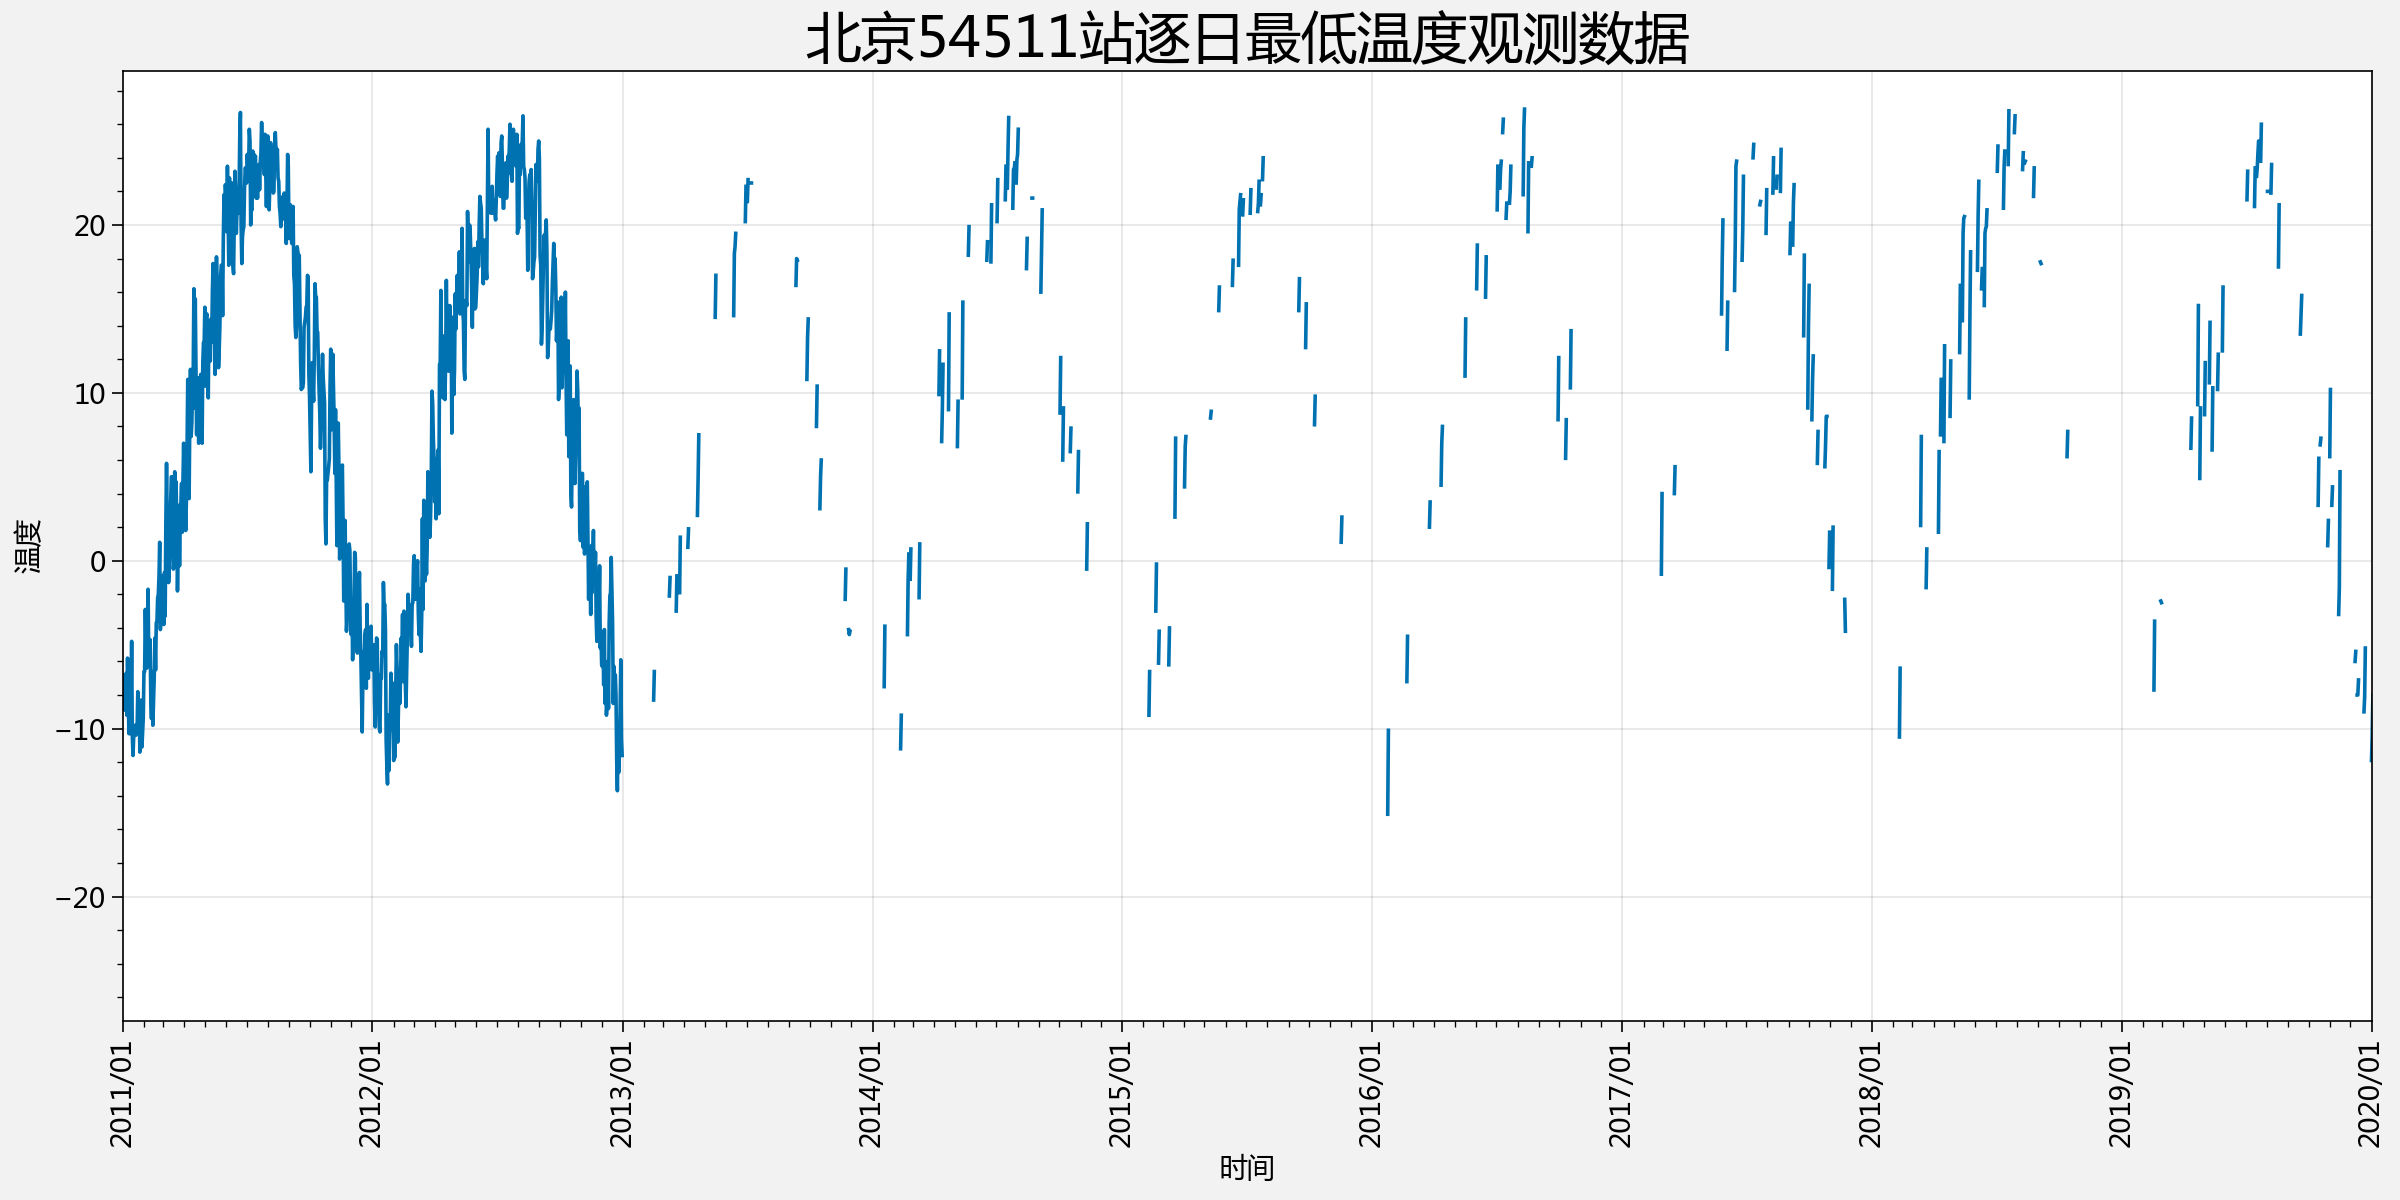

In [23]:
f, axs = plot.subplots(ncols=1, figsize=(12, 6))
axs[0].plot(obs_data_bj['TMIN'])
axs.format(title="北京54511站逐日最低温度观测数据", xlabel='时间', ylabel='温度',
           fontname='Microsoft YaHei', large=20, small=10,
           xlocator='year', xminorlocator='month', xformatter='%Y/%m',
           xlim=(np.datetime64('2011-01-01T00:00:00'), np.datetime64('2020-01-01T12:00:00')))